In [1]:
import numpy as np

def process_sequential(result_seq, num_samples=1, noise=0):
    odd_index = np.arange(1, len(result_seq), 2)
    even_index = np.arange(0, len(result_seq), 2)
    
    array_seq = result_seq[even_index]
    time_seq = result_seq[odd_index]
    # time_seq = time_seq - np.min(time_seq, axis=1).reshape(-1, 1)
    time_seq = np.mean(time_seq, axis=0) / 1000

    evaluation_time = np.max(np.random.rand(len(time_seq), num_samples) * noise / 10 + noise, axis=1)
    evaluation_time = np.add.accumulate(evaluation_time)
    time_seq += evaluation_time
    
    mean_seq = np.mean(array_seq, axis=0)
    std_seq = np.std(array_seq, axis=0)
    return mean_seq, std_seq, time_seq

In [115]:
def process_expensive(result_4cores, end_time, end_result, noise=0):
    odd_index = np.arange(1, len(result_4cores), 2)
    even_index = np.arange(0, len(result_4cores), 2)
    
    array_4cores = result_4cores[even_index]
    array_4cores = np.array(np.split(array_4cores, 3, axis=0))
    array_4cores = np.min(array_4cores, axis=1)
    
    time_4cores = result_4cores[odd_index]
    time_4cores = np.array(np.split(time_4cores, 3, axis=0))
    time_4cores = np.mean(time_4cores, axis=1)
    
    array_4cores = np.concatenate((array_4cores, end_result.reshape(-1, 1)), axis=1)
    time_4cores = np.concatenate((time_4cores, end_time.reshape(-1, 1)), axis=1)

    # time_4cores = time_4cores - np.min(time_4cores, axis=1).reshape(-1, 1)
    time_4cores = np.mean(time_4cores, axis=0) / 1000

    num_samples = 1
    evaluation_time = np.max(np.random.rand(len(time_4cores), num_samples) * noise / 10 + noise, axis=1)
    evaluation_time = np.add.accumulate(evaluation_time)
    time_4cores += evaluation_time

    mean = np.mean(array_4cores, axis=0)
    std = np.std(array_4cores, axis=0)
    return mean, std, time_4cores

In [2]:
# def process(result_4cores, end_time, end_result):
#     odd_index = np.arange(1, len(result_4cores), 2)
#     even_index = np.arange(0, len(result_4cores), 2)
    
#     array_4cores = result_4cores[even_index]
#     array_4cores = np.array(np.split(array_4cores, 3, axis=0))
#     array_4cores = np.min(array_4cores, axis=1)
    
#     time_4cores = result_4cores[odd_index]
#     time_4cores = np.array(np.split(time_4cores, 3, axis=0))
#     time_4cores = np.mean(time_4cores, axis=1)
    
#     array_4cores = np.concatenate((array_4cores, end_result.reshape(-1, 1)), axis=1)
#     time_4cores = np.concatenate((time_4cores, end_time.reshape(-1, 1)), axis=1)

#     # time_4cores = time_4cores - np.min(time_4cores, axis=1).reshape(-1, 1)
#     time_4cores = np.mean(time_4cores, axis=0) / 1000

#     mean = np.mean(array_4cores, axis=0)
#     std = np.std(array_4cores, axis=0)
#     return mean, std, time_4cores

In [3]:
import numpy as np
from matplotlib import pyplot as plt

result_4cores = np.array([
[16.007318670268738, 14.671757555443762, 14.671757555443762, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 10.448787387548014, 9.482909554796944, 9.482909554796944, 9.482909554796944, 9.482909554796944, 9.482909554796944, 9.482909554796944, 9.482909554796944, 8.415232167182799, 8.415232167182799, 8.415232167182799, 8.415232167182799, 8.415232167182799, 8.195301105484297, 8.195301105484297, 8.195301105484297, 8.195301105484297, 8.195301105484297, 6.50102407203449, 6.50102407203449, 6.18691636704391, 6.18691636704391, 6.18691636704391, 5.737967020268304, 5.737967020268304, 5.737967020268304, 5.737967020268304, 4.913608360911102, 4.913608360911102, 4.913608360911102, 4.913608360911102, 4.913608360911102, 4.913608360911102, 4.913608360911102, 3.4215836869315237, 3.4215836869315237, 3.4215836869315237, 3.4215836869315237, 3.4215836869315237, 3.4215836869315237, 3.4215836869315237, 3.4215836869315237, 3.4215836869315237, 3.4215836869315237, 3.4160149840300993, 3.4160149840300993, 3.4160149840300993, 3.4160149840300993, 3.4160149840300993, 3.4160149840300993, 3.1910567256774915, 3.1910567256774915, 3.1910567256774915, 3.1910567256774915, 2.649307182898785], 
[5277.962, 5278.008, 5278.043, 5278.075, 5278.107, 5278.137, 5278.168, 5278.198, 5278.228, 5278.258, 5278.287, 5278.317, 5278.347, 5278.377, 5278.407, 5278.436, 5278.466, 5278.496, 5278.526, 5278.556, 5278.585, 5278.615, 5278.644, 5278.673, 5278.703, 5278.733, 5278.762, 5278.792, 5278.823, 5278.853, 5278.883, 5278.911, 5278.941, 5278.97, 5278.999, 5279.029, 5279.067, 5279.098, 5279.13, 5279.168, 6082.159, 7264.02, 8235.401, 9408.442, 10421.907, 10917.408, 12459.233, 13646.077, 15157.433, 16352.81, 17791.769, 19303.707, 19722.014, 20017.654, 20287.379, 20801.461, 21057.567, 21797.094, 23818.564, 24557.886, 24909.191, 25901.919, 26423.78, 28015.548, 29892.822, 32424.323, 33639.839, 36456.261, 38732.544, 41025.719, 41341.948, 42031.309, 43980.765, 47373.511, 50648.071, 52631.899, 53125.368, 55729.616, 58009.611, 61724.546, 64605.425, 65033.857, 65415.502, 70571.375, 71361.934, 71802.109, 73684.128, 77518.435, 79880.658, 82871.259, 86105.4, 87305.032, 87500.444, 89226.534, 90194.691, 92812.104, 96665.768, 98726.085, 101311.582, 103490.778], 
[15.464995522578466, 11.899955016098586, 11.899955016098586, 11.899955016098586, 11.899955016098586, 11.899955016098586, 11.899955016098586, 11.899955016098586, 11.899955016098586, 10.623584157923396, 10.623584157923396, 10.623584157923396, 10.623584157923396, 10.623584157923396, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 9.660156372423952, 8.780294756459451, 8.780294756459451, 8.780294756459451, 8.780294756459451, 8.780294756459451, 8.780294756459451, 8.780294756459451, 8.780294756459451, 8.780294756459451, 8.780294756459451, 8.780294756459451, 7.861131809327697, 7.861131809327697, 7.861131809327697, 7.861131809327697, 7.861131809327697, 7.861131809327697, 5.9130378948667826, 5.9130378948667826, 5.9130378948667826, 5.9130378948667826, 5.9130378948667826, 5.9130378948667826, 5.9130378948667826, 5.9130378948667826, 5.9130378948667826, 4.861282063978731, 4.641663862662554, 4.383475055579062, 4.383475055579062, 4.383475055579062, 4.383475055579062, 4.255127420800708, 4.255127420800708, 4.255127420800708, 4.255127420800708, 4.255127420800708, 3.892559119064775, 3.892559119064775, 3.892559119064775, 3.892559119064775, 3.892559119064775, 3.892559119064775, 3.892559119064775, 3.892559119064775, 3.892559119064775, 3.892559119064775, 3.892559119064775, 3.108553366346588, 3.108553366346588, 3.108553366346588, 3.108553366346588],
[5318.162, 5318.212, 5318.249, 5318.282, 5318.315, 5318.347, 5318.379, 5318.41, 5318.441, 5318.472, 5318.504, 5318.535, 5318.566, 5318.597, 5318.628, 5318.661, 5318.692, 5318.723, 5318.754, 5318.786, 5318.817, 5318.848, 5318.879, 5318.91, 5318.942, 5318.974, 5319.005, 5319.037, 5319.083, 5319.116, 5319.147, 5319.178, 5319.21, 5319.24, 5319.272, 5319.302, 5319.333, 5319.363, 5319.393, 5319.539, 5965.463, 6926.728, 7962.446, 8566.332, 10084.049, 11275.861, 11937.189, 12618.319, 14341.199, 14908.583, 17092.398, 18417.935, 19799.293, 22089.036, 23016.988, 24006.09, 25306.933, 27156.799, 27843.454, 29060.648, 32261.924, 34072.219, 36245.855, 36490.193, 39318.059, 42297.597, 42628.035, 46972.384, 47614.55, 49502.217, 53814.927, 54665.879, 55004.666, 55536.85, 56370.247, 57849.43, 59522.32, 59900.153, 61520.999, 61865.915, 64497.314, 68818.427, 69409.213, 73591.485, 76817.268, 80687.626, 81059.655, 84313.208, 84809.567, 84970.286, 85462.668, 89488.171, 89934.769, 90889.587, 94945.456, 96136.677, 99627.265, 103036.71, 105440.715, 106745.836],
[13.855130324084026, 13.855130324084026, 13.46360683732965, 13.46360683732965, 13.46360683732965, 13.437688145712562, 13.437688145712562, 13.437688145712562, 13.437688145712562, 11.614343164332684, 11.614343164332684, 11.614343164332684, 11.614343164332684, 11.614343164332684, 11.614343164332684, 11.614343164332684, 11.614343164332684, 11.614343164332684, 11.614343164332684, 11.614343164332684, 11.614343164332684, 11.614343164332684, 11.614343164332684, 11.507462058857985, 11.507462058857985, 11.507462058857985, 11.507462058857985, 11.507462058857985, 11.507462058857985, 11.507462058857985, 11.507462058857985, 11.507462058857985, 11.507462058857985, 11.507462058857985, 11.507462058857985, 10.399560478039552, 10.399560478039552, 10.399560478039552, 10.399560478039552, 10.399560478039552, 10.399560478039552, 10.399560478039552, 10.399560478039552, 10.399560478039552, 10.399560478039552, 10.399560478039552, 10.399560478039552, 10.399560478039552, 10.399560478039552, 10.399560478039552, 10.399560478039552, 10.399560478039552, 9.65949280234786, 9.65949280234786, 9.65949280234786, 8.808840427371438, 8.808840427371438, 8.808840427371438, 8.808840427371438, 8.808840427371438, 7.089787846163924, 7.089787846163924, 7.089787846163924, 7.089787846163924, 7.077975907845863, 7.077975907845863, 7.077975907845863, 6.398894524276116, 6.398894524276116, 6.398894524276116, 6.398894524276116, 4.0554024313120784, 4.0554024313120784, 4.0554024313120784, 4.0554024313120784, 4.0554024313120784, 4.0554024313120784, 4.0554024313120784, 4.0554024313120784, 4.0554024313120784, 3.8946079419012247, 3.8946079419012247, 3.8946079419012247, 3.8946079419012247, 3.8946079419012247, 3.8946079419012247, 3.8946079419012247, 3.8946079419012247, 3.8946079419012247, 3.8946079419012247, 3.8946079419012247, 3.8946079419012247, 3.677648314499575, 3.677648314499575, 3.677648314499575, 3.677648314499575, 3.677648314499575, 3.677648314499575, 3.677648314499575, 3.6587807150831684],
[5248.924, 5248.976, 5249.01, 5249.043, 5249.075, 5249.108, 5249.138, 5249.169, 5249.199, 5249.23, 5249.259, 5249.289, 5249.319, 5249.349, 5249.379, 5249.408, 5249.438, 5249.469, 5249.5, 5249.529, 5249.558, 5249.588, 5249.617, 5249.647, 5249.677, 5249.708, 5249.737, 5249.766, 5249.796, 5249.825, 5249.855, 5249.885, 5249.914, 5249.945, 5249.975, 5250.004, 5250.034, 5250.174, 5250.207, 5250.237, 5823.15, 6576.756, 7676.731, 7834.937, 8461.154, 9323.593, 9729.288, 10525.052, 12385.395, 13742.077, 14892.234, 16320.382, 17636.979, 19037.752, 19246.527, 20615.392, 22110.965, 23796.354, 25863.035, 27507.04, 30341.307, 31215.8, 31547.435, 32085.524, 34184.395, 34933.787, 35954.488, 38368.251, 40048.13, 42976.525, 43318.895, 45264.936, 46613.705, 48448.995, 51812.348, 54793.874, 58640.501, 60145.237, 61130.79, 65837.007, 68130.937, 70592.908, 73509.568, 77009.859, 80058.832, 80228.68, 80745.616, 85696.935, 85852.991, 92809.652, 93353.848, 94441.576, 95883.229, 98005.329, 100580.955, 102151.955, 102669.192, 103637.901, 104725.396, 107029.553],
[14.631997782161502, 14.385535748831616, 14.385535748831616, 14.385535748831616, 14.385535748831616, 12.918307477084465, 12.918307477084465, 12.918307477084465, 12.918307477084465, 12.918307477084465, 12.918307477084465, 12.918307477084465, 12.918307477084465, 12.918307477084465, 12.918307477084465, 12.918307477084465, 12.918307477084465, 12.918307477084465, 12.918307477084465, 12.918307477084465, 12.918307477084465, 12.918307477084465, 12.918307477084465, 12.918307477084465, 12.918307477084465, 12.918307477084465, 12.208004797790293, 12.208004797790293, 11.429376245738506, 11.429376245738506, 11.429376245738506, 11.429376245738506, 11.429376245738506, 11.429376245738506, 11.429376245738506, 11.429376245738506, 11.429376245738506, 11.429376245738506, 11.429376245738506, 11.429376245738506, 11.429376245738506, 11.429376245738506, 11.429376245738506, 10.813003672887726, 10.813003672887726, 10.813003672887726, 9.718389031218459, 9.718389031218459, 8.700247126093096, 8.700247126093096, 7.387798665854653, 7.387798665854653, 7.387798665854653, 7.387798665854653, 7.387798665854653, 7.387798665854653, 7.387798665854653, 6.312996076745993, 6.312996076745993, 6.312996076745993, 6.312996076745993, 6.290562457999023, 6.290562457999023, 6.290562457999023, 4.774994357059956, 4.774994357059956, 4.774994357059956, 4.675886229245393, 4.675886229245393, 4.675886229245393, 4.675886229245393, 4.07126575050119, 4.07126575050119, 4.07126575050119, 4.07126575050119, 3.637657739563949, 3.637657739563949, 3.637657739563949, 3.637657739563949, 3.4249127125162464, 3.4249127125162464, 3.4249127125162464, 3.4249127125162464, 3.4249127125162464, 3.4249127125162464, 3.4249127125162464, 3.4249127125162464, 3.4249127125162464, 3.4249127125162464, 3.024080237562654, 3.024080237562654, 2.516588961335423, 2.516588961335423, 2.516588961335423, 2.516588961335423, 2.516588961335423, 2.516588961335423, 2.516588961335423, 2.516588961335423, 2.516588961335423],
[5224.562, 5224.61, 5224.658, 5224.692, 5224.726, 5224.759, 5224.792, 5224.825, 5224.867, 5224.9, 5224.932, 5224.983, 5225.013, 5225.043, 5225.073, 5225.103, 5225.133, 5225.164, 5225.194, 5225.224, 5225.253, 5225.283, 5225.313, 5225.343, 5225.373, 5225.403, 5225.433, 5225.463, 5225.493, 5225.523, 5225.552, 5225.582, 5225.612, 5225.642, 5225.671, 5225.701, 5225.731, 5225.765, 5225.89, 5225.924, 6199.694, 6771.382, 7391.479, 8295.775, 9405.385, 9746.558, 10928.12, 12364.095, 14128.388, 15656.597, 17340.235, 17876.226, 18211.387, 18630.552, 20999.272, 21551.393, 22777.85, 24861.965, 26940.341, 27218.284, 29007.263, 31140.047, 33449.016, 34336.056, 37316.024, 39834.554, 42558.391, 44914.442, 48174.945, 51463.137, 53972.802, 56319.264, 56871.456, 58507.71, 61698.847, 67395.6, 67566.043, 68301.237, 70670.394, 72966.882, 75804.459, 77723.923, 81501.629, 83849.331, 86211.845, 88825.317, 89178.815, 93193.193, 93360.418, 96728.336, 101161.92, 105118.821, 108673.634, 112002.013, 116208.61, 120608.418, 121568.316, 122349.087, 122680.066, 124428.178],
[14.023639661122456, 14.023639661122456, 14.023639661122456, 12.54600252815407, 12.54600252815407, 12.54600252815407, 12.54600252815407, 11.607024223157032, 11.607024223157032, 11.607024223157032, 11.607024223157032, 11.607024223157032, 11.607024223157032, 11.607024223157032, 11.607024223157032, 11.607024223157032, 11.607024223157032, 11.607024223157032, 10.542478006602298, 10.542478006602298, 10.542478006602298, 10.542478006602298, 10.542478006602298, 10.542478006602298, 10.542478006602298, 10.542478006602298, 10.542478006602298, 10.542478006602298, 10.542478006602298, 10.542478006602298, 10.542478006602298, 10.542478006602298, 10.542478006602298, 10.542478006602298, 10.542478006602298, 10.542478006602298, 10.542478006602298, 10.542478006602298, 10.542478006602298, 10.542478006602298, 9.683343406228003, 9.683343406228003, 9.683343406228003, 9.683343406228003, 9.683343406228003, 9.683343406228003, 9.129153461374047, 8.72008058960428, 8.72008058960428, 8.72008058960428, 8.72008058960428, 8.72008058960428, 8.72008058960428, 8.72008058960428, 8.72008058960428, 6.565688619153715, 6.565688619153715, 6.565688619153715, 6.565688619153715, 6.565688619153715, 6.565688619153715, 6.565688619153715, 6.565688619153715, 6.565688619153715, 6.17111776027507, 6.17111776027507, 5.9311125372066975, 5.9311125372066975, 5.9311125372066975, 5.9311125372066975, 5.755288133408083, 5.755288133408083, 5.6542638285137485, 5.6542638285137485, 5.6542638285137485, 5.1098631370350915, 5.1098631370350915, 5.1098631370350915, 5.1098631370350915, 5.1098631370350915, 5.1098631370350915, 4.787662750751174, 4.787662750751174, 4.787662750751174, 4.587984552146171, 4.587984552146171, 4.554265149523765, 4.554265149523765, 4.554265149523765, 4.396519191142012, 4.396519191142012, 4.396519191142012, 4.396519191142012, 4.396519191142012, 4.396519191142012, 3.3364162878826353, 3.3364162878826353, 3.3364162878826353, 3.3364162878826353, 3.3364162878826353],
[5522.146, 5522.2, 5522.239, 5522.277, 5522.314, 5522.354, 5522.391, 5522.426, 5522.461, 5522.497, 5522.549, 5522.585, 5522.62, 5522.657, 5522.694, 5522.73, 5522.766, 5522.803, 5522.839, 5522.875, 5522.912, 5522.948, 5522.983, 5523.019, 5523.054, 5523.091, 5523.126, 5523.161, 5523.197, 5523.232, 5523.269, 5523.311, 5523.366, 5523.415, 5523.453, 5523.489, 5523.525, 5523.575, 5523.614, 5523.773, 6063.031, 7441.154, 8132.491, 8732.215, 8900.369, 10053.626, 11124.953, 13335.167, 13838.45, 14441.707, 16217.787, 16869.785, 19327.27, 20140.941, 21572.985, 23025.776, 23603.459, 26574.916, 27128.097, 27849.775, 28726.448, 29743.016, 30872.385, 31418.753, 33875.753, 36306.785, 38191.185, 40087.491, 41072.984, 44365.393, 45887.232, 46245.449, 49750.786, 52078.471, 52579.918, 57508.201, 58385.582, 62226.454, 63431.367, 64338.03, 65804.989, 70341.645, 73636.579, 75094.642, 76394.989, 78104.672, 80902.679, 82608.512, 85259.714, 87514.499, 90693.362, 94790.718, 99964.864, 101180.642, 102133.85, 106617.046, 111204.451, 112259.985, 113802.692, 114912.672],
[13.948246048776982, 13.855551460493476, 13.855551460493476, 13.754430274561095, 13.754430274561095, 13.754430274561095, 13.754430274561095, 13.754430274561095, 13.754430274561095, 13.754430274561095, 13.13036096136293, 13.097358132798703, 13.097358132798703, 13.097358132798703, 13.097358132798703, 13.097358132798703, 13.097358132798703, 13.097358132798703, 13.097358132798703, 9.244278172823885, 9.244278172823885, 9.244278172823885, 9.244278172823885, 9.244278172823885, 9.244278172823885, 9.244278172823885, 9.244278172823885, 9.244278172823885, 9.244278172823885, 9.244278172823885, 9.244278172823885, 9.244278172823885, 9.244278172823885, 9.244278172823885, 9.244278172823885, 9.244278172823885, 9.244278172823885, 9.244278172823885, 9.244278172823885, 9.244278172823885, 9.244278172823885, 9.244278172823885, 9.244278172823885, 9.133246104759362, 9.133246104759362, 9.133246104759362, 9.133246104759362, 9.133246104759362, 9.133246104759362, 9.133246104759362, 9.133246104759362, 8.57960518312285, 8.57960518312285, 8.57960518312285, 7.962252585592953, 6.795301674089824, 6.795301674089824, 6.795301674089824, 6.795301674089824, 6.795301674089824, 6.795301674089824, 6.795301674089824, 6.795301674089824, 6.795301674089824, 5.7892791369437795, 5.7892791369437795, 5.7892791369437795, 5.7892791369437795, 5.7892791369437795, 5.2174913005519805, 5.216363683947314, 5.216363683947314, 5.216363683947314, 5.216363683947314, 5.159776064053069, 5.159776064053069, 5.159776064053069, 5.159776064053069, 5.159776064053069, 5.159776064053069, 5.159776064053069, 5.159776064053069, 5.159776064053069, 4.07581331275227, 4.07581331275227, 4.07581331275227, 4.07581331275227, 4.07581331275227, 4.07581331275227, 3.579758673681074, 3.579758673681074, 3.579758673681074, 3.579758673681074, 3.579758673681074, 3.579758673681074, 3.579758673681074, 3.579758673681074, 3.579758673681074, 3.5114898479623915, 3.318440018876036],
[5658.491, 5658.545, 5658.587, 5658.625, 5658.663, 5658.701, 5658.737, 5658.774, 5658.811, 5658.852, 5658.89, 5658.926, 5658.963, 5658.999, 5659.036, 5659.073, 5659.109, 5659.147, 5659.182, 5659.219, 5659.255, 5659.29, 5659.325, 5659.361, 5659.397, 5659.433, 5659.469, 5659.505, 5659.541, 5659.592, 5659.629, 5659.666, 5659.716, 5659.753, 5659.79, 5659.826, 5659.863, 5660.01, 5660.05, 5660.092, 7105.8, 8287.9, 8937.302, 10297.702, 11360.354, 12421.532, 13776.904, 15673.461, 16246.74, 16693.118, 17301.477, 20038.374, 20861.327, 22626.705, 24662.66, 26851.259, 28806.581, 29130.154, 29683.16, 30257.64, 30560.935, 32392.022, 34233.408, 35631.86, 37427.465, 39721.469, 42388.873, 44893.57, 48136.927, 49544.17, 51958.773, 52392.961, 53484.052, 57383.809, 60955.776, 62163.322, 64847.861, 65291.633, 66056.057, 69048.745, 70289.322, 71420.46, 74642.912, 77738.362, 79569.868, 82296.322, 87988.993, 91165.374, 95226.274, 99332.21, 102826.166, 107155.409, 107380.807, 108814.629, 111666.453, 113458.867, 113981.146, 115473.444, 120273.202, 123069.332],
[15.35303542004441, 14.5512680481928, 14.5512680481928, 14.26778176905926, 14.26778176905926, 12.966162069775772, 11.867375487049967, 11.867375487049967, 11.867375487049967, 11.867375487049967, 11.867375487049967, 11.867375487049967, 11.867375487049967, 11.867375487049967, 11.867375487049967, 11.867375487049967, 11.867375487049967, 11.867375487049967, 11.867375487049967, 11.867375487049967, 11.867375487049967, 11.867375487049967, 11.867375487049967, 11.867375487049967, 11.867375487049967, 11.867375487049967, 11.867375487049967, 11.867375487049967, 11.867375487049967, 11.867375487049967, 11.867375487049967, 11.867375487049967, 11.867375487049967, 11.867375487049967, 10.318698326637119, 10.318698326637119, 10.318698326637119, 10.318698326637119, 10.318698326637119, 10.318698326637119, 10.318698326637119, 10.318698326637119, 10.318698326637119, 10.318698326637119, 10.318698326637119, 10.318698326637119, 9.698309889246055, 8.94811452327317, 8.94811452327317, 7.414030306381374, 7.414030306381374, 7.414030306381374, 7.414030306381374, 6.098722713730265, 6.098722713730265, 6.098722713730265, 6.098722713730265, 5.610079484267949, 5.610079484267949, 5.610079484267949, 5.610079484267949, 5.610079484267949, 5.610079484267949, 5.610079484267949, 4.547447748477325, 4.547447748477325, 4.547447748477325, 4.547447748477325, 4.547447748477325, 4.547447748477325, 3.931395715583147, 3.931395715583147, 3.931395715583147, 3.931395715583147, 3.931395715583147, 3.931395715583147, 3.931395715583147, 3.931395715583147, 3.931395715583147, 3.661397260970642, 3.661397260970642, 3.661397260970642, 3.661397260970642, 3.661397260970642, 3.661397260970642, 3.661397260970642, 3.661397260970642, 3.661397260970642, 3.661397260970642, 3.661397260970642, 3.661397260970642, 3.661397260970642, 3.661397260970642, 3.661397260970642, 3.661397260970642, 3.525929599744757, 3.525929599744757, 3.525929599744757, 3.2847271850314432, 3.2847271850314432],
[5521.145, 5521.2, 5521.243, 5521.282, 5521.321, 5521.366, 5521.404, 5521.441, 5521.479, 5521.516, 5521.57, 5521.606, 5521.642, 5521.679, 5521.721, 5521.757, 5521.793, 5521.829, 5521.865, 5521.9, 5521.936, 5521.971, 5522.006, 5522.042, 5522.077, 5522.113, 5522.148, 5522.183, 5522.218, 5522.254, 5522.289, 5522.324, 5522.365, 5522.401, 5522.437, 5522.473, 5522.525, 5522.69, 5522.731, 5522.777, 6455.207, 8123.795, 8936.087, 10200.611, 10553.03, 11410.338, 12960.215, 13622.269, 15051.692, 16205.158, 17687.343, 18675.886, 20002.761, 22491.7, 22944.245, 26145.957, 26415.33, 28651.844, 32494.808, 33181.295, 33496.1, 35681.178, 36893.178, 38619.636, 41187.372, 43953.641, 46695.336, 47720.56, 48287.697, 51278.475, 54057.737, 54456.831, 55562.352, 59494.403, 61342.161, 61736.887, 65832.747, 71068.377, 71550.24, 73717.681, 73904.266, 77716.031, 81175.494, 81348.886, 86170.661, 86830.247, 88816.204, 91988.568, 94277.545, 101294.809, 101475.621, 103219.398, 105548.858, 108007.075, 108892.808, 113359.077, 113557.981, 115612.294, 124834.706, 126364.588],
[11.36433272175124, 11.36433272175124, 11.36433272175124, 11.36433272175124, 11.36433272175124, 11.36433272175124, 11.36433272175124, 11.36433272175124, 11.36433272175124, 11.36433272175124, 11.36433272175124, 11.36433272175124, 11.36433272175124, 11.36433272175124, 11.36433272175124, 11.36433272175124, 10.298047742067007, 10.298047742067007, 10.298047742067007, 10.298047742067007, 10.298047742067007, 10.298047742067007, 10.298047742067007, 10.298047742067007, 10.298047742067007, 10.298047742067007, 10.298047742067007, 10.298047742067007, 10.298047742067007, 10.298047742067007, 10.298047742067007, 10.298047742067007, 10.298047742067007, 10.298047742067007, 10.298047742067007, 10.298047742067007, 10.298047742067007, 10.298047742067007, 10.298047742067007, 10.298047742067007, 10.220068598350046, 10.220068598350046, 10.155261763977505, 9.305927750545285, 9.305927750545285, 9.305927750545285, 9.305927750545285, 9.305927750545285, 9.305927750545285, 9.305927750545285, 9.305927750545285, 7.9914691587758515, 7.9914691587758515, 7.9914691587758515, 7.9914691587758515, 7.152226813646363, 7.152226813646363, 7.152226813646363, 7.152226813646363, 6.86768395581861, 6.301386142000137, 6.301386142000137, 6.301386142000137, 6.301386142000137, 6.301386142000137, 5.608258240496369, 5.608258240496369, 5.608258240496369, 5.569368370939525, 5.280021901040769, 5.280021901040769, 5.280021901040769, 5.280021901040769, 4.346126878313608, 4.346126878313608, 4.346126878313608, 4.346126878313608, 4.346126878313608, 4.346126878313608, 4.346126878313608, 4.346126878313608, 3.693225769354225, 3.693225769354225, 3.693225769354225, 3.693225769354225, 3.0261754635826823, 3.0261754635826823, 3.0261754635826823, 3.0261754635826823, 3.0261754635826823, 2.8850132108694813, 2.8850132108694813, 2.8850132108694813, 2.8850132108694813, 2.6003936845980715, 2.6003936845980715, 2.6003936845980715, 2.6003936845980715, 2.6003936845980715, 2.6003936845980715],
[5618.703, 5618.757, 5618.799, 5618.843, 5618.882, 5618.921, 5618.958, 5618.995, 5619.031, 5619.068, 5619.106, 5619.142, 5619.179, 5619.215, 5619.251, 5619.287, 5619.324, 5619.361, 5619.396, 5619.432, 5619.473, 5619.509, 5619.545, 5619.594, 5619.632, 5619.669, 5619.705, 5619.741, 5619.776, 5619.812, 5619.848, 5619.883, 5619.922, 5619.96, 5619.996, 5620.032, 5620.068, 5620.103, 5620.139, 5620.174, 6724.801, 7108.385, 8147.357, 9597.149, 11023.318, 12262.523, 12950.5, 14265.101, 15010.297, 16462.858, 17221.325, 18398.552, 20048.084, 21913.795, 23465.843, 24675.107, 26497.318, 28202.154, 30187.19, 31408.25, 33874.543, 34167.194, 36123.165, 38429.781, 39754.572, 42965.411, 46065.821, 48641.646, 51266.672, 52844.016, 53207.429, 55566.261, 55847.054, 59044.213, 62223.895, 62697.276, 66665.27, 66990.182, 69237.719, 70641.903, 74338.955, 78330.75, 79808.678, 83462.916, 83661.829, 87500.336, 91114.544, 91656.413, 93300.907, 96953.097, 99146.044, 101358.061, 104479.714, 106924.513, 110602.119, 112584.899, 117924.377, 122426.586, 126472.652, 131917.236],
[13.724280141488705, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 10.305555381070464, 9.729837303455918, 9.729837303455918, 9.729837303455918, 9.626031762419315, 9.626031762419315, 9.626031762419315, 9.626031762419315, 9.04805003849358, 9.04805003849358, 8.569500784623342, 8.569500784623342, 8.569500784623342, 8.569500784623342, 7.9239121028261295, 7.9239121028261295, 7.9239121028261295, 7.9239121028261295, 7.181676354308657, 7.181676354308657, 7.181676354308657, 7.17025083182647, 7.17025083182647, 7.17025083182647, 7.17025083182647, 7.17025083182647, 7.17025083182647, 7.17025083182647, 7.17025083182647, 7.092822217285898, 7.092822217285898, 7.092822217285898, 7.092822217285898, 6.889039376998506, 6.889039376998506, 6.65437296899945, 6.426631030641488, 6.426631030641488, 5.805163260870373, 5.805163260870373, 4.527906878790045, 4.527906878790045, 4.527906878790045, 4.527906878790045, 4.527906878790045, 4.527906878790045],
[5566.858, 5566.928, 5566.972, 5567.012, 5567.052, 5567.091, 5567.128, 5567.165, 5567.202, 5567.24, 5567.277, 5567.313, 5567.351, 5567.411, 5567.464, 5567.504, 5567.542, 5567.58, 5567.635, 5567.673, 5567.711, 5567.749, 5567.787, 5567.824, 5567.863, 5567.901, 5567.938, 5567.975, 5568.013, 5568.05, 5568.106, 5568.147, 5568.19, 5568.229, 5568.267, 5568.305, 5568.342, 5568.38, 5568.418, 5568.473, 6357.198, 8115.919, 8780.779, 9355.555, 10771.509, 11253.215, 12756.491, 14211.29, 14981.623, 16205.253, 17818.32, 19565.83, 21296.435, 23051.183, 23932.223, 25604.367, 26039.559, 26964.757, 28613.64, 29229.286, 30254.13, 30555.409, 32409.07, 33354.127, 35404.614, 38566.022, 39203.779, 40626.891, 42864.055, 44680.935, 47335.984, 50739.016, 52435.877, 52972.912, 55540.783, 58306.658, 59938.274, 60297.893, 60754.545, 63019.079, 64999.383, 66205.993, 66685.163, 67673.482, 68601.702, 70673.625, 73616.915, 75409.153, 76520.871, 77365.623, 79912.803, 81560.704, 82568.961, 85113.137, 88613.221, 90550.204, 92690.807, 95242.165, 97032.637, 101323.729],
[15.279587998382612, 14.531941805797953, 13.662425061277101, 13.662425061277101, 13.662425061277101, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.758022181604607, 11.587852727551926, 11.239534930674976, 9.81925951688242, 9.81925951688242, 9.81925951688242, 8.936902423774129, 8.936902423774129, 8.532721904303912, 8.532721904303912, 8.532721904303912, 8.532721904303912, 8.532721904303912, 8.532721904303912, 8.532721904303912, 8.532721904303912, 8.532721904303912, 8.532721904303912, 8.532721904303912, 8.532721904303912, 8.532721904303912, 8.532721904303912, 7.634122540145363, 7.634122540145363, 7.634122540145363, 7.081949966161062, 7.081949966161062, 7.081949966161062, 7.081949966161062, 7.081949966161062, 7.081949966161062, 5.932315566063174, 5.932315566063174, 5.932315566063174, 5.932315566063174, 5.932315566063174, 5.932315566063174, 4.451957323058032, 4.451957323058032, 4.451957323058032, 4.451957323058032, 4.451957323058032, 4.451957323058032, 4.451957323058032, 4.451957323058032, 4.451957323058032, 3.838059023098968, 3.838059023098968, 3.838059023098968, 3.838059023098968, 3.838059023098968, 3.838059023098968, 2.90016816986962, 2.90016816986962, 2.90016816986962, 2.90016816986962, 2.90016816986962, 2.90016816986962],
[5599.995, 5600.063, 5600.109, 5600.151, 5600.192, 5600.233, 5600.273, 5600.313, 5600.353, 5600.392, 5600.432, 5600.472, 5600.511, 5600.55, 5600.619, 5600.667, 5600.707, 5600.746, 5600.785, 5600.824, 5600.863, 5600.901, 5600.94, 5600.978, 5601.017, 5601.055, 5601.093, 5601.133, 5601.171, 5601.209, 5601.247, 5601.285, 5601.324, 5601.362, 5601.4, 5601.438, 5601.476, 5601.515, 5601.553, 5601.731, 6475.896, 7165.644, 7478.661, 8768.91, 9575.978, 10471.744, 12017.198, 12482.143, 13346.158, 14930.65, 16663.491, 18503.04, 20688.766, 20995.845, 21256.645, 22178.548, 22769.072, 23092.68, 25620.146, 26459.297, 26785.031, 27411.929, 28680.419, 29231.281, 31502.39, 34519.119, 36123.868, 38351.073, 38960.269, 41780.549, 43134.153, 44065.336, 45510.495, 48638.658, 49837.891, 52536.325, 52982.589, 54183.754, 55875.915, 59527.444, 60811.778, 63274.567, 67632.14, 69039.188, 70623.946, 73408.937, 76891.453, 80503.552, 83219.446, 87469.861, 91430.563, 92911.495, 94833.351, 99771.866, 104779.127, 105734.159, 106309.754, 106779.789, 109666.889, 111370.032],
[16.237590664046476, 15.260733778093003, 13.906773853032242, 13.211192038045995, 10.93963813776789, 10.93963813776789, 10.93963813776789, 10.93963813776789, 10.93963813776789, 10.93963813776789, 10.93963813776789, 10.93963813776789, 10.93963813776789, 10.93963813776789, 10.93963813776789, 10.604318006920012, 10.604318006920012, 10.604318006920012, 10.604318006920012, 10.604318006920012, 10.604318006920012, 10.604318006920012, 10.604318006920012, 10.604318006920012, 10.604318006920012, 10.604318006920012, 10.604318006920012, 10.604318006920012, 10.604318006920012, 10.604318006920012, 10.604318006920012, 10.604318006920012, 10.604318006920012, 10.604318006920012, 10.604318006920012, 10.604318006920012, 10.604318006920012, 10.604318006920012, 10.604318006920012, 10.604318006920012, 10.604318006920012, 10.604318006920012, 10.604318006920012, 10.604318006920012, 10.604318006920012, 8.984534095321301, 8.984534095321301, 8.984534095321301, 8.984534095321301, 8.984534095321301, 8.984534095321301, 8.984534095321301, 8.984534095321301, 7.961150441081378, 7.961150441081378, 7.961150441081378, 7.961150441081378, 7.961150441081378, 7.961150441081378, 7.961150441081378, 7.961150441081378, 6.6365554310416535, 6.6365554310416535, 6.6365554310416535, 6.6365554310416535, 6.6365554310416535, 6.6365554310416535, 6.591497319918155, 6.591497319918155, 6.591497319918155, 6.262744275274674, 5.6846192118756775, 5.6846192118756775, 5.6846192118756775, 5.6846192118756775, 5.6846192118756775, 5.6846192118756775, 5.6846192118756775, 5.6846192118756775, 5.551884193704197, 5.551884193704197, 4.870846131380901, 4.870846131380901, 4.870846131380901, 4.0114536615972725, 4.0114536615972725, 4.0114536615972725, 4.0114536615972725, 4.0114536615972725, 4.0114536615972725, 4.0114536615972725, 4.0114536615972725, 3.801358499916756, 3.801358499916756, 3.801358499916756, 3.801358499916756, 3.1955481726996315, 3.1955481726996315, 3.1955481726996315, 3.1955481726996315],
[5543.023, 5543.076, 5543.117, 5543.156, 5543.194, 5543.231, 5543.268, 5543.304, 5543.34, 5543.381, 5543.419, 5543.455, 5543.49, 5543.525, 5543.581, 5543.618, 5543.655, 5543.692, 5543.728, 5543.764, 5543.8, 5543.837, 5543.873, 5543.909, 5543.946, 5543.982, 5544.018, 5544.055, 5544.092, 5544.128, 5544.164, 5544.201, 5544.238, 5544.275, 5544.312, 5544.348, 5544.384, 5544.543, 5544.59, 5544.641, 6997.061, 8304.785, 9509.91, 10409.816, 10710.306, 11778.118, 14073.721, 14463.908, 16583.657, 18287.346, 20624.184, 22804.42, 24624.342, 26439.047, 28697.268, 29622.361, 30546.365, 32379.972, 35875.668, 38090.373, 40622.231, 43250.726, 43888.139, 44261.902, 46169.74, 48210.513, 50420.468, 53315.068, 54168.117, 54517.498, 57094.259, 59291.334, 61480.662, 62181.744, 63623.756, 64046.29, 68004.378, 69181.964, 70004.732, 73622.219, 73790.403, 77866.075, 78940.403, 79456.795, 83885.322, 88057.536, 91812.263, 94445.998, 95895.052, 96484.428, 101712.425, 102795.971, 106148.361, 110717.689, 114514.492, 114680.449, 116526.194, 122071.615, 125027.603, 126232.376],
[13.42963204601638, 13.42963204601638, 13.42963204601638, 11.769352960165737, 11.769352960165737, 11.769352960165737, 11.769352960165737, 11.769352960165737, 11.769352960165737, 11.769352960165737, 11.769352960165737, 11.769352960165737, 11.769352960165737, 11.769352960165737, 11.41769812202675, 11.41769812202675, 11.41769812202675, 10.213796569870917, 10.213796569870917, 10.213796569870917, 10.213796569870917, 10.213796569870917, 10.213796569870917, 10.213796569870917, 10.213796569870917, 10.213796569870917, 10.213796569870917, 10.213796569870917, 10.213796569870917, 10.213796569870917, 10.213796569870917, 10.213796569870917, 10.213796569870917, 10.213796569870917, 10.213796569870917, 10.213796569870917, 10.213796569870917, 10.213796569870917, 10.213796569870917, 10.213796569870917, 10.213796569870917, 10.213796569870917, 10.213796569870917, 10.213796569870917, 10.213796569870917, 9.410344727101238, 9.410344727101238, 9.410344727101238, 9.410344727101238, 8.426433716544398, 8.426433716544398, 8.426433716544398, 8.426433716544398, 8.426433716544398, 8.426433716544398, 8.061507429921512, 8.061507429921512, 5.710334650440771, 5.710334650440771, 5.710334650440771, 5.710334650440771, 5.143945301933684, 5.143945301933684, 5.143945301933684, 5.04710866092848, 4.416327697034273, 4.029262245381791, 4.029262245381791, 4.029262245381791, 4.029262245381791, 4.029262245381791, 3.462607560682447, 3.462607560682447, 3.462607560682447, 3.320751573420314, 3.320751573420314, 3.320751573420314, 3.246559170829418, 3.246559170829418, 3.246559170829418, 3.246559170829418, 3.246559170829418, 3.246559170829418, 3.246559170829418, 3.246559170829418, 3.246559170829418, 3.246559170829418, 3.246559170829418, 3.246559170829418, 3.241806408654949, 3.241806408654949, 3.241806408654949, 3.241806408654949, 3.241806408654949, 3.241806408654949, 3.241806408654949, 3.241806408654949, 3.241806408654949, 3.241806408654949, 3.241806408654949],
[5680.806, 5680.873, 5680.922, 5680.967, 5681.011, 5681.053, 5681.096, 5681.138, 5681.18, 5681.222, 5681.265, 5681.307, 5681.348, 5681.39, 5681.449, 5681.49, 5681.53, 5681.571, 5681.611, 5681.65, 5681.708, 5681.75, 5681.79, 5681.83, 5681.87, 5681.911, 5681.951, 5681.99, 5682.031, 5682.071, 5682.112, 5682.152, 5682.193, 5682.233, 5682.274, 5682.315, 5682.355, 5682.396, 5682.435, 5682.611, 7109.235, 7979.181, 8629.714, 9781.414, 10738.211, 12078.448, 12973.554, 13758.37, 15046.984, 16383.757, 17293.208, 18369.011, 18731.655, 20626.755, 20909.551, 23116.972, 24312.452, 25363.694, 27485.514, 29185.778, 31287.637, 33535.922, 36095.056, 39151.361, 41779.287, 44921.929, 47273.388, 51196.635, 54561.467, 56071.58, 58063.983, 61786.712, 64011.312, 66938.867, 70627.474, 74316.684, 75839.998, 79357.884, 79824.873, 82387.972, 85614.658, 86025.511, 87897.647, 89396.756, 93609.674, 94506.398, 95515.941, 96527.745, 99891.682, 101538.486, 102843.472, 104253.941, 106846.326, 110075.597, 112401.347, 119245.023, 121529.573, 124016.986, 124692.951, 126475.737],
])

end_time_4 = np.array([128344.915, 136763.136, 139166.593])
end_result_4 = np.array([2.516588961335423, 2.6003936845980715, 2.1363228030977877])

In [4]:
import numpy as np
from matplotlib import pyplot as plt

result_8cores = np.array([
[16.56831776981787, 15.481050660074814, 13.891651517719476, 13.891651517719476, 13.891651517719476, 13.759680466655352, 13.759680466655352, 13.759680466655352, 12.502350353119395, 10.975590109362624, 10.975590109362624, 10.975590109362624, 10.975590109362624, 10.975590109362624, 10.975590109362624, 10.975590109362624, 10.975590109362624, 10.975590109362624, 10.975590109362624, 10.975590109362624, 10.975590109362624, 10.975590109362624, 10.975590109362624, 10.975590109362624, 10.975590109362624, 10.975590109362624, 10.975590109362624, 10.975590109362624, 10.975590109362624, 10.975590109362624, 10.975590109362624, 10.975590109362624, 10.975590109362624, 10.975590109362624, 10.975590109362624, 10.975590109362624, 10.975590109362624, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598, 10.906894287916598],
[6125.398, 6125.463, 6125.508, 6125.55, 6125.591, 6125.632, 6125.672, 6125.712, 6125.751, 6125.791, 6125.831, 6125.869, 6125.908, 6125.947, 6125.985, 6126.023, 6126.062, 6126.1, 6126.139, 6126.177, 6126.216, 6126.255, 6126.294, 6126.332, 6126.372, 6126.411, 6126.449, 6126.487, 6126.525, 6126.564, 6126.603, 6126.642, 6126.68, 6126.736, 6126.776, 6126.816, 6126.854, 6127.039, 6127.089, 6127.13, 7069.068, 8380.558, 9336.048, 10533.674, 10715.615, 10944.974, 11972.271, 12594.394, 13225.358, 14195.986, 15842.937, 16808.761, 17073.555, 18111.368, 19630.345, 21259.674, 23400.673, 25932.85, 27148.848, 27467.367, 28161.364, 30098.096, 31421.091, 32881.234, 34218.098, 36121.33, 37472.492, 38535.407, 40497.413, 43743.154, 45500.608, 46527.984, 48073.3, 49607.644, 51139.732, 53137.185, 56250.677, 58114.677, 58989.447, 59772.572, 60614.293, 63217.27, 65698.493, 68084.201, 68532.739, 69363.35, 69785.571, 72603.265, 73126.864, 73954.603, 74853.792, 75690.076, 77024.561, 77807.711, 80382.963, 82968.856, 83531.038, 84519.8, 87459.458, 89224.941],
[13.226620321583061, 13.226620321583061, 13.226620321583061, 13.226620321583061, 13.226620321583061, 13.226620321583061, 13.226620321583061, 13.226620321583061, 13.226620321583061, 13.226620321583061, 13.226620321583061, 13.226620321583061, 13.226620321583061, 13.226620321583061, 13.103557955233088, 13.103557955233088, 13.103557955233088, 13.103557955233088, 13.103557955233088, 13.103557955233088, 12.375299888842461, 12.375299888842461, 12.307593044389607, 12.307593044389607, 11.961043584115572, 11.961043584115572, 11.961043584115572, 11.961043584115572, 11.961043584115572, 11.961043584115572, 11.81787629019077, 11.81787629019077, 11.81787629019077, 11.81787629019077, 11.81787629019077, 11.81787629019077, 11.81787629019077, 11.81787629019077, 11.81787629019077, 11.81787629019077, 11.81787629019077, 10.985606745669704, 10.985606745669704, 10.43751010458757, 10.347875017322073, 9.8381137871894, 9.8381137871894, 9.8381137871894, 9.8381137871894, 9.8381137871894, 9.8381137871894, 9.8381137871894, 9.8381137871894, 9.81623577287686, 9.81623577287686, 9.81623577287686, 9.81623577287686, 9.210393672028756, 9.210393672028756, 8.95755420794086, 8.767585335515276, 8.767585335515276, 8.767585335515276, 7.016940675976263, 5.170504176594058, 5.170504176594058, 5.170504176594058, 3.8700931698591146, 3.8700931698591146, 3.8700931698591146, 3.8700931698591146, 3.5921746510280923, 3.5921746510280923, 3.5921746510280923, 3.5921746510280923, 3.5921746510280923, 3.5921746510280923, 3.5921746510280923, 3.5921746510280923, 2.8466295096518093, 2.8466295096518093, 2.8466295096518093, 2.8466295096518093, 2.8466295096518093, 2.8466295096518093, 2.8466295096518093, 2.8466295096518093, 2.8466295096518093, 2.8466295096518093, 2.8466295096518093, 2.8466295096518093, 2.8466295096518093, 2.8466295096518093, 2.8466295096518093, 2.8466295096518093, 2.8466295096518093, 2.8466295096518093, 2.8466295096518093, 2.840424698971266, 2.840424698971266],
[6102.778, 6102.837, 6102.881, 6102.92, 6102.959, 6102.997, 6103.036, 6103.073, 6103.111, 6103.149, 6103.188, 6103.225, 6103.264, 6103.301, 6103.344, 6103.382, 6103.419, 6103.457, 6103.495, 6103.532, 6103.569, 6103.607, 6103.644, 6103.682, 6103.738, 6103.777, 6103.816, 6103.856, 6103.894, 6103.933, 6103.972, 6104.012, 6104.051, 6104.091, 6104.129, 6104.168, 6104.207, 6104.377, 6104.425, 6104.465, 6675.361, 7955.356, 8558.139, 9899.701, 11274.324, 12195.462, 12876.769, 13293.929, 14482.046, 15186.036, 17524.173, 19196.886, 20305.42, 21707.403, 22212.086, 23502.488, 24509.063, 26476.063, 26795.677, 28201.558, 30822.496, 32520.78, 35768.277, 38007.345, 40135.555, 41029.826, 43249.379, 44676.847, 46561.412, 48427.117, 50112.473, 52798.808, 54779.01, 57838.315, 60836.605, 63872.464, 68076.772, 72307.495, 75454.766, 78585.003, 84280.573, 84534.343, 88316.945, 89761.852, 90950.717, 95953.056, 96166.062, 97904.106, 99193.957, 104928.157, 105332.911, 105579.58, 107330.883, 108998.357, 111244.199, 113637.679, 114305.806, 118102.637, 122496.558, 125808.179],
[14.522689909919125, 14.522689909919125, 13.34924237140963, 13.34924237140963, 13.34924237140963, 13.34924237140963, 13.34924237140963, 13.34924237140963, 13.123479035551702, 13.123479035551702, 11.765641896444206, 11.765641896444206, 11.765641896444206, 11.765641896444206, 11.765641896444206, 11.765641896444206, 11.765641896444206, 11.765641896444206, 11.765641896444206, 11.765641896444206, 11.765641896444206, 11.347475084733073, 11.347475084733073, 11.347475084733073, 11.347475084733073, 11.347475084733073, 11.347475084733073, 11.347475084733073, 11.347475084733073, 11.347475084733073, 11.347475084733073, 11.347475084733073, 11.347475084733073, 11.347475084733073, 11.347475084733073, 11.347475084733073, 11.347475084733073, 11.347475084733073, 11.347475084733073, 11.347475084733073, 10.683038872984424, 10.683038872984424, 10.683038872984424, 10.683038872984424, 10.121232410508286, 10.121232410508286, 10.121232410508286, 10.121232410508286, 10.121232410508286, 10.121232410508286, 10.121232410508286, 10.121232410508286, 10.121232410508286, 9.335947375263745, 9.335947375263745, 9.335947375263745, 9.335947375263745, 9.335947375263745, 9.335947375263745, 9.305815543263865, 9.305815543263865, 9.305815543263865, 9.305815543263865, 9.305815543263865, 9.305815543263865, 8.624247447530061, 8.624247447530061, 8.624247447530061, 7.1582809388405995, 7.1582809388405995, 5.973272021903149, 5.973272021903149, 5.973272021903149, 5.973272021903149, 5.7097362613437355, 5.7097362613437355, 5.7097362613437355, 5.7097362613437355, 5.7097362613437355, 5.7097362613437355, 5.7097362613437355, 5.7097362613437355, 5.7097362613437355, 5.117037693341025, 5.117037693341025, 5.117037693341025, 4.800492159317034, 4.800492159317034, 4.033777769263775, 3.9078503036928827, 3.5264641064806495, 3.5264641064806495, 3.5264641064806495, 3.5264641064806495, 3.5264641064806495, 3.5264641064806495, 3.5264641064806495, 3.5264641064806495, 3.502658554912341, 3.502658554912341],
[6012.032, 6012.086, 6012.126, 6012.164, 6012.199, 6012.235, 6012.271, 6012.307, 6012.342, 6012.378, 6012.413, 6012.451, 6012.507, 6012.547, 6012.582, 6012.617, 6012.652, 6012.696, 6012.732, 6012.767, 6012.818, 6012.854, 6012.89, 6012.926, 6012.962, 6012.998, 6013.033, 6013.069, 6013.105, 6013.141, 6013.177, 6013.213, 6013.249, 6013.284, 6013.32, 6013.355, 6013.391, 6013.426, 6013.567, 6013.607, 6406.008, 7677.617, 8923.442, 9220.189, 10483.13, 11479.526, 13640.249, 15511.053, 17890.746, 19809.727, 20237.063, 20485.357, 20894.409, 22914.585, 23497.399, 24417.174, 25362.088, 26769.655, 27266.29, 30029.234, 31837.194, 32194.379, 33125.601, 34053.423, 34827.981, 36219.134, 38708.971, 39351.977, 40561.651, 40984.894, 43748.831, 46115.107, 48508.695, 49405.786, 52878.863, 56986.587, 61150.084, 62830.516, 65628.176, 66194.489, 70036.65, 70606.377, 75168.987, 80883.998, 84232.149, 86177.448, 88156.366, 88963.707, 92034.093, 95456.062, 100606.769, 104901.404, 107186.373, 111057.031, 112047.875, 115528.499, 116816.545, 120866.527, 125400.461, 125968.074],
[14.455749238955997, 14.455749238955997, 13.44346550987089, 13.44346550987089, 13.35931930102009, 13.35931930102009, 12.178236349658505, 12.178236349658505, 12.178236349658505, 12.178236349658505, 12.178236349658505, 12.178236349658505, 12.178236349658505, 12.178236349658505, 12.178236349658505, 10.512259221168158, 10.512259221168158, 10.512259221168158, 10.512259221168158, 10.512259221168158, 10.512259221168158, 10.512259221168158, 10.512259221168158, 10.512259221168158, 10.512259221168158, 10.512259221168158, 10.512259221168158, 10.512259221168158, 10.512259221168158, 10.512259221168158, 10.512259221168158, 10.512259221168158, 10.512259221168158, 10.512259221168158, 10.512259221168158, 10.512259221168158, 10.512259221168158, 10.512259221168158, 10.512259221168158, 10.512259221168158, 10.512259221168158, 9.111011140419611, 9.111011140419611, 9.111011140419611, 9.111011140419611, 8.718672784194432, 8.718672784194432, 8.718672784194432, 8.718672784194432, 7.728488518334215, 7.728488518334215, 7.728488518334215, 7.728488518334215, 7.728488518334215, 6.313918065363946, 6.313918065363946, 6.313918065363946, 6.313918065363946, 6.313918065363946, 6.313918065363946, 5.914168136792377, 5.914168136792377, 5.367158469202035, 5.367158469202035, 4.535194032842181, 4.535194032842181, 4.535194032842181, 4.535194032842181, 4.535194032842181, 4.535194032842181, 4.535194032842181, 4.485402255146251, 4.485402255146251, 4.485402255146251, 4.485402255146251, 4.485402255146251, 4.485402255146251, 4.485402255146251, 4.485402255146251, 4.145772572080421, 4.145772572080421, 4.145772572080421, 4.145772572080421, 4.145772572080421, 4.145772572080421, 4.075795979450081, 4.047230453966666, 3.2905165427905883, 3.2905165427905883, 3.2905165427905883, 3.231874201033069, 3.231874201033069, 3.231874201033069, 3.231874201033069, 3.231874201033069, 3.231874201033069, 3.231874201033069, 3.231874201033069, 3.231874201033069, 3.231874201033069],
[5889.133, 5889.193, 5889.24, 5889.284, 5889.326, 5889.368, 5889.41, 5889.451, 5889.492, 5889.533, 5889.574, 5889.614, 5889.654, 5889.694, 5889.734, 5889.774, 5889.814, 5889.854, 5889.894, 5889.934, 5889.973, 5890.012, 5890.052, 5890.092, 5890.132, 5890.173, 5890.212, 5890.252, 5890.293, 5890.339, 5890.38, 5890.42, 5890.46, 5890.501, 5890.542, 5890.582, 5890.621, 5890.675, 5890.882, 5890.926, 7310.532, 8526.935, 9366.321, 10040.946, 10605.615, 11798.444, 13561.271, 14867.565, 16664.652, 17761.452, 18302.936, 19903.067, 21330.121, 23015.421, 24444.574, 25060.382, 25414.566, 26617.353, 28736.881, 31819.901, 34810.006, 36987.677, 39606.539, 43002.785, 45914.892, 46288.035, 46909.292, 47713.093, 48666.332, 51381.194, 53843.918, 56435.543, 60135.301, 60339.53, 62003.949, 65913.283, 69429.412, 71921.513, 72567.0, 76253.716, 80179.682, 82282.961, 86822.655, 96058.777, 97008.826, 97666.037, 102147.696, 105817.036, 106402.179, 110752.548, 112912.902, 114186.81, 116319.506, 118661.651, 123842.264, 126725.626, 127934.324, 128640.972, 130370.541, 133324.2],
[16.649559644492225, 13.203234490104496, 13.02667832056906, 10.399533613200738, 10.399533613200738, 10.399533613200738, 10.399533613200738, 10.399533613200738, 10.399533613200738, 10.399533613200738, 10.399533613200738, 10.399533613200738, 10.399533613200738, 10.399533613200738, 10.399533613200738, 10.399533613200738, 10.399533613200738, 10.399533613200738, 10.399533613200738, 10.399533613200738, 10.399533613200738, 10.399533613200738, 10.399533613200738, 10.399533613200738, 10.399533613200738, 10.399533613200738, 10.399533613200738, 10.399533613200738, 10.399533613200738, 10.399533613200738, 10.399533613200738, 10.399533613200738, 10.399533613200738, 9.472116086147066, 9.472116086147066, 9.472116086147066, 9.472116086147066, 9.472116086147066, 9.472116086147066, 9.472116086147066, 9.472116086147066, 9.472116086147066, 9.472116086147066, 9.472116086147066, 9.472116086147066, 9.472116086147066, 9.472116086147066, 9.472116086147066, 9.472116086147066, 9.472116086147066, 7.44747646963037, 7.44747646963037, 7.44747646963037, 7.44747646963037, 7.44747646963037, 6.0080858030969715, 5.76531163215256, 5.76531163215256, 4.731973721703657, 4.731973721703657, 4.731973721703657, 4.731973721703657, 4.731973721703657, 4.731973721703657, 4.09438388892335, 4.09438388892335, 4.09438388892335, 4.09438388892335, 4.09438388892335, 4.09438388892335, 4.09438388892335, 4.09438388892335, 4.09438388892335, 3.695558762036122, 3.695558762036122, 3.695558762036122, 3.5600364595980882, 3.5600364595980882, 3.5600364595980882, 3.5600364595980882, 3.5600364595980882, 3.5600364595980882, 3.5600364595980882, 3.5600364595980882, 3.2883476312946525, 3.2883476312946525, 3.2883476312946525, 3.2883476312946525, 3.2883476312946525, 3.2883476312946525, 3.2883476312946525, 2.927731222125019, 2.927731222125019, 2.927731222125019, 2.927731222125019, 2.927731222125019, 2.927731222125019, 2.927731222125019, 2.927731222125019, 2.927731222125019],
[6067.752, 6067.858, 6067.945, 6068.032, 6068.116, 6068.199, 6068.284, 6068.364, 6068.448, 6068.534, 6068.616, 6068.703, 6068.781, 6068.878, 6068.953, 6069.034, 6069.115, 6069.188, 6069.27, 6069.347, 6069.417, 6069.493, 6069.572, 6069.645, 6069.722, 6069.799, 6069.887, 6069.961, 6070.038, 6070.091, 6070.139, 6070.186, 6070.233, 6070.306, 6070.368, 6070.431, 6070.494, 6070.554, 6070.82, 6070.894, 6925.015, 7809.86, 8222.267, 9603.518, 10408.8, 10593.473, 11466.179, 12924.026, 13727.508, 15270.884, 16694.724, 16961.303, 19094.79, 22083.3, 22623.26, 24724.613, 27430.758, 28167.386, 30190.991, 31627.796, 33669.317, 36548.368, 39097.664, 42134.569, 44349.68, 44746.853, 48431.321, 51235.377, 55235.905, 55443.101, 56626.903, 57386.531, 57831.534, 60380.991, 61261.153, 63965.559, 67313.363, 71411.923, 73205.141, 74838.821, 75625.016, 75839.8, 77975.582, 78224.688, 84532.522, 85593.831, 89711.64, 89964.3, 94575.696, 94813.225, 97603.742, 101747.445, 102817.97, 105549.898, 106613.085, 109878.952, 110114.759, 123849.124, 133292.013, 133513.346],
[12.950756141327272, 11.786689391064524, 11.786689391064524, 11.786689391064524, 11.786689391064524, 11.786689391064524, 11.786689391064524, 11.786689391064524, 11.786689391064524, 11.786689391064524, 11.786689391064524, 11.786689391064524, 11.786689391064524, 11.786689391064524, 11.786689391064524, 11.786689391064524, 11.786689391064524, 11.786689391064524, 11.786689391064524, 11.786689391064524, 11.786689391064524, 11.786689391064524, 10.152268391028128, 10.152268391028128, 10.152268391028128, 10.152268391028128, 10.152268391028128, 10.152268391028128, 10.152268391028128, 10.152268391028128, 10.152268391028128, 10.152268391028128, 10.152268391028128, 10.152268391028128, 10.152268391028128, 10.152268391028128, 10.152268391028128, 10.152268391028128, 10.152268391028128, 10.152268391028128, 10.152268391028128, 9.413651675176592, 9.413651675176592, 9.413651675176592, 9.413651675176592, 9.413651675176592, 9.413651675176592, 9.413651675176592, 8.629699604254888, 8.629699604254888, 8.629699604254888, 8.629699604254888, 8.629699604254888, 6.510620686812761, 6.510620686812761, 6.510620686812761, 6.510620686812761, 6.510620686812761, 6.510620686812761, 6.510620686812761, 5.952735311348839, 5.834157459970367, 5.833211576919069, 5.833211576919069, 5.587458531242074, 5.587458531242074, 5.587458531242074, 4.78236473187302, 4.78236473187302, 4.78236473187302, 4.441873641838583, 4.441873641838583, 4.441873641838583, 4.441873641838583, 4.441873641838583, 4.441873641838583, 4.441873641838583, 4.441873641838583, 4.441873641838583, 4.441873641838583, 4.441873641838583, 4.441873641838583, 3.9918488836112087, 3.9918488836112087, 3.9918488836112087, 3.9918488836112087, 3.277998626570924, 3.277998626570924, 3.277998626570924, 3.277998626570924, 3.277998626570924, 3.277998626570924, 3.277998626570924, 3.277998626570924, 3.277998626570924, 3.277998626570924, 3.277998626570924, 3.277998626570924, 3.277998626570924, 2.6616118449378168],
[6013.895, 6013.99, 6014.05, 6014.107, 6014.167, 6014.232, 6014.3, 6014.367, 6014.438, 6014.495, 6014.557, 6014.617, 6014.672, 6014.744, 6014.821, 6014.884, 6014.936, 6014.988, 6015.04, 6015.096, 6015.148, 6015.198, 6015.25, 6015.302, 6015.37, 6015.423, 6015.476, 6015.529, 6015.581, 6015.634, 6015.705, 6015.76, 6015.834, 6015.908, 6015.96, 6016.009, 6016.058, 6016.108, 6016.172, 6016.223, 7178.795, 8113.921, 9208.618, 10175.922, 11321.644, 12974.807, 13665.97, 15253.026, 16833.519, 18359.059, 18698.215, 19252.229, 19574.63, 21522.557, 22179.087, 25599.081, 26048.001, 26740.916, 27124.011, 28463.321, 30770.287, 32984.499, 35579.13, 38160.936, 40854.615, 44440.205, 45082.118, 48534.245, 48999.004, 52572.101, 56943.641, 57989.0, 61586.4, 62118.572, 66485.604, 67079.315, 68994.115, 71576.742, 73020.917, 73950.67, 75627.612, 76676.462, 78049.17, 78662.149, 80954.763, 83455.222, 89321.681, 94246.967, 98451.841, 102089.944, 104436.997, 104654.652, 105649.044, 105899.16, 112998.159, 114713.023, 119669.006, 127203.98, 128603.531, 134847.389],
[11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 11.99553514489596, 9.896654784231673, 9.896654784231673, 9.896654784231673, 9.896654784231673, 9.896654784231673, 9.896654784231673, 9.896654784231673, 9.896654784231673, 9.896654784231673, 9.896654784231673, 9.720128552086756, 9.720128552086756, 9.720128552086756, 9.226670891964167, 9.226670891964167, 8.163729477173465, 8.163729477173465, 8.163729477173465, 7.598509751404498, 7.598509751404498, 7.598509751404498, 7.598509751404498, 7.598509751404498, 7.598509751404498, 7.598509751404498, 7.598509751404498, 7.0918249282886805, 5.493879570203578, 5.493879570203578, 5.493879570203578, 5.493879570203578, 5.493879570203578, 5.493879570203578, 5.493879570203578, 5.493879570203578, 5.493879570203578, 5.493879570203578, 3.481086608900981, 3.481086608900981, 3.481086608900981, 3.481086608900981, 3.481086608900981, 3.481086608900981, 3.481086608900981, 3.481086608900981, 3.481086608900981, 3.481086608900981, 3.481086608900981, 3.428065544395079, 3.428065544395079, 3.428065544395079, 3.428065544395079, 3.428065544395079, 3.428065544395079, 3.428065544395079, 3.428065544395079, 3.428065544395079, 3.428065544395079, 3.428065544395079, 3.428065544395079, 3.428065544395079, 3.428065544395079, 3.428065544395079],
[5875.135, 5875.194, 5875.239, 5875.28, 5875.319, 5875.372, 5875.431, 5875.479, 5875.518, 5875.558, 5875.597, 5875.636, 5875.675, 5875.713, 5875.752, 5875.789, 5875.828, 5875.867, 5875.905, 5875.943, 5875.981, 5876.019, 5876.057, 5876.096, 5876.134, 5876.173, 5876.211, 5876.249, 5876.287, 5876.325, 5876.363, 5876.402, 5876.44, 5876.479, 5876.517, 5876.554, 5876.593, 5876.632, 5876.672, 5876.71, 6706.807, 8386.821, 9864.74, 11091.421, 12549.538, 13137.382, 14379.394, 16001.486, 17472.451, 19133.683, 21574.06, 23253.29, 25207.593, 26462.354, 27737.689, 29190.897, 29541.535, 31997.657, 32414.735, 34747.163, 35603.7, 38453.773, 38859.996, 40976.879, 44260.491, 45783.552, 46954.264, 47490.986, 50009.466, 52414.585, 55251.953, 55912.007, 57272.776, 58173.948, 62734.644, 64400.546, 69882.127, 73591.964, 74161.9, 78616.419, 82221.69, 85294.348, 90629.205, 91956.962, 93961.913, 98269.282, 103214.487, 104261.474, 107870.758, 112957.742, 114709.578, 118028.634, 118275.3, 118575.224, 120392.223, 121536.049, 124782.461, 126401.898, 131512.832, 135573.601],
[13.069695371562444, 12.415872853137728, 12.415872853137728, 12.075154119920754, 12.075154119920754, 12.075154119920754, 12.075154119920754, 11.733515636437291, 11.733515636437291, 11.733515636437291, 11.733515636437291, 10.682994270599362, 10.682994270599362, 10.682994270599362, 10.682994270599362, 10.682994270599362, 10.682994270599362, 10.682994270599362, 10.682994270599362, 10.682994270599362, 10.682994270599362, 10.682994270599362, 10.682994270599362, 10.682994270599362, 10.682994270599362, 10.682994270599362, 10.682994270599362, 10.682994270599362, 10.682994270599362, 10.682994270599362, 10.682994270599362, 10.682994270599362, 10.682994270599362, 10.682994270599362, 10.682994270599362, 10.682994270599362, 10.682994270599362, 10.682994270599362, 10.682994270599362, 10.682994270599362, 10.682994270599362, 9.837848691506524, 9.837848691506524, 9.26390303012694, 9.26390303012694, 9.26390303012694, 9.26390303012694, 9.26390303012694, 8.52591282638263, 8.52591282638263, 8.52591282638263, 6.852939236659598, 6.852939236659598, 6.852939236659598, 6.399897165545571, 6.399897165545571, 6.399897165545571, 5.991207884739019, 5.991207884739019, 5.991207884739019, 5.893666966360268, 4.75522148702656, 4.75522148702656, 4.75522148702656, 4.75522148702656, 3.9868222632530856, 3.9868222632530856, 3.9868222632530856, 3.9868222632530856, 3.9281018023592478, 3.9281018023592478, 3.9281018023592478, 3.7637326236372535, 3.7637326236372535, 3.7637326236372535, 3.7637326236372535, 3.7637326236372535, 3.7637326236372535, 3.477866686508101, 2.5309850259880773, 2.5309850259880773, 2.5309850259880773, 2.5309850259880773, 2.5309850259880773, 2.5309850259880773, 2.5309850259880773, 2.5309850259880773, 2.5309850259880773, 2.5309850259880773, 2.5309850259880773, 2.5309850259880773, 2.5309850259880773, 2.5309850259880773, 2.5309850259880773, 2.5309850259880773, 2.5309850259880773, 2.5309850259880773, 2.5309850259880773, 2.5309850259880773, 2.5309850259880773],
[5929.877, 5929.928, 5929.966, 5930.002, 5930.037, 5930.072, 5930.106, 5930.14, 5930.174, 5930.208, 5930.241, 5930.274, 5930.307, 5930.341, 5930.374, 5930.407, 5930.44, 5930.473, 5930.506, 5930.539, 5930.571, 5930.604, 5930.637, 5930.67, 5930.727, 5930.763, 5930.796, 5930.829, 5930.862, 5930.895, 5930.928, 5930.961, 5930.994, 5931.029, 5931.062, 5931.095, 5931.128, 5931.161, 5931.354, 5931.4, 6325.895, 7140.881, 8126.592, 9274.361, 10705.178, 11502.523, 12274.562, 13719.885, 15001.812, 16609.621, 18890.173, 21881.414, 24196.208, 26304.591, 28562.599, 29545.233, 30878.169, 32390.003, 32716.667, 34661.085, 36654.248, 38694.454, 41759.752, 42093.293, 44289.907, 46954.924, 50842.043, 53281.236, 55059.585, 57881.054, 60027.717, 63719.834, 67035.009, 71327.394, 76409.246, 77163.886, 80398.369, 80569.808, 81917.455, 89080.679, 90991.922, 93018.187, 95057.706, 99193.684, 100932.54, 103603.518, 113863.344, 117057.579, 118185.658, 118424.217, 120484.537, 120795.458, 122069.835, 127389.738, 131277.624, 133522.394, 136341.544, 140049.144, 141343.414, 142182.603],
[10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 10.522577042671886, 7.209594738033056, 7.209594738033056, 7.209594738033056, 7.209594738033056, 7.209594738033056, 7.209594738033056, 7.209594738033056, 7.209594738033056, 7.209594738033056, 7.209594738033056, 7.209594738033056, 7.209594738033056, 5.815446516370876, 5.815446516370876, 5.815446516370876, 5.761953342638829, 5.761953342638829, 5.761953342638829, 5.761953342638829, 5.761953342638829, 5.761953342638829, 4.757955512435384, 4.757955512435384, 4.757955512435384, 3.8022456784289926, 3.8022456784289926, 3.8022456784289926, 3.8022456784289926, 3.8022456784289926, 3.8022456784289926, 3.8022456784289926, 3.8022456784289926, 3.126984238678809, 3.126984238678809, 3.126984238678809, 3.126984238678809, 3.126984238678809, 3.126984238678809, 3.126984238678809, 3.126984238678809, 3.126984238678809, 3.126984238678809, 3.126984238678809, 3.126984238678809, 3.126984238678809, 3.126984238678809, 3.126984238678809, 3.126984238678809, 3.0879201602928856, 3.0879201602928856, 3.0879201602928856, 3.0879201602928856, 3.0879201602928856, 3.0879201602928856, 3.0879201602928856, 3.0879201602928856, 3.0879201602928856, 3.0879201602928856],
[6907.579, 6907.644, 6907.693, 6907.744, 6907.792, 6907.836, 6907.879, 6907.921, 6907.964, 6908.007, 6908.05, 6908.092, 6908.135, 6908.176, 6908.22, 6908.269, 6908.312, 6908.355, 6908.397, 6908.439, 6908.485, 6908.539, 6908.582, 6908.625, 6908.668, 6908.722, 6908.764, 6908.807, 6908.851, 6908.894, 6908.943, 6908.992, 6909.036, 6909.102, 6909.173, 6909.236, 6909.28, 6909.335, 6909.385, 6909.454, 7583.464, 8700.529, 11110.218, 13068.006, 14573.388, 16265.805, 19176.135, 21799.131, 23822.724, 25290.136, 25909.659, 29657.178, 30719.557, 31414.255, 32865.942, 34786.525, 38068.111, 40222.605, 43180.247, 44817.549, 47877.643, 48841.507, 49500.186, 51661.187, 54256.377, 57163.504, 60481.118, 61345.263, 65002.168, 65391.972, 67060.148, 68164.254, 68527.521, 70722.368, 72769.17, 76276.324, 79797.336, 83585.329, 88459.573, 88708.649, 93214.787, 99224.546, 99721.941, 99949.98, 102422.843, 107832.865, 108966.981, 109209.985, 109423.694, 110969.365, 116513.856, 116772.642, 118302.914, 126155.199, 128366.574, 128951.431, 130320.772, 131829.138, 134206.376, 136603.489],
[13.362617236595709, 13.362617236595709, 13.362617236595709, 13.362617236595709, 13.270153119441366, 13.270153119441366, 13.270153119441366, 13.270153119441366, 13.186220559094481, 13.186220559094481, 13.186220559094481, 13.186220559094481, 12.099991903152002, 11.268549622490644, 11.268549622490644, 11.268549622490644, 11.268549622490644, 11.268549622490644, 11.268549622490644, 11.268549622490644, 11.268549622490644, 11.268549622490644, 11.268549622490644, 11.249120988771423, 11.249120988771423, 11.249120988771423, 11.249120988771423, 11.249120988771423, 11.249120988771423, 11.249120988771423, 11.249120988771423, 11.249120988771423, 11.249120988771423, 11.249120988771423, 11.249120988771423, 11.249120988771423, 11.249120988771423, 11.249120988771423, 11.249120988771423, 11.249120988771423, 11.249120988771423, 9.878672884173298, 9.878672884173298, 9.319555061686842, 9.319555061686842, 9.319555061686842, 9.319555061686842, 9.319555061686842, 9.319555061686842, 9.319555061686842, 9.319555061686842, 8.961997411907362, 8.961997411907362, 8.961997411907362, 8.527893375932686, 8.527893375932686, 8.527893375932686, 7.597188523517509, 7.597188523517509, 7.597188523517509, 7.597188523517509, 7.597188523517509, 7.597188523517509, 7.597188523517509, 7.597188523517509, 7.597188523517509, 7.597188523517509, 7.597188523517509, 7.597188523517509, 6.696096127623502, 6.696096127623502, 6.696096127623502, 6.696096127623502, 6.568577712854445, 6.094734227909655, 6.094734227909655, 6.094734227909655, 4.324624844587806, 4.324624844587806, 4.324624844587806, 4.324624844587806, 4.324624844587806, 4.324624844587806, 4.324624844587806, 4.324624844587806, 4.324624844587806, 4.324624844587806, 4.324624844587806, 4.324624844587806, 4.324624844587806, 4.324624844587806, 4.324624844587806, 4.232019682625019, 4.232019682625019, 4.232019682625019, 4.232019682625019, 3.815325331450151, 3.815325331450151, 3.815325331450151, 3.5100383209731842],
[6762.566, 6762.638, 6762.72, 6762.772, 6762.823, 6762.872, 6762.921, 6762.969, 6763.016, 6763.066, 6763.113, 6763.16, 6763.207, 6763.254, 6763.301, 6763.347, 6763.394, 6763.442, 6763.489, 6763.536, 6763.594, 6763.646, 6763.702, 6763.748, 6763.796, 6763.844, 6763.891, 6763.939, 6763.987, 6764.034, 6764.081, 6764.127, 6764.175, 6764.221, 6764.269, 6764.316, 6764.365, 6764.554, 6764.613, 6764.664, 8675.409, 10534.067, 12117.51, 13675.912, 16284.637, 17804.138, 19092.625, 21072.683, 21586.61, 22183.09, 23060.72, 25517.463, 26762.772, 27141.736, 29599.303, 30723.619, 31873.652, 34783.547, 36163.861, 37612.291, 38012.454, 40412.911, 41088.791, 41659.095, 43952.654, 47063.362, 47938.412, 49268.829, 51325.39, 53873.343, 56351.598, 59402.6, 63139.774, 65404.795, 69110.443, 71517.894, 74992.393, 78577.376, 82176.076, 84721.561, 89303.577, 93499.384, 96963.969, 100026.512, 103096.317, 105027.6, 109795.074, 110749.296, 115229.052, 116975.821, 119044.706, 123398.482, 125045.341, 127117.934, 129356.123, 136713.613, 140625.511, 141267.965, 145634.491, 148681.152],
[14.749448049606233, 13.513443869685485, 13.513443869685485, 13.429931010550463, 13.429931010550463, 11.851224839612504, 11.851224839612504, 11.851224839612504, 11.851224839612504, 11.851224839612504, 11.851224839612504, 11.851224839612504, 11.851224839612504, 11.851224839612504, 11.851224839612504, 11.851224839612504, 10.995642558150616, 10.995642558150616, 10.995642558150616, 10.995642558150616, 10.995642558150616, 10.995642558150616, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.677970865122841, 9.132538723486539, 9.132538723486539, 9.132538723486539, 9.132538723486539, 9.132538723486539, 9.132538723486539, 9.132538723486539, 7.1342694029150096, 7.1342694029150096, 6.535366188705503, 6.126066262427429, 6.126066262427429, 5.664945008256883, 5.664945008256883, 5.664945008256883, 5.664945008256883, 4.5419735763154065, 4.5419735763154065, 4.5419735763154065, 4.5419735763154065, 4.5419735763154065, 4.5419735763154065, 4.5419735763154065, 4.317810890833446, 4.317810890833446, 4.317810890833446, 4.317810890833446, 4.317810890833446, 4.317810890833446, 4.317810890833446, 4.317810890833446, 4.317810890833446, 4.317810890833446, 4.317810890833446, 3.677459047342467, 3.677459047342467, 3.677459047342467, 3.677459047342467, 3.677459047342467, 3.677459047342467, 3.677459047342467, 3.677459047342467, 3.677459047342467],
[7083.229, 7083.336, 7083.407, 7083.462, 7083.515, 7083.567, 7083.618, 7083.668, 7083.719, 7083.769, 7083.82, 7083.869, 7083.918, 7083.967, 7084.017, 7084.066, 7084.116, 7084.166, 7084.215, 7084.264, 7084.313, 7084.361, 7084.41, 7084.459, 7084.507, 7084.556, 7084.604, 7084.653, 7084.701, 7084.749, 7084.797, 7084.846, 7084.895, 7084.944, 7084.993, 7085.041, 7085.089, 7085.28, 7085.334, 7085.383, 8974.953, 10455.834, 12280.298, 13253.179, 14862.309, 16469.375, 17804.569, 19632.438, 21284.104, 22990.336, 23759.003, 25029.291, 26136.244, 28771.167, 30661.454, 32741.328, 34157.596, 35573.893, 37898.285, 38532.432, 41460.531, 41884.629, 42632.693, 43833.248, 45205.454, 46903.0, 48560.579, 51781.496, 54333.409, 58489.297, 63165.605, 66416.522, 70251.948, 74721.435, 79507.503, 80110.281, 85084.447, 85599.529, 86215.308, 86431.191, 90694.795, 94073.788, 97808.877, 98026.563, 102202.576, 106624.066, 113051.922, 113644.905, 118156.473, 120570.774, 125490.011, 132247.569, 133866.057, 138329.783, 139734.82, 140408.468, 148641.565, 148893.454, 149129.346, 151317.229],
[14.843137196973906, 10.931597582737153, 10.931597582737153, 10.931597582737153, 10.931597582737153, 10.931597582737153, 10.931597582737153, 10.931597582737153, 10.931597582737153, 10.931597582737153, 10.931597582737153, 10.931597582737153, 10.931597582737153, 10.931597582737153, 10.931597582737153, 10.931597582737153, 10.931597582737153, 10.931597582737153, 10.931597582737153, 10.931597582737153, 10.931597582737153, 10.931597582737153, 10.931597582737153, 10.931597582737153, 10.931597582737153, 10.931597582737153, 10.931597582737153, 8.348670918416186, 8.348670918416186, 8.348670918416186, 8.348670918416186, 8.348670918416186, 8.348670918416186, 8.348670918416186, 8.348670918416186, 8.348670918416186, 8.348670918416186, 8.348670918416186, 8.348670918416186, 8.348670918416186, 8.348670918416186, 8.348670918416186, 8.348670918416186, 8.348670918416186, 8.348670918416186, 8.348670918416186, 8.348670918416186, 8.348670918416186, 8.348670918416186, 8.295845809687236, 8.295845809687236, 8.295845809687236, 8.295845809687236, 6.116250546868997, 6.116250546868997, 5.705011404698418, 4.816077347190085, 4.816077347190085, 4.816077347190085, 4.816077347190085, 4.816077347190085, 4.0519442757376005, 4.0519442757376005, 4.0519442757376005, 4.0519442757376005, 3.7546582419579306, 3.7546582419579306, 3.7546582419579306, 3.077089107101209, 3.077089107101209, 3.077089107101209, 3.077089107101209, 3.077089107101209, 3.077089107101209, 3.077089107101209, 3.077089107101209, 3.077089107101209, 3.077089107101209, 3.077089107101209, 3.077089107101209, 3.077089107101209, 3.077089107101209, 3.077089107101209, 3.077089107101209, 3.077089107101209, 3.077089107101209, 3.077089107101209, 3.077089107101209, 3.077089107101209, 2.8897835650363075, 2.8897835650363075, 2.4020357858863055, 2.4020357858863055, 2.4020357858863055, 2.4020357858863055, 2.4020357858863055, 2.4020357858863055, 2.4020357858863055, 2.4020357858863055, 2.4020357858863055],
[6468.062, 6468.132, 6468.181, 6468.239, 6468.283, 6468.326, 6468.368, 6468.412, 6468.455, 6468.5, 6468.542, 6468.585, 6468.626, 6468.667, 6468.709, 6468.75, 6468.792, 6468.861, 6468.944, 6469.019, 6469.097, 6469.143, 6469.186, 6469.228, 6469.27, 6469.313, 6469.36, 6469.423, 6469.485, 6469.544, 6469.613, 6469.694, 6469.762, 6469.809, 6469.852, 6469.894, 6469.936, 6469.978, 6470.019, 6470.067, 7591.134, 9134.295, 11199.043, 11483.742, 12255.44, 13192.274, 14981.1, 16604.738, 18864.499, 20553.844, 22980.777, 25480.37, 26192.402, 29240.66, 29948.785, 33270.972, 34693.481, 35925.956, 37387.284, 39635.431, 41759.432, 43626.6, 46261.096, 48743.49, 53035.837, 55928.846, 57667.895, 59740.655, 61841.821, 62050.954, 66317.461, 69565.061, 75428.605, 75652.594, 77478.666, 80543.397, 84447.649, 88630.138, 92174.798, 92385.645, 92610.454, 93491.749, 93957.95, 99798.59, 100007.678, 100229.894, 100482.624, 106645.187, 113915.783, 122222.183, 127698.265, 136280.123, 136537.878, 136765.978, 137015.298, 139099.136, 145459.803, 153072.717, 153268.04, 155407.959],
[14.858912372838784, 14.598450717698963, 13.961534340051136, 13.961534340051136, 13.617560646070956, 13.617560646070956, 13.617560646070956, 13.617560646070956, 12.22713647974314, 12.22713647974314, 12.22713647974314, 12.22713647974314, 12.22713647974314, 12.22713647974314, 12.22713647974314, 12.22713647974314, 12.22713647974314, 12.22713647974314, 12.22713647974314, 12.22713647974314, 11.572664885199773, 11.572664885199773, 11.572664885199773, 11.572664885199773, 11.572664885199773, 11.572664885199773, 11.572664885199773, 11.572664885199773, 11.572664885199773, 11.439953998308066, 11.439953998308066, 11.439953998308066, 11.439953998308066, 11.439953998308066, 11.439953998308066, 11.439953998308066, 11.439953998308066, 11.439953998308066, 11.439953998308066, 11.439953998308066, 11.439953998308066, 11.439953998308066, 10.480884762403708, 10.480884762403708, 10.480884762403708, 8.979422964654525, 8.979422964654525, 8.087903232595494, 8.087903232595494, 8.087903232595494, 8.087903232595494, 8.087903232595494, 8.087903232595494, 8.087903232595494, 8.087903232595494, 8.087903232595494, 8.032084998200583, 7.065519862416831, 7.065519862416831, 7.065519862416831, 7.065519862416831, 7.065519862416831, 7.050321390984484, 6.120807898272112, 6.120807898272112, 6.120807898272112, 5.438273986212707, 5.438273986212707, 5.438273986212707, 5.438273986212707, 3.371362345463336, 3.371362345463336, 3.371362345463336, 3.371362345463336, 3.371362345463336, 3.371362345463336, 3.371362345463336, 3.371362345463336, 3.371362345463336, 3.371362345463336, 3.371362345463336, 3.371362345463336, 3.371362345463336, 3.371362345463336, 2.494601689689674, 2.494601689689674, 2.494601689689674, 2.494601689689674, 2.494601689689674, 2.494601689689674, 2.494601689689674, 2.494601689689674, 2.494601689689674, 2.494601689689674, 2.494601689689674, 2.494601689689674, 2.494601689689674, 2.494601689689674, 2.391970185199274, 2.391970185199274],
[6570.184, 6570.296, 6570.39, 6570.478, 6570.583, 6570.681, 6570.768, 6570.853, 6570.941, 6571.039, 6571.134, 6571.218, 6571.305, 6571.391, 6571.479, 6571.583, 6571.669, 6571.755, 6571.843, 6571.93, 6572.031, 6572.114, 6572.199, 6572.285, 6572.375, 6572.464, 6572.55, 6572.633, 6572.718, 6572.804, 6572.891, 6572.984, 6573.069, 6573.152, 6573.236, 6573.315, 6573.723, 6573.828, 6573.917, 6574.009, 7610.962, 8846.718, 10415.556, 12055.545, 13380.33, 14340.297, 16127.859, 17590.854, 19534.82, 21308.568, 22426.264, 24381.427, 25771.194, 27673.875, 28324.089, 30179.818, 33211.42, 35464.994, 40493.232, 43558.021, 46573.557, 47019.901, 50108.59, 51621.444, 54938.14, 55535.867, 56913.836, 62011.353, 62735.715, 65334.711, 68038.721, 68562.775, 68992.532, 72760.005, 73860.388, 78072.42, 80092.334, 83866.827, 87568.468, 88655.646, 93706.301, 98420.563, 102622.56, 107502.415, 112676.652, 120437.871, 122206.168, 122443.763, 123118.525, 125985.593, 130129.663, 132354.444, 133598.578, 136404.756, 138153.503, 140221.539, 143221.149, 149949.299, 155383.031, 157966.636],
[12.782022718496302, 11.774126727610684, 11.774126727610684, 11.774126727610684, 11.774126727610684, 11.774126727610684, 11.774126727610684, 11.774126727610684, 11.774126727610684, 11.653068724867978, 11.653068724867978, 11.653068724867978, 11.653068724867978, 9.012912708768729, 9.012912708768729, 9.012912708768729, 9.012912708768729, 9.012912708768729, 9.012912708768729, 9.012912708768729, 9.012912708768729, 9.012912708768729, 9.012912708768729, 9.012912708768729, 9.012912708768729, 9.012912708768729, 9.012912708768729, 9.012912708768729, 9.012912708768729, 9.012912708768729, 9.012912708768729, 9.012912708768729, 9.012912708768729, 9.012912708768729, 9.012912708768729, 9.012912708768729, 9.012912708768729, 9.012912708768729, 9.012912708768729, 9.012912708768729, 9.012912708768729, 9.012912708768729, 9.012912708768729, 8.83600708706662, 8.83600708706662, 8.592711478263203, 6.6434353628405916, 6.6434353628405916, 6.6434353628405916, 6.6434353628405916, 6.4607934254871004, 6.4607934254871004, 5.843485199376087, 5.843485199376087, 5.843485199376087, 5.843485199376087, 5.843485199376087, 5.843485199376087, 5.843485199376087, 5.843485199376087, 5.843485199376087, 5.843485199376087, 5.843485199376087, 5.579181960851447, 5.579181960851447, 5.013514652982703, 5.013514652982703, 5.013514652982703, 5.013514652982703, 4.829199964686712, 4.829199964686712, 4.295062559860547, 4.295062559860547, 4.295062559860547, 4.295062559860547, 4.295062559860547, 4.295062559860547, 4.295062559860547, 4.02640555908431, 4.02640555908431, 4.02640555908431, 3.564628093698993, 3.564628093698993, 3.564628093698993, 3.564628093698993, 3.422295981795973, 2.112738938307768, 2.112738938307768, 2.112738938307768, 2.112738938307768, 2.112738938307768, 2.112738938307768, 2.112738938307768, 2.112738938307768, 2.112738938307768, 2.112738938307768, 2.112738938307768, 2.112738938307768, 2.112738938307768, 2.112738938307768],
[6934.931, 6934.998, 6935.05, 6935.097, 6935.143, 6935.189, 6935.234, 6935.278, 6935.323, 6935.369, 6935.414, 6935.458, 6935.502, 6935.546, 6935.591, 6935.635, 6935.678, 6935.722, 6935.766, 6935.811, 6935.856, 6935.9, 6935.944, 6935.988, 6936.033, 6936.077, 6936.121, 6936.165, 6936.208, 6936.253, 6936.296, 6936.34, 6936.385, 6936.43, 6936.475, 6936.518, 6936.561, 6936.605, 6936.649, 6936.855, 7632.177, 9228.376, 11818.81, 13758.175, 15071.349, 15821.349, 17696.243, 19188.903, 21520.202, 23193.094, 26148.334, 29212.34, 30775.733, 33333.523, 33878.033, 34180.148, 35567.074, 36291.403, 37542.93, 38816.573, 39594.686, 40821.779, 42988.154, 45559.794, 47623.315, 50487.081, 54152.934, 56269.167, 59302.15, 62948.188, 66212.851, 69574.582, 71529.279, 72850.185, 74852.602, 75088.887, 78751.129, 83018.539, 83888.064, 88500.852, 90473.729, 93642.019, 96168.331, 102109.843, 105088.626, 111656.925, 115464.704, 117797.002, 119808.444, 129940.827, 135771.171, 138868.734, 142912.474, 145777.516, 146824.407, 150764.824, 156124.385, 159204.763, 159742.902, 160518.879],
[10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 10.680164883277218, 9.728129283311025, 8.894963288933289, 8.894963288933289, 8.894963288933289, 8.894963288933289, 8.894963288933289, 8.894963288933289, 8.894963288933289, 8.894963288933289, 8.894963288933289, 8.894963288933289, 8.875220179611908, 8.875220179611908, 8.875220179611908, 8.875220179611908, 8.875220179611908, 6.72178458709508, 6.72178458709508, 6.72178458709508, 6.72178458709508, 6.051472155732096, 6.051472155732096, 5.17611826136903, 5.17611826136903, 4.528211889738042, 4.528211889738042, 4.528211889738042, 4.528211889738042, 4.528211889738042, 4.528211889738042, 4.528211889738042, 4.13001300516822, 4.13001300516822, 4.13001300516822, 4.13001300516822, 4.13001300516822, 4.13001300516822, 4.13001300516822, 4.13001300516822, 4.13001300516822, 4.13001300516822, 3.765331520683415, 3.765331520683415, 3.3213040330601555, 3.3213040330601555, 3.3213040330601555, 3.3213040330601555, 3.3213040330601555, 3.3213040330601555, 3.030137921923068, 3.030137921923068, 3.030137921923068, 3.030137921923068, 3.030137921923068, 3.030137921923068, 2.8835629007574295, 2.8835629007574295, 2.8835629007574295, 2.8835629007574295],
[6860.225, 6860.296, 6860.351, 6860.401, 6860.451, 6860.499, 6860.548, 6860.596, 6860.644, 6860.692, 6860.76, 6860.81, 6860.858, 6860.905, 6860.952, 6860.999, 6861.046, 6861.093, 6861.14, 6861.187, 6861.234, 6861.281, 6861.327, 6861.374, 6861.422, 6861.469, 6861.516, 6861.564, 6861.611, 6861.658, 6861.704, 6861.751, 6861.798, 6861.846, 6861.893, 6861.939, 6861.986, 6862.033, 6862.09, 6862.137, 8348.062, 9954.563, 11609.414, 13516.495, 15215.44, 15820.283, 16305.337, 17016.347, 18284.918, 19653.205, 21217.042, 23064.444, 25069.183, 27273.076, 28544.382, 30747.491, 31446.942, 34055.403, 34381.344, 34762.836, 35902.749, 38532.516, 39933.498, 42190.695, 44240.233, 46230.425, 47075.652, 49222.178, 52411.331, 55012.823, 58461.184, 63735.435, 65854.741, 69281.191, 70529.013, 73935.681, 77190.204, 78427.255, 82682.521, 83537.536, 84460.206, 84695.456, 87916.873, 89422.026, 91712.054, 98589.659, 108777.98, 113467.145, 118433.146, 118660.416, 123428.07, 126713.363, 135061.6, 135315.324, 147021.861, 147273.514, 151220.44, 155127.965, 155366.639, 165748.403],
[15.782602584068187, 15.782602584068187, 14.374170749942216, 14.374170749942216, 14.374170749942216, 13.40162880128347, 13.40162880128347, 11.74756074115458, 11.74756074115458, 11.74756074115458, 11.74756074115458, 11.74756074115458, 11.74756074115458, 11.74756074115458, 11.67078722932957, 11.67078722932957, 11.67078722932957, 11.67078722932957, 11.67078722932957, 9.752099519363464, 9.752099519363464, 9.752099519363464, 9.752099519363464, 9.752099519363464, 9.752099519363464, 9.752099519363464, 9.752099519363464, 9.752099519363464, 9.752099519363464, 9.752099519363464, 9.752099519363464, 9.752099519363464, 9.752099519363464, 9.752099519363464, 9.752099519363464, 9.752099519363464, 9.752099519363464, 9.752099519363464, 9.752099519363464, 9.752099519363464, 9.752099519363464, 9.752099519363464, 9.752099519363464, 9.752099519363464, 9.752099519363464, 9.752099519363464, 9.752099519363464, 9.752099519363464, 9.752099519363464, 9.752099519363464, 9.752099519363464, 8.571201581897109, 7.783791923424314, 7.783791923424314, 7.783791923424314, 7.783791923424314, 7.02280353422128, 7.02280353422128, 5.462244709521105, 5.462244709521105, 5.462244709521105, 5.29576276897599, 5.29576276897599, 5.29576276897599, 5.29576276897599, 5.29576276897599, 5.29576276897599, 5.29576276897599, 3.890866669519902, 3.890866669519902, 3.890866669519902, 3.890866669519902, 3.890866669519902, 3.890866669519902, 3.890866669519902, 3.890866669519902, 3.890866669519902, 3.890866669519902, 3.890866669519902, 3.890866669519902, 3.890866669519902, 3.358888328691688, 3.08911003433817, 3.08911003433817, 3.08911003433817, 3.08911003433817, 3.0220894479189053, 3.0220894479189053, 3.0220894479189053, 3.0220894479189053, 3.0220894479189053, 3.0220894479189053, 2.4640731958989517, 2.4640731958989517, 2.4640731958989517, 2.4640731958989517, 2.4640731958989517, 2.3364176459919475, 2.3364176459919475, 2.2703148557726824],
[6508.944, 6509.01, 6509.059, 6509.106, 6509.15, 6509.194, 6509.237, 6509.281, 6509.323, 6509.367, 6509.409, 6509.455, 6509.497, 6509.539, 6509.582, 6509.636, 6509.68, 6509.727, 6509.77, 6509.813, 6509.856, 6509.899, 6509.941, 6509.984, 6510.027, 6510.07, 6510.122, 6510.18, 6510.225, 6510.268, 6510.31, 6510.353, 6510.397, 6510.441, 6510.483, 6510.526, 6510.569, 6510.801, 6510.851, 6510.902, 7401.373, 8767.845, 11172.827, 13114.284, 14885.405, 15213.443, 16211.829, 18908.212, 20462.491, 20817.227, 21238.333, 22840.732, 25797.808, 26979.69, 28420.024, 31206.503, 33540.847, 36679.344, 39094.498, 43475.293, 46973.79, 50413.956, 53720.4, 54162.076, 57663.767, 60815.664, 62600.325, 63180.889, 66468.212, 67457.52, 72212.004, 74978.608, 78091.87, 81458.488, 87188.415, 87811.254, 92520.86, 98268.189, 98474.588, 104250.807, 105265.066, 113565.073, 119323.491, 120425.562, 121774.088, 134136.617, 135305.861, 135548.143, 139792.51, 150427.466, 153545.833, 157954.491, 160527.872, 160718.035, 163024.133, 166290.783, 166461.869, 170888.208, 174206.348, 178967.499],
[10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.373705609584169, 10.004607814904649, 10.004607814904649, 10.004607814904649, 10.004607814904649, 9.114944711639378, 9.114944711639378, 9.114944711639378, 9.114944711639378, 9.099371637008659, 7.405599004337377, 7.405599004337377, 6.394983762552467, 6.394983762552467, 5.002160005707868, 5.002160005707868, 5.002160005707868, 5.002160005707868, 5.002160005707868, 5.002160005707868, 5.002160005707868, 4.728606448668749, 4.231778125547354, 3.542018940042532, 3.542018940042532, 3.542018940042532, 3.542018940042532, 3.41999568568086, 3.099581442417723, 3.099581442417723, 3.099581442417723, 3.099581442417723, 3.099581442417723, 2.9020051217039193, 2.9020051217039193, 2.9020051217039193, 2.9020051217039193, 2.9020051217039193, 2.7058349177502703, 2.7058349177502703, 2.7058349177502703, 2.7058349177502703, 2.7058349177502703, 2.7058349177502703, 2.7058349177502703, 2.7058349177502703, 2.7058349177502703, 2.7058349177502703, 2.7058349177502703, 2.7058349177502703, 2.7058349177502703, 2.7058349177502703, 2.7058349177502703, 2.7058349177502703, 2.7058349177502703, 2.7058349177502703, 2.7058349177502703, 2.7058349177502703],
[6763.989, 6764.056, 6764.105, 6764.149, 6764.192, 6764.236, 6764.278, 6764.32, 6764.362, 6764.404, 6764.445, 6764.486, 6764.527, 6764.569, 6764.61, 6764.651, 6764.692, 6764.735, 6764.775, 6764.816, 6764.857, 6764.898, 6764.938, 6764.978, 6765.019, 6765.06, 6765.1, 6765.141, 6765.181, 6765.222, 6765.263, 6765.303, 6765.344, 6765.386, 6765.427, 6765.468, 6765.509, 6765.549, 6765.589, 6765.63, 8495.763, 10090.651, 11174.445, 12681.939, 13764.811, 15426.977, 15891.291, 16025.726, 16600.047, 17065.374, 18465.344, 20047.247, 21928.822, 25275.7, 27054.099, 29736.368, 32607.258, 33542.301, 36785.892, 37182.792, 39844.601, 41253.106, 42483.768, 45606.041, 49815.471, 54235.165, 58665.817, 63560.379, 68091.596, 72119.161, 76780.844, 79940.013, 85007.258, 89379.292, 90474.982, 95132.803, 95363.643, 95624.431, 97259.054, 97467.688, 101836.349, 107598.312, 107864.48, 108112.513, 110077.901, 115992.372, 120454.548, 122357.678, 122597.65, 123216.908, 125302.559, 127852.693, 130176.439, 131156.158, 131385.112, 131954.205, 136150.343, 136511.811, 138622.477, 138883.689],
[15.144316984259483, 11.666694449130231, 11.416721985156933, 11.416721985156933, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 11.20046118011575, 10.317812297806778, 9.678742417744573, 9.678742417744573, 9.678742417744573, 9.142991801555542, 9.142991801555542, 9.142991801555542, 9.142991801555542, 9.142991801555542, 9.142991801555542, 8.181753034995664, 8.181753034995664, 6.777902077472557, 6.777902077472557, 6.777902077472557, 6.777902077472557, 6.777902077472557, 6.777902077472557, 5.531147498960628, 5.531147498960628, 5.531147498960628, 5.409469129242023, 4.1730658623769905, 4.1730658623769905, 4.1730658623769905, 4.1730658623769905, 4.1730658623769905, 4.1730658623769905, 4.1730658623769905, 4.1730658623769905, 4.1730658623769905, 3.3968844320116074, 3.3968844320116074, 3.3968844320116074, 3.3968844320116074, 3.3968844320116074, 3.3968844320116074, 3.3968844320116074, 3.3968844320116074, 3.3968844320116074, 3.3968844320116074, 3.3968844320116074, 3.3968844320116074, 3.3968844320116074, 3.3968844320116074, 3.3800262614484784, 3.3800262614484784, 3.3800262614484784, 3.3800262614484784, 3.3800262614484784, 3.3800262614484784, 3.3800262614484784, 3.2047875792409752, 3.2047875792409752, 3.2047875792409752, 3.2047875792409752, 3.2047875792409752, 3.2047875792409752, 3.2047875792409752],
[6997.373, 6997.44, 6997.491, 6997.538, 6997.583, 6997.629, 6997.673, 6997.718, 6997.762, 6997.807, 6997.851, 6997.895, 6997.94, 6997.984, 6998.027, 6998.07, 6998.114, 6998.158, 6998.202, 6998.245, 6998.288, 6998.332, 6998.376, 6998.419, 6998.462, 6998.506, 6998.549, 6998.593, 6998.635, 6998.678, 6998.721, 6998.764, 6998.808, 6998.852, 6998.895, 6998.938, 6998.981, 6999.025, 6999.067, 6999.287, 7643.963, 9062.467, 10816.335, 11699.63, 11983.817, 13651.948, 15918.362, 18045.988, 19576.047, 21265.911, 21674.123, 24157.408, 24504.197, 27163.06, 28163.207, 31614.345, 35611.184, 35961.911, 38556.443, 40020.284, 43213.945, 43798.908, 46724.076, 49720.773, 52925.516, 54367.923, 57924.4, 61859.475, 65041.426, 68680.265, 73717.416, 76875.75, 80712.655, 85764.564, 87510.983, 88150.373, 88740.372, 89247.975, 89938.239, 90137.73, 91205.163, 93050.429, 97634.308, 99856.425, 105581.567, 106708.037, 111496.668, 113004.639, 113215.51, 114468.508, 115108.881, 118460.137, 119191.814, 122621.67, 128622.882, 130317.993, 132325.215, 137286.511, 139757.146, 140821.957],
[11.080198664028625, 11.080198664028625, 11.080198664028625, 11.080198664028625, 11.080198664028625, 11.080198664028625, 11.080198664028625, 11.080198664028625, 11.080198664028625, 11.080198664028625, 11.080198664028625, 11.080198664028625, 11.080198664028625, 11.080198664028625, 11.080198664028625, 11.080198664028625, 10.71460887490293, 10.71460887490293, 10.71460887490293, 10.71460887490293, 10.71460887490293, 10.71460887490293, 10.71460887490293, 10.71460887490293, 10.71460887490293, 10.71460887490293, 10.71460887490293, 10.71460887490293, 10.71460887490293, 10.71460887490293, 10.71460887490293, 10.71460887490293, 10.71460887490293, 10.71460887490293, 10.71460887490293, 10.71460887490293, 10.71460887490293, 10.71460887490293, 10.71460887490293, 10.71460887490293, 10.71460887490293, 10.71460887490293, 10.71460887490293, 10.71460887490293, 10.685585477178433, 10.652637448382249, 9.515453598367573, 9.515453598367573, 9.113161644952807, 8.989634193380189, 8.989634193380189, 8.989634193380189, 8.58595232055828, 8.58595232055828, 8.58595232055828, 8.057566131663487, 7.856806898569392, 7.856806898569392, 7.856806898569392, 7.856806898569392, 7.856806898569392, 7.856806898569392, 7.769927240684257, 7.769927240684257, 7.769927240684257, 7.769927240684257, 6.66387328716759, 6.66387328716759, 6.66387328716759, 6.166227957623633, 6.07333098378923, 6.07333098378923, 6.07333098378923, 5.828556887048599, 3.5804005469506497, 3.5804005469506497, 3.5804005469506497, 3.5804005469506497, 3.5804005469506497, 2.184165251658247, 2.184165251658247, 2.184165251658247, 2.184165251658247, 2.184165251658247, 2.184165251658247, 2.184165251658247, 2.184165251658247, 2.184165251658247, 2.184165251658247, 2.184165251658247, 2.184165251658247, 2.184165251658247, 2.184165251658247, 2.184165251658247, 2.184165251658247, 2.184165251658247, 2.184165251658247, 2.184165251658247, 2.184165251658247, 2.184165251658247],
[6918.948, 6919.024, 6919.08, 6919.131, 6919.18, 6919.23, 6919.278, 6919.327, 6919.428, 6919.481, 6919.53, 6919.577, 6919.624, 6919.672, 6919.718, 6919.765, 6919.812, 6919.86, 6919.907, 6919.954, 6920.001, 6920.047, 6920.094, 6920.14, 6920.187, 6920.235, 6920.282, 6920.328, 6920.375, 6920.422, 6920.47, 6920.518, 6920.565, 6920.613, 6920.66, 6920.709, 6920.779, 6920.853, 6920.906, 6920.953, 8043.523, 8897.074, 10014.585, 11732.903, 12809.43, 14695.381, 15957.539, 18396.686, 20479.464, 23294.233, 25330.563, 27341.301, 30678.633, 31402.573, 35683.599, 37808.479, 40135.983, 40505.24, 41070.144, 43922.275, 44590.617, 47176.439, 50619.413, 51535.261, 52595.688, 53958.882, 58221.767, 59604.062, 63244.292, 65366.845, 67766.572, 68732.094, 70469.67, 73177.638, 75084.569, 77516.279, 80533.916, 85002.115, 87537.047, 90848.137, 94904.253, 98936.18, 102580.663, 107222.486, 112594.03, 118484.64, 122984.456, 124346.864, 130454.589, 131123.835, 132451.976, 135916.49, 136188.025, 136437.605, 136702.304, 137966.109, 139255.364, 140898.128, 143496.556, 146998.111],
[15.208448575204363, 12.993021096253381, 12.993021096253381, 12.993021096253381, 12.993021096253381, 12.993021096253381, 12.993021096253381, 12.993021096253381, 12.993021096253381, 12.993021096253381, 12.993021096253381, 12.993021096253381, 12.76075382997563, 12.676960800805192, 12.676960800805192, 12.676960800805192, 12.676960800805192, 12.676960800805192, 12.676960800805192, 12.676960800805192, 12.676960800805192, 12.630260389423613, 12.630260389423613, 12.630260389423613, 12.630260389423613, 12.630260389423613, 12.630260389423613, 12.630260389423613, 12.630260389423613, 12.630260389423613, 12.630260389423613, 12.630260389423613, 12.630260389423613, 12.630260389423613, 12.630260389423613, 12.630260389423613, 12.630260389423613, 12.630260389423613, 12.630260389423613, 12.630260389423613, 11.936867262285215, 11.936867262285215, 11.936867262285215, 11.936867262285215, 11.936867262285215, 11.936867262285215, 10.889361583984249, 9.746548699243945, 7.56893941921313, 7.56893941921313, 7.56893941921313, 7.56893941921313, 7.56893941921313, 7.56893941921313, 7.56893941921313, 7.56893941921313, 7.56893941921313, 7.56893941921313, 7.56893941921313, 7.284422257023914, 7.284422257023914, 6.648442718454525, 6.648442718454525, 6.648442718454525, 6.648442718454525, 6.263050468741632, 5.535468550663616, 5.535468550663616, 5.535468550663616, 5.535468550663616, 5.535468550663616, 5.535468550663616, 5.001097380352498, 5.001097380352498, 5.001097380352498, 5.001097380352498, 5.001097380352498, 5.001097380352498, 5.001097380352498, 5.001097380352498, 5.001097380352498, 5.001097380352498, 5.001097380352498, 5.001097380352498, 5.001097380352498, 5.001097380352498, 5.001097380352498, 5.001097380352498, 5.001097380352498, 4.535068415938504, 4.535068415938504, 4.535068415938504, 4.535068415938504, 4.535068415938504, 4.535068415938504, 4.535068415938504, 4.535068415938504, 4.535068415938504, 4.188890043325543, 3.172967833180025],
[6591.614, 6591.684, 6591.737, 6591.786, 6591.833, 6591.88, 6591.927, 6591.984, 6592.032, 6592.08, 6592.125, 6592.17, 6592.216, 6592.261, 6592.307, 6592.358, 6592.423, 6592.479, 6592.525, 6592.571, 6592.616, 6592.661, 6592.707, 6592.752, 6592.798, 6592.843, 6592.888, 6592.938, 6593.007, 6593.063, 6593.11, 6593.156, 6593.201, 6593.247, 6593.292, 6593.337, 6593.383, 6593.468, 6593.696, 6593.755, 7995.006, 9374.662, 10345.454, 11577.305, 12286.693, 13379.95, 15289.202, 17247.306, 19397.695, 21624.942, 22262.1, 22864.98, 23503.4, 24928.438, 25680.796, 28839.712, 31648.797, 33166.617, 35153.612, 38639.069, 41308.543, 44550.077, 46783.041, 47889.959, 50384.099, 53184.66, 57019.966, 57579.132, 60629.163, 65390.289, 69534.93, 70110.778, 75426.743, 76042.286, 79347.121, 84652.802, 85976.812, 89682.106, 90735.042, 92237.031, 94404.466, 98862.423, 101080.247, 106968.307, 109617.237, 112172.034, 115569.153, 117547.774, 120708.82, 124636.348, 126152.032, 126881.477, 128156.513, 129430.597, 134464.279, 138827.595, 141312.848, 141540.279, 148508.963, 152809.345],
[14.88807645848176, 14.641197133597032, 13.425715882565648, 13.425715882565648, 13.425715882565648, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 10.683373927109274, 9.532984988268977, 9.532984988268977, 9.532984988268977, 9.532984988268977, 9.532984988268977, 9.532984988268977, 9.532984988268977, 9.532984988268977, 9.532984988268977, 9.532984988268977, 7.83931466209431, 7.407164496095371, 6.649388023005098, 6.649388023005098, 6.649388023005098, 6.649388023005098, 6.649388023005098, 6.649388023005098, 6.649388023005098, 6.649388023005098, 6.649388023005098, 6.649388023005098, 6.649388023005098, 6.649388023005098, 6.354594546259907, 6.354594546259907, 6.354594546259907, 5.948893387960471, 4.9397043323496455, 4.9397043323496455, 4.9397043323496455, 3.7647157277985213, 3.7647157277985213, 3.7647157277985213, 3.7647157277985213, 3.7224250526146574, 3.7224250526146574, 3.7224250526146574, 3.7224250526146574, 3.7224250526146574, 2.7380874318641344, 2.7380874318641344, 2.7380874318641344, 2.7380874318641344, 2.7380874318641344, 2.7380874318641344, 2.7380874318641344, 2.7380874318641344, 2.7380874318641344, 2.7380874318641344, 2.7380874318641344, 2.7380874318641344, 2.7380874318641344, 2.7380874318641344, 1.8768687350361017, 1.8768687350361017, 1.8768687350361017, 1.8768687350361017, 1.8768687350361017],
[6787.854, 6787.924, 6787.98, 6788.032, 6788.081, 6788.133, 6788.185, 6788.234, 6788.282, 6788.33, 6788.377, 6788.425, 6788.472, 6788.519, 6788.566, 6788.617, 6788.664, 6788.711, 6788.762, 6788.825, 6788.874, 6788.921, 6788.99, 6789.04, 6789.093, 6789.147, 6789.197, 6789.245, 6789.294, 6789.343, 6789.393, 6789.443, 6789.492, 6789.542, 6789.597, 6789.646, 6789.696, 6789.746, 6789.803, 6790.001, 7515.082, 9262.173, 10742.766, 12666.39, 14306.719, 15426.234, 16757.264, 18243.672, 19878.587, 20662.427, 20997.246, 22805.61, 24992.628, 27317.013, 27991.736, 29396.771, 31244.966, 33147.96, 35452.105, 37644.988, 40835.497, 41294.967, 43481.527, 46168.165, 49125.516, 53816.292, 54804.713, 57635.184, 60692.231, 63718.688, 66479.996, 66731.287, 70868.899, 74146.591, 78249.382, 83299.211, 90619.449, 92844.879, 96975.061, 101378.081, 106391.592, 112150.284, 112385.969, 112633.059, 117160.908, 123220.209, 123932.175, 126424.08, 130224.242, 132567.091, 139156.94, 139376.109, 139652.044, 139901.261, 142703.217, 146626.558, 146875.058, 157944.22, 158786.45, 162015.853],
[15.356256136456992, 14.558228288681525, 13.901063439524584, 13.901063439524584, 13.901063439524584, 13.901063439524584, 13.901063439524584, 12.149914604137024, 12.149914604137024, 12.149914604137024, 12.149914604137024, 12.149914604137024, 12.149914604137024, 12.149914604137024, 12.149914604137024, 12.149914604137024, 12.149914604137024, 12.149914604137024, 12.149914604137024, 12.149914604137024, 12.149914604137024, 12.149914604137024, 12.149914604137024, 12.149914604137024, 12.149914604137024, 9.66807818776062, 9.66807818776062, 9.66807818776062, 9.66807818776062, 9.66807818776062, 9.66807818776062, 9.66807818776062, 9.66807818776062, 9.66807818776062, 9.66807818776062, 9.66807818776062, 9.66807818776062, 9.66807818776062, 9.66807818776062, 9.66807818776062, 9.31299821603269, 9.31299821603269, 9.31299821603269, 9.31299821603269, 9.31299821603269, 9.31299821603269, 9.31299821603269, 8.754484813651343, 8.475433647080864, 8.475433647080864, 8.32802146993868, 8.32802146993868, 8.32802146993868, 8.32802146993868, 8.32802146993868, 8.32802146993868, 8.32802146993868, 7.5041517052780335, 7.5041517052780335, 7.5041517052780335, 7.5041517052780335, 7.5041517052780335, 7.5041517052780335, 7.260348093908396, 6.85150803095091, 6.85150803095091, 6.85150803095091, 6.85150803095091, 6.051423747067062, 6.051423747067062, 6.051423747067062, 6.051423747067062, 6.051423747067062, 6.051423747067062, 6.051423747067062, 6.051423747067062, 6.051423747067062, 5.971646984297802, 5.047861525217865, 5.047861525217865, 5.047861525217865, 4.25688941156945, 4.25688941156945, 4.25688941156945, 4.25688941156945, 3.9064636729541786, 3.9064636729541786, 3.658429895117792, 3.658429895117792, 3.658429895117792, 3.483284451803837, 3.1129478389075804, 3.1129478389075804, 3.1129478389075804, 3.1129478389075804, 3.1129478389075804, 3.1129478389075804, 3.1129478389075804, 3.1129478389075804, 3.1129478389075804],
[6917.455, 6917.557, 6917.615, 6917.668, 6917.719, 6917.77, 6917.82, 6917.87, 6917.92, 6917.97, 6918.02, 6918.069, 6918.117, 6918.165, 6918.214, 6918.263, 6918.312, 6918.361, 6918.41, 6918.481, 6918.537, 6918.599, 6918.658, 6918.707, 6918.757, 6918.807, 6918.857, 6918.906, 6918.954, 6919.003, 6919.052, 6919.1, 6919.15, 6919.199, 6919.247, 6919.296, 6919.371, 6919.444, 6919.695, 6919.757, 9221.796, 11248.901, 12121.465, 14800.571, 17158.755, 17873.293, 19001.625, 21024.347, 23778.796, 24101.091, 27528.399, 27913.484, 28805.565, 32336.806, 33335.062, 37782.412, 38161.448, 39449.773, 43625.113, 47656.749, 48464.2, 48872.387, 50287.149, 52520.15, 55654.599, 59086.464, 60532.84, 61111.903, 64246.503, 65560.852, 67058.235, 67487.296, 68248.421, 69688.779, 72113.505, 74357.432, 76832.365, 79498.788, 82983.366, 89111.14, 93870.459, 99643.035, 105271.282, 108466.584, 112412.004, 115495.018, 119921.278, 122898.521, 125698.716, 132332.969, 138036.109, 144685.651, 147333.485, 152285.953, 153909.752, 155857.217, 156105.513, 157487.053, 163498.161, 167458.576],
[15.19008527952883, 15.19008527952883, 12.25765701019082, 12.25765701019082, 12.25765701019082, 12.25765701019082, 12.25765701019082, 12.25765701019082, 12.25765701019082, 12.25765701019082, 12.25765701019082, 11.469779431174267, 11.469779431174267, 11.469779431174267, 11.469779431174267, 11.469779431174267, 11.469779431174267, 11.469779431174267, 11.469779431174267, 11.469779431174267, 11.469779431174267, 11.469779431174267, 11.469779431174267, 11.469779431174267, 11.469779431174267, 11.469779431174267, 11.469779431174267, 11.469779431174267, 11.469779431174267, 11.469779431174267, 11.094564651011604, 11.094564651011604, 11.094564651011604, 11.094564651011604, 11.094564651011604, 11.094564651011604, 11.094564651011604, 11.094564651011604, 11.094564651011604, 11.094564651011604, 11.094564651011604, 10.252627815377627, 10.252627815377627, 10.252627815377627, 10.252627815377627, 10.252627815377627, 10.252627815377627, 10.252627815377627, 10.15935466160384, 10.15935466160384, 8.652058843383935, 8.652058843383935, 8.652058843383935, 8.652058843383935, 8.652058843383935, 6.894044234626731, 6.894044234626731, 6.894044234626731, 6.894044234626731, 6.894044234626731, 6.894044234626731, 6.691708259977151, 6.691708259977151, 6.691708259977151, 5.357084590273686, 5.357084590273686, 5.357084590273686, 5.357084590273686, 5.357084590273686, 5.357084590273686, 5.357084590273686, 5.357084590273686, 5.357084590273686, 5.357084590273686, 5.357084590273686, 5.357084590273686, 5.357084590273686, 5.357084590273686, 5.047763858441353, 5.047763858441353, 4.427439547110705, 4.427439547110705, 4.427439547110705, 4.427439547110705, 4.427439547110705, 4.427439547110705, 4.427439547110705, 4.427439547110705, 4.427439547110705, 4.427439547110705, 4.427439547110705, 4.427439547110705, 4.427439547110705, 3.795148318873967, 3.795148318873967, 3.795148318873967, 3.795148318873967, 3.795148318873967, 3.795148318873967, 3.795148318873967],
[6940.243, 6940.327, 6940.388, 6940.443, 6940.496, 6940.562, 6940.629, 6940.721, 6940.783, 6940.843, 6940.936, 6940.997, 6941.051, 6941.103, 6941.162, 6941.227, 6941.281, 6941.334, 6941.398, 6941.451, 6941.504, 6941.592, 6941.666, 6941.75, 6941.838, 6941.929, 6942.016, 6942.1, 6942.194, 6942.296, 6942.396, 6942.488, 6942.561, 6942.636, 6942.697, 6942.775, 6942.832, 6942.905, 6942.987, 6943.326, 8259.047, 9673.318, 11449.553, 13155.646, 14711.012, 16382.514, 18005.254, 19545.153, 20686.012, 21013.88, 22729.343, 24086.658, 25154.654, 26635.265, 26973.341, 30137.841, 32639.871, 34324.177, 37453.249, 37851.795, 40657.067, 44233.486, 48619.129, 50077.295, 55088.182, 59396.741, 59915.527, 63989.175, 65735.011, 70398.747, 74034.085, 79040.966, 82742.258, 89587.119, 90160.563, 90842.6, 95418.281, 96805.679, 100444.491, 101281.248, 109579.56, 117941.753, 119946.928, 123631.021, 126679.011, 129474.42, 130249.987, 132083.858, 133590.11, 138296.347, 141540.309, 144145.139, 148381.528, 151953.696, 155260.793, 159647.848, 161021.376, 165592.135, 169901.106, 171678.659],
[15.17994118938283, 13.236979224918292, 13.066548224187123, 13.066548224187123, 13.066548224187123, 12.399012922396059, 12.399012922396059, 11.72682448163302, 11.72682448163302, 11.72682448163302, 11.72682448163302, 11.72682448163302, 11.72682448163302, 11.72682448163302, 11.72682448163302, 11.72682448163302, 11.72682448163302, 11.72682448163302, 11.72682448163302, 11.72682448163302, 11.72682448163302, 11.72682448163302, 10.785352304486723, 10.785352304486723, 10.785352304486723, 10.785352304486723, 10.785352304486723, 10.785352304486723, 10.785352304486723, 10.785352304486723, 10.785352304486723, 10.785352304486723, 10.785352304486723, 10.785352304486723, 10.785352304486723, 10.785352304486723, 10.785352304486723, 10.785352304486723, 10.785352304486723, 10.785352304486723, 10.194815887135386, 10.004317555400563, 10.004317555400563, 10.004317555400563, 8.934368176323314, 8.934368176323314, 7.879441201396114, 7.879441201396114, 7.879441201396114, 7.469304237029313, 7.469304237029313, 7.469304237029313, 7.066909813285072, 7.066909813285072, 7.066909813285072, 6.799470926250672, 6.390024707920833, 6.390024707920833, 6.390024707920833, 6.390024707920833, 5.079719383077986, 5.079719383077986, 5.079719383077986, 4.0530483982350525, 4.0530483982350525, 4.0530483982350525, 4.0530483982350525, 4.0530483982350525, 3.227337161047427, 3.227337161047427, 3.227337161047427, 3.227337161047427, 3.227337161047427, 2.6325774662234918, 2.6325774662234918, 2.6325774662234918, 2.6325774662234918, 2.6325774662234918, 2.6325774662234918, 2.6325774662234918, 2.6325774662234918, 2.6325774662234918, 2.6325774662234918, 2.6325774662234918, 2.6325774662234918, 2.489038899187783, 2.2361297898759784, 2.2361297898759784, 2.2361297898759784, 2.2361297898759784, 2.2361297898759784, 2.2361297898759784, 2.2361297898759784, 2.2361297898759784, 2.2361297898759784, 2.2361297898759784, 2.2361297898759784, 2.2361297898759784, 2.2361297898759784, 2.2361297898759784],
[6948.526, 6948.646, 6948.748, 6948.847, 6948.944, 6949.038, 6949.132, 6949.227, 6949.321, 6949.409, 6949.497, 6949.591, 6949.684, 6949.775, 6949.865, 6949.955, 6950.045, 6950.139, 6950.231, 6950.324, 6950.416, 6950.507, 6950.597, 6950.69, 6950.78, 6950.881, 6950.971, 6951.061, 6951.153, 6951.245, 6951.35, 6951.447, 6951.538, 6951.629, 6951.72, 6951.812, 6951.904, 6952.216, 6952.325, 6952.421, 9713.988, 11384.586, 12542.898, 14076.529, 15402.154, 15807.744, 17299.074, 19247.883, 19549.493, 21366.923, 21905.157, 24702.824, 25681.252, 27292.043, 28985.554, 30728.622, 32642.898, 32969.589, 35088.96, 37999.658, 42106.64, 42954.829, 44111.896, 45939.384, 47274.885, 49438.387, 51278.503, 54012.849, 56911.361, 60405.168, 63773.323, 67943.106, 71247.004, 74891.619, 76843.404, 78748.532, 82505.853, 88450.636, 90540.495, 94923.301, 102576.533, 106365.361, 110103.276, 115292.873, 115570.137, 121609.091, 126884.63, 131341.158, 136969.14, 138258.059, 147376.85, 152295.291, 157654.84, 163833.226, 169573.921, 175387.288, 181488.072, 188457.97, 188763.02, 188912.291],

])

end_time_8 = np.array([145023.193, 188061.657, 191803.136])
end_result_8 = np.array([2.5309850259880773, 2.112738938307768, 1.8768687350361017])

end_time = np.array([128344.915, 136763.136, 139166.593])
end_result = np.array([2.516588961335423, 2.6003936845980715, 2.1363228030977877])

In [5]:
import numpy as np
from matplotlib import pyplot as plt

result_2cores = np.array([
[13.763194269305798, 13.763194269305798, 13.763194269305798, 11.728794189408116, 11.728794189408116, 11.728794189408116, 11.728794189408116, 11.728794189408116, 11.728794189408116, 11.728794189408116, 11.728794189408116, 11.728794189408116, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.436883262642777, 9.215228111533387, 9.215228111533387, 8.687238282426067, 8.687238282426067, 8.687238282426067, 8.687238282426067, 8.687238282426067, 7.381650099226851, 7.381650099226851, 7.381650099226851, 7.381650099226851, 7.381650099226851, 7.381650099226851, 6.925983974744959, 6.925983974744959, 6.925983974744959, 6.925983974744959, 6.925983974744959, 5.864292898655126, 5.864292898655126, 5.864292898655126, 5.864292898655126, 5.703666013215951, 5.703666013215951, 5.703666013215951, 4.818563657471326, 4.095285539484436, 4.095285539484436, 3.746298824774304, 3.746298824774304, 3.746298824774304, 3.746298824774304, 3.746298824774304, 3.746298824774304, 3.746298824774304, 3.6527719467344295, 3.6527719467344295, 3.6527719467344295, 3.6527719467344295, 3.6429586740362834, 3.6429586740362834, 3.35211687981629, 3.35211687981629, 3.35211687981629, 3.35211687981629],
[5406.396, 5406.443, 5406.479, 5406.512, 5406.545, 5406.577, 5406.608, 5406.639, 5406.67, 5406.702, 5406.748, 5406.78, 5406.812, 5406.843, 5406.875, 5406.906, 5406.937, 5406.97, 5407.001, 5407.032, 5407.063, 5407.094, 5407.125, 5407.156, 5407.187, 5407.218, 5407.249, 5407.281, 5407.312, 5407.342, 5407.374, 5407.405, 5407.437, 5407.469, 5407.5, 5407.531, 5407.563, 5407.595, 5407.626, 5407.657, 5998.759, 6301.82, 6565.029, 6826.78, 7844.497, 8801.062, 9159.658, 9386.286, 11186.639, 11542.11, 11996.213, 13290.878, 14361.238, 14816.218, 15504.127, 17202.988, 18465.515, 20427.818, 20860.312, 22715.342, 23794.909, 24473.131, 26867.446, 27749.552, 29012.452, 29581.451, 30204.243, 32369.266, 34320.621, 35873.278, 36249.284, 38526.224, 41346.85, 43222.589, 45911.929, 46226.416, 46845.406, 49526.537, 53297.363, 56046.36, 57948.298, 60031.981, 63182.753, 66269.224, 70321.198, 72378.063, 76324.256, 77291.649, 80131.296, 81165.024, 84983.056, 85576.458, 90523.74, 91082.617, 94933.461, 95109.069, 99180.689, 99508.77, 99686.774, 100279.964],
[13.656749773750946, 13.656749773750946, 13.656749773750946, 13.656749773750946, 13.038160774720886, 12.928938160398852, 12.928938160398852, 12.051231861107981, 12.051231861107981, 10.79430408626736, 10.79430408626736, 10.79430408626736, 10.79430408626736, 10.79430408626736, 10.79430408626736, 10.79430408626736, 10.79430408626736, 10.79430408626736, 10.79430408626736, 10.79430408626736, 10.79430408626736, 10.79430408626736, 10.79430408626736, 10.79430408626736, 10.79430408626736, 10.79430408626736, 10.79430408626736, 10.79430408626736, 10.79430408626736, 10.79430408626736, 10.79430408626736, 10.79430408626736, 10.79430408626736, 10.79430408626736, 10.79430408626736, 10.79430408626736, 9.964414355117757, 9.964414355117757, 9.964414355117757, 9.964414355117757, 9.964414355117757, 9.097311885221249, 9.097311885221249, 9.097311885221249, 9.097311885221249, 9.097311885221249, 9.097311885221249, 9.097311885221249, 9.097311885221249, 7.7453453841057645, 7.7453453841057645, 7.7453453841057645, 7.7453453841057645, 7.7453453841057645, 7.7453453841057645, 7.7453453841057645, 7.7453453841057645, 7.7453453841057645, 7.7453453841057645, 7.6133111418705965, 7.6133111418705965, 7.6133111418705965, 7.0584763927034615, 7.0584763927034615, 7.0584763927034615, 7.0584763927034615, 5.101381099859086, 5.024695078372066, 5.024695078372066, 5.024695078372066, 4.716565540608254, 4.716565540608254, 4.716565540608254, 4.716565540608254, 4.496468951950195, 4.496468951950195, 4.448166620699855, 4.448166620699855, 3.8627805841943226, 3.8627805841943226, 3.8627805841943226, 3.8627805841943226, 3.8627805841943226, 3.8627805841943226, 3.83318592670538, 3.83318592670538, 3.7820419458965415, 3.7820419458965415, 2.8339125391433666, 2.8339125391433666, 2.8339125391433666, 2.7283721273584765, 2.6486827166407854, 2.6486827166407854, 2.6486827166407854, 2.421780189909527, 2.421780189909527, 2.421780189909527, 2.421780189909527, 2.421780189909527],
[4999.27, 4999.312, 4999.344, 4999.374, 4999.403, 4999.432, 4999.461, 4999.489, 4999.517, 4999.545, 4999.573, 4999.6, 4999.645, 4999.695, 4999.744, 4999.777, 4999.805, 4999.833, 4999.862, 4999.889, 4999.917, 4999.962, 4999.989, 5000.016, 5000.043, 5000.07, 5000.096, 5000.123, 5000.15, 5000.176, 5000.203, 5000.229, 5000.257, 5000.284, 5000.316, 5000.361, 5000.404, 5000.513, 5000.543, 5000.575, 5982.526, 7051.013, 8426.814, 9645.103, 10507.582, 11787.393, 12656.998, 13573.582, 14281.789, 15808.436, 17606.324, 17885.908, 19576.724, 20064.76, 20620.057, 21639.766, 23114.837, 24654.432, 25622.623, 27877.032, 29561.489, 29899.479, 31641.426, 32044.605, 33956.633, 35290.227, 37973.997, 39063.652, 41869.117, 42408.859, 43835.223, 46546.698, 47957.819, 49998.42, 52916.272, 55552.342, 58439.061, 59035.188, 62220.595, 65487.001, 67444.097, 67595.949, 67728.601, 69102.012, 71434.229, 72110.068, 73308.542, 74438.245, 75635.073, 76796.635, 79448.276, 81071.348, 84796.048, 86351.795, 89865.845, 92876.848, 95427.412, 97777.109, 100473.015, 103146.756],
[12.653783559957002, 12.653783559957002, 12.653783559957002, 12.653783559957002, 12.653783559957002, 12.653783559957002, 12.653783559957002, 12.653783559957002, 12.653783559957002, 12.653783559957002, 12.653783559957002, 12.653783559957002, 12.653783559957002, 12.48220700565815, 12.111521366468299, 12.111521366468299, 12.111521366468299, 12.111521366468299, 11.755995008111014, 11.755995008111014, 11.755995008111014, 11.755995008111014, 11.755995008111014, 10.717239844020582, 10.717239844020582, 10.717239844020582, 10.717239844020582, 10.717239844020582, 10.717239844020582, 10.717239844020582, 10.717239844020582, 10.717239844020582, 10.717239844020582, 10.717239844020582, 10.717239844020582, 10.717239844020582, 10.717239844020582, 10.717239844020582, 10.717239844020582, 10.717239844020582, 10.717239844020582, 10.717239844020582, 10.717239844020582, 9.938829813322206, 9.938829813322206, 8.650361414175515, 8.650361414175515, 8.489401827412212, 8.489401827412212, 7.8149971541964085, 7.8149971541964085, 6.8910338030620295, 6.8910338030620295, 6.8910338030620295, 6.8910338030620295, 6.725552930806376, 6.725552930806376, 6.725552930806376, 6.725552930806376, 5.148157472741939, 4.116183645989757, 4.088234245843626, 4.088234245843626, 3.8793262194416624, 3.8793262194416624, 3.8793262194416624, 3.8793262194416624, 3.8793262194416624, 3.870749055653097, 3.870749055653097, 3.870749055653097, 3.870749055653097, 3.870749055653097, 3.870749055653097, 3.870749055653097, 3.870749055653097, 3.870749055653097, 3.37108618844059, 3.37108618844059, 3.37108618844059, 3.37108618844059, 3.37108618844059, 3.37108618844059, 3.37108618844059, 3.37108618844059, 3.37108618844059, 3.37108618844059, 3.37108618844059, 3.37108618844059, 3.37108618844059, 3.37108618844059, 3.37108618844059, 3.37108618844059, 3.278891883019409, 3.278891883019409, 3.0056144822119575, 3.0056144822119575, 3.0056144822119575, 3.0056144822119575, 3.0056144822119575],
[5207.45, 5207.497, 5207.533, 5207.566, 5207.599, 5207.632, 5207.663, 5207.695, 5207.726, 5207.758, 5207.79, 5207.821, 5207.852, 5207.884, 5207.915, 5207.947, 5207.979, 5208.01, 5208.041, 5208.073, 5208.106, 5208.137, 5208.168, 5208.199, 5208.23, 5208.261, 5208.292, 5208.323, 5208.354, 5208.385, 5208.416, 5208.447, 5208.478, 5208.509, 5208.539, 5208.569, 5208.6, 5208.631, 5208.75, 5208.785, 5683.073, 6261.347, 6748.496, 7825.418, 8342.685, 9663.081, 10449.55, 12141.793, 12355.993, 14481.353, 15028.384, 16997.268, 17477.5, 19368.36, 19838.485, 21911.524, 22622.092, 23244.631, 23711.738, 25646.114, 27444.497, 28823.013, 31327.848, 33283.564, 33990.306, 36668.702, 38691.682, 40226.574, 42333.709, 45514.716, 46091.597, 48295.736, 49118.734, 49249.699, 49408.378, 49674.581, 49802.389, 50868.183, 51786.759, 52048.981, 52442.503, 54127.238, 55164.272, 56130.416, 57193.74, 58764.059, 59453.378, 61318.059, 63258.708, 65297.622, 65607.661, 68288.543, 70447.088, 72315.509, 73266.289, 75496.236, 76551.241, 79020.225, 79751.555, 81282.946],
[14.745737943577762, 13.648421726410454, 13.648421726410454, 12.356622341179003, 12.356622341179003, 12.356622341179003, 12.356622341179003, 12.356622341179003, 12.356622341179003, 12.356622341179003, 12.356622341179003, 12.356622341179003, 12.356622341179003, 12.356622341179003, 12.356622341179003, 12.356622341179003, 12.356622341179003, 12.356622341179003, 12.356622341179003, 12.356622341179003, 12.356622341179003, 12.356622341179003, 12.356622341179003, 12.356622341179003, 12.356622341179003, 12.356622341179003, 12.356622341179003, 12.356622341179003, 11.079052426803202, 11.079052426803202, 11.079052426803202, 11.079052426803202, 11.079052426803202, 11.079052426803202, 11.079052426803202, 11.079052426803202, 11.079052426803202, 11.079052426803202, 10.192860637512311, 10.192860637512311, 10.192860637512311, 10.192860637512311, 10.192860637512311, 10.192860637512311, 9.979649658834452, 9.979649658834452, 9.979649658834452, 9.979649658834452, 7.361849699856981, 7.361849699856981, 7.361849699856981, 7.361849699856981, 7.361849699856981, 6.783442822602835, 6.783442822602835, 6.783442822602835, 6.783442822602835, 5.3828016899516165, 5.3828016899516165, 5.3828016899516165, 5.3828016899516165, 4.96352531074854, 4.96352531074854, 4.96352531074854, 4.697050118567983, 4.697050118567983, 4.697050118567983, 4.697050118567983, 4.547609116846843, 4.547609116846843, 4.547609116846843, 4.547609116846843, 4.547609116846843, 4.150411402607496, 4.150411402607496, 4.150411402607496, 4.150411402607496, 4.150411402607496, 3.6765094296071656, 3.6765094296071656, 3.6765094296071656, 3.6765094296071656, 3.5321082811961024, 3.5321082811961024, 3.5321082811961024, 3.482761457114013, 3.482761457114013, 3.482761457114013, 3.482761457114013, 3.291030359231844, 3.291030359231844, 3.291030359231844, 3.291030359231844, 3.291030359231844, 3.291030359231844, 3.291030359231844, 2.523484387998821, 2.523484387998821, 2.523484387998821, 2.523484387998821],
[5209.004, 5209.048, 5209.083, 5209.116, 5209.148, 5209.179, 5209.21, 5209.24, 5209.27, 5209.3, 5209.331, 5209.361, 5209.391, 5209.422, 5209.452, 5209.482, 5209.512, 5209.543, 5209.573, 5209.603, 5209.634, 5209.664, 5209.694, 5209.725, 5209.775, 5209.805, 5209.834, 5209.863, 5209.893, 5209.923, 5209.952, 5209.981, 5210.012, 5210.042, 5210.072, 5210.101, 5210.131, 5210.161, 5210.194, 5210.321, 6628.48, 7107.56, 7752.708, 9045.307, 9938.389, 10644.213, 11685.189, 12497.528, 13725.216, 14143.864, 15216.939, 16398.99, 16608.639, 17107.408, 17469.01, 18223.698, 18667.232, 20045.853, 21012.92, 22483.042, 24142.956, 25765.03, 26610.273, 27238.783, 29218.793, 30894.616, 32771.626, 33504.79, 35703.911, 36108.489, 37476.896, 39553.678, 40221.75, 41885.294, 43480.399, 44161.799, 45298.187, 46290.116, 48513.871, 49695.097, 50760.337, 51580.456, 52965.065, 54742.325, 55737.399, 56755.238, 58508.548, 60889.976, 61035.086, 63300.96, 64950.753, 65106.824, 66190.604, 68251.601, 69365.677, 71531.763, 74204.656, 75785.14, 80427.674, 81609.228],
[12.702534044542594, 12.702534044542594, 12.702534044542594, 12.702534044542594, 12.702534044542594, 12.702534044542594, 12.702534044542594, 12.702534044542594, 12.702534044542594, 12.702534044542594, 12.702534044542594, 12.702534044542594, 12.702534044542594, 12.702534044542594, 12.702534044542594, 12.702534044542594, 12.702534044542594, 12.702534044542594, 12.702534044542594, 12.702534044542594, 12.702534044542594, 12.702534044542594, 12.702534044542594, 12.702534044542594, 12.702534044542594, 12.702534044542594, 12.702534044542594, 11.668415304475591, 11.668415304475591, 11.668415304475591, 11.668415304475591, 11.668415304475591, 11.668415304475591, 11.668415304475591, 11.668415304475591, 11.668415304475591, 11.668415304475591, 11.668415304475591, 11.668415304475591, 11.668415304475591, 11.668415304475591, 11.668415304475591, 11.668415304475591, 11.668415304475591, 11.668415304475591, 10.999753639612766, 10.999753639612766, 10.999753639612766, 10.396079522556263, 10.396079522556263, 10.396079522556263, 10.396079522556263, 10.162304987801793, 10.162304987801793, 10.162304987801793, 10.162304987801793, 10.162304987801793, 10.162304987801793, 10.162304987801793, 8.11887332830016, 8.11887332830016, 8.11887332830016, 8.11887332830016, 8.11887332830016, 7.503455369906035, 7.503455369906035, 6.660301382593218, 6.042419788685933, 6.042419788685933, 5.949706393730594, 5.702104635154523, 5.702104635154523, 5.702104635154523, 5.4178150960586535, 5.106788081736159, 5.106788081736159, 5.106788081736159, 5.106788081736159, 4.517074011568301, 4.517074011568301, 4.41241897298131, 4.41241897298131, 4.41241897298131, 4.41241897298131, 4.1517707167695335, 4.1517707167695335, 4.1517707167695335, 4.1517707167695335, 4.1517707167695335, 4.1517707167695335, 3.5073642877350726, 3.5073642877350726, 3.5073642877350726, 3.5073642877350726, 3.5073642877350726, 3.5073642877350726, 3.5073642877350726, 3.5073642877350726, 3.5073642877350726, 3.5073642877350726],
[5236.456, 5236.506, 5236.542, 5236.575, 5236.608, 5236.641, 5236.69, 5236.721, 5236.752, 5236.783, 5236.813, 5236.843, 5236.874, 5236.904, 5236.934, 5236.964, 5236.994, 5237.025, 5237.055, 5237.085, 5237.115, 5237.144, 5237.174, 5237.204, 5237.234, 5237.264, 5237.294, 5237.324, 5237.354, 5237.384, 5237.413, 5237.443, 5237.472, 5237.503, 5237.533, 5237.562, 5237.592, 5237.622, 5237.651, 5237.68, 5949.039, 6384.829, 7353.983, 7960.972, 8830.127, 10073.596, 10960.02, 11337.161, 12606.028, 13968.005, 14407.271, 16006.057, 17270.146, 18500.176, 20195.561, 21423.918, 21642.411, 22656.434, 23980.671, 25870.808, 26359.273, 27548.933, 28279.13, 29339.968, 30365.867, 31695.044, 33075.812, 34616.047, 36612.583, 37670.419, 39260.954, 41405.451, 42959.69, 45703.459, 47963.505, 50575.403, 53291.35, 54998.261, 57319.586, 58580.29, 61067.413, 61394.844, 62008.817, 63957.586, 65593.736, 67230.441, 68193.823, 70747.172, 72062.34, 72261.055, 74606.025, 76159.534, 76561.718, 77617.01, 79574.371, 81061.617, 83343.872, 86853.937, 87494.356, 88572.117],
[13.837549598078217, 13.599347654208563, 13.599347654208563, 13.599347654208563, 11.01762989105501, 11.01762989105501, 11.01762989105501, 11.01762989105501, 11.01762989105501, 11.01762989105501, 11.01762989105501, 11.01762989105501, 11.01762989105501, 11.01762989105501, 11.01762989105501, 11.01762989105501, 11.01762989105501, 11.01762989105501, 11.01762989105501, 11.01762989105501, 11.01762989105501, 11.01762989105501, 11.01762989105501, 11.01762989105501, 11.01762989105501, 11.01762989105501, 9.479192134718044, 9.479192134718044, 9.479192134718044, 9.479192134718044, 9.479192134718044, 9.479192134718044, 9.479192134718044, 9.479192134718044, 9.479192134718044, 9.479192134718044, 9.479192134718044, 9.479192134718044, 9.479192134718044, 9.479192134718044, 9.479192134718044, 9.479192134718044, 9.479192134718044, 9.479192134718044, 9.479192134718044, 9.479192134718044, 9.479192134718044, 9.479192134718044, 9.479192134718044, 9.479192134718044, 9.479192134718044, 8.165559280877467, 8.165559280877467, 7.085446500465352, 7.085446500465352, 7.085446500465352, 7.085446500465352, 6.484588767563885, 6.484588767563885, 6.484588767563885, 6.484588767563885, 6.484588767563885, 5.5551028459108345, 5.5551028459108345, 5.5551028459108345, 4.634791894745025, 4.634791894745025, 4.634791894745025, 4.634791894745025, 4.634791894745025, 4.634791894745025, 4.634791894745025, 4.634791894745025, 4.534004316305495, 4.534004316305495, 4.534004316305495, 4.250922796160339, 4.083833856772728, 4.083833856772728, 4.083833856772728, 4.083833856772728, 4.083833856772728, 4.083833856772728, 3.6424648842326808, 3.6424648842326808, 3.6424648842326808, 3.6424648842326808, 3.6424648842326808, 3.5245726622503217, 3.5245726622503217, 3.5245726622503217, 3.5245726622503217, 3.5245726622503217, 3.360753944624904, 3.360753944624904, 3.360753944624904, 3.360753944624904, 3.360753944624904, 3.360753944624904, 3.360753944624904],
[5376.97, 5377.018, 5377.058, 5377.093, 5377.127, 5377.161, 5377.194, 5377.227, 5377.261, 5377.294, 5377.326, 5377.359, 5377.391, 5377.423, 5377.455, 5377.487, 5377.519, 5377.551, 5377.584, 5377.617, 5377.65, 5377.681, 5377.713, 5377.745, 5377.777, 5377.81, 5377.842, 5377.875, 5377.907, 5377.939, 5377.972, 5378.004, 5378.038, 5378.071, 5378.103, 5378.135, 5378.167, 5378.199, 5378.236, 5378.359, 6122.235, 7085.228, 7973.036, 9312.387, 10505.629, 11472.993, 12326.009, 13873.798, 15032.966, 15240.703, 15793.832, 17432.245, 18316.806, 20353.46, 21754.886, 23665.767, 25690.782, 27030.609, 28327.02, 29690.594, 31400.687, 33582.17, 34501.284, 36378.331, 38220.577, 40830.033, 42837.391, 45203.15, 45315.156, 45650.458, 46852.184, 48324.127, 48887.168, 51117.165, 52008.651, 52187.124, 54414.052, 57032.254, 62545.12, 63840.95, 66694.061, 66841.978, 67016.386, 70529.074, 74868.895, 75190.493, 75389.572, 79842.659, 82116.491, 83197.778, 84812.193, 85097.693, 85286.122, 91509.707, 93490.377, 94261.414, 95228.144, 96467.169, 99123.943, 101435.837],
])


end_time_2 = np.array([121396.378, 95322.119, 106792.979])
end_result_2 = np.array([2.329509837459494, 2.523484387998821, 3.050511572311003])

In [6]:
result_seq = np.array([
[14.510022816624742, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.70141578856079, 11.70141578856079, 11.70141578856079, 11.70141578856079, 11.381690872021526, 11.381690872021526, 11.351953695303889, 11.351953695303889, 11.351953695303889, 9.976931859268095, 9.976931859268095, 9.976931859268095, 9.765551836166036, 9.765551836166036, 9.765551836166036, 9.765551836166036, 9.765551836166036, 9.69182994344398, 7.484171147495502, 7.484171147495502, 6.943129610343512, 6.2646356150289755, 6.2646356150289755, 6.2646356150289755, 6.002630987501181, 6.002630987501181, 6.002630987501181, 5.978536265782253, 5.560372428991638, 5.560372428991638, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 4.785505888745547, 4.200018990560785, 4.200018990560785, 4.200018990560785, 4.200018990560785, 4.17669700940419, 3.9092434448804743, 3.9092434448804743, 3.8508622873205813, 3.8508622873205813, 3.5841495823982297, 3.5841495823982297, 3.1967275735113536, 3.1967275735113536, 3.1967275735113536, 3.1967275735113536, 3.1967275735113536, 3.1967275735113536, 3.1967275735113536, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5033095553621973, 2.5033095553621973],
[0.307, 0.339, 0.363, 0.384, 0.405, 0.426, 0.447, 0.468, 0.488, 0.508, 0.529, 0.549, 0.569, 0.589, 0.609, 0.63, 0.649, 0.674, 0.696, 0.717, 0.737, 0.758, 0.778, 0.799, 0.82, 0.841, 0.866, 0.888, 0.909, 0.929, 0.949, 0.988, 1.008, 1.028, 1.048, 1.068, 1.088, 1.108, 1.128, 1.149, 717.923, 1201.141, 1969.657, 2565.534, 2933.967, 3306.457, 4107.492, 4290.622, 4714.768, 5718.507, 6890.364, 7687.111, 8886.835, 9269.834, 10758.406, 11421.296, 13024.402, 13902.706, 14265.345, 16352.122, 18431.873, 19684.372, 20639.247, 23494.448, 25160.587, 26520.133, 28586.856, 30563.075, 31145.647, 33973.03, 36673.499, 36944.926, 39409.255, 42287.733, 43911.559, 46863.159, 47985.043, 48772.845, 49255.878, 50572.88, 52207.489, 56265.146, 59057.185, 59535.628, 60778.276, 62341.955, 64520.456, 66893.357, 69609.316, 70074.189, 73857.194, 75110.069, 78182.427, 81760.004, 82881.733, 86618.843, 87391.903, 88372.181, 90026.332, 90977.779, 92910.534, 93070.576, 95659.156, 101068.978, 106381.461, 109172.058, 109660.995, 111067.973, 114613.841, 116302.656, 117454.213, 120869.124, 121438.993, 125451.602, 127990.426, 130556.371, 138132.136, 139533.191, 141702.46, 148713.113, 149029.804, 153575.908, 153752.99, 155115.313, 159736.879, 167440.845, 168339.4, 169291.375, 172745.975, 175036.815, 177632.906, 178573.192, 180283.18, 182654.674, 183825.763, 185921.894, 188725.76, 192126.485, 202136.05, 202848.577, 204750.77, 204970.424, 207416.305, 209444.485, 212457.471, 220996.945, 221227.265, 222886.615, 223104.506, 223324.761, 224543.173, 225940.486, 228751.404, 231077.014, 232504.194, 235612.941, 235845.153, 236096.629, 238105.105, 240061.193],
[13.794908389503037, 13.794908389503037, 13.440397792385337, 13.440397792385337, 13.440397792385337, 13.440397792385337, 12.472905407444362, 12.472905407444362, 12.472905407444362, 12.472905407444362, 12.472905407444362, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 10.208462794898638, 10.208462794898638, 8.53222036317438, 8.53222036317438, 8.53222036317438, 8.53222036317438, 8.53222036317438, 8.07945968781107, 8.07945968781107, 8.07945968781107, 8.07945968781107, 8.07945968781107, 8.07945968781107, 8.07945968781107, 8.07945968781107, 7.826744633426028, 7.393797396159835, 7.393797396159835, 5.293478544349828, 5.293478544349828, 5.276010385980449, 5.276010385980449, 5.276010385980449, 5.179812402630034, 5.179812402630034, 4.61785357164657, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 3.746308701418702, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.597726860959956, 3.3224687704041185, 3.3224687704041185, 3.3224687704041185, 3.3224687704041185, 3.3224687704041185, 3.3224687704041185, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2018717687616385, 3.2018717687616385, 3.2018717687616385, 3.2018717687616385, 3.2018717687616385, 3.2018717687616385, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392],
[0.49, 0.529, 0.556, 0.581, 0.605, 0.63, 0.655, 0.679, 0.703, 0.727, 0.75, 0.774, 0.797, 0.821, 0.844, 0.868, 0.892, 0.916, 0.939, 0.963, 0.986, 1.01, 1.033, 1.057, 1.081, 1.105, 1.129, 1.152, 1.176, 1.199, 1.223, 1.246, 1.269, 1.293, 1.316, 1.34, 1.363, 1.387, 1.41, 1.433, 914.403, 1763.457, 2305.301, 2908.953, 3657.865, 4437.238, 5040.257, 6377.906, 7721.841, 9365.12, 9874.267, 11104.554, 11327.986, 12153.244, 12901.455, 15217.524, 16075.759, 18045.947, 19556.893, 20852.908, 22489.1, 25079.946, 25916.855, 26227.372, 29612.493, 31835.69, 33975.159, 35648.078, 37700.967, 40683.888, 41212.395, 44103.879, 47394.098, 48156.011, 48285.188, 49523.278, 49891.325, 52819.246, 58868.942, 59581.321, 61630.462, 61894.687, 62032.962, 62746.038, 63849.248, 65819.167, 68927.444, 70523.42, 71547.274, 75221.85, 77958.751, 79519.273, 81142.386, 88691.463, 89356.663, 90798.748, 92413.856, 93022.474, 94874.222, 95396.067, 95702.886, 96628.96, 97605.106, 99312.848, 101969.542, 103558.608, 104971.265, 107145.475, 108675.023, 108844.428, 109230.615, 112134.279, 112775.019, 113693.698, 115434.257, 117148.671, 117340.185, 117555.616, 118850.302, 120028.757, 121798.047, 123631.143, 124967.843, 125392.569, 125604.556, 128100.925, 129792.696, 131496.677, 131694.943, 132141.766, 134901.916, 136086.18, 136335.786, 137387.332, 138715.957, 138962.214, 140277.548, 141456.732, 142269.724, 144117.888, 144369.736, 144766.788, 145018.829, 145262.839, 147223.08, 147679.723, 147908.375, 154081.077, 154313.681, 156281.094, 157161.623, 159967.634, 161316.646, 166091.541, 168822.082, 172251.915, 174272.59, 176565.334, 177376.865, 178349.186],
[15.540698790565095, 13.53177005818217, 13.53177005818217, 13.53177005818217, 13.53177005818217, 13.53177005818217, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 8.790737290047783, 8.790737290047783, 8.37166261217916, 8.37166261217916, 7.493062122786531, 7.493062122786531, 7.493062122786531, 7.493062122786531, 7.493062122786531, 5.864581791403499, 5.864581791403499, 5.864581791403499, 5.864581791403499, 5.74519551202874, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.406141886861818, 3.286486803121719, 3.286486803121719, 3.286486803121719, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.652988718774353, 2.652988718774353, 2.550695489508311, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.107137265523296, 2.107137265523296, 2.107137265523296, 2.107137265523296, 2.107137265523296, 2.107137265523296, 1.581839588586782, 1.581839588586782, 1.581839588586782, 1.581839588586782, 1.581839588586782, 1.581839588586782, 1.581839588586782, 1.505108656694493, 1.505108656694493, 1.505108656694493, 1.505108656694493, 1.505108656694493, 1.505108656694493, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545],
[0.429, 0.47, 0.498, 0.525, 0.553, 0.6, 0.641, 0.681, 0.725, 0.762, 0.79, 0.832, 0.881, 0.911, 0.941, 0.972, 1.001, 1.031, 1.06, 1.089, 1.119, 1.149, 1.178, 1.21, 1.246, 1.294, 1.329, 1.354, 1.38, 1.405, 1.43, 1.457, 1.482, 1.508, 1.533, 1.557, 1.583, 1.608, 1.633, 1.66, 1105.985, 2158.568, 2359.156, 3020.037, 4032.162, 4668.391, 5434.225, 6384.894, 7735.366, 9602.242, 10547.879, 12560.381, 14018.223, 15968.27, 17747.467, 19554.421, 19811.668, 20947.974, 22466.252, 24909.087, 25039.819, 26310.614, 27877.082, 29349.342, 29648.486, 29978.756, 30633.085, 31222.146, 33855.848, 35042.353, 37265.764, 39295.895, 40133.963, 42781.792, 45954.994, 46599.458, 49348.885, 52421.29, 53240.291, 53613.951, 56927.979, 60591.792, 61584.683, 61735.808, 62496.159, 62653.811, 68278.939, 69393.521, 70841.09, 72499.393, 73745.571, 74485.631, 76174.536, 79307.405, 81003.853, 83565.72, 85506.16, 88798.932, 88937.46, 90337.532, 91641.585, 91842.048, 92595.368, 94783.847, 96612.811, 99031.376, 100583.653, 100761.484, 102821.408, 104633.987, 104826.148, 115876.534, 118359.501, 121716.69, 128298.566, 138376.0, 142551.431, 142744.511, 142928.962, 143295.192, 149775.384, 150480.103, 154097.114, 154312.134, 154524.005, 154741.46, 155953.324, 156917.465, 164807.254, 165225.363, 165720.031, 166885.931, 170240.695, 180287.539, 182948.399, 183167.051, 185535.28, 186382.157, 189380.609, 191461.926, 195303.047, 197264.006, 201231.899, 206331.108, 210578.901, 215655.509, 221176.822, 227630.999, 233922.863, 234153.532, 240557.192, 246483.064, 252542.134, 258473.315, 265980.898, 273778.339, 281195.474, 281426.056, 288906.149, 289912.417]
])

# odd_index = np.arange(1, len(result_seq), 2)
# even_index = np.arange(0, len(result_seq), 2)

# array_seq = result_seq[even_index]
# time_seq = result_seq[odd_index]
# time_seq = time_seq - np.min(time_seq, axis=1).reshape(-1, 1)
# time_seq = np.mean(time_seq, axis=0) / 1000

# mean_seq = np.mean(array_seq, axis=0)
# std_seq = np.std(array_seq, axis=0)
mean_seq, std_seq, time_seq = process_sequential(result_seq)

In [7]:
mean_2, std_2, time_2 = process(result_2cores, end_time_2, end_result_2)
mean_4, std_4, time_4 = process(result_4cores, end_time_4, end_result_4)
mean_8, std_8, time_8 = process(result_8cores, end_time_8, end_result_8)

NameError: name 'process' is not defined

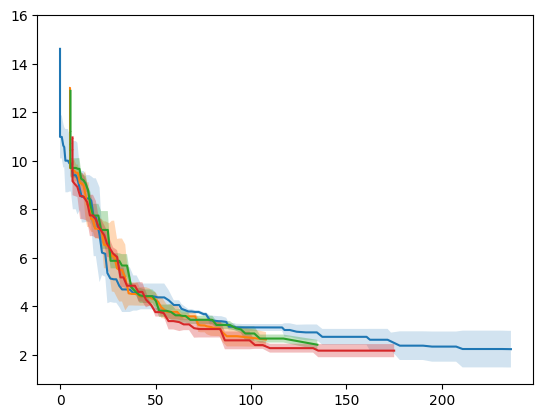

In [79]:
plt.plot(time_seq, mean_seq, label="Sequential")
plt.fill_between(time_seq, mean_seq - std_seq, mean_seq + std_seq, alpha=0.2)

plt.plot(time_2, mean_2, label="Parallel with 2 cores")
plt.fill_between(time_2, mean_2 - std_2, mean_2 + std_2, alpha=0.3)

plt.plot(time_4, mean_4, label="Parallel with 4 cores")
plt.fill_between(time_4, mean_4 - std_4, mean_4 + std_4, alpha=0.3)

plt.plot(time_8, mean_8, label="Parallel with 8 cores")
plt.fill_between(time_8, mean_8 - std_8, mean_8 + std_8, alpha=0.3)


In [68]:
import numpy as np
from matplotlib import pyplot as plt

result_4cores = np.array([
    [13.648561098617577, 13.648561098617577, 13.648561098617577, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 11.016314148888831, 10.499804435523169, 10.499804435523169, 10.499804435523169, 10.499804435523169, 10.499804435523169, 10.499804435523169, 10.499804435523169, 10.499804435523169, 10.499804435523169, 10.499804435523169, 10.499804435523169, 10.499804435523169, 10.499804435523169, 10.499804435523169, 10.499804435523169, 10.499804435523169, 10.499804435523169, 10.499804435523169, 10.499804435523169, 10.499804435523169, 10.499804435523169, 10.499804435523169, 10.499804435523169, 10.499804435523169, 10.499804435523169, 10.499804435523169, 10.499804435523169, 10.499804435523169, 10.499804435523169, 10.499804435523169, 10.364039890332114, 10.364039890332114, 10.364039890332114, 10.364039890332114, 10.12333927426727, 10.12333927426727, 10.12333927426727, 10.12333927426727, 10.12333927426727, 10.12333927426727, 10.12333927426727, 9.438531903545817, 9.438531903545817, 9.438531903545817, 9.438531903545817, 9.438531903545817, 8.999189466771783, 8.583364933017009, 8.583364933017009, 8.583364933017009, 8.583364933017009, 8.070314704830079, 8.070314704830079, 8.053600299831054, 8.053600299831054, 8.053600299831054, 8.053600299831054, 8.053600299831054],
    [5424.709, 5424.766, 5424.807, 5424.846, 5424.884, 5424.922, 5424.958, 5424.996, 5425.032, 5425.07, 5425.106, 5425.143, 5425.18, 5425.217, 5425.254, 5425.292, 5425.351, 5425.39, 5425.426, 5425.462, 5425.497, 5425.533, 5425.568, 5425.604, 5425.639, 5425.675, 5425.712, 5425.747, 5425.783, 5425.818, 5425.854, 5425.89, 5425.926, 5425.961, 5425.997, 5426.033, 5426.069, 5426.104, 5426.139, 5426.175, 6710.423, 7646.078, 8955.268, 9785.308, 10105.114, 10596.262, 11371.404, 12275.654, 12949.256, 13798.118, 14978.628, 15644.28, 16112.782, 17118.118, 18332.518, 19392.445, 20160.641, 21170.161, 22884.769, 24118.351, 24799.524, 25723.766, 27017.72, 27598.217, 28841.817, 30817.731, 32841.98, 34265.865, 36671.384, 37016.2, 37547.445, 38232.776, 41534.948, 43541.998, 44555.033, 46904.194, 48949.242, 51333.004, 53351.786, 55930.486, 57237.76, 59220.568, 61809.841, 65053.593, 67645.204, 70140.19, 71223.848, 72056.705, 76015.949, 78139.49, 79249.751, 79645.1, 80201.899, 82897.767, 86456.618, 92200.036, 96610.649, 98456.986, 99795.407, 101417.022],
    [14.10022582263802, 14.031254997238216, 14.031254997238216, 14.031254997238216, 13.240129679360953, 13.063644000977703, 13.063644000977703, 13.063644000977703, 13.063644000977703, 13.063644000977703, 13.063644000977703, 13.063644000977703, 13.063644000977703, 13.063644000977703, 13.063644000977703, 13.063644000977703, 13.063644000977703, 13.063644000977703, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 11.382159597277436, 10.934333063080821, 10.934333063080821, 10.934333063080821, 10.934333063080821, 10.934333063080821, 10.710804111121565, 10.710804111121565, 10.60197832633975, 10.60197832633975, 10.60197832633975, 10.60197832633975, 10.60197832633975, 10.60197832633975, 10.60197832633975, 10.339614922963145, 10.339614922963145, 10.130052801432898, 9.38732728783885, 9.38732728783885, 9.38732728783885, 9.38732728783885, 9.38732728783885, 9.38732728783885, 9.38732728783885, 9.38732728783885, 9.38732728783885, 9.38732728783885, 8.906064458788315, 8.906064458788315, 8.624604973019354, 8.592194100505434, 8.592194100505434, 8.592194100505434, 8.592194100505434, 8.592194100505434, 8.592194100505434, 8.592194100505434, 8.592194100505434, 8.592194100505434, 8.171239176724157, 8.171239176724157, 8.171239176724157, 8.171239176724157, 8.171239176724157, 8.171239176724157, 8.04977409349436, 7.802394388094099, 7.7272443465466445, 7.7272443465466445],
    [5493.932, 5493.991, 5494.037, 5494.08, 5494.122, 5494.163, 5494.204, 5494.244, 5494.285, 5494.326, 5494.366, 5494.406, 5494.447, 5494.487, 5494.527, 5494.567, 5494.606, 5494.647, 5494.688, 5494.729, 5494.769, 5494.809, 5494.848, 5494.889, 5494.928, 5494.968, 5495.008, 5495.047, 5495.086, 5495.126, 5495.165, 5495.204, 5495.244, 5495.283, 5495.34, 5495.378, 5495.416, 5495.566, 5495.607, 5495.654, 6013.517, 7264.16, 8465.121, 10051.342, 10851.193, 11540.072, 12957.512, 14189.015, 15575.178, 17667.14, 20045.087, 21514.206, 22064.6, 22650.261, 23546.333, 25429.081, 26090.396, 26749.907, 28468.423, 28791.627, 31296.845, 32100.81, 33120.264, 35583.621, 36952.793, 38524.7, 39242.694, 40784.427, 43147.607, 45510.347, 47894.76, 50321.056, 51916.852, 53534.001, 55258.038, 56673.767, 59531.061, 61309.142, 62506.543, 62881.61, 64440.558, 66056.378, 68008.661, 69899.225, 70365.979, 72460.948, 75917.136, 76839.744, 78917.52, 80047.285, 82812.154, 83741.154, 87314.654, 91189.892, 95076.287, 96123.752, 99550.157, 101453.438, 103178.006, 103386.68],
    [13.401416008520776, 13.401416008520776, 13.401416008520776, 13.401416008520776, 13.401416008520776, 13.401416008520776, 13.401416008520776, 13.401416008520776, 13.401416008520776, 13.401416008520776, 13.401416008520776, 13.401416008520776, 13.401416008520776, 13.160670417087118, 12.878759948288014, 12.878759948288014, 12.878759948288014, 12.878759948288014, 12.878759948288014, 12.878759948288014, 12.878759948288014, 12.878759948288014, 12.878759948288014, 12.878759948288014, 12.878759948288014, 10.912181041900574, 10.912181041900574, 10.912181041900574, 10.912181041900574, 10.912181041900574, 10.912181041900574, 10.912181041900574, 10.912181041900574, 10.912181041900574, 10.912181041900574, 10.912181041900574, 10.912181041900574, 10.912181041900574, 10.912181041900574, 10.912181041900574, 10.912181041900574, 10.695354243181049, 10.695354243181049, 10.695354243181049, 10.695354243181049, 10.695354243181049, 10.695354243181049, 10.695354243181049, 10.695354243181049, 10.695354243181049, 10.695354243181049, 9.966036247012399, 9.966036247012399, 9.966036247012399, 9.966036247012399, 9.966036247012399, 9.966036247012399, 9.966036247012399, 9.591091151050602, 9.591091151050602, 9.591091151050602, 9.591091151050602, 9.591091151050602, 9.504843314034492, 9.302359207429916, 9.290924542586904, 9.290924542586904, 9.290924542586904, 9.290924542586904, 9.290924542586904, 9.290924542586904, 8.425959461431265, 8.425959461431265, 8.425959461431265, 8.425959461431265, 8.425959461431265, 8.425959461431265, 8.425959461431265, 8.361136335732922, 8.132862150849705, 8.132862150849705, 8.132862150849705, 8.132862150849705, 7.2784064423242665, 7.219414407582059, 7.219414407582059, 7.219414407582059, 7.219414407582059, 7.219414407582059, 7.219414407582059, 7.219414407582059, 7.219414407582059, 7.1808163879690525, 7.1808163879690525, 7.1808163879690525, 7.1808163879690525, 7.1808163879690525, 7.178340065126129, 7.0682779617838705, 7.0682779617838705],
    [5392.231, 5392.286, 5392.328, 5392.366, 5392.403, 5392.457, 5392.493, 5392.527, 5392.562, 5392.597, 5392.631, 5392.666, 5392.7, 5392.735, 5392.77, 5392.805, 5392.84, 5392.874, 5392.909, 5392.943, 5392.978, 5393.012, 5393.046, 5393.08, 5393.115, 5393.149, 5393.183, 5393.217, 5393.252, 5393.287, 5393.329, 5393.365, 5393.401, 5393.436, 5393.471, 5393.505, 5393.54, 5393.575, 5393.703, 5393.741, 6680.726, 7607.757, 8507.638, 9292.933, 10133.246, 11084.325, 12648.447, 13518.766, 14168.81, 15293.378, 15534.118, 16930.297, 17611.005, 18624.188, 19731.655, 21264.564, 21956.198, 23081.906, 24738.094, 25156.027, 26849.261, 27108.681, 28399.053, 29735.782, 31376.436, 33529.771, 35685.545, 36145.054, 36652.856, 37594.474, 38558.618, 40960.98, 43502.312, 44053.378, 44393.409, 45656.589, 47988.452, 49978.634, 52858.169, 55217.69, 58586.505, 60172.849, 62847.336, 65826.255, 68147.889, 68807.146, 71583.779, 74908.322, 78506.972, 82299.009, 86443.956, 89523.758, 92914.379, 95956.671, 99082.101, 102484.821, 105914.52, 107595.125, 110045.309, 113407.301],
    [15.173115725531915, 14.288160170828593, 14.288160170828593, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 11.705065774333992, 10.634386949063618, 10.634386949063618, 10.634386949063618, 10.634386949063618, 10.622888858485439, 10.622888858485439, 10.622888858485439, 10.453080831633356, 10.453080831633356, 10.453080831633356, 10.453080831633356, 10.453080831633356, 10.453080831633356, 10.00299355472421, 10.00299355472421, 10.00299355472421, 9.966952256367108, 9.535494652640402, 9.350596604903265, 9.191121230674362, 9.191121230674362, 9.191121230674362, 9.191121230674362, 9.191121230674362, 8.71061313902811, 8.71061313902811, 8.615323817516371, 8.615323817516371, 8.557477308618873, 8.49941468791071, 8.48985959636335],
    [5398.763, 5398.817, 5398.86, 5398.899, 5398.937, 5398.976, 5399.013, 5399.05, 5399.086, 5399.123, 5399.16, 5399.196, 5399.233, 5399.269, 5399.305, 5399.342, 5399.378, 5399.416, 5399.452, 5399.487, 5399.523, 5399.559, 5399.595, 5399.631, 5399.668, 5399.71, 5399.746, 5399.781, 5399.82, 5399.868, 5399.905, 5399.942, 5399.979, 5400.016, 5400.053, 5400.089, 5400.125, 5400.162, 5400.199, 5400.352, 6677.863, 7957.407, 8853.761, 9956.293, 11142.17, 12191.833, 12695.087, 13939.373, 14895.404, 17231.46, 18072.354, 19873.412, 20954.276, 22626.525, 23677.508, 24632.537, 25997.836, 26924.841, 29101.091, 31181.401, 32575.404, 33924.18, 35792.423, 36719.304, 38214.256, 39931.909, 41463.204, 42329.133, 43305.888, 46100.975, 48115.333, 49132.281, 50638.907, 52692.802, 55103.879, 57123.929, 59531.012, 61055.537, 63141.118, 64655.384, 67071.112, 68050.579, 70829.024, 72954.357, 74847.765, 77768.186, 79798.159, 82016.266, 84861.456, 87480.216, 90543.063, 93029.609, 95628.826, 99277.97, 102919.802, 106033.02, 109375.604, 112256.088, 114083.518, 115847.896],
    [11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.92010918688944, 11.465169629192594, 11.465169629192594, 11.465169629192594, 11.465169629192594, 11.465169629192594, 11.465169629192594, 11.465169629192594, 11.465169629192594, 11.465169629192594, 11.465169629192594, 11.465169629192594, 11.465169629192594, 11.465169629192594, 11.465169629192594, 11.465169629192594, 10.616834854808937, 10.38820929152332, 10.38820929152332, 10.38820929152332, 10.307661549913142, 10.307661549913142, 10.307661549913142, 10.307661549913142, 10.307661549913142, 10.307661549913142, 10.307661549913142, 10.307661549913142, 10.307661549913142, 10.231024331115993, 10.231024331115993, 10.231024331115993, 10.231024331115993, 10.231024331115993, 10.231024331115993, 10.231024331115993, 9.866146882520345, 9.866146882520345, 9.78152161917643, 9.485018693563235, 9.485018693563235, 9.260923703408032, 9.260923703408032, 8.958252169905958, 8.958252169905958, 8.958252169905958, 8.958252169905958, 8.958252169905958, 8.958252169905958, 8.896423124230973, 8.86771500407984, 8.86771500407984, 8.86771500407984, 8.86771500407984, 8.86771500407984],
    [5863.165, 5863.237, 5863.289, 5863.336, 5863.381, 5863.426, 5863.47, 5863.514, 5863.557, 5863.602, 5863.645, 5863.689, 5863.732, 5863.775, 5863.818, 5863.862, 5863.905, 5863.949, 5863.992, 5864.035, 5864.077, 5864.119, 5864.162, 5864.205, 5864.248, 5864.29, 5864.332, 5864.375, 5864.418, 5864.46, 5864.502, 5864.545, 5864.588, 5864.631, 5864.674, 5864.716, 5864.758, 5864.801, 5864.844, 5864.886, 7092.346, 7995.984, 8884.824, 10371.808, 11649.701, 11986.366, 13675.176, 14327.566, 14967.435, 16481.7, 16939.736, 18831.315, 19756.641, 20238.667, 21726.087, 22821.32, 23343.643, 25281.5, 26026.254, 26750.791, 27633.074, 29351.572, 31122.877, 33126.498, 35357.946, 37685.567, 40538.472, 42992.078, 43328.275, 43753.706, 44606.909, 45258.345, 45614.011, 46618.117, 49610.593, 50695.26, 52405.727, 54531.211, 56872.844, 60171.827, 60771.612, 64959.98, 66315.859, 69839.399, 71742.613, 73158.594, 74342.315, 75907.884, 77534.244, 78258.317, 79956.69, 82112.169, 85512.412, 88810.587, 90546.056, 93317.662, 93930.874, 98921.883, 102137.794, 103722.979],
    [13.720989891078162, 13.720989891078162, 13.720989891078162, 13.720989891078162, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.714732572873597, 12.704362695513947, 12.704362695513947, 12.704362695513947, 12.704362695513947, 12.153029755886966, 12.153029755886966, 12.153029755886966, 12.153029755886966, 12.153029755886966, 12.153029755886966, 12.153029755886966, 12.153029755886966, 11.995137127285709, 11.492774639632012, 11.492774639632012, 11.492774639632012, 11.492774639632012, 11.492774639632012, 11.492774639632012, 11.492774639632012, 11.492774639632012, 11.492774639632012, 11.492774639632012, 11.492774639632012, 11.385487297862475, 11.385487297862475, 11.385487297862475, 11.385487297862475, 11.385487297862475, 11.385487297862475, 11.385487297862475, 11.385487297862475, 11.385487297862475, 11.385487297862475, 10.319933165599936, 10.319933165599936, 10.319933165599936, 10.319933165599936, 10.319933165599936, 10.319933165599936, 10.319933165599936, 10.319933165599936, 10.319933165599936, 10.319933165599936, 10.136660507784857, 10.136660507784857, 10.136660507784857, 10.136660507784857, 10.136660507784857, 10.136660507784857, 10.031639252107293, 10.031639252107293, 10.031639252107293, 10.031639252107293, 10.031639252107293, 10.031639252107293, 9.258144334453117, 9.258144334453117],
    [5725.534, 5725.593, 5725.637, 5725.678, 5725.718, 5725.759, 5725.798, 5725.837, 5725.877, 5725.934, 5725.975, 5726.019, 5726.06, 5726.099, 5726.137, 5726.175, 5726.213, 5726.251, 5726.29, 5726.328, 5726.366, 5726.403, 5726.441, 5726.48, 5726.517, 5726.555, 5726.593, 5726.631, 5726.669, 5726.707, 5726.746, 5726.788, 5726.826, 5726.865, 5726.903, 5726.942, 5726.98, 5727.024, 5727.064, 5727.103, 6615.114, 8302.52, 9170.249, 9874.704, 10202.199, 11221.737, 12838.761, 14469.65, 15905.814, 17520.837, 19041.965, 19509.786, 20044.847, 20958.405, 22838.725, 24869.71, 26663.088, 27277.971, 28049.744, 30470.25, 32647.961, 34270.934, 35938.258, 36651.821, 39017.801, 42529.061, 44130.161, 47432.111, 49768.348, 50107.519, 51891.215, 53466.488, 54149.012, 54861.488, 55965.194, 57777.38, 59213.885, 62320.997, 63723.295, 66388.544, 67887.818, 68472.93, 70984.534, 73065.32, 75821.15, 78186.372, 81926.035, 84674.664, 86163.008, 89144.616, 92318.331, 93536.605, 96873.811, 97627.781, 99259.469, 99888.708, 103674.802, 107975.522, 112676.363, 113163.346],
    [14.01116682993782, 14.01116682993782, 14.01116682993782, 13.829299915749242, 13.808089606055384, 13.808089606055384, 13.01562400346353, 13.01562400346353, 12.520572309291245, 12.520572309291245, 12.520572309291245, 12.520572309291245, 12.520572309291245, 12.520572309291245, 12.520572309291245, 12.520572309291245, 12.520572309291245, 12.520572309291245, 12.520572309291245, 12.520572309291245, 12.520572309291245, 12.520572309291245, 12.520572309291245, 12.520572309291245, 12.520572309291245, 12.520572309291245, 12.520572309291245, 12.520572309291245, 12.520572309291245, 12.520572309291245, 12.520572309291245, 12.520572309291245, 10.71038623578114, 10.71038623578114, 10.71038623578114, 10.71038623578114, 10.71038623578114, 10.71038623578114, 10.71038623578114, 10.71038623578114, 10.71038623578114, 10.71038623578114, 10.71038623578114, 10.71038623578114, 10.71038623578114, 10.71038623578114, 10.71038623578114, 10.71038623578114, 10.71038623578114, 10.71038623578114, 10.71038623578114, 10.71038623578114, 10.71038623578114, 10.71038623578114, 10.71038623578114, 10.46512587421902, 10.46512587421902, 10.46512587421902, 10.46512587421902, 10.46512587421902, 10.46512587421902, 10.46512587421902, 10.46512587421902, 10.46512587421902, 10.46512587421902, 10.46512587421902, 9.458341210493, 9.458341210493, 9.458341210493, 9.458341210493, 9.458341210493, 9.458341210493, 9.458341210493, 9.32821983977632, 9.32821983977632, 9.32821983977632, 9.32821983977632, 9.32821983977632, 9.32821983977632, 9.32821983977632, 9.32821983977632, 9.32821983977632, 9.32821983977632, 9.32821983977632, 8.648953796649733, 8.648953796649733, 8.648953796649733, 8.648953796649733, 7.845338530177692, 7.845338530177692, 7.845338530177692, 7.845338530177692, 7.845338530177692, 7.845338530177692, 7.248684804722913, 7.248684804722913, 7.248684804722913, 7.248684804722913, 7.248684804722913, 7.248684804722913],
    [5699.597, 5699.654, 5699.7, 5699.741, 5699.783, 5699.824, 5699.864, 5699.904, 5699.945, 5699.985, 5700.025, 5700.064, 5700.103, 5700.141, 5700.18, 5700.218, 5700.257, 5700.296, 5700.334, 5700.372, 5700.411, 5700.45, 5700.488, 5700.532, 5700.582, 5700.622, 5700.662, 5700.699, 5700.738, 5700.776, 5700.814, 5700.853, 5700.892, 5700.931, 5700.97, 5701.009, 5701.163, 5701.206, 5701.246, 5701.286, 6732.556, 7068.15, 7462.251, 7880.494, 9067.088, 9407.187, 11166.397, 12874.654, 13401.804, 14312.72, 16015.259, 16800.294, 18001.678, 19446.893, 20685.389, 22743.13, 23797.543, 24430.973, 25037.128, 27210.945, 28328.359, 29488.591, 30769.19, 31865.234, 33201.316, 34152.846, 36841.808, 38986.595, 40777.295, 42740.37, 44857.08, 47516.141, 48801.248, 50733.359, 52966.901, 54543.1, 56842.586, 59164.325, 61748.914, 62175.154, 62583.5, 65948.481, 66360.617, 68834.783, 71811.572, 75066.112, 78011.023, 80669.554, 82248.8, 83227.916, 86975.23, 87359.632, 90027.452, 93851.521, 97960.826, 98671.478, 103753.56, 107685.786, 110559.513, 113837.498],
    [12.395789146881413, 12.395789146881413, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.111111211671416, 12.058648507534787, 12.058648507534787, 12.058648507534787, 12.046894107547859, 12.046894107547859, 10.659009236992011, 10.659009236992011, 10.659009236992011, 10.659009236992011, 10.659009236992011, 10.659009236992011, 10.659009236992011, 10.659009236992011, 10.134527326498976, 10.134527326498976, 10.134527326498976, 10.134527326498976, 10.134527326498976, 10.069349514688676, 10.069349514688676, 10.069349514688676, 10.069349514688676, 10.069349514688676, 10.069349514688676, 9.12499766496138, 9.12499766496138, 9.12499766496138, 9.12499766496138, 9.12499766496138, 9.12499766496138, 9.12499766496138, 9.12499766496138, 9.12499766496138, 8.959597970291505, 8.959597970291505, 8.959597970291505, 8.959597970291505, 8.959597970291505, 8.959597970291505, 8.959597970291505, 8.959597970291505, 8.959597970291505, 8.959597970291505, 8.886856246068772, 8.886856246068772, 8.886856246068772, 7.42952635910615, 7.42952635910615, 7.42952635910615, 7.42952635910615, 7.42952635910615, 7.42952635910615, 7.42952635910615, 7.42952635910615, 7.42952635910615, 7.42952635910615, 7.42952635910615, 7.42952635910615, 7.261501596227006, 7.261501596227006],
    [5742.969, 5743.028, 5743.074, 5743.116, 5743.174, 5743.214, 5743.252, 5743.29, 5743.327, 5743.365, 5743.403, 5743.441, 5743.479, 5743.517, 5743.555, 5743.592, 5743.629, 5743.667, 5743.704, 5743.741, 5743.778, 5743.814, 5743.851, 5743.888, 5743.926, 5743.963, 5744.001, 5744.038, 5744.075, 5744.113, 5744.15, 5744.187, 5744.226, 5744.263, 5744.301, 5744.339, 5744.376, 5744.414, 5744.452, 5744.488, 6837.848, 7315.209, 8468.6, 9291.438, 9647.186, 11292.925, 11674.514, 13157.947, 14205.425, 16010.877, 17388.627, 18188.197, 20296.671, 21967.949, 22277.057, 22783.731, 25308.902, 26611.16, 29388.015, 30193.859, 30932.511, 32906.654, 33922.243, 34801.642, 36062.415, 37332.231, 39806.058, 41107.551, 42842.056, 43901.364, 45220.36, 48614.778, 50255.292, 52903.75, 53284.729, 55454.217, 57516.614, 60234.795, 60632.192, 61755.399, 62549.39, 63483.697, 65772.663, 69604.308, 70006.537, 73718.198, 76179.262, 79714.059, 82734.549, 83176.997, 86419.499, 88760.476, 93862.24, 96297.956, 97310.365, 98057.191, 102122.526, 108012.17, 112329.981, 116040.851],
    [13.078068153605425, 13.078068153605425, 13.078068153605425, 13.078068153605425, 13.078068153605425, 13.078068153605425, 13.078068153605425, 13.078068153605425, 13.078068153605425, 13.078068153605425, 13.078068153605425, 13.078068153605425, 13.078068153605425, 13.078068153605425, 13.078068153605425, 13.078068153605425, 13.078068153605425, 13.078068153605425, 13.078068153605425, 12.27079936495568, 12.27079936495568, 12.27079936495568, 12.27079936495568, 12.27079936495568, 12.27079936495568, 12.27079936495568, 12.27079936495568, 12.27079936495568, 12.27079936495568, 12.27079936495568, 12.27079936495568, 12.27079936495568, 12.27079936495568, 12.27079936495568, 12.27079936495568, 12.27079936495568, 12.27079936495568, 12.27079936495568, 12.27079936495568, 12.27079936495568, 12.27079936495568, 12.27079936495568, 12.27079936495568, 12.27079936495568, 12.27079936495568, 12.089262738352613, 12.089262738352613, 12.089262738352613, 11.823976804664929, 11.823976804664929, 11.823976804664929, 11.823976804664929, 11.823976804664929, 11.823976804664929, 11.823976804664929, 11.823976804664929, 11.823976804664929, 11.823976804664929, 11.823976804664929, 11.823976804664929, 11.823976804664929, 11.823976804664929, 11.823976804664929, 11.3346754549127, 11.010442284638343, 11.010442284638343, 11.010442284638343, 11.010442284638343, 10.796826122108897, 10.796826122108897, 10.536252763186223, 10.536252763186223, 10.477153601809572, 10.477153601809572, 10.20583297311069, 10.20583297311069, 10.20583297311069, 10.20583297311069, 10.20583297311069, 10.20583297311069, 10.20583297311069, 10.20583297311069, 10.20583297311069, 10.20583297311069, 10.20583297311069, 10.20583297311069, 10.036642949307854, 10.036642949307854, 10.036642949307854, 10.036642949307854, 10.036642949307854, 10.036642949307854, 10.036642949307854, 10.036642949307854, 10.036642949307854, 10.036642949307854, 10.036642949307854, 10.036642949307854, 10.012256421113477, 9.310961465525141],
    [5654.692, 5654.748, 5654.79, 5654.83, 5654.867, 5654.905, 5654.942, 5654.979, 5655.015, 5655.052, 5655.088, 5655.124, 5655.16, 5655.196, 5655.232, 5655.269, 5655.304, 5655.341, 5655.376, 5655.412, 5655.449, 5655.485, 5655.521, 5655.557, 5655.593, 5655.63, 5655.666, 5655.702, 5655.737, 5655.773, 5655.808, 5655.844, 5655.881, 5655.917, 5655.953, 5655.989, 5656.025, 5656.061, 5656.097, 5656.133, 6698.451, 8516.303, 9141.451, 10394.235, 11027.706, 12597.713, 13480.393, 14819.177, 16651.289, 17323.61, 18648.479, 19337.428, 20796.132, 21719.263, 22619.022, 24233.438, 25719.955, 27395.444, 28710.508, 30386.968, 31795.267, 33623.158, 35177.027, 36417.48, 39383.601, 41565.575, 43000.005, 45266.242, 47640.661, 48109.269, 50486.644, 51380.916, 53611.146, 54281.973, 57130.728, 57828.63, 59223.504, 60101.444, 61833.957, 64633.536, 66037.305, 67280.382, 68747.368, 69311.001, 72813.354, 74391.312, 75875.756, 76557.507, 77427.68, 78561.378, 80245.082, 82161.929, 82781.825, 83613.003, 86143.697, 87834.234, 88282.875, 90771.113, 92146.685, 93353.713],
    [14.835785269255584, 12.91844889901694, 12.91844889901694, 12.698717903200912, 12.698717903200912, 12.698717903200912, 12.687505162005356, 12.687505162005356, 12.687505162005356, 12.687505162005356, 12.687505162005356, 12.687505162005356, 12.2264905958911, 12.2264905958911, 12.2264905958911, 12.2264905958911, 12.2264905958911, 12.2264905958911, 12.2264905958911, 12.2264905958911, 12.2264905958911, 12.2264905958911, 12.2264905958911, 12.2264905958911, 12.2264905958911, 12.2264905958911, 12.2264905958911, 12.2264905958911, 12.2264905958911, 12.2264905958911, 12.2264905958911, 12.2264905958911, 12.2264905958911, 12.2264905958911, 12.2264905958911, 12.2264905958911, 12.2264905958911, 12.2264905958911, 12.2264905958911, 12.2264905958911, 12.2264905958911, 12.08966342693577, 11.244988600680388, 11.244988600680388, 11.244988600680388, 11.244988600680388, 11.244988600680388, 11.244988600680388, 11.244988600680388, 11.244988600680388, 10.88650076406758, 10.88650076406758, 10.88650076406758, 10.88650076406758, 10.88650076406758, 10.88650076406758, 10.686012314882323, 10.686012314882323, 10.59127518384988, 9.76615312645315, 9.76615312645315, 9.76615312645315, 9.76615312645315, 9.76615312645315, 9.76615312645315, 9.76615312645315, 9.76615312645315, 9.76615312645315, 9.060179575580232, 9.060179575580232, 9.060179575580232, 9.060179575580232, 9.060179575580232, 9.060179575580232, 9.060179575580232, 9.060179575580232, 9.060179575580232, 9.060179575580232, 9.060179575580232, 9.060179575580232, 9.060179575580232, 9.060179575580232, 9.060179575580232, 7.971836835662435, 7.971836835662435, 7.971836835662435, 7.971836835662435, 7.971836835662435, 7.971836835662435, 7.971836835662435, 7.6361469264920565, 7.6361469264920565, 7.6361469264920565, 7.6361469264920565, 7.6361469264920565, 7.048674035241824, 7.048674035241824, 7.048674035241824, 7.048674035241824, 7.048674035241824],
    [5616.829, 5616.887, 5616.933, 5616.976, 5617.017, 5617.058, 5617.099, 5617.14, 5617.196, 5617.24, 5617.279, 5617.319, 5617.359, 5617.398, 5617.437, 5617.477, 5617.516, 5617.556, 5617.595, 5617.634, 5617.673, 5617.712, 5617.751, 5617.79, 5617.829, 5617.868, 5617.907, 5617.946, 5617.986, 5618.025, 5618.065, 5618.105, 5618.144, 5618.183, 5618.223, 5618.263, 5618.302, 5618.448, 5618.491, 5618.532, 6797.825, 8276.753, 9600.345, 11097.756, 12006.811, 13555.459, 14489.548, 14771.499, 15364.242, 17109.984, 18837.451, 19117.823, 19993.804, 20455.93, 22155.175, 24898.79, 27361.228, 28532.903, 30518.971, 32011.899, 32318.113, 32865.772, 33962.784, 35108.581, 35440.231, 35971.293, 37387.95, 38818.557, 40408.855, 41162.916, 42888.193, 44347.854, 45650.76, 47597.627, 49505.191, 52094.748, 52685.605, 53813.765, 56218.885, 57949.744, 59020.815, 60461.683, 63984.907, 68773.828, 71220.082, 73083.294, 74954.354, 78004.254, 79316.757, 81549.505, 84520.063, 87338.864, 90231.079, 93552.797, 96095.147, 98459.017, 99693.196, 102015.812, 104879.611, 106421.126],
    [15.510211124083243, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.980680001854815, 11.722669355303042, 11.722669355303042, 11.722669355303042, 11.722669355303042, 11.722669355303042, 11.722669355303042, 11.722669355303042, 11.722669355303042, 11.722669355303042, 10.541218336250589, 10.541218336250589, 10.541218336250589, 10.541218336250589, 10.541218336250589, 10.541218336250589, 10.541218336250589, 10.541218336250589, 10.541218336250589, 10.541218336250589, 10.541218336250589, 10.541218336250589, 10.541218336250589, 10.541218336250589, 10.541218336250589, 10.541218336250589, 10.541218336250589, 10.541218336250589, 10.541218336250589, 10.541218336250589, 10.541218336250589, 9.91189297680988, 9.519888685550097, 9.519888685550097, 9.519888685550097, 8.620681359828962, 8.620681359828962, 8.620681359828962, 8.620681359828962, 8.620681359828962, 8.620681359828962, 8.620681359828962, 8.620681359828962, 8.620681359828962, 8.620681359828962, 8.620681359828962, 8.620681359828962, 8.620681359828962, 8.620681359828962, 8.620681359828962, 8.620681359828962, 8.620681359828962, 8.620681359828962, 8.620681359828962, 8.620681359828962, 8.620681359828962, 8.620681359828962, 8.620681359828962, 8.620681359828962, 8.620681359828962, 8.620681359828962, 8.010455384811381, 8.010455384811381, 8.010455384811381, 8.010455384811381, 8.010455384811381, 8.010455384811381, 8.010455384811381],
    [5655.781, 5655.835, 5655.879, 5655.919, 5655.959, 5655.998, 5656.036, 5656.073, 5656.111, 5656.15, 5656.187, 5656.224, 5656.261, 5656.298, 5656.336, 5656.373, 5656.41, 5656.448, 5656.485, 5656.522, 5656.558, 5656.595, 5656.632, 5656.668, 5656.706, 5656.743, 5656.78, 5656.817, 5656.854, 5656.892, 5656.929, 5656.966, 5657.005, 5657.042, 5657.089, 5657.126, 5657.163, 5657.228, 5657.266, 5657.442, 6893.554, 7939.417, 9646.633, 10712.289, 11856.618, 12788.481, 13467.763, 14882.755, 16542.515, 17982.66, 18689.12, 21283.443, 23553.908, 24270.787, 26365.319, 27546.895, 27800.025, 28214.087, 29564.808, 30352.081, 33803.639, 35596.672, 36291.269, 38104.213, 40804.351, 42467.843, 44841.379, 47291.97, 49588.739, 50090.814, 50783.436, 55655.093, 56074.303, 56934.282, 61630.07, 62837.843, 63389.38, 64018.087, 64213.524, 65968.093, 67196.395, 70252.814, 71229.915, 72298.743, 73493.844, 74042.798, 76519.614, 77977.463, 79041.903, 80391.384, 81479.105, 83691.542, 87484.545, 90399.242, 91812.061, 94364.075, 97985.736, 99845.824, 103390.923, 108286.998],
    [15.9012213265435, 14.264923424110242, 12.171661515863992, 12.171661515863992, 12.171661515863992, 12.171661515863992, 12.171661515863992, 12.171661515863992, 12.171661515863992, 12.171661515863992, 12.171661515863992, 12.171661515863992, 12.171661515863992, 12.171661515863992, 12.171661515863992, 12.171661515863992, 11.922815451236044, 11.922815451236044, 11.922815451236044, 11.922815451236044, 11.922815451236044, 11.922815451236044, 11.922815451236044, 11.88333403969977, 11.88333403969977, 11.88333403969977, 11.88333403969977, 11.88333403969977, 11.88333403969977, 11.88333403969977, 11.88333403969977, 11.88333403969977, 10.77749084643773, 10.77749084643773, 10.77749084643773, 10.77749084643773, 10.77749084643773, 10.77749084643773, 10.77749084643773, 10.77749084643773, 10.77749084643773, 10.77749084643773, 10.77749084643773, 10.77749084643773, 10.77749084643773, 10.77749084643773, 10.77749084643773, 10.77749084643773, 10.77749084643773, 10.77749084643773, 10.77749084643773, 10.77749084643773, 10.77749084643773, 10.77749084643773, 10.77749084643773, 10.77749084643773, 10.77749084643773, 10.499944582694082, 10.499944582694082, 10.499944582694082, 10.499944582694082, 10.499944582694082, 10.499944582694082, 10.499944582694082, 10.499944582694082, 10.499944582694082, 10.499944582694082, 10.470810735609698, 10.470810735609698, 10.470810735609698, 10.470810735609698, 10.470810735609698, 10.470810735609698, 10.470810735609698, 10.244940857106943, 10.244940857106943, 10.244940857106943, 10.244940857106943, 9.340415995332034, 9.340415995332034, 8.503666451539372, 8.503666451539372, 8.503666451539372, 8.503666451539372, 8.503666451539372, 8.503666451539372, 8.503666451539372, 8.503666451539372, 8.503666451539372, 8.309620064210758, 7.803524743159699, 7.803524743159699, 7.803524743159699, 7.803524743159699, 7.803524743159699, 7.803524743159699, 7.803524743159699, 7.803524743159699, 7.666706228978173, 7.666706228978173],
    [5608.572, 5608.63, 5608.679, 5608.735, 5608.776, 5608.815, 5608.854, 5608.892, 5608.929, 5608.967, 5609.005, 5609.043, 5609.08, 5609.118, 5609.155, 5609.205, 5609.244, 5609.282, 5609.32, 5609.357, 5609.394, 5609.431, 5609.468, 5609.505, 5609.543, 5609.581, 5609.619, 5609.656, 5609.693, 5609.73, 5609.768, 5609.806, 5609.844, 5609.882, 5609.92, 5609.957, 5610.102, 5610.144, 5610.189, 5610.229, 7275.11, 8516.95, 9581.218, 10287.685, 11445.746, 12633.908, 13226.752, 14829.136, 15753.926, 17508.235, 18725.385, 19893.332, 20415.731, 20955.135, 21358.569, 22833.977, 24880.645, 26937.672, 28817.329, 30351.793, 30592.941, 31273.71, 32660.346, 32993.179, 35287.294, 35773.447, 38380.332, 40637.778, 41248.44, 41605.186, 42035.459, 42438.924, 43582.058, 44732.976, 46934.135, 48011.094, 49211.653, 51654.99, 54118.907, 55878.044, 59493.085, 61263.268, 64375.998, 67637.351, 71398.055, 74475.61, 78551.87, 80280.919, 81998.768, 85786.303, 88166.822, 92047.796, 94229.527, 97478.33, 98389.58, 100928.233, 102946.438, 107335.822, 110320.826, 112476.41]
])

end_time_4 = np.array([119976.05, 122070.174, 126750.604])
end_result_4 = np.array([7.0682779617838705, 7.248684804722913, 7.048674035241824])

In [69]:
import numpy as np
from matplotlib import pyplot as plt

result_8cores = np.array([
[14.320714200066627, 14.241792413893707, 13.136889908015291, 13.136889908015291, 13.136889908015291, 13.136889908015291, 13.136889908015291, 13.136889908015291, 13.136889908015291, 13.136889908015291, 13.136889908015291, 13.109042748032774, 13.109042748032774, 12.936411011248008, 12.936411011248008, 12.936411011248008, 12.936411011248008, 12.936411011248008, 12.936411011248008, 12.131205037864166, 12.131205037864166, 12.131205037864166, 12.131205037864166, 12.131205037864166, 12.131205037864166, 12.131205037864166, 12.131205037864166, 12.131205037864166, 12.131205037864166, 12.131205037864166, 12.131205037864166, 12.131205037864166, 12.131205037864166, 12.131205037864166, 12.131205037864166, 12.131205037864166, 12.131205037864166, 12.131205037864166, 12.131205037864166, 12.131205037864166, 12.131205037864166, 12.107751032509059, 11.72040962562706, 11.72040962562706, 11.72040962562706, 11.53700312537983, 11.53700312537983, 11.53700312537983, 11.53700312537983, 11.53700312537983, 11.53700312537983, 11.53700312537983, 11.53700312537983, 11.53700312537983, 11.53700312537983, 11.53700312537983, 11.53700312537983, 11.53700312537983, 11.53700312537983, 11.16653467899043, 11.16653467899043, 11.16653467899043, 11.16653467899043, 11.16653467899043, 11.16653467899043, 10.801673506412037, 10.615042723719341, 10.615042723719341, 10.238741188023422, 10.238741188023422, 10.238741188023422, 10.238741188023422, 10.238741188023422, 10.238741188023422, 10.238741188023422, 10.238741188023422, 10.238741188023422, 10.238741188023422, 10.238741188023422, 10.061233038265442, 10.061233038265442, 10.061233038265442, 10.061233038265442, 10.061233038265442, 10.061233038265442, 10.061233038265442, 10.061233038265442, 10.061233038265442, 10.061233038265442, 10.061233038265442, 9.994517513090724, 9.708293973584354, 9.708293973584354, 9.708293973584354, 9.708293973584354, 9.708293973584354, 9.708293973584354, 9.708293973584354, 9.708293973584354, 9.708293973584354],
[6384.95, 6385.006, 6385.049, 6385.088, 6385.126, 6385.163, 6385.2, 6385.237, 6385.274, 6385.312, 6385.349, 6385.392, 6385.438, 6385.477, 6385.532, 6385.575, 6385.625, 6385.663, 6385.7, 6385.737, 6385.773, 6385.809, 6385.844, 6385.88, 6385.916, 6385.953, 6385.988, 6386.024, 6386.06, 6386.096, 6386.132, 6386.169, 6386.206, 6386.242, 6386.283, 6386.33, 6386.586, 6386.631, 6386.683, 6386.722, 7782.254, 9660.156, 10839.174, 11883.734, 12230.298, 13052.744, 14003.144, 14712.581, 15923.839, 17453.202, 19340.079, 21999.473, 24478.565, 26783.066, 27941.146, 29747.537, 32188.371, 32517.216, 33237.27, 35271.276, 36073.16, 37675.073, 41174.966, 41974.622, 42580.587, 44303.896, 46198.568, 47997.553, 50517.409, 53022.752, 55480.1, 56291.416, 57412.766, 60602.947, 63220.109, 64241.121, 64660.915, 67655.281, 71602.17, 75318.127, 76089.5, 77324.39, 77848.53, 81222.498, 81745.784, 84471.142, 87089.975, 88428.62, 91149.957, 92498.722, 95206.842, 97995.604, 98926.954, 99551.25, 101792.678, 103224.144, 104566.052, 105725.787, 107252.341, 107795.259],
[15.410401983741453, 13.52737583086624, 13.188024033796825, 13.188024033796825, 13.188024033796825, 13.188024033796825, 13.188024033796825, 13.188024033796825, 13.188024033796825, 13.188024033796825, 13.188024033796825, 13.188024033796825, 13.188024033796825, 13.188024033796825, 13.188024033796825, 12.919351085124665, 12.919351085124665, 12.919351085124665, 10.901944417392981, 10.901944417392981, 10.901944417392981, 10.901944417392981, 10.901944417392981, 10.901944417392981, 10.901944417392981, 10.901944417392981, 10.901944417392981, 10.901944417392981, 10.901944417392981, 10.901944417392981, 10.901944417392981, 10.901944417392981, 10.901944417392981, 10.901944417392981, 10.901944417392981, 10.901944417392981, 10.901944417392981, 10.901944417392981, 10.901944417392981, 10.901944417392981, 10.901944417392981, 10.901944417392981, 10.901944417392981, 10.901944417392981, 10.901944417392981, 10.901944417392981, 10.901944417392981, 10.901944417392981, 10.495123804748618, 10.495123804748618, 10.495123804748618, 10.495123804748618, 10.495123804748618, 10.495123804748618, 10.495123804748618, 10.495123804748618, 10.495123804748618, 10.495123804748618, 10.363085773284462, 10.363085773284462, 10.363085773284462, 10.363085773284462, 10.363085773284462, 10.255597814843687, 8.767384240456089, 8.767384240456089, 8.767384240456089, 8.767384240456089, 8.601225633672957, 8.601225633672957, 8.601225633672957, 8.601225633672957, 8.601225633672957, 8.601225633672957, 8.601225633672957, 8.601225633672957, 8.601225633672957, 8.601225633672957, 8.435814921960398, 8.435814921960398, 8.435814921960398, 8.435814921960398, 8.435814921960398, 8.238378973607693, 8.238378973607693, 8.238378973607693, 8.238378973607693, 8.238378973607693, 8.14846192870037, 8.14846192870037, 8.14846192870037, 8.14846192870037, 8.14846192870037, 8.14846192870037, 7.639252769919636, 7.639252769919636, 7.639252769919636, 7.639252769919636, 7.639252769919636, 7.639252769919636],
[6422.706, 6422.761, 6422.801, 6422.837, 6422.872, 6422.908, 6422.943, 6422.977, 6423.011, 6423.045, 6423.08, 6423.114, 6423.147, 6423.182, 6423.215, 6423.249, 6423.283, 6423.329, 6423.364, 6423.407, 6423.451, 6423.486, 6423.541, 6423.576, 6423.611, 6423.646, 6423.681, 6423.716, 6423.751, 6423.785, 6423.819, 6423.853, 6423.888, 6423.923, 6423.957, 6423.991, 6424.025, 6424.19, 6424.229, 6424.264, 7544.375, 9512.91, 9776.625, 10521.396, 11641.559, 12280.809, 12741.619, 14349.92, 16182.292, 16681.77, 17400.675, 17834.622, 18830.075, 19262.162, 21207.353, 21774.038, 23982.095, 24743.929, 26575.607, 27452.918, 28189.239, 30250.669, 32091.467, 33843.454, 37041.618, 38541.4, 39413.077, 41085.755, 43088.129, 45472.044, 46605.942, 49453.004, 53388.388, 54337.966, 55785.604, 56430.437, 57232.543, 58576.766, 62873.637, 65763.37, 69601.55, 74000.194, 75191.019, 79405.913, 82431.852, 88117.57, 89259.487, 91380.824, 95614.301, 96281.18, 100328.589, 102270.112, 105522.943, 106832.994, 109677.647, 110746.238, 112899.797, 115435.24, 116705.478, 120491.986],
[15.236772448745759, 11.918858272230974, 11.918858272230974, 11.918858272230974, 11.918858272230974, 11.918858272230974, 11.918858272230974, 11.918858272230974, 11.918858272230974, 11.918858272230974, 11.918858272230974, 11.918858272230974, 11.918858272230974, 11.918858272230974, 11.918858272230974, 11.918858272230974, 11.918858272230974, 11.918858272230974, 11.918858272230974, 11.918858272230974, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.699956035149643, 10.546093526260817, 10.093644929845725, 10.093644929845725, 10.093644929845725, 10.093644929845725, 10.093644929845725, 10.093644929845725, 10.093644929845725, 9.307443297978532, 9.307443297978532, 9.307443297978532, 9.307443297978532, 9.307443297978532, 9.307443297978532, 8.630688705456574, 8.630688705456574, 8.362289925216368, 8.362289925216368, 8.362289925216368, 8.362289925216368, 8.362289925216368, 8.362289925216368, 8.206548280860797, 8.206548280860797, 8.020947337553688, 8.020947337553688, 8.020947337553688, 8.020947337553688, 8.020947337553688, 8.020947337553688, 8.020947337553688, 7.149248791638943, 7.149248791638943, 7.149248791638943, 7.149248791638943, 7.149248791638943, 7.149248791638943, 7.149248791638943, 7.149248791638943, 7.149248791638943],
[6427.608, 6427.708, 6427.782, 6427.85, 6427.915, 6428.005, 6428.072, 6428.138, 6428.204, 6428.271, 6428.348, 6428.414, 6428.499, 6428.565, 6428.628, 6428.691, 6428.752, 6428.842, 6428.908, 6428.974, 6429.041, 6429.106, 6429.167, 6429.231, 6429.306, 6429.373, 6429.464, 6429.53, 6429.596, 6429.663, 6429.728, 6429.788, 6429.849, 6429.914, 6429.978, 6430.043, 6430.108, 6430.175, 6430.242, 6430.601, 7865.936, 8675.216, 10491.636, 12020.881, 13161.911, 15335.808, 16343.528, 17724.981, 18386.113, 19720.868, 20768.272, 21479.651, 23052.788, 24163.127, 25771.752, 26989.553, 27596.386, 28428.82, 29182.726, 30413.684, 31433.458, 33563.669, 35308.567, 37676.863, 40128.252, 41265.497, 42359.936, 42773.671, 44820.925, 45275.793, 50078.803, 51414.328, 54787.868, 55389.608, 56972.921, 57807.638, 59342.386, 62420.111, 64300.991, 68234.492, 68755.255, 71743.07, 73941.114, 76839.168, 79902.783, 80731.273, 86470.724, 88181.72, 91261.655, 94721.684, 95216.814, 100362.423, 101160.805, 101809.299, 104445.338, 109501.421, 110393.397, 111875.087, 116614.711, 121085.598],
[14.218248258339127, 14.218248258339127, 14.05084481197673, 14.05084481197673, 14.05084481197673, 13.422992931791779, 13.422992931791779, 13.023339916426542, 13.023339916426542, 13.023339916426542, 13.023339916426542, 13.023339916426542, 13.023339916426542, 13.023339916426542, 13.023339916426542, 13.023339916426542, 13.023339916426542, 13.023339916426542, 13.023339916426542, 13.023339916426542, 13.023339916426542, 13.023339916426542, 12.813834237263805, 12.813834237263805, 12.813834237263805, 12.813834237263805, 12.813834237263805, 12.813834237263805, 12.813834237263805, 12.813834237263805, 12.259107936524234, 12.259107936524234, 12.259107936524234, 12.259107936524234, 12.259107936524234, 12.259107936524234, 12.259107936524234, 12.259107936524234, 12.259107936524234, 12.259107936524234, 12.115574370208234, 12.115574370208234, 12.115574370208234, 12.115574370208234, 12.115574370208234, 12.115574370208234, 12.115574370208234, 12.115574370208234, 12.115574370208234, 12.079687471158746, 12.066257491954094, 12.066257491954094, 12.066257491954094, 12.066257491954094, 11.896695207158642, 11.896695207158642, 11.896695207158642, 11.896695207158642, 11.721707366188701, 11.721707366188701, 11.721707366188701, 11.09052797704892, 11.09052797704892, 11.09052797704892, 11.09052797704892, 11.09052797704892, 11.09052797704892, 10.424381842851462, 10.424381842851462, 10.424381842851462, 10.254291221974555, 10.254291221974555, 10.254291221974555, 10.237025901723605, 10.237025901723605, 10.237025901723605, 10.237025901723605, 9.511918657958672, 9.332610400651358, 9.093631414981507, 9.093631414981507, 9.093631414981507, 9.093631414981507, 9.093631414981507, 9.093631414981507, 9.093631414981507, 9.093631414981507, 9.093631414981507, 8.316637484124469, 8.316637484124469, 8.316637484124469, 8.316637484124469, 8.316637484124469, 8.316637484124469, 8.270413096073963, 8.270413096073963, 7.519038791045693, 7.519038791045693, 7.519038791045693, 7.519038791045693],
[6400.496, 6400.577, 6400.622, 6400.663, 6400.701, 6400.741, 6400.799, 6400.844, 6400.901, 6400.965, 6401.024, 6401.063, 6401.102, 6401.14, 6401.178, 6401.216, 6401.254, 6401.292, 6401.33, 6401.367, 6401.405, 6401.443, 6401.482, 6401.531, 6401.569, 6401.607, 6401.645, 6401.689, 6401.739, 6401.778, 6401.816, 6401.855, 6401.892, 6401.93, 6401.984, 6402.022, 6402.203, 6402.245, 6402.291, 6402.331, 6956.679, 7411.245, 9605.1, 10381.915, 11843.025, 13055.546, 13975.021, 14598.443, 15286.415, 16212.353, 16946.954, 17762.816, 18571.503, 19882.157, 22558.191, 23891.724, 25221.896, 26244.945, 27545.19, 28549.169, 28935.738, 30433.375, 32436.889, 34737.4, 36512.391, 37506.41, 39687.91, 41807.465, 44920.682, 45804.372, 49085.52, 49758.08, 53167.175, 54853.384, 55294.717, 55695.562, 56630.726, 58174.519, 60685.773, 63179.517, 66372.281, 67877.705, 71553.142, 75469.596, 79994.542, 85724.275, 87063.262, 90015.846, 92432.162, 95350.061, 96969.839, 98529.654, 100387.816, 103095.181, 105748.6, 107583.912, 112851.324, 116416.796, 118511.026, 121153.715],
[14.17381582278604, 14.13550170605112, 14.13550170605112, 14.13550170605112, 14.13550170605112, 13.804742968173844, 13.804742968173844, 13.804742968173844, 13.804742968173844, 13.804742968173844, 13.804742968173844, 13.804742968173844, 12.989025594529684, 12.989025594529684, 12.989025594529684, 12.989025594529684, 12.801662639530548, 12.801662639530548, 12.801662639530548, 12.801662639530548, 12.801662639530548, 12.225434627999581, 12.225434627999581, 12.225434627999581, 12.225434627999581, 12.225434627999581, 12.225434627999581, 12.225434627999581, 12.225434627999581, 12.225434627999581, 12.225434627999581, 12.225434627999581, 12.225434627999581, 12.225434627999581, 12.225434627999581, 12.225434627999581, 12.225434627999581, 12.225434627999581, 12.225434627999581, 12.225434627999581, 12.225434627999581, 12.225434627999581, 12.225434627999581, 12.225434627999581, 12.225434627999581, 12.225434627999581, 12.225434627999581, 11.648819988146894, 11.648819988146894, 11.648819988146894, 11.349264071341683, 11.349264071341683, 11.311988566631197, 11.311988566631197, 11.311988566631197, 11.311988566631197, 11.311988566631197, 11.311988566631197, 11.311988566631197, 11.311988566631197, 11.311988566631197, 11.311988566631197, 11.311988566631197, 11.311988566631197, 10.26994414285158, 10.26994414285158, 10.26994414285158, 10.26994414285158, 10.26994414285158, 10.26994414285158, 10.26994414285158, 10.26994414285158, 10.26994414285158, 10.26994414285158, 10.26994414285158, 10.26994414285158, 10.26994414285158, 10.215668616581816, 10.215668616581816, 10.215668616581816, 10.0911999149958, 10.0911999149958, 10.0911999149958, 10.0911999149958, 10.0911999149958, 8.921503619978363, 8.921503619978363, 8.921503619978363, 8.921503619978363, 8.921503619978363, 8.921503619978363, 8.921503619978363, 8.921503619978363, 8.921503619978363, 8.921503619978363, 8.921503619978363, 8.921503619978363, 8.921503619978363, 8.921503619978363, 8.921503619978363],
[6443.063, 6443.124, 6443.162, 6443.197, 6443.23, 6443.262, 6443.295, 6443.327, 6443.359, 6443.393, 6443.425, 6443.457, 6443.488, 6443.52, 6443.551, 6443.582, 6443.614, 6443.647, 6443.678, 6443.708, 6443.739, 6443.77, 6443.802, 6443.832, 6443.864, 6443.897, 6443.927, 6443.959, 6443.989, 6444.02, 6444.051, 6444.081, 6444.114, 6444.146, 6444.177, 6444.209, 6444.753, 6444.828, 6444.863, 6444.895, 7539.938, 8615.392, 10210.273, 10863.834, 11620.49, 11888.991, 13027.66, 15129.488, 16820.256, 18158.658, 19778.937, 20778.956, 21579.545, 23354.595, 24250.904, 25297.966, 26318.157, 27716.143, 28368.031, 29231.121, 30143.798, 33346.326, 34793.13, 36046.475, 37057.511, 38713.792, 40287.23, 40717.939, 41151.266, 44793.933, 45640.289, 49282.375, 52229.062, 53323.339, 55965.656, 59041.986, 60684.955, 65258.998, 68373.747, 72212.379, 72723.249, 73922.465, 75345.924, 77370.682, 79431.742, 84050.208, 85656.477, 86628.614, 87488.489, 93748.302, 95738.648, 100104.708, 101836.93, 105596.234, 109968.116, 112003.22, 115109.619, 117877.003, 119721.974, 122014.049],
[14.374975280912313, 13.632700904616039, 13.632700904616039, 13.602198697502503, 13.602198697502503, 13.246808947890626, 13.246808947890626, 13.246808947890626, 13.246808947890626, 12.930485330294568, 12.930485330294568, 12.930485330294568, 12.930485330294568, 12.376199342665505, 12.376199342665505, 12.376199342665505, 11.944819020139649, 11.944819020139649, 11.035648790304341, 11.035648790304341, 11.035648790304341, 11.035648790304341, 11.035648790304341, 11.035648790304341, 11.035648790304341, 11.035648790304341, 11.035648790304341, 11.035648790304341, 11.035648790304341, 11.035648790304341, 11.035648790304341, 11.035648790304341, 11.035648790304341, 11.035648790304341, 11.035648790304341, 11.035648790304341, 11.035648790304341, 11.035648790304341, 11.035648790304341, 11.035648790304341, 11.035648790304341, 10.998249713962807, 10.998249713962807, 10.998249713962807, 10.998249713962807, 10.998249713962807, 10.998249713962807, 10.929341173526495, 10.929341173526495, 10.929341173526495, 10.929341173526495, 10.929341173526495, 10.929341173526495, 10.685920360163616, 10.685920360163616, 10.685920360163616, 10.131927457622481, 10.131927457622481, 10.131927457622481, 10.131927457622481, 10.131927457622481, 10.131927457622481, 10.131927457622481, 9.777928768359239, 9.777928768359239, 9.777928768359239, 9.777928768359239, 9.777928768359239, 9.777928768359239, 9.777928768359239, 9.777928768359239, 9.777928768359239, 9.777928768359239, 9.777928768359239, 9.777928768359239, 9.777928768359239, 9.777928768359239, 9.777928768359239, 9.777928768359239, 9.777928768359239, 9.777928768359239, 9.777928768359239, 9.777928768359239, 9.653476229225001, 9.253102734395794, 9.253102734395794, 9.253102734395794, 9.253102734395794, 9.076227371541197, 9.076227371541197, 9.076227371541197, 8.812803155169169, 8.812803155169169, 8.812803155169169, 8.691500366802185, 8.691500366802185, 8.691500366802185, 8.595075124639735, 8.595075124639735, 8.245171671916072],
[6312.3, 6312.356, 6312.4, 6312.441, 6312.481, 6312.52, 6312.559, 6312.598, 6312.639, 6312.69, 6312.731, 6312.769, 6312.825, 6312.865, 6312.903, 6312.958, 6313.005, 6313.044, 6313.083, 6313.121, 6313.16, 6313.198, 6313.235, 6313.272, 6313.31, 6313.348, 6313.386, 6313.423, 6313.461, 6313.499, 6313.536, 6313.574, 6313.612, 6313.654, 6313.816, 6313.859, 6313.904, 6313.944, 6313.981, 6314.02, 7546.0, 8236.681, 9733.062, 10299.208, 11761.189, 12700.817, 14456.862, 16392.747, 16611.918, 17320.324, 18966.209, 21028.133, 24161.704, 26145.454, 26775.654, 28648.138, 30781.359, 31395.036, 32045.142, 32521.466, 33389.473, 33984.963, 34780.59, 37160.13, 37748.395, 38164.976, 39413.567, 40071.734, 41798.309, 45248.871, 45598.324, 46653.305, 48325.371, 50114.152, 51240.711, 53241.917, 55565.906, 58121.602, 60727.736, 63524.826, 68160.432, 68871.235, 71316.997, 74255.493, 76559.096, 78097.381, 81558.686, 82687.296, 85563.229, 93149.55, 93786.087, 96212.482, 100047.212, 102361.271, 105844.9, 109073.127, 112843.585, 115692.105, 119445.923, 122391.126],
[13.563776536888689, 12.98477713971894, 12.98477713971894, 12.98477713971894, 12.98477713971894, 12.98477713971894, 12.98477713971894, 12.98477713971894, 12.98477713971894, 12.98477713971894, 12.98477713971894, 12.98477713971894, 12.98477713971894, 12.98477713971894, 12.98477713971894, 12.98477713971894, 12.98477713971894, 12.98477713971894, 12.98477713971894, 12.98477713971894, 12.452754896263045, 12.452754896263045, 12.452754896263045, 12.452754896263045, 12.452754896263045, 12.452754896263045, 12.452754896263045, 12.452754896263045, 12.452754896263045, 12.452754896263045, 12.452754896263045, 12.452754896263045, 12.452754896263045, 12.452754896263045, 12.452754896263045, 12.221393619607696, 12.221393619607696, 12.221393619607696, 12.221393619607696, 12.221393619607696, 12.221393619607696, 12.221393619607696, 12.221393619607696, 12.221393619607696, 12.221393619607696, 12.221393619607696, 12.221393619607696, 12.221393619607696, 12.221393619607696, 12.221393619607696, 11.430268280299401, 11.430268280299401, 11.430268280299401, 11.430268280299401, 11.430268280299401, 11.430268280299401, 11.430268280299401, 11.430268280299401, 11.430268280299401, 11.430268280299401, 11.430268280299401, 11.430268280299401, 11.430268280299401, 11.430268280299401, 11.430268280299401, 11.430268280299401, 11.430268280299401, 11.430268280299401, 11.430268280299401, 11.333698124805727, 11.333698124805727, 11.333698124805727, 11.333698124805727, 11.333698124805727, 11.11150389835751, 10.922887769066625, 10.922887769066625, 10.922887769066625, 10.922887769066625, 10.922887769066625, 10.922887769066625, 10.922887769066625, 10.853898313139947, 10.52941901249358, 10.52941901249358, 10.52941901249358, 9.670870647554692, 9.670870647554692, 9.614645068158016, 9.614645068158016, 9.16179120511322, 9.16179120511322, 9.16179120511322, 9.16179120511322, 8.702367240116498, 8.702367240116498, 8.702367240116498, 8.702367240116498, 8.702367240116498, 7.940834076092068],
[6321.383, 6321.446, 6321.492, 6321.535, 6321.576, 6321.618, 6321.658, 6321.697, 6321.737, 6321.778, 6321.818, 6321.857, 6321.897, 6321.938, 6321.994, 6322.048, 6322.091, 6322.131, 6322.171, 6322.211, 6322.251, 6322.291, 6322.332, 6322.371, 6322.41, 6322.45, 6322.489, 6322.529, 6322.568, 6322.608, 6322.647, 6322.686, 6322.727, 6322.767, 6322.812, 6322.851, 6322.891, 6322.929, 6323.095, 6323.138, 6933.956, 7535.829, 8312.586, 9371.856, 10622.575, 11722.423, 13162.386, 14311.828, 14568.791, 15511.867, 17275.861, 19348.743, 20880.074, 21776.261, 23496.934, 26316.45, 27708.309, 29188.339, 29512.46, 30325.957, 31165.782, 31792.811, 35005.101, 37573.851, 38206.935, 40026.172, 40827.485, 43466.658, 44079.015, 47564.07, 47955.607, 49291.274, 49997.461, 50866.75, 53393.879, 56006.619, 57203.777, 59712.643, 63626.065, 64072.883, 67942.184, 70508.161, 73092.854, 76111.904, 79387.744, 79928.37, 83144.87, 87367.032, 89752.08, 93445.065, 95317.809, 98233.412, 101531.553, 106747.985, 111387.922, 114488.109, 118930.029, 121716.334, 124015.348, 127150.906],
[14.031002395713621, 14.031002395713621, 13.48192390037723, 13.48192390037723, 13.48192390037723, 13.48192390037723, 13.48192390037723, 13.48192390037723, 12.404571441243384, 12.404571441243384, 12.404571441243384, 12.404571441243384, 12.404571441243384, 12.404571441243384, 12.404571441243384, 12.404571441243384, 12.404571441243384, 12.404571441243384, 12.404571441243384, 12.404571441243384, 12.404571441243384, 12.404571441243384, 11.880059656601386, 11.880059656601386, 11.880059656601386, 11.880059656601386, 11.880059656601386, 11.880059656601386, 11.880059656601386, 11.880059656601386, 11.880059656601386, 11.880059656601386, 11.880059656601386, 11.880059656601386, 11.880059656601386, 11.880059656601386, 11.880059656601386, 11.880059656601386, 11.880059656601386, 11.880059656601386, 11.880059656601386, 11.880059656601386, 11.880059656601386, 11.880059656601386, 11.880059656601386, 11.880059656601386, 11.836495799956175, 11.836495799956175, 11.836495799956175, 11.836495799956175, 11.836495799956175, 11.791891039258777, 10.78309848711003, 10.69456580666661, 10.608686786392209, 10.608686786392209, 10.608686786392209, 10.608686786392209, 10.608686786392209, 10.608686786392209, 10.608686786392209, 10.608686786392209, 10.608686786392209, 10.155659832496823, 10.155659832496823, 10.155659832496823, 10.155659832496823, 10.155659832496823, 10.155659832496823, 10.155659832496823, 10.155659832496823, 10.023234350211693, 10.023234350211693, 10.023234350211693, 9.820889466462928, 9.68440973467725, 9.68440973467725, 9.68440973467725, 9.68440973467725, 9.207755640999066, 9.089559585807983, 9.089559585807983, 9.089559585807983, 9.089559585807983, 9.089559585807983, 9.089559585807983, 8.931798664310287, 8.514155431637686, 8.00872284879414, 8.00872284879414, 7.480467536263832, 7.480467536263832, 7.480467536263832, 7.480467536263832, 7.480467536263832, 7.480467536263832, 7.480467536263832, 7.480467536263832, 7.206765545173232, 7.045170625451005],
[6359.321, 6359.38, 6359.444, 6359.487, 6359.527, 6359.593, 6359.663, 6359.705, 6359.745, 6359.785, 6359.825, 6359.864, 6359.904, 6359.943, 6359.982, 6360.02, 6360.058, 6360.097, 6360.135, 6360.174, 6360.212, 6360.251, 6360.289, 6360.337, 6360.377, 6360.416, 6360.455, 6360.493, 6360.532, 6360.57, 6360.609, 6360.654, 6360.694, 6360.733, 6360.771, 6360.842, 6360.9, 6360.942, 6361.117, 6361.16, 7118.44, 8120.65, 9018.011, 10014.144, 10982.011, 12182.345, 13243.738, 13939.862, 15529.17, 17002.538, 17858.779, 18536.102, 19463.05, 20736.799, 22529.276, 24462.774, 24811.857, 25133.381, 26114.668, 27228.925, 28543.968, 29192.765, 31569.105, 34835.389, 36258.645, 37154.308, 40040.672, 43090.855, 45628.552, 46085.166, 48871.199, 52165.288, 52592.637, 53536.065, 55667.903, 58072.219, 61526.914, 63566.914, 64828.455, 66511.802, 68731.64, 72047.495, 74648.493, 78217.889, 79659.896, 82270.185, 87124.027, 90851.218, 95702.465, 98982.423, 101498.392, 105157.43, 110338.786, 112116.145, 112687.456, 115494.842, 118677.26, 121881.988, 127546.826, 130371.898],
[14.788272519733841, 13.818154467009924, 13.818154467009924, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.959243992229428, 11.753619173312213, 11.753619173312213, 11.753619173312213, 11.753619173312213, 11.753619173312213, 11.753619173312213, 11.753619173312213, 11.753619173312213, 11.753619173312213, 11.753619173312213, 11.753619173312213, 11.628189343424543, 11.628189343424543, 11.561354963468071, 11.561354963468071, 11.492024895895472, 11.492024895895472, 11.492024895895472, 11.492024895895472, 11.492024895895472, 11.389076558232793, 11.389076558232793, 11.389076558232793, 11.389076558232793, 11.389076558232793, 11.389076558232793, 11.389076558232793, 11.389076558232793, 11.389076558232793, 11.372156037712374, 11.372156037712374, 11.363833707601309, 11.204058144974768, 11.204058144974768, 11.204058144974768, 11.204058144974768, 11.204058144974768, 11.204058144974768, 10.759694602207883, 10.759694602207883, 10.258368497808796, 10.258368497808796, 10.258368497808796, 10.258368497808796, 10.142217318376536, 10.142217318376536, 10.142217318376536, 10.142217318376536, 10.142217318376536, 10.142217318376536, 9.461182233127696, 9.461182233127696, 9.461182233127696, 9.461182233127696, 9.461182233127696, 9.461182233127696, 9.306175086539056],
[6590.196, 6590.259, 6590.309, 6590.354, 6590.398, 6590.441, 6590.484, 6590.526, 6590.568, 6590.61, 6590.652, 6590.693, 6590.735, 6590.777, 6590.819, 6590.86, 6590.901, 6590.954, 6591.001, 6591.043, 6591.084, 6591.126, 6591.167, 6591.209, 6591.25, 6591.293, 6591.334, 6591.375, 6591.416, 6591.457, 6591.499, 6591.541, 6591.584, 6591.627, 6591.668, 6591.709, 6591.751, 6591.793, 6591.834, 6592.069, 7610.626, 8130.242, 8601.722, 9673.985, 10040.673, 11760.161, 12902.077, 13964.057, 14526.599, 17029.956, 19201.984, 22151.175, 23352.809, 25135.741, 26218.515, 27875.716, 29439.66, 30420.357, 32154.317, 33518.425, 33914.624, 34308.054, 35630.391, 37532.867, 40304.678, 41020.884, 42388.756, 44589.866, 45313.566, 45755.458, 47065.762, 47996.953, 51009.158, 51462.587, 53537.679, 57275.823, 58960.807, 59744.408, 60848.003, 61965.282, 66221.888, 70581.253, 73744.629, 78763.669, 79774.279, 83526.293, 84119.336, 87362.936, 90573.309, 92253.854, 92814.773, 93766.002, 95267.235, 100172.266, 101578.032, 105525.99, 109943.869, 112005.076, 114067.739, 115768.304],
[12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.840894779265057, 12.80155410674632, 12.80155410674632, 12.80155410674632, 12.80155410674632, 12.80155410674632, 12.80155410674632, 12.684026135312715, 12.375056029787311, 12.375056029787311, 12.375056029787311, 12.375056029787311, 12.375056029787311, 11.743893959027321, 11.59962683647165, 11.59962683647165, 10.775811613329797, 10.775811613329797, 10.775811613329797, 10.775811613329797, 10.775811613329797, 10.775811613329797, 10.775811613329797, 10.775811613329797, 10.775811613329797, 10.736797727355153, 10.736797727355153, 10.736797727355153, 10.736797727355153, 10.082954241299344, 10.082954241299344, 10.082954241299344, 10.082954241299344, 10.082954241299344, 10.082954241299344, 10.082954241299344, 10.082954241299344, 10.082954241299344, 10.082954241299344, 10.082954241299344, 10.082954241299344, 10.082954241299344, 10.082954241299344, 10.082954241299344, 10.082954241299344, 10.082954241299344, 10.082954241299344, 10.082954241299344, 10.082954241299344, 10.082954241299344, 10.082954241299344, 10.082954241299344, 10.082954241299344, 10.082954241299344, 10.082954241299344, 10.082954241299344, 10.077958626888538, 10.077958626888538, 8.758952981517227, 8.758952981517227, 8.758952981517227, 8.758952981517227],
[6462.089, 6462.167, 6462.246, 6462.299, 6462.347, 6462.394, 6462.441, 6462.487, 6462.532, 6462.579, 6462.625, 6462.67, 6462.715, 6462.759, 6462.804, 6462.848, 6462.893, 6462.939, 6462.983, 6463.028, 6463.073, 6463.119, 6463.164, 6463.208, 6463.252, 6463.297, 6463.341, 6463.385, 6463.429, 6463.474, 6463.518, 6463.563, 6463.608, 6463.652, 6463.697, 6463.741, 6463.785, 6463.829, 6463.885, 6463.941, 7473.022, 8216.47, 9074.79, 9313.895, 10178.782, 11514.823, 12279.567, 14057.348, 14827.615, 15251.105, 16883.605, 19045.693, 21080.318, 21524.535, 23816.448, 25345.961, 26618.109, 27546.894, 28222.031, 28935.464, 31051.076, 32829.854, 33445.203, 34468.814, 36473.813, 37052.25, 39410.86, 42469.904, 43370.582, 46014.12, 47793.974, 48260.796, 49993.399, 50698.164, 51841.656, 55576.941, 57832.018, 62068.043, 65776.072, 69483.566, 72272.371, 72709.255, 74342.662, 75163.815, 76277.865, 77088.43, 80610.681, 82460.309, 83706.599, 87099.526, 88405.724, 92102.306, 92895.744, 97744.912, 102874.71, 103516.8, 109155.401, 112180.079, 114800.768, 116024.423],
[15.541107370648579, 15.502123502209319, 13.500029929592797, 13.164282089066287, 13.164282089066287, 13.164282089066287, 13.164282089066287, 13.164282089066287, 13.164282089066287, 13.164282089066287, 13.164282089066287, 13.164282089066287, 13.164282089066287, 13.164282089066287, 13.164282089066287, 13.164282089066287, 12.98299804577709, 12.98299804577709, 12.98299804577709, 12.98299804577709, 12.98299804577709, 12.98299804577709, 12.98299804577709, 12.98299804577709, 12.98299804577709, 12.98299804577709, 12.98299804577709, 12.98299804577709, 12.98299804577709, 12.98299804577709, 12.98299804577709, 12.98299804577709, 12.98299804577709, 12.98299804577709, 12.774935220265805, 12.774935220265805, 12.774935220265805, 12.774935220265805, 12.774935220265805, 12.774935220265805, 12.774935220265805, 12.774935220265805, 12.774935220265805, 12.58845814055412, 12.58845814055412, 12.58845814055412, 12.58845814055412, 12.58845814055412, 12.58845814055412, 12.58845814055412, 12.273385549590358, 12.273385549590358, 12.273385549590358, 12.273385549590358, 12.273385549590358, 12.273385549590358, 11.566517709136056, 11.566517709136056, 11.566517709136056, 11.566517709136056, 11.566517709136056, 11.566517709136056, 11.566517709136056, 11.042312923756, 11.042312923756, 11.042312923756, 11.042312923756, 11.042312923756, 11.042312923756, 11.042312923756, 11.042312923756, 11.042312923756, 11.042312923756, 11.042312923756, 11.042312923756, 10.548913515477087, 10.30052192854524, 10.30052192854524, 10.30052192854524, 10.30052192854524, 10.30052192854524, 10.30052192854524, 10.30052192854524, 10.30052192854524, 10.30052192854524, 10.30052192854524, 10.30052192854524, 10.194771489642111, 10.194771489642111, 10.194771489642111, 10.194771489642111, 10.194771489642111, 10.194771489642111, 10.194771489642111, 9.623922513705827, 9.623922513705827, 9.623922513705827, 9.623922513705827, 9.623922513705827, 9.623922513705827],
[6602.712, 6602.776, 6602.827, 6602.874, 6602.92, 6602.966, 6603.019, 6603.065, 6603.11, 6603.175, 6603.221, 6603.268, 6603.314, 6603.36, 6603.413, 6603.476, 6603.523, 6603.571, 6603.617, 6603.662, 6603.708, 6603.754, 6603.8, 6603.845, 6603.912, 6603.964, 6604.011, 6604.056, 6604.102, 6604.147, 6604.193, 6604.239, 6604.285, 6604.331, 6604.377, 6604.428, 6604.603, 6604.654, 6604.702, 6604.754, 6980.578, 7624.182, 8449.217, 9483.059, 11209.999, 13107.96, 14410.703, 15512.293, 17836.55, 18605.782, 20764.742, 22083.202, 23111.119, 24182.556, 25668.894, 27603.719, 29422.04, 31058.73, 33574.991, 33999.294, 35513.597, 36662.702, 39826.412, 42462.635, 43089.973, 44264.121, 46935.473, 48620.122, 51642.675, 54456.072, 57001.04, 59093.24, 59739.415, 63542.916, 64023.775, 67989.495, 69949.004, 70843.492, 73119.698, 74349.204, 77521.266, 79700.799, 82026.628, 83522.548, 86518.173, 89937.498, 90600.557, 92161.514, 95586.248, 98885.254, 101308.432, 103915.768, 104847.561, 108003.012, 111755.516, 115441.032, 116886.989, 118086.08, 119932.238, 124283.777],
[13.86609843884117, 13.025832680732094, 13.025832680732094, 13.025832680732094, 12.52168877356277, 12.52168877356277, 12.52168877356277, 12.52168877356277, 12.52168877356277, 12.52168877356277, 12.52168877356277, 12.52168877356277, 12.52168877356277, 12.52168877356277, 12.52168877356277, 12.52168877356277, 12.52168877356277, 12.52168877356277, 12.52168877356277, 12.52168877356277, 12.52168877356277, 12.52168877356277, 12.52168877356277, 12.52168877356277, 12.52168877356277, 12.52168877356277, 12.52168877356277, 12.52168877356277, 12.52168877356277, 12.52168877356277, 12.52168877356277, 11.509799757261954, 11.509799757261954, 11.509799757261954, 11.509799757261954, 11.509799757261954, 11.509799757261954, 11.509799757261954, 11.509799757261954, 11.509799757261954, 11.509799757261954, 11.509799757261954, 11.509799757261954, 11.509799757261954, 11.281140235655474, 11.281140235655474, 11.281140235655474, 11.281140235655474, 11.281140235655474, 11.281140235655474, 11.281140235655474, 11.281140235655474, 11.281140235655474, 11.281140235655474, 11.281140235655474, 11.281140235655474, 11.281140235655474, 11.076234310078883, 11.076234310078883, 11.076234310078883, 11.076234310078883, 11.076234310078883, 11.076234310078883, 11.076234310078883, 11.076234310078883, 11.076234310078883, 11.076234310078883, 10.020778335999001, 10.020778335999001, 10.020778335999001, 10.020778335999001, 10.020778335999001, 10.020778335999001, 10.020778335999001, 10.020778335999001, 10.020778335999001, 10.020778335999001, 10.020778335999001, 10.020778335999001, 10.020778335999001, 10.020778335999001, 10.020778335999001, 10.020778335999001, 10.020778335999001, 10.020778335999001, 9.940289887657073, 9.940289887657073, 9.940289887657073, 9.233696163350716, 9.233696163350716, 9.233696163350716, 9.233696163350716, 9.233696163350716, 9.233696163350716, 9.233696163350716, 9.233696163350716, 9.196329048354235, 9.196329048354235, 9.196329048354235, 9.196329048354235],
[6427.571, 6427.642, 6427.696, 6427.746, 6427.795, 6427.843, 6427.916, 6427.992, 6428.043, 6428.09, 6428.136, 6428.183, 6428.229, 6428.274, 6428.32, 6428.365, 6428.41, 6428.457, 6428.502, 6428.547, 6428.593, 6428.639, 6428.684, 6428.73, 6428.775, 6428.821, 6428.866, 6428.911, 6428.956, 6429.001, 6429.046, 6429.092, 6429.138, 6429.185, 6429.23, 6429.275, 6429.322, 6429.367, 6429.558, 6429.61, 7145.824, 7885.445, 8561.042, 9827.697, 12090.005, 13224.952, 14554.614, 15324.991, 17613.757, 18441.434, 19000.169, 20636.644, 22083.256, 22481.581, 22954.228, 23755.755, 24878.329, 27091.187, 28012.292, 29129.018, 29894.473, 32270.275, 35178.647, 38949.847, 41419.539, 41885.985, 44301.42, 48377.04, 49255.973, 50239.064, 51467.571, 54051.793, 56735.368, 57899.32, 60633.875, 62371.023, 63255.019, 67056.841, 70460.344, 73234.201, 76623.871, 77612.149, 79652.471, 81208.261, 82871.54, 88355.021, 90508.815, 93397.617, 96119.107, 99315.904, 101688.533, 104521.221, 107354.305, 110480.844, 114076.705, 115567.124, 118494.092, 119703.104, 123679.178, 128413.211],
[15.03210395042052, 13.738898541513421, 13.173184597121756, 13.173184597121756, 13.173184597121756, 13.173184597121756, 13.173184597121756, 13.173184597121756, 13.173184597121756, 13.173184597121756, 13.173184597121756, 13.173184597121756, 13.173184597121756, 13.173184597121756, 13.173184597121756, 13.173184597121756, 13.173184597121756, 13.173184597121756, 13.173184597121756, 13.173184597121756, 13.173184597121756, 13.173184597121756, 12.8407576365647, 12.8407576365647, 12.8407576365647, 12.8407576365647, 12.8407576365647, 12.8407576365647, 12.8407576365647, 12.8407576365647, 12.8407576365647, 12.8407576365647, 12.8407576365647, 12.8407576365647, 12.8407576365647, 12.772069004034561, 12.772069004034561, 12.772069004034561, 12.629580187950829, 12.06082870753368, 12.06082870753368, 12.06082870753368, 12.06082870753368, 12.06082870753368, 12.06082870753368, 12.06082870753368, 12.06082870753368, 12.06082870753368, 12.06082870753368, 12.06082870753368, 11.504050055322324, 10.715489167405451, 10.715489167405451, 10.715489167405451, 10.410422589987743, 10.410422589987743, 9.926443944868746, 9.926443944868746, 9.926443944868746, 9.926443944868746, 9.926443944868746, 9.926443944868746, 9.55055921484088, 9.55055921484088, 9.55055921484088, 9.55055921484088, 9.55055921484088, 9.052009534304103, 9.052009534304103, 9.052009534304103, 9.052009534304103, 9.052009534304103, 9.052009534304103, 9.052009534304103, 9.052009534304103, 9.052009534304103, 9.052009534304103, 9.052009534304103, 9.052009534304103, 8.25776362264167, 8.25776362264167, 8.25776362264167, 8.25776362264167, 8.25776362264167, 8.25776362264167, 8.25776362264167, 8.17781198702757, 8.17781198702757, 8.17781198702757, 7.381601240125459, 7.381601240125459, 7.381601240125459, 7.381601240125459, 7.381601240125459, 7.381601240125459, 7.381601240125459, 7.219778192437547, 7.219778192437547, 7.219778192437547, 7.219778192437547],
[6562.49, 6562.624, 6562.683, 6562.734, 6562.783, 6562.839, 6562.887, 6562.938, 6562.987, 6563.043, 6563.112, 6563.163, 6563.208, 6563.291, 6563.352, 6563.398, 6563.448, 6563.496, 6563.543, 6563.593, 6563.642, 6563.691, 6563.743, 6563.799, 6563.848, 6564.019, 6564.093, 6564.143, 6564.237, 6564.296, 6564.347, 6564.401, 6564.456, 6564.502, 6564.551, 6564.596, 6564.643, 6565.13, 6565.18, 6565.236, 7226.116, 8262.191, 9924.491, 10718.048, 11942.18, 13610.819, 14787.407, 15266.44, 17088.014, 17631.833, 19458.67, 20902.433, 21784.275, 23268.317, 25128.896, 26483.848, 28454.16, 28934.365, 29355.292, 30278.801, 31197.609, 31926.965, 34888.677, 35604.662, 36431.707, 38344.181, 39571.914, 41434.897, 42857.069, 44778.323, 47063.757, 47479.31, 49904.242, 53042.931, 56717.525, 58895.885, 62225.105, 65543.554, 69366.954, 72966.343, 76251.084, 78988.688, 79498.316, 80038.003, 81016.341, 82699.227, 86636.44, 89235.215, 93620.722, 95672.373, 98801.281, 101799.99, 105161.015, 109048.314, 113536.932, 115859.241, 120144.049, 124486.857, 129685.581, 130840.986],
[14.873060218624897, 14.156347729598577, 14.011047850015922, 12.83582647280876, 12.83582647280876, 12.83582647280876, 12.83582647280876, 12.83582647280876, 12.83582647280876, 12.83582647280876, 12.83582647280876, 12.83582647280876, 12.83582647280876, 12.83582647280876, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.688748275720117, 10.473991911112128, 10.473991911112128, 10.473991911112128, 10.473991911112128, 10.473991911112128, 10.473991911112128, 10.473991911112128, 10.473991911112128, 10.473991911112128, 10.473991911112128, 9.619570797896412, 9.619570797896412, 9.619570797896412, 9.619570797896412, 9.619570797896412, 9.619570797896412, 9.619570797896412, 9.619570797896412, 9.619570797896412, 9.619570797896412, 8.892433670925218, 8.892433670925218, 8.892433670925218, 8.892433670925218, 8.892433670925218, 8.892433670925218, 8.892433670925218, 8.892433670925218, 8.892433670925218, 8.397201104125154, 8.14844761917511, 8.14844761917511, 8.056739811227937, 8.056739811227937, 8.056739811227937, 8.028331730450557, 6.7428035991723885, 6.7428035991723885, 6.7428035991723885, 6.7428035991723885, 6.7428035991723885, 6.7428035991723885, 6.7428035991723885, 6.099757411867202, 6.099757411867202, 6.099757411867202, 6.099757411867202, 6.099757411867202, 6.099757411867202, 6.099757411867202, 6.099757411867202],
[6470.843, 6470.917, 6470.975, 6471.029, 6471.106, 6471.164, 6471.22, 6471.275, 6471.331, 6471.388, 6471.443, 6471.498, 6471.553, 6471.609, 6471.664, 6471.72, 6471.776, 6471.833, 6471.909, 6471.969, 6472.023, 6472.098, 6472.149, 6472.201, 6472.253, 6472.305, 6472.356, 6472.414, 6472.467, 6472.519, 6472.571, 6472.623, 6472.676, 6472.728, 6472.78, 6472.832, 6472.883, 6473.087, 6473.145, 6473.2, 6943.79, 8403.461, 10114.376, 10605.567, 10882.932, 12009.089, 13311.163, 14449.734, 15739.053, 17847.627, 18479.406, 20980.451, 21765.43, 24997.07, 26234.534, 26943.093, 29746.366, 30980.131, 31680.751, 34146.708, 35106.869, 36163.023, 39543.548, 39952.695, 41657.466, 43307.235, 43728.67, 44609.784, 46303.462, 49777.558, 52367.201, 54463.638, 58421.181, 61169.757, 63721.377, 66856.273, 68005.713, 70673.365, 72618.606, 75753.975, 78964.103, 82921.603, 84669.694, 89842.796, 92969.792, 95896.288, 98590.238, 100992.412, 102599.737, 106370.624, 110933.654, 114833.133, 119274.59, 121662.963, 124251.822, 126684.816, 129293.505, 132641.87, 135091.031, 136396.365],
[15.066006813164293, 14.818599745558762, 14.220915569652533, 14.1642476707147, 14.1642476707147, 13.549538656062602, 13.549538656062602, 13.549538656062602, 13.549538656062602, 13.549538656062602, 13.549538656062602, 13.28788514788583, 13.28788514788583, 13.28788514788583, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.746809898906324, 11.456111232001282, 11.456111232001282, 11.456111232001282, 11.456111232001282, 11.350282939703924, 10.679321287223848, 10.679321287223848, 10.679321287223848, 10.017797314367531, 10.017797314367531, 10.017797314367531, 10.017797314367531, 10.017797314367531, 10.017797314367531, 9.93426110266156, 9.640220933278492, 9.640220933278492, 9.640220933278492, 9.640220933278492, 9.640220933278492, 9.640220933278492, 9.640220933278492, 9.640220933278492, 9.640220933278492, 8.432017133782546, 8.432017133782546, 8.432017133782546, 8.432017133782546, 8.432017133782546, 8.432017133782546, 8.432017133782546, 8.432017133782546, 8.432017133782546, 8.432017133782546, 8.432017133782546, 8.432017133782546, 8.432017133782546, 8.432017133782546, 8.432017133782546, 8.432017133782546, 8.432017133782546, 8.274762030796031, 8.234163452239162, 8.234163452239162, 8.234163452239162, 8.234163452239162, 7.23153058055796, 7.23153058055796, 7.23153058055796, 7.23153058055796],
[6506.727, 6506.797, 6506.851, 6506.9, 6506.949, 6506.997, 6507.045, 6507.091, 6507.137, 6507.183, 6507.23, 6507.276, 6507.322, 6507.368, 6507.414, 6507.459, 6507.505, 6507.551, 6507.597, 6507.642, 6507.688, 6507.732, 6507.778, 6507.823, 6507.868, 6507.944, 6507.991, 6508.037, 6508.082, 6508.127, 6508.174, 6508.219, 6508.266, 6508.312, 6508.357, 6508.559, 6508.61, 6508.658, 6508.712, 6508.761, 8056.787, 9477.946, 10673.295, 11484.417, 12770.364, 14067.616, 15273.857, 15919.06, 16371.171, 17748.638, 18981.517, 19975.951, 22167.221, 22677.627, 24877.152, 27221.276, 28083.071, 28821.448, 31861.308, 34402.573, 35679.403, 37296.01, 41057.109, 42856.955, 44462.293, 46280.451, 47555.534, 49537.866, 51574.563, 54008.896, 56699.772, 58167.433, 60250.946, 62833.588, 66022.335, 67647.323, 70893.271, 71316.286, 75061.515, 79155.998, 82137.883, 86963.413, 90630.057, 93555.662, 96020.244, 96590.752, 101867.417, 104361.797, 107141.286, 110032.355, 110725.946, 114266.958, 120453.657, 123919.297, 125714.185, 129252.164, 133218.058, 136899.029, 138471.325, 141738.401],
[14.553780764379619, 14.553780764379619, 14.553780764379619, 14.553780764379619, 14.070243679164166, 14.070243679164166, 14.070243679164166, 13.708423768393564, 13.708423768393564, 13.708423768393564, 13.708423768393564, 13.708423768393564, 13.708423768393564, 13.506115371110305, 13.506115371110305, 13.18035927163523, 13.033480531126395, 13.033480531126395, 13.033480531126395, 13.033480531126395, 13.033480531126395, 13.033480531126395, 13.033480531126395, 13.033480531126395, 13.033480531126395, 13.033480531126395, 13.033480531126395, 13.033480531126395, 13.033480531126395, 13.033480531126395, 13.033480531126395, 13.033480531126395, 13.033480531126395, 12.717183796635325, 12.717183796635325, 12.717183796635325, 12.717183796635325, 12.717183796635325, 12.585137432042645, 12.585137432042645, 12.585137432042645, 12.386017490085482, 12.386017490085482, 12.386017490085482, 12.386017490085482, 12.386017490085482, 12.386017490085482, 12.386017490085482, 12.124655835058814, 11.310658955676619, 11.310658955676619, 11.310658955676619, 11.310658955676619, 11.310658955676619, 11.310658955676619, 11.310658955676619, 11.310658955676619, 11.310658955676619, 11.310658955676619, 11.310658955676619, 11.310658955676619, 11.310658955676619, 11.310658955676619, 11.219827906612142, 11.219827906612142, 11.219827906612142, 10.892740735624425, 10.892740735624425, 10.892740735624425, 10.892740735624425, 10.892740735624425, 10.83218495971925, 10.83218495971925, 10.83218495971925, 10.83218495971925, 10.83218495971925, 9.967695504812065, 9.967695504812065, 9.91437998029481, 9.91437998029481, 8.88866671934321, 8.88866671934321, 8.88866671934321, 8.88866671934321, 8.88866671934321, 8.57918980164494, 8.57918980164494, 8.57918980164494, 8.57918980164494, 8.57918980164494, 8.297436331515188, 8.297436331515188, 8.297436331515188, 8.297436331515188, 7.9981965898376615, 7.9981965898376615, 7.80423881721857, 7.80423881721857, 7.80423881721857, 7.278800836288433],
[6474.094, 6474.161, 6474.214, 6474.263, 6474.312, 6474.361, 6474.408, 6474.456, 6474.517, 6474.57, 6474.65, 6474.7, 6474.748, 6474.794, 6474.845, 6474.892, 6474.953, 6475.038, 6475.106, 6475.179, 6475.249, 6475.298, 6475.344, 6475.418, 6475.472, 6475.519, 6475.566, 6475.613, 6475.659, 6475.706, 6475.753, 6475.8, 6475.846, 6475.916, 6475.968, 6476.201, 6476.258, 6476.314, 6476.364, 6476.412, 7790.336, 9111.747, 9748.638, 10652.778, 12166.854, 13800.674, 15132.184, 16815.251, 18836.333, 20915.395, 23199.36, 25543.447, 26950.742, 28881.162, 29207.713, 32546.609, 34013.765, 34895.366, 37643.146, 38054.882, 40181.493, 41355.159, 43807.648, 46903.45, 49786.333, 50998.641, 54003.637, 55872.118, 57620.832, 58266.55, 58662.088, 59795.524, 62373.066, 63430.85, 64886.1, 66895.544, 71479.611, 73912.442, 76534.142, 79302.18, 83313.796, 85999.054, 90023.328, 93973.592, 97982.486, 99826.026, 102751.159, 103715.302, 107239.032, 111203.231, 114452.288, 117648.641, 122996.787, 126146.222, 130880.188, 134777.487, 137286.86, 138848.463, 142545.393, 145437.852],
[14.252281062478307, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.754802934313984, 11.661719658213736, 11.661719658213736, 11.661719658213736, 11.661719658213736, 11.394245618470135, 11.14011766408274, 11.14011766408274, 11.14011766408274, 11.14011766408274, 11.14011766408274, 10.664532747818601, 10.664532747818601, 10.664532747818601, 10.664532747818601, 10.664532747818601, 10.664532747818601, 10.664532747818601, 10.664532747818601, 10.664532747818601, 10.664532747818601, 10.664532747818601, 10.664532747818601, 10.664532747818601, 10.485004565296133, 10.485004565296133, 10.485004565296133, 10.485004565296133, 10.485004565296133, 10.176128163997195, 10.176128163997195, 9.544579017648367, 9.544579017648367, 9.544579017648367, 9.544579017648367, 9.28466313934746, 9.28466313934746, 9.28466313934746, 9.28466313934746, 8.21479072222831, 8.21479072222831, 8.21479072222831, 8.21479072222831, 8.21479072222831, 8.21479072222831, 8.21479072222831, 8.21479072222831, 8.21479072222831, 8.21479072222831, 8.21479072222831, 8.21479072222831, 8.21479072222831, 8.21479072222831, 8.21479072222831, 8.21479072222831, 8.21479072222831, 8.21479072222831, 8.21479072222831, 8.065603150561966, 8.065603150561966, 8.065603150561966, 8.065603150561966, 8.065603150561966, 8.065603150561966],
[6626.049, 6626.113, 6626.164, 6626.208, 6626.25, 6626.292, 6626.333, 6626.374, 6626.415, 6626.457, 6626.498, 6626.539, 6626.58, 6626.621, 6626.661, 6626.701, 6626.762, 6626.807, 6626.847, 6626.887, 6626.927, 6626.967, 6627.007, 6627.047, 6627.089, 6627.129, 6627.169, 6627.209, 6627.248, 6627.288, 6627.328, 6627.369, 6627.409, 6627.449, 6627.489, 6627.53, 6627.571, 6627.612, 6627.652, 6627.812, 7446.561, 8270.172, 9145.095, 10234.888, 11430.562, 13345.743, 14633.928, 16660.757, 17304.026, 18606.215, 20453.607, 21389.592, 23073.105, 23343.785, 24690.934, 25794.238, 28980.093, 30714.627, 32494.426, 33656.89, 35635.037, 37727.564, 39060.559, 41735.855, 44117.206, 46401.443, 46855.93, 50080.988, 52792.455, 55704.843, 59304.509, 62317.593, 64002.513, 65983.98, 67306.336, 71209.989, 71796.704, 72276.83, 74487.798, 77000.415, 77552.565, 78124.167, 81573.929, 82146.846, 83151.846, 87116.294, 91007.685, 91247.677, 92096.879, 95792.87, 96749.922, 98812.111, 100332.087, 101667.197, 106851.378, 108020.71, 111087.007, 113627.815, 113899.603, 117975.364],
[14.263145193766029, 14.263145193766029, 14.263145193766029, 14.263145193766029, 13.995628566724788, 13.995628566724788, 13.577869956284463, 13.577869956284463, 13.577869956284463, 13.577869956284463, 13.577869956284463, 12.832180407865641, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.392525100574051, 12.137832974997249, 12.137832974997249, 12.137832974997249, 12.137832974997249, 12.137832974997249, 12.137832974997249, 12.137832974997249, 12.137832974997249, 11.559958864628515, 11.33506401547837, 11.33506401547837, 11.33506401547837, 11.33506401547837, 11.33506401547837, 11.33506401547837, 10.97305114763641, 10.20594862806088, 10.20594862806088, 10.20594862806088, 10.20594862806088, 10.20594862806088, 10.20594862806088, 10.20594862806088, 10.20594862806088, 10.20594862806088, 10.20594862806088, 10.20594862806088, 10.20594862806088, 10.20594862806088, 10.20594862806088, 10.20594862806088, 10.20594862806088, 10.117144859639886, 10.117144859639886, 10.117144859639886, 10.117144859639886, 10.117144859639886, 10.117144859639886, 10.117144859639886, 9.832095316722503, 9.832095316722503, 9.832095316722503, 9.832095316722503, 9.816806421046316, 9.816806421046316, 9.816806421046316, 9.816806421046316, 9.816806421046316, 9.816806421046316],
[6720.831, 6720.897, 6720.948, 6720.995, 6721.041, 6721.087, 6721.131, 6721.176, 6721.22, 6721.265, 6721.31, 6721.355, 6721.4, 6721.445, 6721.489, 6721.533, 6721.578, 6721.622, 6721.666, 6721.71, 6721.754, 6721.799, 6721.843, 6721.887, 6721.931, 6721.974, 6722.018, 6722.062, 6722.105, 6722.149, 6722.192, 6722.236, 6722.281, 6722.325, 6722.369, 6722.412, 6722.456, 6722.656, 6722.708, 6722.782, 8595.595, 9656.206, 10762.438, 11334.349, 11938.257, 13934.85, 15227.519, 16305.71, 18310.65, 18617.494, 19917.806, 21506.15, 22896.208, 24129.931, 26120.771, 27503.277, 28862.624, 29791.186, 31867.884, 34438.861, 36115.786, 37712.68, 38842.193, 41180.742, 42544.839, 45378.012, 48992.764, 51492.452, 54164.1, 57753.046, 58723.547, 59179.733, 61623.771, 62871.997, 65076.437, 66706.419, 67237.468, 69763.592, 73091.615, 75007.192, 76813.941, 77438.637, 80393.888, 85378.346, 90057.596, 91315.886, 92397.916, 95355.214, 96918.523, 100309.708, 104396.973, 105656.998, 106219.003, 108903.32, 112457.96, 116629.619, 118177.221, 119301.872, 121182.118, 123709.652],
[13.267048544568917, 13.267048544568917, 13.267048544568917, 13.267048544568917, 13.267048544568917, 13.267048544568917, 13.267048544568917, 13.037018458984196, 13.037018458984196, 13.037018458984196, 13.037018458984196, 13.037018458984196, 13.037018458984196, 13.037018458984196, 13.037018458984196, 13.037018458984196, 13.037018458984196, 13.037018458984196, 13.037018458984196, 13.037018458984196, 13.037018458984196, 13.037018458984196, 13.037018458984196, 13.037018458984196, 13.037018458984196, 13.037018458984196, 13.037018458984196, 13.037018458984196, 13.037018458984196, 12.602336515256514, 12.602336515256514, 12.602336515256514, 12.602336515256514, 12.602336515256514, 12.602336515256514, 12.261144062984128, 12.261144062984128, 12.261144062984128, 12.261144062984128, 12.261144062984128, 12.261144062984128, 12.258774999392498, 12.258774999392498, 11.529130875430806, 11.529130875430806, 11.378105344829834, 11.378105344829834, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 10.1289904856011, 9.65051218897366, 9.381831541842748, 9.381831541842748, 9.381831541842748, 9.381831541842748, 9.381831541842748, 8.794888431703809, 8.794888431703809, 8.794888431703809, 8.794888431703809, 8.794888431703809, 8.347461546788711, 8.347461546788711, 8.347461546788711, 8.347461546788711, 8.347461546788711],
[6686.597, 6686.659, 6686.709, 6686.776, 6686.823, 6686.867, 6686.91, 6686.953, 6686.996, 6687.04, 6687.083, 6687.126, 6687.168, 6687.211, 6687.276, 6687.324, 6687.367, 6687.41, 6687.452, 6687.494, 6687.535, 6687.577, 6687.618, 6687.66, 6687.702, 6687.745, 6687.797, 6687.848, 6687.891, 6687.934, 6687.977, 6688.02, 6688.063, 6688.106, 6688.148, 6688.19, 6688.234, 6688.276, 6688.462, 6688.516, 7918.005, 9087.902, 9850.841, 11602.362, 12816.558, 14164.023, 16052.314, 17762.88, 20504.177, 21030.035, 23953.578, 24642.675, 25729.479, 26038.159, 26694.461, 28063.402, 30105.222, 31086.593, 31655.517, 33467.748, 34287.267, 36980.828, 37773.514, 39239.708, 40366.577, 41723.867, 43808.53, 46446.295, 47482.755, 49417.61, 51918.831, 53515.406, 55149.412, 56374.278, 59458.069, 59950.586, 61005.321, 64804.467, 66984.297, 69735.821, 72905.895, 76034.909, 79142.883, 79904.226, 83398.838, 85498.354, 89059.065, 90269.706, 94155.893, 96649.491, 100938.716, 101613.683, 104622.907, 108519.141, 109594.584, 111792.74, 114906.827, 119340.234, 119961.638, 124006.292],
[14.369384118442253, 13.089748929949648, 13.089748929949648, 13.089748929949648, 13.089748929949648, 13.089748929949648, 13.089748929949648, 13.089748929949648, 13.089748929949648, 13.089748929949648, 13.089748929949648, 12.85741751495202, 12.85741751495202, 12.85741751495202, 12.85741751495202, 12.85741751495202, 12.78327024519614, 12.78327024519614, 12.78327024519614, 12.78327024519614, 12.78327024519614, 12.78327024519614, 12.78327024519614, 12.78327024519614, 12.78327024519614, 12.78327024519614, 12.78327024519614, 12.78327024519614, 12.78327024519614, 12.78327024519614, 12.78327024519614, 12.78327024519614, 12.78327024519614, 12.78327024519614, 12.78327024519614, 12.78327024519614, 12.78327024519614, 12.78327024519614, 12.78327024519614, 12.78327024519614, 12.78327024519614, 12.78327024519614, 12.78327024519614, 12.733792757492761, 12.733792757492761, 12.733792757492761, 12.733792757492761, 12.733792757492761, 12.35213597402839, 12.35213597402839, 12.35213597402839, 12.35213597402839, 12.35213597402839, 12.021000944920848, 12.021000944920848, 12.021000944920848, 12.021000944920848, 12.021000944920848, 12.021000944920848, 12.021000944920848, 12.021000944920848, 12.021000944920848, 12.021000944920848, 12.021000944920848, 12.021000944920848, 12.010549244192106, 12.010549244192106, 12.010549244192106, 12.010549244192106, 12.010549244192106, 11.924458762601693, 11.924458762601693, 11.924458762601693, 11.924458762601693, 11.924458762601693, 11.924458762601693, 11.924458762601693, 10.618150013139307, 10.618150013139307, 10.618150013139307, 10.618150013139307, 10.618150013139307, 10.618150013139307, 10.618150013139307, 10.618150013139307, 10.307847311295696, 10.307847311295696, 10.307847311295696, 9.912463879117475, 9.304570250332636, 9.304570250332636, 9.304570250332636, 9.304570250332636, 9.304570250332636, 9.304570250332636, 9.304570250332636, 9.304570250332636, 8.576636513050286, 8.576636513050286, 8.576636513050286],
[6379.553, 6379.618, 6379.669, 6379.729, 6379.778, 6379.824, 6379.869, 6379.913, 6379.958, 6380.002, 6380.047, 6380.092, 6380.136, 6380.181, 6380.224, 6380.268, 6380.313, 6380.357, 6380.401, 6380.446, 6380.49, 6380.534, 6380.578, 6380.622, 6380.666, 6380.71, 6380.754, 6380.797, 6380.841, 6380.885, 6380.928, 6380.972, 6381.016, 6381.061, 6381.104, 6381.147, 6381.191, 6381.233, 6381.413, 6381.462, 7523.828, 8620.155, 9304.382, 10323.521, 12361.814, 13500.62, 14874.847, 17291.599, 18128.305, 19107.441, 20693.674, 22465.736, 23855.051, 26149.897, 27269.361, 28257.66, 30447.171, 31633.105, 32938.774, 34451.801, 36601.145, 37269.568, 39173.9, 40028.331, 42305.937, 43699.232, 44129.372, 45432.299, 45943.26, 48226.33, 52388.681, 53270.382, 54435.48, 57609.565, 60619.545, 63777.695, 65766.287, 67739.648, 69753.674, 72138.919, 76276.075, 80184.9, 81938.005, 83933.093, 85852.814, 89830.286, 91051.156, 91569.004, 95714.129, 98822.367, 101395.412, 104550.388, 106587.312, 110825.522, 115438.227, 117362.692, 119868.529, 123125.971, 126066.284, 129305.359],
[12.66918043184214, 12.66918043184214, 12.66918043184214, 12.66918043184214, 12.462035830111718, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 12.094186419573347, 11.834515883506917, 11.834515883506917, 11.834515883506917, 11.834515883506917, 11.834515883506917, 11.834515883506917, 11.834515883506917, 11.834515883506917, 11.834515883506917, 11.834515883506917, 11.634850029574444, 11.634850029574444, 11.634850029574444, 11.634850029574444, 11.634850029574444, 11.170520269996027, 11.170520269996027, 11.170520269996027, 11.170520269996027, 11.170520269996027, 11.170520269996027, 10.946565049882862, 10.946565049882862, 10.946565049882862, 10.946565049882862, 10.495339861547148, 10.495339861547148, 10.242629392461142, 10.242629392461142, 10.242629392461142, 10.242629392461142, 10.242629392461142, 9.823957426816479, 9.823957426816479, 9.823957426816479, 9.823957426816479, 9.823957426816479, 9.823957426816479, 9.823957426816479, 9.823957426816479, 9.823957426816479, 9.227079534630217, 9.227079534630217, 9.227079534630217, 9.227079534630217, 9.227079534630217, 8.96232405449363, 8.266541110339276, 8.266541110339276, 8.266541110339276, 8.266541110339276, 8.266541110339276, 8.266541110339276, 8.053878171113796, 8.053878171113796, 8.053878171113796, 8.053878171113796, 8.053878171113796],
[6655.634, 6655.697, 6655.748, 6655.794, 6655.841, 6655.886, 6655.931, 6655.975, 6656.02, 6656.064, 6656.108, 6656.153, 6656.196, 6656.241, 6656.284, 6656.328, 6656.371, 6656.415, 6656.459, 6656.503, 6656.548, 6656.591, 6656.636, 6656.68, 6656.724, 6656.769, 6656.813, 6656.857, 6656.9, 6656.943, 6656.986, 6657.03, 6657.074, 6657.118, 6657.162, 6657.205, 6657.248, 6657.292, 6657.336, 6657.629, 7708.781, 9096.685, 10231.911, 11945.574, 12691.848, 14496.725, 15798.008, 16339.537, 17437.746, 19253.224, 21069.237, 21910.763, 23693.818, 24184.421, 24563.995, 25221.419, 26690.294, 29063.363, 29441.432, 30085.909, 31938.495, 33115.011, 36423.706, 38444.197, 39748.142, 41115.567, 43063.687, 45143.237, 48719.302, 51539.729, 54249.891, 58042.189, 58928.91, 62242.966, 65937.608, 68712.236, 72108.018, 73525.168, 74717.768, 78414.677, 79671.291, 80518.87, 81006.35, 83581.485, 86680.666, 87187.959, 90153.535, 92318.397, 95501.627, 98701.835, 103139.461, 107458.486, 113327.841, 113985.127, 115856.097, 120785.107, 123600.156, 127173.124, 128029.762, 133323.342],
[13.567684436122365, 13.567684436122365, 13.567684436122365, 13.567684436122365, 13.567684436122365, 13.567684436122365, 13.567684436122365, 13.567684436122365, 13.557766719461046, 12.823413150862434, 12.823413150862434, 12.823413150862434, 12.823413150862434, 12.823413150862434, 12.823413150862434, 12.823413150862434, 12.823413150862434, 12.439948553307902, 12.439948553307902, 12.439948553307902, 12.439948553307902, 12.439948553307902, 12.439948553307902, 12.439948553307902, 12.439948553307902, 12.439948553307902, 12.439948553307902, 12.439948553307902, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.483387869370622, 11.3571981023557, 10.65803139348831, 10.65803139348831, 10.65803139348831, 10.65803139348831, 10.65803139348831, 10.65803139348831, 10.65803139348831, 10.65803139348831, 10.65803139348831, 10.65803139348831, 10.65803139348831, 10.65803139348831, 10.65803139348831, 10.65803139348831, 10.635385465400917, 10.635385465400917, 9.607737395834517, 9.607737395834517, 9.607737395834517, 9.607737395834517, 9.607737395834517, 9.13079283516837, 9.13079283516837, 9.13079283516837, 9.13079283516837, 9.13079283516837, 9.13079283516837, 9.13079283516837, 9.13079283516837, 7.838606977329768, 7.838606977329768],
[6368.128, 6368.197, 6368.246, 6368.292, 6368.337, 6368.381, 6368.424, 6368.467, 6368.51, 6368.554, 6368.597, 6368.64, 6368.683, 6368.725, 6368.768, 6368.81, 6368.853, 6368.896, 6368.939, 6368.982, 6369.023, 6369.065, 6369.106, 6369.148, 6369.19, 6369.232, 6369.274, 6369.316, 6369.357, 6369.413, 6369.461, 6369.523, 6369.569, 6369.614, 6369.659, 6369.703, 6369.747, 6369.987, 6370.037, 6370.089, 7873.412, 8686.209, 10488.903, 11777.588, 13286.222, 14196.689, 15964.048, 17678.371, 19266.303, 20986.345, 22453.475, 23045.309, 24766.452, 26271.281, 27387.028, 29120.188, 31701.68, 33679.855, 35828.548, 37075.445, 38742.744, 40080.062, 42913.22, 46151.398, 47389.679, 51097.744, 53065.842, 54422.334, 55955.38, 59531.51, 60337.263, 60691.772, 62781.274, 64864.119, 68678.139, 69777.467, 73166.484, 76822.06, 79663.657, 82298.392, 83205.402, 86538.123, 87127.793, 90362.758, 91584.846, 95888.244, 97166.969, 98993.146, 100818.204, 104197.099, 107389.909, 112354.895, 115324.689, 117380.676, 120275.455, 123594.888, 127146.446, 133444.633, 137217.62, 141109.09],
[14.37329431662549, 13.566501307165659, 13.566501307165659, 13.566501307165659, 13.566501307165659, 13.566501307165659, 13.566501307165659, 13.035848094039144, 13.035848094039144, 13.035848094039144, 13.035848094039144, 13.035848094039144, 13.035848094039144, 13.035848094039144, 13.035848094039144, 13.035848094039144, 13.035848094039144, 13.035848094039144, 13.035848094039144, 13.035848094039144, 13.035848094039144, 13.035848094039144, 11.761735096518457, 11.761735096518457, 11.761735096518457, 11.761735096518457, 11.761735096518457, 11.761735096518457, 11.761735096518457, 11.761735096518457, 11.761735096518457, 11.761735096518457, 11.761735096518457, 11.761735096518457, 11.761735096518457, 11.761735096518457, 11.761735096518457, 11.761735096518457, 11.761735096518457, 11.761735096518457, 11.761735096518457, 11.761735096518457, 11.761735096518457, 11.761735096518457, 11.761735096518457, 11.761735096518457, 11.761735096518457, 11.761735096518457, 11.761735096518457, 11.761735096518457, 11.761735096518457, 11.761735096518457, 11.266527725706132, 11.266527725706132, 11.266527725706132, 11.266527725706132, 11.266527725706132, 11.266527725706132, 11.266527725706132, 11.266527725706132, 11.266527725706132, 11.266527725706132, 11.266527725706132, 10.840611955293504, 10.840611955293504, 10.840611955293504, 10.840611955293504, 10.840611955293504, 10.840611955293504, 10.271709939730844, 10.271709939730844, 10.271709939730844, 10.271709939730844, 10.271709939730844, 9.338854058668778, 9.338854058668778, 9.338854058668778, 9.338854058668778, 9.338854058668778, 9.338854058668778, 9.33087410665374, 9.33087410665374, 9.33087410665374, 8.15603497392804, 8.15603497392804, 8.003456160503797, 8.003456160503797, 7.706616018832239, 7.706616018832239, 7.706616018832239, 7.524418943891943, 7.524418943891943, 7.524418943891943, 7.524418943891943, 7.524418943891943, 6.088672941571158, 6.088672941571158, 6.088672941571158, 6.088672941571158, 6.088672941571158],
[6654.268, 6654.336, 6654.389, 6654.437, 6654.484, 6654.531, 6654.577, 6654.645, 6654.694, 6654.764, 6654.812, 6654.858, 6654.902, 6654.946, 6654.99, 6655.033, 6655.077, 6655.122, 6655.166, 6655.209, 6655.253, 6655.297, 6655.341, 6655.385, 6655.429, 6655.474, 6655.517, 6655.562, 6655.606, 6655.65, 6655.694, 6655.738, 6655.782, 6655.826, 6655.869, 6655.913, 6655.956, 6656.0, 6656.172, 6656.226, 7434.394, 7825.835, 9494.749, 10204.507, 11551.072, 12216.144, 12742.984, 13972.105, 15120.555, 15856.8, 17290.81, 19346.136, 20631.572, 21434.499, 23367.939, 26179.847, 27400.727, 29512.131, 30865.433, 32153.898, 34913.72, 36275.171, 36612.975, 39890.404, 43362.718, 44004.555, 45184.448, 47639.365, 48122.667, 53257.814, 54004.178, 56965.15, 58406.221, 59394.887, 60872.47, 63083.136, 63785.987, 66704.857, 67940.125, 69314.409, 72110.91, 74146.139, 75043.075, 78754.71, 82249.733, 87425.511, 90233.253, 94029.778, 97890.08, 101592.421, 106739.428, 113744.333, 116075.863, 118974.438, 122719.365, 129103.985, 132234.836, 137069.478, 138600.1, 142781.722],
[13.446331283212508, 13.446331283212508, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.57927342288507, 10.460024809442453, 10.460024809442453, 10.460024809442453, 10.460024809442453, 10.460024809442453, 10.460024809442453, 9.926358234694272, 9.926358234694272, 9.926358234694272, 9.749821001669822, 9.664913762252528, 9.183464430241342, 9.183464430241342, 9.183464430241342, 9.183464430241342, 9.183464430241342, 9.183464430241342, 9.183464430241342, 9.183464430241342, 9.069892581985998, 9.069892581985998, 9.069892581985998, 7.538982965030026, 7.538982965030026, 7.538982965030026, 7.538982965030026, 7.538982965030026, 7.538982965030026, 7.538982965030026, 7.538982965030026, 7.538982965030026, 7.538982965030026, 7.538982965030026, 7.538982965030026, 7.538982965030026, 7.538982965030026, 7.538982965030026, 7.538982965030026, 7.538982965030026, 7.011862542069453, 7.011862542069453, 7.011862542069453, 7.011862542069453, 7.011862542069453, 7.011862542069453],
[6664.218, 6664.283, 6664.332, 6664.377, 6664.42, 6664.464, 6664.506, 6664.548, 6664.59, 6664.633, 6664.674, 6664.717, 6664.758, 6664.848, 6664.908, 6664.96, 6665.003, 6665.066, 6665.111, 6665.153, 6665.194, 6665.236, 6665.277, 6665.331, 6665.395, 6665.444, 6665.5, 6665.544, 6665.589, 6665.63, 6665.672, 6665.736, 6665.799, 6665.845, 6665.887, 6665.929, 6665.982, 6666.025, 6666.066, 6666.107, 6994.676, 9135.167, 11567.65, 13635.246, 15230.898, 16172.263, 17717.458, 18333.366, 18899.651, 20826.582, 21143.07, 23756.034, 25513.892, 26688.024, 27878.366, 30200.646, 31284.047, 32765.037, 33168.34, 33888.708, 34317.098, 37268.247, 38309.017, 41461.034, 44967.73, 48569.844, 51895.512, 54667.439, 57234.045, 60159.932, 63279.877, 65916.288, 67807.438, 71286.787, 74542.311, 76306.478, 77507.808, 80084.888, 80912.068, 85323.02, 86748.5, 91371.412, 95764.281, 101339.366, 101926.317, 104686.64, 106116.8, 108385.221, 114350.766, 116192.899, 121045.632, 123988.208, 127531.651, 130194.469, 133206.874, 136524.274, 138491.0, 139622.833, 145253.699, 147509.551],
])

end_time_8 = np.array([147751.7, 155326.73, 178267.974])
end_result_8 = np.array([7.045170625451005, 6.099757411867202, 6.088672941571158])

In [70]:
import numpy as np
from matplotlib import pyplot as plt

result_2cores = np.array([
[14.45861144045338, 14.45861144045338, 14.45861144045338, 13.876302122077432, 13.876302122077432, 13.876302122077432, 13.380447122800836, 13.380447122800836, 13.380447122800836, 12.679476917633849, 12.679476917633849, 12.679476917633849, 12.679476917633849, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.874786782930842, 11.435953246232344, 11.435953246232344, 11.435953246232344, 11.435953246232344, 11.435953246232344, 11.435953246232344, 11.435953246232344, 11.435953246232344, 11.435953246232344, 11.435953246232344, 11.435953246232344, 10.76913980938845, 10.293607054574895, 10.293607054574895, 10.293607054574895, 10.293607054574895, 10.286401898101486, 9.960325824886345, 9.960325824886345, 9.960325824886345, 9.960325824886345, 9.960325824886345, 9.503211046515316, 9.503211046515316, 9.503211046515316, 9.503211046515316, 9.503211046515316, 9.503211046515316, 9.503211046515316, 8.83833484588732, 8.83833484588732, 8.652980571323383, 8.652980571323383, 8.652980571323383, 8.652980571323383, 8.652980571323383, 8.061601482555723, 8.061601482555723, 6.900202307560626, 6.900202307560626, 6.900202307560626, 6.900202307560626, 6.900202307560626, 6.900202307560626, 6.900202307560626, 6.900202307560626, 6.900202307560626, 6.900202307560626, 6.900202307560626, 6.900202307560626, 6.900202307560626, 6.900202307560626, 6.00013763768839], 
[5119.518, 5119.563, 5119.597, 5119.628, 5119.678, 5119.711, 5119.743, 5119.775, 5119.806, 5119.838, 5119.87, 5119.901, 5119.933, 5119.964, 5119.995, 5120.026, 5120.057, 5120.088, 5120.121, 5120.152, 5120.183, 5120.214, 5120.245, 5120.275, 5120.307, 5120.337, 5120.368, 5120.399, 5120.43, 5120.461, 5120.491, 5120.522, 5120.554, 5120.585, 5120.616, 5120.646, 5120.694, 5120.815, 5120.85, 5120.882, 5878.659, 6536.581, 7262.261, 8027.436, 9079.42, 10124.176, 11112.829, 12325.653, 12954.007, 14033.222, 15164.539, 16256.96, 17169.318, 18529.009, 19395.925, 20762.065, 21840.318, 23161.929, 24641.344, 26121.305, 27070.832, 27795.784, 28257.768, 29139.801, 31216.877, 32882.954, 33143.686, 33822.019, 35559.276, 36384.008, 37656.881, 39747.374, 40956.874, 42906.287, 44715.684, 45264.639, 47240.502, 47845.804, 50848.745, 53163.638, 54804.553, 56859.266, 59100.574, 61637.992, 62559.37, 64705.041, 67710.062, 70497.886, 72172.293, 74443.792, 75301.04, 78025.581, 79509.72, 82267.113, 83228.969, 84850.814, 88014.652, 90399.726, 92129.798, 94771.967],
[13.724160764338341, 13.724160764338341, 13.546291486953164, 13.546291486953164, 13.546291486953164, 13.546291486953164, 13.102008709991338, 13.102008709991338, 13.102008709991338, 13.102008709991338, 13.102008709991338, 13.102008709991338, 13.102008709991338, 13.102008709991338, 13.102008709991338, 13.102008709991338, 13.058727135855754, 13.058727135855754, 13.058727135855754, 13.058727135855754, 13.058727135855754, 13.058727135855754, 13.058727135855754, 13.058727135855754, 13.058727135855754, 13.058727135855754, 13.058727135855754, 13.058727135855754, 13.058727135855754, 13.058727135855754, 13.058727135855754, 13.058727135855754, 13.058727135855754, 13.058727135855754, 12.962689622681484, 12.962689622681484, 12.962689622681484, 12.962689622681484, 12.962689622681484, 12.962689622681484, 12.962689622681484, 12.962689622681484, 12.771127795911637, 12.771127795911637, 12.771127795911637, 12.771127795911637, 12.771127795911637, 12.771127795911637, 12.771127795911637, 12.771127795911637, 12.771127795911637, 12.771127795911637, 12.179347031910348, 12.179347031910348, 12.179347031910348, 12.179347031910348, 12.064925148008482, 12.064925148008482, 11.217647704402594, 11.217647704402594, 11.217647704402594, 11.217647704402594, 11.217647704402594, 11.217647704402594, 11.217647704402594, 11.217647704402594, 11.217647704402594, 11.217647704402594, 10.963964663222932, 10.014481245381507, 10.014481245381507, 10.014481245381507, 10.014481245381507, 10.014481245381507, 10.014481245381507, 9.286533639438796, 9.286533639438796, 9.286533639438796, 9.286533639438796, 9.286533639438796, 9.286533639438796, 9.286533639438796, 9.286533639438796, 9.286533639438796, 9.286533639438796, 9.286533639438796, 9.286533639438796, 9.286533639438796, 9.286533639438796, 9.286533639438796, 8.792998892975353, 8.792998892975353, 8.792998892975353, 8.792998892975353, 8.792998892975353, 8.792998892975353, 8.792998892975353, 8.792998892975353, 8.590837840930421, 8.590837840930421],
[5144.332, 5144.375, 5144.408, 5144.438, 5144.467, 5144.496, 5144.524, 5144.553, 5144.581, 5144.625, 5144.653, 5144.68, 5144.707, 5144.734, 5144.761, 5144.788, 5144.816, 5144.844, 5144.871, 5144.899, 5144.927, 5144.954, 5144.981, 5145.008, 5145.036, 5145.063, 5145.09, 5145.117, 5145.144, 5145.171, 5145.198, 5145.225, 5145.252, 5145.28, 5145.307, 5145.335, 5145.362, 5145.5, 5145.546, 5145.577, 5951.871, 6464.744, 7188.702, 8037.341, 8710.437, 9710.706, 10174.781, 11497.084, 12294.169, 12822.406, 14061.699, 15405.755, 16456.952, 16836.953, 17743.433, 18435.767, 19800.493, 20727.361, 22282.816, 24202.814, 24701.022, 25124.558, 25768.004, 26859.91, 28177.656, 30272.644, 31974.437, 33896.895, 35816.699, 38292.373, 39296.938, 41631.473, 43352.846, 44716.167, 47048.451, 49676.506, 51517.098, 53988.682, 54943.918, 55311.87, 57140.455, 58570.788, 61147.145, 62000.383, 64026.635, 66513.222, 67914.04, 70621.67, 72633.347, 77124.01, 80522.145, 81554.638, 85445.974, 88697.37, 90245.491, 90617.761, 91662.158, 93552.839, 95693.503, 97031.027],
[15.34436250066455, 14.374958242658254, 14.374958242658254, 14.144868780720557, 12.14880626048846, 12.14880626048846, 12.14880626048846, 12.14880626048846, 12.14880626048846, 12.14880626048846, 12.14880626048846, 12.14880626048846, 12.14880626048846, 12.14880626048846, 12.14880626048846, 12.14880626048846, 12.14880626048846, 12.14880626048846, 12.14880626048846, 12.14880626048846, 12.14880626048846, 12.14880626048846, 12.14880626048846, 12.14880626048846, 12.14880626048846, 12.14880626048846, 12.14880626048846, 12.14880626048846, 12.14880626048846, 12.14880626048846, 12.14880626048846, 12.14880626048846, 12.14880626048846, 12.14880626048846, 12.14880626048846, 11.690088468359933, 11.690088468359933, 11.690088468359933, 11.690088468359933, 11.690088468359933, 11.690088468359933, 11.690088468359933, 11.690088468359933, 11.690088468359933, 11.690088468359933, 11.690088468359933, 11.690088468359933, 11.690088468359933, 11.690088468359933, 11.690088468359933, 11.690088468359933, 11.690088468359933, 11.690088468359933, 11.690088468359933, 11.690088468359933, 11.690088468359933, 11.690088468359933, 11.690088468359933, 11.690088468359933, 11.690088468359933, 11.166457796637927, 11.166457796637927, 11.166457796637927, 11.153862602418709, 10.947389504032351, 9.796719125998553, 9.796719125998553, 9.796719125998553, 9.796719125998553, 9.796719125998553, 9.796719125998553, 9.796719125998553, 9.796719125998553, 9.416975128391648, 9.416975128391648, 9.416975128391648, 9.416975128391648, 9.416975128391648, 9.416975128391648, 8.783341371017025, 8.783341371017025, 8.717079701543893, 8.717079701543893, 8.717079701543893, 8.717079701543893, 8.717079701543893, 8.717079701543893, 8.717079701543893, 8.717079701543893, 8.698615257203132, 8.698615257203132, 8.235877386391834, 8.235877386391834, 7.878656753712313, 7.878656753712313, 7.878656753712313, 7.878656753712313, 7.878656753712313, 7.770692816233131, 7.770692816233131],
[5334.374, 5334.428, 5334.47, 5334.51, 5334.549, 5334.587, 5334.625, 5334.662, 5334.699, 5334.737, 5334.774, 5334.81, 5334.847, 5334.884, 5334.92, 5334.957, 5334.993, 5335.03, 5335.066, 5335.102, 5335.138, 5335.174, 5335.21, 5335.245, 5335.281, 5335.338, 5335.377, 5335.415, 5335.454, 5335.493, 5335.533, 5335.572, 5335.611, 5335.652, 5335.691, 5335.731, 5335.771, 5335.936, 5335.981, 5336.022, 6592.731, 7533.881, 8160.867, 8586.277, 9925.686, 10901.151, 11318.608, 11915.844, 12756.838, 13658.841, 14373.594, 15193.445, 15659.951, 16941.981, 17570.736, 18791.052, 20258.553, 20601.918, 21296.133, 22174.32, 23468.416, 24954.854, 26365.213, 28221.341, 30195.694, 31971.165, 32467.293, 32736.672, 33252.623, 35227.81, 37474.198, 38356.005, 39071.485, 40683.713, 41505.468, 42659.654, 43921.151, 46235.108, 46604.997, 48618.974, 50448.796, 53337.435, 56024.926, 56379.963, 58918.067, 59705.098, 63367.621, 65339.904, 68386.571, 71600.312, 72771.601, 76456.33, 79929.718, 82367.344, 83708.809, 87279.807, 88261.815, 89595.028, 91935.174, 95036.931],
[15.177951054413617, 14.242775274215099, 14.242775274215099, 14.242775274215099, 14.242775274215099, 14.242775274215099, 14.242775274215099, 14.242775274215099, 13.701810488088022, 13.701810488088022, 13.701810488088022, 13.24496306675034, 12.824895936169037, 12.824895936169037, 12.824895936169037, 12.824895936169037, 12.824895936169037, 12.824895936169037, 12.824895936169037, 12.824895936169037, 12.824895936169037, 12.824895936169037, 12.824895936169037, 12.824895936169037, 12.824895936169037, 12.824895936169037, 12.708371203028074, 12.708371203028074, 12.708371203028074, 12.708371203028074, 12.708371203028074, 12.708371203028074, 12.708371203028074, 12.708371203028074, 12.708371203028074, 12.708371203028074, 12.708371203028074, 11.237530838796918, 11.237530838796918, 11.237530838796918, 11.237530838796918, 11.237530838796918, 11.237530838796918, 11.237530838796918, 11.237530838796918, 11.237530838796918, 11.237530838796918, 11.237530838796918, 11.237530838796918, 11.237530838796918, 11.237530838796918, 11.237530838796918, 11.237530838796918, 11.237530838796918, 10.020614921988969, 10.020614921988969, 10.020614921988969, 10.020614921988969, 10.020614921988969, 10.020614921988969, 9.819368213752398, 9.819368213752398, 9.819368213752398, 9.819368213752398, 9.56221260270311, 9.56221260270311, 9.040991395339875, 9.040991395339875, 9.040991395339875, 9.040991395339875, 9.040991395339875, 9.040991395339875, 9.040991395339875, 9.040991395339875, 8.937662145411265, 8.790403918574878, 8.790403918574878, 8.790403918574878, 8.790403918574878, 8.790403918574878, 8.790403918574878, 8.790403918574878, 8.047566840739186, 8.047566840739186, 8.047566840739186, 8.047566840739186, 8.047566840739186, 8.047566840739186, 8.047566840739186, 8.047566840739186, 8.047566840739186, 8.047566840739186, 8.047566840739186, 8.047566840739186, 8.047566840739186, 7.61796097354077, 7.61796097354077, 7.61796097354077, 6.8533850276920045, 6.8533850276920045],
[5394.943, 5394.996, 5395.037, 5395.074, 5395.111, 5395.147, 5395.183, 5395.218, 5395.254, 5395.29, 5395.345, 5395.38, 5395.414, 5395.449, 5395.484, 5395.518, 5395.553, 5395.588, 5395.621, 5395.656, 5395.69, 5395.727, 5395.761, 5395.795, 5395.829, 5395.863, 5395.897, 5395.932, 5395.965, 5395.999, 5396.034, 5396.069, 5396.103, 5396.137, 5396.189, 5396.225, 5396.354, 5396.399, 5396.438, 5396.475, 6111.136, 7159.428, 8154.848, 9438.793, 10834.395, 11380.92, 11588.183, 12598.174, 14561.377, 15337.605, 16668.889, 17273.563, 18270.353, 19641.546, 21112.644, 22700.07, 23352.3, 23598.535, 25113.845, 25801.164, 27421.584, 28447.022, 28845.711, 31234.671, 33326.764, 33657.834, 34596.915, 35980.099, 37222.521, 38448.834, 40709.665, 42872.699, 43181.689, 44617.333, 46617.739, 48899.005, 50885.645, 53501.661, 54711.86, 56767.478, 59898.844, 61195.926, 61954.958, 63401.486, 65554.317, 66940.362, 69664.927, 72570.865, 73080.848, 76116.105, 79307.58, 82709.166, 85653.666, 88084.082, 89875.838, 94283.725, 94930.545, 98033.857, 101813.535, 104254.227],
[13.996353525749601, 13.996353525749601, 13.996353525749601, 13.996353525749601, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.639609421828485, 12.459624422666822, 12.459624422666822, 12.459624422666822, 12.459624422666822, 12.459624422666822, 12.156841927293083, 12.156841927293083, 12.156841927293083, 12.116710164615318, 12.116710164615318, 12.116710164615318, 12.116710164615318, 12.116710164615318, 12.116710164615318, 11.960216774630904, 11.960216774630904, 11.960216774630904, 11.399740518595728, 11.399740518595728, 11.399740518595728, 11.399740518595728, 11.399740518595728, 11.399740518595728, 11.399740518595728, 11.399740518595728, 11.399740518595728, 11.399740518595728, 11.399740518595728, 10.571403661562307, 10.571403661562307, 10.571403661562307, 10.571403661562307, 10.571403661562307, 9.870585813558364, 9.870585813558364, 9.870585813558364, 9.870585813558364, 9.870585813558364, 9.870585813558364, 9.870585813558364, 9.870585813558364, 9.866069207483323, 9.866069207483323, 9.455205590791476, 9.409812654543973, 9.409812654543973, 9.207575517315012, 8.749571046450084, 8.749571046450084, 8.749571046450084, 8.749571046450084, 8.620566653743055, 8.620566653743055, 8.620566653743055],
[5315.618, 5315.671, 5315.712, 5315.75, 5315.787, 5315.824, 5315.861, 5315.897, 5315.933, 5315.969, 5316.004, 5316.04, 5316.075, 5316.11, 5316.145, 5316.181, 5316.216, 5316.252, 5316.287, 5316.322, 5316.357, 5316.392, 5316.427, 5316.462, 5316.497, 5316.532, 5316.567, 5316.602, 5316.637, 5316.672, 5316.706, 5316.741, 5316.776, 5316.812, 5316.847, 5316.881, 5316.916, 5316.951, 5316.986, 5317.021, 6237.711, 6803.556, 7706.075, 8215.467, 8799.268, 9427.912, 10895.615, 11349.523, 11973.247, 13330.028, 14333.575, 15487.635, 16655.212, 17870.878, 19478.233, 20242.794, 21189.21, 22030.822, 23818.711, 24430.207, 25414.098, 26098.68, 26314.103, 27440.406, 27958.727, 29261.22, 29974.478, 30665.396, 31530.984, 33058.765, 34144.561, 34622.12, 35280.122, 35965.918, 37384.55, 38505.178, 39795.813, 41347.985, 43421.916, 45556.021, 47967.978, 49553.132, 50766.133, 51710.572, 52017.602, 52394.251, 53917.66, 57647.782, 59479.59, 61815.093, 64613.318, 66643.686, 69179.272, 72185.21, 75219.266, 77359.426, 79696.483, 83812.405, 87261.816, 88420.677],
[13.278902902728529, 13.278902902728529, 13.278902902728529, 13.278902902728529, 12.830092068660088, 12.830092068660088, 12.830092068660088, 12.830092068660088, 12.830092068660088, 12.830092068660088, 12.830092068660088, 12.830092068660088, 12.830092068660088, 12.830092068660088, 12.830092068660088, 12.830092068660088, 12.830092068660088, 12.830092068660088, 12.82998795667805, 12.82998795667805, 12.82998795667805, 12.82998795667805, 12.82998795667805, 12.82998795667805, 12.82998795667805, 12.82998795667805, 12.82998795667805, 12.82998795667805, 12.82998795667805, 12.70150133310407, 12.296869472581701, 12.296869472581701, 12.296869472581701, 11.679393866241664, 11.679393866241664, 11.679393866241664, 11.679393866241664, 11.679393866241664, 11.679393866241664, 11.679393866241664, 11.679393866241664, 11.679393866241664, 11.679393866241664, 11.679393866241664, 11.679393866241664, 11.679393866241664, 11.679393866241664, 11.679393866241664, 11.679393866241664, 11.679393866241664, 11.679393866241664, 11.679393866241664, 11.679393866241664, 11.679393866241664, 11.679393866241664, 11.679393866241664, 11.679393866241664, 11.679393866241664, 11.679393866241664, 11.679393866241664, 11.635489406234642, 11.44792663916424, 11.44792663916424, 11.44792663916424, 11.44792663916424, 11.436931605834218, 10.918509799009655, 10.918509799009655, 10.918509799009655, 10.918509799009655, 10.918509799009655, 10.918509799009655, 10.918509799009655, 10.918509799009655, 10.257108829595518, 10.257108829595518, 10.257108829595518, 10.257108829595518, 10.257108829595518, 10.257108829595518, 9.446731518142862, 9.446731518142862, 9.446731518142862, 8.691527286559042, 8.691527286559042, 8.691527286559042, 8.691527286559042, 8.691527286559042, 8.691527286559042, 8.691527286559042, 8.691527286559042, 8.691527286559042, 8.691527286559042, 8.691527286559042, 8.691527286559042, 8.691527286559042, 8.691527286559042, 8.272491557989742, 8.272491557989742, 8.272491557989742],
[5424.263, 5424.335, 5424.381, 5424.423, 5424.464, 5424.503, 5424.542, 5424.581, 5424.62, 5424.66, 5424.699, 5424.739, 5424.777, 5424.823, 5424.862, 5424.901, 5424.939, 5424.977, 5425.037, 5425.077, 5425.117, 5425.157, 5425.196, 5425.235, 5425.274, 5425.314, 5425.353, 5425.391, 5425.43, 5425.469, 5425.509, 5425.549, 5425.588, 5425.628, 5425.668, 5425.707, 5426.095, 5426.139, 5426.186, 5426.227, 6917.828, 8236.035, 8664.402, 9868.249, 10846.591, 12122.89, 13873.191, 14777.623, 15599.52, 16050.485, 17489.145, 18641.677, 19871.887, 20314.62, 20803.706, 21853.616, 23277.513, 24182.938, 25110.168, 25833.359, 27448.526, 28585.03, 30086.222, 31588.62, 32978.129, 34280.695, 36634.535, 36947.53, 38885.169, 39449.221, 40349.86, 40650.639, 42351.597, 43184.417, 45094.621, 46223.091, 46597.913, 47417.718, 49573.659, 50922.448, 52557.504, 54420.129, 57966.878, 61320.141, 64049.685, 67454.724, 68478.716, 70330.989, 73203.651, 75505.101, 77490.304, 78700.554, 81968.137, 82654.208, 84895.02, 88060.678, 88945.037, 91758.764, 92705.047, 93434.121],
])


end_time_2 = np.array([98013.42, 105192.681, 99830.718])
end_result_2 = np.array([6.00013763768839, 6.8533850276920045, 8.272491557989742])

In [71]:
result_seq = np.array([
[13.824613639157587, 13.824613639157587, 13.767279239116663, 13.767279239116663, 13.767279239116663, 13.767279239116663, 13.767279239116663, 12.950791994946865, 12.950791994946865, 12.950791994946865, 12.950791994946865, 12.950791994946865, 12.950791994946865, 12.950791994946865, 12.950791994946865, 12.950791994946865, 12.950791994946865, 12.950791994946865, 12.950791994946865, 12.950791994946865, 12.950791994946865, 12.950791994946865, 12.950791994946865, 12.950791994946865, 12.950791994946865, 12.950791994946865, 12.950791994946865, 12.950791994946865, 12.950791994946865, 12.950791994946865, 12.950791994946865, 12.950791994946865, 12.79038716029911, 12.79038716029911, 12.79038716029911, 12.79038716029911, 12.79038716029911, 12.79038716029911, 12.79038716029911, 12.79038716029911, 12.79038716029911, 12.79038716029911, 11.914269294843377, 11.914269294843377, 11.914269294843377, 11.801424558486037, 11.801424558486037, 11.801424558486037, 11.801424558486037, 11.801424558486037, 11.801424558486037, 11.211220416029864, 10.580489056887494, 10.580489056887494, 10.580489056887494, 10.580489056887494, 10.580489056887494, 10.580489056887494, 10.580489056887494, 10.580489056887494, 10.580489056887494, 10.580489056887494, 10.580489056887494, 10.580489056887494, 10.027605376035938, 10.027605376035938, 10.027605376035938, 10.027605376035938, 10.027605376035938, 9.901640436500497, 9.901640436500497, 9.901640436500497, 9.901640436500497, 9.901640436500497, 9.901640436500497, 9.901640436500497, 9.901640436500497, 9.901640436500497, 9.901640436500497, 9.901640436500497, 9.901640436500497, 9.048679365050095, 9.048679365050095, 9.048679365050095, 9.048679365050095, 9.048679365050095, 8.444536604442783, 8.444536604442783, 8.444536604442783, 8.444536604442783, 8.444536604442783, 7.934246032164992, 7.934246032164992, 7.934246032164992, 7.934246032164992, 7.934246032164992, 7.934246032164992, 7.539945354727655, 7.539945354727655, 7.539945354727655, 7.539945354727655, 7.539945354727655, 7.539945354727655, 7.539945354727655, 7.539945354727655, 7.203215600726532, 6.916383765684904, 6.916383765684904, 6.916383765684904, 6.821463045546469, 6.379297318467206, 6.122059166872827, 6.122059166872827, 5.929825714033484, 5.929825714033484, 5.652297609625375, 5.652297609625375, 5.652297609625375, 5.652297609625375, 5.652297609625375, 5.652297609625375, 5.652297609625375, 5.652297609625375, 5.652297609625375, 5.393035736587141, 5.259663754876712, 5.259663754876712, 5.259663754876712, 5.0962163934097156, 5.0962163934097156, 5.0962163934097156, 4.959330479560293, 4.959330479560293, 4.959330479560293, 4.959330479560293, 4.23667271702379, 4.23667271702379, 4.23667271702379, 4.23667271702379, 4.23667271702379, 4.23667271702379, 4.23667271702379, 4.23667271702379, 4.23667271702379, 4.23667271702379, 4.23667271702379, 4.23667271702379, 4.23667271702379, 4.23667271702379, 4.23667271702379, 4.23667271702379, 4.23667271702379, 4.23667271702379, 4.23667271702379, 4.23667271702379, 4.23667271702379, 4.23667271702379, 4.23667271702379, 4.23667271702379, 4.23667271702379],
[0.338, 0.372, 0.398, 0.421, 0.443, 0.466, 0.488, 0.51, 0.532, 0.554, 0.576, 0.597, 0.619, 0.641, 0.662, 0.684, 0.707, 0.733, 0.756, 0.778, 0.8, 0.821, 0.843, 0.866, 0.887, 0.91, 0.936, 0.958, 0.98, 1.002, 1.024, 1.046, 1.067, 1.089, 1.111, 1.132, 1.154, 1.176, 1.197, 1.22, 455.104, 1490.877, 2418.027, 3319.13, 4506.657, 5797.434, 6737.633, 8123.133, 9027.381, 9230.423, 9959.502, 11249.494, 12595.096, 13555.803, 15620.713, 16587.288, 17227.374, 18490.475, 20022.04, 20292.0, 21195.458, 21866.756, 23738.435, 25040.931, 27252.039, 27886.596, 30494.201, 31738.155, 32587.731, 33966.372, 34546.12, 35550.003, 35996.976, 36704.763, 37808.253, 38503.314, 39145.156, 40029.639, 42188.112, 44083.499, 45435.279, 46594.471, 48320.624, 50665.408, 52392.509, 54910.532, 57586.174, 60205.34, 63287.832, 65078.946, 68122.805, 70434.333, 72683.787, 74659.67, 76780.968, 79109.582, 80885.308, 83440.698, 86727.091, 88983.805, 90348.93, 90813.368, 93198.395, 95000.045, 97162.76, 98747.671, 102952.829, 104742.401, 106927.94, 108089.011, 111134.165, 114783.882, 117677.728, 120350.718, 121472.825, 122324.081, 125109.895, 127077.774, 130614.088, 134697.188, 138107.821, 139284.327, 141113.688, 146264.872, 149044.784, 151351.862, 152753.186, 156638.558, 159757.959, 161338.583, 162729.344, 167263.068, 168064.09, 170410.745, 173008.832, 176819.709, 177899.92, 179472.289, 181165.382, 182163.506, 185107.412, 188137.894, 192261.136, 194833.424, 196581.98, 198088.516, 199201.784, 203782.352, 205493.78, 209553.731, 211017.772, 212380.323, 212658.43, 216548.541, 218932.647, 222821.713, 224653.27, 227898.623, 231885.748, 232488.922],
[14.55920666657883, 14.340374630421826, 14.225603008075486, 14.225603008075486, 14.225603008075486, 12.978469493428955, 12.978469493428955, 12.978469493428955, 12.978469493428955, 12.978469493428955, 12.978469493428955, 12.978469493428955, 12.978469493428955, 12.978469493428955, 12.978469493428955, 12.978469493428955, 12.978469493428955, 12.978469493428955, 12.978469493428955, 12.978469493428955, 10.789909173071432, 10.789909173071432, 10.789909173071432, 10.789909173071432, 10.789909173071432, 10.789909173071432, 10.789909173071432, 10.789909173071432, 10.789909173071432, 10.789909173071432, 10.789909173071432, 10.789909173071432, 10.789909173071432, 10.789909173071432, 10.789909173071432, 10.789909173071432, 10.789909173071432, 10.789909173071432, 10.789909173071432, 10.789909173071432, 10.789909173071432, 10.789909173071432, 10.789909173071432, 10.789909173071432, 10.789909173071432, 10.789909173071432, 10.789909173071432, 10.789909173071432, 10.789909173071432, 10.789909173071432, 10.789909173071432, 10.627628817360945, 10.627628817360945, 10.627628817360945, 10.627628817360945, 10.627628817360945, 10.627628817360945, 10.627628817360945, 10.627628817360945, 10.627628817360945, 10.627628817360945, 10.627628817360945, 10.627628817360945, 9.768203414196769, 9.768203414196769, 9.768203414196769, 9.768203414196769, 9.768203414196769, 9.768203414196769, 9.00175248001601, 9.00175248001601, 9.00175248001601, 9.00175248001601, 9.00175248001601, 9.00175248001601, 9.00175248001601, 9.00175248001601, 9.00175248001601, 9.00175248001601, 9.00175248001601, 9.00175248001601, 9.00175248001601, 9.00175248001601, 9.00175248001601, 9.00175248001601, 9.00175248001601, 9.00175248001601, 9.00175248001601, 9.00175248001601, 9.00175248001601, 9.00175248001601, 9.00175248001601, 8.628316118457757, 8.628316118457757, 8.628316118457757, 8.263159713412014, 8.263159713412014, 8.263159713412014, 8.157654412674685, 8.041300625470914, 8.041300625470914, 8.002298035682788, 8.002298035682788, 6.679293574656196, 6.679293574656196, 6.679293574656196, 6.679293574656196, 6.679293574656196, 6.679293574656196, 6.679293574656196, 6.679293574656196, 6.679293574656196, 6.679293574656196, 6.1170491871877, 6.1170491871877, 6.1170491871877, 6.1170491871877, 6.1170491871877, 6.1170491871877, 6.1170491871877, 6.1170491871877, 6.1170491871877, 6.1170491871877, 6.1170491871877, 6.1170491871877, 5.9953680496522495, 5.9953680496522495, 5.9953680496522495, 5.9953680496522495, 5.48597125313616, 5.48597125313616, 5.48597125313616, 5.48597125313616, 5.48597125313616, 5.170260452155535, 5.170260452155535, 5.170260452155535, 5.170260452155535, 5.170260452155535, 5.170260452155535, 5.170260452155535, 5.170260452155535, 4.299379261878919, 4.299379261878919, 4.299379261878919, 4.299379261878919, 4.299379261878919, 4.299379261878919, 4.299379261878919, 4.299379261878919, 4.299379261878919, 4.299379261878919, 4.299379261878919, 4.299379261878919, 4.299379261878919, 4.299379261878919, 4.299379261878919, 4.299379261878919, 4.299379261878919, 4.299379261878919],
[0.345, 0.382, 0.413, 0.441, 0.468, 0.496, 0.523, 0.551, 0.578, 0.604, 0.632, 0.659, 0.686, 0.712, 0.739, 0.765, 0.792, 0.819, 0.845, 0.871, 0.898, 0.925, 0.952, 0.98, 1.006, 1.033, 1.059, 1.086, 1.113, 1.139, 1.166, 1.193, 1.219, 1.245, 1.272, 1.299, 1.326, 1.353, 1.38, 1.406, 659.599, 1184.971, 1917.202, 3145.636, 3831.026, 4766.63, 5711.062, 6829.853, 8042.172, 8295.207, 9118.039, 11049.778, 11443.331, 12012.534, 13453.736, 13679.787, 14336.289, 15163.546, 17064.211, 17894.991, 19580.043, 21136.659, 21623.377, 23818.765, 24465.453, 26872.209, 28575.334, 29694.039, 30348.422, 32909.512, 33321.363, 34461.739, 38238.249, 38616.252, 40456.709, 43901.465, 45911.77, 46342.17, 49681.384, 51012.119, 53707.535, 54741.597, 58740.907, 59487.068, 61006.325, 62727.362, 66315.551, 68560.124, 69890.928, 71546.284, 76389.023, 80179.539, 82793.491, 86609.971, 91117.254, 92902.108, 95359.726, 97724.242, 101117.662, 103818.79, 105223.717, 109540.131, 111584.924, 114974.538, 115899.441, 119865.588, 121926.86, 126111.578, 126663.116, 130803.7, 135916.268, 139095.691, 141774.513, 144051.943, 149567.109, 152520.721, 156318.944, 156707.423, 158106.207, 160507.711, 162045.907, 165909.926, 169758.241, 171845.332, 175160.581, 181081.749, 182422.818, 184875.777, 185922.587, 190632.78, 193205.754, 197627.07, 201063.417, 206241.386, 210871.264, 214054.386, 215399.775, 216865.144, 220637.116, 221865.917, 225071.231, 227615.602, 232539.795, 233692.974, 240836.642, 248788.484, 253423.67, 261190.017, 261835.347, 263632.717, 267351.083, 271731.819, 272699.802, 274671.19, 275406.579, 280355.71, 281155.458, 286681.474, 288749.049, 296333.049],
[15.375502619031163, 14.874827364888638, 14.744929146332659, 14.383761562086262, 13.689345184573384, 13.689345184573384, 13.689345184573384, 13.689345184573384, 13.689345184573384, 13.689345184573384, 13.689345184573384, 13.689345184573384, 13.689345184573384, 12.854925740572622, 12.854925740572622, 12.854925740572622, 12.854925740572622, 12.854925740572622, 12.495693312403178, 12.495693312403178, 12.495693312403178, 12.495693312403178, 12.495693312403178, 12.495693312403178, 12.495693312403178, 12.495693312403178, 12.495693312403178, 12.495693312403178, 12.495693312403178, 12.495693312403178, 12.495693312403178, 12.495693312403178, 12.495693312403178, 12.495693312403178, 12.495693312403178, 12.495693312403178, 12.261580515768797, 12.261580515768797, 12.261580515768797, 12.261580515768797, 12.072791031428316, 12.072791031428316, 12.072791031428316, 12.055115996399138, 12.032384764816115, 12.032384764816115, 12.032384764816115, 12.032384764816115, 10.788650301995812, 10.788650301995812, 10.659806369842178, 10.659806369842178, 10.659806369842178, 10.659806369842178, 10.659806369842178, 10.659806369842178, 10.659806369842178, 10.01672336530371, 10.01672336530371, 10.01672336530371, 9.16668319106397, 9.16668319106397, 9.16668319106397, 9.16668319106397, 9.16668319106397, 8.94206782453581, 8.94206782453581, 8.94206782453581, 8.94206782453581, 8.94206782453581, 8.94206782453581, 8.78698551487097, 8.78698551487097, 8.48427118542347, 8.48427118542347, 8.48427118542347, 7.62166873973027, 7.62166873973027, 7.62166873973027, 7.62166873973027, 7.62166873973027, 7.62166873973027, 7.62166873973027, 7.62166873973027, 7.62166873973027, 7.1556926319307586, 6.951865088248198, 6.951865088248198, 6.951865088248198, 6.951865088248198, 6.951865088248198, 6.951865088248198, 6.951865088248198, 6.951865088248198, 6.901359458392358, 6.901359458392358, 6.901359458392358, 6.3681709944951415, 6.3681709944951415, 6.3681709944951415, 6.3681709944951415, 6.3681709944951415, 6.3681709944951415, 6.3681709944951415, 6.3681709944951415, 6.3681709944951415, 5.909811356779251, 5.909811356779251, 5.798359096105344, 5.798359096105344, 5.798359096105344, 5.798359096105344, 5.798359096105344, 5.798359096105344, 5.798359096105344, 5.798359096105344, 5.798359096105344, 5.696639623968132, 5.696639623968132, 5.687222816442166, 5.651704489920817, 4.372139621793458, 4.372139621793458, 4.372139621793458, 4.372139621793458, 4.372139621793458, 4.372139621793458, 4.372139621793458, 4.372139621793458, 4.372139621793458, 4.372139621793458, 4.372139621793458, 4.372139621793458, 4.372139621793458, 4.200241971844573, 3.7712829847330096, 3.7712829847330096, 3.7712829847330096, 3.7712829847330096, 3.5345529793391113, 3.5345529793391113, 3.5345529793391113, 3.5345529793391113, 3.5345529793391113, 3.5345529793391113, 3.5345529793391113, 3.5345529793391113, 3.5345529793391113, 3.5345529793391113, 3.5345529793391113, 3.5345529793391113, 3.5345529793391113, 3.5345529793391113, 3.5345529793391113, 3.5345529793391113, 3.5345529793391113, 3.5345529793391113, 3.5345529793391113, 3.5345529793391113, 3.5345529793391113],
[0.323, 0.362, 0.393, 0.422, 0.451, 0.5, 0.528, 0.556, 0.583, 0.61, 0.638, 0.666, 0.692, 0.72, 0.748, 0.777, 0.804, 0.831, 0.858, 0.885, 0.912, 0.939, 0.967, 0.994, 1.021, 1.048, 1.076, 1.102, 1.128, 1.155, 1.182, 1.208, 1.235, 1.262, 1.289, 1.315, 1.342, 1.369, 1.396, 1.423, 966.453, 1345.763, 1985.43, 2708.034, 3704.191, 5141.693, 6105.34, 6542.256, 8200.085, 8628.024, 10869.456, 12302.074, 12981.127, 14493.449, 15257.31, 16183.029, 17789.438, 19250.89, 20707.132, 22613.946, 24267.395, 26130.921, 27156.978, 27542.445, 30082.872, 32053.212, 32331.448, 35023.242, 35969.938, 36631.511, 39276.24, 42775.537, 44421.041, 46461.357, 47853.904, 49041.314, 51286.363, 53016.228, 53540.278, 55770.017, 58352.599, 62413.836, 63250.047, 65157.994, 69152.264, 70315.852, 74471.468, 76493.898, 77614.315, 79916.21, 81953.937, 82290.634, 82951.121, 86888.59, 89372.913, 92017.923, 94901.952, 99173.758, 104199.763, 106375.213, 110646.664, 114058.052, 116024.952, 120533.764, 124344.177, 126789.796, 130067.655, 133517.716, 137128.198, 137597.054, 139873.49, 140256.189, 146310.87, 150351.193, 153427.376, 158602.533, 161419.778, 165658.165, 166848.234, 171997.213, 175544.491, 179112.336, 183152.851, 188320.254, 194172.066, 197652.101, 203674.008, 204955.124, 206397.44, 211072.839, 213198.857, 217645.948, 220899.183, 222926.979, 227452.184, 231644.57, 231854.468, 235629.529, 238633.32, 242876.096, 247057.92, 251751.984, 256542.237, 261390.092, 264358.855, 278278.316, 281810.027, 287490.436, 288315.982, 291342.513, 292952.561, 299234.935, 301124.382, 302433.005, 307436.152, 310449.119, 313766.894, 317769.882, 321348.582, 321697.815],
])

# odd_index = np.arange(1, len(result_seq), 2)
# even_index = np.arange(0, len(result_seq), 2)

# array_seq = result_seq[even_index]
# time_seq = result_seq[odd_index]
# time_seq = time_seq - np.min(time_seq, axis=1).reshape(-1, 1)
# time_seq = np.mean(time_seq, axis=0) / 1000

# mean_seq = np.mean(array_seq, axis=0)
# std_seq = np.std(array_seq, axis=0)

mean_seq, std_seq, time_seq = process_sequential(result_seq)

In [72]:
mean_2, std_2, time_2 = process(result_2cores, end_time_2, end_result_2)
mean_4, std_4, time_4 = process(result_4cores, end_time_4, end_result_4)
mean_8, std_8, time_8 = process(result_8cores, end_time_8, end_result_8)

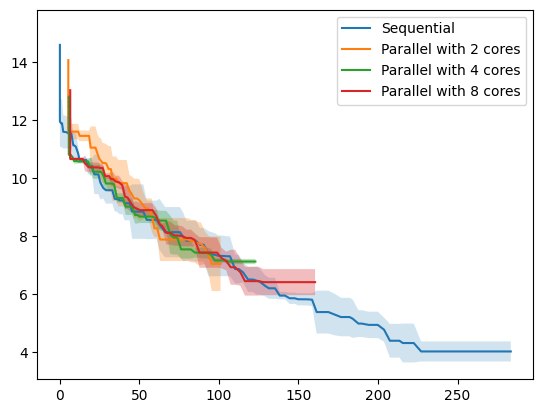

In [73]:
plt.plot(time_seq, mean_seq, label="Sequential")
plt.fill_between(time_seq, mean_seq - std_seq, mean_seq + std_seq, alpha=0.2)

plt.plot(time_2, mean_2, label="Parallel with 2 cores")
plt.fill_between(time_2, mean_2 - std_2, mean_2 + std_2, alpha=0.3)

plt.plot(time_4, mean_4, label="Parallel with 4 cores")
plt.fill_between(time_4, mean_4 - std_4, mean_4 + std_4, alpha=0.3)

plt.plot(time_8, mean_8, label="Parallel with 8 cores")
plt.fill_between(time_8, mean_8 - std_8, mean_8 + std_8, alpha=0.3)

plt.legend()

In [116]:
import numpy as np
from matplotlib import pyplot as plt

result_4cores = np.array([
[12.743721367374933, 12.743721367374933, 12.743721367374933, 12.743721367374933, 12.743721367374933, 12.743721367374933, 12.561541839334621, 12.561541839334621, 12.561541839334621, 12.561541839334621, 12.561541839334621, 12.561541839334621, 12.561541839334621, 12.561541839334621, 12.561541839334621, 12.561541839334621, 12.561541839334621, 12.561541839334621, 12.561541839334621, 12.561541839334621, 12.561541839334621, 12.561541839334621, 12.561541839334621, 12.561541839334621, 12.561541839334621, 12.561541839334621, 12.561541839334621, 12.561541839334621, 12.561541839334621, 12.561541839334621, 12.561541839334621, 12.561541839334621, 12.561541839334621, 12.561541839334621, 12.561541839334621, 12.561541839334621, 12.561541839334621, 11.905352892248109, 11.905352892248109, 11.905352892248109, 11.905352892248109, 11.42354465937456, 11.42354465937456, 10.844002354564363, 8.192154067922685, 8.192154067922685, 8.192154067922685, 7.427681714607598, 7.427681714607598, 7.427681714607598, 7.427681714607598, 7.427681714607598, 7.427681714607598, 7.427681714607598, 6.304481090318891, 6.304481090318891, 6.304481090318891, 5.424653832424347, 5.29550202498007, 5.130409722749608, 5.130409722749608, 5.130409722749608, 5.130409722749608, 3.206301886701944, 3.206301886701944, 3.206301886701944, 3.206301886701944, 3.206301886701944, 3.206301886701944, 3.206301886701944, 3.206301886701944, 3.206301886701944, 3.206301886701944, 3.206301886701944, 3.206301886701944, 2.7133070792952307, 2.7133070792952307, 2.7133070792952307, 2.7133070792952307, 2.7133070792952307, 2.7133070792952307, 2.7133070792952307, 2.7133070792952307, 2.7133070792952307, 2.7133070792952307, 2.7133070792952307, 2.7133070792952307, 2.7133070792952307, 2.7133070792952307, 2.7133070792952307, 2.7133070792952307, 2.7133070792952307, 2.7133070792952307, 2.7133070792952307, 2.7133070792952307, 2.7133070792952307, 2.7133070792952307, 2.7133070792952307, 2.7133070792952307, 2.7133070792952307],
[5681.667, 5681.718, 5681.756, 5681.791, 5681.825, 5681.859, 5681.892, 5681.926, 5681.959, 5681.993, 5682.03, 5682.063, 5682.096, 5682.129, 5682.162, 5682.195, 5682.228, 5682.26, 5682.293, 5682.326, 5682.359, 5682.391, 5682.434, 5682.469, 5682.519, 5682.554, 5682.587, 5682.62, 5682.652, 5682.685, 5682.717, 5682.75, 5682.783, 5682.816, 5682.849, 5682.882, 5682.915, 5682.961, 5683.022, 5683.06, 6324.647, 7215.101, 7992.003, 9203.731, 10679.409, 11665.997, 12693.644, 14106.151, 15807.026, 17215.074, 18763.646, 19355.121, 19815.737, 21313.36, 22181.657, 22437.393, 24067.24, 26421.485, 28196.144, 30548.931, 32519.906, 34425.257, 36768.538, 39512.446, 41395.171, 41526.762, 43481.904, 45349.681, 46430.601, 48009.871, 60521.953, 63861.011, 68790.271, 69404.287, 77730.168, 85544.546, 86928.154, 91951.214, 100429.788, 122106.063, 122758.519, 129307.785, 145463.573, 150655.553, 153495.239, 159999.851, 171866.682, 177421.071, 178142.884, 184591.608, 186458.771, 187264.701, 190792.621, 191717.678, 192439.511, 195514.725, 200648.348, 202272.879, 211207.212, 212469.317],
[15.420368866795343, 14.746643256522889, 14.746643256522889, 13.27369387880718, 13.27369387880718, 13.27369387880718, 13.27369387880718, 13.27369387880718, 11.460282713546894, 11.460282713546894, 11.460282713546894, 11.460282713546894, 11.460282713546894, 11.460282713546894, 11.460282713546894, 11.460282713546894, 10.453027976159952, 10.453027976159952, 10.453027976159952, 10.453027976159952, 10.453027976159952, 10.453027976159952, 10.453027976159952, 10.453027976159952, 10.453027976159952, 10.453027976159952, 10.453027976159952, 10.453027976159952, 10.453027976159952, 10.453027976159952, 10.453027976159952, 10.453027976159952, 10.453027976159952, 10.453027976159952, 10.453027976159952, 10.453027976159952, 10.453027976159952, 10.453027976159952, 10.453027976159952, 10.453027976159952, 10.453027976159952, 10.453027976159952, 10.453027976159952, 10.453027976159952, 9.814485717574216, 9.814485717574216, 9.814485717574216, 9.814485717574216, 9.814485717574216, 9.814485717574216, 8.930151299760155, 8.930151299760155, 8.930151299760155, 8.930151299760155, 8.861655465069596, 8.57796743749028, 8.57796743749028, 8.57796743749028, 8.57796743749028, 8.57796743749028, 8.556376292157942, 8.017517501021583, 8.017517501021583, 8.017517501021583, 7.743987276783551, 7.652713489487114, 6.101870411892694, 6.101870411892694, 5.85897095757263, 5.85897095757263, 5.85897095757263, 4.88787585540878, 2.6631711055555845, 2.6631711055555845, 2.6631711055555845, 2.6631711055555845, 2.6631711055555845, 2.6631711055555845, 2.6631711055555845, 2.6631711055555845, 2.6631711055555845, 2.6631711055555845, 2.6631711055555845, 2.6631711055555845, 2.6631711055555845, 2.6631711055555845, 2.457808803266268, 2.457808803266268, 2.457808803266268, 2.457808803266268, 2.457808803266268, 2.457808803266268, 2.457808803266268, 2.457808803266268, 2.457808803266268, 2.457808803266268, 2.457808803266268, 2.457808803266268, 2.457808803266268, 2.457808803266268],
[5750.446, 5750.534, 5750.57, 5750.603, 5750.634, 5750.666, 5750.696, 5750.724, 5750.754, 5750.783, 5750.811, 5750.841, 5750.87, 5750.898, 5750.929, 5750.957, 5750.988, 5751.018, 5751.047, 5751.076, 5751.105, 5751.134, 5751.162, 5751.191, 5751.22, 5751.249, 5751.295, 5751.336, 5751.366, 5751.394, 5751.425, 5751.455, 5751.484, 5751.515, 5751.544, 5751.573, 5751.604, 5751.639, 5752.067, 5752.108, 6348.664, 7272.628, 8198.894, 9120.07, 10361.286, 10569.684, 10978.484, 12599.589, 13258.048, 13979.122, 15166.294, 16068.38, 16976.522, 17907.182, 18978.944, 20485.976, 21148.12, 21393.025, 23293.671, 23641.148, 25579.26, 26986.816, 28527.127, 29037.429, 31235.175, 33408.015, 36064.183, 38155.668, 41206.635, 42927.054, 56108.15, 61622.138, 69006.796, 72995.076, 78917.797, 80625.577, 87786.109, 88382.983, 98010.424, 104288.569, 108179.405, 116789.414, 118323.44, 127511.094, 140999.709, 141702.041, 154867.112, 160501.454, 164245.8, 165023.098, 165846.36, 180585.892, 195515.511, 199590.894, 215842.122, 216507.673, 228611.388, 237398.132, 240041.149, 240702.526],
[16.219149177872822, 14.22668412185331, 14.156461087958885, 14.004052801617725, 13.120831709024776, 13.120831709024776, 13.120831709024776, 13.120831709024776, 11.890716961190101, 11.890716961190101, 11.890716961190101, 11.890716961190101, 11.890716961190101, 11.890716961190101, 11.890716961190101, 11.890716961190101, 11.890716961190101, 11.890716961190101, 11.890716961190101, 11.607304270176302, 11.607304270176302, 11.607304270176302, 11.607304270176302, 11.607304270176302, 11.607304270176302, 11.607304270176302, 11.607304270176302, 11.607304270176302, 11.607304270176302, 11.607304270176302, 11.607304270176302, 11.607304270176302, 11.584330213236019, 11.584330213236019, 9.86723697229361, 9.86723697229361, 9.86723697229361, 9.86723697229361, 9.86723697229361, 9.86723697229361, 9.86723697229361, 9.051168691281365, 9.051168691281365, 9.051168691281365, 9.051168691281365, 9.051168691281365, 9.051168691281365, 9.051168691281365, 9.051168691281365, 9.051168691281365, 9.051168691281365, 9.051168691281365, 9.051168691281365, 9.051168691281365, 7.86024383304113, 7.86024383304113, 7.86024383304113, 7.86024383304113, 7.86024383304113, 7.7476190649237395, 6.693539048944192, 6.693539048944192, 4.282237893833813, 4.282237893833813, 4.282237893833813, 4.282237893833813, 4.282237893833813, 4.282237893833813, 4.282237893833813, 4.282237893833813, 4.282237893833813, 2.8254029040817135, 2.8254029040817135, 2.8254029040817135, 2.8254029040817135, 2.8254029040817135, 2.8254029040817135, 2.8254029040817135, 2.8254029040817135, 2.2412474150510424, 2.2412474150510424, 2.2412474150510424, 2.2412474150510424, 2.2412474150510424, 2.2412474150510424, 2.1751541007287227, 2.1751541007287227, 2.1751541007287227, 2.1751541007287227, 2.1751541007287227, 2.1751541007287227, 2.1751541007287227, 2.1751541007287227, 2.1751541007287227, 2.1751541007287227, 2.1751541007287227, 2.1751541007287227, 2.1751541007287227, 2.1751541007287227, 2.1751541007287227],
[5626.028, 5626.078, 5626.117, 5626.152, 5626.187, 5626.222, 5626.256, 5626.29, 5626.324, 5626.358, 5626.391, 5626.424, 5626.457, 5626.49, 5626.523, 5626.556, 5626.595, 5626.637, 5626.671, 5626.704, 5626.738, 5626.77, 5626.803, 5626.836, 5626.869, 5626.902, 5626.935, 5626.968, 5627.001, 5627.034, 5627.067, 5627.099, 5627.132, 5627.165, 5627.198, 5627.319, 5627.356, 5627.403, 5627.437, 5627.47, 6717.014, 7961.499, 9106.531, 9994.319, 10732.293, 12053.906, 13330.571, 14950.558, 16551.627, 18503.934, 19786.001, 21500.674, 23500.852, 23768.638, 26197.441, 26508.074, 27310.56, 28703.925, 30609.763, 32059.854, 34019.384, 37101.813, 39834.422, 40075.286, 43420.139, 45129.898, 47282.675, 50391.199, 52472.619, 54658.51, 62195.771, 68575.44, 70951.828, 72411.9, 73868.922, 82280.78, 115812.724, 125958.424, 128727.018, 136506.126, 139275.662, 142014.984, 148285.006, 159383.439, 160100.903, 167357.426, 179097.303, 183657.84, 190256.521, 195473.783, 220144.407, 227532.77, 230068.929, 230967.622, 239518.742, 240877.006, 245992.5, 246691.095, 251029.065, 258625.417],
[13.986943932250806, 13.986943932250806, 13.986943932250806, 13.986943932250806, 13.986943932250806, 13.300882335202953, 13.300882335202953, 13.028898890771295, 13.028898890771295, 13.028898890771295, 13.028898890771295, 13.028898890771295, 13.028898890771295, 13.028898890771295, 13.028898890771295, 10.94021060648309, 10.94021060648309, 10.94021060648309, 10.94021060648309, 10.94021060648309, 10.94021060648309, 10.94021060648309, 10.94021060648309, 10.94021060648309, 10.94021060648309, 10.94021060648309, 10.94021060648309, 10.94021060648309, 10.94021060648309, 10.94021060648309, 10.94021060648309, 10.94021060648309, 10.94021060648309, 10.94021060648309, 10.94021060648309, 10.94021060648309, 10.94021060648309, 10.94021060648309, 10.94021060648309, 10.94021060648309, 10.897322277530185, 10.897322277530185, 10.897322277530185, 10.897322277530185, 10.897322277530185, 10.897322277530185, 10.897322277530185, 10.897322277530185, 10.897322277530185, 10.897322277530185, 10.897322277530185, 10.897322277530185, 10.897322277530185, 10.897322277530185, 10.82532769406841, 10.82532769406841, 10.82532769406841, 10.82532769406841, 10.351870885710438, 10.351870885710438, 10.351870885710438, 10.351870885710438, 9.340724423704959, 9.074254392418021, 9.074254392418021, 9.074254392418021, 9.074254392418021, 9.074254392418021, 7.9389398700936855, 7.9389398700936855, 2.5487793088545634, 2.5487793088545634, 2.5487793088545634, 2.5487793088545634, 2.5487793088545634, 2.5487793088545634, 2.5487793088545634, 2.5487793088545634, 2.5487793088545634, 2.5487793088545634, 1.8728161617427088, 1.8728161617427088, 1.8728161617427088, 1.8728161617427088, 1.8728161617427088, 1.8728161617427088, 1.8728161617427088, 1.8728161617427088, 1.8728161617427088, 1.7152228218778522, 1.7152228218778522, 1.7152228218778522, 1.6861987991249525, 1.6861987991249525, 1.6861987991249525, 1.550921764198535, 1.550921764198535, 1.550921764198535, 1.550921764198535, 1.550921764198535],
[5740.015, 5740.066, 5740.104, 5740.138, 5740.172, 5740.206, 5740.24, 5740.273, 5740.306, 5740.34, 5740.373, 5740.406, 5740.439, 5740.48, 5740.515, 5740.549, 5740.582, 5740.615, 5740.648, 5740.699, 5740.73, 5740.762, 5740.794, 5740.825, 5740.857, 5740.889, 5740.921, 5740.952, 5740.983, 5741.015, 5741.047, 5741.078, 5741.11, 5741.141, 5741.173, 5741.205, 5741.236, 5741.268, 5741.3, 5741.443, 6187.179, 6918.587, 7509.567, 8308.397, 8818.455, 9680.988, 11005.348, 12473.234, 13426.415, 14822.31, 16003.198, 16182.831, 17239.391, 17617.222, 18331.708, 19120.619, 19519.015, 20940.927, 22547.445, 23946.164, 24667.474, 25926.594, 28209.863, 30672.559, 33020.343, 33935.219, 34885.227, 37504.221, 39266.17, 41116.462, 60019.952, 63928.99, 66281.437, 70727.623, 79006.823, 83937.287, 92882.947, 96593.435, 97244.981, 109452.881, 123417.498, 145851.404, 157927.884, 173632.982, 189525.253, 191192.885, 205214.867, 219156.487, 230306.534, 248525.6, 262556.512, 275270.368, 287100.396, 300925.825, 319259.778, 337421.309, 339466.591, 341386.529, 353381.613, 367658.881],
[14.331536405886473, 13.04734731819557, 13.04734731819557, 12.143663237641679, 12.143663237641679, 12.143663237641679, 12.143663237641679, 10.896728360047057, 10.896728360047057, 10.896728360047057, 10.896728360047057, 10.896728360047057, 10.896728360047057, 10.896728360047057, 10.896728360047057, 10.896728360047057, 10.896728360047057, 10.896728360047057, 10.896728360047057, 10.896728360047057, 10.896728360047057, 10.896728360047057, 10.896728360047057, 10.896728360047057, 10.896728360047057, 10.896728360047057, 10.896728360047057, 10.896728360047057, 10.896728360047057, 10.896728360047057, 10.896728360047057, 10.896728360047057, 10.896728360047057, 10.896728360047057, 10.896728360047057, 10.896728360047057, 10.896728360047057, 10.213225137000771, 10.213225137000771, 10.213225137000771, 10.213225137000771, 10.213225137000771, 9.746172979363086, 8.605575888040848, 8.605575888040848, 8.605575888040848, 8.516659165683322, 8.516659165683322, 8.516659165683322, 6.522509614540663, 6.522509614540663, 5.813040026961158, 5.813040026961158, 5.813040026961158, 5.795353584017359, 5.795353584017359, 5.795353584017359, 5.607216864025162, 5.607216864025162, 5.607216864025162, 5.349062743976294, 5.349062743976294, 4.7911433533556185, 4.7911433533556185, 4.7911433533556185, 4.7911433533556185, 4.348491775573201, 4.348491775573201, 4.348491775573201, 4.348491775573201, 4.348491775573201, 4.348491775573201, 4.060375555511449, 3.302185247142735, 2.484115518557371, 2.484115518557371, 2.484115518557371, 2.484115518557371, 2.484115518557371, 2.484115518557371, 2.484115518557371, 2.484115518557371, 2.484115518557371, 2.484115518557371, 2.484115518557371, 2.484115518557371, 2.484115518557371, 2.484115518557371, 2.484115518557371, 2.484115518557371, 2.484115518557371, 2.484115518557371, 2.484115518557371, 2.4755284971347042, 2.4755284971347042, 2.4755284971347042, 2.4755284971347042, 2.4755284971347042, 2.4755284971347042, 2.4755284971347042],
[6054.092, 6054.151, 6054.194, 6054.233, 6054.271, 6054.308, 6054.345, 6054.381, 6054.417, 6054.453, 6054.489, 6054.524, 6054.56, 6054.595, 6054.631, 6054.667, 6054.715, 6054.755, 6054.792, 6054.827, 6054.863, 6054.899, 6054.935, 6054.971, 6055.007, 6055.042, 6055.078, 6055.114, 6055.149, 6055.185, 6055.221, 6055.256, 6055.292, 6055.328, 6055.364, 6055.399, 6055.434, 6055.47, 6055.616, 6055.662, 6905.859, 8013.82, 9486.32, 10462.063, 11161.079, 12296.62, 14081.98, 15939.682, 17679.29, 18945.587, 20556.955, 21641.829, 21938.662, 24109.953, 25153.298, 25457.21, 27833.758, 29802.144, 31919.668, 33811.979, 36796.777, 40251.428, 43680.065, 44302.644, 45553.203, 46805.937, 48369.365, 48533.566, 50819.497, 53978.465, 60823.813, 66178.001, 78305.376, 85496.799, 92869.474, 102887.071, 105599.622, 116135.333, 124969.643, 136413.205, 145179.185, 154829.162, 160837.928, 162572.633, 166278.663, 177027.666, 183750.438, 184474.109, 186407.913, 189527.16, 190360.453, 195688.806, 201225.683, 208734.216, 214881.197, 216060.581, 220906.653, 227309.602, 228920.306, 236536.891],
[15.227443220259786, 15.227443220259786, 13.470908846986696, 12.724669418658511, 12.724669418658511, 12.724669418658511, 12.19415131724583, 12.19415131724583, 12.19415131724583, 12.19415131724583, 12.19415131724583, 12.19415131724583, 12.19415131724583, 12.19415131724583, 12.19415131724583, 12.19415131724583, 12.19415131724583, 9.062775895276399, 9.062775895276399, 9.062775895276399, 9.062775895276399, 9.062775895276399, 9.062775895276399, 9.062775895276399, 9.062775895276399, 9.062775895276399, 9.062775895276399, 9.062775895276399, 9.062775895276399, 9.062775895276399, 9.062775895276399, 9.062775895276399, 9.062775895276399, 9.062775895276399, 9.062775895276399, 9.062775895276399, 9.062775895276399, 9.062775895276399, 9.062775895276399, 9.062775895276399, 9.062775895276399, 9.062775895276399, 9.062775895276399, 9.062775895276399, 9.062775895276399, 8.839833870515363, 8.274814583572482, 7.925318938866994, 7.925318938866994, 7.431881223677879, 7.431881223677879, 6.057460224257216, 6.057460224257216, 6.057460224257216, 6.057460224257216, 6.057460224257216, 6.057460224257216, 5.71697796765212, 5.71697796765212, 5.71697796765212, 5.71697796765212, 5.71697796765212, 5.1715767901246465, 5.1715767901246465, 5.1715767901246465, 5.1715767901246465, 5.1715767901246465, 5.0290613750291975, 5.0290613750291975, 5.0290613750291975, 3.395116945632545, 3.395116945632545, 3.395116945632545, 3.395116945632545, 3.395116945632545, 3.395116945632545, 3.395116945632545, 3.395116945632545, 3.395116945632545, 3.395116945632545, 3.395116945632545, 3.395116945632545, 3.395116945632545, 3.395116945632545, 3.395116945632545, 3.395116945632545, 3.2504151699468165, 3.2504151699468165, 3.2504151699468165, 3.2504151699468165, 3.2504151699468165, 3.2504151699468165, 3.2504151699468165, 3.2504151699468165, 3.2504151699468165, 3.2504151699468165, 3.2504151699468165, 3.2504151699468165, 3.2504151699468165, 3.2504151699468165],
[6009.956, 6010.037, 6010.082, 6010.121, 6010.159, 6010.197, 6010.234, 6010.271, 6010.331, 6010.4, 6010.443, 6010.481, 6010.519, 6010.555, 6010.592, 6010.628, 6010.665, 6010.717, 6010.758, 6010.794, 6010.84, 6010.902, 6010.941, 6010.977, 6011.013, 6011.05, 6011.086, 6011.121, 6011.157, 6011.194, 6011.23, 6011.266, 6011.302, 6011.338, 6011.374, 6011.41, 6011.446, 6011.482, 6011.623, 6011.662, 6670.106, 7462.902, 8123.282, 8708.888, 9241.497, 10305.755, 11354.945, 13034.143, 14717.0, 15859.993, 16231.565, 17834.934, 20927.106, 22860.892, 25557.677, 25959.15, 26325.54, 28137.686, 28590.709, 28907.302, 30201.804, 32982.671, 35633.235, 39120.812, 41638.615, 44231.972, 46526.819, 49611.718, 53404.058, 54210.527, 60580.051, 71624.382, 82054.732, 88371.156, 90927.101, 96960.831, 104392.904, 110801.718, 111520.981, 123317.193, 125177.921, 130188.692, 139248.666, 146608.797, 156388.591, 160920.626, 172204.743, 175145.589, 181903.793, 186229.803, 190280.19, 193822.497, 197873.577, 205289.575, 215691.42, 221075.358, 229076.451, 233274.051, 237411.422, 238972.25],
[16.33083726470831, 15.164811109081032, 13.81512323787398, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 11.282287571424318, 10.707026969112063, 10.707026969112063, 10.707026969112063, 10.707026969112063, 10.707026969112063, 10.707026969112063, 9.191577116391997, 9.191577116391997, 9.191577116391997, 9.072523066641832, 9.072523066641832, 9.072523066641832, 9.072523066641832, 7.62338677407322, 7.62338677407322, 7.62338677407322, 7.62338677407322, 6.044717178500257, 6.044717178500257, 6.044717178500257, 6.044717178500257, 6.044717178500257, 5.953422891804394, 5.953422891804394, 5.180304384051837, 5.180304384051837, 3.938674830164818, 3.938674830164818, 3.938674830164818, 3.938674830164818, 3.938674830164818, 3.4370065326340336, 3.4370065326340336, 3.4370065326340336, 3.4370065326340336, 3.4370065326340336, 3.4370065326340336, 3.4370065326340336, 3.1002739256400074, 3.1002739256400074, 2.3237398094697643, 2.3237398094697643, 2.3237398094697643, 2.3237398094697643, 2.3237398094697643, 2.3237398094697643, 2.135912654210419, 2.135912654210419, 2.135912654210419, 2.135912654210419, 2.135912654210419, 2.135912654210419, 2.135912654210419, 2.135912654210419, 2.135912654210419, 2.135912654210419, 2.135912654210419, 2.135912654210419],
[6066.699, 6066.769, 6066.812, 6066.851, 6066.889, 6066.926, 6066.963, 6067.0, 6067.036, 6067.073, 6067.11, 6067.146, 6067.182, 6067.219, 6067.255, 6067.291, 6067.327, 6067.363, 6067.399, 6067.435, 6067.471, 6067.506, 6067.542, 6067.577, 6067.614, 6067.65, 6067.685, 6067.721, 6067.756, 6067.792, 6067.828, 6067.863, 6067.898, 6067.934, 6067.97, 6068.006, 6068.041, 6068.077, 6068.113, 6068.279, 7036.665, 8153.866, 9519.109, 10022.928, 11358.512, 12506.674, 13325.478, 13569.908, 14913.807, 15696.254, 17496.121, 19492.858, 20378.6, 22106.808, 22486.729, 24313.718, 26050.11, 27750.726, 29414.127, 31293.886, 33958.581, 35596.71, 38719.22, 42590.156, 47098.871, 47423.872, 48298.961, 51262.681, 54198.114, 54665.383, 63608.169, 70792.769, 75893.995, 84009.405, 90115.4, 97436.517, 98210.875, 105031.325, 115222.069, 124784.05, 133319.322, 140140.296, 144616.048, 148826.592, 158058.545, 167670.215, 169470.463, 181614.927, 196815.052, 197718.186, 210859.787, 211596.834, 212334.879, 224283.503, 230304.784, 230994.139, 237745.969, 244212.198, 244953.565, 251200.59],
[14.869770247740771, 14.869770247740771, 13.039094191511767, 13.039094191511767, 13.039094191511767, 13.039094191511767, 13.039094191511767, 13.039094191511767, 13.039094191511767, 12.710187718398977, 12.710187718398977, 12.710187718398977, 12.710187718398977, 12.710187718398977, 12.710187718398977, 12.710187718398977, 12.710187718398977, 12.710187718398977, 12.710187718398977, 12.710187718398977, 12.710187718398977, 12.710187718398977, 12.150447841232559, 12.150447841232559, 12.150447841232559, 12.077127415552164, 12.077127415552164, 12.077127415552164, 12.077127415552164, 11.486940635753518, 11.486940635753518, 11.486940635753518, 11.486940635753518, 11.486940635753518, 11.486940635753518, 11.486940635753518, 11.486940635753518, 11.486940635753518, 11.486940635753518, 11.486940635753518, 11.124681662664182, 11.124681662664182, 11.124681662664182, 11.124681662664182, 10.955297968430129, 10.955297968430129, 9.950761577612575, 9.950761577612575, 9.950761577612575, 9.950761577612575, 9.41812808203811, 9.104234833641277, 9.104234833641277, 9.104234833641277, 9.104234833641277, 9.104234833641277, 7.835148761428654, 7.835148761428654, 7.835148761428654, 6.387378327428426, 6.387378327428426, 6.387378327428426, 6.387378327428426, 5.698836104737246, 5.698836104737246, 5.645236070538537, 5.009457407343145, 5.009457407343145, 4.954310694677162, 4.954310694677162, 4.138441264656976, 4.138441264656976, 3.397997920712133, 3.397997920712133, 3.397997920712133, 3.397997920712133, 3.2950602929590755, 3.2950602929590755, 3.2950602929590755, 3.072535153059239, 3.072535153059239, 3.072535153059239, 3.072535153059239, 3.072535153059239, 3.072535153059239, 3.072535153059239, 3.072535153059239, 3.072535153059239, 2.9648716248512454, 2.9648716248512454, 2.9648716248512454, 2.9648716248512454, 2.9648716248512454, 2.9648716248512454, 2.9648716248512454, 2.9648716248512454, 2.8441845170783364, 2.8441845170783364, 2.8441845170783364, 2.4559248222353607],
[6119.393, 6119.488, 6119.557, 6119.637, 6119.715, 6119.793, 6119.862, 6119.932, 6120.002, 6120.075, 6120.152, 6120.229, 6120.308, 6120.387, 6120.465, 6120.541, 6120.617, 6120.694, 6120.769, 6120.845, 6120.922, 6120.997, 6121.074, 6121.154, 6121.233, 6121.312, 6121.391, 6121.464, 6121.54, 6121.616, 6121.695, 6121.776, 6121.858, 6121.94, 6122.019, 6122.098, 6122.177, 6122.498, 6122.585, 6122.659, 6992.839, 7544.173, 8250.467, 8882.214, 10033.087, 10262.959, 11013.713, 12469.846, 13838.294, 15006.306, 16076.621, 17945.919, 18447.281, 20719.997, 23017.052, 23785.991, 25850.855, 27320.235, 28116.579, 30322.058, 32652.457, 35870.758, 38308.493, 40795.48, 43052.523, 44799.376, 47194.967, 49552.163, 51953.594, 54431.512, 63864.109, 65428.279, 75894.61, 76724.644, 88252.768, 89655.92, 101631.567, 105498.065, 117163.818, 125756.274, 133385.027, 143133.796, 148798.8, 150656.823, 154673.46, 158824.25, 161476.795, 173151.96, 186407.511, 197755.572, 204546.209, 211699.13, 216702.064, 217653.98, 227169.259, 233732.737, 241718.157, 242382.96, 258506.39, 267373.369],
[15.707788603056105, 14.533675440055067, 12.945732269960066, 12.626974496328929, 12.626974496328929, 11.80367943779022, 11.80367943779022, 11.364760108975883, 11.364760108975883, 11.364760108975883, 11.364760108975883, 11.364760108975883, 11.364760108975883, 11.364760108975883, 11.364760108975883, 11.364760108975883, 11.364760108975883, 11.364760108975883, 11.364760108975883, 11.364760108975883, 11.364760108975883, 11.364760108975883, 11.364760108975883, 11.364760108975883, 11.364760108975883, 11.364760108975883, 11.364760108975883, 11.364760108975883, 11.364760108975883, 11.364760108975883, 11.364760108975883, 11.364760108975883, 11.364760108975883, 9.41261446916416, 9.41261446916416, 9.41261446916416, 9.41261446916416, 9.41261446916416, 9.41261446916416, 9.41261446916416, 9.142638702267842, 9.142638702267842, 9.142638702267842, 9.142638702267842, 9.142638702267842, 9.142638702267842, 9.142638702267842, 9.142638702267842, 9.142638702267842, 9.116808432895, 7.745073521851426, 7.745073521851426, 7.745073521851426, 7.745073521851426, 7.745073521851426, 7.745073521851426, 5.434814249552254, 3.5135849518485647, 3.5135849518485647, 3.5135849518485647, 3.5135849518485647, 3.5135849518485647, 3.5135849518485647, 3.5135849518485647, 3.5135849518485647, 3.5135849518485647, 3.5135849518485647, 3.5135849518485647, 3.4946110224190083, 3.4946110224190083, 3.270135591084838, 2.3350414355617564, 2.3350414355617564, 2.3350414355617564, 2.3350414355617564, 2.3350414355617564, 2.3350414355617564, 2.3350414355617564, 2.3350414355617564, 2.3350414355617564, 2.3350414355617564, 2.3350414355617564, 2.3350414355617564, 2.3350414355617564, 2.3350414355617564, 2.3350414355617564, 2.3350414355617564, 2.3350414355617564, 2.3350414355617564, 2.3350414355617564, 2.3350414355617564, 1.9808824923433943, 1.9808824923433943, 1.9808824923433943, 1.9808824923433943, 1.9808824923433943, 1.9808824923433943, 1.9808824923433943, 1.9808824923433943, 1.9808824923433943],
[5869.591, 5869.656, 5869.701, 5869.742, 5869.782, 5869.822, 5869.862, 5869.9, 5869.938, 5869.977, 5870.015, 5870.053, 5870.091, 5870.129, 5870.166, 5870.204, 5870.244, 5870.282, 5870.319, 5870.357, 5870.395, 5870.433, 5870.471, 5870.509, 5870.547, 5870.586, 5870.625, 5870.662, 5870.699, 5870.737, 5870.775, 5870.813, 5870.851, 5870.891, 5870.934, 5870.995, 5871.409, 5871.455, 5871.501, 5871.549, 6931.392, 7667.962, 8792.914, 10234.338, 11257.478, 12795.547, 13367.422, 14278.971, 14535.022, 16275.771, 17855.862, 19301.619, 19598.318, 20248.172, 22361.202, 23890.842, 25806.817, 29548.161, 31901.018, 36015.369, 37980.4, 39859.915, 40203.899, 42905.871, 46650.85, 50321.512, 53925.484, 56771.381, 59977.104, 60373.293, 71188.246, 81448.815, 87596.3, 89174.036, 94215.771, 95994.505, 97797.83, 101858.469, 114184.235, 116015.419, 116810.062, 125005.471, 127891.712, 130683.332, 135792.673, 137482.573, 145600.2, 147376.952, 159182.348, 161645.177, 166616.912, 175767.708, 178375.929, 189724.584, 190515.97, 193326.453, 197143.935, 200955.294, 207215.353, 212006.781],
[13.648226057357375, 13.648226057357375, 13.648226057357375, 13.648226057357375, 13.648226057357375, 13.648226057357375, 13.648226057357375, 13.648226057357375, 13.648226057357375, 12.340233819816312, 12.340233819816312, 12.340233819816312, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.125617353839417, 12.039062159706285, 12.039062159706285, 12.039062159706285, 12.039062159706285, 11.959141574798663, 10.73489762087992, 10.73489762087992, 10.73489762087992, 10.73489762087992, 9.181887459197224, 9.181887459197224, 9.181887459197224, 9.120368157030473, 8.789424843745394, 8.789424843745394, 8.789424843745394, 8.789424843745394, 8.789424843745394, 7.016675224443238, 7.016675224443238, 7.016675224443238, 6.543386277051372, 6.5172748909590545, 6.5172748909590545, 4.900197310737109, 4.900197310737109, 2.0041157425584193, 2.0041157425584193, 2.0041157425584193, 2.0041157425584193, 2.0041157425584193, 2.0041157425584193, 2.0041157425584193, 2.0041157425584193, 2.0041157425584193, 2.0041157425584193, 2.0041157425584193, 2.0041157425584193, 2.0041157425584193, 2.0041157425584193, 2.0041157425584193, 2.0041157425584193, 2.0041157425584193, 2.0041157425584193, 2.0041157425584193, 2.0041157425584193, 2.0041157425584193, 2.0041157425584193, 2.0041157425584193, 2.0041157425584193, 2.0041157425584193, 2.0041157425584193, 2.0041157425584193, 2.0041157425584193],
[5904.511, 5904.576, 5904.625, 5904.671, 5904.716, 5904.76, 5904.809, 5904.852, 5904.895, 5904.94, 5904.983, 5905.026, 5905.068, 5905.111, 5905.153, 5905.196, 5905.238, 5905.285, 5905.326, 5905.369, 5905.411, 5905.453, 5905.495, 5905.538, 5905.58, 5905.623, 5905.666, 5905.708, 5905.752, 5905.797, 5905.839, 5905.882, 5905.925, 5905.968, 5906.011, 5906.053, 5906.095, 5906.137, 5906.18, 5906.222, 7055.577, 7443.851, 8575.561, 9448.43, 10635.223, 11405.989, 12901.313, 13838.449, 14962.84, 16021.5, 17649.305, 18627.557, 18868.086, 19577.25, 19830.168, 21752.889, 23293.131, 25137.398, 27984.975, 30520.532, 31132.974, 31496.803, 32564.196, 35763.801, 38726.248, 40315.268, 43065.095, 46053.224, 48673.976, 52223.566, 65258.018, 66766.846, 74735.516, 78481.543, 82547.482, 90995.542, 93612.221, 96267.272, 101178.487, 112778.64, 114314.483, 119114.061, 122312.272, 131293.015, 143530.542, 145249.137, 147143.287, 154226.271, 157348.577, 163179.106, 170710.497, 174802.562, 176279.768, 181671.878, 184347.43, 193404.099, 202241.028, 205127.072, 213218.417, 218052.156],
[16.396125243640967, 14.61217522888158, 14.61217522888158, 13.640332730068051, 13.640332730068051, 13.182767591664444, 13.182767591664444, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.925670192319249, 9.302697653661072, 9.302697653661072, 9.302697653661072, 9.302697653661072, 9.302697653661072, 9.302697653661072, 9.302697653661072, 9.302697653661072, 9.302697653661072, 9.302697653661072, 7.263084182885825, 7.263084182885825, 7.263084182885825, 7.263084182885825, 7.263084182885825, 7.263084182885825, 7.263084182885825, 6.581790867095698, 6.581790867095698, 6.392368555705904, 6.392368555705904, 6.392368555705904, 6.392368555705904, 5.298169310673774, 4.662949142949461, 4.662949142949461, 4.662949142949461, 4.662949142949461, 3.593626187418089, 3.593626187418089, 3.593626187418089, 3.593626187418089, 3.593626187418089, 3.593626187418089, 3.593626187418089, 3.593626187418089, 3.593626187418089, 3.0324330330056317, 3.0324330330056317, 3.0324330330056317, 3.0324330330056317, 3.0324330330056317, 3.0324330330056317, 3.0324330330056317, 3.0324330330056317, 3.0324330330056317, 3.0324330330056317, 3.0324330330056317, 3.0324330330056317, 3.0324330330056317, 2.675108553817769, 2.675108553817769, 2.675108553817769, 2.675108553817769],
[5867.701, 5867.771, 5867.819, 5867.861, 5867.902, 5867.942, 5867.983, 5868.022, 5868.062, 5868.101, 5868.14, 5868.179, 5868.217, 5868.256, 5868.295, 5868.333, 5868.371, 5868.409, 5868.447, 5868.485, 5868.523, 5868.561, 5868.599, 5868.637, 5868.676, 5868.715, 5868.753, 5868.791, 5868.829, 5868.868, 5868.906, 5868.946, 5868.985, 5869.023, 5869.062, 5869.099, 5869.139, 5869.177, 5869.417, 5869.462, 6809.287, 8170.478, 8572.215, 10147.653, 10744.459, 11741.496, 13683.858, 15381.888, 16030.536, 18663.425, 19039.728, 21826.996, 22425.962, 23176.604, 23784.659, 24840.892, 27813.814, 30723.596, 31865.977, 32528.681, 32972.18, 34374.152, 38523.073, 41285.113, 41586.664, 43929.126, 46175.489, 47181.945, 49539.427, 52311.327, 70775.302, 75137.465, 77833.716, 80351.976, 87589.014, 92711.952, 105072.409, 109477.852, 114480.295, 116037.693, 117368.07, 121309.772, 123226.08, 134641.525, 149731.137, 155280.633, 165235.145, 167782.287, 170944.912, 176570.734, 178279.481, 183707.367, 189389.454, 193630.656, 201198.99, 203897.592, 213327.233, 218306.129, 228067.137, 228809.338],
[14.03516202126639, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.305495255971705, 11.273823583864818, 11.273823583864818, 11.273823583864818, 9.854706160557802, 9.854706160557802, 9.854706160557802, 9.854706160557802, 9.854706160557802, 9.854706160557802, 9.854706160557802, 9.854706160557802, 9.854706160557802, 7.965600659506789, 7.965600659506789, 7.965600659506789, 7.965600659506789, 7.794937964588701, 7.794937964588701, 7.794937964588701, 5.786100384680225, 5.786100384680225, 5.786100384680225, 5.786100384680225, 5.786100384680225, 4.06110959343475, 4.06110959343475, 4.06110959343475, 4.06110959343475, 4.06110959343475, 4.06110959343475, 4.06110959343475, 4.06110959343475, 3.000471178004102, 3.000471178004102, 3.000471178004102, 3.000471178004102, 3.000471178004102, 2.905278440933938, 2.905278440933938, 2.905278440933938, 2.905278440933938, 2.76300769594387, 2.76300769594387, 2.76300769594387, 2.76300769594387, 2.7422258008313105, 2.7422258008313105, 2.7422258008313105, 2.7422258008313105, 2.7422258008313105, 2.7422258008313105, 2.7422258008313105, 2.7422258008313105, 2.7422258008313105, 2.7422258008313105, 2.7422258008313105, 2.7422258008313105, 2.7422258008313105, 2.7422258008313105, 2.7422258008313105, 2.7422258008313105, 2.7422258008313105],
[5804.112, 5804.17, 5804.215, 5804.257, 5804.298, 5804.338, 5804.377, 5804.416, 5804.455, 5804.495, 5804.534, 5804.572, 5804.61, 5804.65, 5804.688, 5804.727, 5804.765, 5804.806, 5804.845, 5804.884, 5804.932, 5804.971, 5805.008, 5805.046, 5805.103, 5805.142, 5805.181, 5805.219, 5805.258, 5805.297, 5805.336, 5805.374, 5805.412, 5805.451, 5805.49, 5805.529, 5805.569, 5805.607, 5805.651, 5805.692, 6720.341, 8041.421, 9475.211, 10546.181, 12126.793, 13489.07, 15692.595, 17438.629, 19658.906, 20150.637, 22045.604, 23974.319, 24321.3, 24609.487, 26351.362, 27663.818, 28385.712, 30030.243, 32976.752, 33460.382, 34225.128, 35296.695, 37161.754, 37513.506, 41056.094, 43738.618, 46442.651, 50124.089, 53812.254, 55835.698, 76543.62, 78017.776, 88704.284, 92751.353, 96779.9, 106357.645, 110277.782, 115232.125, 118090.671, 130898.354, 131680.947, 133658.532, 140582.337, 149756.232, 174763.689, 176410.347, 181968.204, 187892.953, 189587.657, 193725.796, 196302.7, 202105.604, 205041.029, 213639.583, 217141.181, 226183.315, 228353.164, 231563.114, 233816.493, 237404.135],
])

end_time_4 = np.array([368612.249, 272922.009, 251152.96])
end_result_4 = np.array([1.550921764198535, 2.135912654210419, 1.4141462273307543])

In [117]:
import numpy as np
from matplotlib import pyplot as plt

result_8cores = np.array([
[15.004098829575865, 14.318860803047924, 14.318860803047924, 14.318860803047924, 14.318860803047924, 14.318860803047924, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 10.155314555855139, 9.737782175182836, 9.737782175182836, 9.737782175182836, 9.737782175182836, 9.737782175182836, 9.737782175182836, 9.737782175182836, 9.737782175182836, 9.737782175182836, 9.047872669600316, 9.047872669600316, 9.047872669600316, 8.435254473369286, 8.435254473369286, 8.435254473369286, 8.424753056746638, 8.424753056746638, 8.04185579309113, 8.04185579309113, 7.683998646498955, 7.683998646498955, 7.683998646498955, 7.604173556925568, 7.604173556925568, 7.604173556925568, 7.604173556925568, 7.604173556925568, 6.338618158813546, 6.338618158813546, 6.338618158813546, 5.045147662781151, 5.045147662781151, 5.045147662781151, 4.307081159606028, 2.4668953967379577, 2.4668953967379577, 2.4668953967379577, 2.4668953967379577, 2.4668953967379577, 2.4668953967379577, 2.4668953967379577, 2.4668953967379577, 2.4668953967379577, 2.4668953967379577, 2.4668953967379577, 2.4668953967379577, 2.4668953967379577, 2.4668953967379577, 2.4668953967379577, 2.4668953967379577, 2.4668953967379577, 2.4668953967379577, 2.4668953967379577, 2.4668953967379577, 2.4668953967379577, 2.4668953967379577, 2.4668953967379577, 2.15122073544573, 2.15122073544573, 2.15122073544573],
[6051.536, 6051.59, 6051.629, 6051.665, 6051.7, 6051.734, 6051.768, 6051.803, 6051.837, 6051.872, 6051.906, 6051.939, 6051.973, 6052.006, 6052.04, 6052.073, 6052.107, 6052.14, 6052.173, 6052.207, 6052.24, 6052.273, 6052.306, 6052.339, 6052.373, 6052.406, 6052.439, 6052.472, 6052.506, 6052.54, 6052.573, 6052.607, 6052.641, 6052.675, 6052.729, 6052.762, 6052.794, 6052.826, 6052.859, 6052.896, 6846.681, 7543.067, 8671.621, 9814.643, 10904.297, 12186.185, 12791.729, 13122.71, 13340.912, 14095.235, 14470.9, 16340.936, 18442.145, 20476.721, 21949.464, 23663.457, 26108.594, 29828.537, 31106.151, 33435.37, 33991.033, 36387.244, 38617.303, 39793.111, 43312.415, 45229.796, 46162.707, 47548.69, 48917.831, 51040.617, 70809.347, 77776.84, 88750.647, 100145.516, 117753.277, 127483.34, 134203.787, 137028.895, 164829.969, 172242.671, 176800.69, 197203.82, 223751.421, 231634.096, 259087.424, 280977.034, 285588.131, 302825.718, 325572.984, 342751.999, 381168.992, 385959.343, 390460.19, 402786.563, 431503.448, 433948.795, 446032.895, 459313.113, 461478.247, 481076.629],
[15.160798886021059, 13.869277662813932, 13.869277662813932, 13.869277662813932, 13.869277662813932, 12.161907230789117, 12.161907230789117, 11.837228075060876, 11.837228075060876, 11.837228075060876, 11.837228075060876, 11.837228075060876, 11.837228075060876, 11.837228075060876, 11.837228075060876, 11.837228075060876, 11.837228075060876, 11.837228075060876, 11.837228075060876, 11.837228075060876, 11.165131933343348, 11.165131933343348, 11.165131933343348, 11.165131933343348, 11.165131933343348, 11.165131933343348, 11.165131933343348, 11.165131933343348, 11.165131933343348, 11.165131933343348, 11.165131933343348, 11.165131933343348, 11.165131933343348, 11.165131933343348, 11.165131933343348, 11.165131933343348, 11.165131933343348, 11.165131933343348, 11.165131933343348, 11.165131933343348, 11.165131933343348, 10.713920789260198, 10.713920789260198, 10.713920789260198, 10.713920789260198, 10.381610522127888, 9.318624774906636, 9.22222633560841, 9.22222633560841, 9.138368083875315, 7.039095860938955, 7.039095860938955, 7.039095860938955, 6.752715501428584, 6.752715501428584, 6.628579141410846, 6.353211605955483, 6.353211605955483, 5.501576262196469, 5.501576262196469, 5.501576262196469, 5.501576262196469, 5.501576262196469, 5.501576262196469, 5.501576262196469, 5.501576262196469, 5.501576262196469, 4.835268428303021, 4.791451197312085, 4.791451197312085, 4.791451197312085, 4.791451197312085, 3.42890366196421, 2.7485432798377905, 2.7485432798377905, 2.7485432798377905, 2.7485432798377905, 2.7485432798377905, 2.7485432798377905, 2.7485432798377905, 2.3056618678237624, 2.3056618678237624, 2.3056618678237624, 2.3056618678237624, 2.3056618678237624, 2.3056618678237624, 2.3056618678237624, 2.3056618678237624, 2.3056618678237624, 2.3056618678237624, 2.3056618678237624, 2.3056618678237624, 2.3056618678237624, 2.3056618678237624, 2.3056618678237624, 2.3056618678237624, 2.3056618678237624, 2.3056618678237624, 2.3056618678237624, 2.3056618678237624],
[6024.826, 6024.881, 6024.921, 6024.957, 6024.992, 6025.027, 6025.061, 6025.096, 6025.13, 6025.164, 6025.198, 6025.232, 6025.266, 6025.301, 6025.335, 6025.369, 6025.405, 6025.438, 6025.471, 6025.505, 6025.539, 6025.575, 6025.608, 6025.643, 6025.677, 6025.711, 6025.745, 6025.779, 6025.813, 6025.847, 6025.904, 6025.939, 6025.974, 6026.009, 6026.044, 6026.079, 6026.114, 6026.148, 6026.277, 6026.316, 7029.128, 8417.16, 9189.365, 9402.143, 10508.34, 11576.383, 12321.533, 14326.607, 15605.616, 17054.496, 18768.358, 20590.747, 22685.071, 24658.765, 27302.806, 28610.7, 30903.323, 34222.357, 36633.552, 40179.312, 43067.926, 43434.508, 43590.535, 44037.313, 47735.857, 47922.123, 48997.376, 50399.665, 54158.093, 56143.627, 71263.735, 73653.886, 92191.012, 115604.329, 134744.062, 144365.105, 149322.117, 167181.897, 169578.421, 184035.662, 210168.731, 219234.571, 229124.489, 250082.519, 274097.035, 276700.339, 305592.43, 323446.236, 331506.857, 353770.589, 356261.067, 378180.26, 391583.962, 410135.2, 423176.904, 443440.396, 445941.835, 450938.864, 466738.121, 487146.843],
[14.5568095077593, 14.5568095077593, 14.22467258705751, 14.22467258705751, 14.074647200973402, 14.074647200973402, 12.966388395488744, 12.966388395488744, 10.620902269927278, 10.620902269927278, 10.360736122593286, 10.360736122593286, 10.360736122593286, 10.360736122593286, 10.360736122593286, 10.360736122593286, 10.360736122593286, 10.360736122593286, 10.360736122593286, 10.360736122593286, 10.360736122593286, 10.360736122593286, 10.360736122593286, 10.360736122593286, 10.360736122593286, 10.360736122593286, 10.360736122593286, 10.360736122593286, 10.360736122593286, 10.360736122593286, 10.360736122593286, 10.360736122593286, 10.360736122593286, 10.360736122593286, 10.360736122593286, 10.360736122593286, 10.360736122593286, 10.360736122593286, 10.360736122593286, 10.360736122593286, 8.726028142505502, 8.726028142505502, 8.726028142505502, 8.726028142505502, 8.726028142505502, 8.726028142505502, 8.726028142505502, 8.726028142505502, 8.726028142505502, 8.726028142505502, 8.726028142505502, 8.694524219543977, 7.290551498641715, 7.290551498641715, 7.290551498641715, 7.290551498641715, 7.290551498641715, 6.975414071778209, 4.612573919905923, 4.612573919905923, 4.612573919905923, 4.547390806435143, 4.3473554443300095, 4.089135299484624, 4.0579696037823645, 4.0579696037823645, 4.0579696037823645, 4.0579696037823645, 4.005843220886469, 4.005843220886469, 4.005843220886469, 4.005843220886469, 4.005843220886469, 4.005843220886469, 4.005843220886469, 4.005843220886469, 2.416802387609039, 2.416802387609039, 2.416802387609039, 2.416802387609039, 2.416802387609039, 2.416802387609039, 2.416802387609039, 2.416802387609039, 2.416802387609039, 2.416802387609039, 2.416802387609039, 2.416802387609039, 2.416802387609039, 2.416802387609039, 2.416802387609039, 2.416802387609039, 2.416802387609039, 2.416802387609039, 2.416802387609039, 2.416802387609039, 2.416802387609039, 1.7926063638983334, 1.7926063638983334, 1.7926063638983334],
[6063.732, 6063.784, 6063.824, 6063.86, 6063.916, 6063.951, 6063.985, 6064.019, 6064.052, 6064.094, 6064.127, 6064.16, 6064.193, 6064.226, 6064.259, 6064.292, 6064.325, 6064.359, 6064.391, 6064.424, 6064.456, 6064.489, 6064.521, 6064.555, 6064.59, 6064.624, 6064.657, 6064.691, 6064.724, 6064.757, 6064.79, 6064.823, 6064.856, 6064.89, 6064.922, 6064.955, 6064.989, 6065.178, 6065.22, 6065.254, 7104.205, 9100.199, 10418.286, 11290.178, 11947.49, 13030.799, 13799.698, 15234.106, 16084.915, 18291.253, 18749.475, 20313.715, 21485.692, 23661.027, 24390.891, 26719.999, 27056.972, 29168.27, 33441.712, 36416.319, 38772.115, 41401.51, 44553.502, 47687.76, 51255.896, 52147.705, 55246.585, 58103.407, 61245.3, 64414.18, 69058.314, 74150.201, 87385.727, 94139.508, 109873.067, 119120.252, 144290.329, 167788.709, 190140.097, 199031.237, 227488.797, 248005.72, 258147.812, 275584.855, 300954.935, 306026.279, 324358.732, 344660.144, 348423.28, 365210.031, 377933.895, 380513.072, 401300.471, 420435.891, 432612.022, 439844.106, 447923.924, 480889.027, 487779.869, 507605.646],
[12.784673019059383, 12.755249243673596, 12.755249243673596, 12.755249243673596, 12.755249243673596, 12.172360955742922, 12.172360955742922, 12.172360955742922, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 10.237038702888036, 9.7554932810048, 9.7554932810048, 9.7554932810048, 9.7554932810048, 9.7554932810048, 9.7554932810048, 9.7554932810048, 9.7554932810048, 8.919091381699412, 8.919091381699412, 7.501500768027043, 7.501500768027043, 7.501500768027043, 7.501500768027043, 7.501500768027043, 7.107620797354853, 6.994391632703094, 6.449584828029888, 6.449584828029888, 6.449584828029888, 6.449584828029888, 6.449584828029888, 5.646841294479806, 5.646841294479806, 5.550291401096953, 5.493883449466086, 5.493883449466086, 5.493883449466086, 3.116859975513347, 3.116859975513347, 3.116859975513347, 3.116859975513347, 3.116859975513347, 2.0192657003330052, 2.0192657003330052, 2.0192657003330052, 2.0192657003330052, 2.0192657003330052, 2.0192657003330052, 2.0192657003330052, 2.0192657003330052, 2.0192657003330052, 2.0192657003330052, 2.0192657003330052, 2.0192657003330052, 2.0192657003330052, 2.0192657003330052, 2.0192657003330052, 2.0192657003330052, 2.0192657003330052, 2.0192657003330052, 2.0192657003330052, 2.0192657003330052, 2.0192657003330052, 2.0192657003330052, 2.0192657003330052, 1.4530135110804676, 1.4530135110804676],
[6076.718, 6076.812, 6076.872, 6076.927, 6076.982, 6077.038, 6077.092, 6077.146, 6077.2, 6077.254, 6077.308, 6077.361, 6077.414, 6077.466, 6077.519, 6077.572, 6077.626, 6077.681, 6077.734, 6077.787, 6077.839, 6077.892, 6077.945, 6077.997, 6078.05, 6078.102, 6078.155, 6078.208, 6078.26, 6078.313, 6078.365, 6078.419, 6078.472, 6078.526, 6078.593, 6078.647, 6078.7, 6078.755, 6078.808, 6079.017, 6936.454, 7103.85, 7956.049, 10375.405, 11034.089, 11732.422, 12179.507, 12958.833, 13593.043, 14901.132, 16313.412, 17320.7, 19179.046, 19910.639, 21436.102, 22678.733, 24173.377, 25786.991, 27643.476, 29850.917, 30120.362, 33333.941, 34032.829, 35009.178, 37682.475, 39873.141, 41739.234, 44840.014, 48246.141, 51511.099, 83858.152, 87843.924, 94834.83, 113188.645, 115478.846, 141953.423, 163802.659, 171347.85, 179365.373, 187404.019, 207869.461, 213154.167, 236583.83, 250348.903, 252810.113, 272248.983, 276933.973, 279701.175, 310207.411, 317700.657, 342800.592, 368185.23, 406311.182, 419819.501, 422196.536, 457576.261, 470717.001, 484655.677, 508442.253, 518582.774],
[12.955046091762567, 12.955046091762567, 12.955046091762567, 12.955046091762567, 11.7085530331699, 11.7085530331699, 11.7085530331699, 11.7085530331699, 11.7085530331699, 11.7085530331699, 11.7085530331699, 11.7085530331699, 11.7085530331699, 11.7085530331699, 11.7085530331699, 11.7085530331699, 11.7085530331699, 11.7085530331699, 11.7085530331699, 11.7085530331699, 11.7085530331699, 11.452520011469517, 11.452520011469517, 11.452520011469517, 11.452520011469517, 11.452520011469517, 11.452520011469517, 11.452520011469517, 11.452520011469517, 11.452520011469517, 11.452520011469517, 11.452520011469517, 11.452520011469517, 11.452520011469517, 11.452520011469517, 11.452520011469517, 11.452520011469517, 11.452520011469517, 11.452520011469517, 11.452520011469517, 11.452520011469517, 11.452520011469517, 11.452520011469517, 11.284597705109105, 10.407563686015944, 10.407563686015944, 10.407563686015944, 10.407563686015944, 10.407563686015944, 10.407563686015944, 10.058902756023912, 10.058902756023912, 10.058902756023912, 8.5153342012046, 8.5153342012046, 7.7174506344367835, 7.7174506344367835, 7.7174506344367835, 7.7174506344367835, 7.7174506344367835, 7.7174506344367835, 7.7174506344367835, 7.7174506344367835, 7.67133859848758, 7.120765793740571, 7.120765793740571, 5.9175405579445055, 5.434027470994913, 5.434027470994913, 5.434027470994913, 5.434027470994913, 4.4333551512219955, 2.4158044863718655, 2.4158044863718655, 2.4158044863718655, 2.4158044863718655, 2.4158044863718655, 2.4158044863718655, 2.4158044863718655, 2.4158044863718655, 2.4158044863718655, 2.4158044863718655, 1.4457427430584322, 1.4457427430584322, 1.4457427430584322, 1.4457427430584322, 1.4457427430584322, 1.2518544707813963, 1.2518544707813963, 1.2518544707813963, 1.2518544707813963, 1.2518544707813963, 1.2518544707813963, 1.2518544707813963, 1.2518544707813963, 1.2518544707813963, 1.2518544707813963, 1.2518544707813963, 1.2518544707813963, 1.2518544707813963],
[6144.232, 6144.284, 6144.323, 6144.358, 6144.392, 6144.427, 6144.461, 6144.494, 6144.527, 6144.561, 6144.594, 6144.627, 6144.66, 6144.693, 6144.725, 6144.759, 6144.792, 6144.825, 6144.858, 6144.891, 6144.924, 6144.956, 6144.989, 6145.022, 6145.054, 6145.087, 6145.12, 6145.153, 6145.186, 6145.218, 6145.251, 6145.283, 6145.316, 6145.349, 6145.382, 6145.415, 6145.448, 6145.481, 6145.532, 6145.57, 7407.554, 8003.791, 8338.108, 9289.715, 10265.85, 10801.066, 11417.207, 12851.132, 13449.237, 14368.965, 15413.709, 15721.572, 17076.123, 18409.998, 20371.106, 22203.233, 22519.666, 24436.575, 26032.593, 27085.972, 27389.473, 28020.725, 29104.014, 30582.822, 31865.695, 34058.156, 36899.849, 39097.686, 41427.72, 42029.757, 69299.894, 83413.977, 104612.767, 109336.5, 125778.721, 135605.782, 151121.532, 155769.158, 184084.74, 193135.711, 199813.767, 209285.091, 235771.875, 246230.166, 264154.041, 284523.811, 291925.713, 307433.053, 311866.315, 316106.883, 326833.234, 382266.328, 409057.098, 435205.698, 445447.301, 480924.204, 499868.372, 519408.899, 521303.951, 527160.781],
[14.984884187624026, 14.984884187624026, 12.816823903999293, 12.816823903999293, 12.816823903999293, 12.816823903999293, 12.816823903999293, 12.816823903999293, 12.816823903999293, 12.816823903999293, 12.816823903999293, 12.816823903999293, 12.816823903999293, 12.816823903999293, 12.741301836424082, 12.252105866278942, 10.588024660430762, 10.588024660430762, 10.588024660430762, 10.588024660430762, 10.588024660430762, 10.588024660430762, 10.588024660430762, 10.588024660430762, 10.588024660430762, 10.588024660430762, 10.588024660430762, 10.588024660430762, 10.588024660430762, 10.588024660430762, 10.588024660430762, 10.588024660430762, 10.588024660430762, 10.588024660430762, 10.588024660430762, 10.588024660430762, 10.588024660430762, 10.588024660430762, 10.588024660430762, 10.588024660430762, 10.588024660430762, 10.588024660430762, 9.041677572659284, 9.041677572659284, 9.041677572659284, 9.041677572659284, 9.041677572659284, 9.041677572659284, 9.041677572659284, 9.041677572659284, 9.041677572659284, 8.33061649567134, 8.33061649567134, 8.238898946884827, 8.238898946884827, 8.238898946884827, 8.238898946884827, 6.848816157484528, 6.848816157484528, 6.848816157484528, 6.142427642694905, 6.142427642694905, 6.142427642694905, 5.431557183907003, 5.431557183907003, 5.431557183907003, 5.431557183907003, 5.431557183907003, 5.431557183907003, 4.792209707408592, 4.792209707408592, 4.792209707408592, 3.8546989990183858, 3.522637168983288, 3.2618797373193797, 3.2618797373193797, 3.2618797373193797, 1.7537184055392498, 1.7537184055392498, 1.7537184055392498, 1.7537184055392498, 1.7537184055392498, 1.7537184055392498, 1.7537184055392498, 1.7537184055392498, 1.7537184055392498, 1.7537184055392498, 1.7537184055392498, 1.7537184055392498, 1.7537184055392498, 1.7537184055392498, 1.7537184055392498, 1.7537184055392498, 1.7537184055392498, 1.7537184055392498, 1.7537184055392498, 1.7537184055392498, 1.7537184055392498, 1.7537184055392498, 1.7537184055392498],
[6078.484, 6078.538, 6078.61, 6078.652, 6078.689, 6078.727, 6078.763, 6078.798, 6078.834, 6078.869, 6078.905, 6078.94, 6078.975, 6079.011, 6079.047, 6079.082, 6079.118, 6079.154, 6079.19, 6079.225, 6079.26, 6079.295, 6079.33, 6079.364, 6079.399, 6079.433, 6079.468, 6079.503, 6079.538, 6079.572, 6079.607, 6079.644, 6079.678, 6079.713, 6079.747, 6079.782, 6079.816, 6079.851, 6079.995, 6080.032, 7106.3, 8612.563, 10017.995, 11939.466, 12757.343, 14152.326, 14915.242, 16194.74, 16709.75, 18534.846, 18794.484, 20063.099, 21939.869, 22863.812, 23245.392, 25151.31, 27753.976, 30329.789, 33857.0, 36261.03, 39427.24, 40744.432, 44433.746, 45703.787, 49586.166, 51648.604, 54539.857, 57805.28, 58069.644, 61272.055, 69287.031, 73962.785, 91946.88, 109705.864, 124661.224, 134894.848, 145700.269, 170720.132, 173133.743, 213283.658, 215745.618, 260256.165, 276745.101, 293017.465, 300531.188, 312504.431, 320183.781, 322548.803, 347497.552, 370382.673, 396595.945, 425932.946, 428256.745, 438757.041, 471607.971, 490207.857, 504076.307, 528485.351, 541114.1, 554216.507],
[10.375175287901657, 10.375175287901657, 10.375175287901657, 10.375175287901657, 10.375175287901657, 10.375175287901657, 10.375175287901657, 10.375175287901657, 10.375175287901657, 10.375175287901657, 10.375175287901657, 10.375175287901657, 10.375175287901657, 10.375175287901657, 10.375175287901657, 10.375175287901657, 10.375175287901657, 10.375175287901657, 10.375175287901657, 10.375175287901657, 10.375175287901657, 10.375175287901657, 10.375175287901657, 10.375175287901657, 10.375175287901657, 10.375175287901657, 9.769584470797472, 9.769584470797472, 9.769584470797472, 9.769584470797472, 9.769584470797472, 9.769584470797472, 9.769584470797472, 9.769584470797472, 9.769584470797472, 9.769584470797472, 9.769584470797472, 9.769584470797472, 9.769584470797472, 9.769584470797472, 9.769584470797472, 9.769584470797472, 9.769584470797472, 9.769584470797472, 9.769584470797472, 9.769584470797472, 9.11061145825591, 9.11061145825591, 8.694138158691011, 8.694138158691011, 8.694138158691011, 8.694138158691011, 7.617671354228227, 7.617671354228227, 7.617671354228227, 7.617671354228227, 7.582096891656855, 6.876072029721136, 6.876072029721136, 5.534410104990286, 5.534410104990286, 5.534410104990286, 5.534410104990286, 5.534410104990286, 5.534410104990286, 5.534410104990286, 4.092329837605735, 4.092329837605735, 4.092329837605735, 4.092329837605735, 4.092329837605735, 3.070375119546967, 3.070375119546967, 3.070375119546967, 2.5275422453305976, 2.5275422453305976, 2.5275422453305976, 2.5275422453305976, 2.5275422453305976, 2.5275422453305976, 2.436598162422922, 2.436598162422922, 2.436598162422922, 2.436598162422922, 2.436598162422922, 2.436598162422922, 2.436598162422922, 2.383342811518251, 2.383342811518251, 2.383342811518251, 2.383342811518251, 2.383342811518251, 2.383342811518251, 2.383342811518251, 2.383342811518251, 2.383342811518251, 2.383342811518251, 2.383342811518251, 2.383342811518251, 2.383342811518251],
[5835.508, 5835.615, 5835.689, 5835.758, 5835.824, 5835.894, 5835.962, 5836.025, 5836.092, 5836.162, 5836.225, 5836.282, 5836.344, 5836.407, 5836.47, 5836.533, 5836.602, 5836.664, 5836.727, 5836.798, 5836.855, 5836.919, 5836.984, 5837.05, 5837.121, 5837.185, 5837.256, 5837.317, 5837.382, 5837.443, 5837.508, 5837.568, 5837.637, 5837.699, 5837.777, 5837.835, 5837.879, 5837.919, 5837.959, 5837.999, 7036.584, 8372.341, 8889.034, 10082.215, 12096.471, 13231.583, 14638.343, 16215.925, 17266.794, 18623.43, 21442.536, 21766.261, 23879.176, 24757.452, 27085.538, 27781.952, 29991.975, 30853.794, 32511.214, 35796.556, 36269.977, 37289.351, 37572.891, 38015.605, 38366.429, 42589.69, 45941.277, 50145.082, 53114.08, 56747.727, 69074.621, 94488.276, 113446.369, 136719.232, 160214.254, 164581.112, 175052.088, 185902.159, 213723.463, 226749.119, 256215.985, 272431.039, 277343.092, 290682.645, 325540.484, 348406.377, 361125.24, 398629.004, 414344.507, 443857.132, 468429.883, 478131.539, 480628.861, 483225.544, 485349.18, 514779.898, 531485.418, 546495.473, 553956.726, 563288.325],
[14.431986556669404, 14.431986556669404, 11.46126136055951, 11.46126136055951, 11.46126136055951, 11.46126136055951, 11.46126136055951, 11.46126136055951, 11.46126136055951, 11.46126136055951, 11.46126136055951, 11.46126136055951, 11.46126136055951, 11.46126136055951, 11.46126136055951, 11.46126136055951, 11.46126136055951, 11.46126136055951, 11.46126136055951, 11.46126136055951, 11.46126136055951, 11.46126136055951, 11.46126136055951, 11.46126136055951, 11.46126136055951, 11.46126136055951, 11.46126136055951, 11.46126136055951, 11.46126136055951, 9.929570321776296, 9.929570321776296, 9.929570321776296, 9.929570321776296, 9.929570321776296, 9.929570321776296, 9.929570321776296, 9.929570321776296, 9.929570321776296, 9.929570321776296, 9.929570321776296, 9.929570321776296, 9.929570321776296, 9.929570321776296, 9.929570321776296, 9.74274232812906, 9.306125865495732, 7.477842582508385, 7.477842582508385, 7.477842582508385, 6.710636052822853, 6.710636052822853, 6.710636052822853, 6.58958128243064, 6.58958128243064, 6.58958128243064, 6.58958128243064, 4.310842288882462, 4.310842288882462, 4.310842288882462, 4.310842288882462, 4.310842288882462, 4.310842288882462, 3.810660290533193, 3.810660290533193, 3.810660290533193, 3.810660290533193, 3.810660290533193, 3.810660290533193, 3.810660290533193, 3.810660290533193, 2.672021343284744, 2.672021343284744, 2.672021343284744, 2.672021343284744, 2.672021343284744, 2.672021343284744, 1.662154170581975, 1.662154170581975, 1.662154170581975, 1.662154170581975, 1.662154170581975, 1.662154170581975, 1.662154170581975, 1.662154170581975, 1.662154170581975, 1.662154170581975, 1.662154170581975, 1.662154170581975, 1.5795286318658524, 1.5795286318658524, 1.5795286318658524, 1.5795286318658524, 1.5795286318658524, 1.5795286318658524, 1.5795286318658524, 1.5795286318658524, 1.5795286318658524, 1.5795286318658524, 1.5795286318658524, 1.5795286318658524],
[5834.195, 5834.258, 5834.3, 5834.34, 5834.378, 5834.415, 5834.452, 5834.488, 5834.524, 5834.582, 5834.62, 5834.657, 5834.71, 5834.753, 5834.797, 5834.834, 5834.887, 5834.923, 5834.958, 5834.993, 5835.028, 5835.063, 5835.098, 5835.133, 5835.168, 5835.203, 5835.239, 5835.274, 5835.309, 5835.344, 5835.379, 5835.415, 5835.45, 5835.486, 5835.534, 5835.579, 5835.615, 5835.65, 5835.685, 5835.725, 7157.514, 7932.999, 9068.677, 10112.546, 11230.217, 12305.026, 13506.27, 15802.06, 17503.018, 19193.624, 21194.415, 23336.154, 24692.41, 26644.011, 30320.589, 32549.952, 35165.053, 37784.468, 41663.993, 45095.565, 45678.992, 48998.107, 52867.445, 57044.708, 59299.745, 59905.879, 62085.446, 62360.962, 62908.402, 65185.92, 93607.675, 100787.028, 106728.39, 110747.144, 114948.734, 131606.497, 153683.913, 155889.509, 172774.929, 175457.648, 186714.35, 216640.687, 225109.589, 238967.235, 248700.585, 317421.812, 320027.084, 335742.213, 353120.834, 380414.062, 387571.817, 421405.126, 447422.479, 466027.093, 501466.617, 537994.355, 545386.775, 548565.444, 554632.531, 573540.459],
[14.023680743569695, 14.023680743569695, 14.023680743569695, 14.023680743569695, 13.414686359425286, 12.732673939299247, 12.732673939299247, 12.732673939299247, 11.593873485641055, 11.593873485641055, 11.593873485641055, 11.593873485641055, 11.593873485641055, 11.593873485641055, 11.593873485641055, 11.593873485641055, 11.593873485641055, 11.593873485641055, 11.593873485641055, 11.593873485641055, 11.593873485641055, 11.593873485641055, 10.914072990888318, 10.914072990888318, 10.914072990888318, 10.873927900673465, 10.873927900673465, 10.873927900673465, 10.873927900673465, 9.223317795299518, 9.223317795299518, 9.223317795299518, 9.223317795299518, 9.223317795299518, 9.223317795299518, 9.223317795299518, 9.223317795299518, 9.223317795299518, 9.223317795299518, 9.223317795299518, 9.223317795299518, 9.223317795299518, 9.223317795299518, 9.223317795299518, 9.223317795299518, 9.223317795299518, 9.223317795299518, 9.223317795299518, 8.238348956785961, 8.238348956785961, 8.238348956785961, 8.238348956785961, 6.825292419132673, 6.825292419132673, 6.825292419132673, 6.825292419132673, 6.825292419132673, 6.825292419132673, 6.825292419132673, 6.825292419132673, 6.825292419132673, 6.1403533522407265, 6.1403533522407265, 6.1403533522407265, 6.1403533522407265, 5.175813164737388, 5.175813164737388, 5.175813164737388, 5.175813164737388, 5.175813164737388, 3.904907549599774, 3.2327759676878753, 2.405466327835598, 2.405466327835598, 2.405466327835598, 2.405466327835598, 2.405466327835598, 1.7941120209848411, 1.7941120209848411, 1.7941120209848411, 1.7941120209848411, 1.7941120209848411, 1.7941120209848411, 1.7941120209848411, 1.7941120209848411, 1.7941120209848411, 1.7941120209848411, 1.7941120209848411, 1.7941120209848411, 1.7941120209848411, 1.7941120209848411, 1.7941120209848411, 1.7941120209848411, 1.7941120209848411, 1.7941120209848411, 1.7941120209848411, 1.7941120209848411, 1.7941120209848411, 1.7941120209848411, 1.7941120209848411],
[6752.92, 6753.037, 6753.136, 6753.233, 6753.326, 6753.421, 6753.514, 6753.606, 6753.701, 6753.795, 6753.889, 6753.981, 6754.072, 6754.163, 6754.251, 6754.354, 6754.449, 6754.542, 6754.635, 6754.73, 6754.823, 6754.916, 6755.009, 6755.103, 6755.197, 6755.292, 6755.385, 6755.479, 6755.572, 6755.669, 6755.763, 6755.859, 6755.956, 6756.053, 6756.147, 6756.243, 6756.539, 6756.639, 6756.733, 6756.826, 7951.483, 8888.381, 10011.195, 11434.428, 13738.457, 14758.231, 15232.142, 16667.168, 18104.557, 20903.914, 22421.21, 22804.183, 25223.15, 25940.544, 28089.859, 31638.151, 35395.678, 38482.204, 41047.781, 42807.231, 43146.782, 45524.662, 49204.254, 50112.08, 51409.511, 55105.109, 58570.995, 63310.985, 63737.806, 64081.05, 89044.7, 111406.458, 126494.776, 143762.993, 172283.599, 185827.121, 197456.865, 226986.872, 251862.241, 283783.577, 314000.796, 342182.047, 344759.426, 350202.962, 358954.64, 368517.101, 377119.066, 379578.659, 398921.707, 407236.102, 427561.99, 441471.194, 453483.334, 474345.872, 496668.762, 519766.125, 522432.382, 538812.586, 562786.155, 608639.103],
[15.600008288867942, 14.984089623313366, 13.798915414857667, 13.798915414857667, 13.798915414857667, 13.798915414857667, 13.798915414857667, 13.798915414857667, 13.798915414857667, 13.35202433431924, 11.722281200485506, 11.722281200485506, 11.722281200485506, 11.722281200485506, 11.722281200485506, 11.722281200485506, 11.722281200485506, 11.722281200485506, 11.722281200485506, 11.722281200485506, 11.722281200485506, 11.722281200485506, 11.722281200485506, 11.722281200485506, 11.722281200485506, 11.722281200485506, 11.722281200485506, 11.722281200485506, 11.722281200485506, 11.722281200485506, 11.722281200485506, 11.722281200485506, 11.722281200485506, 11.310879785926453, 11.310879785926453, 11.310879785926453, 11.310879785926453, 11.310879785926453, 11.310879785926453, 11.310879785926453, 11.310879785926453, 11.310879785926453, 11.310879785926453, 10.553879438676859, 10.553879438676859, 9.186001679355241, 9.186001679355241, 8.802829932252468, 8.802829932252468, 8.802829932252468, 8.802829932252468, 8.802829932252468, 8.802829932252468, 8.802829932252468, 7.914133912502823, 6.321470963549505, 6.321470963549505, 6.321470963549505, 6.321470963549505, 6.147131598358172, 6.147131598358172, 6.147131598358172, 6.147131598358172, 6.147131598358172, 6.147131598358172, 4.363496285807912, 4.363496285807912, 4.185172334137217, 4.185172334137217, 4.185172334137217, 4.185172334137217, 4.185172334137217, 4.185172334137217, 4.099691385573891, 4.099691385573891, 3.95475088882499, 3.181983572989069, 3.181983572989069, 3.181983572989069, 3.181983572989069, 3.181983572989069, 3.181983572989069, 3.181983572989069, 3.181983572989069, 3.058344845542092, 3.058344845542092, 3.058344845542092, 3.058344845542092, 3.058344845542092, 2.815892300053751, 2.815892300053751, 2.815892300053751, 2.815892300053751, 2.815892300053751, 2.4228410812591403, 2.4228410812591403, 2.4228410812591403, 2.4228410812591403, 2.4228410812591403, 2.4228410812591403],
[6836.278, 6836.34, 6836.39, 6836.436, 6836.479, 6836.523, 6836.565, 6836.607, 6836.65, 6836.693, 6836.736, 6836.78, 6836.829, 6836.877, 6836.919, 6836.961, 6837.002, 6837.044, 6837.086, 6837.127, 6837.169, 6837.211, 6837.252, 6837.293, 6837.334, 6837.388, 6837.441, 6837.498, 6837.542, 6837.584, 6837.626, 6837.668, 6837.711, 6837.754, 6837.797, 6837.839, 6837.881, 6838.076, 6838.155, 6838.213, 8606.176, 9323.073, 10401.471, 11622.857, 14519.416, 17201.338, 19500.066, 21433.297, 25214.561, 25820.371, 28328.741, 31797.235, 32462.353, 34947.21, 37167.128, 40008.272, 40728.053, 43113.831, 46133.275, 48217.479, 49974.582, 52049.445, 54909.112, 57171.763, 61261.784, 65009.849, 67748.041, 68334.145, 69307.965, 70806.887, 90728.717, 104441.355, 112450.817, 137769.354, 154454.188, 178441.865, 210082.88, 234259.743, 258303.931, 285707.56, 295499.34, 314081.68, 343575.529, 348675.013, 369737.962, 374937.925, 383414.208, 394770.168, 413947.681, 443408.527, 460173.906, 469974.52, 472466.514, 498301.339, 529038.705, 562296.522, 570713.177, 574938.262, 598707.187, 625819.794],
[14.650790945591373, 12.975541094611744, 12.975541094611744, 12.975541094611744, 12.975541094611744, 12.975541094611744, 12.975541094611744, 12.975541094611744, 12.975541094611744, 12.975541094611744, 12.975541094611744, 12.903943500871842, 12.903943500871842, 12.903943500871842, 12.903943500871842, 12.903943500871842, 12.903943500871842, 12.903943500871842, 12.779927323907199, 11.380530800655254, 11.380530800655254, 11.380530800655254, 11.380530800655254, 11.380530800655254, 11.380530800655254, 10.777551901431467, 10.777551901431467, 10.777551901431467, 10.777551901431467, 10.777551901431467, 10.74192320887534, 10.74192320887534, 10.74192320887534, 10.74192320887534, 10.74192320887534, 10.74192320887534, 10.74192320887534, 10.74192320887534, 10.74192320887534, 10.74192320887534, 10.74192320887534, 10.74192320887534, 10.74192320887534, 10.33188157289553, 10.33188157289553, 10.33188157289553, 10.33188157289553, 9.867794737291662, 9.867794737291662, 9.867794737291662, 9.867794737291662, 9.867794737291662, 9.867794737291662, 9.867794737291662, 9.867794737291662, 8.034660761327546, 8.034660761327546, 8.034660761327546, 8.034660761327546, 7.466798271250385, 6.317991744874277, 6.317991744874277, 6.317991744874277, 5.256304421721861, 5.256304421721861, 5.256304421721861, 5.256304421721861, 5.256304421721861, 5.256304421721861, 4.9415993402691925, 3.5892429374939927, 2.8859306472563238, 2.8859306472563238, 2.8859306472563238, 2.8859306472563238, 2.8859306472563238, 2.8859306472563238, 2.8859306472563238, 2.717067010706416, 2.289143043772605, 2.289143043772605, 2.289143043772605, 2.289143043772605, 2.289143043772605, 2.289143043772605, 2.289143043772605, 2.289143043772605, 2.289143043772605, 2.289143043772605, 2.289143043772605, 2.289143043772605, 2.289143043772605, 2.289143043772605, 2.289143043772605, 2.289143043772605, 2.289143043772605, 2.289143043772605, 2.289143043772605, 2.289143043772605, 2.289143043772605],
[6861.186, 6861.255, 6861.307, 6861.353, 6861.399, 6861.444, 6861.488, 6861.531, 6861.574, 6861.618, 6861.662, 6861.705, 6861.748, 6861.791, 6861.833, 6861.876, 6861.92, 6861.963, 6862.006, 6862.05, 6862.092, 6862.134, 6862.177, 6862.22, 6862.263, 6862.306, 6862.367, 6862.413, 6862.456, 6862.5, 6862.543, 6862.586, 6862.63, 6862.674, 6862.717, 6862.76, 6862.956, 6863.005, 6863.056, 6863.102, 8402.117, 9424.282, 11061.499, 12875.076, 14542.821, 16825.083, 19071.127, 21366.869, 23157.383, 25243.564, 28026.729, 28377.345, 29020.919, 29832.624, 32154.804, 33443.801, 33821.807, 34199.836, 35125.008, 36868.705, 38644.761, 39175.639, 40205.863, 41989.144, 44813.654, 47181.794, 47667.952, 51022.062, 54075.407, 57059.59, 98495.066, 129732.931, 151684.749, 160367.207, 177766.286, 199109.495, 209699.661, 239752.432, 272640.326, 304704.185, 321926.207, 344469.446, 363079.745, 365909.959, 377297.649, 403402.317, 407863.635, 410385.628, 432535.993, 454351.916, 467716.407, 476145.207, 506631.286, 533874.949, 553386.002, 573924.022, 576544.345, 596142.3, 613490.987, 626023.112],
[15.055844810986558, 15.055844810986558, 14.61475668250393, 13.979249971686233, 13.979249971686233, 13.979249971686233, 12.977915671529464, 12.977915671529464, 11.411888733913877, 11.411888733913877, 11.411888733913877, 11.411888733913877, 11.411888733913877, 11.411888733913877, 11.411888733913877, 11.411888733913877, 11.411888733913877, 11.233595158076982, 11.233595158076982, 11.233595158076982, 11.233595158076982, 11.233595158076982, 11.233595158076982, 11.233595158076982, 11.233595158076982, 11.233595158076982, 11.233595158076982, 11.233595158076982, 11.233595158076982, 11.233595158076982, 11.233595158076982, 11.233595158076982, 11.233595158076982, 11.233595158076982, 11.233595158076982, 11.233595158076982, 11.233595158076982, 11.233595158076982, 11.233595158076982, 11.233595158076982, 11.233595158076982, 11.233595158076982, 10.852824353177239, 10.852824353177239, 9.917159084594427, 9.917159084594427, 9.917159084594427, 9.16874984040543, 7.5401873875199374, 7.5401873875199374, 7.5401873875199374, 7.5401873875199374, 7.5401873875199374, 7.5401873875199374, 7.5401873875199374, 6.756171738748275, 6.756171738748275, 6.756171738748275, 6.469530574187747, 6.321760346490546, 6.321760346490546, 6.321760346490546, 5.259731207208752, 5.259731207208752, 5.259731207208752, 4.921529684355363, 4.921529684355363, 4.424727494388609, 4.424727494388609, 4.424727494388609, 4.424727494388609, 4.424727494388609, 4.424727494388609, 2.777261893163797, 2.567138900349296, 2.567138900349296, 2.567138900349296, 2.567138900349296, 2.567138900349296, 2.567138900349296, 2.567138900349296, 2.567138900349296, 2.567138900349296, 2.567138900349296, 2.567138900349296, 2.567138900349296, 2.567138900349296, 2.567138900349296, 2.567138900349296, 2.567138900349296, 2.567138900349296, 2.567138900349296, 2.567138900349296, 2.567138900349296, 2.567138900349296, 2.567138900349296, 2.567138900349296, 2.567138900349296, 2.567138900349296, 2.567138900349296],
[6644.004, 6644.076, 6644.127, 6644.173, 6644.22, 6644.286, 6644.334, 6644.388, 6644.432, 6644.476, 6644.519, 6644.561, 6644.604, 6644.646, 6644.688, 6644.731, 6644.773, 6644.817, 6644.859, 6644.901, 6644.943, 6644.985, 6645.027, 6645.069, 6645.113, 6645.156, 6645.199, 6645.242, 6645.285, 6645.328, 6645.37, 6645.413, 6645.456, 6645.499, 6645.541, 6645.601, 6645.666, 6645.845, 6645.897, 6645.944, 7537.545, 8229.863, 8722.671, 9655.585, 11112.79, 13067.313, 14570.387, 15959.635, 18530.032, 20356.414, 22348.666, 25215.356, 25898.906, 26490.427, 29319.702, 31434.009, 33958.573, 34883.813, 37959.177, 41239.994, 43712.561, 44063.464, 47517.446, 47975.596, 51192.174, 55234.488, 55981.018, 58721.375, 60704.782, 62437.891, 97854.802, 112404.901, 142669.462, 176804.224, 206249.743, 226693.905, 229182.732, 234426.312, 248768.416, 268389.451, 299981.234, 312228.214, 338719.045, 363650.631, 366131.005, 401660.438, 422293.693, 438866.905, 443522.967, 452429.61, 461539.084, 483296.336, 485750.283, 506831.132, 525404.225, 549932.652, 564725.913, 569147.626, 583342.952, 643666.211],
[14.299556825892465, 14.299556825892465, 14.299556825892465, 14.299556825892465, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 11.084171716855012, 9.431475940230468, 9.431475940230468, 9.431475940230468, 9.431475940230468, 9.431475940230468, 9.10919975831283, 8.769983131450484, 8.769983131450484, 8.769983131450484, 8.769983131450484, 8.321495517478384, 7.1640724323259874, 6.638300461335145, 6.638300461335145, 6.638300461335145, 6.638300461335145, 6.638300461335145, 6.638300461335145, 6.638300461335145, 6.638300461335145, 6.638300461335145, 5.543458633745509, 5.136505473200327, 5.136505473200327, 5.136505473200327, 5.136505473200327, 4.234996254559043, 4.234996254559043, 4.234996254559043, 3.0293434065296663, 3.0293434065296663, 3.0293434065296663, 3.0293434065296663, 3.0293434065296663, 3.0293434065296663, 3.0293434065296663, 3.0293434065296663, 3.0293434065296663, 3.0293434065296663, 3.0293434065296663, 3.0293434065296663, 2.8850244183876304, 2.8850244183876304, 2.8850244183876304, 2.596759376161661, 2.596759376161661, 2.596759376161661, 2.596759376161661, 2.596759376161661, 2.596759376161661, 2.596759376161661, 2.596759376161661, 2.596759376161661, 2.596759376161661, 1.9046693484150734, 1.9046693484150734],
[7047.021, 7047.149, 7047.252, 7047.352, 7047.45, 7047.54, 7047.633, 7047.725, 7047.805, 7047.895, 7047.992, 7048.077, 7048.167, 7048.26, 7048.361, 7048.455, 7048.54, 7048.632, 7048.718, 7048.822, 7048.921, 7049.015, 7049.095, 7049.153, 7049.209, 7049.265, 7049.347, 7049.421, 7049.497, 7049.572, 7049.642, 7049.709, 7049.779, 7049.859, 7049.938, 7050.024, 7050.108, 7050.194, 7050.282, 7050.386, 8054.494, 8793.763, 10231.969, 11927.865, 13473.381, 13722.675, 14146.797, 14883.336, 16050.358, 17691.924, 18932.263, 19542.716, 21149.534, 22221.653, 24850.72, 28325.093, 31092.495, 31523.198, 32248.182, 33996.476, 34990.815, 38476.335, 40250.672, 43447.803, 45449.438, 48727.713, 52281.705, 53330.607, 57088.432, 60786.287, 102965.74, 124931.261, 139083.127, 164478.025, 195024.347, 225629.543, 256103.198, 275904.706, 300605.434, 317069.334, 326965.17, 340532.693, 351659.885, 386330.654, 397523.987, 427765.977, 430227.624, 455191.551, 475655.168, 478103.998, 499312.154, 523660.763, 539205.561, 570769.651, 586606.936, 607728.986, 610706.546, 627403.088, 647769.294, 649778.902],
[15.4446429717133, 15.4446429717133, 11.48352800898041, 11.48352800898041, 11.48352800898041, 11.48352800898041, 11.48352800898041, 11.48352800898041, 11.48352800898041, 11.48352800898041, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.445051988981785, 10.305364401921675, 10.305364401921675, 10.305364401921675, 10.305364401921675, 9.39455329589779, 9.39455329589779, 9.39455329589779, 9.39455329589779, 9.39455329589779, 8.723783261903469, 8.723783261903469, 8.723783261903469, 8.723783261903469, 8.723783261903469, 8.167772095367313, 6.377740809041448, 6.377740809041448, 6.377740809041448, 6.247320414518121, 5.819529252272211, 5.819529252272211, 5.2519757962181295, 4.4660075013428475, 4.4660075013428475, 4.4660075013428475, 4.4660075013428475, 4.4660075013428475, 4.4660075013428475, 4.4660075013428475, 4.4660075013428475, 4.050186340558419, 3.6432330873439374, 3.6432330873439374, 3.422197816564499, 3.422197816564499, 3.422197816564499, 3.422197816564499, 3.2425776964507667, 3.2425776964507667, 3.2425776964507667, 3.2425776964507667, 2.7878023831365693, 2.7878023831365693, 2.7878023831365693, 2.7878023831365693, 2.7878023831365693, 2.628711560074898, 2.628711560074898, 2.628711560074898, 2.628711560074898, 2.628711560074898, 2.628711560074898, 2.628711560074898, 2.628711560074898, 2.628711560074898, 2.628711560074898, 2.628711560074898, 2.628711560074898],
[6532.886, 6532.955, 6533.009, 6533.059, 6533.106, 6533.154, 6533.201, 6533.248, 6533.295, 6533.342, 6533.389, 6533.436, 6533.481, 6533.527, 6533.572, 6533.617, 6533.662, 6533.708, 6533.754, 6533.799, 6533.845, 6533.89, 6533.935, 6533.981, 6534.026, 6534.072, 6534.117, 6534.161, 6534.206, 6534.249, 6534.294, 6534.362, 6534.413, 6534.459, 6534.509, 6534.557, 6534.602, 6534.649, 6534.694, 6534.739, 8149.852, 8997.732, 10031.525, 11054.784, 12395.793, 12747.14, 14376.93, 14785.189, 15351.718, 15544.525, 16712.819, 17803.3, 20143.907, 21896.402, 23754.286, 26677.776, 28992.809, 31486.948, 34141.157, 35137.791, 36499.258, 38570.222, 42553.783, 44581.781, 47812.758, 50701.403, 52609.819, 52936.196, 54539.961, 56763.333, 93648.689, 103785.391, 118606.843, 147256.999, 151904.746, 179140.416, 196037.204, 222995.709, 247127.658, 271575.573, 295124.048, 330554.072, 362006.029, 392949.688, 406898.233, 415089.31, 442791.095, 470914.486, 503227.971, 505647.824, 508018.555, 515698.152, 538651.062, 571580.388, 598625.753, 607027.189, 609842.933, 620610.544, 640456.773, 662082.107],
[16.02098491745826, 12.967229986355091, 12.755489435186997, 12.755489435186997, 12.755489435186997, 12.755489435186997, 12.755489435186997, 12.635200394947725, 12.635200394947725, 12.635200394947725, 12.635200394947725, 12.635200394947725, 12.635200394947725, 12.635200394947725, 12.635200394947725, 12.635200394947725, 12.635200394947725, 12.635200394947725, 12.264871080286515, 12.264871080286515, 12.264871080286515, 12.264871080286515, 12.264871080286515, 12.264871080286515, 12.264871080286515, 12.264871080286515, 11.746459756368603, 11.746459756368603, 11.746459756368603, 11.746459756368603, 11.746459756368603, 11.746459756368603, 11.746459756368603, 11.31774464873123, 11.31774464873123, 11.31774464873123, 11.31774464873123, 11.31774464873123, 11.31774464873123, 11.31774464873123, 11.31774464873123, 11.31774464873123, 11.31774464873123, 11.31774464873123, 11.31774464873123, 11.31774464873123, 11.281886739940337, 11.281886739940337, 11.236142274470632, 11.236142274470632, 11.236142274470632, 10.905155266416745, 10.905155266416745, 10.822500945589457, 10.822500945589457, 10.637447679806824, 9.997616489124258, 9.946107708935568, 9.946107708935568, 9.154847502746035, 9.154847502746035, 7.390301910447226, 7.390301910447226, 7.390301910447226, 7.390301910447226, 7.390301910447226, 7.390301910447226, 7.390301910447226, 5.9972548834803305, 5.360904578828862, 3.3615551588135024, 3.3615551588135024, 3.3615551588135024, 3.3615551588135024, 3.3615551588135024, 3.3615551588135024, 3.3615551588135024, 3.3615551588135024, 3.3615551588135024, 3.338871457291916, 3.013127931703576, 3.013127931703576, 3.013127931703576, 3.013127931703576, 3.013127931703576, 3.013127931703576, 3.013127931703576, 3.013127931703576, 2.9155388529934183, 2.254902294200502, 2.254902294200502, 0.743682605909918, 0.743682605909918, 0.743682605909918, 0.743682605909918, 0.743682605909918, 0.743682605909918, 0.743682605909918, 0.743682605909918, 0.743682605909918],
[6812.725, 6812.797, 6812.852, 6812.901, 6812.95, 6812.997, 6813.044, 6813.091, 6813.138, 6813.184, 6813.231, 6813.28, 6813.326, 6813.373, 6813.419, 6813.465, 6813.512, 6813.559, 6813.605, 6813.651, 6813.697, 6813.743, 6813.789, 6813.835, 6813.881, 6813.929, 6813.975, 6814.022, 6814.079, 6814.126, 6814.173, 6814.22, 6814.267, 6814.314, 6814.394, 6814.442, 6814.638, 6814.69, 6814.744, 6814.792, 7869.771, 8318.778, 9181.706, 9984.68, 11365.397, 12530.924, 13588.977, 14417.817, 16261.797, 17302.209, 18547.123, 20185.383, 21566.726, 23576.092, 24671.658, 25573.23, 27757.296, 29860.457, 30252.509, 32024.001, 34536.407, 36655.405, 38979.293, 39372.214, 39803.327, 40517.669, 43645.535, 46688.855, 51830.561, 54427.157, 88040.246, 98599.628, 117460.965, 130500.153, 139914.044, 169552.389, 191323.267, 199304.819, 210386.419, 238285.382, 264545.745, 285498.522, 311354.638, 333879.792, 347443.431, 352662.536, 363228.434, 379997.712, 407227.056, 440655.994, 466140.629, 526790.655, 534310.103, 550391.428, 553163.059, 585820.195, 617184.521, 647480.451, 665557.868, 717414.83],
[11.724521368919714, 11.724521368919714, 11.724521368919714, 11.724521368919714, 11.724521368919714, 11.724521368919714, 11.724521368919714, 11.724521368919714, 11.724521368919714, 11.724521368919714, 11.724521368919714, 11.724521368919714, 11.724521368919714, 11.724521368919714, 11.724521368919714, 11.724521368919714, 11.724521368919714, 11.724521368919714, 11.724521368919714, 11.724521368919714, 11.724521368919714, 11.724521368919714, 11.724521368919714, 11.724521368919714, 11.724521368919714, 11.724521368919714, 11.541894454558673, 11.541894454558673, 11.541894454558673, 11.541894454558673, 11.541894454558673, 11.541894454558673, 11.541894454558673, 11.541894454558673, 11.001315751496202, 11.001315751496202, 11.001315751496202, 11.001315751496202, 11.001315751496202, 11.001315751496202, 9.258067385200544, 9.258067385200544, 8.39356007472434, 8.39356007472434, 8.39356007472434, 8.39356007472434, 8.26344608357017, 8.26344608357017, 8.043534930099696, 8.043534930099696, 7.958225175406707, 7.11075195670449, 7.11075195670449, 7.11075195670449, 7.11075195670449, 7.11075195670449, 7.11075195670449, 7.11075195670449, 7.11075195670449, 7.11075195670449, 7.11075195670449, 5.535094399986981, 5.535094399986981, 5.535094399986981, 5.535094399986981, 5.535094399986981, 5.136148220277214, 5.136148220277214, 5.136148220277214, 5.120948900991646, 2.7644080815419874, 2.7644080815419874, 2.034192006403011, 2.034192006403011, 2.034192006403011, 2.034192006403011, 2.034192006403011, 2.034192006403011, 2.034192006403011, 2.034192006403011, 2.034192006403011, 2.034192006403011, 2.034192006403011, 2.034192006403011, 2.034192006403011, 2.034192006403011, 2.034192006403011, 2.034192006403011, 1.8025436515120679, 1.8025436515120679, 1.8025436515120679, 1.8025436515120679, 1.8025436515120679, 1.8025436515120679, 1.8025436515120679, 1.8025436515120679, 1.8025436515120679, 1.672599532708603, 1.672599532708603, 1.672599532708603],
[6835.401, 6835.47, 6835.519, 6835.564, 6835.608, 6835.653, 6835.696, 6835.739, 6835.781, 6835.824, 6835.866, 6835.908, 6835.951, 6835.993, 6836.035, 6836.077, 6836.119, 6836.161, 6836.203, 6836.245, 6836.288, 6836.33, 6836.371, 6836.414, 6836.456, 6836.497, 6836.539, 6836.58, 6836.621, 6836.662, 6836.703, 6836.765, 6836.814, 6836.871, 6836.914, 6836.957, 6837.018, 6837.068, 6837.111, 6837.152, 8582.73, 9799.691, 10953.414, 12134.286, 13499.429, 13923.509, 15795.627, 17952.439, 20962.14, 23496.288, 25967.103, 28534.271, 30302.37, 32817.924, 33215.492, 36221.978, 38748.366, 39134.103, 42718.355, 45181.211, 45968.081, 49943.486, 51296.554, 52697.98, 52858.998, 53583.4, 55418.129, 55960.167, 60235.331, 62519.078, 98369.159, 114376.936, 138389.357, 179236.607, 190727.186, 223007.627, 253518.151, 273673.541, 282680.233, 293189.688, 312384.453, 346013.412, 381929.076, 386529.501, 414770.067, 427814.391, 442123.607, 457307.31, 488275.295, 524211.373, 553274.433, 561532.258, 583940.252, 613890.93, 650339.597, 652399.539, 664082.339, 688162.406, 715615.928, 741730.894],
[15.113451631830841, 12.857257163510543, 9.779290125540436, 9.779290125540436, 9.779290125540436, 9.779290125540436, 9.779290125540436, 9.779290125540436, 9.779290125540436, 9.779290125540436, 9.779290125540436, 9.779290125540436, 9.779290125540436, 9.779290125540436, 9.779290125540436, 9.779290125540436, 9.779290125540436, 9.779290125540436, 9.779290125540436, 9.779290125540436, 9.104437590212298, 9.104437590212298, 9.104437590212298, 9.104437590212298, 9.104437590212298, 9.104437590212298, 9.104437590212298, 9.104437590212298, 9.104437590212298, 9.104437590212298, 9.104437590212298, 9.104437590212298, 9.104437590212298, 9.104437590212298, 9.104437590212298, 9.104437590212298, 9.104437590212298, 9.104437590212298, 9.104437590212298, 9.104437590212298, 9.104437590212298, 9.104437590212298, 9.104437590212298, 8.302268064523501, 8.302268064523501, 8.302268064523501, 8.302268064523501, 8.302268064523501, 8.302268064523501, 8.302268064523501, 8.302268064523501, 7.170876005096156, 7.170876005096156, 7.170876005096156, 7.046227689869957, 7.046227689869957, 7.046227689869957, 7.046227689869957, 7.046227689869957, 7.046227689869957, 7.046227689869957, 6.065822830916982, 5.397868003621156, 5.397868003621156, 5.397868003621156, 5.397868003621156, 5.397868003621156, 4.539739037383576, 4.539739037383576, 4.230661808754238, 4.230661808754238, 4.230661808754238, 3.8472030937315087, 3.8472030937315087, 3.8472030937315087, 3.8472030937315087, 3.8472030937315087, 3.758921114913449, 3.758921114913449, 3.758921114913449, 3.2783393417619817, 3.2783393417619817, 3.2783393417619817, 3.2783393417619817, 2.997866901503358, 2.997866901503358, 2.997866901503358, 2.997866901503358, 2.997866901503358, 2.997866901503358, 2.997866901503358, 2.763946013820313, 2.763946013820313, 2.763946013820313, 2.763946013820313, 2.763946013820313, 2.763946013820313, 2.763946013820313, 2.763946013820313, 2.763946013820313],
[6592.057, 6592.12, 6592.17, 6592.216, 6592.261, 6592.305, 6592.349, 6592.392, 6592.435, 6592.478, 6592.521, 6592.564, 6592.628, 6592.671, 6592.714, 6592.757, 6592.799, 6592.841, 6592.884, 6592.926, 6592.968, 6593.01, 6593.052, 6593.094, 6593.136, 6593.179, 6593.22, 6593.262, 6593.304, 6593.347, 6593.389, 6593.43, 6593.474, 6593.517, 6593.56, 6593.602, 6593.644, 6593.687, 6593.729, 6593.98, 7603.95, 10273.854, 11248.392, 12606.323, 14141.143, 16213.233, 18026.772, 20374.126, 22587.728, 24571.117, 27727.017, 29790.975, 32533.975, 34994.271, 37444.618, 38111.51, 41295.787, 44926.847, 45509.104, 46343.568, 46878.704, 50351.808, 52210.671, 55735.987, 56170.789, 57437.07, 62241.601, 64121.78, 64646.192, 67002.445, 89485.562, 92000.366, 111653.446, 137809.28, 145838.493, 148285.903, 152793.593, 172182.771, 196414.848, 199029.585, 228363.389, 233379.227, 242903.586, 261402.819, 285696.302, 296537.737, 299092.161, 317932.122, 320941.685, 328972.054, 334397.096, 356992.655, 365083.6, 372715.164, 393536.166, 407388.929, 437166.742, 445378.573, 463771.93, 475694.364],
[15.80116943242328, 11.984343410642287, 11.984343410642287, 11.984343410642287, 11.984343410642287, 11.984343410642287, 11.984343410642287, 11.984343410642287, 11.984343410642287, 11.984343410642287, 11.984343410642287, 11.984343410642287, 11.984343410642287, 11.984343410642287, 11.984343410642287, 11.984343410642287, 11.984343410642287, 11.984343410642287, 11.984343410642287, 11.45094994394846, 11.45094994394846, 11.45094994394846, 11.45094994394846, 11.45094994394846, 11.45094994394846, 11.45094994394846, 11.45094994394846, 11.45094994394846, 11.45094994394846, 11.45094994394846, 11.45094994394846, 11.45094994394846, 11.45094994394846, 11.45094994394846, 11.45094994394846, 11.45094994394846, 11.45094994394846, 11.45094994394846, 11.45094994394846, 11.45094994394846, 10.519967188610725, 9.620591508196842, 9.620591508196842, 9.620591508196842, 9.620591508196842, 9.620591508196842, 9.620591508196842, 9.239939838705764, 8.82580281929189, 8.82580281929189, 8.82580281929189, 8.82580281929189, 8.82580281929189, 8.82580281929189, 8.82580281929189, 8.82580281929189, 8.364579179514156, 8.088564468561845, 8.088564468561845, 7.228821844548715, 7.228821844548715, 7.228821844548715, 7.02010138961942, 7.02010138961942, 6.7149611789299755, 5.985420346838453, 5.89902810094765, 5.89902810094765, 5.89902810094765, 5.303715818657604, 5.303715818657604, 5.303715818657604, 4.712530175895733, 3.7797903452200328, 3.7797903452200328, 3.7797903452200328, 3.7797903452200328, 3.7797903452200328, 3.7797903452200328, 3.5696984276995036, 3.5696984276995036, 3.5696984276995036, 3.5696984276995036, 3.5696984276995036, 3.2627589517761852, 3.2627589517761852, 3.2627589517761852, 2.642423391304956, 2.642423391304956, 2.642423391304956, 2.642423391304956, 2.642423391304956, 2.642423391304956, 2.642423391304956, 2.642423391304956, 2.642423391304956, 2.642423391304956, 2.642423391304956, 2.642423391304956, 2.642423391304956],
[6836.88, 6836.959, 6837.004, 6837.045, 6837.085, 6837.126, 6837.165, 6837.204, 6837.243, 6837.283, 6837.332, 6837.386, 6837.429, 6837.468, 6837.508, 6837.547, 6837.586, 6837.625, 6837.665, 6837.703, 6837.743, 6837.782, 6837.82, 6837.859, 6837.898, 6837.937, 6837.975, 6838.014, 6838.069, 6838.111, 6838.15, 6838.188, 6838.228, 6838.268, 6838.307, 6838.345, 6838.383, 6838.422, 6838.461, 6838.499, 8174.136, 9888.465, 11210.529, 11939.092, 13486.939, 13771.124, 14754.814, 16637.426, 19099.511, 22422.924, 23523.098, 23877.307, 24437.833, 25212.689, 27568.723, 28752.046, 29813.13, 32220.367, 34668.947, 37787.17, 40729.025, 41162.458, 42546.474, 45805.691, 49712.417, 52829.302, 56961.945, 59268.298, 63924.799, 65829.021, 84546.542, 97465.113, 126570.444, 137105.8, 152596.195, 168767.696, 179144.807, 184020.871, 212815.166, 231654.666, 237245.167, 249798.335, 266483.716, 272975.954, 310657.108, 315992.538, 327884.264, 375190.358, 380502.688, 388161.209, 390688.143, 393373.685, 395861.277, 412918.815, 440311.909, 451585.531, 462246.957, 479486.201, 483973.552, 506242.224],
[13.562764986076186, 13.562764986076186, 12.535967135242988, 12.535967135242988, 12.535967135242988, 12.535967135242988, 12.535967135242988, 12.535967135242988, 12.535967135242988, 12.53586605854777, 12.53586605854777, 12.53586605854777, 12.53586605854777, 12.53586605854777, 12.53586605854777, 12.53586605854777, 12.53586605854777, 12.53586605854777, 12.53586605854777, 12.53586605854777, 12.369098052634975, 12.369098052634975, 12.369098052634975, 12.369098052634975, 12.369098052634975, 12.369098052634975, 12.369098052634975, 12.369098052634975, 12.369098052634975, 12.369098052634975, 12.369098052634975, 11.371248062326776, 11.371248062326776, 11.371248062326776, 11.371248062326776, 11.371248062326776, 11.371248062326776, 11.371248062326776, 11.371248062326776, 11.371248062326776, 11.371248062326776, 11.371248062326776, 11.371248062326776, 11.371248062326776, 11.371248062326776, 11.371248062326776, 11.371248062326776, 10.804533787646143, 10.245905163348851, 10.245905163348851, 10.245905163348851, 10.245905163348851, 10.245905163348851, 9.870221239118742, 9.870221239118742, 9.226229528283799, 9.226229528283799, 6.991535322924815, 6.991535322924815, 6.991535322924815, 6.991535322924815, 6.991535322924815, 6.862234021605554, 6.034870823340487, 6.034870823340487, 4.405297910127775, 4.405297910127775, 4.405297910127775, 4.186673913920615, 4.186673913920615, 4.186673913920615, 4.086805562939151, 4.086805562939151, 4.086805562939151, 3.5917356166232293, 3.5917356166232293, 3.523153134607558, 3.523153134607558, 3.523153134607558, 3.2525000388281, 3.2525000388281, 3.2525000388281, 3.2525000388281, 3.2525000388281, 3.2525000388281, 3.2525000388281, 3.2525000388281, 3.2525000388281, 3.2525000388281, 3.2079689117078733, 3.2079689117078733, 3.2079689117078733, 3.2079689117078733, 3.2079689117078733, 3.2079689117078733, 3.2079689117078733, 3.017278937719141, 3.017278937719141, 3.017278937719141, 3.017278937719141],
[7300.818, 7300.924, 7301.015, 7301.094, 7301.17, 7301.252, 7301.327, 7301.399, 7301.478, 7301.555, 7301.629, 7301.711, 7301.787, 7301.859, 7301.935, 7302.009, 7302.082, 7302.157, 7302.234, 7302.305, 7302.375, 7302.454, 7302.527, 7302.6, 7302.678, 7302.752, 7302.823, 7302.896, 7302.973, 7303.046, 7303.119, 7303.198, 7303.273, 7303.347, 7303.426, 7303.498, 7303.57, 7303.649, 7303.983, 7304.075, 8372.337, 8895.309, 10147.936, 11796.643, 13187.444, 13898.717, 15245.403, 16188.907, 18082.091, 19472.381, 21502.798, 25135.225, 25761.499, 28374.12, 31054.116, 31888.361, 34504.481, 36209.416, 38087.776, 38756.34, 41875.454, 42259.444, 45383.856, 48859.092, 51931.897, 54946.317, 57642.503, 60462.144, 62354.749, 65614.288, 88563.549, 118922.251, 138891.656, 146338.778, 174105.129, 178376.648, 202654.076, 215742.801, 235357.314, 247170.144, 251782.264, 259358.73, 277815.263, 285584.009, 288171.461, 290995.501, 293414.709, 308166.451, 319444.226, 343868.079, 354235.468, 362424.347, 390858.414, 412876.456, 440430.634, 445440.472, 477589.747, 490874.911, 507280.842, 534403.995],
[13.929728139884562, 13.034652507322317, 13.034652507322317, 12.350081782357673, 12.350081782357673, 12.350081782357673, 12.350081782357673, 12.350081782357673, 12.350081782357673, 12.350081782357673, 12.350081782357673, 12.350081782357673, 12.350081782357673, 10.535673499328118, 10.535673499328118, 10.535673499328118, 10.535673499328118, 10.535673499328118, 10.535673499328118, 9.78368172287865, 9.78368172287865, 9.78368172287865, 9.78368172287865, 9.78368172287865, 9.78368172287865, 9.78368172287865, 9.78368172287865, 9.78368172287865, 9.78368172287865, 9.78368172287865, 9.78368172287865, 9.78368172287865, 9.78368172287865, 9.78368172287865, 9.78368172287865, 9.78368172287865, 9.78368172287865, 9.78368172287865, 9.78368172287865, 9.78368172287865, 9.78368172287865, 9.78368172287865, 9.78368172287865, 9.78368172287865, 9.78368172287865, 9.78368172287865, 8.904457749123242, 8.904457749123242, 8.904457749123242, 8.904457749123242, 8.478045149356687, 8.478045149356687, 8.478045149356687, 8.478045149356687, 8.478045149356687, 8.478045149356687, 8.478045149356687, 8.478045149356687, 8.478045149356687, 6.895964028725949, 6.895964028725949, 6.895964028725949, 6.895964028725949, 6.895964028725949, 6.895964028725949, 6.895964028725949, 6.895964028725949, 6.895964028725949, 6.290853531161403, 6.290853531161403, 3.5757479742014096, 3.2681368033654334, 3.2681368033654334, 3.2681368033654334, 3.2681368033654334, 3.2681368033654334, 3.2681368033654334, 2.789157330278002, 2.789157330278002, 2.789157330278002, 2.789157330278002, 2.789157330278002, 2.789157330278002, 2.789157330278002, 2.789157330278002, 2.789157330278002, 2.789157330278002, 2.789157330278002, 2.789157330278002, 2.789157330278002, 2.789157330278002, 2.789157330278002, 2.789157330278002, 2.789157330278002, 2.789157330278002, 2.789157330278002, 2.789157330278002, 2.789157330278002, 2.789157330278002, 2.789157330278002],
[6697.47, 6697.541, 6697.593, 6697.641, 6697.688, 6697.735, 6697.782, 6697.827, 6697.872, 6697.918, 6697.963, 6698.008, 6698.053, 6698.097, 6698.167, 6698.224, 6698.27, 6698.316, 6698.362, 6698.407, 6698.452, 6698.52, 6698.596, 6698.672, 6698.739, 6698.788, 6698.851, 6698.902, 6698.948, 6698.993, 6699.039, 6699.083, 6699.128, 6699.173, 6699.217, 6699.262, 6699.306, 6699.351, 6699.568, 6699.627, 8044.567, 9936.31, 11155.916, 13146.319, 14671.901, 15196.886, 17128.934, 19054.403, 20421.293, 21099.905, 23931.076, 24717.172, 25546.212, 26684.351, 27338.068, 30488.02, 31978.938, 33495.611, 35191.713, 39199.911, 43163.873, 48615.556, 51025.946, 51481.932, 52399.21, 52848.647, 58445.614, 64629.031, 66770.205, 67151.078, 98070.367, 132194.483, 134771.806, 154218.102, 156679.873, 162656.751, 182408.728, 216162.094, 227093.113, 259542.667, 273054.498, 276099.914, 288680.535, 308328.701, 313752.47, 318851.778, 341333.822, 370283.881, 374843.986, 377462.286, 379871.051, 407152.202, 409719.097, 440167.226, 490957.683, 499306.126, 510837.623, 524961.857, 529117.858, 538182.271],
[16.969998254627118, 13.431269343461045, 13.431269343461045, 13.431269343461045, 13.431269343461045, 13.431269343461045, 13.431269343461045, 13.431269343461045, 13.045758693292704, 13.045758693292704, 13.045758693292704, 13.019252768677894, 13.019252768677894, 13.019252768677894, 12.80028297441659, 12.80028297441659, 12.80028297441659, 12.80028297441659, 12.80028297441659, 12.80028297441659, 12.80028297441659, 12.80028297441659, 12.80028297441659, 12.39788013489686, 12.39788013489686, 12.39788013489686, 9.653233377623051, 9.653233377623051, 9.653233377623051, 9.653233377623051, 9.653233377623051, 9.653233377623051, 9.653233377623051, 9.653233377623051, 9.653233377623051, 9.653233377623051, 9.653233377623051, 9.653233377623051, 9.653233377623051, 9.653233377623051, 9.653233377623051, 9.37397492612211, 9.37397492612211, 9.37397492612211, 9.37397492612211, 9.37397492612211, 9.37397492612211, 9.37397492612211, 9.37397492612211, 8.603243103211586, 8.603243103211586, 8.603243103211586, 8.603243103211586, 8.603243103211586, 8.603243103211586, 8.603243103211586, 8.603243103211586, 8.603243103211586, 7.135569883510113, 6.587939032475241, 6.587939032475241, 6.343578500319044, 6.343578500319044, 6.343578500319044, 6.083376473931491, 6.083376473931491, 6.083376473931491, 5.429775993389949, 5.429775993389949, 5.429775993389949, 5.429775993389949, 5.015758845281805, 5.015758845281805, 3.5163182429511974, 3.4700385845322512, 3.4700385845322512, 3.1637400858170506, 3.1637400858170506, 3.1637400858170506, 3.1637400858170506, 3.1637400858170506, 3.1637400858170506, 3.1637400858170506, 2.9559911235972973, 2.9559911235972973, 2.9559911235972973, 2.9559911235972973, 2.9559911235972973, 2.9559911235972973, 2.9559911235972973, 2.710496258093848, 2.710496258093848, 2.710496258093848, 2.710496258093848, 2.710496258093848, 2.710496258093848, 2.710496258093848, 2.710496258093848, 2.710496258093848, 2.710496258093848],
[7438.896, 7438.984, 7439.037, 7439.087, 7439.134, 7439.183, 7439.229, 7439.275, 7439.322, 7439.369, 7439.415, 7439.462, 7439.509, 7439.555, 7439.601, 7439.648, 7439.695, 7439.742, 7439.788, 7439.833, 7439.879, 7439.925, 7439.971, 7440.016, 7440.063, 7440.109, 7440.155, 7440.201, 7440.248, 7440.293, 7440.339, 7440.384, 7440.43, 7440.476, 7440.521, 7440.566, 7440.767, 7440.825, 7440.875, 7440.923, 7795.279, 9452.719, 10364.624, 12004.094, 12871.034, 14766.439, 15758.294, 17326.981, 18975.511, 20614.777, 21001.886, 22178.188, 24740.206, 27076.128, 29923.944, 31721.694, 32801.101, 33712.311, 35642.549, 38013.579, 40901.799, 43746.329, 45792.718, 46129.276, 48443.909, 50057.776, 53075.737, 56692.158, 59766.744, 62725.85, 84418.396, 92100.071, 107983.48, 130454.203, 158744.305, 166376.261, 183652.809, 186845.73, 189460.69, 221470.063, 226664.838, 232156.878, 246874.512, 272361.073, 275406.673, 298846.678, 303701.512, 306365.665, 311258.986, 321989.576, 346310.541, 412282.831, 414948.199, 509761.261, 522629.454, 525306.202, 532394.377, 544028.423, 548463.17, 550585.588],
[12.516812529226192, 12.516812529226192, 12.516812529226192, 12.516812529226192, 12.516812529226192, 12.516812529226192, 12.516812529226192, 12.516812529226192, 12.516812529226192, 12.516812529226192, 12.516812529226192, 12.516812529226192, 12.516812529226192, 12.516812529226192, 12.516812529226192, 12.516812529226192, 12.516812529226192, 12.516812529226192, 12.516812529226192, 12.516812529226192, 12.516812529226192, 12.516812529226192, 12.516812529226192, 12.464609755297554, 12.464609755297554, 12.464609755297554, 12.464609755297554, 11.594303439406435, 11.594303439406435, 11.594303439406435, 11.594303439406435, 11.594303439406435, 11.594303439406435, 11.594303439406435, 11.594303439406435, 11.594303439406435, 11.594303439406435, 11.594303439406435, 11.594303439406435, 11.594303439406435, 11.594303439406435, 11.533584395960716, 11.190585152170398, 11.190585152170398, 11.130915813888986, 10.463981158039966, 10.463981158039966, 10.01712106280236, 10.01712106280236, 10.01712106280236, 10.01712106280236, 10.01712106280236, 9.054802760456335, 9.054802760456335, 9.054802760456335, 9.054802760456335, 9.054802760456335, 9.054802760456335, 9.054802760456335, 6.883141628162017, 6.883141628162017, 6.883141628162017, 6.883141628162017, 6.883141628162017, 6.883141628162017, 5.92188381192037, 5.92188381192037, 5.92188381192037, 5.228706063189659, 4.713084380852731, 3.452310267692678, 3.107489461353897, 3.107489461353897, 3.107489461353897, 3.107489461353897, 3.107489461353897, 3.107489461353897, 3.107489461353897, 3.107489461353897, 3.107489461353897, 3.107489461353897, 3.107489461353897, 3.107489461353897, 2.5290378433667873, 2.253916637916419, 2.253916637916419, 2.253916637916419, 2.253916637916419, 2.253916637916419, 2.253916637916419, 2.253916637916419, 2.253916637916419, 2.253916637916419, 2.253916637916419, 2.253916637916419, 2.253916637916419, 2.253916637916419, 2.253916637916419, 2.253916637916419, 2.253916637916419],
[6830.345, 6830.407, 6830.455, 6830.499, 6830.543, 6830.588, 6830.63, 6830.679, 6830.722, 6830.766, 6830.808, 6830.85, 6830.892, 6830.934, 6830.975, 6831.017, 6831.059, 6831.101, 6831.143, 6831.19, 6831.232, 6831.273, 6831.314, 6831.355, 6831.397, 6831.439, 6831.48, 6831.521, 6831.563, 6831.604, 6831.649, 6831.693, 6831.736, 6831.779, 6831.821, 6831.862, 6831.904, 6831.945, 6831.987, 6832.029, 7287.801, 8082.05, 8455.491, 9839.002, 11001.903, 12138.551, 14103.788, 16120.404, 18385.012, 18644.249, 20367.152, 22266.312, 24471.845, 25082.512, 25740.591, 26705.192, 27317.687, 29454.284, 32064.395, 35355.601, 35969.891, 36827.188, 39672.479, 44093.867, 44485.022, 47369.94, 52287.281, 55437.37, 58670.754, 61651.67, 96813.139, 136519.439, 150637.49, 160109.257, 187062.423, 211044.744, 213493.059, 224921.482, 239230.589, 257300.409, 261862.422, 264371.14, 269083.451, 300118.024, 324102.368, 326508.402, 349038.476, 360598.916, 383628.666, 398140.105, 429134.303, 475244.477, 482657.257, 499238.421, 501688.507, 506309.169, 516691.959, 524298.413, 541073.487, 552201.753],
[12.940377410886832, 12.940377410886832, 12.940377410886832, 12.60450901900762, 12.60450901900762, 12.60450901900762, 12.60450901900762, 12.60450901900762, 12.60450901900762, 12.60450901900762, 12.60450901900762, 12.60450901900762, 12.60450901900762, 12.60450901900762, 12.60450901900762, 12.60450901900762, 12.60450901900762, 12.60450901900762, 12.60450901900762, 12.60450901900762, 12.60450901900762, 12.60450901900762, 12.60450901900762, 12.60450901900762, 12.60450901900762, 12.60450901900762, 12.311211127793392, 12.311211127793392, 12.311211127793392, 12.311211127793392, 12.311211127793392, 12.311211127793392, 12.311211127793392, 11.917556781213216, 11.266797699503009, 9.008027160082559, 9.008027160082559, 9.008027160082559, 9.008027160082559, 9.008027160082559, 9.008027160082559, 9.008027160082559, 9.008027160082559, 9.008027160082559, 9.008027160082559, 9.008027160082559, 9.008027160082559, 9.008027160082559, 9.008027160082559, 9.008027160082559, 9.008027160082559, 9.008027160082559, 8.7314195714249, 8.7314195714249, 8.7314195714249, 7.783383486485532, 7.1455783804191295, 7.1455783804191295, 7.1455783804191295, 7.1455783804191295, 7.1455783804191295, 7.1455783804191295, 7.1455783804191295, 7.1455783804191295, 6.229802061071709, 6.229802061071709, 4.881790571141025, 4.881790571141025, 4.506066690140752, 4.506066690140752, 3.7346195438115903, 3.609413828160275, 3.609413828160275, 3.609413828160275, 3.609413828160275, 3.609413828160275, 3.609413828160275, 3.609413828160275, 3.609413828160275, 3.1935411538238516, 3.1935411538238516, 3.1935411538238516, 3.1935411538238516, 3.1935411538238516, 3.1935411538238516, 2.636593916911068, 2.636593916911068, 2.636593916911068, 2.636593916911068, 2.636593916911068, 2.636593916911068, 2.636593916911068, 2.636593916911068, 2.636593916911068, 2.636593916911068, 2.636593916911068, 2.636593916911068, 2.621370048371116, 2.621370048371116, 2.621370048371116],
[6781.757, 6781.824, 6781.876, 6781.925, 6781.972, 6782.019, 6782.065, 6782.111, 6782.157, 6782.202, 6782.248, 6782.293, 6782.34, 6782.395, 6782.454, 6782.501, 6782.547, 6782.593, 6782.638, 6782.684, 6782.729, 6782.774, 6782.819, 6782.863, 6782.908, 6782.953, 6782.998, 6783.06, 6783.111, 6783.157, 6783.202, 6783.247, 6783.292, 6783.338, 6783.384, 6783.43, 6783.475, 6783.668, 6783.722, 6783.769, 8068.639, 8960.234, 10761.463, 11768.788, 13711.706, 14962.201, 17174.741, 19386.163, 19739.031, 20983.604, 23391.952, 25437.485, 26418.107, 29394.285, 29976.064, 31919.226, 34289.617, 37017.704, 39423.211, 39745.052, 40912.491, 41979.058, 43420.693, 45060.37, 48434.765, 49187.568, 51545.51, 56229.92, 58791.385, 60893.817, 102496.394, 150091.837, 157642.201, 162447.239, 191776.83, 215725.123, 230049.684, 234403.124, 249058.225, 265323.289, 284519.782, 293864.144, 314976.614, 320508.177, 344486.169, 363982.137, 387073.948, 400755.334, 403427.522, 417564.523, 476980.189, 479595.07, 487550.737, 502646.874, 507968.093, 528928.356, 538464.153, 564081.279, 575175.693, 599760.685],
[15.357679407323277, 13.219800407368565, 13.076402833522263, 13.076402833522263, 13.076402833522263, 13.076402833522263, 13.076402833522263, 13.076402833522263, 13.076402833522263, 13.076402833522263, 13.076402833522263, 13.076402833522263, 13.076402833522263, 13.076402833522263, 13.076402833522263, 13.076402833522263, 11.924316881782087, 10.330588859881301, 10.330588859881301, 10.330588859881301, 10.330588859881301, 10.330588859881301, 10.330588859881301, 10.330588859881301, 10.330588859881301, 10.330588859881301, 10.330588859881301, 10.330588859881301, 10.330588859881301, 10.330588859881301, 10.330588859881301, 10.330588859881301, 10.330588859881301, 10.330588859881301, 10.330588859881301, 10.330588859881301, 10.330588859881301, 10.330588859881301, 10.330588859881301, 10.330588859881301, 10.004490059150578, 10.004490059150578, 10.004490059150578, 10.004490059150578, 10.004490059150578, 10.004490059150578, 9.70903195376224, 8.479321040395599, 8.479321040395599, 8.479321040395599, 8.479321040395599, 8.479321040395599, 8.479321040395599, 8.479321040395599, 8.479321040395599, 7.616203249007691, 7.616203249007691, 7.616203249007691, 7.616203249007691, 7.616203249007691, 6.352429252158043, 6.146845931562101, 6.146845931562101, 6.146845931562101, 6.146845931562101, 6.146845931562101, 5.450014274226589, 5.450014274226589, 5.450014274226589, 5.450014274226589, 5.306878642246495, 5.306878642246495, 4.318992433102192, 4.318992433102192, 4.318992433102192, 4.253497679620022, 4.0979713358498415, 4.0979713358498415, 3.7400249266191783, 3.7400249266191783, 3.7400249266191783, 3.7400249266191783, 3.7400249266191783, 2.9397655973339494, 2.9397655973339494, 2.9397655973339494, 2.9397655973339494, 2.9397655973339494, 2.9397655973339494, 2.9397655973339494, 2.9397655973339494, 2.9397655973339494, 2.9397655973339494, 2.9397655973339494, 2.9397655973339494, 2.9397655973339494, 2.9397655973339494, 2.9397655973339494, 2.9397655973339494, 2.9397655973339494],
[6847.283, 6847.355, 6847.405, 6847.45, 6847.494, 6847.537, 6847.58, 6847.623, 6847.69, 6847.738, 6847.781, 6847.827, 6847.871, 6847.913, 6847.954, 6847.996, 6848.039, 6848.082, 6848.124, 6848.179, 6848.221, 6848.263, 6848.305, 6848.348, 6848.39, 6848.432, 6848.473, 6848.515, 6848.555, 6848.628, 6848.678, 6848.721, 6848.763, 6848.811, 6848.853, 6848.895, 6848.938, 6848.98, 6849.198, 6849.254, 7670.843, 8325.695, 10425.209, 10808.796, 12072.25, 12652.973, 14205.596, 16689.633, 17294.394, 18300.348, 20288.919, 22136.277, 22558.469, 23086.459, 24216.09, 26116.111, 29467.593, 30802.223, 32354.793, 33652.837, 36860.459, 39407.953, 42199.91, 44944.812, 47320.252, 51525.442, 54991.347, 58523.743, 61947.316, 64585.329, 84544.288, 89918.471, 103124.4, 116417.536, 119196.745, 140838.016, 151896.001, 167861.96, 179189.96, 184266.67, 201225.077, 208508.84, 225688.27, 245409.861, 273429.56, 286886.315, 302852.453, 317127.432, 344373.761, 373944.554, 383386.712, 469679.989, 493026.626, 521937.356, 524112.044, 555050.081, 568120.682, 584673.299, 591929.027, 602806.88],

])

end_time_8 = np.array([582127.826, 803476.06, 614380.35])
end_result_8 = np.array([1.2518544707813963, 0.743682605909918, 2.253916637916419])

In [118]:
import numpy as np
from matplotlib import pyplot as plt

result_2cores = np.array([
[15.341392582859676, 14.338854837102568, 14.338854837102568, 12.261130415277014, 12.261130415277014, 12.261130415277014, 12.261130415277014, 12.261130415277014, 12.261130415277014, 12.261130415277014, 12.261130415277014, 12.261130415277014, 12.261130415277014, 12.261130415277014, 12.261130415277014, 12.261130415277014, 12.261130415277014, 11.78569632191005, 11.78569632191005, 11.78569632191005, 11.78569632191005, 11.78569632191005, 11.78569632191005, 11.78569632191005, 11.78569632191005, 11.78569632191005, 11.78569632191005, 11.78569632191005, 11.591048763825947, 11.591048763825947, 11.591048763825947, 11.591048763825947, 11.591048763825947, 11.591048763825947, 11.591048763825947, 11.591048763825947, 11.591048763825947, 11.591048763825947, 11.591048763825947, 11.591048763825947, 11.591048763825947, 9.604458110081671, 9.604458110081671, 9.604458110081671, 9.604458110081671, 9.604458110081671, 9.282777682109254, 9.282777682109254, 9.282777682109254, 9.282777682109254, 9.282777682109254, 9.282777682109254, 9.282777682109254, 8.458722304890632, 7.540304972985428, 6.601697701401555, 6.601697701401555, 6.601697701401555, 6.601697701401555, 6.601697701401555, 6.601697701401555, 6.601697701401555, 6.601697701401555, 6.601697701401555, 6.518102034191127, 6.119620044310864, 5.724021182876548, 5.724021182876548, 5.690172093425076, 4.644853610161977, 4.644853610161977, 4.644853610161977, 3.504261864144166, 3.504261864144166, 3.504261864144166, 3.504261864144166, 3.504261864144166, 3.504261864144166, 3.504261864144166, 3.504261864144166, 3.504261864144166, 3.504261864144166, 3.504261864144166, 3.504261864144166, 3.504261864144166, 3.504261864144166, 3.504261864144166, 3.504261864144166, 3.504261864144166, 3.504261864144166, 3.504261864144166, 3.0634872755574887, 3.0634872755574887, 3.0634872755574887, 3.0634872755574887, 3.0634872755574887, 3.0634872755574887, 3.0634872755574887, 3.0634872755574887, 3.00192886968123],
[5103.577, 5103.62, 5103.653, 5103.697, 5103.729, 5103.759, 5103.788, 5103.817, 5103.846, 5103.874, 5103.903, 5103.932, 5103.961, 5103.99, 5104.018, 5104.047, 5104.076, 5104.105, 5104.134, 5104.163, 5104.192, 5104.22, 5104.249, 5104.277, 5104.305, 5104.333, 5104.362, 5104.39, 5104.418, 5104.447, 5104.475, 5104.504, 5104.532, 5104.561, 5104.59, 5104.619, 5104.648, 5104.677, 5104.79, 5104.823, 6228.921, 7289.116, 8450.045, 9583.799, 10597.374, 11638.071, 12546.173, 12733.135, 13216.069, 13418.893, 14216.983, 15534.494, 15703.277, 16734.551, 17993.138, 19355.026, 20927.714, 21340.031, 23265.293, 24095.98, 25080.144, 28444.43, 29612.973, 30141.56, 32287.429, 33433.967, 35743.056, 38337.219, 41075.166, 42396.255, 44161.125, 47101.364, 51205.392, 54217.727, 56419.062, 62699.238, 62935.59, 66110.011, 71085.94, 71903.065, 72677.565, 73280.173, 74008.962, 78328.58, 79101.689, 79396.073, 81273.682, 87108.276, 88285.198, 94169.207, 95299.232, 97860.241, 99840.016, 100558.3, 103468.817, 106319.413, 109958.871, 111371.924, 115586.669, 117405.257],
[13.827821306283603, 13.827821306283603, 13.827821306283603, 13.827821306283603, 13.827821306283603, 13.827821306283603, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 11.423095055213514, 10.434871877768867, 10.434871877768867, 9.703757017910284, 9.703757017910284, 9.703757017910284, 9.47088877296699, 8.996830235105033, 8.996830235105033, 8.996830235105033, 8.996830235105033, 8.996830235105033, 8.470527083402324, 8.470527083402324, 7.978645497511149, 7.978645497511149, 7.978645497511149, 6.37029243175882, 6.37029243175882, 6.37029243175882, 5.017154431487384, 5.017154431487384, 5.017154431487384, 5.017154431487384, 4.820377708328188, 4.820377708328188, 4.820377708328188, 4.820377708328188, 4.820377708328188, 3.8736490279778235, 3.8736490279778235, 3.8736490279778235, 3.8736490279778235, 3.1581713672826663, 3.1581713672826663, 3.1581713672826663, 3.1581713672826663, 3.1581713672826663, 3.1581713672826663, 3.1581713672826663, 3.1581713672826663, 2.079108140346666, 2.079108140346666, 2.079108140346666, 2.079108140346666, 2.079108140346666, 2.079108140346666, 2.079108140346666, 2.079108140346666, 2.079108140346666, 2.079108140346666, 2.079108140346666, 2.079108140346666, 2.079108140346666, 2.079108140346666, 2.079108140346666, 2.079108140346666, 2.079108140346666, 1.6536077024798002, 1.6536077024798002],
[5038.133, 5038.185, 5038.227, 5038.265, 5038.302, 5038.338, 5038.374, 5038.409, 5038.444, 5038.48, 5038.515, 5038.55, 5038.585, 5038.62, 5038.655, 5038.691, 5038.726, 5038.762, 5038.797, 5038.832, 5038.867, 5038.901, 5038.936, 5038.97, 5039.005, 5039.039, 5039.074, 5039.108, 5039.142, 5039.177, 5039.211, 5039.245, 5039.28, 5039.315, 5039.35, 5039.384, 5039.418, 5039.453, 5039.487, 5039.522, 5584.341, 6332.899, 7002.972, 8009.233, 8605.778, 9833.303, 11149.456, 12310.772, 13658.657, 15066.783, 15428.44, 15795.283, 17240.498, 17487.887, 19479.128, 21521.711, 22208.374, 24435.979, 24873.295, 26507.422, 27868.437, 30216.65, 32014.611, 32718.074, 34563.228, 35999.853, 37214.21, 38586.678, 40229.596, 42759.02, 47344.206, 49881.827, 55109.934, 61168.773, 61921.544, 66862.148, 70206.035, 74802.195, 80479.788, 81155.104, 84534.051, 91072.914, 92455.899, 99176.193, 110448.798, 117424.782, 119789.049, 125740.612, 126594.095, 131064.631, 136126.499, 140297.801, 150255.25, 151951.593, 152247.625, 154010.385, 164236.646, 166161.63, 168628.245, 170686.879],
[12.929585406729576, 12.929585406729576, 12.929585406729576, 12.929585406729576, 12.929585406729576, 12.929585406729576, 12.929585406729576, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 11.521731809950902, 10.022846990625123, 10.022846990625123, 9.213221009309116, 8.667668603719184, 8.667668603719184, 8.667668603719184, 8.667668603719184, 7.371658661542556, 7.371658661542556, 7.371658661542556, 5.491905744812893, 5.491905744812893, 5.491905744812893, 5.491905744812893, 5.491905744812893, 5.491905744812893, 5.491905744812893, 4.479146619288201, 4.479146619288201, 4.479146619288201, 4.479146619288201, 4.479146619288201, 4.479146619288201, 3.6608229250796893, 3.6608229250796893, 3.6608229250796893, 3.6608229250796893, 3.2399191327143204, 3.2399191327143204, 3.2399191327143204, 3.2399191327143204, 3.2399191327143204, 3.0720666075924083, 3.0720666075924083, 3.0720666075924083, 3.0720666075924083, 3.0720666075924083, 3.0720666075924083, 3.0720666075924083, 3.0720666075924083, 3.0720666075924083, 3.0720666075924083, 3.0720666075924083, 3.0720666075924083, 3.0720666075924083, 3.0720666075924083, 3.0720666075924083, 3.0720666075924083, 3.0720666075924083, 3.0720666075924083, 3.0720666075924083, 3.0720666075924083, 3.0720666075924083, 3.0720666075924083, 3.0720666075924083, 3.0720666075924083, 3.0720666075924083],
[5498.527, 5498.575, 5498.612, 5498.645, 5498.678, 5498.71, 5498.742, 5498.774, 5498.806, 5498.839, 5498.87, 5498.902, 5498.933, 5498.965, 5498.996, 5499.028, 5499.059, 5499.091, 5499.124, 5499.156, 5499.187, 5499.218, 5499.249, 5499.28, 5499.33, 5499.362, 5499.395, 5499.427, 5499.459, 5499.491, 5499.523, 5499.555, 5499.587, 5499.621, 5499.653, 5499.686, 5499.718, 5499.751, 5499.783, 5499.815, 5961.218, 6223.554, 6532.59, 7808.601, 8437.027, 10011.217, 10828.885, 11001.507, 12452.394, 13303.696, 14251.271, 15325.716, 15912.794, 17556.181, 20383.878, 23264.495, 24338.032, 25035.035, 26376.791, 27634.014, 29493.417, 29780.66, 30166.602, 30542.174, 30933.0, 33987.496, 36441.707, 39448.173, 42195.501, 43214.549, 51052.981, 54117.662, 56258.778, 60544.446, 61875.884, 66449.147, 67275.841, 68746.733, 74551.57, 75329.178, 75617.441, 81308.388, 83798.157, 84482.222, 86858.759, 88235.072, 88930.031, 95276.544, 96566.128, 96878.535, 97180.984, 98096.529, 100456.876, 102268.697, 104133.245, 106287.489, 107423.953, 110297.76, 110603.317, 110932.934],
[14.304089312560096, 14.304089312560096, 14.304089312560096, 13.905520004086295, 13.905520004086295, 13.905520004086295, 13.905520004086295, 13.905520004086295, 13.905520004086295, 12.725029990038495, 12.725029990038495, 12.725029990038495, 12.725029990038495, 12.725029990038495, 12.725029990038495, 12.725029990038495, 12.725029990038495, 12.725029990038495, 12.725029990038495, 12.725029990038495, 12.725029990038495, 12.333331801234273, 12.333331801234273, 12.333331801234273, 12.333331801234273, 12.333331801234273, 12.333331801234273, 12.333331801234273, 12.333331801234273, 12.333331801234273, 10.457417877213578, 10.457417877213578, 10.457417877213578, 10.457417877213578, 10.457417877213578, 10.457417877213578, 10.457417877213578, 10.457417877213578, 10.457417877213578, 10.457417877213578, 10.457417877213578, 10.457417877213578, 10.457417877213578, 10.300346765421285, 10.300346765421285, 10.300346765421285, 10.300346765421285, 10.156549605042464, 9.55421159420934, 9.45300277974761, 9.295830091905584, 9.295830091905584, 9.295830091905584, 9.295830091905584, 9.295830091905584, 9.295830091905584, 9.295830091905584, 7.682858146239274, 7.682858146239274, 7.682858146239274, 6.862476376561482, 6.862476376561482, 6.862476376561482, 5.148669388002276, 5.148669388002276, 5.001653101454252, 5.001653101454252, 5.001653101454252, 4.839372258355649, 4.839372258355649, 2.9661213660600088, 2.9661213660600088, 2.9661213660600088, 2.9661213660600088, 2.9661213660600088, 2.9661213660600088, 2.9661213660600088, 2.9661213660600088, 2.9661213660600088, 2.9661213660600088, 2.9661213660600088, 2.9661213660600088, 2.9661213660600088, 2.9661213660600088, 2.9661213660600088, 2.9661213660600088, 2.9661213660600088, 2.9661213660600088, 2.9661213660600088, 2.9661213660600088, 2.9661213660600088, 2.9661213660600088, 2.9661213660600088, 2.9661213660600088, 2.9661213660600088, 2.9661213660600088, 2.9661213660600088, 2.9661213660600088, 2.9661213660600088, 2.9409984845384334],
[5468.879, 5468.932, 5468.973, 5469.01, 5469.047, 5469.084, 5469.12, 5469.155, 5469.19, 5469.226, 5469.261, 5469.296, 5469.331, 5469.366, 5469.401, 5469.436, 5469.471, 5469.507, 5469.541, 5469.576, 5469.611, 5469.646, 5469.68, 5469.714, 5469.749, 5469.784, 5469.819, 5469.853, 5469.888, 5469.923, 5469.958, 5469.993, 5470.028, 5470.063, 5470.097, 5470.131, 5470.166, 5470.2, 5470.328, 5470.372, 6927.595, 7523.75, 8241.44, 8837.124, 10047.956, 10916.587, 12098.473, 13313.913, 14640.564, 15648.086, 16969.29, 18312.391, 19818.165, 21515.538, 23491.015, 24183.505, 24439.596, 26346.162, 27160.873, 27862.488, 28975.264, 30326.061, 31921.254, 33989.737, 36554.027, 38520.742, 40190.524, 42421.09, 44486.669, 45697.983, 47717.822, 53718.212, 54254.394, 56902.764, 64957.033, 66307.488, 67433.675, 71664.296, 77820.128, 78104.3, 83630.423, 83881.907, 84560.438, 85887.395, 91714.494, 97492.087, 99409.732, 101861.87, 103810.592, 104592.059, 105776.065, 108779.168, 109646.384, 116027.124, 117293.271, 124961.371, 125245.141, 127079.269, 127349.897, 134728.695],
[15.25461768621258, 15.25461768621258, 14.197928274069879, 13.383882756755398, 13.383882756755398, 12.36787265704129, 12.36787265704129, 12.36787265704129, 11.983247783223584, 11.983247783223584, 11.983247783223584, 11.983247783223584, 11.983247783223584, 11.983247783223584, 11.983247783223584, 11.833320436023913, 11.833320436023913, 11.526092089104216, 11.526092089104216, 11.526092089104216, 11.526092089104216, 11.526092089104216, 11.526092089104216, 11.526092089104216, 11.526092089104216, 11.508082954162045, 11.508082954162045, 11.508082954162045, 11.508082954162045, 11.508082954162045, 11.508082954162045, 11.508082954162045, 11.508082954162045, 11.508082954162045, 11.508082954162045, 11.508082954162045, 11.508082954162045, 11.508082954162045, 11.508082954162045, 11.508082954162045, 11.508082954162045, 8.698280797868549, 8.698280797868549, 8.698280797868549, 8.698280797868549, 8.698280797868549, 8.698280797868549, 8.698280797868549, 8.698280797868549, 8.698280797868549, 8.698280797868549, 8.698280797868549, 8.698280797868549, 8.698280797868549, 8.698280797868549, 8.698280797868549, 8.698280797868549, 7.4517860647896494, 7.090593358351656, 7.090593358351656, 7.090593358351656, 7.090593358351656, 7.090593358351656, 6.645237404934619, 6.645237404934619, 6.645237404934619, 6.645237404934619, 6.645237404934619, 6.645237404934619, 6.645237404934619, 4.456037062544777, 4.456037062544777, 4.456037062544777, 4.324501870829778, 4.324501870829778, 4.154705547883225, 3.974887655279375, 3.974887655279375, 3.974887655279375, 3.3286544734872163, 3.3286544734872163, 3.3286544734872163, 3.3286544734872163, 3.3286544734872163, 3.3286544734872163, 3.3286544734872163, 3.3286544734872163, 3.3286544734872163, 3.3286544734872163, 3.3286544734872163, 3.3286544734872163, 3.3286544734872163, 3.308945557291875, 3.308945557291875, 3.308945557291875, 3.308945557291875, 3.308945557291875, 3.308945557291875, 3.2802964811269395, 3.2802964811269395],
[5345.714, 5345.766, 5345.806, 5345.843, 5345.878, 5345.914, 5345.949, 5345.984, 5346.019, 5346.054, 5346.094, 5346.132, 5346.168, 5346.203, 5346.237, 5346.273, 5346.308, 5346.344, 5346.379, 5346.413, 5346.448, 5346.482, 5346.517, 5346.551, 5346.586, 5346.62, 5346.655, 5346.69, 5346.725, 5346.759, 5346.793, 5346.827, 5346.861, 5346.896, 5346.93, 5347.058, 5347.101, 5347.138, 5347.172, 5347.207, 6468.423, 7607.724, 8360.206, 9211.542, 10121.476, 11466.212, 12708.275, 14021.28, 14225.055, 15592.837, 17581.784, 18742.585, 19512.985, 20557.78, 21426.051, 22792.496, 24299.074, 25988.353, 27772.295, 30158.137, 30664.168, 30945.891, 32418.331, 33541.13, 35013.133, 37228.472, 39369.323, 39670.035, 41572.413, 42003.993, 47070.312, 48838.461, 50227.146, 55673.265, 59515.952, 63339.461, 66624.251, 70904.055, 77062.309, 81271.869, 86111.639, 91883.223, 93948.363, 94205.033, 100136.661, 101541.945, 101863.552, 102687.807, 103431.76, 107611.822, 107933.608, 109512.051, 113191.895, 115279.201, 117239.476, 120372.277, 122771.943, 126591.114, 130926.123, 131767.31],
[13.972951969749445, 12.308919789285708, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.278309705394754, 11.258866225125624, 11.258866225125624, 11.258866225125624, 11.258866225125624, 11.258866225125624, 11.258866225125624, 11.258866225125624, 11.258866225125624, 11.207626652084135, 10.155070329187284, 10.155070329187284, 9.553340504338925, 9.553340504338925, 8.371894927144831, 8.371894927144831, 8.35200446700512, 8.35200446700512, 8.120625681128178, 8.120625681128178, 8.120625681128178, 6.345907318988971, 6.345907318988971, 6.345907318988971, 6.345907318988971, 6.345907318988971, 5.2964547698458695, 5.2964547698458695, 5.2964547698458695, 5.2964547698458695, 5.2964547698458695, 5.2964547698458695, 3.932555935938258, 3.932555935938258, 3.932555935938258, 3.932555935938258, 3.932555935938258, 3.932555935938258, 3.932555935938258, 3.83837831860285, 3.83837831860285, 3.83837831860285, 3.3027235041088656, 3.3027235041088656, 3.3027235041088656, 2.380851502440841, 2.380851502440841, 2.380851502440841, 2.380851502440841, 2.380851502440841, 2.380851502440841, 2.380851502440841, 2.380851502440841, 2.314278817006699, 2.314278817006699, 2.314278817006699, 2.314278817006699, 2.314278817006699, 2.314278817006699, 2.314278817006699],
[5322.331, 5322.404, 5322.446, 5322.486, 5322.524, 5322.564, 5322.601, 5322.638, 5322.674, 5322.712, 5322.749, 5322.785, 5322.821, 5322.858, 5322.894, 5322.93, 5322.966, 5323.002, 5323.037, 5323.074, 5323.109, 5323.145, 5323.18, 5323.216, 5323.251, 5323.287, 5323.323, 5323.359, 5323.394, 5323.43, 5323.466, 5323.502, 5323.538, 5323.574, 5323.609, 5323.645, 5323.68, 5323.716, 5323.751, 5323.791, 6254.829, 7276.216, 7914.287, 8753.235, 8949.065, 9464.066, 10356.615, 10930.129, 11642.16, 12892.442, 14529.323, 15402.329, 16885.115, 18372.049, 19674.19, 20496.628, 21824.049, 23700.611, 25779.721, 27370.885, 30088.09, 32325.776, 32890.663, 35264.475, 35654.623, 36129.004, 37192.688, 39822.506, 40716.955, 41251.575, 42959.92, 44707.261, 47420.131, 50334.058, 52419.726, 55709.462, 60036.063, 63872.855, 66316.952, 70071.33, 74801.86, 79176.686, 83447.477, 89337.076, 89976.215, 95537.114, 96189.364, 96865.546, 98144.491, 100466.578, 102922.396, 107179.827, 110769.85, 113952.889, 116947.899, 123568.511, 127819.512, 132918.615, 140813.614, 142508.527]
])

end_time_2 = np.array([174248.942, 137979.348, 151165.759])
end_result_2 = np.array([1.6536077024798002, 2.9409984845384334, 2.314278817006699])

In [119]:
result_seq = np.array([
[14.510022816624742, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.70141578856079, 11.70141578856079, 11.70141578856079, 11.70141578856079, 11.381690872021526, 11.381690872021526, 11.351953695303889, 11.351953695303889, 11.351953695303889, 9.976931859268095, 9.976931859268095, 9.976931859268095, 9.765551836166036, 9.765551836166036, 9.765551836166036, 9.765551836166036, 9.765551836166036, 9.69182994344398, 7.484171147495502, 7.484171147495502, 6.943129610343512, 6.2646356150289755, 6.2646356150289755, 6.2646356150289755, 6.002630987501181, 6.002630987501181, 6.002630987501181, 5.978536265782253, 5.560372428991638, 5.560372428991638, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 4.785505888745547, 4.200018990560785, 4.200018990560785, 4.200018990560785, 4.200018990560785, 4.17669700940419, 3.9092434448804743, 3.9092434448804743, 3.8508622873205813, 3.8508622873205813, 3.5841495823982297, 3.5841495823982297, 3.1967275735113536, 3.1967275735113536, 3.1967275735113536, 3.1967275735113536, 3.1967275735113536, 3.1967275735113536, 3.1967275735113536, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5033095553621973, 2.5033095553621973],
[0.307, 0.339, 0.363, 0.384, 0.405, 0.426, 0.447, 0.468, 0.488, 0.508, 0.529, 0.549, 0.569, 0.589, 0.609, 0.63, 0.649, 0.674, 0.696, 0.717, 0.737, 0.758, 0.778, 0.799, 0.82, 0.841, 0.866, 0.888, 0.909, 0.929, 0.949, 0.988, 1.008, 1.028, 1.048, 1.068, 1.088, 1.108, 1.128, 1.149, 717.923, 1201.141, 1969.657, 2565.534, 2933.967, 3306.457, 4107.492, 4290.622, 4714.768, 5718.507, 6890.364, 7687.111, 8886.835, 9269.834, 10758.406, 11421.296, 13024.402, 13902.706, 14265.345, 16352.122, 18431.873, 19684.372, 20639.247, 23494.448, 25160.587, 26520.133, 28586.856, 30563.075, 31145.647, 33973.03, 36673.499, 36944.926, 39409.255, 42287.733, 43911.559, 46863.159, 47985.043, 48772.845, 49255.878, 50572.88, 52207.489, 56265.146, 59057.185, 59535.628, 60778.276, 62341.955, 64520.456, 66893.357, 69609.316, 70074.189, 73857.194, 75110.069, 78182.427, 81760.004, 82881.733, 86618.843, 87391.903, 88372.181, 90026.332, 90977.779, 92910.534, 93070.576, 95659.156, 101068.978, 106381.461, 109172.058, 109660.995, 111067.973, 114613.841, 116302.656, 117454.213, 120869.124, 121438.993, 125451.602, 127990.426, 130556.371, 138132.136, 139533.191, 141702.46, 148713.113, 149029.804, 153575.908, 153752.99, 155115.313, 159736.879, 167440.845, 168339.4, 169291.375, 172745.975, 175036.815, 177632.906, 178573.192, 180283.18, 182654.674, 183825.763, 185921.894, 188725.76, 192126.485, 202136.05, 202848.577, 204750.77, 204970.424, 207416.305, 209444.485, 212457.471, 220996.945, 221227.265, 222886.615, 223104.506, 223324.761, 224543.173, 225940.486, 228751.404, 231077.014, 232504.194, 235612.941, 235845.153, 236096.629, 238105.105, 240061.193],
[13.794908389503037, 13.794908389503037, 13.440397792385337, 13.440397792385337, 13.440397792385337, 13.440397792385337, 12.472905407444362, 12.472905407444362, 12.472905407444362, 12.472905407444362, 12.472905407444362, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 10.208462794898638, 10.208462794898638, 8.53222036317438, 8.53222036317438, 8.53222036317438, 8.53222036317438, 8.53222036317438, 8.07945968781107, 8.07945968781107, 8.07945968781107, 8.07945968781107, 8.07945968781107, 8.07945968781107, 8.07945968781107, 8.07945968781107, 7.826744633426028, 7.393797396159835, 7.393797396159835, 5.293478544349828, 5.293478544349828, 5.276010385980449, 5.276010385980449, 5.276010385980449, 5.179812402630034, 5.179812402630034, 4.61785357164657, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 3.746308701418702, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.597726860959956, 3.3224687704041185, 3.3224687704041185, 3.3224687704041185, 3.3224687704041185, 3.3224687704041185, 3.3224687704041185, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2018717687616385, 3.2018717687616385, 3.2018717687616385, 3.2018717687616385, 3.2018717687616385, 3.2018717687616385, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392],
[0.49, 0.529, 0.556, 0.581, 0.605, 0.63, 0.655, 0.679, 0.703, 0.727, 0.75, 0.774, 0.797, 0.821, 0.844, 0.868, 0.892, 0.916, 0.939, 0.963, 0.986, 1.01, 1.033, 1.057, 1.081, 1.105, 1.129, 1.152, 1.176, 1.199, 1.223, 1.246, 1.269, 1.293, 1.316, 1.34, 1.363, 1.387, 1.41, 1.433, 914.403, 1763.457, 2305.301, 2908.953, 3657.865, 4437.238, 5040.257, 6377.906, 7721.841, 9365.12, 9874.267, 11104.554, 11327.986, 12153.244, 12901.455, 15217.524, 16075.759, 18045.947, 19556.893, 20852.908, 22489.1, 25079.946, 25916.855, 26227.372, 29612.493, 31835.69, 33975.159, 35648.078, 37700.967, 40683.888, 41212.395, 44103.879, 47394.098, 48156.011, 48285.188, 49523.278, 49891.325, 52819.246, 58868.942, 59581.321, 61630.462, 61894.687, 62032.962, 62746.038, 63849.248, 65819.167, 68927.444, 70523.42, 71547.274, 75221.85, 77958.751, 79519.273, 81142.386, 88691.463, 89356.663, 90798.748, 92413.856, 93022.474, 94874.222, 95396.067, 95702.886, 96628.96, 97605.106, 99312.848, 101969.542, 103558.608, 104971.265, 107145.475, 108675.023, 108844.428, 109230.615, 112134.279, 112775.019, 113693.698, 115434.257, 117148.671, 117340.185, 117555.616, 118850.302, 120028.757, 121798.047, 123631.143, 124967.843, 125392.569, 125604.556, 128100.925, 129792.696, 131496.677, 131694.943, 132141.766, 134901.916, 136086.18, 136335.786, 137387.332, 138715.957, 138962.214, 140277.548, 141456.732, 142269.724, 144117.888, 144369.736, 144766.788, 145018.829, 145262.839, 147223.08, 147679.723, 147908.375, 154081.077, 154313.681, 156281.094, 157161.623, 159967.634, 161316.646, 166091.541, 168822.082, 172251.915, 174272.59, 176565.334, 177376.865, 178349.186],
[15.540698790565095, 13.53177005818217, 13.53177005818217, 13.53177005818217, 13.53177005818217, 13.53177005818217, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 8.790737290047783, 8.790737290047783, 8.37166261217916, 8.37166261217916, 7.493062122786531, 7.493062122786531, 7.493062122786531, 7.493062122786531, 7.493062122786531, 5.864581791403499, 5.864581791403499, 5.864581791403499, 5.864581791403499, 5.74519551202874, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.406141886861818, 3.286486803121719, 3.286486803121719, 3.286486803121719, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.652988718774353, 2.652988718774353, 2.550695489508311, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.107137265523296, 2.107137265523296, 2.107137265523296, 2.107137265523296, 2.107137265523296, 2.107137265523296, 1.581839588586782, 1.581839588586782, 1.581839588586782, 1.581839588586782, 1.581839588586782, 1.581839588586782, 1.581839588586782, 1.505108656694493, 1.505108656694493, 1.505108656694493, 1.505108656694493, 1.505108656694493, 1.505108656694493, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545],
[0.429, 0.47, 0.498, 0.525, 0.553, 0.6, 0.641, 0.681, 0.725, 0.762, 0.79, 0.832, 0.881, 0.911, 0.941, 0.972, 1.001, 1.031, 1.06, 1.089, 1.119, 1.149, 1.178, 1.21, 1.246, 1.294, 1.329, 1.354, 1.38, 1.405, 1.43, 1.457, 1.482, 1.508, 1.533, 1.557, 1.583, 1.608, 1.633, 1.66, 1105.985, 2158.568, 2359.156, 3020.037, 4032.162, 4668.391, 5434.225, 6384.894, 7735.366, 9602.242, 10547.879, 12560.381, 14018.223, 15968.27, 17747.467, 19554.421, 19811.668, 20947.974, 22466.252, 24909.087, 25039.819, 26310.614, 27877.082, 29349.342, 29648.486, 29978.756, 30633.085, 31222.146, 33855.848, 35042.353, 37265.764, 39295.895, 40133.963, 42781.792, 45954.994, 46599.458, 49348.885, 52421.29, 53240.291, 53613.951, 56927.979, 60591.792, 61584.683, 61735.808, 62496.159, 62653.811, 68278.939, 69393.521, 70841.09, 72499.393, 73745.571, 74485.631, 76174.536, 79307.405, 81003.853, 83565.72, 85506.16, 88798.932, 88937.46, 90337.532, 91641.585, 91842.048, 92595.368, 94783.847, 96612.811, 99031.376, 100583.653, 100761.484, 102821.408, 104633.987, 104826.148, 115876.534, 118359.501, 121716.69, 128298.566, 138376.0, 142551.431, 142744.511, 142928.962, 143295.192, 149775.384, 150480.103, 154097.114, 154312.134, 154524.005, 154741.46, 155953.324, 156917.465, 164807.254, 165225.363, 165720.031, 166885.931, 170240.695, 180287.539, 182948.399, 183167.051, 185535.28, 186382.157, 189380.609, 191461.926, 195303.047, 197264.006, 201231.899, 206331.108, 210578.901, 215655.509, 221176.822, 227630.999, 233922.863, 234153.532, 240557.192, 246483.064, 252542.134, 258473.315, 265980.898, 273778.339, 281195.474, 281426.056, 288906.149, 289912.417]
])

# odd_index = np.arange(1, len(result_seq), 2)
# even_index = np.arange(0, len(result_seq), 2)

# array_seq = result_seq[even_index]
# time_seq = result_seq[odd_index]
# time_seq = time_seq - np.min(time_seq, axis=1).reshape(-1, 1)
# time_seq = np.mean(time_seq, axis=0) / 1000
# evaluation_time = np.arange(1, len(time_seq) + 1)
# time_seq += 60 * evaluation_time

# mean_seq = np.mean(array_seq, axis=0)
# std_seq = np.std(array_seq, axis=0)

mean_seq, std_seq, time_seq = process_sequential(result_seq, 1, 40)

In [120]:
mean_2, std_2, time_2 = process_expensive(result_2cores, end_time_2, end_result_2, 40)
mean_4, std_4, time_4 = process_expensive(result_4cores, end_time_4, end_result_4, 40)
mean_8, std_8, time_8 = process_expensive(result_8cores, end_time_8, end_result_8, 40)

In [121]:
mean_2.shape, mean_4.shape, mean_8.shape

((101,), (101,), (101,))

Text(0, 0.5, 'Ackley10  f(x)')

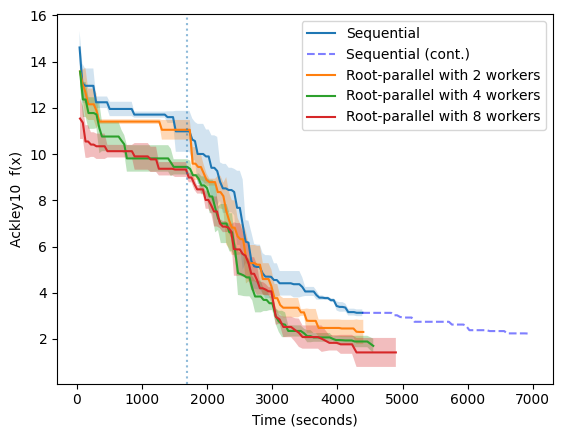

In [122]:
length = len(time_2) + 1
plt.plot(time_seq[:length], mean_seq[:length], label="Sequential")
plt.fill_between(time_seq[:length], mean_seq[:length] - std_seq[:length], mean_seq[:length] + std_seq[:length], alpha=0.2)

length = length - 1
plt.plot(time_seq[length:], mean_seq[length:], label="Sequential (cont.)", color="blue", linestyle="dashed", alpha=0.5)
# plt.fill_between(time_seq[length:], mean_seq[length:] - std_seq[length:], mean_seq[length:] + std_seq[length:], color="blue", alpha=0.3)

plt.plot(time_2, mean_2, label="Root-parallel with 2 workers")
plt.fill_between(time_2, mean_2 - std_2, mean_2 + std_2, alpha=0.3)

plt.plot(time_4, mean_4, label="Root-parallel with 4 workers")
plt.fill_between(time_4, mean_4 - std_4, mean_4 + std_4, alpha=0.3)

plt.plot(time_8, mean_8, label="Root-parallel with 8 workers")
plt.fill_between(time_8, mean_8 - std_8, mean_8 + std_8, alpha=0.3)

plt.axvline(time_seq[39], linestyle="dotted", alpha=0.5)
plt.legend()

plt.xlabel("Time (seconds)")
plt.ylabel("Ackley10  f(x)")

In [90]:
result_seq = np.array([
[14.510022816624742, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.70141578856079, 11.70141578856079, 11.70141578856079, 11.70141578856079, 11.381690872021526, 11.381690872021526, 11.351953695303889, 11.351953695303889, 11.351953695303889, 9.976931859268095, 9.976931859268095, 9.976931859268095, 9.765551836166036, 9.765551836166036, 9.765551836166036, 9.765551836166036, 9.765551836166036, 9.69182994344398, 7.484171147495502, 7.484171147495502, 6.943129610343512, 6.2646356150289755, 6.2646356150289755, 6.2646356150289755, 6.002630987501181, 6.002630987501181, 6.002630987501181, 5.978536265782253, 5.560372428991638, 5.560372428991638, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 4.785505888745547, 4.200018990560785, 4.200018990560785, 4.200018990560785, 4.200018990560785, 4.17669700940419, 3.9092434448804743, 3.9092434448804743, 3.8508622873205813, 3.8508622873205813, 3.5841495823982297, 3.5841495823982297, 3.1967275735113536, 3.1967275735113536, 3.1967275735113536, 3.1967275735113536, 3.1967275735113536, 3.1967275735113536, 3.1967275735113536, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5033095553621973, 2.5033095553621973],
[0.307, 0.339, 0.363, 0.384, 0.405, 0.426, 0.447, 0.468, 0.488, 0.508, 0.529, 0.549, 0.569, 0.589, 0.609, 0.63, 0.649, 0.674, 0.696, 0.717, 0.737, 0.758, 0.778, 0.799, 0.82, 0.841, 0.866, 0.888, 0.909, 0.929, 0.949, 0.988, 1.008, 1.028, 1.048, 1.068, 1.088, 1.108, 1.128, 1.149, 717.923, 1201.141, 1969.657, 2565.534, 2933.967, 3306.457, 4107.492, 4290.622, 4714.768, 5718.507, 6890.364, 7687.111, 8886.835, 9269.834, 10758.406, 11421.296, 13024.402, 13902.706, 14265.345, 16352.122, 18431.873, 19684.372, 20639.247, 23494.448, 25160.587, 26520.133, 28586.856, 30563.075, 31145.647, 33973.03, 36673.499, 36944.926, 39409.255, 42287.733, 43911.559, 46863.159, 47985.043, 48772.845, 49255.878, 50572.88, 52207.489, 56265.146, 59057.185, 59535.628, 60778.276, 62341.955, 64520.456, 66893.357, 69609.316, 70074.189, 73857.194, 75110.069, 78182.427, 81760.004, 82881.733, 86618.843, 87391.903, 88372.181, 90026.332, 90977.779, 92910.534, 93070.576, 95659.156, 101068.978, 106381.461, 109172.058, 109660.995, 111067.973, 114613.841, 116302.656, 117454.213, 120869.124, 121438.993, 125451.602, 127990.426, 130556.371, 138132.136, 139533.191, 141702.46, 148713.113, 149029.804, 153575.908, 153752.99, 155115.313, 159736.879, 167440.845, 168339.4, 169291.375, 172745.975, 175036.815, 177632.906, 178573.192, 180283.18, 182654.674, 183825.763, 185921.894, 188725.76, 192126.485, 202136.05, 202848.577, 204750.77, 204970.424, 207416.305, 209444.485, 212457.471, 220996.945, 221227.265, 222886.615, 223104.506, 223324.761, 224543.173, 225940.486, 228751.404, 231077.014, 232504.194, 235612.941, 235845.153, 236096.629, 238105.105, 240061.193],
[13.794908389503037, 13.794908389503037, 13.440397792385337, 13.440397792385337, 13.440397792385337, 13.440397792385337, 12.472905407444362, 12.472905407444362, 12.472905407444362, 12.472905407444362, 12.472905407444362, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 10.208462794898638, 10.208462794898638, 8.53222036317438, 8.53222036317438, 8.53222036317438, 8.53222036317438, 8.53222036317438, 8.07945968781107, 8.07945968781107, 8.07945968781107, 8.07945968781107, 8.07945968781107, 8.07945968781107, 8.07945968781107, 8.07945968781107, 7.826744633426028, 7.393797396159835, 7.393797396159835, 5.293478544349828, 5.293478544349828, 5.276010385980449, 5.276010385980449, 5.276010385980449, 5.179812402630034, 5.179812402630034, 4.61785357164657, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 3.746308701418702, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.597726860959956, 3.3224687704041185, 3.3224687704041185, 3.3224687704041185, 3.3224687704041185, 3.3224687704041185, 3.3224687704041185, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2018717687616385, 3.2018717687616385, 3.2018717687616385, 3.2018717687616385, 3.2018717687616385, 3.2018717687616385, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392],
[0.49, 0.529, 0.556, 0.581, 0.605, 0.63, 0.655, 0.679, 0.703, 0.727, 0.75, 0.774, 0.797, 0.821, 0.844, 0.868, 0.892, 0.916, 0.939, 0.963, 0.986, 1.01, 1.033, 1.057, 1.081, 1.105, 1.129, 1.152, 1.176, 1.199, 1.223, 1.246, 1.269, 1.293, 1.316, 1.34, 1.363, 1.387, 1.41, 1.433, 914.403, 1763.457, 2305.301, 2908.953, 3657.865, 4437.238, 5040.257, 6377.906, 7721.841, 9365.12, 9874.267, 11104.554, 11327.986, 12153.244, 12901.455, 15217.524, 16075.759, 18045.947, 19556.893, 20852.908, 22489.1, 25079.946, 25916.855, 26227.372, 29612.493, 31835.69, 33975.159, 35648.078, 37700.967, 40683.888, 41212.395, 44103.879, 47394.098, 48156.011, 48285.188, 49523.278, 49891.325, 52819.246, 58868.942, 59581.321, 61630.462, 61894.687, 62032.962, 62746.038, 63849.248, 65819.167, 68927.444, 70523.42, 71547.274, 75221.85, 77958.751, 79519.273, 81142.386, 88691.463, 89356.663, 90798.748, 92413.856, 93022.474, 94874.222, 95396.067, 95702.886, 96628.96, 97605.106, 99312.848, 101969.542, 103558.608, 104971.265, 107145.475, 108675.023, 108844.428, 109230.615, 112134.279, 112775.019, 113693.698, 115434.257, 117148.671, 117340.185, 117555.616, 118850.302, 120028.757, 121798.047, 123631.143, 124967.843, 125392.569, 125604.556, 128100.925, 129792.696, 131496.677, 131694.943, 132141.766, 134901.916, 136086.18, 136335.786, 137387.332, 138715.957, 138962.214, 140277.548, 141456.732, 142269.724, 144117.888, 144369.736, 144766.788, 145018.829, 145262.839, 147223.08, 147679.723, 147908.375, 154081.077, 154313.681, 156281.094, 157161.623, 159967.634, 161316.646, 166091.541, 168822.082, 172251.915, 174272.59, 176565.334, 177376.865, 178349.186],
[15.540698790565095, 13.53177005818217, 13.53177005818217, 13.53177005818217, 13.53177005818217, 13.53177005818217, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 8.790737290047783, 8.790737290047783, 8.37166261217916, 8.37166261217916, 7.493062122786531, 7.493062122786531, 7.493062122786531, 7.493062122786531, 7.493062122786531, 5.864581791403499, 5.864581791403499, 5.864581791403499, 5.864581791403499, 5.74519551202874, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.406141886861818, 3.286486803121719, 3.286486803121719, 3.286486803121719, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.652988718774353, 2.652988718774353, 2.550695489508311, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.107137265523296, 2.107137265523296, 2.107137265523296, 2.107137265523296, 2.107137265523296, 2.107137265523296, 1.581839588586782, 1.581839588586782, 1.581839588586782, 1.581839588586782, 1.581839588586782, 1.581839588586782, 1.581839588586782, 1.505108656694493, 1.505108656694493, 1.505108656694493, 1.505108656694493, 1.505108656694493, 1.505108656694493, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545],
[0.429, 0.47, 0.498, 0.525, 0.553, 0.6, 0.641, 0.681, 0.725, 0.762, 0.79, 0.832, 0.881, 0.911, 0.941, 0.972, 1.001, 1.031, 1.06, 1.089, 1.119, 1.149, 1.178, 1.21, 1.246, 1.294, 1.329, 1.354, 1.38, 1.405, 1.43, 1.457, 1.482, 1.508, 1.533, 1.557, 1.583, 1.608, 1.633, 1.66, 1105.985, 2158.568, 2359.156, 3020.037, 4032.162, 4668.391, 5434.225, 6384.894, 7735.366, 9602.242, 10547.879, 12560.381, 14018.223, 15968.27, 17747.467, 19554.421, 19811.668, 20947.974, 22466.252, 24909.087, 25039.819, 26310.614, 27877.082, 29349.342, 29648.486, 29978.756, 30633.085, 31222.146, 33855.848, 35042.353, 37265.764, 39295.895, 40133.963, 42781.792, 45954.994, 46599.458, 49348.885, 52421.29, 53240.291, 53613.951, 56927.979, 60591.792, 61584.683, 61735.808, 62496.159, 62653.811, 68278.939, 69393.521, 70841.09, 72499.393, 73745.571, 74485.631, 76174.536, 79307.405, 81003.853, 83565.72, 85506.16, 88798.932, 88937.46, 90337.532, 91641.585, 91842.048, 92595.368, 94783.847, 96612.811, 99031.376, 100583.653, 100761.484, 102821.408, 104633.987, 104826.148, 115876.534, 118359.501, 121716.69, 128298.566, 138376.0, 142551.431, 142744.511, 142928.962, 143295.192, 149775.384, 150480.103, 154097.114, 154312.134, 154524.005, 154741.46, 155953.324, 156917.465, 164807.254, 165225.363, 165720.031, 166885.931, 170240.695, 180287.539, 182948.399, 183167.051, 185535.28, 186382.157, 189380.609, 191461.926, 195303.047, 197264.006, 201231.899, 206331.108, 210578.901, 215655.509, 221176.822, 227630.999, 233922.863, 234153.532, 240557.192, 246483.064, 252542.134, 258473.315, 265980.898, 273778.339, 281195.474, 281426.056, 288906.149, 289912.417]
])

odd_index = np.arange(1, len(result_seq), 2)
even_index = np.arange(0, len(result_seq), 2)

array_seq = result_seq[even_index]
time_seq = result_seq[odd_index]
# time_seq = time_seq - np.min(time_seq, axis=1).reshape(-1, 1)
time_seq_1sample = np.mean(time_seq, axis=0) / 1000

mean_seq_1sample = np.mean(array_seq, axis=0)
std_seq_1sample = np.std(array_seq, axis=0)

In [91]:
result_seq = np.array([
[12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 12.094947636653695, 11.94600264624364, 11.94600264624364, 11.94600264624364, 11.94600264624364, 11.94600264624364, 11.94600264624364, 11.94600264624364, 11.94600264624364, 11.490910286164725, 11.490910286164725, 10.47622261767328, 10.134240946284768, 10.134240946284768, 10.134240946284768, 9.582128389302312, 9.582128389302312, 9.035939724491893, 9.035939724491893, 9.035939724491893, 9.035939724491893, 9.016049315626711, 8.03002178710376, 8.03002178710376, 8.03002178710376, 8.03002178710376, 8.03002178710376, 8.03002178710376, 8.03002178710376, 8.03002178710376, 8.03002178710376, 8.03002178710376, 8.03002178710376, 7.10749036405058, 5.932026208247965, 5.932026208247965, 5.932026208247965, 5.932026208247965, 5.593190608252332, 5.593190608252332, 5.593190608252332, 5.593190608252332, 5.593190608252332, 4.293350176622621, 4.293350176622621, 4.293350176622621, 4.293350176622621, 4.293350176622621, 4.293350176622621, 4.293350176622621, 4.293350176622621, 4.293350176622621, 4.293350176622621, 4.0824397321748656, 4.0824397321748656, 4.0824397321748656, 4.0824397321748656, 4.0824397321748656, 3.872936281803636, 3.872936281803636, 3.872936281803636, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.5421774400624746, 3.4285307557437297, 3.3946605220992194, 3.3946605220992194, 3.3946605220992194, 3.3946605220992194, 3.3946605220992194, 3.3946605220992194, 3.3946605220992194, 3.3946605220992194, 3.3946605220992194, 3.3946605220992194, 3.3946605220992194, 3.3946605220992194, 3.3946605220992194, 3.3946605220992194, 3.3946605220992194, 2.8959922770660396, 2.8959922770660396, 2.8959922770660396, 2.8959922770660396, 2.8959922770660396, 2.8959922770660396, 2.8959922770660396, 2.8959922770660396, 2.8959922770660396, 2.8959922770660396, 2.8959922770660396, 2.8959922770660396, 2.5246824171000957, 2.5246824171000957], 
[1.544, 1.581, 1.609, 1.634, 1.659, 1.683, 1.707, 1.732, 1.756, 1.78, 1.804, 1.828, 1.851, 1.874, 1.897, 1.921, 1.944, 1.968, 1.992, 2.016, 2.039, 2.063, 2.085, 2.109, 2.133, 2.157, 2.18, 2.203, 2.227, 2.255, 2.293, 2.317, 2.34, 2.363, 2.385, 2.408, 2.431, 2.454, 2.477, 2.5, 690.564, 690.634, 1211.53, 1211.594, 2154.151, 2154.217, 3095.628, 3095.689, 4089.804, 4089.885, 5500.298, 5500.354, 6998.685, 6998.74, 7524.409, 7524.464, 8665.864, 8665.919, 9318.256, 9318.312, 10914.55, 10914.606, 11156.378, 11156.438, 12225.714, 12225.771, 13321.317, 13321.372, 16252.659, 16252.722, 16509.832, 16509.897, 18003.487, 18003.547, 19224.613, 19224.674, 21358.643, 21358.772, 23789.288, 23789.348, 25390.525, 25390.58, 28791.049, 28791.126, 30646.522, 30646.616, 31118.414, 31118.477, 33793.566, 33793.626, 36355.916, 36355.984, 40026.632, 40026.694, 40948.289, 40948.355, 44247.757, 44247.815, 44395.562, 44395.65, 49594.735, 49594.798, 50038.466, 50038.536, 52061.695, 52061.762, 53265.978, 53266.086, 55626.403, 55626.465, 57593.596, 57593.667, 65478.994, 65479.079, 65644.182, 65644.265, 66196.398, 66196.462, 66691.57, 66691.636, 66897.606, 66897.704, 70185.143, 70185.215, 72180.493, 72180.569, 74048.505, 74048.571, 82057.561, 82057.627, 83438.822, 83438.884, 89815.042, 89815.099, 92023.611, 92023.67, 94101.557, 94101.616, 94318.972, 94319.037, 94529.788, 94529.858, 96584.255, 96584.314, 98491.531, 98491.594, 100761.966, 100762.026, 102811.969, 102812.034, 106113.77, 106113.831, 106559.271, 106559.324, 108316.498, 108316.557, 109805.614, 109805.672, 113759.233, 113759.297], 
[14.527261046812862, 14.527261046812862, 14.527261046812862, 11.734175012613019, 11.734175012613019, 11.734175012613019, 11.734175012613019, 11.734175012613019, 11.734175012613019, 11.734175012613019, 11.734175012613019, 11.734175012613019, 11.734175012613019, 11.734175012613019, 11.734175012613019, 11.734175012613019, 11.734175012613019, 11.734175012613019, 11.734175012613019, 11.734175012613019, 11.734175012613019, 11.734175012613019, 11.734175012613019, 11.734175012613019, 11.734175012613019, 11.536895440209639, 11.536895440209639, 11.536895440209639, 11.536895440209639, 11.536895440209639, 11.536895440209639, 11.536895440209639, 11.536895440209639, 11.536895440209639, 11.536895440209639, 11.138437799748411, 11.138437799748411, 11.138437799748411, 11.138437799748411, 11.138437799748411, 11.138437799748411, 11.138437799748411, 10.937538731561853, 10.916826708257386, 9.93005825935224, 9.93005825935224, 9.93005825935224, 9.93005825935224, 9.93005825935224, 9.93005825935224, 9.93005825935224, 9.93005825935224, 9.93005825935224, 9.93005825935224, 9.2582220853205, 9.20951309054556, 9.038734799930845, 9.038734799930845, 9.038734799930845, 8.43847685664435, 8.43847685664435, 8.43847685664435, 8.43847685664435, 8.43847685664435, 8.43847685664435, 8.270045065310214, 8.270045065310214, 8.270045065310214, 8.270045065310214, 8.270045065310214, 8.270045065310214, 8.270045065310214, 8.270045065310214, 7.5499073160107635, 7.442526502827153, 7.442526502827153, 6.301489904613554, 5.916958368212157, 5.857982312928009, 5.349149239969851, 5.091709401852864, 4.833488444242608, 4.833488444242608, 4.0079933427103285, 4.0079933427103285, 4.0079933427103285, 4.006578705018114, 4.006578705018114, 4.006578705018114, 4.006578705018114, 3.7232329067848338, 3.7232329067848338, 3.7232329067848338, 3.7232329067848338, 3.365041173382434, 3.364685650969655, 3.364685650969655, 3.364685650969655, 3.364685650969655, 3.364685650969655, 3.364685650969655, 3.364685650969655, 3.364685650969655, 3.364685650969655, 3.364685650969655, 3.364685650969655, 3.364685650969655, 3.364685650969655, 3.364685650969655, 3.364685650969655, 3.364685650969655, 3.364685650969655, 3.364685650969655, 3.364685650969655, 3.364685650969655, 3.364685650969655, 3.364685650969655, 3.364685650969655, 3.2547364175176736, 3.2547364175176736, 3.2547364175176736, 3.2547364175176736, 3.2547364175176736, 3.2547364175176736, 3.2109316018089413, 3.2109316018089413, 3.088871533344069, 3.088871533344069, 3.088871533344069, 3.088871533344069, 3.088871533344069, 3.088871533344069, 3.088871533344069, 3.088871533344069, 3.088871533344069, 3.088871533344069, 3.088871533344069, 3.088871533344069, 2.535638737789523, 2.535638737789523, 2.535638737789523, 2.535638737789523, 2.535638737789523, 2.535638737789523, 2.535638737789523, 2.535638737789523, 2.535638737789523, 2.535638737789523, 2.535638737789523, 2.46210721816696, 2.46210721816696, 2.46210721816696, 2.46210721816696, 2.46210721816696, 2.46210721816696, 2.46210721816696, 2.46210721816696, 2.46210721816696, 2.46210721816696, 2.46210721816696],
[0.262, 0.295, 0.323, 0.349, 0.374, 0.399, 0.424, 0.448, 0.473, 0.497, 0.535, 0.564, 0.59, 0.615, 0.639, 0.663, 0.688, 0.712, 0.735, 0.759, 0.783, 0.806, 0.83, 0.854, 0.878, 0.903, 0.927, 0.951, 0.975, 0.998, 1.022, 1.046, 1.07, 1.094, 1.118, 1.142, 1.166, 1.19, 1.214, 1.239, 516.162, 516.214, 1289.975, 1290.102, 2031.527, 2031.585, 3371.33, 3371.385, 3555.723, 3555.796, 5464.928, 5464.987, 5808.527, 5808.584, 6578.851, 6578.906, 7677.648, 7677.713, 8698.673, 8698.73, 8906.99, 8907.051, 9454.292, 9454.349, 11044.904, 11044.958, 12531.849, 12531.906, 12745.398, 12745.453, 12965.699, 12965.758, 13996.667, 13996.722, 15467.989, 15468.048, 16831.225, 16831.284, 19186.648, 19186.706, 20618.357, 20618.415, 22194.312, 22194.367, 24126.566, 24126.628, 25854.188, 25854.248, 27780.812, 27780.869, 29906.277, 29906.333, 32197.636, 32197.7, 33682.402, 33682.46, 34880.446, 34880.511, 35717.443, 35717.499, 39086.694, 39086.76, 39782.544, 39782.608, 41062.152, 41062.213, 41216.867, 41216.928, 42789.473, 42789.533, 45495.545, 45495.62, 47056.914, 47057.0, 48642.734, 48642.8, 53279.974, 53280.042, 54919.772, 54919.843, 56834.052, 56834.12, 62140.568, 62140.64, 63917.729, 63917.785, 67625.694, 67625.761, 67797.627, 67797.712, 69729.958, 69730.013, 75858.73, 75858.798, 77363.923, 77363.981, 77548.846, 77548.908, 83022.756, 83022.815, 83691.521, 83691.579, 84431.201, 84431.26, 86450.039, 86450.125, 88052.374, 88052.432, 90069.444, 90069.5, 90263.753, 90263.816, 90934.708, 90934.762, 94367.759, 94367.817, 95909.338, 95909.395, 96119.34, 96119.403],
[13.160046983032931, 13.160046983032931, 13.160046983032931, 13.160046983032931, 11.5313369268302, 11.5313369268302, 11.5313369268302, 11.5313369268302, 11.5313369268302, 11.5313369268302, 11.5313369268302, 11.5313369268302, 11.5313369268302, 11.5313369268302, 10.515064797518171, 10.515064797518171, 10.515064797518171, 10.515064797518171, 10.515064797518171, 10.515064797518171, 10.515064797518171, 10.515064797518171, 10.515064797518171, 10.515064797518171, 10.515064797518171, 10.515064797518171, 10.515064797518171, 10.515064797518171, 10.515064797518171, 10.515064797518171, 10.515064797518171, 10.515064797518171, 10.515064797518171, 10.515064797518171, 10.515064797518171, 10.515064797518171, 10.515064797518171, 10.515064797518171, 10.515064797518171, 9.847044072296864, 9.847044072296864, 9.847044072296864, 9.847044072296864, 8.79530158817274, 8.79530158817274, 8.79530158817274, 8.79530158817274, 8.79530158817274, 8.79530158817274, 8.79530158817274, 8.79530158817274, 8.79530158817274, 8.79530158817274, 8.79530158817274, 8.79530158817274, 8.79530158817274, 8.79530158817274, 8.79530158817274, 7.342717832072555, 7.342717832072555, 7.342717832072555, 7.342717832072555, 6.699028188386574, 6.186653673519249, 6.186653673519249, 6.186653673519249, 6.186653673519249, 6.186653673519249, 5.249118853783251, 5.249118853783251, 5.249118853783251, 5.249118853783251, 5.249118853783251, 5.249118853783251, 5.037988349754944, 5.037988349754944, 5.037988349754944, 5.037988349754944, 3.7686243755992384, 3.7686243755992384, 3.7686243755992384, 3.7686243755992384, 3.7686243755992384, 3.7686243755992384, 3.7686243755992384, 3.7686243755992384, 3.7686243755992384, 3.7686243755992384, 3.7686243755992384, 3.7686243755992384, 3.7686243755992384, 3.7686243755992384, 3.7686243755992384, 3.7686243755992384, 3.7686243755992384, 3.7686243755992384, 3.7686243755992384, 3.6046879555337132, 3.6046879555337132, 3.6046879555337132, 2.8516011970645754, 2.8516011970645754, 2.8516011970645754, 2.8516011970645754, 2.8516011970645754, 2.8516011970645754, 2.8516011970645754, 2.8516011970645754, 2.8516011970645754, 2.8516011970645754, 2.8516011970645754, 2.8516011970645754, 2.8516011970645754, 2.8516011970645754, 2.8516011970645754, 2.8516011970645754, 2.8516011970645754, 2.8516011970645754, 2.8516011970645754, 2.8516011970645754, 2.8516011970645754, 2.8516011970645754, 2.8516011970645754, 2.8516011970645754, 2.8516011970645754, 2.8516011970645754, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183, 2.675716559398183],
[0.272, 0.31, 0.34, 0.369, 0.397, 0.426, 0.454, 0.482, 0.51, 0.538, 0.566, 0.593, 0.62, 0.648, 0.675, 0.704, 0.731, 0.759, 0.791, 0.819, 0.848, 0.877, 0.921, 0.95, 0.978, 1.005, 1.033, 1.06, 1.088, 1.116, 1.143, 1.172, 1.2, 1.228, 1.255, 1.283, 1.31, 1.338, 1.365, 1.394, 555.987, 556.058, 1760.548, 1760.606, 2640.441, 2640.495, 3239.514, 3239.569, 3728.312, 3728.364, 3898.084, 3898.14, 5797.611, 5797.668, 6634.814, 6634.868, 7142.89, 7142.945, 8646.043, 8646.114, 9910.823, 9910.875, 11239.659, 11239.718, 11668.378, 11668.433, 14355.112, 14355.171, 16110.967, 16111.028, 18264.61, 18264.667, 21518.999, 21519.067, 23167.025, 23167.085, 26398.51, 26398.572, 28449.551, 28449.616, 28855.373, 28855.439, 29825.551, 29825.608, 30718.256, 30718.323, 32696.57, 32696.638, 33731.411, 33731.478, 34207.802, 34207.871, 34672.829, 34672.899, 35424.998, 35425.064, 37717.915, 37717.978, 39027.187, 39027.256, 42378.568, 42378.632, 44808.368, 44808.431, 47652.131, 47652.19, 50461.819, 50461.881, 52340.291, 52340.393, 53933.481, 53933.536, 56375.305, 56375.365, 57863.554, 57863.616, 59523.164, 59523.224, 60546.748, 60546.803, 61579.114, 61579.175, 63095.034, 63095.092, 65715.387, 65715.452, 72105.568, 72105.63, 74173.797, 74173.858, 74363.702, 74363.781, 75452.336, 75452.395, 79137.606, 79137.67, 82259.434, 82259.499, 82455.168, 82455.242, 82658.114, 82658.181, 83914.627, 83914.691, 86053.376, 86053.433, 88206.804, 88206.865, 91068.521, 91068.589, 93114.394, 93114.461, 94796.469, 94796.531, 97986.868, 97986.932, 98195.579, 98195.653, 100480.464, 100480.526]
])

odd_index = np.arange(1, len(result_seq), 2)
even_index = np.arange(0, len(result_seq), 2)

array_seq = result_seq[even_index]
time_seq = result_seq[odd_index]
# time_seq = time_seq - np.min(time_seq, axis=1).reshape(-1, 1)
time_seq_2samples = np.mean(time_seq, axis=0) / 1000

mean_seq_2samples = np.mean(array_seq, axis=0)
std_seq_2samples = np.std(array_seq, axis=0)

In [92]:
result_seq = np.array([
[15.502761124348263, 14.639612367790562, 14.36486848270455, 14.36486848270455, 12.892390786572705, 12.892390786572705, 12.892390786572705, 12.892390786572705, 12.892390786572705, 12.259658458634629, 12.259658458634629, 12.259658458634629, 12.259658458634629, 12.259658458634629, 12.259658458634629, 12.259658458634629, 12.259658458634629, 12.259658458634629, 12.259658458634629, 12.259658458634629, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.145568378493511, 9.005329494569395, 8.583952443021888, 8.583952443021888, 8.583952443021888, 8.583952443021888, 8.583952443021888, 8.583952443021888, 8.583952443021888, 8.583952443021888, 8.583952443021888, 8.583952443021888, 8.583952443021888, 7.359024891861591, 7.359024891861591, 7.359024891861591, 7.359024891861591, 7.359024891861591, 7.359024891861591, 7.359024891861591, 7.359024891861591, 7.359024891861591, 7.359024891861591, 7.359024891861591, 7.359024891861591, 7.359024891861591, 7.359024891861591, 7.359024891861591, 7.359024891861591, 6.768634917971731, 6.768634917971731, 6.768634917971731, 6.529969203858855, 6.529969203858855, 6.529969203858855, 6.529969203858855, 5.780431086909534, 5.564250391116669, 5.564250391116669, 5.564250391116669, 5.564250391116669, 5.548383197927535, 5.548383197927535, 4.471522324990694, 4.471522324990694, 4.471522324990694, 4.471522324990694, 4.471522324990694, 4.471522324990694, 4.471522324990694, 4.471522324990694, 4.100777321332451, 4.100777321332451, 4.100777321332451, 4.100777321332451, 4.100777321332451, 4.100777321332451, 4.100777321332451, 4.100777321332451, 4.039031726390071, 4.039031726390071, 3.640351300991338, 3.640351300991338, 3.640351300991338, 3.640351300991338, 3.640351300991338, 3.640351300991338, 3.640351300991338, 3.640351300991338, 3.640351300991338, 3.640351300991338, 3.640351300991338, 3.640351300991338, 3.640351300991338, 3.640351300991338, 3.640351300991338, 3.565718492072801, 3.468256942564157, 3.468256942564157, 3.468256942564157, 3.468256942564157, 3.468256942564157, 3.4316462643980796, 3.4316462643980796, 3.4316462643980796, 3.4316462643980796, 3.4316462643980796, 3.4316462643980796, 3.4316462643980796, 3.4316462643980796, 3.4316462643980796, 3.4316462643980796, 3.4316462643980796, 3.4316462643980796, 3.4316462643980796, 3.4316462643980796, 3.4316462643980796, 3.4316462643980796, 3.4316462643980796, 3.4316462643980796, 3.4316462643980796, 3.0966493470590746, 3.0966493470590746, 3.0966493470590746, 2.9557730348374425, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 2.188816124930853, 1.9208264871555767, 1.9208264871555767, 1.9208264871555767, 1.9208264871555767, 1.9208264871555767, 1.9208264871555767, 1.9208264871555767, 1.9208264871555767, 1.9208264871555767, 1.9208264871555767, 1.8229408915744796, 1.8229408915744796, 1.8229408915744796, 1.8229408915744796, 1.8229408915744796, 1.8229408915744796, 1.8229408915744796, 1.8229408915744796, 1.8229408915744796, 1.5049486880599727, 1.5049486880599727, 1.5049486880599727, 1.5049486880599727, 1.5049486880599727, 1.5049486880599727, 1.5049486880599727, 1.5049486880599727, 1.5049486880599727, 1.5049486880599727, 1.5049486880599727, 1.5049486880599727, 1.322395860495043, 1.322395860495043, 1.322395860495043, 1.322395860495043, 1.322395860495043, 1.322395860495043, 1.322395860495043, 1.322395860495043, 0.9880072397745754, 0.9880072397745754, 0.9880072397745754, 0.9880072397745754, 0.9880072397745754, 0.9880072397745754, 0.9880072397745754, 0.9880072397745754],
[0.311, 0.349, 0.379, 0.407, 0.434, 0.462, 0.488, 0.514, 0.542, 0.568, 0.594, 0.621, 0.647, 0.673, 0.698, 0.724, 0.752, 0.779, 0.811, 0.838, 0.863, 0.889, 0.93, 0.955, 0.981, 1.006, 1.031, 1.056, 1.081, 1.111, 1.137, 1.163, 1.189, 1.215, 1.24, 1.265, 1.29, 1.316, 1.341, 1.366, 887.165, 887.22, 887.254, 887.285, 1875.457, 1875.51, 1875.543, 1875.573, 2755.855, 2755.909, 2755.942, 2755.973, 3154.357, 3154.42, 3154.463, 3154.502, 4321.898, 4321.957, 4321.996, 4322.032, 4562.741, 4562.806, 4562.851, 4562.892, 6594.004, 6594.077, 6594.111, 6594.142, 8085.372, 8085.426, 8085.459, 8085.488, 9011.585, 9011.642, 9011.676, 9011.707, 10754.839, 10754.897, 10754.937, 10754.967, 12273.281, 12273.339, 12273.373, 12273.405, 12862.339, 12862.395, 12862.43, 12862.462, 14769.498, 14769.554, 14769.586, 14769.616, 16088.674, 16088.729, 16088.763, 16088.793, 16792.131, 16792.188, 16792.223, 16792.255, 19968.206, 19968.261, 19968.294, 19968.324, 22567.33, 22567.39, 22567.424, 22567.455, 25104.266, 25104.326, 25104.36, 25104.391, 27722.532, 27722.592, 27722.626, 27722.657, 29910.159, 29910.218, 29910.252, 29910.283, 31023.085, 31023.143, 31023.176, 31023.207, 33396.577, 33396.637, 33396.671, 33396.702, 36992.55, 36992.614, 36992.649, 36992.682, 39145.292, 39145.357, 39145.392, 39145.424, 40674.497, 40674.558, 40674.591, 40674.622, 42227.537, 42227.605, 42227.641, 42227.674, 44336.138, 44336.2, 44336.234, 44336.272, 45625.764, 45625.829, 45625.864, 45625.895, 48499.448, 48499.508, 48499.542, 48499.572, 52219.628, 52219.689, 52219.723, 52219.753, 54386.021, 54386.082, 54386.115, 54386.146, 56900.675, 56900.738, 56900.773, 56900.804, 57714.414, 57714.474, 57714.509, 57714.54, 57968.052, 57968.122, 57968.161, 57968.197, 59504.099, 59504.162, 59504.197, 59504.239, 63032.26, 63032.323, 63032.358, 63032.39, 64333.678, 64333.738, 64333.77, 64333.8, 67409.246, 67409.306, 67409.34, 67409.37, 68391.865, 68391.923, 68391.958, 68391.989, 71474.992, 71475.059, 71475.094, 71475.126, 74243.476, 74243.54, 74243.574, 74243.606, 74837.922, 74837.988, 74838.025, 74838.059, 77453.2, 77453.262, 77453.296, 77453.328, 77773.894, 77773.982, 77774.022, 77774.059, 94248.309, 94248.371, 94248.405, 94248.437, 96862.893, 96862.964, 96862.999, 96863.03, 99140.118, 99140.186, 99140.221, 99140.252, 99461.501, 99461.569, 99461.607, 99461.641, 101348.46, 101348.525, 101348.562, 101348.593, 101748.583, 101748.646, 101748.682, 101748.714, 106510.842, 106510.905, 106510.94, 106510.971, 107623.536, 107623.602, 107623.638, 107623.67, 107983.134, 107983.197, 107983.251, 107983.285, 111789.106, 111789.166, 111789.2, 111789.23, 112928.102, 112928.159, 112928.2, 112928.231, 115656.641, 115656.706, 115656.74, 115656.772, 121584.899, 121584.963, 121584.996, 121585.027, 124279.17, 124279.229, 124279.263, 124279.293, 128197.262, 128197.324, 128197.357, 128197.395, 133435.769, 133435.836, 133435.87, 133435.9],
[14.83116132364966, 14.201258813032391, 11.77749290123187, 11.77749290123187, 11.77749290123187, 11.77749290123187, 11.77749290123187, 11.77749290123187, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.792144359172038, 9.698515812242427, 9.646516124524773, 9.134582179200725, 9.134582179200725, 9.134582179200725, 9.134582179200725, 9.134582179200725, 9.134582179200725, 9.134582179200725, 9.134582179200725, 9.134582179200725, 9.134582179200725, 8.940525557818704, 8.687965322145265, 7.642255069865987, 7.642255069865987, 7.642255069865987, 7.642255069865987, 7.642255069865987, 7.572769490057141, 6.697645884286359, 6.217651797002663, 5.910312873849499, 4.908490470850719, 4.908490470850719, 4.390922827765099, 4.390922827765099, 4.236287511421562, 4.020777474828698, 4.020777474828698, 4.020777474828698, 4.020777474828698, 3.980480759864897, 3.978562094011164, 3.978562094011164, 3.978562094011164, 3.978562094011164, 3.978562094011164, 3.978562094011164, 3.978562094011164, 3.978562094011164, 3.978562094011164, 3.978562094011164, 3.978562094011164, 3.855804632245285, 3.855804632245285, 3.855804632245285, 3.855804632245285, 3.132624001727699, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.086214403243375, 3.0449127139983223, 3.0449127139983223, 2.9749970888356967, 2.9749970888356967, 2.9749970888356967, 2.9749970888356967, 2.9749970888356967, 2.9749970888356967, 2.9749970888356967, 2.9749970888356967, 2.9749970888356967, 2.9749970888356967, 2.9749970888356967, 2.9749970888356967, 2.9749970888356967, 2.9749970888356967, 2.9749970888356967, 2.9749970888356967, 2.9749970888356967, 2.9749970888356967, 2.9749970888356967, 2.9749970888356967, 2.9749970888356967, 2.9749970888356967, 2.9749970888356967, 2.9749970888356967, 2.9749970888356967, 2.9749970888356967, 2.9749970888356967, 2.9749970888356967, 2.9749970888356967, 2.8802403668542813, 2.8802403668542813, 2.8802403668542813, 2.8802403668542813, 2.636858126761553, 2.636858126761553, 2.636858126761553, 2.3510442056600707, 2.3510442056600707, 2.3510442056600707, 2.3510442056600707, 2.3510442056600707, 2.3510442056600707, 2.3510442056600707, 2.3510442056600707, 2.3510442056600707, 2.3510442056600707, 2.3510442056600707, 2.3510442056600707, 2.3510442056600707, 2.3510442056600707, 2.3510442056600707, 2.093985815367351, 2.093985815367351, 2.093985815367351, 2.093985815367351, 2.093985815367351, 2.093985815367351, 2.093985815367351, 2.093985815367351, 2.093985815367351, 2.058819778790522, 2.058819778790522, 2.058819778790522, 2.058819778790522, 2.058819778790522, 2.058819778790522, 1.8925524872099904, 1.8925524872099904, 1.8925524872099904, 1.8925524872099904, 1.7941420443011826, 1.7897112573465148, 1.3996949885243422, 1.3996949885243422, 1.3996949885243422, 1.3996949885243422, 1.3996949885243422, 1.3996949885243422, 1.3996949885243422, 1.3996949885243422, 1.3996949885243422, 1.3996949885243422, 1.3996949885243422, 1.3996949885243422, 1.3996949885243422, 1.3996949885243422, 1.3996949885243422, 1.3996949885243422, 1.3996949885243422, 1.148604462908001, 0.92689786316441, 0.92689786316441, 0.92689786316441, 0.92689786316441, 0.92689786316441, 0.92689786316441, 0.92689786316441, 0.92689786316441, 0.92689786316441, 0.92689786316441, 0.92689786316441, 0.92689786316441, 0.92689786316441, 0.8132094797868388, 0.8132094797868388, 0.8132094797868388, 0.7170395362238691, 0.7170395362238691, 0.7170395362238691, 0.7170395362238691, 0.6804366033053637, 0.6804366033053637, 0.6804366033053637, 0.6804366033053637, 0.6804366033053637, 0.6804366033053637, 0.6804366033053637, 0.6804366033053637, 0.6804366033053637, 0.6804366033053637, 0.6804366033053637, 0.6804366033053637, 0.5352359154956159, 0.5352359154956159, 0.387442769205951, 0.387442769205951, 0.387442769205951, 0.387442769205951, 0.387442769205951, 0.387442769205951, 0.387442769205951, 0.387442769205951, 0.387442769205951, 0.387442769205951, 0.387442769205951, 0.387442769205951, 0.387442769205951, 0.387442769205951, 0.387442769205951, 0.387442769205951, 0.387442769205951],
[0.277, 0.313, 0.342, 0.37, 0.396, 0.422, 0.448, 0.473, 0.499, 0.524, 0.55, 0.575, 0.6, 0.625, 0.65, 0.676, 0.701, 0.726, 0.752, 0.777, 0.802, 0.827, 0.852, 0.878, 0.903, 0.928, 0.953, 0.978, 1.003, 1.028, 1.053, 1.078, 1.104, 1.129, 1.154, 1.179, 1.204, 1.228, 1.253, 1.278, 354.029, 354.084, 354.12, 354.152, 1602.43, 1602.507, 1602.54, 1602.569, 2735.019, 2735.075, 2735.11, 2735.141, 3809.078, 3809.134, 3809.169, 3809.2, 4064.741, 4064.824, 4064.867, 4064.905, 4345.708, 4345.79, 4345.829, 4345.866, 5889.971, 5890.031, 5890.066, 5890.097, 7592.45, 7592.51, 7592.545, 7592.576, 9698.439, 9698.499, 9698.534, 9698.565, 10812.742, 10812.807, 10812.843, 10812.876, 12996.135, 12996.195, 12996.229, 12996.26, 14440.714, 14440.777, 14440.812, 14440.843, 16825.255, 16825.316, 16825.35, 16825.382, 18390.14, 18390.207, 18390.242, 18390.275, 19545.588, 19545.649, 19545.683, 19545.715, 22147.75, 22147.812, 22147.846, 22147.876, 23909.199, 23909.255, 23909.288, 23909.318, 25925.67, 25925.73, 25925.764, 25925.795, 26752.166, 26752.225, 26752.26, 26752.291, 29434.831, 29434.892, 29434.926, 29434.957, 31276.416, 31276.476, 31276.51, 31276.542, 33074.069, 33074.133, 33074.167, 33074.197, 35600.623, 35600.684, 35600.716, 35600.747, 36537.996, 36538.051, 36538.083, 36538.112, 39557.109, 39557.164, 39557.198, 39557.235, 41980.377, 41980.437, 41980.47, 41980.501, 44561.343, 44561.401, 44561.45, 44561.481, 45435.398, 45435.478, 45435.512, 45435.544, 47104.319, 47104.387, 47104.421, 47104.451, 47757.861, 47757.934, 47757.969, 47758.001, 49408.519, 49408.582, 49408.617, 49408.649, 50315.842, 50315.898, 50315.932, 50315.962, 56281.556, 56281.614, 56281.647, 56281.677, 59494.058, 59494.129, 59494.17, 59494.207, 61667.387, 61667.448, 61667.481, 61667.511, 65351.223, 65351.281, 65351.314, 65351.344, 68987.753, 68987.815, 68987.865, 68987.898, 73998.574, 73998.634, 73998.666, 73998.697, 85735.992, 85736.053, 85736.086, 85736.115, 94941.821, 94941.879, 94941.911, 94941.953, 96188.605, 96188.713, 96188.765, 96188.798, 99990.654, 99990.714, 99990.747, 99990.776, 105878.689, 105878.748, 105878.782, 105878.812, 121757.32, 121757.379, 121757.412, 121757.441, 126424.471, 126424.53, 126424.563, 126424.592, 126739.065, 126739.134, 126739.171, 126739.206, 132102.714, 132102.782, 132102.821, 132102.856, 135530.056, 135530.114, 135530.148, 135530.178, 140868.857, 140868.93, 140868.975, 140869.016, 147054.66, 147054.728, 147054.772, 147054.814, 152876.102, 152876.17, 152876.214, 152876.262, 161089.342, 161089.413, 161089.457, 161089.498, 169550.112, 169550.168, 169550.201, 169550.23, 180014.089, 180014.145, 180014.176, 180014.205, 191743.38, 191743.437, 191743.469, 191743.499, 203493.96, 203494.018, 203494.052, 203494.081, 215111.451, 215111.544, 215111.577, 215111.605, 229026.908, 229026.973, 229027.006, 229027.035, 241374.891, 241374.946, 241374.977, 241375.005, 256972.055, 256972.111, 256972.143, 256972.171],
[13.370686477019813, 13.370686477019813, 13.370686477019813, 13.370686477019813, 13.370686477019813, 13.370686477019813, 13.370686477019813, 13.370686477019813, 13.370686477019813, 13.124066815833872, 12.637313760949445, 12.637313760949445, 12.515866441845379, 12.515866441845379, 11.265311304667854, 11.265311304667854, 11.265311304667854, 11.265311304667854, 11.265311304667854, 11.265311304667854, 11.265311304667854, 11.265311304667854, 11.265311304667854, 11.265311304667854, 11.265311304667854, 11.265311304667854, 11.265311304667854, 11.265311304667854, 11.265311304667854, 11.265311304667854, 11.265311304667854, 11.265311304667854, 9.519433186321592, 9.519433186321592, 9.519433186321592, 9.519433186321592, 9.519433186321592, 9.519433186321592, 9.519433186321592, 9.519433186321592, 9.519433186321592, 9.519433186321592, 9.519433186321592, 9.519433186321592, 9.519433186321592, 9.519433186321592, 9.519433186321592, 9.519433186321592, 9.519433186321592, 9.519433186321592, 9.371525442070315, 9.371525442070315, 9.371525442070315, 9.371525442070315, 9.371525442070315, 9.371525442070315, 9.371525442070315, 9.371525442070315, 9.371525442070315, 9.371525442070315, 9.371525442070315, 9.371525442070315, 9.371525442070315, 9.371525442070315, 9.136687612480696, 7.940741108785067, 7.940741108785067, 7.940741108785067, 7.940741108785067, 7.940741108785067, 7.940741108785067, 7.940741108785067, 7.940741108785067, 7.940741108785067, 7.793148742291947, 7.793148742291947, 7.288713764625099, 7.288713764625099, 7.288713764625099, 7.288713764625099, 6.631429653994292, 6.631429653994292, 6.631429653994292, 6.631429653994292, 4.790111033456412, 4.790111033456412, 4.790111033456412, 4.790111033456412, 4.555387225961205, 3.2865253232474037, 3.2865253232474037, 3.2865253232474037, 3.2865253232474037, 3.2865253232474037, 3.2865253232474037, 3.2865253232474037, 3.2865253232474037, 3.2865253232474037, 3.2865253232474037, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.4873037490862733, 2.437322290059648, 2.437322290059648, 2.437322290059648, 2.437322290059648, 2.437322290059648, 2.437322290059648, 2.437322290059648, 2.437322290059648, 2.437322290059648, 2.437322290059648, 2.437322290059648, 2.437322290059648, 2.437322290059648, 2.437322290059648, 2.437322290059648, 2.437322290059648, 2.437322290059648, 2.437322290059648, 2.437322290059648, 2.437322290059648, 2.437322290059648, 2.437322290059648, 2.437322290059648, 2.437322290059648, 2.437322290059648, 2.1731111727968053, 2.1209027908561358, 2.1209027908561358, 2.1209027908561358, 2.1209027908561358, 2.1209027908561358, 2.1209027908561358, 2.1209027908561358, 1.7994930666463387, 1.7994930666463387, 1.7994930666463387, 1.7994930666463387, 1.7994930666463387, 1.7994930666463387, 1.7994930666463387, 1.7994930666463387, 1.7994930666463387, 1.7994930666463387, 1.7994930666463387, 1.7994930666463387, 1.4150893378602665, 1.4150893378602665, 1.4150893378602665, 1.4150893378602665, 1.4150893378602665, 1.4150893378602665, 1.405907158873703, 1.052497924790249, 1.052497924790249, 1.052497924790249, 1.052497924790249, 1.052497924790249, 1.052497924790249, 1.052497924790249, 1.052497924790249, 1.052497924790249, 1.052497924790249, 1.052497924790249, 1.052497924790249, 1.052497924790249, 1.052497924790249, 1.052497924790249, 1.052497924790249, 1.052497924790249, 1.052497924790249, 1.052497924790249, 1.052497924790249, 1.052497924790249, 1.052497924790249, 1.052497924790249, 1.052497924790249, 1.052497924790249, 1.052497924790249, 1.052497924790249, 1.052497924790249, 0.7514090126882462, 0.7514090126882462, 0.6066354724342742, 0.6066354724342742, 0.6066354724342742, 0.6066354724342742, 0.6066354724342742, 0.6066354724342742, 0.6066354724342742, 0.6066354724342742, 0.42469107271756856, 0.393043420203917, 0.393043420203917, 0.393043420203917, 0.393043420203917, 0.393043420203917, 0.393043420203917, 0.393043420203917, 0.393043420203917, 0.393043420203917, 0.393043420203917, 0.393043420203917, 0.393043420203917, 0.393043420203917, 0.393043420203917, 0.393043420203917, 0.393043420203917, 0.393043420203917, 0.393043420203917, 0.393043420203917, 0.393043420203917, 0.393043420203917, 0.393043420203917, 0.393043420203917, 0.393043420203917, 0.393043420203917, 0.393043420203917, 0.393043420203917, 0.393043420203917, 0.393043420203917, 0.393043420203917, 0.393043420203917, 0.393043420203917],
[0.266, 0.301, 0.328, 0.353, 0.378, 0.403, 0.427, 0.452, 0.476, 0.5, 0.524, 0.548, 0.572, 0.613, 0.639, 0.664, 0.689, 0.714, 0.739, 0.764, 0.789, 0.814, 0.839, 0.864, 0.89, 0.915, 0.94, 0.964, 0.989, 1.014, 1.039, 1.064, 1.089, 1.114, 1.139, 1.164, 1.19, 1.215, 1.24, 1.265, 430.597, 430.667, 430.7, 430.731, 1332.921, 1332.972, 1333.005, 1333.034, 2458.5, 2458.554, 2458.586, 2458.616, 4455.013, 4455.07, 4455.102, 4455.13, 4695.757, 4695.817, 4695.856, 4695.891, 5489.293, 5489.346, 5489.379, 5489.408, 6387.733, 6387.813, 6387.851, 6387.888, 6882.34, 6882.397, 6882.432, 6882.463, 8412.172, 8412.223, 8412.273, 8412.301, 10037.312, 10037.371, 10037.404, 10037.433, 11707.994, 11708.048, 11708.079, 11708.108, 13651.474, 13651.585, 13651.639, 13651.685, 15156.159, 15156.212, 15156.257, 15156.287, 17446.915, 17446.984, 17447.022, 17447.058, 19083.222, 19083.281, 19083.312, 19083.342, 22008.963, 22009.021, 22009.054, 22009.084, 24946.547, 24946.607, 24946.639, 24946.668, 26019.561, 26019.623, 26019.661, 26019.695, 28238.342, 28238.401, 28238.433, 28238.463, 30446.197, 30446.263, 30446.3, 30446.335, 31474.486, 31474.545, 31474.582, 31474.616, 31636.577, 31636.65, 31636.693, 31636.733, 31817.8, 31817.877, 31817.921, 31817.962, 32012.977, 32013.063, 32013.108, 32013.166, 32472.515, 32472.578, 32472.615, 32472.648, 32654.622, 32654.687, 32654.723, 32654.756, 34551.516, 34551.579, 34551.616, 34551.65, 36060.676, 36060.742, 36060.779, 36060.813, 40524.485, 40524.549, 40524.585, 40524.62, 44564.967, 44565.029, 44565.063, 44565.093, 46202.3, 46202.361, 46202.394, 46202.424, 47966.076, 47966.133, 47966.164, 47966.193, 48938.699, 48938.755, 48938.787, 48938.816, 49187.365, 49187.431, 49187.468, 49187.501, 51216.416, 51216.474, 51216.506, 51216.536, 52853.175, 52853.234, 52853.266, 52853.296, 55330.928, 55330.989, 55331.028, 55331.057, 61263.056, 61263.119, 61263.152, 61263.183, 66905.349, 66905.415, 66905.448, 66905.478, 67161.112, 67161.179, 67161.216, 67161.25, 71598.717, 71598.782, 71598.816, 71598.866, 77384.429, 77384.492, 77384.525, 77384.555, 83394.999, 83395.059, 83395.092, 83395.122, 92566.028, 92566.092, 92566.125, 92566.156, 101377.636, 101377.698, 101377.733, 101377.763, 102355.992, 102356.052, 102356.084, 102356.114, 109270.503, 109270.564, 109270.596, 109270.626, 114201.495, 114201.555, 114201.587, 114201.616, 124284.038, 124284.099, 124284.131, 124284.16, 134077.057, 134077.118, 134077.151, 134077.181, 144674.701, 144674.759, 144674.791, 144674.82, 159470.149, 159470.207, 159470.24, 159470.27, 174784.139, 174784.2, 174784.24, 174784.27, 189392.575, 189392.633, 189392.665, 189392.694, 190407.866, 190407.925, 190407.957, 190407.987, 206721.142, 206721.206, 206721.238, 206721.267, 207032.237, 207032.304, 207032.34, 207032.392, 225056.845, 225056.905, 225056.939, 225056.969, 243461.968, 243462.025, 243462.057, 243462.086, 264508.221, 264508.29, 264508.324, 264508.354],
])

odd_index = np.arange(1, len(result_seq), 2)
even_index = np.arange(0, len(result_seq), 2)

array_seq = result_seq[even_index]
time_seq = result_seq[odd_index]
# time_seq = time_seq - np.min(time_seq, axis=1).reshape(-1, 1)
time_seq_4samples = np.mean(time_seq, axis=0) / 1000

mean_seq_4samples = np.mean(array_seq, axis=0)
std_seq_4samples = np.std(array_seq, axis=0)

In [93]:
result_seq = np.array([
    [15.155808803223152, 13.652590221279647, 13.399064911144817, 13.399064911144817, 13.399064911144817, 12.555353434034872, 12.080969676590229, 12.080969676590229, 12.080969676590229, 12.080969676590229, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.630486237160191, 11.59820942113903, 11.289564220426872, 11.272167450339241, 11.272167450339241, 11.272167450339241, 11.272167450339241, 11.272167450339241, 11.19274596049931, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 11.007434887285166, 10.941952542462177, 10.763578763242435, 10.596330123811281, 10.596330123811281, 10.596330123811281, 10.596330123811281, 10.596330123811281, 10.596330123811281, 10.47637761008885, 10.47637761008885, 10.24858241961391, 9.928728248103178, 9.720094785498727, 9.720094785498727, 9.720094785498727, 9.720094785498727, 9.720094785498727, 9.541861811333243, 9.541861811333243, 9.541861811333243, 9.541861811333243, 8.929447709910061, 8.929447709910061, 8.929447709910061, 8.929447709910061, 8.929447709910061, 8.929447709910061, 8.929447709910061, 8.929447709910061, 8.929447709910061, 8.929447709910061, 8.929447709910061, 8.24383330577076, 8.24383330577076, 8.24383330577076, 8.24383330577076, 8.24383330577076, 8.24383330577076, 8.24383330577076, 7.887010471060115, 7.887010471060115, 7.887010471060115, 7.887010471060115, 7.887010471060115, 7.887010471060115, 7.887010471060115, 7.887010471060115, 7.887010471060115, 7.887010471060115, 7.887010471060115, 7.887010471060115, 7.887010471060115, 7.769160124238621, 7.739500990241272, 7.739500990241272, 7.608989937283091, 7.608989937283091, 7.608989937283091, 7.608989937283091, 7.608989937283091, 7.608989937283091, 7.608989937283091, 7.608989937283091, 7.608989937283091, 7.301973398417575, 7.109336493440866, 7.109336493440866, 7.109336493440866, 7.109336493440866, 7.109336493440866, 7.109336493440866, 6.870868496341776, 6.870868496341776, 6.870868496341776, 6.870868496341776, 6.870868496341776, 6.870868496341776, 6.870868496341776, 6.870868496341776, 6.870868496341776, 6.870868496341776, 6.870868496341776, 6.870868496341776, 6.870868496341776, 6.870868496341776, 6.870868496341776, 6.870868496341776, 6.870868496341776, 6.870868496341776, 6.870868496341776, 6.870868496341776, 6.870868496341776, 6.870868496341776, 6.870868496341776, 6.870868496341776, 6.870868496341776, 6.870868496341776, 6.870868496341776, 6.870868496341776, 6.49230663253876, 6.49230663253876, 6.49230663253876, 6.49230663253876, 6.49230663253876, 6.49230663253876, 6.49230663253876, 6.49230663253876, 6.49230663253876, 6.49230663253876, 6.49230663253876, 6.49230663253876, 6.49230663253876, 5.9781518576777195, 5.9781518576777195, 5.77368257129914, 5.77368257129914, 5.77368257129914, 5.77368257129914, 5.77368257129914, 5.642933540886496, 5.642933540886496, 5.642933540886496, 5.642933540886496, 5.642933540886496, 5.642933540886496, 5.642933540886496, 5.642933540886496, 5.642933540886496, 5.642933540886496, 5.340155176360305, 5.340155176360305, 5.340155176360305, 5.340155176360305, 5.340155176360305, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.863763354322803, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 4.107804226543212, 3.7727109256498044, 3.7727109256498044, 3.7617713886832225, 3.7226697334776415, 3.6444925054422304, 3.6444925054422304, 3.3671257601105826, 3.2751720624729157, 3.2751720624729157, 3.2751720624729157, 3.2751720624729157, 3.2751720624729157, 3.2751720624729157, 3.2751720624729157, 3.2751720624729157, 3.2751720624729157, 2.4606411796621797, 2.4606411796621797, 2.4606411796621797, 2.4606411796621797, 2.4606411796621797, 2.4606411796621797, 2.4098239957857186, 2.4098239957857186, 2.2911221546966734, 2.2911221546966734, 2.2911221546966734, 2.2911221546966734, 2.2911221546966734, 2.2911221546966734, 2.2911221546966734, 2.2911221546966734, 2.2911221546966734, 2.0457926785109177, 1.7298060445564158, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5405431724604388, 1.5352548156986399, 1.5352548156986399, 1.5352548156986399, 1.5352548156986399, 1.5099966760015993, 1.5099966760015993, 1.5099966760015993, 1.5099966760015993, 1.5099966760015993, 1.5099966760015993, 1.5099966760015993, 1.5099966760015993, 1.5099966760015993, 1.5099966760015993, 1.5099966760015993, 1.5099966760015993, 1.5099966760015993, 1.5099966760015993, 1.5099966760015993, 1.5099966760015993, 1.5099966760015993, 1.5099966760015993, 1.5099966760015993, 1.5099966760015993, 1.5099966760015993, 1.5099966760015993, 1.5099966760015993, 1.5099966760015993, 1.5099966760015993, 1.5099966760015993, 0.8460530327103268, 0.8460530327103268, 0.8460530327103268, 0.8460530327103268, 0.8460530327103268, 0.8460530327103268, 0.8460530327103268, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.7342837951979218, 0.6551529276939339, 0.5970826165599381, 0.5970826165599381, 0.5970826165599381, 0.5970826165599381, 0.5970826165599381, 0.5970826165599381, 0.5970826165599381, 0.5970826165599381, 0.5970826165599381, 0.5970826165599381, 0.5970826165599381, 0.5970826165599381, 0.5970826165599381, 0.5970826165599381, 0.5970826165599381, 0.5970826165599381, 0.5970826165599381, 0.5970826165599381, 0.5970826165599381, 0.5970826165599381, 0.5970826165599381, 0.5970826165599381, 0.5970826165599381, 0.5970826165599381, 0.5970826165599381, 0.5970826165599381, 0.5813604829192021, 0.4526275167490579, 0.45052996679889334, 0.420240107368429, 0.420240107368429, 0.420240107368429, 0.36259394285215096, 0.36259394285215096, 0.36259394285215096, 0.36259394285215096, 0.36259394285215096, 0.36259394285215096, 0.36259394285215096, 0.36259394285215096, 0.36259394285215096, 0.36259394285215096],
    [0.32, 0.36, 0.391, 0.42, 0.448, 0.477, 0.504, 0.534, 0.561, 0.588, 0.616, 0.644, 0.672, 0.7, 0.733, 0.763, 0.791, 0.819, 0.846, 0.888, 0.915, 0.942, 0.968, 0.994, 1.021, 1.047, 1.074, 1.1, 1.127, 1.158, 1.185, 1.213, 1.241, 1.267, 1.294, 1.321, 1.348, 1.375, 1.402, 1.429, 970.414, 970.47, 970.504, 970.535, 970.565, 970.595, 970.632, 970.663, 1489.659, 1489.716, 1489.751, 1489.782, 1489.813, 1489.844, 1489.873, 1489.903, 2091.639, 2091.695, 2091.729, 2091.76, 2091.791, 2091.821, 2091.85, 2091.88, 3017.02, 3017.077, 3017.11, 3017.141, 3017.171, 3017.2, 3017.23, 3017.258, 3534.28, 3534.333, 3534.366, 3534.396, 3534.426, 3534.456, 3534.485, 3534.514, 5527.727, 5527.79, 5527.823, 5527.854, 5527.9, 5527.932, 5527.963, 5527.994, 7267.941, 7267.999, 7268.034, 7268.065, 7268.096, 7268.127, 7268.156, 7268.185, 8989.275, 8989.334, 8989.369, 8989.401, 8989.627, 8989.679, 8989.724, 8989.768, 11149.083, 11149.154, 11149.201, 11149.244, 11149.287, 11149.33, 11149.372, 11149.413, 11565.296, 11565.371, 11565.421, 11565.469, 11565.515, 11565.561, 11565.608, 11565.655, 13449.587, 13449.659, 13449.705, 13449.749, 13449.792, 13449.839, 13449.88, 13449.921, 13639.708, 13639.788, 13639.843, 13639.891, 13639.954, 13640.002, 13640.051, 13640.098, 16129.99, 16130.051, 16130.085, 16130.117, 16130.147, 16130.178, 16130.207, 16130.237, 16786.332, 16786.39, 16786.425, 16786.458, 16786.49, 16786.522, 16786.553, 16786.582, 21142.225, 21142.288, 21142.322, 21142.353, 21142.383, 21142.413, 21142.442, 21142.471, 21848.253, 21848.322, 21848.361, 21848.397, 21848.432, 21848.467, 21848.501, 21848.535, 24474.705, 24474.793, 24474.837, 24474.88, 24474.923, 24474.967, 24475.007, 24475.048, 24966.996, 24967.057, 24967.112, 24967.146, 24967.178, 24967.211, 24967.242, 24967.274, 29101.365, 29101.432, 29101.468, 29101.501, 29101.533, 29101.565, 29101.596, 29101.627, 29691.408, 29691.471, 29691.51, 29691.547, 29691.582, 29691.616, 29691.65, 29691.683, 35032.682, 35032.753, 35032.79, 35032.823, 35032.855, 35032.887, 35032.918, 35032.949, 38890.972, 38891.03, 38891.063, 38891.094, 38891.124, 38891.153, 38891.182, 38891.211, 45021.372, 45021.436, 45021.47, 45021.502, 45021.533, 45021.564, 45021.595, 45021.626, 48547.712, 48547.773, 48547.807, 48547.838, 48547.869, 48547.899, 48547.93, 48547.959, 53230.493, 53230.563, 53230.599, 53230.648, 53230.681, 53230.712, 53230.743, 53230.774, 53576.362, 53576.449, 53576.49, 53576.527, 53576.562, 53576.598, 53576.633, 53576.669, 54597.162, 54597.232, 54597.27, 54597.305, 54597.339, 54597.373, 54597.406, 54597.439, 59704.652, 59704.722, 59704.758, 59704.792, 59704.823, 59704.854, 59704.885, 59704.916, 65896.212, 65896.279, 65896.315, 65896.348, 65896.382, 65896.415, 65896.447, 65896.478, 78112.391, 78112.461, 78112.499, 78112.533, 78112.565, 78112.597, 78112.634, 78112.667, 78518.167, 78518.257, 78518.299, 78518.336, 78518.373, 78518.409, 78518.445, 78518.481, 82727.659, 82727.721, 82727.756, 82727.788, 82727.819, 82727.849, 82727.879, 82727.908, 83178.223, 83178.298, 83178.339, 83178.377, 83178.849, 83178.892, 83178.931, 83178.968, 84705.991, 84706.062, 84706.098, 84706.132, 84706.166, 84706.2, 84706.241, 84706.274, 91058.871, 91058.938, 91058.975, 91059.009, 91059.041, 91059.072, 91059.103, 91059.133, 93639.819, 93639.885, 93639.921, 93639.955, 93639.987, 93640.019, 93640.05, 93640.082, 94594.055, 94594.117, 94594.156, 94594.192, 94594.226, 94594.26, 94594.293, 94594.327, 100391.883, 100391.949, 100391.984, 100392.017, 100392.065, 100392.098, 100392.13, 100392.162, 105169.495, 105169.567, 105169.608, 105169.645, 105169.682, 105169.718, 105169.754, 105169.789, 113778.423, 113778.491, 113778.527, 113778.56, 113778.591, 113778.631, 113778.665, 113778.696, 127309.973, 127310.038, 127310.073, 127310.106, 127310.136, 127310.167, 127310.198, 127310.228, 129251.754, 129251.837, 129251.873, 129251.905, 129251.936, 129251.966, 129251.996, 129252.026, 133535.15, 133535.218, 133535.254, 133535.288, 133535.32, 133535.351, 133535.382, 133535.413, 134167.66, 134167.737, 134167.779, 134167.818, 134167.855, 134167.892, 134167.929, 134167.965, 134919.666, 134919.739, 134919.779, 134919.816, 134919.852, 134919.887, 134919.922, 134919.956, 136427.647, 136427.741, 136427.779, 136427.814, 136427.846, 136427.879, 136427.91, 136427.943, 140999.122, 140999.185, 140999.221, 140999.254, 140999.285, 140999.316, 140999.346, 140999.377, 170012.981, 170013.044, 170013.079, 170013.11, 170013.141, 170013.171, 170013.2, 170013.23, 170924.614, 170924.671, 170924.707, 170924.74, 170924.773, 170924.805, 170924.837, 170924.868, 181298.898, 181298.966, 181299.001, 181299.033, 181299.064, 181299.094, 181299.125, 181299.155, 195562.771, 195562.832, 195562.866, 195562.898, 195562.928, 195562.958, 195562.988, 195563.018, 237766.416, 237766.476, 237766.51, 237766.541, 237766.572, 237766.602, 237766.643, 237766.673, 292196.326, 292196.389, 292196.424, 292196.457, 292196.488, 292196.518, 292196.548, 292196.578, 338364.167, 338364.231, 338364.266, 338364.299, 338364.33, 338364.361, 338364.391, 338364.421, 361612.906, 361612.971, 361613.005, 361613.038, 361613.069, 361613.1, 361613.131, 361613.162, 404703.113, 404703.174, 404703.208, 404703.239, 404703.269, 404703.298, 404703.328, 404703.356, 449507.878, 449507.939, 449507.973, 449508.005, 449508.035, 449508.065, 449508.094, 449508.123, 498366.039, 498366.101, 498366.135, 498366.167, 498366.769, 498366.806, 498366.839, 498366.87, 521900.689, 521900.752, 521900.788, 521900.821, 521900.852, 521900.884, 521900.915, 521900.946, 574976.9, 574976.96, 574976.996, 574977.029, 574977.06, 574977.089, 574977.119, 574977.15],
    [13.932619474216922, 12.53017133410806, 12.53017133410806, 12.53017133410806, 12.53017133410806, 12.379589682812549, 12.305751044820662, 12.184390345049172, 12.184390345049172, 12.184390345049172, 12.184390345049172, 12.184390345049172, 12.184390345049172, 12.184390345049172, 12.184390345049172, 12.184390345049172, 12.184390345049172, 12.184390345049172, 11.401258712008124, 11.401258712008124, 11.401258712008124, 11.401258712008124, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.395913354257653, 11.241700726824238, 11.241700726824238, 11.241700726824238, 11.241700726824238, 11.101025917207844, 11.101025917207844, 11.101025917207844, 11.101025917207844, 11.101025917207844, 11.101025917207844, 11.101025917207844, 11.101025917207844, 11.101025917207844, 10.40139272069486, 10.40139272069486, 10.40139272069486, 10.40139272069486, 10.40139272069486, 10.40139272069486, 10.40139272069486, 10.40139272069486, 10.40139272069486, 10.40139272069486, 10.40139272069486, 10.40139272069486, 10.40139272069486, 10.40139272069486, 10.40139272069486, 10.40139272069486, 10.40139272069486, 10.40139272069486, 10.40139272069486, 10.40139272069486, 10.300993719379205, 10.300993719379205, 9.48027052843226, 9.48027052843226, 9.48027052843226, 9.48027052843226, 9.48027052843226, 9.48027052843226, 9.48027052843226, 9.358012241515109, 8.794817966904764, 8.794817966904764, 8.794817966904764, 8.794817966904764, 8.794817966904764, 8.794817966904764, 8.794817966904764, 8.794817966904764, 8.794817966904764, 8.794817966904764, 8.282260243754251, 6.317262594795945, 6.317262594795945, 6.317262594795945, 6.317262594795945, 6.317262594795945, 6.317262594795945, 6.317262594795945, 5.824898368572594, 5.824898368572594, 5.760774770093494, 5.760774770093494, 5.557779037092136, 5.557779037092136, 5.557779037092136, 5.077045945346086, 5.077045945346086, 5.077045945346086, 5.077045945346086, 5.077045945346086, 5.077045945346086, 5.077045945346086, 5.077045945346086, 5.077045945346086, 5.077045945346086, 4.427736410755124, 4.427736410755124, 4.427736410755124, 4.427736410755124, 4.427736410755124, 4.427736410755124, 4.427736410755124, 4.427736410755124, 4.427736410755124, 4.427736410755124, 4.427736410755124, 4.427736410755124, 4.427736410755124, 4.427736410755124, 4.427736410755124, 3.8002604196501157, 3.672346948037497, 3.672346948037497, 3.672346948037497, 3.672346948037497, 3.672346948037497, 3.672346948037497, 3.672346948037497, 3.337357432454564, 3.337357432454564, 3.337357432454564, 3.337357432454564, 3.337357432454564, 3.337357432454564, 3.337357432454564, 3.3199490732451484, 3.3199490732451484, 3.3199490732451484, 3.3199490732451484, 3.3199490732451484, 3.3199490732451484, 3.3199490732451484, 3.3199490732451484, 3.3199490732451484, 3.3199490732451484, 3.3199490732451484, 3.3199490732451484, 3.3199490732451484, 3.3199490732451484, 3.3199490732451484, 3.3199490732451484, 3.3199490732451484, 3.3199490732451484, 3.3199490732451484, 3.311887520147551, 3.311887520147551, 3.311887520147551, 3.2339153294106393, 3.2339153294106393, 3.2339153294106393, 2.7175090139524802, 2.7175090139524802, 2.7175090139524802, 2.7175090139524802, 2.7175090139524802, 2.7175090139524802, 2.7175090139524802, 2.717021979361871, 2.717021979361871, 2.717021979361871, 2.717021979361871, 2.717021979361871, 2.717021979361871, 2.717021979361871, 2.717021979361871, 2.717021979361871, 2.717021979361871, 2.717021979361871, 2.717021979361871, 2.717021979361871, 2.717021979361871, 2.717021979361871, 2.717021979361871, 2.717021979361871, 2.717021979361871, 2.717021979361871, 2.717021979361871, 2.717021979361871, 2.717021979361871, 2.717021979361871, 2.717021979361871, 2.717021979361871, 2.3272193466956534, 2.3272193466956534, 2.3272193466956534, 2.3272193466956534, 2.3272193466956534, 2.3272193466956534, 2.3272193466956534, 2.201004373030099, 2.201004373030099, 2.201004373030099, 2.201004373030099, 2.201004373030099, 2.201004373030099, 2.201004373030099, 2.201004373030099, 2.201004373030099, 2.201004373030099, 2.201004373030099, 2.201004373030099, 2.201004373030099, 2.201004373030099, 2.201004373030099, 2.201004373030099, 2.201004373030099, 2.201004373030099, 2.201004373030099, 2.201004373030099, 2.201004373030099, 2.201004373030099, 2.201004373030099, 2.201004373030099, 2.201004373030099, 2.201004373030099, 2.201004373030099, 2.127189249548618, 1.6388005229783649, 1.6388005229783649, 1.6388005229783649, 1.6388005229783649, 1.6388005229783649, 1.6388005229783649, 1.6388005229783649, 1.6388005229783649, 1.6388005229783649, 1.6388005229783649, 1.3362276077496884, 1.3362276077496884, 1.3362276077496884, 1.3362276077496884, 1.3362276077496884, 1.3362276077496884, 1.3362276077496884, 1.3362276077496884, 1.3362276077496884, 1.3362276077496884, 1.3362276077496884, 1.3362276077496884, 1.3362276077496884, 1.3362276077496884, 1.3362276077496884, 1.3362276077496884, 1.3362276077496884, 1.3362276077496884, 1.3362276077496884, 1.3362276077496884, 1.3362276077496884, 1.3362276077496884, 1.3362276077496884, 1.3362276077496884, 1.3362276077496884, 1.3362276077496884, 1.3362276077496884, 1.3362276077496884, 1.3362276077496884, 1.3362276077496884, 1.288912340943345, 1.288912340943345, 1.288912340943345, 1.288912340943345, 1.225555944758686, 1.225555944758686, 1.225555944758686, 1.225555944758686, 1.225555944758686, 1.225555944758686, 1.225555944758686, 1.225555944758686, 1.225555944758686, 1.225555944758686, 1.225555944758686, 1.225555944758686, 1.225555944758686, 1.0350078330596806, 1.0350078330596806, 0.9345128750887324, 0.9345128750887324, 0.9345128750887324, 0.749725994122262, 0.749725994122262, 0.749725994122262, 0.749725994122262, 0.6525019396774749, 0.6525019396774749, 0.6525019396774749, 0.6525019396774749, 0.6525019396774749, 0.6525019396774749, 0.6525019396774749, 0.6525019396774749, 0.46872034605188917, 0.46872034605188917, 0.46872034605188917, 0.46872034605188917, 0.46872034605188917, 0.46872034605188917, 0.46872034605188917, 0.46872034605188917, 0.46872034605188917, 0.46872034605188917, 0.46872034605188917, 0.3754293406413507, 0.34582306207165603, 0.20068755174860486, 0.20068755174860486, 0.20068755174860486, 0.20068755174860486, 0.20068755174860486, 0.20068755174860486, 0.20068755174860486, 0.20068755174860486, 0.20068755174860486, 0.20068755174860486, 0.20068755174860486, 0.20068755174860486, 0.20068755174860486, 0.20068755174860486, 0.20068755174860486, 0.20068755174860486, 0.20068755174860486, 0.20068755174860486, 0.20068755174860486, 0.20068755174860486, 0.20068755174860486, 0.20068755174860486, 0.1529850781304174, 0.1529850781304174, 0.1529850781304174, 0.1529850781304174, 0.1529850781304174, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248, 0.12270418020684248],
    [0.27, 0.307, 0.337, 0.365, 0.392, 0.42, 0.447, 0.474, 0.501, 0.528, 0.556, 0.582, 0.609, 0.635, 0.661, 0.688, 0.715, 0.741, 0.768, 0.794, 0.821, 0.847, 0.874, 0.901, 0.928, 0.955, 0.981, 1.007, 1.034, 1.06, 1.086, 1.113, 1.14, 1.166, 1.192, 1.219, 1.245, 1.272, 1.299, 1.326, 337.352, 337.408, 337.442, 337.474, 337.505, 337.535, 337.565, 337.594, 497.469, 497.529, 497.567, 497.603, 497.639, 497.674, 497.708, 497.757, 1671.009, 1671.075, 1671.109, 1671.139, 1671.168, 1671.197, 1671.226, 1671.255, 3212.544, 3212.606, 3212.641, 3212.672, 3212.703, 3212.749, 3212.78, 3212.81, 3859.375, 3859.433, 3859.468, 3859.5, 3859.533, 3859.565, 3859.595, 3859.625, 4186.284, 4186.347, 4186.386, 4186.422, 4186.457, 4186.491, 4186.525, 4186.559, 6097.698, 6097.756, 6097.805, 6097.838, 6097.875, 6097.907, 6097.938, 6097.97, 6825.966, 6826.021, 6826.055, 6826.087, 6826.323, 6826.365, 6826.402, 6826.433, 8067.02, 8067.081, 8067.117, 8067.15, 8067.186, 8067.219, 8067.25, 8067.279, 10337.851, 10337.922, 10337.955, 10337.985, 10338.016, 10338.046, 10338.074, 10338.103, 13074.804, 13074.861, 13074.894, 13074.926, 13074.955, 13074.986, 13075.016, 13075.045, 18744.525, 18744.581, 18744.613, 18744.643, 18744.672, 18744.7, 18744.73, 18744.758, 19268.6, 19268.662, 19268.699, 19268.733, 19268.766, 19268.799, 19268.831, 19268.863, 22912.84, 22912.902, 22912.936, 22912.968, 22913.002, 22913.033, 22913.063, 22913.108, 25924.296, 25924.355, 25924.389, 25924.42, 25924.45, 25924.48, 25924.509, 25924.539, 27219.772, 27219.833, 27219.867, 27219.898, 27219.929, 27219.959, 27219.989, 27220.018, 31225.201, 31225.282, 31225.319, 31225.352, 31225.387, 31225.419, 31225.45, 31225.481, 31847.641, 31847.707, 31847.745, 31847.781, 31847.815, 31847.849, 31847.884, 31847.918, 35557.411, 35557.475, 35557.51, 35557.543, 35557.574, 35557.605, 35557.635, 35557.666, 39662.011, 39662.083, 39662.118, 39662.15, 39662.181, 39662.217, 39662.249, 39662.279, 44249.334, 44249.404, 44249.439, 44249.471, 44249.502, 44249.533, 44249.564, 44249.595, 47496.76, 47496.822, 47496.857, 47496.888, 47496.919, 47496.949, 47496.979, 47497.009, 51942.672, 51942.742, 51942.779, 51942.813, 51942.844, 51942.876, 51942.908, 51942.938, 52632.333, 52632.404, 52632.441, 52632.476, 52632.509, 52632.543, 52632.575, 52632.608, 55275.891, 55275.953, 55275.986, 55276.018, 55276.048, 55276.078, 55276.117, 55276.147, 58608.898, 58608.96, 58608.994, 58609.026, 58609.057, 58609.087, 58609.116, 58609.146, 58986.424, 58986.491, 58986.529, 58986.564, 58986.598, 58986.631, 58986.663, 58986.695, 64401.089, 64401.152, 64401.187, 64401.219, 64401.249, 64401.278, 64401.308, 64401.337, 64831.704, 64831.792, 64831.833, 64831.872, 64831.914, 64831.952, 64831.988, 64832.024, 68148.942, 68149.014, 68149.053, 68149.088, 68149.123, 68149.156, 68149.19, 68149.223, 71200.058, 71200.135, 71200.174, 71200.209, 71200.242, 71200.275, 71200.307, 71200.339, 73718.517, 73718.582, 73718.616, 73718.649, 73718.681, 73718.712, 73718.743, 73718.773, 78652.387, 78652.452, 78652.489, 78652.522, 78652.981, 78653.031, 78653.068, 78653.103, 85504.283, 85504.348, 85504.383, 85504.415, 85504.449, 85504.48, 85504.51, 85504.54, 92360.281, 92360.343, 92360.377, 92360.409, 92360.439, 92360.468, 92360.497, 92360.526, 98509.759, 98509.821, 98509.855, 98509.886, 98509.915, 98509.944, 98509.973, 98510.002, 102401.492, 102401.563, 102401.6, 102401.634, 102401.668, 102401.7, 102401.731, 102401.763, 114014.435, 114014.5, 114014.535, 114014.565, 114014.595, 114014.624, 114014.653, 114014.682, 129908.679, 129908.74, 129908.773, 129908.805, 129908.835, 129908.866, 129908.913, 129908.943, 144231.746, 144231.807, 144231.841, 144231.871, 144231.9, 144231.929, 144231.957, 144231.985, 165280.781, 165280.846, 165280.879, 165280.91, 165280.939, 165280.969, 165280.999, 165281.028, 192630.816, 192630.883, 192630.918, 192630.95, 192630.981, 192631.01, 192631.04, 192631.069, 203040.177, 203040.242, 203040.276, 203040.308, 203040.338, 203040.367, 203040.396, 203040.425, 229182.762, 229182.825, 229182.86, 229182.891, 229182.92, 229182.949, 229182.978, 229183.007, 260145.045, 260145.109, 260145.143, 260145.174, 260145.204, 260145.233, 260145.263, 260145.292, 273035.346, 273035.413, 273035.453, 273035.489, 273035.523, 273035.557, 273035.59, 273035.622, 273670.555, 273670.644, 273670.689, 273670.732, 273670.773, 273670.814, 273670.856, 273670.897, 308215.474, 308215.534, 308215.567, 308215.598, 308215.627, 308215.656, 308215.685, 308215.714, 355770.557, 355770.623, 355770.662, 355770.699, 355770.735, 355770.769, 355770.804, 355770.838, 356404.082, 356404.162, 356404.202, 356404.24, 356404.276, 356404.311, 356404.347, 356404.383, 357047.99, 357048.058, 357048.108, 357048.147, 357048.183, 357048.218, 357048.253, 357048.288, 357711.675, 357711.766, 357711.808, 357711.847, 357711.883, 357711.919, 357711.956, 357711.991, 358427.287, 358427.365, 358427.407, 358427.446, 358427.483, 358427.519, 358427.555, 358427.591, 409043.412, 409043.473, 409043.508, 409043.539, 409043.569, 409043.599, 409043.628, 409043.657, 432921.459, 432921.52, 432921.553, 432921.584, 432921.614, 432921.642, 432921.671, 432921.699, 434571.346, 434571.413, 434571.484, 434571.515, 434571.545, 434571.574, 434571.603, 434571.631, 464434.464, 464434.524, 464434.56, 464434.591, 464434.62, 464434.649, 464434.68, 464434.708, 501588.557, 501588.614, 501588.647, 501588.677, 501589.237, 501589.271, 501589.302, 501589.335, 537720.04, 537720.107, 537720.143, 537720.174, 537720.203, 537720.232, 537720.26, 537720.289, 578226.201, 578226.256, 578226.288, 578226.318, 578226.346, 578226.375, 578226.402, 578226.429],
    [12.933250714552203, 12.390254989566667, 12.390254989566667, 12.390254989566667, 12.390254989566667, 12.390254989566667, 12.390254989566667, 12.390254989566667, 12.390254989566667, 12.390254989566667, 12.390254989566667, 12.390254989566667, 12.390254989566667, 12.390254989566667, 12.390254989566667, 12.390254989566667, 12.390254989566667, 12.390254989566667, 12.390254989566667, 12.390254989566667, 12.390254989566667, 11.468000245835604, 11.468000245835604, 11.468000245835604, 11.468000245835604, 11.468000245835604, 11.468000245835604, 11.468000245835604, 11.468000245835604, 11.468000245835604, 11.468000245835604, 11.468000245835604, 11.468000245835604, 11.468000245835604, 11.468000245835604, 11.468000245835604, 11.468000245835604, 10.617006694268404, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 10.197235631240465, 9.986685264447262, 9.986685264447262, 9.852231398427527, 9.852231398427527, 9.750112932184425, 9.750112932184425, 9.750112932184425, 9.750112932184425, 9.750112932184425, 9.750112932184425, 9.750112932184425, 9.750112932184425, 9.750112932184425, 9.750112932184425, 9.750112932184425, 9.750112932184425, 9.750112932184425, 9.750112932184425, 9.750112932184425, 9.750112932184425, 9.750112932184425, 9.750112932184425, 9.750112932184425, 9.750112932184425, 9.750112932184425, 9.750112932184425, 9.750112932184425, 9.750112932184425, 9.750112932184425, 9.750112932184425, 9.750112932184425, 7.606288671446894, 7.606288671446894, 7.606288671446894, 7.604789899928132, 7.604789899928132, 7.604789899928132, 7.409492843672629, 7.409492843672629, 6.7098993173783334, 6.183849363039979, 6.183849363039979, 6.183849363039979, 6.183849363039979, 6.183849363039979, 6.183849363039979, 6.170483028022986, 6.170483028022986, 6.170483028022986, 6.170483028022986, 6.170483028022986, 6.170483028022986, 6.170483028022986, 6.170483028022986, 6.170483028022986, 5.419894080433998, 5.419894080433998, 4.98611011100477, 4.98611011100477, 4.98611011100477, 4.98611011100477, 4.98611011100477, 4.127852678191623, 4.127852678191623, 4.127852678191623, 4.127852678191623, 4.127852678191623, 4.127852678191623, 4.127852678191623, 4.127852678191623, 4.127852678191623, 3.8274948385508982, 3.810628645507013, 3.810628645507013, 3.653254719997197, 3.653254719997197, 3.2197080340177924, 3.2197080340177924, 3.2197080340177924, 3.2197080340177924, 3.2197080340177924, 3.2197080340177924, 3.2197080340177924, 3.2197080340177924, 3.2197080340177924, 3.2197080340177924, 3.2197080340177924, 3.2197080340177924, 3.029217473895088, 3.029217473895088, 2.9237681527396373, 2.9237681527396373, 2.9237681527396373, 2.9237681527396373, 2.9237681527396373, 2.9237681527396373, 2.9237681527396373, 2.9237681527396373, 2.9237681527396373, 2.9237681527396373, 2.9237681527396373, 2.9237681527396373, 2.9237681527396373, 2.9237681527396373, 2.9237681527396373, 2.9237681527396373, 2.9237681527396373, 2.9237681527396373, 2.9237681527396373, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0905455594298954, 2.0599470940027165, 2.045417159324409, 2.045417159324409, 2.045417159324409, 2.045417159324409, 2.045417159324409, 2.045417159324409, 2.045417159324409, 2.045417159324409, 2.045417159324409, 2.045417159324409, 2.045417159324409, 2.045417159324409, 2.045417159324409, 2.045417159324409, 2.045417159324409, 2.045417159324409, 2.045417159324409, 2.045417159324409, 2.045417159324409, 2.045417159324409, 2.045417159324409, 2.045417159324409, 2.045417159324409, 2.045417159324409, 2.045417159324409, 2.045417159324409, 2.045417159324409, 2.045417159324409, 2.045417159324409, 2.045417159324409, 1.7800786883228423, 1.7800786883228423, 1.7800786883228423, 1.7800786883228423, 1.7800786883228423, 1.7800786883228423, 1.7800786883228423, 1.7800786883228423, 1.7800786883228423, 1.7800786883228423, 1.7800786883228423, 1.7800786883228423, 1.7800786883228423, 1.7800786883228423, 1.7800786883228423, 1.7800786883228423, 1.7800786883228423, 1.7800786883228423, 1.7800786883228423, 1.7800786883228423, 1.7800786883228423, 1.7800786883228423, 1.7800786883228423, 1.6899849432992622, 1.6899849432992622, 1.6899849432992622, 1.5375430399593673, 1.5375430399593673, 1.4615742654478088, 1.4615742654478088, 1.4615742654478088, 1.4615742654478088, 1.4615742654478088, 1.4615742654478088, 1.4615742654478088, 1.4615742654478088, 1.4615742654478088, 1.4615742654478088, 1.4615742654478088, 1.4615742654478088, 1.4615742654478088, 1.4615742654478088, 1.3695689812331548, 1.3695689812331548, 1.3695689812331548, 1.3695689812331548, 1.3695689812331548, 1.3695689812331548, 1.3695689812331548, 1.3695689812331548, 1.3695689812331548, 1.2986025237088374, 1.2986025237088374, 1.2986025237088374, 1.2986025237088374, 0.7095195075492069, 0.7095195075492069, 0.7095195075492069, 0.7095195075492069, 0.7095195075492069, 0.7095195075492069, 0.7095195075492069, 0.7095195075492069, 0.7095195075492069, 0.7095195075492069, 0.7095195075492069, 0.610796383529181, 0.610796383529181, 0.610796383529181, 0.610796383529181, 0.610796383529181, 0.610796383529181, 0.610796383529181, 0.610796383529181, 0.610796383529181, 0.610796383529181, 0.610796383529181, 0.610796383529181, 0.610796383529181, 0.610796383529181, 0.610796383529181, 0.610796383529181, 0.610796383529181, 0.610796383529181, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5855685781620896, 0.5710773332455514, 0.5710773332455514, 0.4159853646914837, 0.4159853646914837, 0.4159853646914837, 0.4159853646914837, 0.4159853646914837, 0.4159853646914837, 0.40635593352769606, 0.40635593352769606, 0.40635593352769606, 0.32009501383146644, 0.32009501383146644, 0.32009501383146644, 0.32009501383146644, 0.2946359195469772, 0.2946359195469772, 0.2946359195469772, 0.2946359195469772, 0.2946359195469772, 0.2946359195469772, 0.2946359195469772, 0.2946359195469772, 0.2946359195469772, 0.27826303149113274, 0.25268839584787317, 0.25268839584787317, 0.25268839584787317, 0.25268839584787317, 0.23907656850337178, 0.2285752017604783, 0.2285752017604783, 0.2285752017604783, 0.2285752017604783, 0.2285752017604783, 0.2285752017604783, 0.2285752017604783, 0.2285752017604783, 0.2285752017604783, 0.2285752017604783, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371, 0.09680076636829371],
    [0.28, 0.318, 0.35, 0.395, 0.423, 0.451, 0.479, 0.507, 0.534, 0.561, 0.589, 0.616, 0.643, 0.67, 0.697, 0.724, 0.751, 0.778, 0.805, 0.832, 0.858, 0.885, 0.912, 0.939, 0.965, 0.992, 1.019, 1.045, 1.072, 1.105, 1.132, 1.16, 1.187, 1.213, 1.239, 1.266, 1.292, 1.319, 1.345, 1.372, 441.375, 441.43, 441.463, 441.494, 441.524, 441.553, 441.583, 441.612, 862.526, 862.581, 862.615, 862.646, 862.677, 862.708, 862.738, 862.768, 1151.207, 1151.27, 1151.309, 1151.344, 1151.377, 1151.429, 1151.464, 1151.497, 1664.773, 1664.835, 1664.871, 1664.903, 1664.935, 1664.966, 1664.998, 1665.028, 2720.929, 2720.99, 2721.024, 2721.055, 2721.085, 2721.128, 2721.158, 2721.187, 3138.872, 3138.93, 3138.965, 3138.997, 3139.029, 3139.06, 3139.092, 3139.122, 3605.335, 3605.394, 3605.431, 3605.481, 3605.515, 3605.548, 3605.579, 3605.61, 4022.212, 4022.272, 4022.31, 4022.345, 4022.589, 4022.627, 4022.661, 4022.694, 7145.569, 7145.631, 7145.665, 7145.696, 7145.73, 7145.762, 7145.792, 7145.821, 10725.692, 10725.757, 10725.791, 10725.823, 10725.854, 10725.885, 10725.915, 10725.944, 11389.826, 11389.897, 11389.934, 11389.968, 11390.0, 11390.033, 11390.065, 11390.097, 15520.317, 15520.387, 15520.42, 15520.449, 15520.478, 15520.524, 15520.554, 15520.583, 15712.828, 15712.895, 15712.933, 15712.967, 15713.0, 15713.032, 15713.065, 15713.107, 19741.415, 19741.488, 19741.521, 19741.552, 19741.585, 19741.634, 19741.664, 19741.694, 20937.464, 20937.53, 20937.564, 20937.595, 20937.642, 20937.673, 20937.703, 20937.733, 25062.552, 25062.618, 25062.67, 25062.702, 25062.732, 25062.762, 25062.791, 25062.819, 25711.715, 25711.779, 25711.814, 25711.845, 25711.879, 25711.911, 25711.941, 25711.971, 27653.595, 27653.676, 27653.71, 27653.741, 27653.771, 27653.801, 27653.83, 27653.86, 27903.211, 27903.287, 27903.327, 27903.364, 27903.399, 27903.434, 27903.468, 27903.503, 34727.16, 34727.224, 34727.257, 34727.287, 34727.317, 34727.346, 34727.375, 34727.404, 38361.911, 38361.975, 38362.008, 38362.038, 38362.066, 38362.096, 38362.124, 38362.152, 44934.527, 44934.592, 44934.625, 44934.656, 44934.685, 44934.714, 44934.742, 44934.77, 45243.295, 45243.376, 45243.414, 45243.45, 45243.484, 45243.517, 45243.55, 45243.583, 50696.565, 50696.63, 50696.664, 50696.696, 50696.725, 50696.755, 50696.784, 50696.812, 51140.025, 51140.101, 51140.14, 51140.175, 51140.209, 51140.243, 51140.277, 51140.311, 59455.925, 59456.011, 59456.046, 59456.078, 59456.108, 59456.137, 59456.166, 59456.195, 59838.917, 59839.002, 59839.04, 59839.075, 59839.108, 59839.141, 59839.174, 59839.207, 65026.012, 65026.072, 65026.104, 65026.135, 65026.163, 65026.192, 65026.22, 65026.248, 65419.615, 65419.685, 65419.724, 65419.761, 65419.799, 65419.835, 65419.869, 65419.904, 75525.919, 75525.983, 75526.017, 75526.049, 75526.078, 75526.107, 75526.154, 75526.183, 75944.032, 75944.103, 75944.159, 75944.195, 75944.23, 75944.264, 75944.299, 75944.333, 77142.763, 77142.826, 77142.86, 77142.893, 77142.924, 77142.955, 77142.985, 77143.016, 87562.319, 87562.388, 87562.425, 87562.459, 87562.883, 87562.921, 87562.957, 87562.998, 88022.275, 88022.351, 88022.392, 88022.43, 88022.469, 88022.506, 88022.543, 88022.58, 104046.396, 104046.455, 104046.489, 104046.521, 104046.552, 104046.582, 104046.612, 104046.641, 114045.977, 114046.04, 114046.074, 114046.105, 114046.135, 114046.165, 114046.195, 114046.224, 124773.216, 124773.277, 124773.31, 124773.341, 124773.369, 124773.398, 124773.426, 124773.454, 140108.47, 140108.531, 140108.564, 140108.594, 140108.624, 140108.653, 140108.682, 140108.71, 157436.597, 157436.658, 157436.692, 157436.723, 157436.752, 157436.781, 157436.809, 157436.838, 179696.949, 179697.009, 179697.042, 179697.072, 179697.109, 179697.139, 179697.169, 179697.197, 204217.283, 204217.34, 204217.373, 204217.402, 204217.43, 204217.457, 204217.485, 204217.512, 204825.291, 204825.359, 204825.398, 204825.432, 204825.483, 204825.517, 204825.552, 204825.585, 205553.836, 205553.922, 205553.978, 205554.029, 205554.079, 205554.128, 205554.177, 205554.225, 206267.648, 206267.735, 206267.79, 206267.842, 206267.894, 206267.945, 206267.995, 206268.044, 206983.889, 206983.971, 206984.024, 206984.074, 206984.122, 206984.169, 206984.216, 206984.263, 207761.813, 207761.897, 207761.95, 207762.001, 207762.05, 207762.1, 207762.148, 207762.197, 228883.563, 228883.623, 228883.656, 228883.686, 228883.733, 228883.762, 228883.791, 228883.82, 233207.86, 233207.922, 233207.957, 233207.989, 233208.02, 233208.05, 233208.079, 233208.109, 268508.172, 268508.227, 268508.26, 268508.289, 268508.317, 268508.345, 268508.373, 268508.4, 278910.893, 278910.954, 278910.987, 278911.017, 278911.045, 278911.074, 278911.103, 278911.131, 307170.954, 307171.012, 307171.044, 307171.073, 307171.102, 307171.13, 307171.158, 307171.185, 320913.568, 320913.63, 320913.663, 320913.694, 320913.722, 320913.751, 320913.78, 320913.809, 359161.876, 359161.935, 359161.968, 359161.999, 359162.028, 359162.056, 359162.084, 359162.111, 402287.434, 402287.492, 402287.525, 402287.555, 402287.584, 402287.612, 402287.639, 402287.667, 451321.186, 451321.244, 451321.277, 451321.307, 451321.336, 451321.365, 451321.394, 451321.422, 504937.22, 504937.279, 504937.312, 504937.342, 504937.37, 504937.398, 504937.425, 504937.452, 562412.124, 562412.181, 562412.214, 562412.245, 562412.273, 562412.301, 562412.33, 562412.357, 624895.749, 624895.808, 624895.84, 624895.869, 624896.435, 624896.469, 624896.5, 624896.536, 692035.054, 692035.113, 692035.147, 692035.177, 692035.205, 692035.233, 692035.262, 692035.29, 764122.529, 764122.589, 764122.622, 764122.652, 764122.681, 764122.71, 764122.738, 764122.765],
])

odd_index = np.arange(1, len(result_seq), 2)
even_index = np.arange(0, len(result_seq), 2)

array_seq = result_seq[even_index]
time_seq = result_seq[odd_index]
# time_seq = time_seq - np.min(time_seq, axis=1).reshape(-1, 1)
time_seq_8samples = np.mean(time_seq, axis=0) / 1000

mean_seq_8samples = np.mean(array_seq, axis=0)
std_seq_8samples = np.std(array_seq, axis=0)

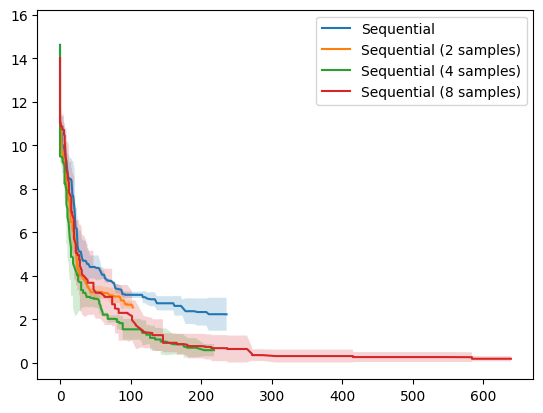

In [94]:
plt.plot(time_seq_1sample, mean_seq_1sample, label="Sequential")
plt.fill_between(time_seq_1sample, mean_seq_1sample - std_seq_1sample, mean_seq_1sample + std_seq_1sample, alpha=0.2)

plt.plot(time_seq_2samples, mean_seq_2samples, label="Sequential (2 samples)")
plt.fill_between(time_seq_2samples, mean_seq_2samples - std_seq_2samples, mean_seq_2samples + std_seq_2samples, alpha=0.2)

plt.plot(time_seq_4samples, mean_seq_4samples, label="Sequential (4 samples)")
plt.fill_between(time_seq_4samples, mean_seq_4samples - std_seq_4samples, mean_seq_4samples + std_seq_4samples, alpha=0.2)

plt.plot(time_seq_8samples, mean_seq_8samples, label="Sequential (8 samples)")
plt.fill_between(time_seq_8samples, mean_seq_8samples - std_seq_8samples, mean_seq_8samples + std_seq_8samples, alpha=0.2)

plt.legend()

In [95]:
import numpy as np
from matplotlib import pyplot as plt

result_4cores_samples = np.array([
[11.10592979371788, 11.10592979371788, 11.10592979371788, 11.10592979371788, 11.10592979371788, 11.10592979371788, 11.10592979371788, 11.10592979371788, 11.10592979371788, 11.10592979371788, 11.10592979371788, 11.10592979371788, 11.10592979371788, 11.10592979371788, 11.094583504336562, 11.094583504336562, 11.094583504336562, 11.094583504336562, 11.094583504336562, 11.094583504336562, 11.094583504336562, 11.094583504336562, 11.094583504336562, 11.094583504336562, 11.094583504336562, 11.094583504336562, 11.094583504336562, 11.094583504336562, 11.094583504336562, 8.659232891400857, 8.659232891400857, 8.659232891400857, 8.659232891400857, 8.659232891400857, 8.659232891400857, 8.659232891400857, 8.659232891400857, 8.659232891400857, 8.659232891400857, 8.659232891400857, 8.659232891400857, 8.659232891400857, 8.659232891400857, 8.659232891400857, 8.659232891400857, 8.659232891400857, 7.690293056674715, 7.690293056674715, 7.690293056674715, 7.690293056674715, 7.690293056674715, 7.690293056674715, 7.690293056674715, 7.690293056674715, 7.690293056674715, 7.690293056674715, 7.690293056674715, 7.690293056674715, 7.111673270369833, 7.111673270369833, 6.68659312853589, 6.312894172800046, 6.312894172800046, 5.408214109689371, 5.408214109689371, 5.408214109689371, 5.408214109689371, 5.408214109689371, 5.408214109689371, 5.408214109689371, 5.408214109689371, 5.408214109689371, 5.408214109689371, 5.408214109689371, 5.408214109689371, 5.408214109689371, 4.711493646653366, 4.711493646653366, 4.711493646653366, 3.5667608204608894, 3.5667608204608894, 3.5667608204608894, 3.5667608204608894, 3.5667608204608894, 3.5667608204608894, 3.5667608204608894, 3.5667608204608894, 3.5667608204608894, 3.5667608204608894, 3.5667608204608894, 3.5667608204608894, 3.5667608204608894, 3.5667608204608894, 3.5667608204608894, 3.5667608204608894, 3.4897814438957906, 3.359162091945255, 3.359162091945255, 3.359162091945255, 2.5154066320054125, 2.5154066320054125, 2.5154066320054125, 2.5154066320054125, 2.5154066320054125, 2.5154066320054125, 2.5154066320054125, 2.5154066320054125, 2.5154066320054125, 1.9830009638885753, 1.9830009638885753, 1.9830009638885753, 1.9547050850649161, 1.9547050850649161, 1.9547050850649161, 1.9547050850649161, 1.9547050850649161, 1.9547050850649161, 1.9547050850649161, 1.9547050850649161, 1.9547050850649161, 1.498025363518416, 1.498025363518416, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.7678118606354514, 0.745508777028896, 0.745508777028896, 0.745508777028896, 0.745508777028896, 0.6967960608509043, 0.6967960608509043, 0.6967960608509043, 0.6967960608509043, 0.6967960608509043, 0.6967960608509043, 0.6967960608509043, 0.6967960608509043, 0.6967960608509043, 0.6967960608509043, 0.6967960608509043, 0.6967960608509043, 0.6144980066247396, 0.5020529271643643, 0.5020529271643643, 0.5020529271643643, 0.5020529271643643, 0.5020529271643643, 0.5020529271643643, 0.5020529271643643, 0.5020529271643643, 0.5020529271643643, 0.5020529271643643, 0.5020529271643643, 0.4591188463589444, 0.4591188463589444, 0.4591188463589444, 0.4591188463589444, 0.4591188463589444, 0.4591188463589444, 0.4591188463589444, 0.4591188463589444, 0.4591188463589444, 0.4591188463589444, 0.4591188463589444, 0.4591188463589444, 0.4591188463589444, 0.4591188463589444, 0.4591188463589444, 0.4591188463589444, 0.4591188463589444, 0.4591188463589444, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595, 0.4520347187664595],
[5637.261, 5637.316, 5637.361, 5637.401, 5637.44, 5637.48, 5637.518, 5637.557, 5637.595, 5637.634, 5637.672, 5637.73, 5637.781, 5637.825, 5637.882, 5637.923, 5637.979, 5638.025, 5638.07, 5638.126, 5638.166, 5638.221, 5638.268, 5638.311, 5638.368, 5638.409, 5638.461, 5638.509, 5638.551, 5638.609, 5638.649, 5638.714, 5638.763, 5638.808, 5638.864, 5638.904, 5638.952, 5638.992, 5639.029, 5639.077, 6864.715, 6864.834, 6864.894, 6864.946, 8432.744, 8432.837, 8432.892, 8432.954, 9969.985, 9970.067, 9970.128, 9970.177, 11570.221, 11570.31, 11570.367, 11570.421, 12257.18, 12257.267, 12257.315, 12257.36, 13414.758, 13414.849, 13414.906, 13414.959, 13773.666, 13773.751, 13773.808, 13773.86, 14045.461, 14045.543, 14045.598, 14045.648, 14351.292, 14351.378, 14351.433, 14351.483, 17249.619, 17249.709, 17249.765, 17249.816, 20637.007, 20637.102, 20637.162, 20637.218, 24489.412, 24489.509, 24489.569, 24489.623, 27525.409, 27525.504, 27525.563, 27525.618, 34553.385, 34553.501, 34553.563, 34553.621, 36307.101, 36307.196, 36307.254, 36307.307, 37630.596, 37630.691, 37630.749, 37630.801, 40003.145, 40003.242, 40003.3, 40003.354, 43066.861, 43066.961, 43067.021, 43067.077, 49142.462, 49142.564, 49142.625, 49142.696, 50676.443, 50676.54, 50676.598, 50676.653, 57320.213, 57320.313, 57320.374, 57320.431, 57561.434, 57561.535, 57561.594, 57561.648, 60510.363, 60510.462, 60510.521, 60510.576, 65626.558, 65626.642, 65626.707, 65626.758, 71980.695, 71980.788, 71980.845, 71980.899, 79577.683, 79577.754, 79577.796, 79577.834, 86058.077, 86058.145, 86058.186, 86058.224, 86677.85, 86677.922, 86677.964, 86678.016, 95855.717, 95855.783, 95855.823, 95855.86, 106121.113, 106121.193, 106121.235, 106121.273, 114874.779, 114874.872, 114874.927, 114874.977, 152206.255, 152206.347, 152206.403, 152206.455, 181899.878, 181899.968, 181900.049, 181900.102, 213296.321, 213296.415, 213296.472, 213296.525, 251240.476, 251240.575, 251240.635, 251240.69, 306024.832, 306024.923, 306024.982, 306025.036, 361932.659, 361932.75, 361932.808, 361932.86, 411509.005, 411509.092, 411509.147, 411509.196, 477530.997, 477531.081, 477531.133, 477531.182, 529271.397, 529271.538, 529271.594, 529271.644, 587117.663, 587117.772, 587117.824, 587117.872, 645650.227, 645650.319, 645650.378, 645650.43, 707781.638, 707781.725, 707781.78, 707781.83, 774438.039, 774438.134, 774438.192, 774438.246, 843176.315, 843176.407, 843176.462, 843176.514, 918751.272, 918751.364, 918751.423, 918751.478, 1005166.311, 1005166.414, 1005166.467, 1005166.516, 1097476.59, 1097476.68, 1097476.738, 1097476.79, 1189340.901, 1189340.995, 1189341.054, 1189341.108, 1286641.865, 1286641.949, 1286642.003, 1286642.052, 1384688.198, 1384688.287, 1384688.344, 1384688.398, 1491000.805, 1491000.895, 1491000.953, 1491001.006, 1598479.596, 1598479.677, 1598479.73, 1598479.778, 1711559.759, 1711559.847, 1711559.903, 1711559.954, 1832557.518, 1832557.608, 1832557.66, 1832557.708, 1958771.341, 1958771.422, 1958771.473, 1958771.521, 2086950.103, 2086950.186, 2086950.238, 2086950.286, 2220089.449, 2220089.535, 2220089.589, 2220089.638, 2356601.414, 2356601.503, 2356601.555, 2356601.618, 2496334.487, 2496334.572, 2496334.627, 2496334.692],
[14.796510225453009, 14.582035715839604, 14.582035715839604, 14.240187209273163, 12.56511839147634, 12.56511839147634, 12.56511839147634, 11.73638533434377, 11.73638533434377, 11.73638533434377, 11.402578601218345, 11.402578601218345, 11.402578601218345, 11.402578601218345, 11.402578601218345, 11.402578601218345, 11.402578601218345, 10.73904670174793, 10.467636010825425, 10.467636010825425, 10.467636010825425, 10.467636010825425, 10.467636010825425, 10.467636010825425, 10.467636010825425, 10.467636010825425, 10.467636010825425, 10.467636010825425, 10.467636010825425, 10.467636010825425, 10.467636010825425, 10.467636010825425, 10.467636010825425, 10.467636010825425, 10.467636010825425, 10.467636010825425, 10.467636010825425, 10.467636010825425, 10.467636010825425, 10.467636010825425, 10.467636010825425, 10.467636010825425, 10.467636010825425, 10.467636010825425, 10.094052313537961, 10.094052313537961, 9.162055939396218, 9.162055939396218, 9.162055939396218, 8.950600916224811, 8.950600916224811, 8.950600916224811, 8.868089376939459, 8.868089376939459, 8.868089376939459, 8.868089376939459, 8.868089376939459, 8.868089376939459, 8.868089376939459, 8.868089376939459, 8.868089376939459, 8.34250973814989, 8.34250973814989, 8.34250973814989, 8.34250973814989, 8.34250973814989, 8.34250973814989, 8.34250973814989, 8.34250973814989, 8.34250973814989, 8.34250973814989, 8.34250973814989, 8.34250973814989, 8.34250973814989, 7.682942289417415, 7.682942289417415, 7.682942289417415, 7.682942289417415, 7.682942289417415, 7.682942289417415, 7.447324771481574, 7.2950222062612085, 7.209095289942606, 7.147584114290446, 7.147584114290446, 7.147584114290446, 7.147584114290446, 7.147584114290446, 7.147584114290446, 7.147584114290446, 7.147584114290446, 7.147584114290446, 6.928354301061198, 6.928354301061198, 6.178261499642932, 6.178261499642932, 6.178261499642932, 5.367199114363196, 5.167154545162738, 5.167154545162738, 4.469243109395485, 4.469243109395485, 4.469243109395485, 4.469243109395485, 4.469243109395485, 4.469243109395485, 4.469243109395485, 4.469243109395485, 4.469243109395485, 4.469243109395485, 4.469243109395485, 4.469243109395485, 4.469243109395485, 4.469243109395485, 4.469243109395485, 4.469243109395485, 4.469243109395485, 4.469243109395485, 4.469243109395485, 4.469243109395485, 4.469243109395485, 3.48758563675289, 3.48758563675289, 3.48758563675289, 3.48758563675289, 3.48758563675289, 3.48758563675289, 3.48758563675289, 3.48758563675289, 3.48758563675289, 3.48758563675289, 3.48758563675289, 3.48758563675289, 3.48758563675289, 3.48758563675289, 3.48758563675289, 3.48758563675289, 3.48758563675289, 3.48758563675289, 3.48758563675289, 3.48758563675289, 3.48758563675289, 3.48758563675289, 3.48758563675289, 3.48758563675289, 3.48758563675289, 3.48758563675289, 3.259054755798783, 3.133554065759427, 3.133554065759427, 3.133554065759427, 3.133554065759427, 3.133554065759427, 3.133554065759427, 3.133554065759427, 3.133554065759427, 3.133554065759427, 3.133554065759427, 3.133554065759427, 3.133554065759427, 0.9196538713459046, 0.9151180295227666, 0.836121682386445, 0.836121682386445, 0.836121682386445, 0.7873004424825258, 0.7873004424825258, 0.5825409247440274, 0.5825409247440274, 0.5825409247440274, 0.5825409247440274, 0.5825409247440274, 0.5825409247440274, 0.5825409247440274, 0.5825409247440274, 0.5825409247440274, 0.5825409247440274, 0.5825409247440274, 0.5825409247440274, 0.5825409247440274, 0.5825409247440274, 0.5825409247440274, 0.5825409247440274, 0.5825409247440274, 0.5825409247440274, 0.5825409247440274, 0.5825409247440274, 0.4682267998254699, 0.4682267998254699, 0.4682267998254699, 0.4682267998254699, 0.4682267998254699, 0.4682267998254699, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255, 0.2574062357792255],
[5557.642, 5557.726, 5557.805, 5557.87, 5557.914, 5557.954, 5557.993, 5558.031, 5558.069, 5558.107, 5558.145, 5558.193, 5558.254, 5558.295, 5558.333, 5558.37, 5558.407, 5558.444, 5558.481, 5558.518, 5558.556, 5558.592, 5558.629, 5558.666, 5558.727, 5558.766, 5558.807, 5558.869, 5558.909, 5558.947, 5558.984, 5559.021, 5559.064, 5559.101, 5559.157, 5559.306, 5559.349, 5559.389, 5559.428, 5559.472, 6479.063, 6479.151, 6479.208, 6479.261, 7354.25, 7354.33, 7354.384, 7354.435, 10150.928, 10151.021, 10151.079, 10151.149, 11695.39, 11695.478, 11695.536, 11695.588, 12002.844, 12002.935, 12002.994, 12003.048, 13893.728, 13893.817, 13893.875, 13893.926, 15256.48, 15256.567, 15256.622, 15256.673, 15688.427, 15688.521, 15688.579, 15688.631, 17155.665, 17155.755, 17155.813, 17155.869, 18546.464, 18546.552, 18546.609, 18546.662, 20254.663, 20254.78, 20254.842, 20254.899, 21827.08, 21827.172, 21827.232, 21827.288, 24525.256, 24525.34, 24525.395, 24525.447, 25882.372, 25882.467, 25882.526, 25882.581, 29223.377, 29223.474, 29223.535, 29223.589, 31023.464, 31023.559, 31023.617, 31023.671, 32540.875, 32540.963, 32541.02, 32541.072, 35216.329, 35216.422, 35216.48, 35216.546, 37873.016, 37873.129, 37873.19, 37873.245, 40708.931, 40709.024, 40709.082, 40709.135, 44532.05, 44532.153, 44532.218, 44532.271, 48813.899, 48814.004, 48814.067, 48814.124, 51343.489, 51343.588, 51343.646, 51343.699, 57016.875, 57016.98, 57017.04, 57017.098, 57981.046, 57981.141, 57981.199, 57981.252, 58790.493, 58790.595, 58790.655, 58790.722, 62153.021, 62153.122, 62153.183, 62153.239, 63832.958, 63833.059, 63833.118, 63833.171, 67154.557, 67154.653, 67154.73, 67154.787, 67837.99, 67838.083, 67838.14, 67838.192, 119746.475, 119746.565, 119746.621, 119746.681, 158064.339, 158064.456, 158064.518, 158064.573, 187318.652, 187318.775, 187318.837, 187318.893, 219744.141, 219744.235, 219744.293, 219744.347, 256223.038, 256223.131, 256223.189, 256223.241, 294210.502, 294210.599, 294210.659, 294210.736, 340581.321, 340581.411, 340581.466, 340581.518, 403211.951, 403212.047, 403212.105, 403212.16, 470779.562, 470779.652, 470779.708, 470779.76, 529394.224, 529394.305, 529394.356, 529394.403, 585635.14, 585635.227, 585635.28, 585635.329, 643767.625, 643767.73, 643767.785, 643767.836, 706982.3, 706982.408, 706982.465, 706982.516, 771252.329, 771252.414, 771252.468, 771252.518, 841239.463, 841239.55, 841239.606, 841239.656, 914922.326, 914922.408, 914922.461, 914922.508, 1005519.404, 1005519.483, 1005519.535, 1005519.582, 1090586.739, 1090586.825, 1090586.879, 1090586.928, 1186132.228, 1186132.32, 1186132.375, 1186132.426, 1285985.022, 1285985.105, 1285985.158, 1285985.206, 1390561.634, 1390561.717, 1390561.771, 1390561.821, 1500058.486, 1500058.571, 1500058.624, 1500058.685, 1611585.892, 1611585.982, 1611586.04, 1611586.093, 1726743.112, 1726743.203, 1726743.26, 1726743.313, 1851100.46, 1851100.548, 1851100.604, 1851100.654, 1978751.507, 1978751.599, 1978751.659, 1978751.713, 2109244.711, 2109244.798, 2109244.855, 2109244.909, 2240164.814, 2240164.903, 2240164.957, 2240165.008, 2376381.929, 2376382.018, 2376382.074, 2376382.125, 2510974.37, 2510974.454, 2510974.508, 2510974.557],
[13.357100652680522, 13.175087586228088, 12.028572070282639, 12.028572070282639, 12.028572070282639, 12.028572070282639, 12.028572070282639, 12.028572070282639, 12.028572070282639, 10.729131623340384, 10.729131623340384, 10.729131623340384, 10.729131623340384, 10.729131623340384, 10.729131623340384, 10.729131623340384, 9.778388572382553, 9.778388572382553, 9.778388572382553, 9.778388572382553, 9.778388572382553, 9.778388572382553, 9.778388572382553, 9.778388572382553, 9.778388572382553, 9.778388572382553, 9.778388572382553, 9.778388572382553, 9.778388572382553, 9.778388572382553, 9.778388572382553, 9.778388572382553, 9.778388572382553, 9.778388572382553, 9.778388572382553, 9.778388572382553, 9.778388572382553, 9.778388572382553, 9.778388572382553, 9.778388572382553, 9.778388572382553, 9.778388572382553, 9.778388572382553, 9.778388572382553, 9.778388572382553, 8.877059023650894, 8.877059023650894, 8.877059023650894, 8.877059023650894, 8.877059023650894, 8.877059023650894, 8.877059023650894, 8.877059023650894, 8.877059023650894, 8.877059023650894, 8.877059023650894, 8.877059023650894, 8.877059023650894, 8.877059023650894, 8.877059023650894, 8.877059023650894, 8.877059023650894, 8.877059023650894, 8.877059023650894, 8.593526213704546, 8.016781033679122, 7.938496401216403, 7.938496401216403, 7.240554289408536, 7.240554289408536, 6.740727803958864, 6.740727803958864, 6.740727803958864, 6.740727803958864, 6.740727803958864, 6.740727803958864, 6.740727803958864, 6.740727803958864, 6.740727803958864, 6.740727803958864, 6.740727803958864, 6.740727803958864, 6.740727803958864, 6.740727803958864, 6.0284594435012195, 6.0284594435012195, 5.709999393006964, 5.486839409231234, 5.486839409231234, 5.058463742548895, 5.058463742548895, 5.044265707248414, 4.512588231210703, 4.512588231210703, 4.512588231210703, 4.439495630703593, 4.287243016987826, 4.287243016987826, 4.287243016987826, 4.287243016987826, 4.287243016987826, 4.287243016987826, 4.287243016987826, 4.287243016987826, 3.692076523519074, 3.692076523519074, 3.692076523519074, 3.692076523519074, 3.580224711998856, 3.1055544379673887, 3.1055544379673887, 3.1055544379673887, 3.1055544379673887, 3.1055544379673887, 3.1055544379673887, 3.1055544379673887, 3.1055544379673887, 3.1055544379673887, 3.1055544379673887, 3.1055544379673887, 3.1055544379673887, 3.1055544379673887, 3.1055544379673887, 3.1055544379673887, 3.1055544379673887, 3.1055544379673887, 3.1055544379673887, 3.1055544379673887, 3.1055544379673887, 2.850835027655855, 2.850835027655855, 2.850835027655855, 2.850835027655855, 2.850835027655855, 2.850835027655855, 2.850835027655855, 2.850835027655855, 2.850835027655855, 2.850835027655855, 2.850835027655855, 2.7298010456270956, 2.7298010456270956, 2.7298010456270956, 2.7298010456270956, 2.7298010456270956, 2.7298010456270956, 2.7298010456270956, 2.676781324862539, 2.676781324862539, 2.676781324862539, 2.676781324862539, 2.676781324862539, 2.676781324862539, 2.676781324862539, 2.676781324862539, 2.676781324862539, 2.676781324862539, 2.676781324862539, 2.676781324862539, 2.676781324862539, 1.055036782128941, 0.7666278367805224, 0.7352739557407486, 0.7352739557407486, 0.7352739557407486, 0.7352739557407486, 0.6850732120732528, 0.6850732120732528, 0.6850732120732528, 0.6850732120732528, 0.6850732120732528, 0.6850732120732528, 0.6850732120732528, 0.6850732120732528, 0.6850732120732528, 0.6850732120732528, 0.6850732120732528, 0.6850732120732528, 0.6850732120732528, 0.6850732120732528, 0.6850732120732528, 0.6850732120732528, 0.6850732120732528, 0.6585279279045122, 0.6585279279045122, 0.6585279279045122, 0.6585279279045122, 0.6585279279045122, 0.6585279279045122, 0.6585279279045122, 0.6585279279045122, 0.6585279279045122, 0.6585279279045122, 0.6585279279045122, 0.6585279279045122, 0.6585279279045122, 0.6585279279045122, 0.6585279279045122, 0.6585279279045122, 0.6585279279045122, 0.6585279279045122, 0.6585279279045122, 0.6585279279045122, 0.6585279279045122, 0.6585279279045122, 0.6585279279045122, 0.6585279279045122, 0.6585279279045122, 0.6585279279045122, 0.6585279279045122, 0.6585279279045122, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507, 0.5754587856288507],
[5557.381, 5557.439, 5557.486, 5557.528, 5557.569, 5557.61, 5557.649, 5557.689, 5557.729, 5557.769, 5557.809, 5557.849, 5557.889, 5557.929, 5557.969, 5558.009, 5558.048, 5558.089, 5558.129, 5558.168, 5558.208, 5558.247, 5558.286, 5558.326, 5558.365, 5558.406, 5558.445, 5558.484, 5558.524, 5558.562, 5558.602, 5558.653, 5558.723, 5558.767, 5558.808, 5558.852, 5558.9, 5558.94, 5559.095, 5559.161, 7013.605, 7013.698, 7013.758, 7013.813, 9344.909, 9344.996, 9345.052, 9345.109, 9802.055, 9802.145, 9802.205, 9802.276, 11532.999, 11533.088, 11533.155, 11533.21, 12871.262, 12871.356, 12871.416, 12871.472, 13145.767, 13145.848, 13145.903, 13145.953, 14611.589, 14611.681, 14611.741, 14611.798, 16997.997, 16998.09, 16998.151, 16998.207, 18614.283, 18614.376, 18614.437, 18614.493, 18971.156, 18971.242, 18971.299, 18971.369, 19363.855, 19363.933, 19363.982, 19364.028, 20591.096, 20591.198, 20591.26, 20591.317, 21996.09, 21996.187, 21996.248, 21996.305, 26284.192, 26284.294, 26284.355, 26284.413, 28302.607, 28302.72, 28302.784, 28302.841, 31524.887, 31524.977, 31525.033, 31525.085, 35117.138, 35117.275, 35117.338, 35117.396, 42253.381, 42253.484, 42253.545, 42253.601, 43787.228, 43787.329, 43787.392, 43787.45, 47655.245, 47655.344, 47655.405, 47655.46, 49994.454, 49994.557, 49994.633, 49994.718, 50241.427, 50241.533, 50241.595, 50241.654, 53168.753, 53168.844, 53168.899, 53168.949, 55411.449, 55411.543, 55411.601, 55411.68, 59439.089, 59439.19, 59439.252, 59439.309, 65412.092, 65412.195, 65412.256, 65412.312, 68769.386, 68769.482, 68769.54, 68769.594, 69035.363, 69035.452, 69035.506, 69035.556, 69318.271, 69318.365, 69318.421, 69318.472, 71406.272, 71406.36, 71406.416, 71406.469, 129066.275, 129066.371, 129066.43, 129066.487, 165286.372, 165286.476, 165286.55, 165286.609, 199946.111, 199946.207, 199946.268, 199946.324, 229058.146, 229058.243, 229058.303, 229058.358, 282828.82, 282828.917, 282828.978, 282829.041, 335506.679, 335506.783, 335506.844, 335506.901, 392356.033, 392356.151, 392356.215, 392356.272, 455762.711, 455762.813, 455762.872, 455762.928, 522847.672, 522847.769, 522847.83, 522847.886, 578671.835, 578671.927, 578671.985, 578672.038, 637790.886, 637790.982, 637791.04, 637791.095, 698524.967, 698525.056, 698525.112, 698525.163, 764598.599, 764598.7, 764598.758, 764598.809, 833373.461, 833373.549, 833373.604, 833373.655, 908088.981, 908089.072, 908089.128, 908089.18, 987954.977, 987955.07, 987955.128, 987955.182, 1068315.557, 1068315.653, 1068315.714, 1068315.769, 1154095.891, 1154095.976, 1154096.03, 1154096.08, 1247857.526, 1247857.622, 1247857.679, 1247857.732, 1342690.856, 1342690.945, 1342691.005, 1342691.059, 1443337.83, 1443337.92, 1443337.978, 1443338.031, 1549432.622, 1549432.706, 1549432.761, 1549432.812, 1656723.489, 1656723.574, 1656723.627, 1656723.676, 1770880.458, 1770880.547, 1770880.605, 1770880.668, 1889191.916, 1889192.004, 1889192.061, 1889192.113, 2015072.529, 2015072.622, 2015072.681, 2015072.736, 2140575.109, 2140575.203, 2140575.264, 2140575.319, 2271294.807, 2271294.9, 2271294.958, 2271295.011, 2404430.742, 2404430.835, 2404430.895, 2404430.988, 2534543.047, 2534543.124, 2534543.174, 2534543.22],
[15.124631889569525, 13.790159939239505, 13.790159939239505, 13.254440803786714, 13.254440803786714, 12.887192016363748, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.664592875206916, 10.555148857886364, 10.555148857886364, 10.555148857886364, 10.555148857886364, 10.555148857886364, 10.555148857886364, 10.555148857886364, 9.78428396027394, 9.78428396027394, 9.78428396027394, 9.78428396027394, 9.459196860641832, 9.263965377002236, 9.263965377002236, 9.263965377002236, 9.263965377002236, 9.263965377002236, 9.263965377002236, 9.263965377002236, 9.263965377002236, 9.263965377002236, 9.263965377002236, 9.179605452515323, 9.179605452515323, 9.179605452515323, 9.179605452515323, 9.179605452515323, 9.179605452515323, 9.179605452515323, 9.179605452515323, 9.179605452515323, 8.148913788726238, 8.148913788726238, 8.054840047877331, 7.718282379490963, 7.718282379490963, 7.718282379490963, 7.718282379490963, 7.718282379490963, 7.718282379490963, 7.718282379490963, 7.718282379490963, 7.718282379490963, 7.603014564204679, 7.409482069003442, 7.409482069003442, 7.409482069003442, 7.409482069003442, 7.409482069003442, 7.409482069003442, 7.409482069003442, 7.409482069003442, 7.409482069003442, 7.409482069003442, 7.409482069003442, 6.445944855158952, 6.205079215750185, 6.151777749896379, 6.041399751685937, 4.174841878607669, 4.174841878607669, 4.174841878607669, 4.174841878607669, 3.5474009890243967, 3.5474009890243967, 3.5474009890243967, 3.5474009890243967, 3.5474009890243967, 3.5474009890243967, 3.5474009890243967, 3.5474009890243967, 3.5474009890243967, 3.4334335543703003, 3.4334335543703003, 3.4334335543703003, 3.4334335543703003, 3.4334335543703003, 3.4334335543703003, 3.4334335543703003, 3.4334335543703003, 2.5407413060151254, 2.5407413060151254, 2.5407413060151254, 2.5407413060151254, 2.5407413060151254, 2.4833444463018854, 2.4833444463018854, 2.4833444463018854, 2.4833444463018854, 2.4833444463018854, 2.4833444463018854, 2.4833444463018854, 2.4833444463018854, 2.4833444463018854, 2.4833444463018854, 2.4833444463018854, 2.4833444463018854, 2.4833444463018854, 2.4833444463018854, 2.4833444463018854, 2.4833444463018854, 2.4833444463018854, 2.4833444463018854, 2.4833444463018854, 2.4833444463018854, 2.4833444463018854, 2.4833444463018854, 2.4833444463018854, 2.4833444463018854, 2.4833444463018854, 2.4833444463018854, 1.1353516701519557, 0.501996344136519, 0.4477146470552822, 0.4477146470552822, 0.4477146470552822, 0.4477146470552822, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602, 0.3117584239155602],
[5554.576, 5554.636, 5554.7, 5554.749, 5554.792, 5554.839, 5554.881, 5554.923, 5554.964, 5555.005, 5555.046, 5555.087, 5555.128, 5555.169, 5555.209, 5555.249, 5555.289, 5555.33, 5555.371, 5555.411, 5555.451, 5555.491, 5555.531, 5555.571, 5555.611, 5555.651, 5555.69, 5555.73, 5555.771, 5555.811, 5555.851, 5555.891, 5555.931, 5555.972, 5556.012, 5556.052, 5556.092, 5556.132, 5556.283, 5556.328, 7255.853, 7255.937, 7255.989, 7256.037, 9405.475, 9405.557, 9405.611, 9405.661, 10328.062, 10328.135, 10328.202, 10328.249, 12215.99, 12216.071, 12216.124, 12216.173, 14371.073, 14371.154, 14371.204, 14371.25, 16642.577, 16642.654, 16642.714, 16642.761, 19284.928, 19285.005, 19285.055, 19285.101, 21661.847, 21661.923, 21661.973, 21662.019, 22173.445, 22173.528, 22173.581, 22173.63, 22520.91, 22520.992, 22521.057, 22521.112, 25496.491, 25496.572, 25496.623, 25496.67, 25993.541, 25993.626, 25993.68, 25993.73, 26858.939, 26859.023, 26859.076, 26859.125, 30787.608, 30787.715, 30787.768, 30787.815, 32182.891, 32182.976, 32183.031, 32183.083, 34393.324, 34393.399, 34393.448, 34393.495, 38508.909, 38508.995, 38509.05, 38509.101, 42622.47, 42622.569, 42622.624, 42622.684, 46676.658, 46676.745, 46676.798, 46676.847, 51184.825, 51184.916, 51184.969, 51185.019, 53186.902, 53186.989, 53187.043, 53187.093, 55703.972, 55704.063, 55704.115, 55704.163, 61385.339, 61385.433, 61385.488, 61385.537, 65569.915, 65570.012, 65570.069, 65570.122, 66234.548, 66234.642, 66234.709, 66234.762, 68941.014, 68941.102, 68941.153, 68941.201, 69220.07, 69220.163, 69220.216, 69220.266, 73026.151, 73026.237, 73026.288, 73026.334, 75104.921, 75105.006, 75105.057, 75105.104, 78202.065, 78202.142, 78202.19, 78202.235, 133179.59, 133179.683, 133179.742, 133179.794, 169508.772, 169508.873, 169508.932, 169508.989, 198208.187, 198208.287, 198208.346, 198208.401, 236482.19, 236482.282, 236482.337, 236482.388, 292405.825, 292405.923, 292405.985, 292406.042, 335574.097, 335574.188, 335574.245, 335574.297, 393300.454, 393300.549, 393300.608, 393300.662, 457676.999, 457677.094, 457677.168, 457677.221, 510142.829, 510142.919, 510142.976, 510143.028, 564572.144, 564572.234, 564572.29, 564572.341, 622067.987, 622068.071, 622068.122, 622068.171, 691911.669, 691911.747, 691911.796, 691911.842, 766751.662, 766751.752, 766751.804, 766751.866, 834612.936, 834613.02, 834613.072, 834613.12, 916506.463, 916506.55, 916506.604, 916506.653, 1001281.348, 1001281.442, 1001281.501, 1001281.555, 1091471.26, 1091471.357, 1091471.414, 1091471.467, 1184018.798, 1184018.885, 1184018.94, 1184018.991, 1277616.216, 1277616.299, 1277616.352, 1277616.399, 1376638.336, 1376638.423, 1376638.479, 1376638.53, 1478841.196, 1478841.287, 1478841.345, 1478841.399, 1583813.67, 1583813.758, 1583813.814, 1583813.865, 1686212.215, 1686212.304, 1686212.36, 1686212.414, 1803057.433, 1803057.52, 1803057.579, 1803057.65, 1924099.416, 1924099.513, 1924099.574, 1924099.629, 2049619.887, 2049619.995, 2049620.055, 2049620.111, 2177925.836, 2177925.927, 2177925.985, 2177926.039, 2310958.879, 2310958.971, 2310959.026, 2310959.091, 2445394.777, 2445394.865, 2445394.922, 2445394.976, 2571122.775, 2571122.844, 2571122.887, 2571122.927],
[15.583567216590154, 15.019590690741257, 13.574433926404728, 13.574433926404728, 13.125692677238888, 13.125692677238888, 13.125692677238888, 12.625335200970412, 12.625335200970412, 12.625335200970412, 12.625335200970412, 12.020783393577444, 12.020783393577444, 12.020783393577444, 11.957355738371959, 11.957355738371959, 11.439672381938044, 9.005374541771008, 9.005374541771008, 9.005374541771008, 9.005374541771008, 9.005374541771008, 9.005374541771008, 9.005374541771008, 9.005374541771008, 9.005374541771008, 9.005374541771008, 9.005374541771008, 9.005374541771008, 9.005374541771008, 9.005374541771008, 9.005374541771008, 9.005374541771008, 9.005374541771008, 9.005374541771008, 9.005374541771008, 9.005374541771008, 9.005374541771008, 9.005374541771008, 9.005374541771008, 7.32915826910758, 7.32915826910758, 7.32915826910758, 7.32915826910758, 7.32915826910758, 7.32915826910758, 7.32915826910758, 7.32915826910758, 7.2975988918341255, 7.2975988918341255, 7.247638796572186, 6.263109993942667, 6.263109993942667, 6.263109993942667, 6.263109993942667, 6.263109993942667, 6.263109993942667, 6.263109993942667, 6.263109993942667, 6.263109993942667, 5.2626442136518925, 5.008342471168849, 5.008342471168849, 5.008342471168849, 5.008342471168849, 5.008342471168849, 5.008342471168849, 5.008342471168849, 5.008342471168849, 5.008342471168849, 5.008342471168849, 5.008342471168849, 5.008342471168849, 4.066847390242895, 4.066847390242895, 4.066847390242895, 4.066847390242895, 4.066847390242895, 4.066847390242895, 4.066847390242895, 4.066847390242895, 3.9310794000757636, 3.9310794000757636, 3.9310794000757636, 3.715269522144958, 3.57178693346641, 3.4116544156900805, 3.1917606920608397, 3.1917606920608397, 3.1917606920608397, 3.1917606920608397, 3.1917606920608397, 3.1917606920608397, 3.1917606920608397, 3.1917606920608397, 3.1917606920608397, 3.1917606920608397, 3.1917606920608397, 3.1917606920608397, 2.9112828922336793, 2.763032088407073, 2.763032088407073, 2.763032088407073, 2.763032088407073, 2.763032088407073, 2.763032088407073, 2.763032088407073, 2.763032088407073, 2.763032088407073, 2.763032088407073, 2.763032088407073, 2.763032088407073, 2.763032088407073, 2.763032088407073, 2.763032088407073, 2.763032088407073, 2.763032088407073, 2.763032088407073, 2.763032088407073, 2.42929857582622, 2.42929857582622, 2.42929857582622, 2.42929857582622, 2.349898573770226, 2.349898573770226, 2.349898573770226, 2.349898573770226, 2.349898573770226, 2.349898573770226, 2.349898573770226, 2.112375282025813, 2.112375282025813, 2.112375282025813, 2.112375282025813, 2.112375282025813, 2.112375282025813, 2.112375282025813, 2.112375282025813, 2.112375282025813, 2.112375282025813, 2.112375282025813, 2.112375282025813, 1.8668424622364772, 1.8668424622364772, 1.8668424622364772, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.8114341743521938, 1.3507766823985148, 1.3507766823985148, 1.3507766823985148, 1.2352522036178262, 1.2352522036178262, 1.1838484427333822, 1.1838484427333822, 1.1838484427333822, 1.1838484427333822, 1.1838484427333822, 1.1838484427333822, 1.1838484427333822, 1.1838484427333822, 1.1838484427333822, 1.1838484427333822, 1.1838484427333822, 1.1838484427333822, 1.1838484427333822, 1.1838484427333822, 1.1838484427333822, 1.1495128404894257, 1.1495128404894257, 1.1495128404894257, 1.1495128404894257, 1.1495128404894257, 1.1495128404894257, 1.1495128404894257, 1.1495128404894257, 1.1495128404894257, 1.1495128404894257, 1.1495128404894257, 1.1495128404894257, 1.1495128404894257, 1.1495128404894257, 1.1495128404894257, 1.1495128404894257, 1.0995772055101303, 1.0995772055101303, 1.0386783608300658, 0.8677034608264695, 0.8677034608264695, 0.8677034608264695, 0.8677034608264695, 0.8677034608264695, 0.7273186506309597, 0.7273186506309597, 0.7273186506309597, 0.7273186506309597, 0.5033090122386352, 0.5033090122386352, 0.5033090122386352, 0.5033090122386352, 0.5033090122386352, 0.4834391116086647, 0.4834391116086647, 0.4834391116086647, 0.4834391116086647, 0.4834391116086647, 0.4834391116086647, 0.4834391116086647, 0.4834391116086647, 0.4834391116086647, 0.4834391116086647, 0.4834391116086647, 0.4834391116086647, 0.4834391116086647, 0.4834391116086647, 0.4834391116086647, 0.4834391116086647, 0.4834391116086647, 0.4834391116086647, 0.4834391116086647, 0.47819616621731287, 0.47819616621731287, 0.47819616621731287, 0.47819616621731287, 0.47819616621731287, 0.47819616621731287, 0.47819616621731287, 0.47819616621731287, 0.47819616621731287, 0.47819616621731287, 0.47819616621731287, 0.4474647685058213, 0.4474647685058213, 0.4474647685058213, 0.4474647685058213, 0.4474647685058213],
[5155.649, 5155.7, 5155.739, 5155.774, 5155.809, 5155.844, 5155.879, 5155.912, 5155.946, 5155.98, 5156.013, 5156.047, 5156.08, 5156.113, 5156.146, 5156.179, 5156.213, 5156.247, 5156.281, 5156.314, 5156.347, 5156.38, 5156.413, 5156.446, 5156.48, 5156.513, 5156.546, 5156.579, 5156.612, 5156.645, 5156.679, 5156.712, 5156.745, 5156.778, 5156.903, 5156.94, 5156.981, 5157.015, 5157.049, 5157.083, 6203.493, 6203.574, 6203.623, 6203.668, 7913.425, 7913.499, 7913.545, 7913.588, 9499.943, 9500.027, 9500.078, 9500.127, 9775.886, 9775.964, 9776.015, 9776.062, 13105.486, 13105.574, 13105.626, 13105.675, 15579.063, 15579.176, 15579.232, 15579.282, 15963.411, 15963.491, 15963.543, 15963.591, 18609.425, 18609.542, 18609.6, 18609.652, 20093.488, 20093.572, 20093.624, 20093.672, 20226.478, 20226.562, 20226.612, 20226.659, 22825.596, 22825.681, 22825.733, 22825.78, 25930.352, 25930.435, 25930.503, 25930.551, 29220.58, 29220.67, 29220.724, 29220.774, 30709.346, 30709.433, 30709.486, 30709.552, 33929.637, 33929.726, 33929.806, 33929.86, 37679.107, 37679.198, 37679.251, 37679.309, 39612.104, 39612.186, 39612.239, 39612.287, 41558.963, 41559.053, 41559.108, 41559.158, 45031.845, 45031.932, 45031.985, 45032.034, 49273.645, 49273.732, 49273.785, 49273.834, 52475.116, 52475.203, 52475.253, 52475.298, 54603.497, 54603.568, 54603.612, 54603.653, 56784.554, 56784.646, 56784.699, 56784.749, 60955.448, 60955.536, 60955.59, 60955.64, 61515.451, 61515.535, 61515.586, 61515.633, 63741.342, 63741.431, 63741.484, 63741.534, 68233.519, 68233.589, 68233.631, 68233.683, 68523.065, 68523.125, 68523.163, 68523.198, 71060.635, 71060.701, 71060.741, 71060.778, 77302.552, 77302.619, 77302.657, 77302.693, 84212.804, 84212.896, 84212.951, 84213.001, 86597.003, 86597.092, 86597.146, 86597.197, 88171.639, 88171.766, 88171.84, 88171.895, 89908.47, 89908.565, 89908.62, 89908.67, 95031.395, 95031.501, 95031.561, 95031.615, 96766.576, 96766.673, 96766.727, 96766.778, 104650.673, 104650.766, 104650.823, 104650.875, 106351.03, 106351.126, 106351.182, 106351.233, 109186.062, 109186.163, 109186.219, 109186.272, 125860.42, 125860.523, 125860.582, 125860.635, 134563.658, 134563.753, 134563.808, 134563.859, 158106.908, 158107.0, 158107.057, 158107.109, 178102.868, 178102.96, 178103.016, 178103.067, 189209.541, 189209.627, 189209.68, 189209.728, 222701.707, 222701.796, 222701.851, 222701.911, 260484.915, 260484.999, 260485.051, 260485.099, 262318.422, 262318.526, 262318.584, 262318.636, 306866.9, 306866.995, 306867.051, 306867.102, 352947.608, 352947.7, 352947.756, 352947.807, 402152.326, 402152.416, 402152.471, 402152.522, 445618.114, 445618.204, 445618.258, 445618.308, 502481.032, 502481.118, 502481.173, 502481.227, 564093.239, 564093.325, 564093.378, 564093.426, 629543.253, 629543.339, 629543.392, 629543.441, 700253.108, 700253.195, 700253.267, 700253.318, 702293.52, 702293.613, 702293.671, 702293.723, 765272.681, 765272.773, 765272.827, 765272.877, 833784.239, 833784.324, 833784.376, 833784.423, 871420.521, 871420.613, 871420.682, 871420.734, 912962.31, 912962.407, 912962.482, 912962.538],
[14.852780940058327, 14.852780940058327, 13.01842355974648, 12.366201976209187, 12.366201976209187, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 12.02245263985917, 11.807867778479281, 11.788413623468088, 11.63243470673432, 11.63243470673432, 11.22058453098924, 10.989573532703687, 10.776105996625668, 10.776105996625668, 10.43639195739651, 10.43639195739651, 10.245687429649296, 10.245687429649296, 10.245687429649296, 10.245687429649296, 10.245687429649296, 10.245687429649296, 9.976884127077309, 9.976884127077309, 9.976884127077309, 9.976884127077309, 9.531070877727785, 9.531070877727785, 8.26362394828454, 8.26362394828454, 8.26362394828454, 8.26362394828454, 8.26362394828454, 8.26362394828454, 7.361835513261058, 6.602834279445268, 6.602834279445268, 6.602834279445268, 5.921857093054662, 5.921857093054662, 5.921857093054662, 5.921857093054662, 5.921857093054662, 5.921857093054662, 5.921857093054662, 5.921857093054662, 5.921857093054662, 5.921857093054662, 5.921857093054662, 5.921857093054662, 5.302343435102383, 5.302343435102383, 5.302343435102383, 5.302343435102383, 5.302343435102383, 5.302343435102383, 5.302343435102383, 5.302343435102383, 4.535960720969694, 4.535960720969694, 4.535960720969694, 3.615634807470063, 3.615634807470063, 3.615634807470063, 3.615634807470063, 3.615634807470063, 3.615634807470063, 3.615634807470063, 3.615634807470063, 3.615634807470063, 3.615634807470063, 3.3355693275237788, 3.3355693275237788, 3.3355693275237788, 3.3355693275237788, 3.3355693275237788, 3.3355693275237788, 3.3355693275237788, 3.3355693275237788, 3.3355693275237788, 3.3355693275237788, 3.3355693275237788, 2.896849518274611, 2.896849518274611, 2.896849518274611, 2.896849518274611, 2.896849518274611, 2.896849518274611, 2.896849518274611, 2.896849518274611, 2.896849518274611, 2.896849518274611, 2.896849518274611, 2.896849518274611, 2.896849518274611, 2.896849518274611, 2.896849518274611, 2.896849518274611, 2.896849518274611, 2.896849518274611, 2.896849518274611, 2.896849518274611, 2.896849518274611, 2.896849518274611, 2.896849518274611, 2.896849518274611, 2.896849518274611, 2.896849518274611, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 2.302029065577003, 1.5018999837309228, 1.5018999837309228, 1.5018999837309228, 1.5018999837309228, 1.5018999837309228, 1.5018999837309228, 1.5018999837309228, 1.5018999837309228, 1.269494768555259, 1.269494768555259, 1.269494768555259, 1.269494768555259, 1.269494768555259, 1.269494768555259, 1.269494768555259, 1.269494768555259, 1.269494768555259, 1.269494768555259, 1.269494768555259, 1.269494768555259, 1.269494768555259, 1.269494768555259, 1.0056334482900593, 1.0056334482900593, 1.0056334482900593, 1.0056334482900593, 1.0056334482900593, 1.0056334482900593, 1.0056334482900593, 1.0056334482900593, 1.0056334482900593, 1.0056334482900593, 1.0056334482900593, 1.0056334482900593, 1.0056334482900593, 1.0056334482900593, 0.90840759986849, 0.90840759986849, 0.90840759986849, 0.90840759986849, 0.90840759986849, 0.90840759986849, 0.90840759986849, 0.90840759986849, 0.90840759986849, 0.90840759986849, 0.90840759986849, 0.90840759986849, 0.90840759986849, 0.90840759986849, 0.90840759986849, 0.90840759986849, 0.90840759986849, 0.90840759986849, 0.90840759986849, 0.90840759986849, 0.7172851089875327, 0.7172851089875327, 0.7172851089875327, 0.7172851089875327, 0.7172851089875327, 0.7172851089875327, 0.7172851089875327, 0.644118258603037, 0.644118258603037, 0.644118258603037, 0.644118258603037, 0.644118258603037, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.581878051733494, 0.5799033176604742, 0.5799033176604742, 0.5799033176604742],
[5111.092, 5111.153, 5111.197, 5111.237, 5111.29, 5111.327, 5111.364, 5111.399, 5111.435, 5111.471, 5111.506, 5111.543, 5111.578, 5111.614, 5111.649, 5111.683, 5111.718, 5111.753, 5111.788, 5111.823, 5111.857, 5111.892, 5111.927, 5111.962, 5111.997, 5112.032, 5112.066, 5112.101, 5112.135, 5112.169, 5112.205, 5112.24, 5112.276, 5112.311, 5112.356, 5112.42, 5112.477, 5112.536, 5112.584, 5112.73, 6016.09, 6016.169, 6016.219, 6016.265, 6898.545, 6898.625, 6898.676, 6898.722, 8474.143, 8474.22, 8474.272, 8474.319, 9072.516, 9072.611, 9072.664, 9072.711, 10342.085, 10342.167, 10342.217, 10342.263, 12365.351, 12365.432, 12365.484, 12365.533, 12653.958, 12654.039, 12654.088, 12654.134, 13985.674, 13985.761, 13985.812, 13985.859, 16236.227, 16236.312, 16236.364, 16236.412, 19842.304, 19842.393, 19842.452, 19842.503, 20722.723, 20722.801, 20722.851, 20722.897, 22960.363, 22960.449, 22960.5, 22960.548, 24658.795, 24658.887, 24658.94, 24658.989, 26390.979, 26391.066, 26391.118, 26391.185, 30425.786, 30425.873, 30425.924, 30425.972, 34528.965, 34529.062, 34529.116, 34529.166, 36537.35, 36537.434, 36537.487, 36537.536, 36941.78, 36941.858, 36941.907, 36941.952, 41121.799, 41121.887, 41121.938, 41121.985, 47578.517, 47578.605, 47578.658, 47578.705, 49121.117, 49121.236, 49121.293, 49121.344, 50764.092, 50764.177, 50764.23, 50764.279, 52173.936, 52174.033, 52174.088, 52174.139, 56265.732, 56265.842, 56265.897, 56265.948, 59231.889, 59231.977, 59232.031, 59232.082, 61219.783, 61219.875, 61219.928, 61219.979, 62650.54, 62650.619, 62650.666, 62650.709, 65695.915, 65696.003, 65696.054, 65696.101, 65973.675, 65973.765, 65973.819, 65973.869, 66269.965, 66270.057, 66270.112, 66270.164, 79198.584, 79198.68, 79198.735, 79198.785, 80735.137, 80735.234, 80735.288, 80735.34, 82252.35, 82252.457, 82252.518, 82252.574, 94838.757, 94838.86, 94838.935, 94838.988, 115793.094, 115793.206, 115793.262, 115793.314, 134870.272, 134870.37, 134870.427, 134870.505, 137895.553, 137895.663, 137895.724, 137895.78, 171320.096, 171320.191, 171320.247, 171320.298, 181783.264, 181783.36, 181783.418, 181783.472, 241530.097, 241530.187, 241530.241, 241530.292, 265054.468, 265054.597, 265054.661, 265054.717, 266809.244, 266809.342, 266809.402, 266809.457, 272553.395, 272553.491, 272553.549, 272553.603, 302288.273, 302288.367, 302288.425, 302288.48, 333996.819, 333996.915, 333996.972, 333997.024, 374354.952, 374355.048, 374355.106, 374355.159, 418761.101, 418761.198, 418761.257, 418761.31, 471157.011, 471157.164, 471157.226, 471157.279, 524289.712, 524289.804, 524289.859, 524289.91, 580170.083, 580170.173, 580170.227, 580170.277, 582141.537, 582141.629, 582141.686, 582141.739, 610193.557, 610193.653, 610193.712, 610193.769, 617548.26, 617548.35, 617548.406, 617548.459, 654594.593, 654594.684, 654594.74, 654594.792, 698194.079, 698194.173, 698194.23, 698194.282, 746565.859, 746565.952, 746566.009, 746566.061, 799920.745, 799920.84, 799920.898, 799920.951, 824402.435, 824402.548, 824402.609, 824402.663, 886088.532, 886088.627, 886088.685, 886088.737, 948111.793, 948111.881, 948111.952, 948112.004],
[12.15111688189776, 12.15111688189776, 12.15111688189776, 12.15111688189776, 12.15111688189776, 12.15111688189776, 12.15111688189776, 12.15111688189776, 12.15111688189776, 12.15111688189776, 12.15111688189776, 12.15111688189776, 12.15111688189776, 12.15111688189776, 12.15111688189776, 10.930380808925886, 10.930380808925886, 10.930380808925886, 10.930380808925886, 10.930380808925886, 10.930380808925886, 10.930380808925886, 10.930380808925886, 10.930380808925886, 10.930380808925886, 10.930380808925886, 10.930380808925886, 10.930380808925886, 10.930380808925886, 10.930380808925886, 10.930380808925886, 10.930380808925886, 10.930380808925886, 10.930380808925886, 10.930380808925886, 10.930380808925886, 10.930380808925886, 10.930380808925886, 10.930380808925886, 10.930380808925886, 10.930380808925886, 10.930380808925886, 10.930380808925886, 10.930380808925886, 10.433903006444215, 10.433903006444215, 10.433903006444215, 10.433903006444215, 10.433903006444215, 10.433903006444215, 10.433903006444215, 10.433903006444215, 10.433903006444215, 10.433903006444215, 10.433903006444215, 10.433903006444215, 10.433903006444215, 10.433903006444215, 10.433903006444215, 10.433903006444215, 10.114219333117747, 10.114219333117747, 10.114219333117747, 10.114219333117747, 10.114219333117747, 10.114219333117747, 10.114219333117747, 10.114219333117747, 10.114219333117747, 10.114219333117747, 10.114219333117747, 10.114219333117747, 8.899370035937002, 8.899370035937002, 8.899370035937002, 8.899370035937002, 8.899370035937002, 8.899370035937002, 8.899370035937002, 8.899370035937002, 7.9502517455156045, 7.283518640107227, 7.183904269833528, 7.183904269833528, 7.102903131782188, 6.645457311728006, 6.503910488510801, 6.238117817661738, 6.238117817661738, 6.238117817661738, 6.162977096498899, 6.162977096498899, 6.162977096498899, 6.162977096498899, 6.162977096498899, 6.162977096498899, 6.162977096498899, 6.162977096498899, 6.162977096498899, 6.162977096498899, 4.7036680834368845, 3.999933175211393, 3.999933175211393, 3.999933175211393, 3.587275695730814, 3.587275695730814, 3.526443579700356, 3.526443579700356, 3.526443579700356, 3.526443579700356, 3.526443579700356, 3.526443579700356, 3.526443579700356, 3.2785950491684663, 3.2785950491684663, 3.2785950491684663, 3.00308813194933, 3.00308813194933, 2.865477680565299, 2.865477680565299, 2.865477680565299, 2.865477680565299, 2.865477680565299, 2.865477680565299, 2.865477680565299, 2.865477680565299, 2.865477680565299, 2.865477680565299, 2.865477680565299, 2.865477680565299, 2.865477680565299, 2.865477680565299, 2.865477680565299, 2.865477680565299, 2.865477680565299, 2.7189273588176524, 2.7189273588176524, 2.7189273588176524, 2.7189273588176524, 2.7189273588176524, 2.7189273588176524, 2.7189273588176524, 2.7189273588176524, 2.7189273588176524, 2.7189273588176524, 2.7189273588176524, 2.7189273588176524, 2.7189273588176524, 2.7189273588176524, 2.7189273588176524, 2.7189273588176524, 2.7189273588176524, 2.7189273588176524, 2.7189273588176524, 2.7189273588176524, 2.7189273588176524, 2.7189273588176524, 2.7189273588176524, 2.7189273588176524, 2.7189273588176524, 2.013924272072668, 1.9951695903013449, 1.8982278711438316, 1.8982278711438316, 1.6500739364656565, 1.5340472345222307, 1.5340472345222307, 0.9246016498189502, 0.9246016498189502, 0.9246016498189502, 0.9246016498189502, 0.9246016498189502, 0.9246016498189502, 0.9246016498189502, 0.9246016498189502, 0.9246016498189502, 0.9246016498189502, 0.9246016498189502, 0.9246016498189502, 0.9246016498189502, 0.9246016498189502, 0.9246016498189502, 0.9246016498189502, 0.9246016498189502, 0.9246016498189502, 0.9246016498189502, 0.9246016498189502, 0.9246016498189502, 0.9246016498189502, 0.9246016498189502, 0.9246016498189502, 0.9246016498189502, 0.9246016498189502, 0.9246016498189502, 0.9246016498189502, 0.723879581729236, 0.723879581729236, 0.723879581729236, 0.723879581729236, 0.723879581729236, 0.723879581729236, 0.723879581729236, 0.723879581729236, 0.723879581729236, 0.723879581729236, 0.723879581729236, 0.723879581729236, 0.723879581729236, 0.723879581729236, 0.723879581729236, 0.723879581729236, 0.723879581729236, 0.723879581729236, 0.723879581729236, 0.723879581729236, 0.723879581729236, 0.723879581729236, 0.723879581729236, 0.723879581729236, 0.723879581729236, 0.723879581729236, 0.723879581729236, 0.723879581729236, 0.6507832690112569, 0.6507832690112569, 0.6507832690112569, 0.6507832690112569, 0.6507832690112569, 0.6507832690112569, 0.6507832690112569, 0.6507832690112569, 0.6507832690112569, 0.6189587878303766, 0.6189587878303766, 0.6189587878303766, 0.5388956848756306, 0.5388956848756306, 0.44569512220990193, 0.44569512220990193, 0.44569512220990193, 0.44569512220990193, 0.44569512220990193, 0.44569512220990193, 0.44569512220990193, 0.44569512220990193, 0.44569512220990193, 0.44569512220990193, 0.44569512220990193, 0.44569512220990193, 0.44569512220990193, 0.44569512220990193, 0.42213684394581863, 0.42213684394581863, 0.42213684394581863, 0.42213684394581863, 0.42213684394581863, 0.42213684394581863, 0.42213684394581863, 0.42213684394581863, 0.42213684394581863, 0.42213684394581863, 0.42213684394581863, 0.42213684394581863, 0.42213684394581863, 0.42213684394581863, 0.42213684394581863, 0.42213684394581863, 0.42213684394581863, 0.42213684394581863, 0.42213684394581863, 0.42213684394581863, 0.42213684394581863, 0.42213684394581863, 0.42213684394581863, 0.42213684394581863, 0.42213684394581863, 0.42213684394581863, 0.42213684394581863, 0.42213684394581863, 0.36108894151448157],
[5113.355, 5113.408, 5113.451, 5113.49, 5113.528, 5113.565, 5113.602, 5113.659, 5113.71, 5113.749, 5113.796, 5113.864, 5113.929, 5113.971, 5114.01, 5114.05, 5114.089, 5114.133, 5114.173, 5114.211, 5114.264, 5114.3, 5114.336, 5114.372, 5114.408, 5114.455, 5114.494, 5114.53, 5114.567, 5114.602, 5114.638, 5114.674, 5114.71, 5114.749, 5114.791, 5114.828, 5114.863, 5114.899, 5114.935, 5114.97, 5816.682, 5816.762, 5816.812, 5816.86, 6612.252, 6612.324, 6612.372, 6612.417, 6786.183, 6786.254, 6786.303, 6786.348, 7010.541, 7010.614, 7010.664, 7010.709, 7269.451, 7269.524, 7269.573, 7269.618, 8888.211, 8888.289, 8888.339, 8888.386, 9196.462, 9196.54, 9196.592, 9196.639, 9568.448, 9568.526, 9568.576, 9568.622, 11684.417, 11684.503, 11684.556, 11684.605, 13001.903, 13001.982, 13002.034, 13002.08, 15409.355, 15409.439, 15409.492, 15409.542, 16945.25, 16945.336, 16945.39, 16945.441, 20167.584, 20167.664, 20167.717, 20167.766, 21899.648, 21899.732, 21899.783, 21899.831, 22332.619, 22332.698, 22332.747, 22332.792, 23839.255, 23839.343, 23839.398, 23839.457, 25797.226, 25797.317, 25797.372, 25797.424, 28666.076, 28666.164, 28666.219, 28666.269, 30231.384, 30231.472, 30231.526, 30231.575, 31881.148, 31881.241, 31881.298, 31881.352, 33284.266, 33284.36, 33284.415, 33284.466, 33532.932, 33533.021, 33533.076, 33533.126, 36908.358, 36908.448, 36908.501, 36908.549, 39818.63, 39818.723, 39818.779, 39818.832, 42854.734, 42854.826, 42854.881, 42854.932, 45548.323, 45548.432, 45548.489, 45548.542, 48293.94, 48294.03, 48294.085, 48294.136, 48607.963, 48608.068, 48608.127, 48608.179, 48959.262, 48959.352, 48959.406, 48959.457, 53801.378, 53801.473, 53801.528, 53801.578, 88365.837, 88365.93, 88365.986, 88366.037, 115548.515, 115548.649, 115548.712, 115548.773, 117297.58, 117297.677, 117297.734, 117297.788, 118996.418, 118996.52, 118996.578, 118996.633, 143343.352, 143343.452, 143343.509, 143343.561, 158447.963, 158448.054, 158448.109, 158448.16, 182104.746, 182104.836, 182104.888, 182104.936, 207225.566, 207225.65, 207225.7, 207225.746, 234095.743, 234095.826, 234095.878, 234095.927, 266845.365, 266845.448, 266845.5, 266845.547, 302997.874, 302997.958, 302998.01, 302998.056, 336924.643, 336924.726, 336924.777, 336924.825, 371931.137, 371931.224, 371931.296, 371931.348, 413306.013, 413306.1, 413306.155, 413306.205, 449047.034, 449047.12, 449047.173, 449047.224, 505873.689, 505873.785, 505873.845, 505873.9, 543663.705, 543663.81, 543663.873, 543663.932, 585030.807, 585030.893, 585030.945, 585030.993, 614012.812, 614012.91, 614012.969, 614013.023, 634672.098, 634672.196, 634672.258, 634672.314, 677909.117, 677909.216, 677909.278, 677909.341, 747402.356, 747402.461, 747402.523, 747402.582, 819339.65, 819339.743, 819339.8, 819339.853, 892543.969, 892544.055, 892544.109, 892544.159, 965713.592, 965713.665, 965713.711, 965713.752, 1035068.111, 1035068.181, 1035068.223, 1035068.263, 1104945.933, 1104946.008, 1104946.054, 1104946.096, 1174794.152, 1174794.231, 1174794.28, 1174794.324, 1249604.195, 1249604.275, 1249604.322, 1249604.363, 1329113.901, 1329113.975, 1329114.021, 1329114.064],
[16.28646803116926, 14.33521112817345, 14.33521112817345, 14.33521112817345, 13.69651496860261, 13.251882248969387, 13.251882248969387, 12.868597254723612, 12.868597254723612, 12.868597254723612, 12.868597254723612, 12.868597254723612, 12.868597254723612, 12.868597254723612, 12.097111286663932, 12.097111286663932, 12.097111286663932, 12.097111286663932, 12.097111286663932, 12.097111286663932, 12.097111286663932, 12.097111286663932, 12.034137690647901, 12.034137690647901, 12.034137690647901, 12.034137690647901, 12.034137690647901, 12.034137690647901, 12.034137690647901, 12.034137690647901, 10.648499235479328, 10.648499235479328, 10.648499235479328, 10.648499235479328, 10.648499235479328, 10.648499235479328, 10.648499235479328, 10.648499235479328, 10.648499235479328, 10.648499235479328, 10.002273866129116, 10.002273866129116, 9.89889511639011, 9.89889511639011, 9.89889511639011, 9.89889511639011, 9.89889511639011, 9.89889511639011, 9.89889511639011, 9.89889511639011, 8.99088608310558, 8.99088608310558, 8.99088608310558, 8.99088608310558, 8.99088608310558, 8.99088608310558, 8.99088608310558, 8.99088608310558, 8.99088608310558, 8.99088608310558, 8.251473788463118, 8.251473788463118, 8.251473788463118, 8.251473788463118, 8.251473788463118, 8.251473788463118, 8.251473788463118, 8.251473788463118, 7.47330516433904, 7.296033473222733, 7.296033473222733, 7.296033473222733, 7.296033473222733, 7.296033473222733, 7.296033473222733, 7.296033473222733, 7.296033473222733, 7.296033473222733, 7.296033473222733, 7.296033473222733, 7.296033473222733, 7.296033473222733, 7.296033473222733, 7.296033473222733, 6.622696252753784, 6.622696252753784, 6.622696252753784, 6.622696252753784, 6.622696252753784, 6.622696252753784, 6.622696252753784, 6.622696252753784, 6.622696252753784, 6.622696252753784, 6.622696252753784, 6.622696252753784, 6.622696252753784, 6.622696252753784, 6.622696252753784, 6.622696252753784, 6.622696252753784, 6.622696252753784, 6.622696252753784, 6.622696252753784, 6.390747463954256, 6.390747463954256, 6.317640764705896, 6.317640764705896, 6.190464966061477, 5.344469882396087, 5.344469882396087, 5.344469882396087, 5.159651476108536, 5.159651476108536, 5.159651476108536, 5.159651476108536, 5.159651476108536, 5.159651476108536, 4.5595535972651575, 4.5595535972651575, 3.4512516458211135, 3.4512516458211135, 3.4512516458211135, 3.390474811585158, 3.390474811585158, 3.3261363215133284, 3.3261363215133284, 2.7372357401764558, 2.7372357401764558, 2.7372357401764558, 2.7372357401764558, 2.7372357401764558, 2.7372357401764558, 2.7372357401764558, 2.7372357401764558, 2.7372357401764558, 2.7372357401764558, 2.7372357401764558, 2.7372357401764558, 2.7372357401764558, 2.7372357401764558, 2.7372357401764558, 2.7372357401764558, 2.7372357401764558, 2.7372357401764558, 2.7372357401764558, 2.7372357401764558, 2.7372357401764558, 2.7372357401764558, 2.7372357401764558, 2.7372357401764558, 2.7372357401764558, 2.7372357401764558, 2.7372357401764558, 2.7372357401764558, 2.7372357401764558, 2.726354867740231, 2.726354867740231, 2.726354867740231, 2.135601193183533, 2.135601193183533, 2.135601193183533, 2.135601193183533, 2.135601193183533, 1.4350119117364, 1.4350119117364, 1.097859818147342, 1.0939275319293533, 1.0939275319293533, 1.0939275319293533, 1.0939275319293533, 1.0939275319293533, 1.0939275319293533, 1.0939275319293533, 1.0939275319293533, 1.0939275319293533, 1.0939275319293533, 1.0939275319293533, 1.0939275319293533, 1.0939275319293533, 1.0939275319293533, 1.0939275319293533, 1.0939275319293533, 1.0939275319293533, 0.8340004834053585, 0.8340004834053585, 0.8340004834053585, 0.8340004834053585, 0.8340004834053585, 0.8340004834053585, 0.8340004834053585, 0.8340004834053585, 0.8340004834053585, 0.8340004834053585, 0.8340004834053585, 0.8340004834053585, 0.8340004834053585, 0.8340004834053585, 0.8340004834053585, 0.6758951611095836, 0.6758951611095836, 0.6758951611095836, 0.6758951611095836, 0.6758951611095836, 0.6758951611095836, 0.6758951611095836, 0.6758951611095836, 0.6758951611095836, 0.6758951611095836, 0.6758951611095836, 0.6600425711919375, 0.6600425711919375, 0.6600425711919375, 0.6600425711919375, 0.6207578252146182, 0.548195719212782, 0.548195719212782, 0.548195719212782, 0.548195719212782, 0.548195719212782, 0.548195719212782, 0.548195719212782, 0.548195719212782, 0.548195719212782, 0.548195719212782, 0.548195719212782, 0.548195719212782, 0.548195719212782, 0.548195719212782, 0.548195719212782, 0.548195719212782, 0.548195719212782, 0.548195719212782, 0.548195719212782, 0.548195719212782, 0.548195719212782, 0.548195719212782, 0.548195719212782, 0.548195719212782, 0.534259382994954, 0.4855175211842142, 0.4855175211842142, 0.4855175211842142, 0.4429528531713527, 0.4429528531713527, 0.4429528531713527, 0.4429528531713527, 0.4429528531713527, 0.4429528531713527, 0.4429528531713527, 0.4429528531713527, 0.4429528531713527, 0.4429528531713527, 0.4429528531713527, 0.4429528531713527, 0.40547557151667535, 0.40547557151667535, 0.40547557151667535, 0.40547557151667535, 0.38052807466263205, 0.38052807466263205, 0.38052807466263205, 0.38052807466263205, 0.38052807466263205, 0.38052807466263205, 0.38052807466263205, 0.38052807466263205, 0.38052807466263205, 0.38052807466263205, 0.38052807466263205, 0.38052807466263205, 0.38052807466263205, 0.38052807466263205, 0.38052807466263205, 0.38052807466263205, 0.38052807466263205, 0.38052807466263205, 0.38052807466263205, 0.38052807466263205, 0.38052807466263205],
[5105.454, 5105.507, 5105.55, 5105.589, 5105.628, 5105.667, 5105.705, 5105.743, 5105.781, 5105.818, 5105.856, 5105.892, 5105.929, 5105.966, 5106.002, 5106.039, 5106.075, 5106.112, 5106.148, 5106.185, 5106.221, 5106.257, 5106.293, 5106.329, 5106.365, 5106.402, 5106.444, 5106.488, 5106.526, 5106.563, 5106.6, 5106.636, 5106.673, 5106.71, 5106.746, 5106.887, 5106.928, 5106.97, 5107.009, 5107.046, 6356.814, 6356.89, 6356.938, 6356.983, 6554.663, 6554.733, 6554.779, 6554.823, 7961.727, 7961.797, 7961.844, 7961.889, 9054.218, 9054.29, 9054.338, 9054.383, 10616.202, 10616.277, 10616.327, 10616.373, 12913.95, 12914.054, 12914.107, 12914.155, 13453.051, 13453.131, 13453.181, 13453.228, 15030.962, 15031.048, 15031.1, 15031.148, 15389.126, 15389.204, 15389.26, 15389.306, 15766.516, 15766.592, 15766.641, 15766.686, 16265.391, 16265.478, 16265.53, 16265.578, 19482.545, 19482.635, 19482.686, 19482.734, 22195.51, 22195.59, 22195.641, 22195.687, 23472.771, 23472.844, 23472.891, 23472.935, 24030.833, 24030.91, 24030.957, 24031.002, 25616.657, 25616.731, 25616.778, 25616.823, 28069.432, 28069.522, 28069.574, 28069.623, 30301.581, 30301.662, 30301.71, 30301.754, 32745.18, 32745.292, 32745.347, 32745.396, 36731.793, 36731.878, 36731.93, 36731.978, 41146.301, 41146.392, 41146.458, 41146.512, 43425.115, 43425.208, 43425.262, 43425.312, 47619.948, 47620.036, 47620.09, 47620.138, 52601.876, 52601.964, 52602.017, 52602.065, 54571.933, 54572.018, 54572.065, 54572.107, 58923.53, 58923.612, 58923.659, 58923.702, 59915.908, 59915.983, 59916.029, 59916.072, 62508.508, 62508.595, 62508.657, 62508.701, 65400.295, 65400.372, 65400.418, 65400.462, 67814.518, 67814.604, 67814.65, 67814.693, 91306.844, 91306.95, 91307.004, 91307.053, 98492.589, 98492.681, 98492.736, 98492.788, 100000.685, 100000.773, 100000.828, 100000.878, 132223.918, 132224.013, 132224.067, 132224.118, 139756.497, 139756.635, 139756.703, 139756.774, 141400.869, 141400.97, 141401.031, 141401.088, 162590.638, 162590.732, 162590.787, 162590.839, 247933.879, 247933.97, 247934.027, 247934.08, 298545.044, 298545.134, 298545.19, 298545.242, 316470.576, 316470.669, 316470.725, 316470.778, 348375.251, 348375.343, 348375.399, 348375.451, 384332.977, 384333.073, 384333.129, 384333.188, 423918.434, 423918.54, 423918.599, 423918.655, 451264.134, 451264.228, 451264.287, 451264.344, 488256.927, 488257.014, 488257.07, 488257.122, 534379.711, 534379.81, 534379.873, 534379.931, 588097.265, 588097.359, 588097.418, 588097.472, 647652.818, 647652.904, 647652.957, 647653.005, 711622.035, 711622.133, 711622.193, 711622.249, 768121.64, 768121.737, 768121.799, 768121.856, 838916.917, 838917.01, 838917.068, 838917.121, 911917.483, 911917.57, 911917.649, 911917.703, 972993.127, 972993.205, 972993.252, 972993.296, 1042425.411, 1042425.485, 1042425.533, 1042425.577, 1105274.256, 1105274.33, 1105274.375, 1105274.416, 1167777.601, 1167777.675, 1167777.719, 1167777.759, 1246439.694, 1246439.77, 1246439.819, 1246439.863, 1317538.134, 1317538.22, 1317538.274, 1317538.323, 1392188.491, 1392188.559, 1392188.602, 1392188.642, 1469334.082, 1469334.15, 1469334.191, 1469334.228],
[13.415218487402539, 13.415218487402539, 13.415218487402539, 13.363154194457271, 12.363169363841205, 12.363169363841205, 12.363169363841205, 12.363169363841205, 12.363169363841205, 12.363169363841205, 12.363169363841205, 12.363169363841205, 12.363169363841205, 12.363169363841205, 12.363169363841205, 12.363169363841205, 12.042531921110642, 12.042531921110642, 12.042531921110642, 12.042531921110642, 12.042531921110642, 12.042531921110642, 12.042531921110642, 12.042531921110642, 12.042531921110642, 12.042531921110642, 12.042531921110642, 12.042531921110642, 12.042531921110642, 12.042531921110642, 12.042531921110642, 11.287516568874105, 11.287516568874105, 11.287516568874105, 11.287516568874105, 11.287516568874105, 11.287516568874105, 11.183142455977768, 11.183142455977768, 11.183142455977768, 11.183142455977768, 11.183142455977768, 11.183142455977768, 11.183142455977768, 10.476841702525624, 10.476841702525624, 10.476841702525624, 10.476841702525624, 9.527837177613765, 9.527837177613765, 9.527837177613765, 9.527837177613765, 8.923379179261289, 8.923379179261289, 7.493037650617435, 7.493037650617435, 7.493037650617435, 7.493037650617435, 6.9960061148955965, 6.845427620207694, 6.845427620207694, 6.2648566521903035, 6.2648566521903035, 6.2648566521903035, 6.2648566521903035, 6.2648566521903035, 6.2648566521903035, 6.2648566521903035, 5.9102316246047195, 5.9102316246047195, 5.9102316246047195, 5.9102316246047195, 5.9102316246047195, 5.9102316246047195, 5.9102316246047195, 5.9102316246047195, 5.829077188164145, 5.829077188164145, 5.829077188164145, 5.762509435044333, 5.4430055743453565, 5.2671341762637525, 5.2671341762637525, 5.2671341762637525, 5.2671341762637525, 5.2671341762637525, 4.792020683381466, 4.632732083736368, 4.632732083736368, 4.632732083736368, 4.632732083736368, 4.632732083736368, 4.632732083736368, 4.632732083736368, 4.632732083736368, 4.414957643934386, 4.075858407054259, 3.6149664232349115, 3.4025621766382597, 3.4025621766382597, 3.4025621766382597, 3.4025621766382597, 3.4025621766382597, 3.4025621766382597, 3.4025621766382597, 3.4025621766382597, 3.4025621766382597, 3.4025621766382597, 3.4025621766382597, 3.4025621766382597, 3.4025621766382597, 3.4025621766382597, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.7085956476152906, 2.628598060475895, 2.0322129329471683, 2.0322129329471683, 2.0322129329471683, 2.0322129329471683, 2.0322129329471683, 2.0322129329471683, 2.0322129329471683, 2.0322129329471683, 1.938509392903907, 1.394719406212268, 1.394719406212268, 1.394719406212268, 1.394719406212268, 1.394719406212268, 1.394719406212268, 1.394719406212268, 1.394719406212268, 1.394719406212268, 1.394719406212268, 1.394719406212268, 1.394719406212268, 1.394719406212268, 1.394719406212268, 1.394719406212268, 1.394719406212268, 1.394719406212268, 1.394719406212268, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 1.192241516135422, 0.9676585718931148, 0.9676585718931148, 0.9676585718931148, 0.9676585718931148, 0.9676585718931148, 0.9676585718931148, 0.9676585718931148, 0.9676585718931148, 0.9676585718931148, 0.9676585718931148, 0.9676585718931148, 0.9676585718931148, 0.9676585718931148, 0.9676585718931148, 0.9676585718931148, 0.9676585718931148, 0.9676585718931148, 0.9676585718931148, 0.9676585718931148, 0.9676585718931148, 0.9676585718931148, 0.9676585718931148, 0.9676585718931148, 0.9676585718931148, 0.9676585718931148, 0.5692171920912448, 0.5692171920912448, 0.5692171920912448, 0.5692171920912448, 0.5018415651149692, 0.5018415651149692, 0.5018415651149692, 0.5018415651149692, 0.5018415651149692, 0.5018415651149692, 0.5018415651149692, 0.5018415651149692, 0.5018415651149692, 0.5018415651149692, 0.5018415651149692, 0.5018415651149692, 0.5018415651149692, 0.5018415651149692, 0.5018415651149692, 0.5018415651149692, 0.5018415651149692, 0.5018415651149692, 0.5018415651149692],
[5004.589, 5004.639, 5004.677, 5004.713, 5004.749, 5004.787, 5004.823, 5004.857, 5004.89, 5004.924, 5004.973, 5005.008, 5005.042, 5005.076, 5005.109, 5005.143, 5005.177, 5005.212, 5005.246, 5005.279, 5005.313, 5005.348, 5005.381, 5005.415, 5005.448, 5005.482, 5005.516, 5005.55, 5005.584, 5005.618, 5005.653, 5005.687, 5005.721, 5005.755, 5005.789, 5005.823, 5005.858, 5005.892, 5006.019, 5006.057, 5320.541, 5320.611, 5320.655, 5320.696, 6323.593, 6323.679, 6323.725, 6323.766, 7126.606, 7126.677, 7126.722, 7126.762, 8827.961, 8828.035, 8828.08, 8828.122, 9867.885, 9867.969, 9868.024, 9868.075, 11870.501, 11870.578, 11870.626, 11870.669, 12176.206, 12176.288, 12176.335, 12176.377, 14198.516, 14198.587, 14198.638, 14198.682, 15812.3, 15812.386, 15812.436, 15812.482, 17303.655, 17303.745, 17303.796, 17303.843, 18889.631, 18889.713, 18889.761, 18889.823, 20495.49, 20495.568, 20495.617, 20495.663, 21931.021, 21931.101, 21931.15, 21931.197, 23270.164, 23270.246, 23270.294, 23270.34, 25208.682, 25208.756, 25208.802, 25208.86, 27669.864, 27669.942, 27669.99, 27670.035, 30660.923, 30661.01, 30661.061, 30661.108, 32283.275, 32283.351, 32283.398, 32283.441, 34455.958, 34456.045, 34456.098, 34456.146, 35567.2, 35567.286, 35567.334, 35567.38, 36902.977, 36903.06, 36903.111, 36903.156, 39477.608, 39477.687, 39477.737, 39477.783, 41710.395, 41710.484, 41710.539, 41710.588, 42169.773, 42169.854, 42169.905, 42169.953, 44105.404, 44105.491, 44105.543, 44105.592, 47294.322, 47294.432, 47294.488, 47294.537, 48818.177, 48818.261, 48818.311, 48818.357, 50773.275, 50773.363, 50773.417, 50773.467, 54639.559, 54639.646, 54639.697, 54639.744, 55200.156, 55200.243, 55200.296, 55200.345, 82548.054, 82548.157, 82548.215, 82548.261, 84103.792, 84103.879, 84103.931, 84103.979, 98839.358, 98839.456, 98839.513, 98839.564, 131061.603, 131061.7, 131061.755, 131061.812, 135592.41, 135592.505, 135592.563, 135592.616, 177915.306, 177915.409, 177915.469, 177915.523, 217137.843, 217137.942, 217138.002, 217138.057, 218933.789, 218933.9, 218933.961, 218934.016, 222733.016, 222733.115, 222733.176, 222733.232, 242005.463, 242005.563, 242005.625, 242005.682, 243936.559, 243936.661, 243936.722, 243936.779, 264038.363, 264038.469, 264038.529, 264038.585, 266192.476, 266192.583, 266192.647, 266192.708, 274559.003, 274559.11, 274559.171, 274559.229, 276708.412, 276708.514, 276708.575, 276708.632, 285118.576, 285118.674, 285118.733, 285118.786, 287284.694, 287284.792, 287284.85, 287284.904, 319595.699, 319595.8, 319595.859, 319595.914, 360666.14, 360666.231, 360666.285, 360666.336, 399061.238, 399061.332, 399061.387, 399061.438, 401949.523, 401949.617, 401949.679, 401949.731, 451718.653, 451718.748, 451718.806, 451718.859, 453984.033, 453984.136, 453984.198, 453984.256, 461359.112, 461359.212, 461359.271, 461359.324, 477424.96, 477425.073, 477425.136, 477425.189, 506151.245, 506151.336, 506151.391, 506151.443, 508356.164, 508356.261, 508356.32, 508356.375, 544164.618, 544164.72, 544164.774, 544164.826, 569556.214, 569556.327, 569556.388, 569556.441, 616858.446, 616858.535, 616858.587, 616858.636],
[15.158904060427997, 13.76071919144333, 13.76071919144333, 13.76071919144333, 12.781564623719584, 12.781564623719584, 12.781564623719584, 12.781564623719584, 12.781564623719584, 12.781564623719584, 12.781564623719584, 12.781564623719584, 12.781564623719584, 12.781564623719584, 12.222644692653423, 12.222644692653423, 12.222644692653423, 12.222644692653423, 12.222644692653423, 12.222644692653423, 12.222644692653423, 12.222644692653423, 12.222644692653423, 12.222644692653423, 9.083543023656377, 9.083543023656377, 9.083543023656377, 9.083543023656377, 9.083543023656377, 9.083543023656377, 9.083543023656377, 9.083543023656377, 9.083543023656377, 9.083543023656377, 9.083543023656377, 9.083543023656377, 9.083543023656377, 9.083543023656377, 9.083543023656377, 9.083543023656377, 9.083543023656377, 9.083543023656377, 8.261126866360584, 8.261126866360584, 8.261126866360584, 8.261126866360584, 8.261126866360584, 8.261126866360584, 8.261126866360584, 8.261126866360584, 8.261126866360584, 8.261126866360584, 7.436385953923891, 7.436385953923891, 7.436385953923891, 7.436385953923891, 7.436385953923891, 7.436385953923891, 7.436385953923891, 7.382340828103789, 7.382340828103789, 7.382340828103789, 7.382340828103789, 7.382340828103789, 6.459904062937088, 6.459904062937088, 6.459904062937088, 5.605919722665469, 4.734994553621316, 4.41363119286164, 4.41363119286164, 4.41363119286164, 4.41363119286164, 4.41363119286164, 4.41363119286164, 3.7781629361166584, 3.7781629361166584, 3.7781629361166584, 3.7781629361166584, 3.7781629361166584, 3.7781629361166584, 3.7781629361166584, 3.7781629361166584, 3.4718264064862088, 3.4718264064862088, 3.4718264064862088, 3.4718264064862088, 3.4718264064862088, 3.4718264064862088, 3.4718264064862088, 3.4718264064862088, 3.4718264064862088, 3.4718264064862088, 3.4718264064862088, 3.4718264064862088, 3.4718264064862088, 3.4718264064862088, 3.4718264064862088, 3.4718264064862088, 3.4718264064862088, 2.883143670121012, 2.883143670121012, 2.8061236110054115, 2.8061236110054115, 2.8061236110054115, 2.8061236110054115, 2.8061236110054115, 2.8061236110054115, 2.8061236110054115, 2.8061236110054115, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.222418370104759, 2.058654947279767, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.724173167142038, 1.6824913549156943, 1.5922473422897778, 1.2282772953693137, 1.2282772953693137, 1.2282772953693137, 1.2282772953693137, 1.224003718296704, 1.224003718296704, 1.224003718296704, 1.224003718296704, 1.224003718296704, 1.224003718296704, 1.224003718296704, 1.224003718296704, 1.224003718296704, 1.224003718296704, 1.224003718296704, 1.224003718296704, 0.8094162588821665, 0.8094162588821665, 0.8094162588821665, 0.8094162588821665, 0.8094162588821665, 0.8094162588821665, 0.8094162588821665, 0.8094162588821665, 0.8094162588821665, 0.8094162588821665, 0.8094162588821665, 0.8094162588821665, 0.6566029507233186, 0.6566029507233186, 0.6566029507233186, 0.6566029507233186, 0.6566029507233186, 0.6566029507233186, 0.6566029507233186, 0.6566029507233186, 0.6566029507233186, 0.6566029507233186, 0.6566029507233186, 0.6566029507233186, 0.6566029507233186, 0.6566029507233186, 0.6566029507233186, 0.6566029507233186],
[5066.026, 5066.075, 5066.114, 5066.151, 5066.187, 5066.221, 5066.255, 5066.289, 5066.323, 5066.358, 5066.399, 5066.433, 5066.466, 5066.5, 5066.533, 5066.566, 5066.6, 5066.634, 5066.666, 5066.699, 5066.732, 5066.765, 5066.798, 5066.83, 5066.863, 5066.896, 5066.929, 5066.962, 5066.995, 5067.028, 5067.061, 5067.094, 5067.127, 5067.161, 5067.194, 5067.227, 5067.26, 5067.294, 5067.43, 5067.47, 6262.623, 6262.695, 6262.741, 6262.784, 7549.342, 7549.412, 7549.458, 7549.5, 7911.714, 7911.787, 7911.833, 7911.876, 9355.668, 9355.736, 9355.78, 9355.821, 9929.95, 9930.019, 9930.064, 9930.106, 10214.461, 10214.537, 10214.59, 10214.635, 11762.016, 11762.091, 11762.138, 11762.182, 14007.853, 14007.931, 14007.98, 14008.026, 15541.043, 15541.122, 15541.171, 15541.218, 18092.634, 18092.716, 18092.765, 18092.81, 19103.303, 19103.381, 19103.431, 19103.476, 20912.172, 20912.252, 20912.304, 20912.351, 22791.427, 22791.494, 22791.538, 22791.579, 25150.499, 25150.572, 25150.619, 25150.662, 30139.467, 30139.544, 30139.595, 30139.642, 32183.594, 32183.673, 32183.722, 32183.768, 32940.405, 32940.479, 32940.527, 32940.573, 35593.834, 35593.914, 35593.962, 35594.009, 35779.708, 35779.78, 35779.832, 35779.874, 37093.257, 37093.335, 37093.383, 37093.428, 39805.738, 39805.818, 39805.866, 39805.912, 40280.321, 40280.404, 40280.454, 40280.499, 41444.385, 41444.467, 41444.517, 41444.561, 41671.925, 41671.999, 41672.047, 41672.09, 42667.988, 42668.07, 42668.119, 42668.164, 44800.387, 44800.497, 44800.552, 44800.603, 47055.104, 47055.183, 47055.233, 47055.28, 47314.597, 47314.682, 47314.734, 47314.783, 52156.707, 52156.784, 52156.831, 52156.885, 55627.954, 55628.033, 55628.082, 55628.128, 77594.931, 77595.022, 77595.078, 77595.128, 80176.976, 80177.078, 80177.135, 80177.188, 81739.041, 81739.142, 81739.2, 81739.256, 95598.556, 95598.658, 95598.717, 95598.771, 97484.301, 97484.395, 97484.449, 97484.5, 99233.088, 99233.19, 99233.25, 99233.305, 115140.138, 115140.268, 115140.331, 115140.386, 117118.626, 117118.736, 117118.813, 117118.87, 119108.377, 119108.476, 119108.533, 119108.586, 126662.791, 126662.894, 126662.954, 126663.008, 128582.149, 128582.247, 128582.304, 128582.358, 152839.375, 152839.474, 152839.533, 152839.587, 179108.069, 179108.167, 179108.225, 179108.28, 210019.008, 210019.099, 210019.154, 210019.205, 212461.447, 212461.555, 212461.617, 212461.676, 214641.964, 214642.067, 214642.128, 214642.184, 227674.021, 227674.121, 227674.182, 227674.237, 250980.461, 250980.57, 250980.633, 250980.692, 294808.524, 294808.631, 294808.695, 294808.755, 368339.759, 368339.862, 368339.925, 368339.983, 388258.882, 388258.98, 388259.042, 388259.097, 397075.346, 397075.454, 397075.517, 397075.575, 420574.689, 420574.806, 420574.871, 420574.931, 472045.647, 472045.744, 472045.802, 472045.855, 474167.719, 474167.811, 474167.868, 474167.92, 476436.909, 476437.005, 476437.077, 476437.131, 505106.889, 505106.988, 505107.047, 505107.1, 568215.366, 568215.465, 568215.525, 568215.603, 693985.071, 693985.165, 693985.218, 693985.265, 696062.397, 696062.483, 696062.536, 696062.584],
[13.840283037903927, 13.840283037903927, 13.840283037903927, 13.840283037903927, 13.840283037903927, 13.840283037903927, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.987013704398269, 11.847308218439949, 11.847308218439949, 11.847308218439949, 11.847308218439949, 11.847308218439949, 11.847308218439949, 11.158062469103365, 11.158062469103365, 11.058135536087871, 10.762249098979817, 10.762249098979817, 10.762249098979817, 10.762249098979817, 10.762249098979817, 10.584982978965607, 10.132865375948075, 9.961385198252785, 9.961385198252785, 9.961385198252785, 9.961385198252785, 9.961385198252785, 9.961385198252785, 9.961385198252785, 9.961385198252785, 9.961385198252785, 9.961385198252785, 9.961385198252785, 9.961385198252785, 9.961385198252785, 9.961385198252785, 9.961385198252785, 9.961385198252785, 9.961385198252785, 9.961385198252785, 9.961385198252785, 9.961385198252785, 9.961385198252785, 9.961385198252785, 9.217347401145911, 9.217347401145911, 8.734801808032563, 8.734801808032563, 8.734801808032563, 8.734801808032563, 8.734801808032563, 8.734801808032563, 8.734801808032563, 8.561382878858886, 8.556319455133536, 8.556319455133536, 8.332486331664633, 8.332486331664633, 7.6436860885511635, 7.6436860885511635, 7.6436860885511635, 7.6436860885511635, 7.6436860885511635, 7.6436860885511635, 6.586805426081636, 6.586805426081636, 6.586805426081636, 6.586805426081636, 5.7818487710320206, 5.7818487710320206, 5.7818487710320206, 5.7818487710320206, 5.7818487710320206, 5.214538766291419, 5.214538766291419, 5.214538766291419, 5.214538766291419, 5.214538766291419, 5.214538766291419, 5.214538766291419, 4.581018263981488, 4.581018263981488, 4.581018263981488, 4.581018263981488, 4.581018263981488, 4.581018263981488, 4.581018263981488, 4.581018263981488, 3.859898442667966, 3.859898442667966, 3.859898442667966, 3.859898442667966, 3.859898442667966, 3.859898442667966, 3.859898442667966, 3.859898442667966, 3.859898442667966, 3.859898442667966, 3.859898442667966, 3.859898442667966, 3.859898442667966, 3.859898442667966, 3.859898442667966, 3.859898442667966, 3.859898442667966, 3.1005030632418955, 3.1005030632418955, 3.1005030632418955, 3.1005030632418955, 3.1005030632418955, 3.1005030632418955, 3.1005030632418955, 3.1005030632418955, 3.1005030632418955, 3.1005030632418955, 3.1005030632418955, 3.094269454386787, 2.7063916332668723, 2.7063916332668723, 2.7063916332668723, 2.7063916332668723, 2.7063916332668723, 2.54385393039242, 2.54385393039242, 2.473521519836851, 1.9499655333268575, 1.9499655333268575, 1.7840357400702733, 1.7840357400702733, 1.7840357400702733, 1.7840357400702733, 1.7840357400702733, 1.7840357400702733, 1.7840357400702733, 1.7840357400702733, 1.7840357400702733, 1.6492061211486555, 1.622233091105603, 1.4001969388690658, 1.4001969388690658, 1.4001969388690658, 1.4001969388690658, 1.4001969388690658, 1.4001969388690658, 1.4001969388690658, 1.4001969388690658, 1.4001969388690658, 1.4001969388690658, 1.4001969388690658, 1.377334567058082, 1.377334567058082, 1.377334567058082, 1.377334567058082, 1.377334567058082, 1.377334567058082, 1.377334567058082, 1.377334567058082, 1.377334567058082, 1.377334567058082, 1.377334567058082, 1.377334567058082, 1.377334567058082, 1.1432640449590363, 1.0669735279776273, 1.0669735279776273, 1.0669735279776273, 1.0669735279776273, 1.0669735279776273, 1.0669735279776273, 1.0669735279776273, 1.0669735279776273, 1.0669735279776273, 1.0669735279776273, 1.0669735279776273, 1.0669735279776273, 1.0669735279776273, 1.0669735279776273, 1.0669735279776273, 1.0669735279776273, 1.0669735279776273, 1.0669735279776273, 1.0669735279776273, 1.0669735279776273, 1.0669735279776273, 1.0669735279776273, 1.0669735279776273, 1.0669735279776273, 1.0669735279776273, 1.0669735279776273, 1.0669735279776273, 1.0669735279776273, 1.0669735279776273, 1.0669735279776273, 0.8993915285784344, 0.8935081301254937, 0.8935081301254937, 0.8935081301254937, 0.8935081301254937, 0.8935081301254937, 0.8935081301254937, 0.8678633157506614, 0.6394636994291258, 0.6394636994291258, 0.6185240773843614, 0.6185240773843614, 0.6185240773843614, 0.6185240773843614, 0.6185240773843614, 0.6185240773843614, 0.6185240773843614, 0.6185240773843614, 0.6185240773843614, 0.6185240773843614, 0.6185240773843614, 0.6185240773843614, 0.6185240773843614, 0.6185240773843614, 0.6185240773843614, 0.6185240773843614, 0.6185240773843614, 0.6185240773843614, 0.6185240773843614, 0.6185240773843614, 0.6185240773843614, 0.6185240773843614, 0.6185240773843614, 0.5939472661582745, 0.5939472661582745, 0.5939472661582745, 0.5939472661582745, 0.5939472661582745, 0.5939472661582745, 0.5939472661582745, 0.5744884961278811, 0.5744884961278811, 0.471525671388513, 0.471525671388513, 0.471525671388513, 0.471525671388513, 0.471525671388513, 0.471525671388513, 0.471525671388513, 0.36292882502660406, 0.36292882502660406],
[5024.809, 5024.861, 5024.902, 5024.941, 5024.978, 5025.015, 5025.052, 5025.088, 5025.124, 5025.161, 5025.196, 5025.232, 5025.267, 5025.303, 5025.338, 5025.373, 5025.409, 5025.445, 5025.481, 5025.516, 5025.551, 5025.587, 5025.622, 5025.657, 5025.693, 5025.728, 5025.763, 5025.798, 5025.833, 5025.868, 5025.903, 5025.938, 5025.973, 5026.009, 5026.044, 5026.08, 5026.116, 5026.151, 5026.186, 5026.222, 5495.203, 5495.274, 5495.319, 5495.362, 5872.883, 5872.953, 5873.014, 5873.056, 6369.79, 6369.862, 6369.909, 6369.953, 6951.357, 6951.426, 6951.47, 6951.511, 8509.279, 8509.352, 8509.407, 8509.452, 9284.644, 9284.717, 9284.764, 9284.808, 9560.26, 9560.331, 9560.377, 9560.421, 9819.633, 9819.707, 9819.756, 9819.813, 10141.267, 10141.341, 10141.388, 10141.433, 11584.946, 11585.022, 11585.07, 11585.115, 14555.175, 14555.257, 14555.306, 14555.352, 16523.37, 16523.449, 16523.5, 16523.546, 18698.012, 18698.092, 18698.144, 18698.192, 20219.344, 20219.427, 20219.479, 20219.527, 20627.765, 20627.845, 20627.896, 20627.942, 22788.214, 22788.287, 22788.333, 22788.375, 25062.646, 25062.756, 25062.811, 25062.86, 27003.958, 27004.04, 27004.093, 27004.14, 30410.003, 30410.089, 30410.14, 30410.188, 32470.334, 32470.44, 32470.497, 32470.55, 36343.091, 36343.187, 36343.242, 36343.294, 42095.041, 42095.141, 42095.197, 42095.25, 46303.533, 46303.634, 46303.691, 46303.745, 48521.157, 48521.247, 48521.303, 48521.354, 50380.812, 50380.911, 50380.969, 50381.022, 56273.529, 56273.61, 56273.657, 56273.7, 56484.717, 56484.803, 56484.851, 56484.896, 63329.721, 63329.799, 63329.844, 63329.885, 66583.362, 66583.44, 66583.486, 66583.529, 70731.156, 70731.237, 70731.284, 70731.33, 81821.511, 81821.615, 81821.675, 81821.746, 95954.215, 95954.31, 95954.365, 95954.43, 117126.588, 117126.689, 117126.748, 117126.803, 136373.962, 136374.07, 136374.13, 136374.186, 138578.448, 138578.62, 138578.687, 138578.746, 147215.914, 147216.008, 147216.064, 147216.114, 192918.908, 192919.02, 192919.081, 192919.134, 202500.23, 202500.323, 202500.38, 202500.433, 207046.858, 207046.955, 207047.013, 207047.067, 262321.039, 262321.145, 262321.205, 262321.261, 264484.829, 264484.936, 264485.0, 264485.059, 275081.732, 275081.839, 275081.902, 275081.96, 277198.999, 277199.117, 277199.179, 277199.248, 313929.37, 313929.487, 313929.549, 313929.607, 372054.109, 372054.218, 372054.282, 372054.354, 374116.806, 374116.914, 374116.978, 374117.036, 447619.954, 447620.059, 447620.122, 447620.18, 488713.057, 488713.158, 488713.221, 488713.277, 499384.52, 499384.625, 499384.688, 499384.745, 518268.704, 518268.806, 518268.868, 518268.925, 545072.989, 545073.114, 545073.18, 545073.238, 572748.757, 572748.86, 572748.923, 572748.982, 575000.556, 575000.668, 575000.732, 575000.792, 607333.489, 607333.59, 607333.651, 607333.707, 641484.944, 641485.045, 641485.101, 641485.153, 674300.921, 674301.009, 674301.063, 674301.114, 707940.401, 707940.486, 707940.536, 707940.584, 742476.516, 742476.602, 742476.654, 742476.702, 785242.723, 785242.801, 785242.85, 785242.896, 826459.834, 826459.916, 826459.967, 826460.015],
[13.698003014003344, 12.177870917238867, 12.177870917238867, 12.177870917238867, 12.177870917238867, 12.177870917238867, 12.177870917238867, 12.177870917238867, 12.177870917238867, 12.177870917238867, 12.177870917238867, 12.177870917238867, 12.177870917238867, 12.177870917238867, 12.177870917238867, 11.820422071571514, 11.820422071571514, 11.820422071571514, 11.820422071571514, 11.820422071571514, 11.820422071571514, 11.820422071571514, 11.820422071571514, 11.820422071571514, 10.744738390092323, 10.744738390092323, 10.744738390092323, 10.744738390092323, 10.744738390092323, 10.744738390092323, 10.744738390092323, 10.744738390092323, 10.744738390092323, 10.744738390092323, 10.744738390092323, 8.750192197424715, 8.750192197424715, 8.750192197424715, 8.750192197424715, 8.750192197424715, 8.750192197424715, 8.750192197424715, 8.750192197424715, 8.750192197424715, 8.750192197424715, 8.750192197424715, 8.750192197424715, 8.750192197424715, 8.750192197424715, 8.750192197424715, 8.750192197424715, 8.750192197424715, 8.750192197424715, 8.750192197424715, 8.750192197424715, 8.750192197424715, 8.342358700765462, 8.342358700765462, 8.342358700765462, 8.342358700765462, 8.342358700765462, 8.342358700765462, 8.342358700765462, 8.342358700765462, 8.342358700765462, 8.342358700765462, 8.342358700765462, 8.342358700765462, 8.342358700765462, 8.342358700765462, 8.342358700765462, 8.342358700765462, 7.492731302280239, 7.492731302280239, 6.8363785185272015, 6.82437668611454, 6.504429552367483, 5.908793393200352, 5.908793393200352, 5.908793393200352, 5.908793393200352, 5.908793393200352, 5.908793393200352, 5.908793393200352, 5.908793393200352, 5.908793393200352, 5.908793393200352, 5.908793393200352, 5.908793393200352, 5.908793393200352, 5.908793393200352, 5.908793393200352, 5.908793393200352, 5.908793393200352, 5.908793393200352, 5.908793393200352, 5.462866342001547, 5.462866342001547, 4.451578498246295, 4.451578498246295, 4.451578498246295, 4.1863385028443645, 4.1863385028443645, 4.1863385028443645, 4.1863385028443645, 4.1863385028443645, 4.1863385028443645, 4.1863385028443645, 4.1863385028443645, 3.8933646782129867, 3.8933646782129867, 3.8933646782129867, 3.8933646782129867, 3.8933646782129867, 3.8933646782129867, 3.8933646782129867, 3.8933646782129867, 3.7752631640443295, 3.7752631640443295, 3.7752631640443295, 3.7752631640443295, 3.7752631640443295, 3.7752631640443295, 3.7752631640443295, 3.7752631640443295, 3.7752631640443295, 3.7752631640443295, 3.7752631640443295, 3.7752631640443295, 3.7752631640443295, 3.7752631640443295, 3.7752631640443295, 3.213290684991595, 2.7155687411716625, 2.7155687411716625, 2.7155687411716625, 2.7155687411716625, 2.7155687411716625, 2.7155687411716625, 2.7155687411716625, 2.7155687411716625, 2.7155687411716625, 2.7155687411716625, 2.7155687411716625, 2.7155687411716625, 2.7155687411716625, 2.7155687411716625, 2.7155687411716625, 2.7155687411716625, 2.7155687411716625, 2.7155687411716625, 2.7155687411716625, 2.7155687411716625, 2.7155687411716625, 2.7155687411716625, 2.7155687411716625, 2.50440639868997, 2.50440639868997, 2.50440639868997, 2.50440639868997, 2.3489619537999045, 2.3489619537999045, 2.3489619537999045, 2.3489619537999045, 2.222302469369254, 2.222302469369254, 2.222302469369254, 1.923190406346468, 1.923190406346468, 1.923190406346468, 1.923190406346468, 1.923190406346468, 1.7100461957836655, 1.7100461957836655, 1.7100461957836655, 1.7100461957836655, 1.7100461957836655, 1.7100461957836655, 1.7100461957836655, 1.7100461957836655, 1.7100461957836655, 1.7100461957836655, 1.7100461957836655, 1.6380451742860562, 1.6380451742860562, 1.6380451742860562, 1.6380451742860562, 1.6380451742860562, 1.6380451742860562, 1.6380451742860562, 1.6380451742860562, 1.6380451742860562, 1.6380451742860562, 1.6380451742860562, 1.6380451742860562, 1.4863876180595814, 1.4863876180595814, 1.4863876180595814, 1.4863876180595814, 1.4863876180595814, 1.4863876180595814, 1.4863876180595814, 1.4863876180595814, 1.4863876180595814, 1.4439480718644089, 0.9254953092931406, 0.9254953092931406, 0.9254953092931406, 0.9254953092931406, 0.9254953092931406, 0.9254953092931406, 0.9254953092931406, 0.9254953092931406, 0.9254953092931406, 0.9254953092931406, 0.777436309464854, 0.777436309464854, 0.777436309464854, 0.777436309464854, 0.777436309464854, 0.777436309464854, 0.777436309464854, 0.777436309464854, 0.777436309464854, 0.7732870208782399, 0.7732870208782399, 0.7732870208782399, 0.7732870208782399, 0.7732870208782399, 0.7732870208782399, 0.7732870208782399, 0.7732870208782399, 0.7732870208782399, 0.7732870208782399, 0.7732870208782399, 0.7732870208782399, 0.7732870208782399, 0.7732870208782399, 0.7732870208782399, 0.7732870208782399, 0.7732870208782399, 0.7732870208782399, 0.7732870208782399, 0.7732870208782399, 0.6977787778059548, 0.6977787778059548, 0.6977787778059548, 0.6977787778059548, 0.6977787778059548, 0.6977787778059548, 0.6977787778059548, 0.6977787778059548, 0.6977787778059548, 0.6977787778059548, 0.6977787778059548, 0.55926113966088, 0.55926113966088, 0.5201397445333638, 0.5158690215824859, 0.5158690215824859, 0.5158690215824859, 0.5158690215824859, 0.5158690215824859, 0.5158690215824859, 0.5158690215824859, 0.5158690215824859, 0.45609529626446177, 0.45609529626446177, 0.4551921195189945, 0.336887907388157, 0.336887907388157, 0.336887907388157, 0.336887907388157, 0.336887907388157, 0.336887907388157, 0.336887907388157, 0.336887907388157, 0.336887907388157, 0.336887907388157, 0.336887907388157],
[5032.442, 5032.493, 5032.534, 5032.571, 5032.607, 5032.643, 5032.678, 5032.714, 5032.749, 5032.786, 5032.821, 5032.856, 5032.891, 5032.926, 5032.96, 5032.996, 5033.032, 5033.067, 5033.102, 5033.137, 5033.171, 5033.205, 5033.24, 5033.274, 5033.309, 5033.344, 5033.379, 5033.413, 5033.448, 5033.482, 5033.517, 5033.551, 5033.586, 5033.621, 5033.656, 5033.69, 5033.725, 5033.761, 5033.891, 5033.93, 5807.613, 5807.686, 5807.732, 5807.774, 6980.3, 6980.366, 6980.41, 6980.451, 8879.601, 8879.67, 8879.716, 8879.758, 9439.013, 9439.111, 9439.161, 9439.206, 11483.576, 11483.65, 11483.698, 11483.743, 11726.702, 11726.771, 11726.817, 11726.859, 12414.784, 12414.86, 12414.913, 12414.957, 14710.252, 14710.326, 14710.374, 14710.428, 16361.003, 16361.079, 16361.127, 16361.172, 19033.854, 19033.93, 19033.978, 19034.023, 21334.144, 21334.226, 21334.277, 21334.324, 23749.669, 23749.747, 23749.796, 23749.842, 25352.69, 25352.776, 25352.827, 25352.874, 25899.097, 25899.181, 25899.231, 25899.279, 27725.037, 27725.122, 27725.189, 27725.237, 31858.273, 31858.363, 31858.428, 31858.481, 35893.499, 35893.579, 35893.63, 35893.676, 40845.829, 40845.921, 40845.976, 40846.025, 42061.503, 42061.6, 42061.655, 42061.705, 44233.952, 44234.057, 44234.116, 44234.171, 48063.669, 48063.76, 48063.815, 48063.865, 51407.518, 51407.61, 51407.665, 51407.715, 54461.572, 54461.665, 54461.72, 54461.771, 56189.477, 56189.563, 56189.615, 56189.663, 58339.344, 58339.438, 58339.489, 58339.537, 61377.756, 61377.834, 61377.882, 61377.926, 63162.032, 63162.114, 63162.163, 63162.208, 64482.968, 64483.045, 64483.091, 64483.133, 64728.273, 64728.349, 64728.397, 64728.441, 71650.31, 71650.385, 71650.426, 71650.461, 87581.583, 87581.685, 87581.749, 87581.804, 94824.303, 94824.403, 94824.462, 94824.517, 117214.441, 117214.54, 117214.597, 117214.651, 131937.465, 131937.567, 131937.626, 131937.681, 133786.27, 133786.371, 133786.44, 133786.496, 181756.117, 181756.217, 181756.276, 181756.329, 191782.459, 191782.554, 191782.615, 191782.671, 194588.587, 194588.691, 194588.752, 194588.807, 256916.72, 256916.82, 256916.878, 256916.932, 258718.277, 258718.37, 258718.443, 258718.496, 270108.722, 270108.82, 270108.877, 270108.93, 314032.414, 314032.523, 314032.586, 314032.643, 352834.33, 352834.444, 352834.504, 352834.559, 409625.171, 409625.265, 409625.321, 409625.373, 415492.065, 415492.168, 415492.229, 415492.286, 435818.762, 435818.862, 435818.922, 435818.976, 513246.474, 513246.574, 513246.634, 513246.688, 515196.318, 515196.408, 515196.465, 515196.519, 625357.192, 625357.276, 625357.33, 625357.379, 628334.008, 628334.099, 628334.154, 628334.218, 630323.281, 630323.368, 630323.424, 630323.472, 666259.969, 666260.063, 666260.12, 666260.171, 668367.572, 668367.661, 668367.717, 668367.769, 745958.135, 745958.218, 745958.268, 745958.315, 761127.378, 761127.461, 761127.515, 761127.563, 840926.431, 840926.507, 840926.553, 840926.594, 857212.861, 857212.935, 857212.979, 857213.022, 871662.685, 871662.767, 871662.812, 871662.853, 873609.933, 873610.007, 873610.052, 873610.095, 875483.296, 875483.37, 875483.416, 875483.457],
])

end_time_4samples = np.array([2895545.528, 1715145.484, 880015.232])
end_result_4samples = np.array([0.2574062357792255, 0.25654416203071095, 0.336887907388157])

In [96]:
mean_4, std_4, time_4 = process(result_4cores, end_time_4, end_result_4)
mean_4samples, std_4samples, time_4samples = process(result_4cores_samples, end_time_4samples, end_result_4samples)

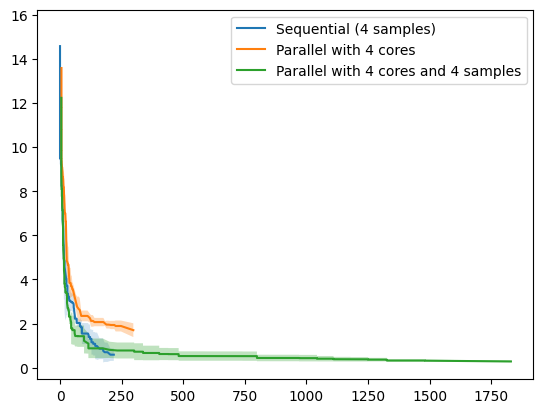

In [97]:
plt.plot(time_seq_4samples, mean_seq_4samples, label="Sequential (4 samples)")
plt.fill_between(time_seq_4samples, mean_seq_4samples - std_seq_4samples, mean_seq_4samples + std_seq_4samples, alpha=0.2)

plt.plot(time_4, mean_4, label="Parallel with 4 cores")
plt.fill_between(time_4, mean_4 - std_4, mean_4 + std_4, alpha=0.3)

plt.plot(time_4samples, mean_4samples, label="Parallel with 4 cores and 4 samples")
plt.fill_between(time_4samples, mean_4samples - std_4samples, mean_4samples + std_4samples, alpha=0.3)

plt.legend()

In [102]:
def process_sequential(result_seq):
    odd_index = np.arange(1, len(result_seq), 2)
    even_index = np.arange(0, len(result_seq), 2)
    
    array_seq = result_seq[even_index]
    time_seq = result_seq[odd_index]
    # time_seq = time_seq - np.min(time_seq, axis=1).reshape(-1, 1)
    time_seq_4samples = np.mean(time_seq, axis=0) / 1000
    
    mean_seq_4samples = np.mean(array_seq, axis=0)
    std_seq_4samples = np.std(array_seq, axis=0)
    return mean_seq_4samples, std_seq_4samples, time_seq_4samples

In [103]:
result = np.array([
[13.59588161481129, 13.59588161481129, 13.59588161481129, 13.59588161481129, 13.59588161481129, 13.218255566331957, 13.218255566331957, 13.218255566331957, 13.218255566331957, 13.218255566331957, 13.218255566331957, 13.218255566331957, 11.413956430330156, 11.413956430330156, 11.413956430330156, 11.413956430330156, 11.413956430330156, 11.413956430330156, 11.413956430330156, 11.413956430330156, 11.413956430330156, 11.413956430330156, 11.413956430330156, 11.413956430330156, 11.413956430330156, 11.413956430330156, 11.413956430330156, 11.413956430330156, 11.413956430330156, 11.413956430330156, 11.413956430330156, 11.413956430330156, 11.413956430330156, 11.413956430330156, 10.120074092626998, 10.120074092626998, 10.120074092626998, 10.120074092626998, 10.120074092626998, 10.120074092626998, 10.120074092626998, 10.120074092626998, 10.120074092626998, 10.120074092626998, 9.911202622680666, 9.911202622680666, 9.911202622680666, 9.911202622680666, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.63156719582447, 9.321893771666003, 9.321893771666003, 9.321893771666003, 9.321893771666003, 9.321893771666003, 9.321893771666003, 9.321893771666003, 9.321893771666003, 9.321893771666003, 9.321893771666003, 9.321893771666003, 9.321893771666003, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.821299849764303, 7.5635664141923495, 7.5635664141923495, 7.5635664141923495, 7.5635664141923495, 7.5635664141923495, 7.194565720539488, 7.194565720539488, 7.194565720539488, 7.194565720539488, 7.194565720539488, 7.194565720539488, 7.194565720539488, 7.194565720539488, 7.194565720539488, 7.194565720539488, 7.194565720539488, 6.57280814790926, 6.57280814790926, 6.178478399925048, 6.178478399925048, 6.178478399925048, 6.178478399925048, 6.178478399925048, 5.486562001391643, 5.486562001391643, 5.486562001391643, 5.486562001391643, 5.486562001391643, 5.486562001391643, 5.486562001391643, 5.486562001391643, 5.486562001391643, 5.486562001391643, 5.486562001391643, 5.486562001391643, 5.486562001391643, 5.486562001391643, 5.486562001391643, 5.486562001391643, 5.486562001391643, 5.486562001391643, 5.486562001391643, 5.486562001391643, 5.486562001391643, 5.486562001391643, 5.486562001391643, 5.486562001391643, 5.486562001391643, 5.486562001391643, 5.005274296978261, 5.005274296978261, 5.005274296978261, 4.617285146587363, 4.617285146587363, 4.617285146587363, 4.137679133315043, 4.137679133315043, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.0924120577678917, 3.050467205525401, 3.050467205525401, 3.050467205525401, 3.050467205525401, 3.050467205525401, 3.050467205525401, 3.050467205525401, 3.050467205525401, 3.050467205525401, 3.050467205525401, 3.050467205525401, 3.050467205525401, 3.050467205525401, 3.050467205525401, 3.050467205525401, 3.050467205525401, 3.050467205525401, 3.050467205525401, 3.050467205525401, 3.050467205525401, 3.050467205525401, 3.050467205525401, 3.050467205525401, 2.0649484747044125, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 2.0088502678687274, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3802668686882602, 1.3743947918105346, 1.3743947918105346, 1.3228973842588698, 1.3228973842588698, 1.3028011249177536, 1.3028011249177536, 1.3028011249177536, 1.293289575912429, 1.292674540224532, 1.2744066822675681, 1.025777077069208, 1.025777077069208, 1.025777077069208, 1.025777077069208, 1.025777077069208, 1.025777077069208, 0.862861745619576, 0.862861745619576, 0.862861745619576, 0.862861745619576, 0.862861745619576, 0.7834528664423677, 0.7834528664423677, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.4988744068887532, 0.39965327410305607, 0.39965327410305607, 0.39965327410305607, 0.39965327410305607, 0.39965327410305607, 0.39965327410305607, 0.30899413155529887, 0.30899413155529887, 0.30899413155529887, 0.30899413155529887, 0.30899413155529887, 0.30899413155529887, 0.30899413155529887, 0.30899413155529887, 0.30899413155529887, 0.30899413155529887, 0.30899413155529887, 0.30899413155529887, 0.30899413155529887, 0.30899413155529887, 0.30899413155529887, 0.30899413155529887],
[2.077, 2.292, 2.37, 2.439, 2.508, 2.573, 2.649, 2.717, 2.8, 2.856, 2.925, 2.99, 3.066, 3.136, 3.189, 3.268, 3.353, 3.434, 3.509, 3.586, 3.649, 3.713, 3.775, 3.824, 3.876, 3.921, 3.958, 3.998, 4.042, 4.086, 4.199, 4.267, 4.314, 4.355, 4.396, 4.444, 4.487, 4.536, 4.58, 4.619, 1452.904, 1452.969, 1453.007, 1453.042, 1453.076, 1453.111, 1453.144, 1453.177, 1453.21, 1453.243, 2474.781, 2474.864, 2474.919, 2474.968, 2475.017, 2475.066, 2475.116, 2475.163, 2475.211, 2475.259, 2826.883, 2826.972, 2827.027, 2827.079, 2827.127, 2827.174, 2827.218, 2827.263, 2827.308, 2827.354, 3262.558, 3262.634, 3262.68, 3262.736, 3262.793, 3262.838, 3262.884, 3262.932, 3262.977, 3263.022, 3419.801, 3419.91, 3419.975, 3420.033, 3420.09, 3420.165, 3420.223, 3420.284, 3420.343, 3420.4, 3755.043, 3755.103, 3755.141, 3755.176, 3755.209, 3755.255, 3755.291, 3755.323, 3755.374, 3755.406, 4125.209, 4125.273, 4125.312, 4125.347, 4125.38, 4125.415, 4125.448, 4125.481, 4125.515, 4125.55, 5123.721, 5123.862, 5123.926, 5124.002, 5124.07, 5124.162, 5124.234, 5124.299, 5124.369, 5124.439, 6939.813, 6939.88, 6939.922, 6939.96, 6939.998, 6940.036, 6940.073, 6940.11, 6940.165, 6940.202, 7109.541, 7109.609, 7109.652, 7109.69, 7109.727, 7109.764, 7109.8, 7109.835, 7109.87, 7109.906, 7554.113, 7554.229, 7554.299, 7554.363, 7554.425, 7554.487, 7554.548, 7554.609, 7554.672, 7554.735, 7998.834, 7998.897, 7998.938, 7998.978, 7999.018, 7999.058, 7999.096, 7999.135, 7999.173, 7999.212, 8201.9, 8201.967, 8202.01, 8202.057, 8202.1, 8202.142, 8202.184, 8202.226, 8202.268, 8202.31, 8890.341, 8890.406, 8890.444, 8890.478, 8890.511, 8890.543, 8890.573, 8890.604, 8890.635, 8890.666, 9631.489, 9631.585, 9631.636, 9631.685, 9631.733, 9631.78, 9631.824, 9631.865, 9631.908, 9631.949, 9953.402, 9953.543, 9953.608, 9953.67, 9953.733, 9953.79, 9953.847, 9953.908, 9953.97, 9954.037, 10884.68, 10884.772, 10884.828, 10884.875, 10884.924, 10884.979, 10885.03, 10885.072, 10885.116, 10885.162, 11312.483, 11312.565, 11312.602, 11312.636, 11312.669, 11312.701, 11312.732, 11312.763, 11312.796, 11312.827, 13896.07, 13896.163, 13896.2, 13896.233, 13896.263, 13896.293, 13896.322, 13896.352, 13896.384, 13896.414, 14487.423, 14487.504, 14487.55, 14487.594, 14487.637, 14487.699, 14487.741, 14487.782, 14487.824, 14487.865, 15626.42, 15626.51, 15626.555, 15626.596, 15626.654, 15626.695, 15626.737, 15626.777, 15626.817, 15626.857, 19475.201, 19475.424, 19475.491, 19475.552, 19475.63, 19475.689, 19475.758, 19475.816, 19475.873, 19475.947, 21721.106, 21721.178, 21721.226, 21721.259, 21721.29, 21721.32, 21721.35, 21721.381, 21721.41, 21721.441, 23813.709, 23813.791, 23813.825, 23813.858, 23813.887, 23813.917, 23813.946, 23813.974, 23814.003, 23814.031, 25860.238, 25860.309, 25860.343, 25860.375, 25860.406, 25860.436, 25860.466, 25860.495, 25860.524, 25860.553, 26448.426, 26448.487, 26448.519, 26448.549, 26448.578, 26448.609, 26448.638, 26448.666, 26448.694, 26448.722, 30302.91, 30302.982, 30303.021, 30303.058, 30303.093, 30303.128, 30303.162, 30303.196, 30303.229, 30303.273, 33380.476, 33380.596, 33380.657, 33380.712, 33380.766, 33380.818, 33380.874, 33380.926, 33380.979, 33381.043, 37609.436, 37609.634, 37609.685, 37609.73, 37609.774, 37609.817, 37609.861, 37609.906, 37609.949, 37609.994, 38099.779, 38099.866, 38099.918, 38099.97, 38100.017, 38100.066, 38100.116, 38100.171, 38100.219, 38100.269, 42038.481, 42038.693, 42038.768, 42038.829, 42038.89, 42038.951, 42039.003, 42039.052, 42039.1, 42039.148, 45170.493, 45170.576, 45170.614, 45170.649, 45170.683, 45170.716, 45170.748, 45170.78, 45170.815, 45170.848, 48596.941, 48596.999, 48597.031, 48597.062, 48597.092, 48597.121, 48597.149, 48597.178, 48597.206, 48597.234, 50198.381, 50198.452, 50198.487, 50198.538, 50198.571, 50198.602, 50198.638, 50198.67, 50198.704, 50198.736, 55199.746, 55199.822, 55199.869, 55199.914, 55199.957, 55199.999, 55200.042, 55200.081, 55200.148, 55200.189, 57552.165, 57552.323, 57552.389, 57552.455, 57552.515, 57552.574, 57552.65, 57552.723, 57552.781, 57552.836, 60916.991, 60917.09, 60917.144, 60917.193, 60917.246, 60917.299, 60917.352, 60917.408, 60917.461, 60917.517, 66129.532, 66129.621, 66129.656, 66129.689, 66129.719, 66129.762, 66129.813, 66129.88, 66129.93, 66129.983, 66431.231, 66431.309, 66431.352, 66431.391, 66431.429, 66431.466, 66431.503, 66431.54, 66431.576, 66431.612, 68243.299, 68243.387, 68243.438, 68243.486, 68243.531, 68243.577, 68243.617, 68243.659, 68243.704, 68243.749, 68528.454, 68528.585, 68528.664, 68528.737, 68528.806, 68528.886, 68528.954, 68529.023, 68529.092, 68529.159, 71156.584, 71156.66, 71156.708, 71156.753, 71156.795, 71156.836, 71156.891, 71156.935, 71156.998, 71157.044, 71508.232, 71508.317, 71508.366, 71508.409, 71508.451, 71508.492, 71508.532, 71508.573, 71508.613, 71508.654, 72770.119, 72770.246, 72770.325, 72770.402, 72770.474, 72770.543, 72770.615, 72770.687, 72770.757, 72770.828, 74635.676, 74635.75, 74635.789, 74635.824, 74635.858, 74635.891, 74635.924, 74635.968, 74636.001, 74636.034, 76202.639, 76202.719, 76202.765, 76202.807, 76202.848, 76202.889, 76202.929, 76202.969, 76203.01, 76203.051, 76666.266, 76666.361, 76666.408, 76666.451, 76666.494, 76666.536, 76666.576, 76666.618, 76666.659, 76666.699, 77646.373, 77646.472, 77646.519, 77646.563, 77646.61, 77646.656, 77646.701, 77646.746, 77646.791, 77646.837, 78103.011, 78103.132, 78103.202, 78103.269, 78103.336, 78103.397, 78103.461, 78103.525, 78103.59, 78103.653, 80387.06, 80387.12, 80387.155, 80387.187, 80387.218, 80387.271, 80387.305, 80387.337, 80387.37, 80387.402, 82604.589, 82604.744, 82604.803, 82604.854, 82604.922, 82605.002, 82605.082, 82605.16, 82605.261, 82605.325, 87739.098, 87739.161, 87739.198, 87739.231, 87739.263, 87739.294, 87739.326, 87739.358, 87739.392, 87739.444, 88409.602, 88409.685, 88409.727, 88409.775, 88409.813, 88409.858, 88409.902, 88409.942, 88409.988, 88410.024, 97571.815, 97571.898, 97571.936, 97571.971, 97572.005, 97572.037, 97572.07, 97572.103, 97572.164, 97572.198, 109470.286, 109470.351, 109470.389, 109470.423, 109470.456, 109470.488, 109470.52, 109470.551, 109470.583, 109470.615, 122875.23, 122875.394, 122875.474, 122875.549, 122875.606, 122875.662, 122875.715, 122875.768, 122875.821, 122875.873, 132643.346, 132643.412, 132643.472, 132643.513, 132643.572, 132643.613, 132643.653, 132643.692, 132643.729, 132643.768, 141742.618, 141742.721, 141742.784, 141742.815, 141742.844, 141742.873, 141742.9, 141742.928, 141742.954, 141742.983, 149468.597, 149468.654, 149468.687, 149468.716, 149468.744, 149468.774, 149468.8, 149468.827, 149468.874, 149468.906, 156830.166, 156830.223, 156830.263, 156830.299, 156830.333, 156830.366, 156830.398, 156830.431, 156830.464, 156830.5],
[14.819207105242283, 13.825944057824334, 13.825944057824334, 13.825944057824334, 12.388643035406176, 12.388643035406176, 12.388643035406176, 12.388643035406176, 12.388643035406176, 12.388643035406176, 12.388643035406176, 12.388643035406176, 12.388643035406176, 12.388643035406176, 12.388643035406176, 12.388643035406176, 12.388643035406176, 12.388643035406176, 12.388643035406176, 12.388643035406176, 12.388643035406176, 12.388643035406176, 12.388643035406176, 12.388643035406176, 12.388643035406176, 12.388643035406176, 12.388643035406176, 12.388643035406176, 12.388643035406176, 12.388643035406176, 12.05295425259209, 12.05295425259209, 12.05295425259209, 12.05295425259209, 12.05295425259209, 12.05295425259209, 12.05295425259209, 12.05295425259209, 12.05295425259209, 12.05295425259209, 12.05295425259209, 12.05295425259209, 12.05295425259209, 12.05295425259209, 12.05295425259209, 12.05295425259209, 12.05295425259209, 12.05295425259209, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 10.744511057131637, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 9.62572692308906, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 8.667813396238271, 7.470864565063568, 7.470864565063568, 7.470864565063568, 7.470864565063568, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 7.404581514295172, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.475345339575398, 6.219713924141939, 6.219713924141939, 6.219713924141939, 6.219713924141939, 6.219713924141939, 6.046443610910249, 6.046443610910249, 6.046443610910249, 5.9446124159389875, 5.9446124159389875, 5.9446124159389875, 5.9446124159389875, 5.9446124159389875, 5.9446124159389875, 5.478703823868134, 5.478703823868134, 5.478703823868134, 5.478703823868134, 5.478703823868134, 5.478703823868134, 5.478703823868134, 5.478703823868134, 5.448430189466524, 5.262884655939107, 5.262884655939107, 5.175670487863023, 5.175670487863023, 5.175670487863023, 5.175670487863023, 5.175670487863023, 5.175670487863023, 5.175670487863023, 5.175670487863023, 5.175670487863023, 5.175670487863023, 5.175670487863023, 5.175670487863023, 5.175670487863023, 5.175670487863023, 5.175670487863023, 5.175670487863023, 5.175670487863023, 5.175670487863023, 5.175670487863023, 5.175670487863023, 5.175670487863023, 5.175670487863023, 5.175670487863023, 5.175670487863023, 5.175670487863023, 5.175670487863023, 4.923155717003791, 4.787287400869516, 4.787287400869516, 4.432430092329064, 4.432430092329064, 4.432430092329064, 4.432430092329064, 4.432430092329064, 4.432430092329064, 4.432430092329064, 4.432430092329064, 4.432430092329064, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912, 3.766774483756912],
[0.31, 0.348, 0.379, 0.407, 0.435, 0.462, 0.488, 0.514, 0.539, 0.566, 0.592, 0.618, 0.644, 0.67, 0.695, 0.722, 0.748, 0.774, 0.8, 0.826, 0.858, 0.89, 0.921, 0.953, 0.995, 1.027, 1.058, 1.088, 1.138, 1.169, 1.199, 1.23, 1.261, 1.292, 1.321, 1.351, 1.38, 1.41, 1.439, 1.47, 982.899, 982.954, 982.985, 983.014, 983.059, 983.087, 983.114, 983.141, 983.187, 983.218, 1678.801, 1678.868, 1678.904, 1678.936, 1678.966, 1678.996, 1679.026, 1679.056, 1679.086, 1679.115, 1875.527, 1875.609, 1875.655, 1875.721, 1875.763, 1875.806, 1875.847, 1875.887, 1875.926, 1875.965, 2084.171, 2084.268, 2084.329, 2084.386, 2084.441, 2084.497, 2084.56, 2084.617, 2084.684, 2084.735, 2179.182, 2179.302, 2179.371, 2179.434, 2179.492, 2179.557, 2179.618, 2179.677, 2179.735, 2179.792, 2356.118, 2356.214, 2356.263, 2356.308, 2356.349, 2356.389, 2356.427, 2356.467, 2356.505, 2356.543, 3353.624, 3353.691, 3353.736, 3353.794, 3353.838, 3353.884, 3353.933, 3353.976, 3354.029, 3354.081, 3910.893, 3910.961, 3910.998, 3911.032, 3911.063, 3911.093, 3911.123, 3911.153, 3911.184, 3911.216, 4442.791, 4442.849, 4442.885, 4442.919, 4442.95, 4442.981, 4443.013, 4443.043, 4443.076, 4443.107, 4562.118, 4562.186, 4562.225, 4562.26, 4562.294, 4562.328, 4562.362, 4562.395, 4562.428, 4562.462, 5135.451, 5135.564, 5135.601, 5135.652, 5135.707, 5135.759, 5135.813, 5135.863, 5135.914, 5135.964, 5421.383, 5421.442, 5421.478, 5421.512, 5421.545, 5421.577, 5421.609, 5421.64, 5421.671, 5421.702, 6289.664, 6289.726, 6289.761, 6289.791, 6289.819, 6289.849, 6289.878, 6289.906, 6289.935, 6289.963, 6650.582, 6650.648, 6650.687, 6650.721, 6650.753, 6650.784, 6650.814, 6650.844, 6650.874, 6650.904, 7459.529, 7459.594, 7459.629, 7459.661, 7459.692, 7459.723, 7459.755, 7459.785, 7459.815, 7459.845, 7691.539, 7691.612, 7691.658, 7691.701, 7691.742, 7691.782, 7691.823, 7691.862, 7691.907, 7691.947, 7906.672, 7906.778, 7906.838, 7906.892, 7906.945, 7906.996, 7907.046, 7907.098, 7907.149, 7907.201, 8418.43, 8418.536, 8418.606, 8418.673, 8418.735, 8418.799, 8418.861, 8418.921, 8418.982, 8419.043, 8582.281, 8582.345, 8582.386, 8582.425, 8582.461, 8582.497, 8582.532, 8582.567, 8582.602, 8582.637, 9493.246, 9493.306, 9493.345, 9493.377, 9493.408, 9493.437, 9493.466, 9493.494, 9493.523, 9493.551, 10161.72, 10161.794, 10161.832, 10161.866, 10161.898, 10161.929, 10161.96, 10161.992, 10162.022, 10162.054, 11203.737, 11203.828, 11203.872, 11203.916, 11203.957, 11204.0, 11204.04, 11204.081, 11204.122, 11204.161, 11716.706, 11716.795, 11716.843, 11716.888, 11716.932, 11716.974, 11717.016, 11717.058, 11717.103, 11717.148, 12501.406, 12501.471, 12501.515, 12501.557, 12501.596, 12501.634, 12501.673, 12501.711, 12501.75, 12501.789, 13178.664, 13178.74, 13178.789, 13178.832, 13178.873, 13178.914, 13178.954, 13179.012, 13179.053, 13179.094, 14431.359, 14431.421, 14431.452, 14431.48, 14431.508, 14431.563, 14431.59, 14431.618, 14431.645, 14431.673, 15127.76, 15127.83, 15127.863, 15127.893, 15127.921, 15127.948, 15127.975, 15128.002, 15128.031, 15128.059, 15250.382, 15250.46, 15250.5, 15250.536, 15250.585, 15250.649, 15250.689, 15250.723, 15250.77, 15250.824, 15379.356, 15379.43, 15379.486, 15379.522, 15379.556, 15379.59, 15379.625, 15379.658, 15379.691, 15379.724, 16004.164, 16004.23, 16004.27, 16004.311, 16004.348, 16004.385, 16004.421, 16004.459, 16004.498, 16004.55, 16840.643, 16840.714, 16840.748, 16840.779, 16840.808, 16840.836, 16840.865, 16840.895, 16840.923, 16840.951, 17265.043, 17265.102, 17265.138, 17265.171, 17265.201, 17265.231, 17265.261, 17265.29, 17265.319, 17265.348, 17678.797, 17679.063, 17679.157, 17679.231, 17679.294, 17679.349, 17679.408, 17679.462, 17679.528, 17679.585, 18004.267, 18004.325, 18004.361, 18004.395, 18004.427, 18004.458, 18004.49, 18004.521, 18004.551, 18004.583, 18458.248, 18458.302, 18458.335, 18458.368, 18458.398, 18458.442, 18458.47, 18458.498, 18458.546, 18458.575, 18699.83, 18699.889, 18699.928, 18699.963, 18699.997, 18700.03, 18700.064, 18700.097, 18700.131, 18700.163, 19238.655, 19238.73, 19238.78, 19238.822, 19238.864, 19238.908, 19238.952, 19238.994, 19239.035, 19239.079, 19812.605, 19812.682, 19812.715, 19812.746, 19812.776, 19812.806, 19812.835, 19812.864, 19812.893, 19812.923, 20345.106, 20345.171, 20345.212, 20345.249, 20345.283, 20345.318, 20345.352, 20345.386, 20345.419, 20345.451, 21832.055, 21832.125, 21832.158, 21832.188, 21832.215, 21832.243, 21832.271, 21832.3, 21832.327, 21832.356, 23294.161, 23294.398, 23294.479, 23294.541, 23294.596, 23294.646, 23294.697, 23294.749, 23294.798, 23294.845, 24949.952, 24950.048, 24950.108, 24950.157, 24950.202, 24950.246, 24950.29, 24950.334, 24950.376, 24950.417, 26457.724, 26457.821, 26457.881, 26457.938, 26457.997, 26458.053, 26458.123, 26458.178, 26458.231, 26458.284, 27368.381, 27368.455, 27368.51, 27368.562, 27368.603, 27368.673, 27368.733, 27368.795, 27368.833, 27368.872, 27535.14, 27535.248, 27535.311, 27535.368, 27535.416, 27535.471, 27535.527, 27535.58, 27535.635, 27535.692, 28062.292, 28062.36, 28062.401, 28062.437, 28062.472, 28062.506, 28062.539, 28062.573, 28062.606, 28062.64, 29283.544, 29283.613, 29283.652, 29283.686, 29283.719, 29283.751, 29283.782, 29283.814, 29283.845, 29283.877, 30855.227, 30855.307, 30855.349, 30855.387, 30855.422, 30855.457, 30855.491, 30855.525, 30855.559, 30855.592, 31302.049, 31302.138, 31302.186, 31302.229, 31302.269, 31302.303, 31302.336, 31302.369, 31302.401, 31302.435, 31545.529, 31545.598, 31545.641, 31545.689, 31545.734, 31545.778, 31545.822, 31545.866, 31545.91, 31545.952, 32240.625, 32240.703, 32240.751, 32240.799, 32240.847, 32240.893, 32240.94, 32240.988, 32241.052, 32241.096, 33220.573, 33220.658, 33220.696, 33220.73, 33220.762, 33220.793, 33220.832, 33220.862, 33220.895, 33220.946, 33317.794, 33317.882, 33317.936, 33317.986, 33318.035, 33318.082, 33318.156, 33318.204, 33318.25, 33318.297, 33738.4, 33738.48, 33738.529, 33738.574, 33738.618, 33738.662, 33738.706, 33738.749, 33738.792, 33738.835, 34305.407, 34305.492, 34305.545, 34305.592, 34305.637, 34305.682, 34305.726, 34305.769, 34305.812, 34305.854, 34762.614, 34762.714, 34762.772, 34762.822, 34762.871, 34762.916, 34762.977, 34763.022, 34763.067, 34763.112, 35163.248, 35163.327, 35163.377, 35163.424, 35163.469, 35163.514, 35163.558, 35163.602, 35163.645, 35163.689, 35825.556, 35825.62, 35825.664, 35825.702, 35825.74, 35825.776, 35825.811, 35825.847, 35825.882, 35825.916, 36695.728, 36695.809, 36695.87, 36695.931, 36695.99, 36696.066, 36696.124, 36696.179, 36696.238, 36696.296, 37387.657, 37387.721, 37387.758, 37387.792, 37387.825, 37387.856, 37387.887, 37387.918, 37387.981, 37388.016],
[14.332443216159842, 14.332443216159842, 11.001007798594458, 11.001007798594458, 11.001007798594458, 11.001007798594458, 11.001007798594458, 11.001007798594458, 11.001007798594458, 11.001007798594458, 11.001007798594458, 11.001007798594458, 11.001007798594458, 11.001007798594458, 11.001007798594458, 11.001007798594458, 11.001007798594458, 11.001007798594458, 11.001007798594458, 11.001007798594458, 11.001007798594458, 11.001007798594458, 10.516170877198864, 10.516170877198864, 10.516170877198864, 10.516170877198864, 10.516170877198864, 10.516170877198864, 10.516170877198864, 10.516170877198864, 10.516170877198864, 10.516170877198864, 10.516170877198864, 10.516170877198864, 10.516170877198864, 10.516170877198864, 10.516170877198864, 10.516170877198864, 10.516170877198864, 10.516170877198864, 10.516170877198864, 10.516170877198864, 10.516170877198864, 10.516170877198864, 10.516170877198864, 10.516170877198864, 10.516170877198864, 10.516170877198864, 10.516170877198864, 10.516170877198864, 10.221265087080008, 10.221265087080008, 10.221265087080008, 10.221265087080008, 10.221265087080008, 10.221265087080008, 10.221265087080008, 10.221265087080008, 10.220208820288608, 10.192665945492589, 10.192665945492589, 10.192665945492589, 10.192665945492589, 10.192665945492589, 10.192665945492589, 10.192665945492589, 10.192665945492589, 10.192665945492589, 10.192665945492589, 10.192665945492589, 10.091639168843638, 10.091639168843638, 10.091639168843638, 9.893112268801632, 9.893112268801632, 9.893112268801632, 9.893112268801632, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.819297087571822, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 9.6675862542862, 8.379479600225642, 8.379479600225642, 8.379479600225642, 8.379479600225642, 8.379479600225642, 8.379479600225642, 8.379479600225642, 8.379479600225642, 8.379479600225642, 8.379479600225642, 8.379479600225642, 8.379479600225642, 8.379479600225642, 8.379479600225642, 8.379479600225642, 8.379479600225642, 8.379479600225642, 8.379479600225642, 8.379479600225642, 8.379479600225642, 8.379479600225642, 8.379479600225642, 8.379479600225642, 8.379479600225642, 8.29228015026545, 8.215615053568593, 8.17960110108348, 8.17960110108348, 8.17960110108348, 8.17960110108348, 7.816948993880223, 7.816948993880223, 7.478695977298155, 6.459042793736465, 6.459042793736465, 6.459042793736465, 6.459042793736465, 6.459042793736465, 6.459042793736465, 6.459042793736465, 5.66801767327518, 4.533165477907378, 4.533165477907378, 4.533165477907378, 4.533165477907378, 4.533165477907378, 4.533165477907378, 4.533165477907378, 4.533165477907378, 4.533165477907378, 4.533165477907378, 4.319781799389293, 4.19100291882528, 4.19100291882528, 4.13277606866739, 4.13277606866739, 4.13277606866739, 4.06221608765734, 4.06221608765734, 4.06221608765734, 4.06221608765734, 4.06221608765734, 4.06221608765734, 4.06221608765734, 4.06221608765734, 4.06221608765734, 4.06221608765734, 4.03002668813733, 4.03002668813733, 4.03002668813733, 4.03002668813733, 4.018774763626748, 3.408059963061785, 3.408059963061785, 3.408059963061785, 3.408059963061785, 3.408059963061785, 3.408059963061785, 3.408059963061785, 3.408059963061785, 3.408059963061785, 3.408059963061785, 3.408059963061785, 3.408059963061785, 3.408059963061785, 3.408059963061785, 3.408059963061785, 3.408059963061785, 3.408059963061785, 3.408059963061785, 3.2546110290829344, 3.2546110290829344, 2.9831229914322717, 2.9831229914322717, 2.9831229914322717, 2.9831229914322717, 2.9831229914322717, 2.9831229914322717, 2.9831229914322717, 2.9831229914322717, 2.9831229914322717, 2.9831229914322717, 2.9831229914322717, 2.9831229914322717, 2.9831229914322717, 2.9831229914322717, 2.9831229914322717, 2.9831229914322717, 2.9831229914322717, 2.9831229914322717, 2.9831229914322717, 2.9831229914322717, 2.9831229914322717, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.42680928644316, 2.338784275927083, 2.338784275927083, 2.338784275927083, 2.338784275927083, 2.016802904898839, 1.6727934739999886, 1.6727934739999886, 1.6727934739999886, 1.6727934739999886, 1.6727934739999886, 1.6727934739999886, 1.6727934739999886, 1.6727934739999886, 1.6727934739999886, 1.6727934739999886, 1.6727934739999886, 1.6727934739999886, 1.6727934739999886, 1.6727934739999886, 1.6727934739999886, 1.6727934739999886, 1.6727934739999886, 1.6727934739999886, 1.6727934739999886, 1.6727934739999886, 1.6727934739999886, 1.5436942944888448, 1.5436942944888448, 1.5436942944888448, 1.5436942944888448, 1.5436942944888448, 1.4876558654484069, 1.4876558654484069, 1.4275173815319886, 1.4275173815319886, 1.3930430572615191, 1.3930430572615191, 1.3930430572615191, 1.3930430572615191, 1.3930430572615191, 1.3930430572615191, 1.3930430572615191, 1.3080494988911053, 1.3080494988911053, 1.3080494988911053, 1.3080494988911053, 1.3080494988911053, 1.1777622335096471, 1.1777622335096471, 1.1777622335096471, 1.1777622335096471, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 1.0895527184466265, 0.7406542375314236, 0.7406542375314236, 0.7406542375314236, 0.7406542375314236, 0.7406542375314236, 0.7406542375314236, 0.7406542375314236, 0.7406542375314236, 0.7406542375314236, 0.7406542375314236, 0.7406542375314236, 0.7406542375314236, 0.7406542375314236, 0.7406542375314236, 0.7406542375314236, 0.7406542375314236, 0.7406542375314236, 0.7406542375314236, 0.7406542375314236, 0.7406542375314236, 0.7406542375314236, 0.7406542375314236, 0.7406542375314236, 0.7406542375314236, 0.7406542375314236, 0.7406542375314236, 0.7406542375314236, 0.7406542375314236, 0.7406542375314236, 0.7406542375314236, 0.7406542375314236, 0.6041940277348457, 0.4471219770340338, 0.4471219770340338, 0.4471219770340338, 0.4471219770340338, 0.4471219770340338, 0.4471219770340338, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998, 0.3174495681527998],
[0.503, 0.557, 0.602, 0.649, 0.695, 0.736, 0.778, 0.825, 0.869, 0.951, 0.987, 1.024, 1.066, 1.107, 1.151, 1.193, 1.24, 1.286, 1.316, 1.344, 1.372, 1.4, 1.435, 1.469, 1.502, 1.535, 1.567, 1.6, 1.632, 1.679, 1.733, 1.796, 1.873, 1.932, 1.991, 2.05, 2.108, 2.167, 2.224, 2.285, 207.952, 208.027, 208.079, 208.121, 208.161, 208.2, 208.24, 208.279, 208.317, 208.356, 932.979, 933.079, 933.15, 933.217, 933.283, 933.344, 933.407, 933.465, 933.528, 933.592, 1278.369, 1278.463, 1278.521, 1278.582, 1278.639, 1278.695, 1278.758, 1278.817, 1278.869, 1278.921, 1914.538, 1914.621, 1914.668, 1914.713, 1914.756, 1914.798, 1914.841, 1914.884, 1914.944, 1914.986, 2151.473, 2151.546, 2151.594, 2151.637, 2151.68, 2151.721, 2151.763, 2151.804, 2151.845, 2151.887, 2445.249, 2445.394, 2445.447, 2445.493, 2445.549, 2445.606, 2445.662, 2445.719, 2445.778, 2445.819, 2770.57, 2770.67, 2770.731, 2770.788, 2770.861, 2770.917, 2770.992, 2771.048, 2771.106, 2771.164, 3328.508, 3328.578, 3328.622, 3328.661, 3328.699, 3328.737, 3328.774, 3328.81, 3328.848, 3328.886, 3676.577, 3676.689, 3676.748, 3676.808, 3676.886, 3676.961, 3677.013, 3677.08, 3677.146, 3677.197, 3918.257, 3918.338, 3918.385, 3918.428, 3918.469, 3918.509, 3918.571, 3918.636, 3918.686, 3918.726, 4113.773, 4113.848, 4113.897, 4113.94, 4113.982, 4114.023, 4114.065, 4114.106, 4114.148, 4114.192, 4274.626, 4274.741, 4274.793, 4274.836, 4274.89, 4274.931, 4274.988, 4275.049, 4275.091, 4275.13, 4601.595, 4601.729, 4601.806, 4601.881, 4601.951, 4602.017, 4602.084, 4602.138, 4602.19, 4602.237, 6419.555, 6419.642, 6419.682, 6419.719, 6419.75, 6419.78, 6419.811, 6419.841, 6419.871, 6419.9, 6593.886, 6593.95, 6593.99, 6594.027, 6594.062, 6594.098, 6594.132, 6594.166, 6594.201, 6594.237, 8383.218, 8383.3, 8383.347, 8383.386, 8383.425, 8383.466, 8383.506, 8383.547, 8383.585, 8383.624, 10392.01, 10392.088, 10392.147, 10392.186, 10392.225, 10392.263, 10392.3, 10392.336, 10392.373, 10392.41, 13057.134, 13057.211, 13057.255, 13057.298, 13057.339, 13057.379, 13057.419, 13057.458, 13057.496, 13057.535, 14695.032, 14695.134, 14695.181, 14695.242, 14695.284, 14695.33, 14695.372, 14695.413, 14695.455, 14695.496, 15550.393, 15550.489, 15550.537, 15550.584, 15550.624, 15550.664, 15550.703, 15550.744, 15550.784, 15550.823, 17165.274, 17165.364, 17165.4, 17165.43, 17165.46, 17165.49, 17165.517, 17165.545, 17165.572, 17165.6, 18285.598, 18285.659, 18285.691, 18285.72, 18285.748, 18285.776, 18285.804, 18285.845, 18285.888, 18285.93, 20963.663, 20963.725, 20963.765, 20963.8, 20963.833, 20963.867, 20963.9, 20963.932, 20963.965, 20964.0, 21174.901, 21174.96, 21174.998, 21175.032, 21175.065, 21175.097, 21175.128, 21175.16, 21175.191, 21175.224, 23900.049, 23900.112, 23900.145, 23900.176, 23900.206, 23900.234, 23900.262, 23900.289, 23900.316, 23900.344, 24052.387, 24052.468, 24052.531, 24052.569, 24052.606, 24052.642, 24052.677, 24052.712, 24052.747, 24052.782, 25867.143, 25867.215, 25867.257, 25867.295, 25867.332, 25867.369, 25867.411, 25867.447, 25867.485, 25867.525, 27478.174, 27478.249, 27478.282, 27478.312, 27478.341, 27478.37, 27478.398, 27478.426, 27478.454, 27478.481, 29180.452, 29180.535, 29180.585, 29180.631, 29180.706, 29180.752, 29180.799, 29180.845, 29180.891, 29180.954, 30153.259, 30153.322, 30153.359, 30153.393, 30153.425, 30153.457, 30153.488, 30153.535, 30153.566, 30153.597, 32043.052, 32043.114, 32043.149, 32043.182, 32043.213, 32043.245, 32043.276, 32043.307, 32043.337, 32043.367, 33675.506, 33675.605, 33675.666, 33675.726, 33675.78, 33675.833, 33675.887, 33675.939, 33676.009, 33676.062, 35746.022, 35746.175, 35746.243, 35746.308, 35746.373, 35746.431, 35746.496, 35746.559, 35746.621, 35746.683, 39481.489, 39481.552, 39481.586, 39481.618, 39481.649, 39481.682, 39481.712, 39481.744, 39481.774, 39481.805, 45043.231, 45043.305, 45043.342, 45043.376, 45043.409, 45043.441, 45043.473, 45043.504, 45043.536, 45043.567, 45238.163, 45238.247, 45238.299, 45238.347, 45238.397, 45238.438, 45238.486, 45238.538, 45238.589, 45238.636, 48853.869, 48853.965, 48854.018, 48854.053, 48854.086, 48854.138, 48854.172, 48854.206, 48854.239, 48854.271, 56236.031, 56236.134, 56236.201, 56236.261, 56236.341, 56236.401, 56236.46, 56236.525, 56236.588, 56236.649, 64373.216, 64373.299, 64373.347, 64373.391, 64373.434, 64373.476, 64373.538, 64373.581, 64373.623, 64373.665, 75476.963, 75477.058, 75477.105, 75477.149, 75477.192, 75477.234, 75477.276, 75477.317, 75477.359, 75477.401, 94082.658, 94082.745, 94082.794, 94082.84, 94082.884, 94082.927, 94082.97, 94083.013, 94083.056, 94083.099, 109880.75, 109880.817, 109880.856, 109880.89, 109880.941, 109880.98, 109881.014, 109881.047, 109881.079, 109881.121, 127219.048, 127219.107, 127219.141, 127219.171, 127219.2, 127219.229, 127219.257, 127219.285, 127219.313, 127219.342, 128108.886, 128108.972, 128109.007, 128109.037, 128109.068, 128109.099, 128109.128, 128109.157, 128109.185, 128109.214, 149565.815, 149565.9, 149565.953, 149566.01, 149566.064, 149566.123, 149566.178, 149566.236, 149566.29, 149566.348, 157441.945, 157442.039, 157442.09, 157442.137, 157442.183, 157442.23, 157442.281, 157442.329, 157442.373, 157442.418, 157830.077, 157830.164, 157830.215, 157830.263, 157830.309, 157830.355, 157830.4, 157830.445, 157830.49, 157830.535, 180801.379, 180801.459, 180801.494, 180801.528, 180801.561, 180801.591, 180801.621, 180801.65, 180801.68, 180801.724, 197869.562, 197869.655, 197869.706, 197869.777, 197869.825, 197869.871, 197869.917, 197869.964, 197870.012, 197870.062, 217387.271, 217387.345, 217387.381, 217387.415, 217387.447, 217387.478, 217387.508, 217387.538, 217387.569, 217387.599, 238080.174, 238080.236, 238080.268, 238080.296, 238080.324, 238080.35, 238080.377, 238080.403, 238080.429, 238080.455, 238367.654, 238367.739, 238367.796, 238367.845, 238367.892, 238367.941, 238367.99, 238368.038, 238368.087, 238368.134, 238700.155, 238700.239, 238700.288, 238700.333, 238700.394, 238700.439, 238700.482, 238700.525, 238700.567, 238700.623, 252568.381, 252568.462, 252568.51, 252568.541, 252568.57, 252568.597, 252568.626, 252568.653, 252568.68, 252568.707, 267894.413, 267894.465, 267894.495, 267894.523, 267894.55, 267894.577, 267894.614, 267894.643, 267894.669, 267894.695, 283453.642, 283453.787, 283453.855, 283453.921, 283453.976, 283454.03, 283454.085, 283454.141, 283454.222, 283454.29, 301355.057, 301355.134, 301355.182, 301355.226, 301355.27, 301355.312, 301355.353, 301355.394, 301355.435, 301355.476, 301648.172, 301648.475, 301648.727, 301648.994, 301649.239, 301649.478, 301649.721, 301650.303, 301650.649, 301650.746, 312296.451, 312296.55, 312296.606, 312296.659, 312296.745, 312296.778, 312296.827, 312296.875, 312296.922, 312296.995, 312517.144, 312517.208, 312517.247, 312517.282, 312517.315, 312517.349, 312517.382, 312517.415, 312517.447, 312517.479]
])

mean_prune, std_prune, time_prune = process_sequential(result)

In [104]:
result_seq = np.array([
[14.510022816624742, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.70141578856079, 11.70141578856079, 11.70141578856079, 11.70141578856079, 11.381690872021526, 11.381690872021526, 11.351953695303889, 11.351953695303889, 11.351953695303889, 9.976931859268095, 9.976931859268095, 9.976931859268095, 9.765551836166036, 9.765551836166036, 9.765551836166036, 9.765551836166036, 9.765551836166036, 9.69182994344398, 7.484171147495502, 7.484171147495502, 6.943129610343512, 6.2646356150289755, 6.2646356150289755, 6.2646356150289755, 6.002630987501181, 6.002630987501181, 6.002630987501181, 5.978536265782253, 5.560372428991638, 5.560372428991638, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 4.785505888745547, 4.200018990560785, 4.200018990560785, 4.200018990560785, 4.200018990560785, 4.17669700940419, 3.9092434448804743, 3.9092434448804743, 3.8508622873205813, 3.8508622873205813, 3.5841495823982297, 3.5841495823982297, 3.1967275735113536, 3.1967275735113536, 3.1967275735113536, 3.1967275735113536, 3.1967275735113536, 3.1967275735113536, 3.1967275735113536, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5033095553621973, 2.5033095553621973],
[0.307, 0.339, 0.363, 0.384, 0.405, 0.426, 0.447, 0.468, 0.488, 0.508, 0.529, 0.549, 0.569, 0.589, 0.609, 0.63, 0.649, 0.674, 0.696, 0.717, 0.737, 0.758, 0.778, 0.799, 0.82, 0.841, 0.866, 0.888, 0.909, 0.929, 0.949, 0.988, 1.008, 1.028, 1.048, 1.068, 1.088, 1.108, 1.128, 1.149, 717.923, 1201.141, 1969.657, 2565.534, 2933.967, 3306.457, 4107.492, 4290.622, 4714.768, 5718.507, 6890.364, 7687.111, 8886.835, 9269.834, 10758.406, 11421.296, 13024.402, 13902.706, 14265.345, 16352.122, 18431.873, 19684.372, 20639.247, 23494.448, 25160.587, 26520.133, 28586.856, 30563.075, 31145.647, 33973.03, 36673.499, 36944.926, 39409.255, 42287.733, 43911.559, 46863.159, 47985.043, 48772.845, 49255.878, 50572.88, 52207.489, 56265.146, 59057.185, 59535.628, 60778.276, 62341.955, 64520.456, 66893.357, 69609.316, 70074.189, 73857.194, 75110.069, 78182.427, 81760.004, 82881.733, 86618.843, 87391.903, 88372.181, 90026.332, 90977.779, 92910.534, 93070.576, 95659.156, 101068.978, 106381.461, 109172.058, 109660.995, 111067.973, 114613.841, 116302.656, 117454.213, 120869.124, 121438.993, 125451.602, 127990.426, 130556.371, 138132.136, 139533.191, 141702.46, 148713.113, 149029.804, 153575.908, 153752.99, 155115.313, 159736.879, 167440.845, 168339.4, 169291.375, 172745.975, 175036.815, 177632.906, 178573.192, 180283.18, 182654.674, 183825.763, 185921.894, 188725.76, 192126.485, 202136.05, 202848.577, 204750.77, 204970.424, 207416.305, 209444.485, 212457.471, 220996.945, 221227.265, 222886.615, 223104.506, 223324.761, 224543.173, 225940.486, 228751.404, 231077.014, 232504.194, 235612.941, 235845.153, 236096.629, 238105.105, 240061.193],
[13.794908389503037, 13.794908389503037, 13.440397792385337, 13.440397792385337, 13.440397792385337, 13.440397792385337, 12.472905407444362, 12.472905407444362, 12.472905407444362, 12.472905407444362, 12.472905407444362, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 10.208462794898638, 10.208462794898638, 8.53222036317438, 8.53222036317438, 8.53222036317438, 8.53222036317438, 8.53222036317438, 8.07945968781107, 8.07945968781107, 8.07945968781107, 8.07945968781107, 8.07945968781107, 8.07945968781107, 8.07945968781107, 8.07945968781107, 7.826744633426028, 7.393797396159835, 7.393797396159835, 5.293478544349828, 5.293478544349828, 5.276010385980449, 5.276010385980449, 5.276010385980449, 5.179812402630034, 5.179812402630034, 4.61785357164657, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 3.746308701418702, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.597726860959956, 3.3224687704041185, 3.3224687704041185, 3.3224687704041185, 3.3224687704041185, 3.3224687704041185, 3.3224687704041185, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2018717687616385, 3.2018717687616385, 3.2018717687616385, 3.2018717687616385, 3.2018717687616385, 3.2018717687616385, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392],
[0.49, 0.529, 0.556, 0.581, 0.605, 0.63, 0.655, 0.679, 0.703, 0.727, 0.75, 0.774, 0.797, 0.821, 0.844, 0.868, 0.892, 0.916, 0.939, 0.963, 0.986, 1.01, 1.033, 1.057, 1.081, 1.105, 1.129, 1.152, 1.176, 1.199, 1.223, 1.246, 1.269, 1.293, 1.316, 1.34, 1.363, 1.387, 1.41, 1.433, 914.403, 1763.457, 2305.301, 2908.953, 3657.865, 4437.238, 5040.257, 6377.906, 7721.841, 9365.12, 9874.267, 11104.554, 11327.986, 12153.244, 12901.455, 15217.524, 16075.759, 18045.947, 19556.893, 20852.908, 22489.1, 25079.946, 25916.855, 26227.372, 29612.493, 31835.69, 33975.159, 35648.078, 37700.967, 40683.888, 41212.395, 44103.879, 47394.098, 48156.011, 48285.188, 49523.278, 49891.325, 52819.246, 58868.942, 59581.321, 61630.462, 61894.687, 62032.962, 62746.038, 63849.248, 65819.167, 68927.444, 70523.42, 71547.274, 75221.85, 77958.751, 79519.273, 81142.386, 88691.463, 89356.663, 90798.748, 92413.856, 93022.474, 94874.222, 95396.067, 95702.886, 96628.96, 97605.106, 99312.848, 101969.542, 103558.608, 104971.265, 107145.475, 108675.023, 108844.428, 109230.615, 112134.279, 112775.019, 113693.698, 115434.257, 117148.671, 117340.185, 117555.616, 118850.302, 120028.757, 121798.047, 123631.143, 124967.843, 125392.569, 125604.556, 128100.925, 129792.696, 131496.677, 131694.943, 132141.766, 134901.916, 136086.18, 136335.786, 137387.332, 138715.957, 138962.214, 140277.548, 141456.732, 142269.724, 144117.888, 144369.736, 144766.788, 145018.829, 145262.839, 147223.08, 147679.723, 147908.375, 154081.077, 154313.681, 156281.094, 157161.623, 159967.634, 161316.646, 166091.541, 168822.082, 172251.915, 174272.59, 176565.334, 177376.865, 178349.186],
[15.540698790565095, 13.53177005818217, 13.53177005818217, 13.53177005818217, 13.53177005818217, 13.53177005818217, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 8.790737290047783, 8.790737290047783, 8.37166261217916, 8.37166261217916, 7.493062122786531, 7.493062122786531, 7.493062122786531, 7.493062122786531, 7.493062122786531, 5.864581791403499, 5.864581791403499, 5.864581791403499, 5.864581791403499, 5.74519551202874, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.406141886861818, 3.286486803121719, 3.286486803121719, 3.286486803121719, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.652988718774353, 2.652988718774353, 2.550695489508311, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.107137265523296, 2.107137265523296, 2.107137265523296, 2.107137265523296, 2.107137265523296, 2.107137265523296, 1.581839588586782, 1.581839588586782, 1.581839588586782, 1.581839588586782, 1.581839588586782, 1.581839588586782, 1.581839588586782, 1.505108656694493, 1.505108656694493, 1.505108656694493, 1.505108656694493, 1.505108656694493, 1.505108656694493, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545],
[0.429, 0.47, 0.498, 0.525, 0.553, 0.6, 0.641, 0.681, 0.725, 0.762, 0.79, 0.832, 0.881, 0.911, 0.941, 0.972, 1.001, 1.031, 1.06, 1.089, 1.119, 1.149, 1.178, 1.21, 1.246, 1.294, 1.329, 1.354, 1.38, 1.405, 1.43, 1.457, 1.482, 1.508, 1.533, 1.557, 1.583, 1.608, 1.633, 1.66, 1105.985, 2158.568, 2359.156, 3020.037, 4032.162, 4668.391, 5434.225, 6384.894, 7735.366, 9602.242, 10547.879, 12560.381, 14018.223, 15968.27, 17747.467, 19554.421, 19811.668, 20947.974, 22466.252, 24909.087, 25039.819, 26310.614, 27877.082, 29349.342, 29648.486, 29978.756, 30633.085, 31222.146, 33855.848, 35042.353, 37265.764, 39295.895, 40133.963, 42781.792, 45954.994, 46599.458, 49348.885, 52421.29, 53240.291, 53613.951, 56927.979, 60591.792, 61584.683, 61735.808, 62496.159, 62653.811, 68278.939, 69393.521, 70841.09, 72499.393, 73745.571, 74485.631, 76174.536, 79307.405, 81003.853, 83565.72, 85506.16, 88798.932, 88937.46, 90337.532, 91641.585, 91842.048, 92595.368, 94783.847, 96612.811, 99031.376, 100583.653, 100761.484, 102821.408, 104633.987, 104826.148, 115876.534, 118359.501, 121716.69, 128298.566, 138376.0, 142551.431, 142744.511, 142928.962, 143295.192, 149775.384, 150480.103, 154097.114, 154312.134, 154524.005, 154741.46, 155953.324, 156917.465, 164807.254, 165225.363, 165720.031, 166885.931, 170240.695, 180287.539, 182948.399, 183167.051, 185535.28, 186382.157, 189380.609, 191461.926, 195303.047, 197264.006, 201231.899, 206331.108, 210578.901, 215655.509, 221176.822, 227630.999, 233922.863, 234153.532, 240557.192, 246483.064, 252542.134, 258473.315, 265980.898, 273778.339, 281195.474, 281426.056, 288906.149, 289912.417]
])

# odd_index = np.arange(1, len(result_seq), 2)
# even_index = np.arange(0, len(result_seq), 2)

# array_seq = result_seq[even_index]
# time_seq = result_seq[odd_index]
# time_seq = time_seq - np.min(time_seq, axis=1).reshape(-1, 1)
# time_seq = np.mean(time_seq, axis=0) / 1000

# mean_seq = np.mean(array_seq, axis=0)
# std_seq = np.std(array_seq, axis=0)
mean_seq, std_seq, time_seq = process_sequential(result_seq)

In [105]:
time_seq.shape, time_prune.shape

((160,), (640,))

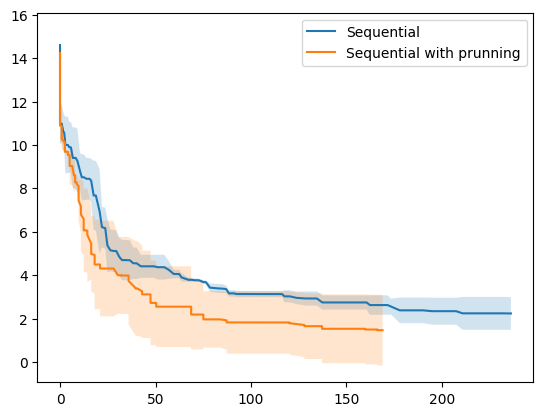

In [106]:

plt.plot(time_seq, mean_seq, label="Sequential")
plt.fill_between(time_seq, mean_seq - std_seq, mean_seq + std_seq, alpha=0.2)

plt.plot(time_prune, mean_prune, label="Sequential with prunning")
plt.fill_between(time_prune, mean_prune - std_prune, mean_prune + std_prune, alpha=0.2)

plt.legend()

In [107]:
len([15.750191660034591, 13.11006804504186, 11.816233667092893, 10.663690581985854, 10.663690581985854, 10.663690581985854, 10.663690581985854, 10.663690581985854, 10.663690581985854, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.342553836139263, 10.342553836139263, 10.342553836139263, 10.342553836139263, 10.342553836139263, 9.786194554150246, 9.786194554150246, 9.786194554150246, 9.786194554150246, 9.786194554150246, 9.786194554150246, 8.648690352700488, 8.648690352700488, 8.648690352700488, 8.648690352700488, 8.648690352700488, 8.648690352700488, 8.648690352700488, 8.648690352700488, 8.648690352700488, 8.648690352700488, 8.648690352700488, 8.648690352700488, 8.648690352700488, 8.648690352700488, 6.935537816358135, 6.935537816358135, 6.935537816358135, 6.935537816358135, 6.935537816358135, 6.935537816358135, 6.935537816358135, 6.935537816358135, 6.935537816358135, 6.935537816358135, 6.174707713778606, 5.9071599667894965, 5.156971038631347, 4.239741228789914, 4.239741228789914, 4.239741228789914, 4.239741228789914, 4.239741228789914, 4.239741228789914, 4.209796909721742, 4.209796909721742, 4.209796909721742, 3.1823737720067204, 3.1823737720067204, 3.1823737720067204, 3.1823737720067204, 3.1823737720067204, 3.1823737720067204, 3.1823737720067204, 3.1823737720067204, 3.1823737720067204, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0100572942806143, 2.744354497660503, 2.744354497660503, 2.744354497660503, 2.744354497660503, 2.744354497660503, 2.6755901993905202, 2.6755901993905202, 2.6755901993905202, 2.6755901993905202, 2.6755901993905202, 2.6755901993905202, 2.6755901993905202, 2.6755901993905202, 2.6755901993905202, 2.6755901993905202, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332])


160

In [109]:
len([0.331, 0.373, 0.406, 0.436, 0.464, 0.492, 0.519, 0.547, 0.575, 0.603, 0.63, 0.658, 0.685, 0.712, 0.74, 0.769, 0.797, 0.824, 0.852, 0.879, 0.907, 0.935, 0.962, 0.989, 1.017, 1.045, 1.072, 1.099, 1.127, 1.154, 1.182, 1.231, 1.258, 1.286, 1.313, 1.34, 1.367, 1.394, 1.422, 1.452, 6778.166, 6778.293, 6778.31, 6778.323, 7811.43, 7811.49, 7811.502, 7811.514, 8250.288, 8250.334, 8250.346, 8250.355, 8958.451, 8958.559, 8958.572, 8958.585, 9358.618, 9358.7, 9358.717, 9358.729, 11061.798, 11061.847, 11061.862, 11061.875, 11356.815, 11356.909, 11356.925, 11356.939, 11784.787, 11784.9, 11784.914, 11784.924, 13500.895, 13500.945, 13500.958, 13500.968, 15814.879, 15814.946, 15814.961, 15814.974, 17004.619, 17004.692, 17004.707, 17004.72, 19466.366, 19466.427, 19466.451, 19466.468, 19836.992, 19837.096, 19837.111, 19837.121, 22299.887, 22299.937, 22299.95, 22299.965, 22699.677, 22699.721, 22699.734, 22699.744, 24383.536, 24383.582, 24383.595, 24383.604, 26334.486, 26334.541, 26334.555, 26334.572, 29038.085, 29038.229, 29038.249, 29038.265, 30369.633, 30369.688, 30369.701, 30369.712, 33721.224, 33721.302, 33721.319, 33721.334, 36036.008, 36036.071, 36036.087, 36036.103, 37454.01, 37454.116, 37454.129, 37454.139, 39199.996, 39200.045, 39200.059, 39200.069, 40102.594, 40102.672, 40102.688, 40102.702, 42850.447, 42850.514, 42850.532, 42850.561, 44578.237, 44578.294, 44578.308, 44578.319, 47106.353, 47106.42, 47106.434, 47106.447, 47803.107, 47803.163, 47803.178, 47803.189, 49948.284, 49948.355, 49948.372, 49948.385, 52038.072, 52038.127, 52038.14, 52038.15, 52590.045, 52590.134, 52590.153, 52590.168, 56280.188, 56280.261, 56280.279, 56280.294, 58570.342, 58570.412, 58570.428, 58570.441, 59712.859, 59712.924, 59712.943, 59712.957, 62227.535, 62227.616, 62227.635, 62227.65, 64256.731, 64256.807, 64256.826, 64256.842, 64766.877, 64766.955, 64766.973, 64766.985, 69889.941, 69890.081, 69890.101, 69890.117, 75394.823, 75394.953, 75394.973, 75394.987, 83185.133, 83185.205, 83185.227, 83185.246, 89977.642, 89977.724, 89977.741, 89977.752, 98624.501, 98624.577, 98624.593, 98624.607, 106647.545, 106647.594, 106647.609, 106647.62, 115732.079, 115732.155, 115732.173, 115732.188, 125875.397, 125875.488, 125875.507, 125875.523, 138512.18, 138512.259, 138512.273, 138512.286, 150194.722, 150194.808, 150194.822, 150194.833, 164522.767, 164522.828, 164522.844, 164522.855, 176854.914, 176854.975, 176854.997, 176855.016, 193987.262, 193987.326, 193987.347, 193987.364, 211003.534, 211003.574, 211003.585, 211003.593, 223459.272, 223459.357, 223459.377, 223459.394, 240534.338, 240534.399, 240534.413, 240534.424, 257687.514, 257687.567, 257687.584, 257687.596, 278247.688, 278247.783, 278247.801, 278247.816, 297216.476, 297216.557, 297216.573, 297216.586, 319658.98, 319659.031, 319659.045, 319659.055, 342200.808, 342200.861, 342200.875, 342200.887, 361666.143, 361666.211, 361666.224, 361666.234, 379227.206, 379227.258, 379227.274, 379227.287]
)

280

In [110]:
# import numpy as np

# def process_sequential_noisy(result_seq, num_samples, noise):
#     odd_index = np.arange(1, len(result_seq), 2)
#     even_index = np.arange(0, len(result_seq), 2)
    
#     array_seq = result_seq[even_index]
#     time_seq = result_seq[odd_index]
#     # time_seq = time_seq - np.min(time_seq, axis=1).reshape(-1, 1)
#     time_seq = np.mean(time_seq, axis=0) / 1000

#     noise = np.max(np.random.rand(len(time_seq), num_samples) * noise / 2 + noise, axis=1)
#     noise = np.add.accumulate(noise)
#     time_seq += noise
    
#     mean_seq = np.mean(array_seq, axis=0)
#     std_seq = np.std(array_seq, axis=0)
#     return mean_seq, std_seq, time_seq

In [111]:
result_seq = np.array([
[14.510022816624742, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.896837005725239, 11.70141578856079, 11.70141578856079, 11.70141578856079, 11.70141578856079, 11.381690872021526, 11.381690872021526, 11.351953695303889, 11.351953695303889, 11.351953695303889, 9.976931859268095, 9.976931859268095, 9.976931859268095, 9.765551836166036, 9.765551836166036, 9.765551836166036, 9.765551836166036, 9.765551836166036, 9.69182994344398, 7.484171147495502, 7.484171147495502, 6.943129610343512, 6.2646356150289755, 6.2646356150289755, 6.2646356150289755, 6.002630987501181, 6.002630987501181, 6.002630987501181, 5.978536265782253, 5.560372428991638, 5.560372428991638, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 5.1412592803351735, 4.785505888745547, 4.200018990560785, 4.200018990560785, 4.200018990560785, 4.200018990560785, 4.17669700940419, 3.9092434448804743, 3.9092434448804743, 3.8508622873205813, 3.8508622873205813, 3.5841495823982297, 3.5841495823982297, 3.1967275735113536, 3.1967275735113536, 3.1967275735113536, 3.1967275735113536, 3.1967275735113536, 3.1967275735113536, 3.1967275735113536, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 3.1080810719872543, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5582624273717447, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5201891452145166, 2.5033095553621973, 2.5033095553621973],
[0.307, 0.339, 0.363, 0.384, 0.405, 0.426, 0.447, 0.468, 0.488, 0.508, 0.529, 0.549, 0.569, 0.589, 0.609, 0.63, 0.649, 0.674, 0.696, 0.717, 0.737, 0.758, 0.778, 0.799, 0.82, 0.841, 0.866, 0.888, 0.909, 0.929, 0.949, 0.988, 1.008, 1.028, 1.048, 1.068, 1.088, 1.108, 1.128, 1.149, 717.923, 1201.141, 1969.657, 2565.534, 2933.967, 3306.457, 4107.492, 4290.622, 4714.768, 5718.507, 6890.364, 7687.111, 8886.835, 9269.834, 10758.406, 11421.296, 13024.402, 13902.706, 14265.345, 16352.122, 18431.873, 19684.372, 20639.247, 23494.448, 25160.587, 26520.133, 28586.856, 30563.075, 31145.647, 33973.03, 36673.499, 36944.926, 39409.255, 42287.733, 43911.559, 46863.159, 47985.043, 48772.845, 49255.878, 50572.88, 52207.489, 56265.146, 59057.185, 59535.628, 60778.276, 62341.955, 64520.456, 66893.357, 69609.316, 70074.189, 73857.194, 75110.069, 78182.427, 81760.004, 82881.733, 86618.843, 87391.903, 88372.181, 90026.332, 90977.779, 92910.534, 93070.576, 95659.156, 101068.978, 106381.461, 109172.058, 109660.995, 111067.973, 114613.841, 116302.656, 117454.213, 120869.124, 121438.993, 125451.602, 127990.426, 130556.371, 138132.136, 139533.191, 141702.46, 148713.113, 149029.804, 153575.908, 153752.99, 155115.313, 159736.879, 167440.845, 168339.4, 169291.375, 172745.975, 175036.815, 177632.906, 178573.192, 180283.18, 182654.674, 183825.763, 185921.894, 188725.76, 192126.485, 202136.05, 202848.577, 204750.77, 204970.424, 207416.305, 209444.485, 212457.471, 220996.945, 221227.265, 222886.615, 223104.506, 223324.761, 224543.173, 225940.486, 228751.404, 231077.014, 232504.194, 235612.941, 235845.153, 236096.629, 238105.105, 240061.193],
[13.794908389503037, 13.794908389503037, 13.440397792385337, 13.440397792385337, 13.440397792385337, 13.440397792385337, 12.472905407444362, 12.472905407444362, 12.472905407444362, 12.472905407444362, 12.472905407444362, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.605470349838315, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 11.278032683373883, 10.208462794898638, 10.208462794898638, 8.53222036317438, 8.53222036317438, 8.53222036317438, 8.53222036317438, 8.53222036317438, 8.07945968781107, 8.07945968781107, 8.07945968781107, 8.07945968781107, 8.07945968781107, 8.07945968781107, 8.07945968781107, 8.07945968781107, 7.826744633426028, 7.393797396159835, 7.393797396159835, 5.293478544349828, 5.293478544349828, 5.276010385980449, 5.276010385980449, 5.276010385980449, 5.179812402630034, 5.179812402630034, 4.61785357164657, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 4.187653316086646, 3.746308701418702, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.6761509632438814, 3.597726860959956, 3.3224687704041185, 3.3224687704041185, 3.3224687704041185, 3.3224687704041185, 3.3224687704041185, 3.3224687704041185, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.313118089509459, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2023642917492237, 3.2018717687616385, 3.2018717687616385, 3.2018717687616385, 3.2018717687616385, 3.2018717687616385, 3.2018717687616385, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392, 2.9966995134874392],
[0.49, 0.529, 0.556, 0.581, 0.605, 0.63, 0.655, 0.679, 0.703, 0.727, 0.75, 0.774, 0.797, 0.821, 0.844, 0.868, 0.892, 0.916, 0.939, 0.963, 0.986, 1.01, 1.033, 1.057, 1.081, 1.105, 1.129, 1.152, 1.176, 1.199, 1.223, 1.246, 1.269, 1.293, 1.316, 1.34, 1.363, 1.387, 1.41, 1.433, 914.403, 1763.457, 2305.301, 2908.953, 3657.865, 4437.238, 5040.257, 6377.906, 7721.841, 9365.12, 9874.267, 11104.554, 11327.986, 12153.244, 12901.455, 15217.524, 16075.759, 18045.947, 19556.893, 20852.908, 22489.1, 25079.946, 25916.855, 26227.372, 29612.493, 31835.69, 33975.159, 35648.078, 37700.967, 40683.888, 41212.395, 44103.879, 47394.098, 48156.011, 48285.188, 49523.278, 49891.325, 52819.246, 58868.942, 59581.321, 61630.462, 61894.687, 62032.962, 62746.038, 63849.248, 65819.167, 68927.444, 70523.42, 71547.274, 75221.85, 77958.751, 79519.273, 81142.386, 88691.463, 89356.663, 90798.748, 92413.856, 93022.474, 94874.222, 95396.067, 95702.886, 96628.96, 97605.106, 99312.848, 101969.542, 103558.608, 104971.265, 107145.475, 108675.023, 108844.428, 109230.615, 112134.279, 112775.019, 113693.698, 115434.257, 117148.671, 117340.185, 117555.616, 118850.302, 120028.757, 121798.047, 123631.143, 124967.843, 125392.569, 125604.556, 128100.925, 129792.696, 131496.677, 131694.943, 132141.766, 134901.916, 136086.18, 136335.786, 137387.332, 138715.957, 138962.214, 140277.548, 141456.732, 142269.724, 144117.888, 144369.736, 144766.788, 145018.829, 145262.839, 147223.08, 147679.723, 147908.375, 154081.077, 154313.681, 156281.094, 157161.623, 159967.634, 161316.646, 166091.541, 168822.082, 172251.915, 174272.59, 176565.334, 177376.865, 178349.186],
[15.540698790565095, 13.53177005818217, 13.53177005818217, 13.53177005818217, 13.53177005818217, 13.53177005818217, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 12.361132006337158, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 11.627830050836193, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 9.783801478588012, 8.790737290047783, 8.790737290047783, 8.37166261217916, 8.37166261217916, 7.493062122786531, 7.493062122786531, 7.493062122786531, 7.493062122786531, 7.493062122786531, 5.864581791403499, 5.864581791403499, 5.864581791403499, 5.864581791403499, 5.74519551202874, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.900483974206445, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.7774849166062876, 3.406141886861818, 3.286486803121719, 3.286486803121719, 3.286486803121719, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.9662824628241222, 2.652988718774353, 2.652988718774353, 2.550695489508311, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.468599411989047, 2.107137265523296, 2.107137265523296, 2.107137265523296, 2.107137265523296, 2.107137265523296, 2.107137265523296, 1.581839588586782, 1.581839588586782, 1.581839588586782, 1.581839588586782, 1.581839588586782, 1.581839588586782, 1.581839588586782, 1.505108656694493, 1.505108656694493, 1.505108656694493, 1.505108656694493, 1.505108656694493, 1.505108656694493, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545, 1.2052311890363545],
[0.429, 0.47, 0.498, 0.525, 0.553, 0.6, 0.641, 0.681, 0.725, 0.762, 0.79, 0.832, 0.881, 0.911, 0.941, 0.972, 1.001, 1.031, 1.06, 1.089, 1.119, 1.149, 1.178, 1.21, 1.246, 1.294, 1.329, 1.354, 1.38, 1.405, 1.43, 1.457, 1.482, 1.508, 1.533, 1.557, 1.583, 1.608, 1.633, 1.66, 1105.985, 2158.568, 2359.156, 3020.037, 4032.162, 4668.391, 5434.225, 6384.894, 7735.366, 9602.242, 10547.879, 12560.381, 14018.223, 15968.27, 17747.467, 19554.421, 19811.668, 20947.974, 22466.252, 24909.087, 25039.819, 26310.614, 27877.082, 29349.342, 29648.486, 29978.756, 30633.085, 31222.146, 33855.848, 35042.353, 37265.764, 39295.895, 40133.963, 42781.792, 45954.994, 46599.458, 49348.885, 52421.29, 53240.291, 53613.951, 56927.979, 60591.792, 61584.683, 61735.808, 62496.159, 62653.811, 68278.939, 69393.521, 70841.09, 72499.393, 73745.571, 74485.631, 76174.536, 79307.405, 81003.853, 83565.72, 85506.16, 88798.932, 88937.46, 90337.532, 91641.585, 91842.048, 92595.368, 94783.847, 96612.811, 99031.376, 100583.653, 100761.484, 102821.408, 104633.987, 104826.148, 115876.534, 118359.501, 121716.69, 128298.566, 138376.0, 142551.431, 142744.511, 142928.962, 143295.192, 149775.384, 150480.103, 154097.114, 154312.134, 154524.005, 154741.46, 155953.324, 156917.465, 164807.254, 165225.363, 165720.031, 166885.931, 170240.695, 180287.539, 182948.399, 183167.051, 185535.28, 186382.157, 189380.609, 191461.926, 195303.047, 197264.006, 201231.899, 206331.108, 210578.901, 215655.509, 221176.822, 227630.999, 233922.863, 234153.532, 240557.192, 246483.064, 252542.134, 258473.315, 265980.898, 273778.339, 281195.474, 281426.056, 288906.149, 289912.417]
])
result_2samples = np.array([
[15.750191660034591, 13.11006804504186, 11.816233667092893, 10.663690581985854, 10.663690581985854, 10.663690581985854, 10.663690581985854, 10.663690581985854, 10.663690581985854, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.638440541494846, 10.342553836139263, 10.342553836139263, 10.342553836139263, 10.342553836139263, 10.342553836139263, 9.786194554150246, 9.786194554150246, 9.786194554150246, 9.786194554150246, 9.786194554150246, 9.786194554150246, 8.648690352700488, 8.648690352700488, 8.648690352700488, 8.648690352700488, 8.648690352700488, 8.648690352700488, 8.648690352700488, 8.648690352700488, 8.648690352700488, 8.648690352700488, 8.648690352700488, 8.648690352700488, 8.648690352700488, 8.648690352700488, 6.935537816358135, 6.935537816358135, 6.935537816358135, 6.935537816358135, 6.935537816358135, 6.935537816358135, 6.935537816358135, 6.935537816358135, 6.935537816358135, 6.935537816358135, 6.174707713778606, 5.9071599667894965, 5.156971038631347, 4.239741228789914, 4.239741228789914, 4.239741228789914, 4.239741228789914, 4.239741228789914, 4.239741228789914, 4.209796909721742, 4.209796909721742, 4.209796909721742, 3.1823737720067204, 3.1823737720067204, 3.1823737720067204, 3.1823737720067204, 3.1823737720067204, 3.1823737720067204, 3.1823737720067204, 3.1823737720067204, 3.1823737720067204, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0179588230507517, 3.0100572942806143, 2.744354497660503, 2.744354497660503, 2.744354497660503, 2.744354497660503, 2.744354497660503, 2.6755901993905202, 2.6755901993905202, 2.6755901993905202, 2.6755901993905202, 2.6755901993905202, 2.6755901993905202, 2.6755901993905202, 2.6755901993905202, 2.6755901993905202, 2.6755901993905202, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332, 2.2465499954369332],
[0.699, 0.764, 0.799, 0.839, 0.874, 0.909, 0.936, 0.96, 0.999, 1.03, 1.062, 1.092, 1.124, 1.161, 1.197, 1.229, 1.27, 1.325, 1.359, 1.395, 1.43, 1.465, 1.502, 1.538, 1.579, 1.616, 1.652, 1.688, 1.724, 1.759, 1.795, 1.885, 1.933, 1.967, 1.993, 2.025, 2.056, 2.086, 2.119, 2.154, 6252.477, 6252.533, 7374.618, 7374.665, 8505.263, 8505.327, 9780.974, 9781.052, 10141.227, 10141.286, 11453.788, 11453.832, 13129.634, 13129.694, 13806.118, 13806.228, 14147.977, 14148.079, 15046.851, 15046.889, 16647.923, 16647.995, 17564.614, 17564.683, 19079.209, 19079.257, 21738.895, 21738.951, 22442.087, 22442.142, 22772.731, 22772.789, 24216.962, 24217.106, 26458.273, 26458.331, 29304.466, 29304.668, 33121.571, 33121.624, 33838.207, 33838.268, 36067.225, 36067.301, 37620.244, 37620.312, 40175.732, 40175.887, 45536.896, 45536.955, 49716.282, 49716.343, 54757.161, 54757.21, 60541.44, 60541.497, 63120.277, 63120.333, 66875.607, 66875.683, 67771.067, 67771.115, 68266.193, 68266.244, 70415.407, 70415.512, 74057.185, 74057.315, 76563.493, 76563.618, 77705.622, 77705.67, 82053.338, 82053.482, 82306.917, 82307.005, 85669.487, 85669.565, 89207.601, 89207.691, 91797.096, 91797.147, 94076.907, 94077.012, 94344.369, 94344.435, 94663.207, 94663.267, 96707.645, 96707.774, 99183.328, 99183.388, 103016.451, 103016.583, 110127.115, 110127.199, 113143.842, 113143.89, 115865.452, 115865.513, 117946.733, 117946.79, 120293.027, 120293.086, 120598.867, 120598.92, 127387.416, 127387.48, 128049.789, 128049.856, 130896.062, 130896.13, 134419.167, 134419.217, 134726.764, 134726.985, 135106.596, 135106.674, 135883.262, 135883.374],
[11.065502420216808, 11.065502420216808, 11.065502420216808, 11.065502420216808, 11.065502420216808, 11.065502420216808, 11.065502420216808, 11.065502420216808, 11.065502420216808, 11.065502420216808, 11.065502420216808, 11.065502420216808, 11.065502420216808, 11.065502420216808, 11.065502420216808, 11.065502420216808, 11.065502420216808, 11.065502420216808, 11.065502420216808, 11.065502420216808, 11.065502420216808, 11.065502420216808, 11.065502420216808, 11.020863310241594, 11.020863310241594, 11.020863310241594, 11.020863310241594, 11.020863310241594, 11.020863310241594, 11.020863310241594, 11.020863310241594, 11.020863310241594, 11.020863310241594, 11.020863310241594, 11.020863310241594, 11.020863310241594, 11.020863310241594, 11.020863310241594, 11.020863310241594, 11.020863310241594, 11.020863310241594, 11.020863310241594, 11.020863310241594, 10.830982956545379, 10.034099006617478, 10.034099006617478, 9.798893869168477, 9.798893869168477, 9.798893869168477, 9.798893869168477, 9.798893869168477, 9.798893869168477, 9.441091017621245, 9.441091017621245, 9.441091017621245, 9.441091017621245, 9.441091017621245, 9.441091017621245, 9.441091017621245, 9.441091017621245, 7.9916764413916095, 7.9048897413422985, 7.9048897413422985, 7.9048897413422985, 7.9048897413422985, 7.9048897413422985, 7.9048897413422985, 7.9048897413422985, 7.371227352853781, 7.371227352853781, 5.450232101841181, 4.949411013645676, 4.949411013645676, 4.949411013645676, 4.949411013645676, 4.949411013645676, 4.949411013645676, 4.949411013645676, 4.949411013645676, 4.949411013645676, 4.949411013645676, 4.890847536301234, 4.890847536301234, 4.890847536301234, 4.890847536301234, 4.890847536301234, 4.250137292361558, 4.250137292361558, 4.250137292361558, 4.250137292361558, 3.704025145629434, 3.704025145629434, 3.704025145629434, 3.704025145629434, 3.704025145629434, 3.704025145629434, 3.704025145629434, 3.704025145629434, 3.704025145629434, 3.704025145629434, 3.704025145629434, 3.704025145629434, 3.704025145629434, 3.704025145629434, 3.704025145629434, 3.607758668767126, 3.607758668767126, 3.607758668767126, 3.607758668767126, 3.607758668767126, 3.607758668767126, 3.607758668767126, 3.4724502336261485, 3.345606899403983, 3.2601185998529343, 3.2601185998529343, 3.2601185998529343, 3.2601185998529343, 3.2601185998529343, 3.2601185998529343, 3.2601185998529343, 3.2601185998529343, 3.1637783899454814, 3.1637783899454814, 3.1637783899454814, 3.1637783899454814, 3.1637783899454814, 3.1637783899454814, 3.1637783899454814, 3.1637783899454814, 3.0770877060550252, 3.0770877060550252, 3.0770877060550252, 3.0770877060550252, 2.847385073814977, 2.847385073814977, 2.847385073814977, 2.847385073814977, 2.847385073814977, 2.847385073814977, 2.847385073814977, 2.847385073814977, 2.847385073814977, 2.847385073814977, 2.847385073814977, 2.847385073814977, 2.847385073814977, 2.847385073814977, 2.847385073814977, 2.847385073814977, 2.847385073814977, 2.847385073814977, 2.847385073814977, 2.847385073814977, 2.7761733469244914, 2.7761733469244914, 2.7761733469244914, 2.7761733469244914, 2.7761733469244914, 2.7761733469244914],
[0.834, 0.89, 0.924, 0.956, 0.987, 1.016, 1.045, 1.074, 1.103, 1.131, 1.16, 1.186, 1.215, 1.244, 1.272, 1.303, 1.331, 1.36, 1.39, 1.421, 1.45, 1.48, 1.51, 1.544, 1.576, 1.604, 1.632, 1.659, 1.687, 1.714, 1.742, 1.77, 1.799, 1.828, 1.855, 1.882, 1.909, 1.937, 1.965, 1.996, 7733.139, 7733.18, 8468.465, 8468.512, 9523.468, 9523.528, 10889.23, 10889.287, 11397.082, 11397.182, 12025.392, 12025.475, 12649.778, 12649.821, 14151.775, 14151.83, 14533.711, 14533.778, 15264.94, 15264.992, 17293.123, 17293.174, 17649.311, 17649.369, 18058.367, 18058.423, 19903.542, 19903.588, 22325.634, 22325.702, 24220.743, 24220.787, 24581.789, 24581.859, 25930.815, 25930.874, 28320.065, 28320.16, 29836.18, 29836.228, 32055.924, 32055.988, 35239.116, 35239.177, 38186.333, 38186.393, 42280.082, 42280.162, 43384.158, 43384.22, 46325.584, 46325.66, 47262.144, 47262.209, 57176.284, 57176.409, 61105.53, 61105.577, 63673.745, 63673.811, 64619.135, 64619.21, 64841.035, 64841.111, 66084.311, 66084.364, 67525.485, 67525.53, 68509.119, 68509.196, 70860.153, 70860.262, 73047.896, 73047.976, 78448.272, 78448.329, 80580.279, 80580.428, 85047.699, 85047.789, 86308.078, 86308.126, 89221.273, 89221.348, 90341.267, 90341.328, 92513.081, 92513.186, 95909.906, 95909.981, 100537.211, 100537.301, 102026.15, 102026.219, 107887.33, 107887.392, 108391.547, 108391.618, 111008.661, 111008.708, 111826.847, 111826.949, 114822.514, 114822.583, 117603.166, 117603.234, 121011.138, 121011.205, 122379.292, 122379.389, 125409.388, 125409.453, 126425.557, 126425.609, 132208.669, 132208.747, 137360.362, 137360.427, 140580.2, 140580.276],
[10.76106245638578, 10.76106245638578, 10.76106245638578, 10.76106245638578, 10.76106245638578, 10.76106245638578, 10.76106245638578, 10.76106245638578, 10.76106245638578, 10.76106245638578, 10.76106245638578, 10.76106245638578, 9.473307170086983, 9.473307170086983, 9.473307170086983, 9.473307170086983, 9.473307170086983, 9.473307170086983, 9.473307170086983, 9.473307170086983, 9.473307170086983, 9.473307170086983, 9.473307170086983, 9.473307170086983, 9.473307170086983, 9.473307170086983, 9.473307170086983, 9.473307170086983, 9.473307170086983, 9.473307170086983, 9.473307170086983, 9.473307170086983, 9.473307170086983, 9.473307170086983, 9.473307170086983, 9.473307170086983, 9.473307170086983, 9.473307170086983, 9.473307170086983, 9.473307170086983, 9.473307170086983, 9.473307170086983, 9.159585153089854, 9.159585153089854, 9.159585153089854, 9.159585153089854, 9.159585153089854, 9.159585153089854, 9.159585153089854, 9.159585153089854, 9.159585153089854, 9.159585153089854, 9.159585153089854, 9.159585153089854, 9.159585153089854, 9.159585153089854, 9.159585153089854, 9.159585153089854, 9.13406822399526, 8.947825036732873, 8.947825036732873, 8.947825036732873, 8.947825036732873, 8.947825036732873, 8.947825036732873, 8.947825036732873, 8.947825036732873, 8.947825036732873, 8.947825036732873, 8.75627031164375, 8.75627031164375, 8.60583680599326, 8.60583680599326, 8.60583680599326, 8.60583680599326, 8.60583680599326, 6.404912730854431, 6.2329643758039985, 6.2329643758039985, 6.2329643758039985, 6.2329643758039985, 6.2329643758039985, 6.2329643758039985, 6.2329643758039985, 4.88954633549907, 4.81422205479511, 4.81422205479511, 4.81422205479511, 4.81422205479511, 4.81422205479511, 4.81422205479511, 4.81422205479511, 4.206804893875162, 4.206804893875162, 4.206804893875162, 4.206804893875162, 4.206804893875162, 4.206804893875162, 4.206804893875162, 4.206804893875162, 4.206804893875162, 4.206804893875162, 4.206804893875162, 4.206804893875162, 4.206804893875162, 4.206804893875162, 3.8129954406133426, 3.8129954406133426, 3.8129954406133426, 3.8129954406133426, 3.8129954406133426, 3.8129954406133426, 3.0552993639437926, 3.0552993639437926, 3.0552993639437926, 3.0552993639437926, 3.0552993639437926, 3.0552993639437926, 3.0552993639437926, 3.0552993639437926, 3.0552993639437926, 3.0552993639437926, 3.0552993639437926, 3.0552993639437926, 3.0552993639437926, 3.0552993639437926, 3.0552993639437926, 3.0552993639437926, 3.0552993639437926, 3.0552993639437926, 2.644132334751504, 2.644132334751504, 1.8976072434649365, 1.8976072434649365, 1.8976072434649365, 1.8976072434649365, 1.8976072434649365, 1.8976072434649365, 1.8976072434649365, 1.8976072434649365, 1.8976072434649365, 1.8976072434649365, 1.8976072434649365, 1.8976072434649365, 1.781975350029747, 1.781975350029747, 1.781975350029747, 1.781975350029747, 1.781975350029747, 1.781975350029747, 1.781975350029747, 1.781975350029747, 1.781975350029747, 1.781975350029747, 1.781975350029747, 1.781975350029747, 1.781975350029747, 1.781975350029747, 1.781975350029747, 1.781975350029747],
[0.679, 0.75, 0.781, 0.81, 0.839, 0.866, 0.892, 0.919, 0.945, 0.972, 0.999, 1.037, 1.069, 1.096, 1.122, 1.148, 1.174, 1.202, 1.228, 1.254, 1.282, 1.325, 1.362, 1.402, 1.428, 1.455, 1.481, 1.507, 1.542, 1.568, 1.593, 1.62, 1.646, 1.672, 1.697, 1.722, 1.748, 1.773, 1.798, 1.824, 7364.108, 7364.2, 8526.571, 8526.638, 9332.747, 9332.818, 10608.569, 10608.606, 11989.138, 11989.196, 13202.57, 13202.628, 14108.998, 14109.062, 15273.417, 15273.483, 15738.184, 15738.244, 17357.567, 17357.617, 18318.923, 18318.977, 18708.481, 18708.52, 20653.565, 20653.617, 21756.201, 21756.247, 23302.612, 23302.663, 25686.549, 25686.615, 26147.789, 26147.895, 27096.622, 27096.711, 28805.593, 28805.642, 31322.642, 31322.704, 32689.752, 32689.831, 35175.193, 35175.256, 38701.514, 38701.63, 40240.583, 40240.647, 43241.4, 43241.464, 44974.919, 44974.975, 47754.413, 47754.471, 48637.04, 48637.112, 49961.353, 49961.427, 51270.81, 51270.9, 52560.754, 52560.811, 53106.458, 53106.511, 55931.376, 55931.437, 58004.759, 58004.832, 60979.021, 60979.091, 63394.84, 63394.896, 66534.088, 66534.187, 71150.799, 71150.892, 73887.171, 73887.238, 75802.133, 75802.281, 76703.228, 76703.317, 77959.398, 77959.448, 80237.826, 80237.901, 81754.087, 81754.173, 82034.941, 82035.004, 84724.07, 84724.121, 89224.624, 89224.687, 94624.972, 94625.028, 100653.448, 100653.507, 102557.102, 102557.169, 104866.878, 104867.021, 105129.261, 105129.338, 107327.892, 107327.95, 114599.41, 114599.532, 116345.864, 116345.939, 120898.497, 120898.572, 123561.603, 123561.653, 127528.292, 127528.35, 132579.219, 132579.299, 136964.958, 136965.046],
])
result_4samples = np.array([
[12.839483925208002, 12.839483925208002, 12.839483925208002, 12.839483925208002, 12.839483925208002, 12.839483925208002, 12.839483925208002, 11.645053688334714, 11.645053688334714, 11.645053688334714, 11.645053688334714, 11.645053688334714, 11.645053688334714, 10.786953406591719, 10.786953406591719, 10.322071752245197, 10.322071752245197, 10.322071752245197, 10.322071752245197, 10.322071752245197, 10.322071752245197, 10.322071752245197, 10.322071752245197, 10.322071752245197, 10.322071752245197, 10.322071752245197, 10.322071752245197, 10.322071752245197, 10.322071752245197, 10.322071752245197, 10.322071752245197, 10.322071752245197, 10.322071752245197, 10.322071752245197, 10.322071752245197, 10.322071752245197, 10.322071752245197, 10.322071752245197, 10.322071752245197, 10.322071752245197, 10.104674707719902, 10.104674707719902, 10.104674707719902, 10.104674707719902, 10.104674707719902, 10.104674707719902, 10.104674707719902, 10.104674707719902, 9.692530242298128, 9.692530242298128, 9.692530242298128, 9.692530242298128, 9.692530242298128, 9.692530242298128, 9.692530242298128, 9.692530242298128, 9.692530242298128, 9.692530242298128, 9.692530242298128, 9.692530242298128, 9.692530242298128, 9.692530242298128, 9.692530242298128, 9.692530242298128, 8.604100746327598, 8.422602827209147, 8.104816270850947, 8.104816270850947, 8.104816270850947, 8.104816270850947, 8.104816270850947, 8.104816270850947, 8.104816270850947, 8.104816270850947, 8.104816270850947, 8.104816270850947, 6.32230478615714, 6.32230478615714, 6.32230478615714, 6.32230478615714, 6.32230478615714, 6.32230478615714, 6.32230478615714, 6.32230478615714, 5.346160895558878, 5.346160895558878, 5.346160895558878, 5.346160895558878, 4.690559498499795, 4.690559498499795, 4.690559498499795, 4.690559498499795, 4.690559498499795, 4.5918310268937645, 4.464472338942514, 4.464472338942514, 4.464472338942514, 4.464472338942514, 4.464472338942514, 4.464472338942514, 4.464472338942514, 4.464472338942514, 4.464472338942514, 4.464472338942514, 4.464472338942514, 4.464472338942514, 4.231478867262066, 4.231478867262066, 4.231478867262066, 4.231478867262066, 4.231478867262066, 4.231478867262066, 4.231478867262066, 4.231478867262066, 4.231478867262066, 4.231478867262066, 4.231478867262066, 4.231478867262066, 4.231478867262066, 4.231478867262066, 3.8573258687457934, 3.8573258687457934, 3.640317341625988, 3.633534802237279, 3.633534802237279, 3.633534802237279, 3.633534802237279, 3.633534802237279, 3.633534802237279, 3.633534802237279, 3.3519034339396367, 3.3313682165206804, 3.3313682165206804, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.7881225994220142, 2.743810037740158, 2.743810037740158, 2.743810037740158, 2.743810037740158, 2.743810037740158, 2.743810037740158, 2.743810037740158, 2.743810037740158, 2.743810037740158, 2.743810037740158, 2.330304488491145, 2.330304488491145, 2.330304488491145, 2.330304488491145, 2.330304488491145, 2.330304488491145, 2.330304488491145, 2.330304488491145, 2.330304488491145, 2.330304488491145, 2.330304488491145, 2.330304488491145, 2.330304488491145, 2.330304488491145, 2.330304488491145, 2.330304488491145, 2.2742574911211872, 2.2742574911211872, 2.2742574911211872, 2.2742574911211872, 2.2742574911211872, 2.2742574911211872, 2.2742574911211872, 2.2742574911211872, 2.2742574911211872, 2.2742574911211872, 2.2742574911211872, 2.2742574911211872, 2.2742574911211872, 2.2742574911211872, 2.2742574911211872, 2.2742574911211872, 2.2742574911211872, 2.2742574911211872, 2.195737738241235, 2.195737738241235, 2.195737738241235, 2.195737738241235, 2.195737738241235, 2.195737738241235, 2.195737738241235, 2.195737738241235, 2.195737738241235, 2.195737738241235, 2.195737738241235, 2.195737738241235, 2.195737738241235, 2.195737738241235, 2.195737738241235, 2.1190394697559296, 1.8179588927003256, 1.7940479282328607, 1.7940479282328607, 1.7940479282328607, 1.382256757229133, 1.382256757229133, 1.382256757229133, 1.382256757229133, 1.382256757229133, 1.382256757229133, 1.382256757229133, 1.382256757229133, 1.382256757229133, 1.382256757229133, 1.2648977411217435, 1.2648977411217435, 1.2578213690142843, 1.247439465198895, 1.247439465198895, 1.247439465198895, 1.247439465198895, 1.247439465198895, 1.247439465198895, 1.247439465198895, 1.2251600395216582, 1.2251600395216582, 1.2251600395216582, 1.2251600395216582, 1.2251600395216582, 1.133033682744149, 1.133033682744149, 0.6913754323886647, 0.6913754323886647, 0.6913754323886647, 0.6913754323886647, 0.6913754323886647, 0.6913754323886647],
[0.465, 0.503, 0.53, 0.555, 0.579, 0.603, 0.627, 0.65, 0.676, 0.701, 0.725, 0.749, 0.772, 0.795, 0.819, 0.843, 0.868, 0.892, 0.916, 0.94, 0.963, 0.986, 1.009, 1.032, 1.058, 1.082, 1.105, 1.128, 1.151, 1.175, 1.198, 1.221, 1.251, 1.274, 1.297, 1.32, 1.342, 1.365, 1.388, 1.41, 6953.433, 6953.476, 6953.487, 6953.496, 8124.928, 8124.974, 8124.986, 8124.995, 9735.403, 9735.449, 9735.461, 9735.47, 10373.03, 10373.082, 10373.098, 10373.111, 10723.846, 10723.902, 10723.919, 10723.932, 11304.263, 11304.322, 11304.341, 11304.355, 12323.42, 12323.465, 12323.478, 12323.488, 12888.012, 12888.059, 12888.073, 12888.085, 14235.977, 14236.049, 14236.067, 14236.078, 17439.479, 17439.523, 17439.536, 17439.546, 20441.503, 20441.556, 20441.569, 20441.585, 24790.936, 24790.992, 24791.008, 24791.021, 26788.362, 26788.405, 26788.417, 26788.427, 28272.034, 28272.102, 28272.124, 28272.143, 29691.45, 29691.522, 29691.564, 29691.584, 30932.598, 30932.649, 30932.66, 30932.669, 33095.883, 33095.966, 33096.02, 33096.034, 33623.601, 33623.664, 33623.676, 33623.685, 34272.301, 34272.359, 34272.374, 34272.39, 37907.73, 37907.78, 37907.8, 37907.812, 42937.665, 42937.718, 42937.733, 42937.744, 46490.27, 46490.329, 46490.342, 46490.353, 51670.683, 51670.738, 51670.753, 51670.764, 52812.597, 52812.674, 52812.691, 52812.705, 54699.796, 54699.915, 54699.935, 54699.951, 65439.668, 65439.721, 65439.735, 65439.747, 66326.577, 66326.629, 66326.642, 66326.652, 69608.255, 69608.308, 69608.321, 69608.332, 74940.961, 74941.046, 74941.062, 74941.092, 75956.188, 75956.253, 75956.274, 75956.285, 79125.007, 79125.059, 79125.074, 79125.085, 81389.887, 81389.949, 81389.966, 81389.98, 81736.459, 81736.57, 81736.59, 81736.607, 84076.637, 84076.718, 84076.733, 84076.744, 86734.667, 86734.78, 86734.8, 86734.816, 90157.835, 90157.894, 90157.911, 90157.926, 90523.262, 90523.346, 90523.366, 90523.383, 94142.635, 94142.71, 94142.733, 94142.753, 98848.222, 98848.299, 98848.315, 98848.329, 106520.45, 106520.559, 106520.577, 106520.592, 106900.531, 106900.613, 106900.63, 106900.643, 107275.416, 107275.475, 107275.491, 107275.504, 112686.944, 112687.025, 112687.042, 112687.062, 115421.947, 115422.007, 115422.022, 115422.032, 118492.926, 118493.047, 118493.07, 118493.093, 123338.022, 123338.105, 123338.122, 123338.135, 127132.313, 127132.384, 127132.401, 127132.419, 128753.673, 128753.787, 128753.808, 128753.825, 133502.16, 133502.222, 133502.237, 133502.249, 139549.747, 139549.842, 139549.858, 139549.87, 147962.181, 147962.336, 147962.36, 147962.377, 154609.679, 154609.769, 154609.792, 154609.814, 163904.836, 163904.974, 163904.99, 163905.002, 164423.372, 164423.438, 164423.455, 164423.469, 173554.909, 173554.977, 173554.994, 173555.015, 180943.635, 180943.7, 180943.717, 180943.73, 182356.899, 182356.974, 182356.996, 182357.018, 182842.635, 182842.693, 182842.708, 182842.721, 188544.225, 188544.294, 188544.313, 188544.329, 192011.425, 192011.48, 192011.495, 192011.506],
[13.820240492736529, 13.820240492736529, 13.820240492736529, 13.820240492736529, 13.082756278849969, 13.082756278849969, 13.082756278849969, 13.082756278849969, 13.082756278849969, 12.871265887993898, 12.871265887993898, 12.624446178181989, 12.624446178181989, 12.624446178181989, 12.624446178181989, 12.624446178181989, 11.879601732293832, 11.879601732293832, 11.879601732293832, 11.879601732293832, 11.879601732293832, 11.879601732293832, 11.879601732293832, 11.879601732293832, 11.879601732293832, 11.879601732293832, 11.879601732293832, 11.879601732293832, 11.879601732293832, 11.879601732293832, 11.879601732293832, 11.879601732293832, 11.879601732293832, 11.723067791602734, 11.723067791602734, 11.723067791602734, 11.723067791602734, 11.723067791602734, 11.723067791602734, 11.723067791602734, 11.723067791602734, 11.723067791602734, 11.723067791602734, 11.723067791602734, 11.723067791602734, 11.723067791602734, 11.723067791602734, 11.723067791602734, 11.247171626362512, 11.247171626362512, 11.231188021267526, 11.231188021267526, 11.231188021267526, 11.231188021267526, 11.231188021267526, 11.231188021267526, 11.231188021267526, 11.231188021267526, 11.231188021267526, 11.231188021267526, 11.003998928510798, 11.003998928510798, 11.003998928510798, 11.003998928510798, 10.420382752641773, 9.839676579490673, 9.839676579490673, 9.839676579490673, 9.839676579490673, 9.839676579490673, 9.839676579490673, 9.839676579490673, 9.839676579490673, 9.839676579490673, 9.839676579490673, 9.839676579490673, 9.839676579490673, 9.839676579490673, 9.839676579490673, 9.839676579490673, 9.650113059585646, 9.636608783908585, 9.23946625217011, 9.188725199538858, 9.188725199538858, 9.188725199538858, 9.188725199538858, 9.188725199538858, 8.725994813601769, 7.840238636673561, 7.7918577411141285, 7.7918577411141285, 5.7812378167354375, 5.397181797619446, 5.397181797619446, 5.397181797619446, 5.116347596290396, 5.116347596290396, 5.116347596290396, 5.116347596290396, 4.439384511790351, 4.439384511790351, 4.439384511790351, 4.439384511790351, 4.439384511790351, 4.439384511790351, 4.439384511790351, 4.439384511790351, 3.2391439574253487, 3.2391439574253487, 3.2391439574253487, 3.2391439574253487, 3.2391439574253487, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.8961368988922307, 2.86361671366462, 2.86361671366462, 2.86361671366462, 2.86361671366462, 2.5890492229170303, 2.5890492229170303, 2.273078442383625, 2.273078442383625, 2.273078442383625, 2.273078442383625, 2.273078442383625, 2.273078442383625, 2.273078442383625, 2.273078442383625, 2.273078442383625, 2.273078442383625, 2.273078442383625, 2.273078442383625, 2.273078442383625, 2.273078442383625, 2.273078442383625, 2.273078442383625, 2.273078442383625, 2.273078442383625, 2.273078442383625, 2.273078442383625, 2.273078442383625, 2.273078442383625, 2.273078442383625, 2.273078442383625, 2.273078442383625, 2.273078442383625, 2.174294413586527, 2.174294413586527, 1.768763845991899, 1.768763845991899, 1.768763845991899, 1.768763845991899, 1.768763845991899, 1.768763845991899, 1.768763845991899, 1.768763845991899, 1.5243170374609112, 1.5243170374609112, 1.5243170374609112, 1.5243170374609112, 1.5243170374609112, 1.5243170374609112, 1.5243170374609112, 1.5243170374609112, 1.5243170374609112, 1.5243170374609112, 1.5243170374609112, 1.5243170374609112, 1.5243170374609112, 1.5243170374609112, 1.5243170374609112, 1.5243170374609112, 1.5243170374609112, 1.5243170374609112, 1.5243170374609112, 1.5243170374609112, 1.5243170374609112, 1.5243170374609112, 1.5243170374609112, 1.5243170374609112, 1.5243170374609112, 1.5243170374609112, 1.5243170374609112, 1.523766884501772, 1.4740641547808981, 1.4740641547808981, 1.4740641547808981, 1.4740641547808981, 1.4740641547808981, 1.4740641547808981, 0.8159560611902887, 0.8159560611902887, 0.8159560611902887, 0.8159560611902887, 0.8159560611902887, 0.8159560611902887, 0.8159560611902887, 0.8159560611902887, 0.8159560611902887, 0.8159560611902887, 0.8159560611902887, 0.8159560611902887, 0.8159560611902887, 0.8159560611902887, 0.8159560611902887, 0.8159560611902887, 0.8159560611902887, 0.8159560611902887, 0.8159560611902887, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865, 0.6925492029223865],
[0.823, 0.896, 0.945, 0.994, 1.03, 1.082, 1.124, 1.168, 1.201, 1.237, 1.282, 1.342, 1.385, 1.428, 1.471, 1.516, 1.557, 1.605, 1.651, 1.721, 1.763, 1.807, 1.85, 1.897, 1.945, 1.991, 2.031, 2.073, 2.118, 2.162, 2.199, 2.245, 2.289, 2.331, 2.373, 2.42, 2.466, 2.505, 2.548, 2.593, 7344.76, 7344.828, 7344.842, 7344.851, 7561.053, 7561.106, 7561.124, 7561.139, 8433.082, 8433.138, 8433.153, 8433.165, 9092.263, 9092.312, 9092.326, 9092.338, 10020.926, 10021.027, 10021.045, 10021.06, 11366.879, 11366.94, 11366.952, 11366.962, 12825.406, 12825.456, 12825.472, 12825.484, 13596.393, 13596.459, 13596.479, 13596.498, 13958.084, 13958.17, 13958.184, 13958.195, 14252.316, 14252.41, 14252.435, 14252.457, 16695.025, 16695.086, 16695.106, 16695.122, 18035.128, 18035.257, 18035.276, 18035.291, 20145.521, 20145.577, 20145.594, 20145.608, 22296.259, 22296.324, 22296.345, 22296.365, 24930.721, 24930.774, 24930.79, 24930.802, 27632.911, 27633.006, 27633.023, 27633.036, 29381.184, 29381.283, 29381.301, 29381.317, 33585.935, 33586.007, 33586.022, 33586.035, 34797.111, 34797.194, 34797.218, 34797.239, 37528.473, 37528.53, 37528.547, 37528.56, 40266.371, 40266.477, 40266.496, 40266.511, 41631.896, 41631.967, 41631.991, 41632.012, 42934.85, 42934.927, 42934.942, 42934.956, 43273.822, 43273.997, 43274.023, 43274.043, 43556.629, 43556.794, 43556.816, 43556.834, 45355.169, 45355.258, 45355.274, 45355.286, 48396.05, 48396.102, 48396.116, 48396.127, 51201.964, 51202.06, 51202.078, 51202.092, 55511.419, 55511.48, 55511.498, 55511.514, 60069.563, 60069.696, 60069.719, 60069.736, 69008.514, 69008.562, 69008.576, 69008.586, 72867.446, 72867.517, 72867.533, 72867.546, 73171.391, 73171.502, 73171.541, 73171.559, 73470.651, 73470.791, 73470.81, 73470.826, 73843.984, 73844.082, 73844.099, 73844.112, 74423.457, 74423.593, 74423.607, 74423.62, 82251.889, 82251.96, 82251.975, 82251.985, 86629.677, 86629.747, 86629.764, 86629.778, 95520.987, 95521.071, 95521.088, 95521.101, 95892.861, 95892.927, 95892.945, 95892.961, 98603.125, 98603.202, 98603.219, 98603.233, 109760.675, 109760.756, 109760.77, 109760.781, 118970.262, 118970.315, 118970.329, 118970.34, 119276.687, 119276.75, 119276.766, 119276.779, 119859.22, 119859.286, 119859.307, 119859.325, 121222.733, 121222.785, 121222.799, 121222.81, 126689.425, 126689.488, 126689.509, 126689.526, 133262.926, 133262.977, 133262.99, 133263.0, 134815.873, 134815.918, 134815.93, 134815.939, 142046.408, 142046.465, 142046.482, 142046.498, 151115.24, 151115.304, 151115.319, 151115.333, 161551.22, 161551.278, 161551.299, 161551.321, 170875.917, 170875.959, 170875.971, 170875.981, 183088.99, 183089.037, 183089.05, 183089.06, 195840.567, 195840.613, 195840.624, 195840.634, 209610.86, 209610.909, 209610.922, 209610.931, 224270.44, 224270.498, 224270.515, 224270.528, 224778.445, 224778.507, 224778.524, 224778.539, 242717.234, 242717.289, 242717.304, 242717.317, 263663.064, 263663.138, 263663.151, 263663.161],
[13.292483674691837, 13.292483674691837, 11.837208816063022, 11.837208816063022, 11.837208816063022, 11.837208816063022, 11.837208816063022, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 11.294709933951497, 10.973967592434843, 10.973967592434843, 10.973967592434843, 10.604031862467904, 10.437304556847787, 10.437304556847787, 10.39320599646173, 10.39320599646173, 9.791676662778334, 9.535178168103394, 9.535178168103394, 9.535178168103394, 9.535178168103394, 9.535178168103394, 9.535178168103394, 9.535178168103394, 9.535178168103394, 9.535178168103394, 9.535178168103394, 9.535178168103394, 9.530658983940663, 9.530658983940663, 9.530658983940663, 9.530658983940663, 7.583049736810816, 7.583049736810816, 7.583049736810816, 7.508461791140679, 6.222642725427917, 5.291632044713534, 5.291632044713534, 5.291632044713534, 5.291632044713534, 5.291632044713534, 5.291632044713534, 5.291632044713534, 5.291632044713534, 5.291632044713534, 5.291632044713534, 5.291632044713534, 5.291632044713534, 5.291632044713534, 5.291632044713534, 5.291632044713534, 5.291632044713534, 5.291632044713534, 5.291632044713534, 5.291632044713534, 4.686595016893406, 4.686595016893406, 4.655928206042724, 4.655928206042724, 4.655928206042724, 4.655928206042724, 4.655928206042724, 4.655928206042724, 4.655928206042724, 4.655928206042724, 4.655928206042724, 4.655928206042724, 4.655928206042724, 4.655928206042724, 4.655928206042724, 4.655928206042724, 4.519363404090239, 4.519363404090239, 4.519363404090239, 4.519363404090239, 4.519363404090239, 4.519363404090239, 4.519363404090239, 4.519363404090239, 4.519363404090239, 4.519363404090239, 4.519363404090239, 4.519363404090239, 3.920009003144529, 3.920009003144529, 3.920009003144529, 3.920009003144529, 3.920009003144529, 3.920009003144529, 3.920009003144529, 3.920009003144529, 3.4861186125632995, 3.408222239703307, 3.0929210546726513, 3.0929210546726513, 3.0929210546726513, 3.0929210546726513, 3.0929210546726513, 3.0929210546726513, 3.0929210546726513, 3.0929210546726513, 3.0929210546726513, 3.0929210546726513, 3.0929210546726513, 3.0929210546726513, 3.0929210546726513, 3.0929210546726513, 2.7858375195220124, 2.7858375195220124, 2.7858375195220124, 2.7858375195220124, 2.7858375195220124, 2.7858375195220124, 2.7858375195220124, 2.7858375195220124, 2.7858375195220124, 2.7858375195220124, 2.7858375195220124, 2.7858375195220124, 2.544327712178593, 2.0387384770832466, 2.0387384770832466, 2.0387384770832466, 2.0387384770832466, 2.0387384770832466, 2.0387384770832466, 2.0387384770832466, 2.0387384770832466, 2.0387384770832466, 2.0387384770832466, 2.0387384770832466, 1.220263052494698, 1.220263052494698, 1.220263052494698, 1.220263052494698, 1.220263052494698, 1.220263052494698, 1.220263052494698, 1.220263052494698, 1.220263052494698, 1.220263052494698, 1.220263052494698, 1.220263052494698, 1.220263052494698, 1.220263052494698, 1.220263052494698, 1.220263052494698, 1.220263052494698, 1.220263052494698, 1.220263052494698, 1.220263052494698, 1.220263052494698, 1.220263052494698, 1.220263052494698, 1.220263052494698, 1.220263052494698, 1.220263052494698, 1.0220670283612354, 1.0220670283612354, 1.0220670283612354, 1.0220670283612354, 1.0220670283612354, 1.0220670283612354, 1.0189101333026902, 1.0189101333026902, 1.0189101333026902, 1.0189101333026902, 1.0189101333026902, 1.0189101333026902, 1.0189101333026902, 1.0189101333026902, 1.0189101333026902, 1.0189101333026902, 1.0189101333026902, 1.0189101333026902, 1.0189101333026902, 1.0189101333026902, 1.0189101333026902, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056, 0.6031030456487056],
[0.331, 0.373, 0.406, 0.436, 0.464, 0.492, 0.519, 0.547, 0.575, 0.603, 0.63, 0.658, 0.685, 0.712, 0.74, 0.769, 0.797, 0.824, 0.852, 0.879, 0.907, 0.935, 0.962, 0.989, 1.017, 1.045, 1.072, 1.099, 1.127, 1.154, 1.182, 1.231, 1.258, 1.286, 1.313, 1.34, 1.367, 1.394, 1.422, 1.452, 6778.166, 6778.293, 6778.31, 6778.323, 7811.43, 7811.49, 7811.502, 7811.514, 8250.288, 8250.334, 8250.346, 8250.355, 8958.451, 8958.559, 8958.572, 8958.585, 9358.618, 9358.7, 9358.717, 9358.729, 11061.798, 11061.847, 11061.862, 11061.875, 11356.815, 11356.909, 11356.925, 11356.939, 11784.787, 11784.9, 11784.914, 11784.924, 13500.895, 13500.945, 13500.958, 13500.968, 15814.879, 15814.946, 15814.961, 15814.974, 17004.619, 17004.692, 17004.707, 17004.72, 19466.366, 19466.427, 19466.451, 19466.468, 19836.992, 19837.096, 19837.111, 19837.121, 22299.887, 22299.937, 22299.95, 22299.965, 22699.677, 22699.721, 22699.734, 22699.744, 24383.536, 24383.582, 24383.595, 24383.604, 26334.486, 26334.541, 26334.555, 26334.572, 29038.085, 29038.229, 29038.249, 29038.265, 30369.633, 30369.688, 30369.701, 30369.712, 33721.224, 33721.302, 33721.319, 33721.334, 36036.008, 36036.071, 36036.087, 36036.103, 37454.01, 37454.116, 37454.129, 37454.139, 39199.996, 39200.045, 39200.059, 39200.069, 40102.594, 40102.672, 40102.688, 40102.702, 42850.447, 42850.514, 42850.532, 42850.561, 44578.237, 44578.294, 44578.308, 44578.319, 47106.353, 47106.42, 47106.434, 47106.447, 47803.107, 47803.163, 47803.178, 47803.189, 49948.284, 49948.355, 49948.372, 49948.385, 52038.072, 52038.127, 52038.14, 52038.15, 52590.045, 52590.134, 52590.153, 52590.168, 56280.188, 56280.261, 56280.279, 56280.294, 58570.342, 58570.412, 58570.428, 58570.441, 59712.859, 59712.924, 59712.943, 59712.957, 62227.535, 62227.616, 62227.635, 62227.65, 64256.731, 64256.807, 64256.826, 64256.842, 64766.877, 64766.955, 64766.973, 64766.985, 69889.941, 69890.081, 69890.101, 69890.117, 75394.823, 75394.953, 75394.973, 75394.987, 83185.133, 83185.205, 83185.227, 83185.246, 89977.642, 89977.724, 89977.741, 89977.752, 98624.501, 98624.577, 98624.593, 98624.607, 106647.545, 106647.594, 106647.609, 106647.62, 115732.079, 115732.155, 115732.173, 115732.188, 125875.397, 125875.488, 125875.507, 125875.523, 138512.18, 138512.259, 138512.273, 138512.286, 150194.722, 150194.808, 150194.822, 150194.833, 164522.767, 164522.828, 164522.844, 164522.855, 176854.914, 176854.975, 176854.997, 176855.016, 193987.262, 193987.326, 193987.347, 193987.364, 211003.534, 211003.574, 211003.585, 211003.593, 223459.272, 223459.357, 223459.377, 223459.394, 240534.338, 240534.399, 240534.413, 240534.424, 257687.514, 257687.567, 257687.584, 257687.596, 278247.688, 278247.783, 278247.801, 278247.816, 297216.476, 297216.557, 297216.573, 297216.586, 319658.98, 319659.031, 319659.045, 319659.055, 342200.808, 342200.861, 342200.875, 342200.887, 361666.143, 361666.211, 361666.224, 361666.234, 379227.206, 379227.258, 379227.274, 379227.287],
])
result_8samples = np.array([
[14.500847177966197, 14.500847177966197, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 9.44228692615263, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 7.482472210527126, 5.948448005673786, 5.948448005673786, 5.948448005673786, 5.948448005673786, 5.948448005673786, 5.948448005673786, 5.948448005673786, 5.948448005673786, 5.948448005673786, 5.948448005673786, 5.948448005673786, 5.948448005673786, 5.948448005673786, 5.948448005673786, 5.948448005673786, 5.948448005673786, 5.948448005673786, 5.948448005673786, 5.948448005673786, 5.948448005673786, 5.948448005673786, 5.948448005673786, 5.948448005673786, 5.948448005673786, 4.894636879986674, 4.1838837418105435, 4.1838837418105435, 4.1838837418105435, 4.1838837418105435, 4.1838837418105435, 4.1838837418105435, 4.1838837418105435, 4.1838837418105435, 4.1838837418105435, 4.1838837418105435, 4.1838837418105435, 4.1838837418105435, 4.1838837418105435, 4.1838837418105435, 4.1838837418105435, 4.100691029215039, 3.4569655310177514, 3.4569655310177514, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 3.1098905818468627, 2.4863098844631897, 2.4863098844631897, 2.4863098844631897, 2.4863098844631897, 2.4863098844631897, 2.4863098844631897, 2.4863098844631897, 2.4863098844631897, 2.4863098844631897, 2.4863098844631897, 2.4863098844631897, 2.4863098844631897, 2.4863098844631897, 2.4863098844631897, 2.4863098844631897, 2.4863098844631897, 2.4863098844631897, 2.4863098844631897, 2.1446211119789997, 2.1446211119789997, 2.1446211119789997, 2.1446211119789997, 2.1446211119789997, 2.1446211119789997, 2.1446211119789997, 2.1446211119789997, 2.1446211119789997, 2.1446211119789997, 2.1446211119789997, 2.1446211119789997, 2.1446211119789997, 2.1446211119789997, 2.1446211119789997, 2.1446211119789997, 2.1446211119789997, 2.1446211119789997, 2.1446211119789997, 2.1446211119789997, 2.1446211119789997, 2.1446211119789997, 2.1446211119789997, 2.1446211119789997, 2.1446211119789997, 2.046900393583688, 2.046900393583688, 2.046900393583688, 2.046900393583688, 2.046900393583688, 2.046900393583688, 2.046900393583688, 2.046900393583688, 2.046900393583688, 2.046900393583688, 2.046900393583688, 2.046900393583688, 2.046900393583688, 2.046900393583688, 2.046900393583688, 2.046900393583688, 2.046900393583688, 2.046900393583688, 2.046900393583688, 2.046900393583688, 2.046900393583688, 2.046900393583688, 2.046900393583688, 2.046900393583688, 2.046900393583688, 2.046900393583688, 2.046900393583688, 2.046900393583688, 2.046900393583688, 1.2476188031642335, 1.2476188031642335, 1.2476188031642335, 1.2476188031642335, 1.2476188031642335, 1.2476188031642335, 1.2476188031642335, 1.2220805865693944, 1.2220805865693944, 1.2220805865693944, 1.2220805865693944, 1.2220805865693944, 1.2220805865693944, 1.2220805865693944, 1.2220805865693944, 1.2220805865693944, 1.2220805865693944, 1.2220805865693944, 1.2220805865693944, 1.2220805865693944, 1.2220805865693944, 1.2220805865693944, 1.2220805865693944, 1.2220805865693944, 1.2220805865693944, 1.2220805865693944, 1.2220805865693944, 1.2220805865693944, 1.2220805865693944, 1.2220805865693944, 1.2220805865693944, 1.2220805865693944, 1.2220805865693944, 1.2220805865693944, 1.2220805865693944, 1.2220805865693944, 1.0559456356519452, 1.0559456356519452, 1.0559456356519452, 1.0559456356519452, 0.8518015870058133, 0.8518015870058133, 0.8518015870058133, 0.8518015870058133, 0.8518015870058133, 0.839542435206067, 0.839542435206067, 0.8157120474082054, 0.7972670379685529, 0.7972670379685529, 0.7972670379685529, 0.7972670379685529, 0.6506092327283892, 0.6506092327283892, 0.6506092327283892, 0.6506092327283892, 0.6506092327283892, 0.6506092327283892, 0.6506092327283892, 0.6506092327283892, 0.6506092327283892, 0.6506092327283892, 0.6506092327283892, 0.6506092327283892, 0.6506092327283892, 0.6506092327283892, 0.6506092327283892, 0.6506092327283892, 0.6506092327283892, 0.6506092327283892, 0.6506092327283892, 0.6506092327283892, 0.6506092327283892, 0.6506092327283892, 0.6506092327283892, 0.6418749020119994, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.360974208773595, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806, 0.3412970657215806],
[0.398, 0.444, 0.473, 0.499, 0.525, 0.549, 0.574, 0.599, 0.625, 0.649, 0.673, 0.698, 0.722, 0.747, 0.771, 0.796, 0.822, 0.847, 0.875, 0.899, 0.923, 0.949, 0.974, 0.998, 1.024, 1.049, 1.073, 1.097, 1.121, 1.145, 1.169, 1.193, 1.224, 1.249, 1.273, 1.297, 1.321, 1.348, 1.375, 1.399, 8770.496, 8770.566, 8770.579, 8770.588, 8770.597, 8770.606, 8770.615, 8770.624, 9226.015, 9226.075, 9226.099, 9226.115, 9226.131, 9226.143, 9226.157, 9226.172, 11148.552, 11148.608, 11148.628, 11148.646, 11148.66, 11148.675, 11148.69, 11148.704, 12592.225, 12592.321, 12592.34, 12592.354, 12592.368, 12592.382, 12592.394, 12592.408, 13044.929, 13044.981, 13044.997, 13045.007, 13045.017, 13045.027, 13045.035, 13045.044, 15186.032, 15186.095, 15186.11, 15186.123, 15186.135, 15186.147, 15186.158, 15186.171, 16235.842, 16235.887, 16235.9, 16235.911, 16235.922, 16235.933, 16235.942, 16235.952, 20610.58, 20610.662, 20610.678, 20610.691, 20610.902, 20610.919, 20610.935, 20610.947, 23972.022, 23972.128, 23972.149, 23972.166, 23972.187, 23972.206, 23972.222, 23972.237, 27831.036, 27831.114, 27831.127, 27831.139, 27831.153, 27831.166, 27831.179, 27831.192, 30831.965, 30832.087, 30832.109, 30832.126, 30832.141, 30832.156, 30832.17, 30832.185, 32010.171, 32010.261, 32010.279, 32010.294, 32010.31, 32010.325, 32010.339, 32010.353, 32741.458, 32741.51, 32741.524, 32741.534, 32741.544, 32741.555, 32741.565, 32741.575, 33051.461, 33051.554, 33051.593, 33051.611, 33051.63, 33051.648, 33051.664, 33051.681, 39089.351, 39089.44, 39089.463, 39089.483, 39089.5, 39089.516, 39089.533, 39089.549, 42639.947, 42640.016, 42640.034, 42640.049, 42640.062, 42640.075, 42640.093, 42640.107, 47309.428, 47309.507, 47309.525, 47309.538, 47309.563, 47309.577, 47309.59, 47309.603, 48259.398, 48259.466, 48259.479, 48259.489, 48259.498, 48259.507, 48259.516, 48259.524, 53817.073, 53817.188, 53817.224, 53817.245, 53817.259, 53817.272, 53817.286, 53817.299, 55665.931, 55665.987, 55666.0, 55666.011, 55666.021, 55666.03, 55666.039, 55666.048, 56497.967, 56498.041, 56498.061, 56498.077, 56498.093, 56498.108, 56498.127, 56498.144, 64485.141, 64485.226, 64485.246, 64485.265, 64485.282, 64485.298, 64485.314, 64485.33, 70239.556, 70239.628, 70239.647, 70239.662, 70239.677, 70239.692, 70239.707, 70239.722, 70714.936, 70715.022, 70715.042, 70715.079, 70715.096, 70715.114, 70715.13, 70715.146, 71171.63, 71171.784, 71171.81, 71171.83, 71171.849, 71171.869, 71171.887, 71171.905, 82529.15, 82529.221, 82529.237, 82529.251, 82529.264, 82529.276, 82529.289, 82529.302, 83036.444, 83036.513, 83036.528, 83036.541, 83036.554, 83036.565, 83036.577, 83036.588, 91560.335, 91560.395, 91560.412, 91560.427, 91560.46, 91560.473, 91560.486, 91560.503, 107591.841, 107591.894, 107591.906, 107591.917, 107591.931, 107591.941, 107591.951, 107591.96, 127933.975, 127934.078, 127934.098, 127934.114, 127934.132, 127934.147, 127934.162, 127934.177, 131243.346, 131243.46, 131243.483, 131243.501, 131243.517, 131243.536, 131243.552, 131243.572, 136851.436, 136851.496, 136851.51, 136851.522, 136851.533, 136851.543, 136851.553, 136851.562, 148608.203, 148608.251, 148608.264, 148608.275, 148608.662, 148608.675, 148608.684, 148608.693, 150169.487, 150169.565, 150169.578, 150169.589, 150169.607, 150169.618, 150169.628, 150169.637, 166347.413, 166347.492, 166347.511, 166347.529, 166347.545, 166347.559, 166347.573, 166347.586, 183507.664, 183507.724, 183507.741, 183507.756, 183507.77, 183507.784, 183507.798, 183507.812, 212613.267, 212613.31, 212613.322, 212613.333, 212613.342, 212613.35, 212613.358, 212613.366, 243116.224, 243116.283, 243116.3, 243116.315, 243116.328, 243116.341, 243116.354, 243116.367, 277291.804, 277291.851, 277291.864, 277291.873, 277291.883, 277291.892, 277291.902, 277291.911, 309060.935, 309060.987, 309061.001, 309061.012, 309061.023, 309061.033, 309061.043, 309061.053, 347256.132, 347256.229, 347256.247, 347256.261, 347256.275, 347256.288, 347256.302, 347256.315, 392134.232, 392134.284, 392134.301, 392134.317, 392134.333, 392134.348, 392134.362, 392134.377, 439668.972, 439669.037, 439669.054, 439669.068, 439669.081, 439669.094, 439669.107, 439669.12, 491087.746, 491087.811, 491087.829, 491087.843, 491087.857, 491087.87, 491087.883, 491087.896, 545238.539, 545238.614, 545238.632, 545238.645, 545238.658, 545238.671, 545238.683, 545238.695, 601118.035, 601118.11, 601118.124, 601118.136, 601118.172, 601118.181, 601118.192, 601118.201, 657187.304, 657187.36, 657187.378, 657187.393, 657187.407, 657187.421, 657187.434, 657187.448, 718123.757, 718123.838, 718123.855, 718123.87, 718123.884, 718123.897, 718123.91, 718123.924, 780087.997, 780088.047, 780088.061, 780088.071, 780088.081, 780088.09, 780088.099, 780088.107, 845879.779, 845879.901, 845879.918, 845879.933, 845879.947, 845879.961, 845879.974, 845879.988, 913050.778, 913050.863, 913050.882, 913050.917, 913050.929, 913050.946, 913050.959, 913050.975, 980089.399, 980089.443, 980089.455, 980089.465, 980089.474, 980089.483, 980089.492, 980089.5, 1050292.37, 1050292.417, 1050292.429, 1050292.44, 1050292.449, 1050292.458, 1050292.466, 1050292.477, 1120115.763, 1120115.814, 1120115.827, 1120115.837, 1120115.846, 1120115.854, 1120115.863, 1120115.871, 1195327.972, 1195328.062, 1195328.081, 1195328.095, 1195328.111, 1195328.129, 1195328.142, 1195328.156, 1278786.356, 1278786.432, 1278786.447, 1278786.458, 1278786.468, 1278786.478, 1278786.488, 1278786.497, 1361054.662, 1361054.741, 1361054.761, 1361054.775, 1361054.788, 1361054.8, 1361054.813, 1361054.825, 1447710.836, 1447710.944, 1447710.963, 1447710.979, 1447712.189, 1447712.209, 1447712.224, 1447712.238, 1537154.612, 1537154.723, 1537154.751, 1537154.774, 1537154.795, 1537154.815, 1537154.835, 1537154.856, 1637318.387, 1637318.44, 1637318.455, 1637318.466, 1637318.476, 1637318.486, 1637318.495, 1637318.504],
[13.195225079057996, 13.195225079057996, 13.195225079057996, 13.195225079057996, 13.195225079057996, 13.195225079057996, 13.195225079057996, 13.195225079057996, 13.195225079057996, 11.904865830551913, 11.904865830551913, 11.904865830551913, 11.904865830551913, 11.904865830551913, 11.904865830551913, 11.904865830551913, 11.904865830551913, 11.904865830551913, 11.904865830551913, 11.904865830551913, 11.904865830551913, 11.904865830551913, 11.904865830551913, 11.904865830551913, 11.904865830551913, 11.904865830551913, 11.904865830551913, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.682683106333158, 8.454473897030352, 8.04339686366032, 8.04339686366032, 8.04339686366032, 7.8001078209165104, 7.8001078209165104, 7.6398228029450035, 5.063002026947366, 5.063002026947366, 5.063002026947366, 5.063002026947366, 5.063002026947366, 5.063002026947366, 5.063002026947366, 5.063002026947366, 5.063002026947366, 5.063002026947366, 4.708618385846531, 4.708618385846531, 4.708618385846531, 4.124159557052838, 4.124159557052838, 4.124159557052838, 4.124159557052838, 4.124159557052838, 4.124159557052838, 4.124159557052838, 4.124159557052838, 4.124159557052838, 4.124159557052838, 4.124159557052838, 4.124159557052838, 4.124159557052838, 4.124159557052838, 4.003204836610518, 4.003204836610518, 4.003204836610518, 4.003204836610518, 3.411901548106059, 3.411901548106059, 3.411901548106059, 3.226982176805795, 3.226982176805795, 3.226982176805795, 3.226982176805795, 3.226982176805795, 3.226982176805795, 3.226982176805795, 3.226982176805795, 3.226982176805795, 2.8401970157059577, 2.8401970157059577, 2.80334559912971, 2.80334559912971, 2.80334559912971, 2.80334559912971, 2.80334559912971, 2.80334559912971, 2.80334559912971, 2.80334559912971, 2.80334559912971, 2.80334559912971, 2.80334559912971, 2.80334559912971, 2.80334559912971, 2.80334559912971, 2.80334559912971, 2.80334559912971, 2.80334559912971, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.8181945686350969, 1.6285886059622894, 1.6285886059622894, 1.6285886059622894, 1.6285886059622894, 1.6285886059622894, 1.6285886059622894, 1.3799063357488248, 1.1208828108163549, 1.1208828108163549, 1.1208828108163549, 1.1208828108163549, 1.1208828108163549, 1.1208828108163549, 1.1208828108163549, 1.1208828108163549, 1.1208828108163549, 1.1208828108163549, 1.1208828108163549, 1.1208828108163549, 1.1208828108163549, 1.1208828108163549, 1.1208828108163549, 1.1208828108163549, 1.1208828108163549, 1.1208828108163549, 1.1208828108163549, 1.1208828108163549, 1.1208828108163549, 1.0882960374428632, 0.931394835582918, 0.7999693313328113, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.7186169939817195, 0.5597433267199361, 0.4821803627739496, 0.4640713288932834, 0.4640713288932834, 0.4640713288932834, 0.4640713288932834, 0.4640713288932834, 0.44408716655910796, 0.44408716655910796, 0.44408716655910796, 0.44408716655910796, 0.44408716655910796, 0.44408716655910796, 0.44408716655910796, 0.44408716655910796, 0.44408716655910796, 0.44408716655910796, 0.44408716655910796, 0.44408716655910796, 0.44408716655910796, 0.44408716655910796, 0.44408716655910796, 0.44408716655910796, 0.4024752036248782, 0.4024752036248782, 0.4024752036248782, 0.4024752036248782, 0.4024752036248782, 0.4024752036248782, 0.4024752036248782, 0.3865579253558953, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903, 0.27512928177781903],
[1.22, 1.402, 1.553, 1.693, 1.829, 1.963, 2.135, 2.28, 2.415, 2.551, 2.695, 2.824, 2.949, 3.078, 3.207, 3.336, 3.463, 3.589, 3.715, 3.84, 3.964, 4.139, 4.27, 4.399, 4.525, 4.65, 4.777, 4.903, 5.029, 5.154, 5.28, 5.408, 5.537, 5.664, 5.791, 5.917, 6.044, 6.17, 6.294, 6.427, 7983.542, 7983.589, 7983.601, 7983.61, 7983.619, 7983.627, 7983.635, 7983.642, 8404.281, 8404.329, 8404.342, 8404.351, 8404.361, 8404.371, 8404.38, 8404.388, 8863.381, 8863.469, 8863.486, 8863.5, 8863.515, 8863.528, 8863.541, 8863.554, 9214.445, 9214.536, 9214.553, 9214.568, 9214.583, 9214.596, 9214.609, 9214.623, 11107.363, 11107.407, 11107.424, 11107.437, 11107.45, 11107.461, 11107.473, 11107.484, 13057.807, 13057.848, 13057.861, 13057.87, 13057.88, 13057.888, 13057.897, 13057.905, 13801.214, 13801.372, 13801.398, 13801.415, 13801.434, 13801.46, 13801.483, 13801.496, 16660.954, 16661.017, 16661.029, 16661.039, 16661.377, 16661.391, 16661.401, 16661.411, 19085.134, 19085.212, 19085.23, 19085.243, 19085.257, 19085.272, 19085.285, 19085.297, 22461.375, 22461.438, 22461.452, 22461.464, 22461.474, 22461.484, 22461.494, 22461.504, 26669.397, 26669.455, 26669.472, 26669.488, 26669.501, 26669.514, 26669.526, 26669.539, 29909.782, 29909.848, 29909.866, 29909.878, 29909.889, 29909.899, 29909.91, 29909.923, 32770.82, 32770.868, 32770.881, 32770.892, 32770.901, 32770.911, 32770.927, 32770.939, 36652.899, 36653.002, 36653.02, 36653.034, 36653.051, 36653.066, 36653.079, 36653.092, 39201.309, 39201.367, 39201.384, 39201.397, 39201.411, 39201.423, 39201.438, 39201.451, 40457.658, 40457.705, 40457.719, 40457.73, 40457.739, 40457.749, 40457.758, 40457.767, 41452.266, 41452.36, 41452.38, 41452.4, 41452.427, 41452.445, 41452.46, 41452.473, 48767.133, 48767.266, 48767.286, 48767.3, 48767.313, 48767.327, 48767.341, 48767.354, 49173.802, 49173.891, 49173.906, 49173.919, 49173.93, 49173.941, 49173.952, 49173.963, 51986.368, 51986.492, 51986.512, 51986.587, 51986.6, 51986.628, 51986.649, 51986.666, 52342.422, 52342.482, 52342.497, 52342.508, 52342.518, 52342.529, 52342.539, 52342.549, 58004.43, 58004.491, 58004.505, 58004.518, 58004.529, 58004.539, 58004.552, 58004.567, 66315.691, 66315.817, 66315.84, 66315.856, 66315.87, 66315.885, 66315.899, 66315.913, 78116.707, 78116.769, 78116.782, 78116.792, 78116.802, 78116.812, 78116.821, 78116.831, 92578.924, 92579.002, 92579.017, 92579.032, 92579.05, 92579.06, 92579.071, 92579.083, 101213.804, 101213.914, 101213.934, 101213.95, 101213.965, 101213.98, 101213.997, 101214.014, 122178.131, 122178.189, 122178.205, 122178.218, 122178.23, 122178.242, 122178.255, 122178.267, 142945.43, 142945.527, 142945.545, 142945.56, 142945.574, 142945.588, 142945.602, 142945.616, 167463.904, 167463.992, 167464.009, 167464.088, 167464.108, 167464.124, 167464.137, 167464.15, 168836.088, 168836.156, 168836.172, 168836.186, 168836.199, 168836.211, 168836.224, 168836.237, 180152.602, 180152.68, 180152.697, 180152.711, 180152.724, 180152.737, 180152.75, 180152.764, 184416.328, 184416.442, 184416.463, 184416.477, 184416.49, 184416.503, 184416.521, 184416.547, 203772.01, 203772.086, 203772.101, 203772.113, 203772.954, 203772.976, 203772.991, 203773.008, 224282.447, 224282.491, 224282.504, 224282.514, 224282.525, 224282.535, 224282.544, 224282.554, 246287.02, 246287.074, 246287.092, 246287.106, 246287.119, 246287.132, 246287.146, 246287.161, 271895.218, 271895.267, 271895.28, 271895.29, 271895.299, 271895.308, 271895.317, 271895.325, 298430.679, 298430.72, 298430.732, 298430.742, 298430.751, 298430.76, 298430.768, 298430.776, 330592.419, 330592.468, 330592.483, 330592.494, 330592.506, 330592.517, 330592.528, 330592.539, 362956.07, 362956.115, 362956.132, 362956.144, 362956.154, 362956.162, 362956.17, 362956.178, 398190.679, 398190.729, 398190.745, 398190.758, 398190.769, 398190.781, 398190.792, 398190.804, 439393.055, 439393.112, 439393.127, 439393.14, 439393.152, 439393.164, 439393.176, 439393.188, 481353.722, 481353.764, 481353.776, 481353.785, 481353.793, 481353.801, 481353.808, 481353.816, 524630.961, 524631.007, 524631.022, 524631.034, 524631.046, 524631.057, 524631.069, 524631.081, 572917.116, 572917.159, 572917.171, 572917.181, 572917.19, 572917.199, 572917.208, 572917.216, 623846.843, 623846.891, 623846.906, 623846.919, 623846.931, 623846.942, 623846.953, 623846.964, 673373.654, 673373.7, 673373.712, 673373.721, 673373.73, 673373.738, 673373.746, 673373.753, 725873.838, 725873.889, 725873.904, 725873.917, 725873.929, 725873.94, 725873.951, 725873.963, 778975.97, 778976.03, 778976.049, 778976.063, 778976.075, 778976.088, 778976.101, 778976.114, 834790.935, 834790.976, 834790.987, 834790.996, 834791.004, 834791.012, 834791.02, 834791.027, 900137.966, 900138.034, 900138.049, 900138.062, 900138.074, 900138.085, 900138.097, 900138.108, 962585.458, 962585.511, 962585.528, 962585.542, 962585.555, 962585.568, 962585.581, 962585.595, 1032704.391, 1032704.462, 1032704.478, 1032704.492, 1032704.504, 1032704.516, 1032704.529, 1032704.55, 1113238.076, 1113238.124, 1113238.137, 1113238.147, 1113238.156, 1113238.166, 1113238.175, 1113238.184, 1188174.67, 1188174.745, 1188174.769, 1188174.788, 1188174.806, 1188174.823, 1188174.84, 1188174.857, 1266940.238, 1266940.311, 1266940.328, 1266940.341, 1266940.354, 1266940.372, 1266940.39, 1266940.401, 1347028.226, 1347028.286, 1347028.3, 1347028.317, 1347028.332, 1347028.349, 1347028.365, 1347028.379, 1435515.36, 1435515.456, 1435515.474, 1435515.489, 1435515.503, 1435515.517, 1435515.53, 1435515.543, 1531909.678, 1531909.74, 1531909.755, 1531909.766, 1531910.622, 1531910.637, 1531910.647, 1531910.66, 1632722.385, 1632722.482, 1632722.499, 1632722.51, 1632722.521, 1632722.532, 1632722.542, 1632722.552, 1742860.949, 1742860.998, 1742861.012, 1742861.025, 1742861.036, 1742861.046, 1742861.056, 1742861.066],
[13.570560769429557, 12.893308530100992, 12.893308530100992, 12.47712239712876, 12.47712239712876, 12.47712239712876, 10.512931176442972, 10.512931176442972, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 10.42075568860138, 9.92764231303268, 9.92764231303268, 9.92764231303268, 9.92764231303268, 9.92764231303268, 9.92764231303268, 9.92764231303268, 9.92764231303268, 9.92764231303268, 9.92764231303268, 9.634414261351646, 9.634414261351646, 9.634414261351646, 9.634414261351646, 9.524610993641817, 9.524610993641817, 9.524610993641817, 9.524610993641817, 9.524610993641817, 9.524610993641817, 9.524610993641817, 9.524610993641817, 8.76024414243715, 8.02205326296971, 8.02205326296971, 7.964764814000343, 7.964764814000343, 7.964764814000343, 7.964764814000343, 7.964764814000343, 7.964764814000343, 7.964764814000343, 7.964764814000343, 7.964764814000343, 7.964764814000343, 7.964764814000343, 7.964764814000343, 7.964764814000343, 7.964764814000343, 7.964764814000343, 7.964764814000343, 7.964764814000343, 7.964764814000343, 7.964764814000343, 7.964764814000343, 7.964764814000343, 7.939991774248181, 7.939991774248181, 7.939991774248181, 7.939991774248181, 7.939991774248181, 7.939991774248181, 7.8661297596296045, 7.8661297596296045, 7.8661297596296045, 7.8661297596296045, 7.8661297596296045, 7.8661297596296045, 7.8661297596296045, 7.8661297596296045, 7.8661297596296045, 7.8661297596296045, 7.8661297596296045, 7.8661297596296045, 7.8661297596296045, 7.8661297596296045, 7.8661297596296045, 7.8661297596296045, 7.8661297596296045, 7.8661297596296045, 5.784006422086918, 5.784006422086918, 5.784006422086918, 5.784006422086918, 4.942804583801031, 4.942804583801031, 4.942804583801031, 4.942804583801031, 4.942804583801031, 4.942804583801031, 4.942804583801031, 4.942804583801031, 4.942804583801031, 4.942804583801031, 4.942804583801031, 4.942804583801031, 4.942804583801031, 4.942804583801031, 4.942804583801031, 4.338346176831951, 4.338346176831951, 4.338346176831951, 4.338346176831951, 4.338346176831951, 4.338346176831951, 4.252413466207017, 3.5863187003292123, 3.5863187003292123, 3.5863187003292123, 3.5863187003292123, 3.5863187003292123, 3.5863187003292123, 3.5863187003292123, 3.153579963967204, 3.153579963967204, 3.153579963967204, 3.153579963967204, 3.153579963967204, 3.153579963967204, 3.153579963967204, 3.0069795578303276, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.430222062014718, 2.2644037548008886, 2.2644037548008886, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.1463408821560184, 2.0872445039759246, 1.9380399654623486, 1.9380399654623486, 1.9380399654623486, 1.9380399654623486, 1.9380399654623486, 1.9380399654623486, 1.9380399654623486, 1.9380399654623486, 1.9380399654623486, 1.9380399654623486, 1.9380399654623486, 1.9380399654623486, 1.8939236267557509, 1.7359432975082787, 1.7359432975082787, 1.5492600603340532, 1.5492600603340532, 1.5492600603340532, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.3704699186035865, 1.176844454422334, 1.176844454422334, 1.176844454422334, 1.176844454422334, 1.084585875591014, 1.084585875591014, 0.8113562947273363, 0.8113562947273363, 0.8113562947273363, 0.8113562947273363, 0.8113562947273363, 0.8113562947273363, 0.8113562947273363, 0.8113562947273363, 0.8113562947273363, 0.8113562947273363, 0.8113562947273363, 0.8113562947273363, 0.8113562947273363, 0.8113562947273363, 0.8113562947273363, 0.7985432110553217, 0.7985432110553217, 0.7985432110553217, 0.7985432110553217, 0.7682246164075477, 0.7682246164075477, 0.5507897032851656, 0.5507897032851656, 0.5507897032851656, 0.5507897032851656, 0.5005037604705689, 0.5005037604705689, 0.5005037604705689, 0.5005037604705689, 0.5005037604705689, 0.5005037604705689, 0.5005037604705689, 0.5005037604705689, 0.40758350234673957, 0.40758350234673957, 0.40758350234673957, 0.40758350234673957, 0.40758350234673957, 0.40758350234673957, 0.40758350234673957, 0.40758350234673957, 0.40758350234673957, 0.40758350234673957, 0.40758350234673957, 0.40758350234673957, 0.40758350234673957, 0.40758350234673957, 0.40758350234673957, 0.40758350234673957, 0.40758350234673957, 0.40758350234673957, 0.40758350234673957, 0.40758350234673957, 0.40758350234673957, 0.40758350234673957, 0.40758350234673957, 0.3726442753398307, 0.3726442753398307, 0.3726442753398307, 0.3668735621565067, 0.3668735621565067, 0.3668735621565067, 0.3668735621565067, 0.3668735621565067, 0.3668735621565067, 0.3668735621565067, 0.3668735621565067, 0.3668735621565067, 0.3668735621565067, 0.3668735621565067, 0.3668735621565067, 0.3668735621565067, 0.3668735621565067, 0.3668735621565067, 0.3668735621565067, 0.3267902931252249, 0.3267902931252249, 0.3267902931252249, 0.3267902931252249, 0.3267902931252249, 0.3267902931252249, 0.3267902931252249, 0.3267902931252249, 0.3267902931252249, 0.3267902931252249, 0.3267902931252249, 0.3267902931252249, 0.3267902931252249, 0.3267902931252249, 0.3267902931252249, 0.3267902931252249, 0.3267902931252249, 0.3267902931252249, 0.3267902931252249, 0.3267902931252249, 0.3267902931252249, 0.3267902931252249, 0.3267902931252249, 0.3267902931252249, 0.3267902931252249, 0.3267902931252249, 0.31853680941455, 0.31853680941455, 0.31853680941455, 0.308104070977127, 0.308104070977127, 0.308104070977127, 0.308104070977127, 0.308104070977127, 0.308104070977127, 0.308104070977127, 0.308104070977127, 0.308104070977127, 0.308104070977127, 0.308104070977127, 0.308104070977127, 0.308104070977127, 0.308104070977127, 0.308104070977127, 0.308104070977127, 0.308104070977127, 0.308104070977127, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.26919530720066165, 0.25628046605774246, 0.25628046605774246, 0.25628046605774246, 0.25628046605774246, 0.25628046605774246, 0.25628046605774246, 0.25628046605774246, 0.25628046605774246, 0.25628046605774246, 0.25628046605774246, 0.25628046605774246, 0.25628046605774246, 0.25628046605774246, 0.25628046605774246, 0.25628046605774246, 0.25628046605774246, 0.25628046605774246],
[0.384, 0.426, 0.46, 0.493, 0.525, 0.555, 0.586, 0.619, 0.649, 0.68, 0.709, 0.754, 0.783, 0.811, 0.839, 0.869, 0.898, 0.927, 0.955, 0.985, 1.014, 1.043, 1.071, 1.1, 1.129, 1.158, 1.187, 1.226, 1.256, 1.284, 1.312, 1.342, 1.37, 1.399, 1.432, 1.487, 1.526, 1.569, 1.711, 1.747, 8405.714, 8405.775, 8405.796, 8405.812, 8405.828, 8405.842, 8405.874, 8405.886, 8858.791, 8858.862, 8858.878, 8858.891, 8858.909, 8858.922, 8858.934, 8858.947, 9890.836, 9890.947, 9890.961, 9890.972, 9890.984, 9890.994, 9891.004, 9891.015, 12683.113, 12683.164, 12683.178, 12683.189, 12683.199, 12683.208, 12683.217, 12683.227, 13966.305, 13966.391, 13966.404, 13966.413, 13966.426, 13966.437, 13966.445, 13966.452, 14716.219, 14716.276, 14716.291, 14716.301, 14716.311, 14716.319, 14716.328, 14716.336, 17571.61, 17571.696, 17571.707, 17571.717, 17571.729, 17571.739, 17571.748, 17571.758, 17985.253, 17985.311, 17985.324, 17985.334, 17985.761, 17985.775, 17985.786, 17985.796, 18458.718, 18458.827, 18458.847, 18458.863, 18458.882, 18458.896, 18458.909, 18458.924, 20926.983, 20927.033, 20927.047, 20927.064, 20927.081, 20927.09, 20927.099, 20927.108, 21471.32, 21471.392, 21471.408, 21471.421, 21471.434, 21471.446, 21471.457, 21471.469, 25580.653, 25580.775, 25580.792, 25580.843, 25580.857, 25580.87, 25580.897, 25580.909, 28714.955, 28714.997, 28715.008, 28715.016, 28715.024, 28715.031, 28715.037, 28715.044, 30769.737, 30769.801, 30769.823, 30769.838, 30769.857, 30769.875, 30769.891, 30769.907, 35969.055, 35969.115, 35969.135, 35969.153, 35969.17, 35969.189, 35969.21, 35969.224, 40635.544, 40635.66, 40635.676, 40635.689, 40635.702, 40635.716, 40635.728, 40635.741, 43826.71, 43826.757, 43826.769, 43826.777, 43826.787, 43826.796, 43826.803, 43826.81, 46935.873, 46935.973, 46935.996, 46936.012, 46936.029, 46936.044, 46936.06, 46936.075, 48585.298, 48585.384, 48585.402, 48585.416, 48585.429, 48585.442, 48585.457, 48585.47, 52092.301, 52092.429, 52092.452, 52092.467, 52092.483, 52092.498, 52092.509, 52092.52, 54012.216, 54012.282, 54012.299, 54012.314, 54012.327, 54012.34, 54012.353, 54012.367, 54447.741, 54447.812, 54447.828, 54447.84, 54447.85, 54447.861, 54447.872, 54447.882, 54913.927, 54914.04, 54914.064, 54914.085, 54914.103, 54914.122, 54914.142, 54914.164, 63135.784, 63135.863, 63135.877, 63135.888, 63135.899, 63135.909, 63135.919, 63135.929, 64782.268, 64782.331, 64782.349, 64782.364, 64782.378, 64782.392, 64782.406, 64782.419, 65275.601, 65275.744, 65275.767, 65275.785, 65275.803, 65275.821, 65275.839, 65275.856, 65786.665, 65786.743, 65786.763, 65786.783, 65786.799, 65786.815, 65786.831, 65786.846, 73724.046, 73724.206, 73724.226, 73724.275, 73724.309, 73724.327, 73724.341, 73724.356, 75526.371, 75526.505, 75526.529, 75526.548, 75526.57, 75526.589, 75526.604, 75526.622, 86111.417, 86111.499, 86111.52, 86111.539, 86111.557, 86111.574, 86111.592, 86111.609, 86891.522, 86891.598, 86891.615, 86891.629, 86891.642, 86891.654, 86891.667, 86891.679, 87546.922, 87546.979, 87546.997, 87547.01, 87547.022, 87547.033, 87547.043, 87547.054, 108898.958, 108899.051, 108899.07, 108899.087, 108899.629, 108899.649, 108899.665, 108899.682, 131768.374, 131768.459, 131768.477, 131768.492, 131768.536, 131768.552, 131768.568, 131768.582, 132483.467, 132483.531, 132483.55, 132483.566, 132483.581, 132483.596, 132483.611, 132483.625, 156341.735, 156341.823, 156341.842, 156341.857, 156341.872, 156341.887, 156341.901, 156341.915, 157392.017, 157392.079, 157392.096, 157392.11, 157392.122, 157392.134, 157392.146, 157392.157, 160576.392, 160576.57, 160576.591, 160576.607, 160576.622, 160576.646, 160576.66, 160576.678, 189665.327, 189665.374, 189665.387, 189665.398, 189665.407, 189665.419, 189665.428, 189665.437, 202337.282, 202337.407, 202337.426, 202337.441, 202337.455, 202337.469, 202337.483, 202337.501, 217938.286, 217938.361, 217938.38, 217938.396, 217938.411, 217938.426, 217938.441, 217938.455, 237339.311, 237339.405, 237339.422, 237339.435, 237339.448, 237339.461, 237339.474, 237339.486, 265626.779, 265626.919, 265626.942, 265626.956, 265626.968, 265626.979, 265626.998, 265627.009, 288037.724, 288037.793, 288037.807, 288037.819, 288037.83, 288037.84, 288037.85, 288037.862, 317516.774, 317516.839, 317516.855, 317516.871, 317516.885, 317516.899, 317516.912, 317516.926, 352991.87, 352991.979, 352991.998, 352992.015, 352992.032, 352992.043, 352992.055, 352992.069, 391625.946, 391626.044, 391626.057, 391626.068, 391626.077, 391626.087, 391626.095, 391626.104, 433916.339, 433916.427, 433916.443, 433916.458, 433916.47, 433916.482, 433916.495, 433916.506, 477722.986, 477723.051, 477723.071, 477723.092, 477723.106, 477723.116, 477723.127, 477723.137, 524407.738, 524407.795, 524407.813, 524407.827, 524407.84, 524407.853, 524407.866, 524407.879, 572441.347, 572441.422, 572441.44, 572441.453, 572441.465, 572441.476, 572441.486, 572441.498, 628326.153, 628326.219, 628326.231, 628326.24, 628326.248, 628326.256, 628326.264, 628326.272, 685945.45, 685945.506, 685945.524, 685945.539, 685945.567, 685945.58, 685945.601, 685945.615, 746619.321, 746619.413, 746619.429, 746619.443, 746619.456, 746619.468, 746619.48, 746619.492, 808022.817, 808022.96, 808022.979, 808023.001, 808023.026, 808023.041, 808023.056, 808023.071, 877628.599, 877628.665, 877628.678, 877628.688, 877628.697, 877628.706, 877628.714, 877628.723, 949254.203, 949254.266, 949254.278, 949254.288, 949254.297, 949254.306, 949254.314, 949254.327, 1022956.784, 1022956.848, 1022956.861, 1022956.87, 1022957.803, 1022957.815, 1022957.824, 1022957.834, 1102176.686, 1102176.737, 1102176.751, 1102176.762, 1102176.771, 1102176.78, 1102176.788, 1102176.796, 1107053.188, 1107053.255, 1107053.276, 1107053.295, 1107053.305, 1107053.314, 1107053.323, 1107053.331]
])

In [112]:
noise = 40
mean_seq, std_seq, time_seq = process_sequential_noisy(result_seq, 1, noise)
mean_seq_2samples, std_seq_2samples, time_seq_2samples = process_sequential_noisy(result_2samples, 2, noise)
mean_seq_4samples, std_seq_4samples, time_seq_4samples = process_sequential_noisy(result_4samples, 4, noise)
mean_seq_8samples, std_seq_8samples, time_seq_8samples = process_sequential_noisy(result_8samples, 8, noise)

Text(0, 0.5, 'Ackley10  f(x)')

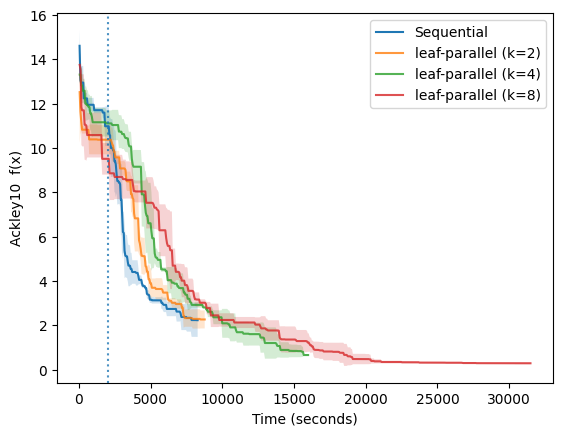

In [113]:
plt.plot(time_seq, mean_seq, label="Sequential")
plt.fill_between(time_seq, mean_seq - std_seq, mean_seq + std_seq, alpha=0.2)

plt.plot(time_seq_2samples, mean_seq_2samples, label="leaf-parallel (k=2)", alpha=0.8)
plt.fill_between(time_seq_2samples, mean_seq_2samples - std_seq_2samples, mean_seq_2samples + std_seq_2samples, alpha=0.2)

plt.plot(time_seq_4samples, mean_seq_4samples, label="leaf-parallel (k=4)", alpha=0.8)
plt.fill_between(time_seq_4samples, mean_seq_4samples - std_seq_4samples, mean_seq_4samples + std_seq_4samples, alpha=0.2)

plt.plot(time_seq_8samples, mean_seq_8samples, label="leaf-parallel (k=8)", alpha=0.8)
plt.fill_between(time_seq_8samples, mean_seq_8samples - std_seq_8samples, mean_seq_8samples + std_seq_8samples, alpha=0.2)

plt.axvline(time_seq[39], linestyle="dotted", alpha=0.8)
plt.legend()
plt.xlabel("Time (seconds)")
plt.ylabel("Ackley10  f(x)")

In [180]:
time_seq_2samples

array([7.37333333e-04, 8.01333333e-04, 8.34666667e-04, 8.68333333e-04,
       9.00000000e-04, 9.30333333e-04, 9.57666667e-04, 9.84333333e-04,
       1.01566667e-03, 1.04433333e-03, 1.07366667e-03, 1.10500000e-03,
       1.13600000e-03, 1.16700000e-03, 1.19700000e-03, 1.22666667e-03,
       1.25833333e-03, 1.29566667e-03, 1.32566667e-03, 1.35666667e-03,
       1.38733333e-03, 1.42333333e-03, 1.45800000e-03, 1.49466667e-03,
       1.52766667e-03, 1.55833333e-03, 1.58833333e-03, 1.61800000e-03,
       1.65100000e-03, 1.68033333e-03, 1.71000000e-03, 1.75833333e-03,
       1.79266667e-03, 1.82233333e-03, 1.84833333e-03, 1.87633333e-03,
       1.90433333e-03, 1.93200000e-03, 1.96066667e-03, 1.99133333e-03,
       7.11657467e+00, 7.11663767e+00, 8.12321800e+00, 8.12327167e+00,
       9.12049267e+00, 9.12055767e+00, 1.04262577e+01, 1.04263150e+01,
       1.11758157e+01, 1.11758880e+01, 1.22272500e+01, 1.22273117e+01,
       1.32961367e+01, 1.32961923e+01, 1.44104367e+01, 1.44105137e+01,
      

In [181]:
time_seq_4samples

array([5.39666667e-04, 5.90666667e-04, 6.27000000e-04, 6.61666667e-04,
       6.91000000e-04, 7.25666667e-04, 7.56666667e-04, 7.88333333e-04,
       8.17333333e-04, 8.47000000e-04, 8.79000000e-04, 9.16333333e-04,
       9.47333333e-04, 9.78333333e-04, 1.01000000e-03, 1.04266667e-03,
       1.07400000e-03, 1.10700000e-03, 1.13966667e-03, 1.18000000e-03,
       1.21100000e-03, 1.24266667e-03, 1.27366667e-03, 1.30600000e-03,
       1.34000000e-03, 1.37266667e-03, 1.40266667e-03, 1.43333333e-03,
       1.46533333e-03, 1.49700000e-03, 1.52633333e-03, 1.56566667e-03,
       1.59933333e-03, 1.63033333e-03, 1.66100000e-03, 1.69333333e-03,
       1.72500000e-03, 1.75466667e-03, 1.78600000e-03, 1.81833333e-03,
       7.02545300e+00, 7.02553233e+00, 7.02554633e+00, 7.02555667e+00,
       7.83247033e+00, 7.83252333e+00, 7.83253733e+00, 7.83254933e+00,
       8.80625767e+00, 8.80630700e+00, 8.80632000e+00, 8.80633000e+00,
       9.47458133e+00, 9.47465100e+00, 9.47466533e+00, 9.47467800e+00,
      

In [72]:
result_forget = np.array([
[14.856857983737576, 14.851979911169076, 13.574276730222127, 13.574276730222127, 13.574276730222127, 13.556375161022316, 13.556375161022316, 13.556375161022316, 13.556375161022316, 13.556375161022316, 13.556375161022316, 13.556375161022316, 13.556375161022316, 13.556375161022316, 13.301354648182413, 13.301354648182413, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.766006980601345, 11.518313894166486, 11.518313894166486, 11.518313894166486, 11.518313894166486, 11.518313894166486, 11.518313894166486, 11.518313894166486, 11.518313894166486, 11.518313894166486, 11.124444106588063, 11.124444106588063, 11.124444106588063, 10.933892679522312, 10.933892679522312, 10.933892679522312, 10.933892679522312, 10.933892679522312, 10.933892679522312, 10.933892679522312, 10.933892679522312, 10.933892679522312, 10.933892679522312, 10.933892679522312, 10.913382082070818, 10.913382082070818, 10.913382082070818, 10.913382082070818, 10.913382082070818, 10.913382082070818, 10.913382082070818, 10.913382082070818, 10.913382082070818, 10.11579473204057, 10.11579473204057, 10.11579473204057, 10.11579473204057, 10.11579473204057, 10.11579473204057, 10.11579473204057, 10.11579473204057, 10.11579473204057, 10.11579473204057, 10.11579473204057, 10.11579473204057, 9.980559793145513, 9.635031800506386, 9.635031800506386, 9.635031800506386, 9.635031800506386, 9.635031800506386, 9.635031800506386, 9.635031800506386, 9.635031800506386, 9.635031800506386, 9.635031800506386, 9.635031800506386, 9.635031800506386, 9.635031800506386, 9.635031800506386, 9.635031800506386, 9.635031800506386, 9.635031800506386, 9.635031800506386, 9.635031800506386, 9.635031800506386, 9.635031800506386, 9.635031800506386, 9.635031800506386, 9.635031800506386, 8.869714446205244, 8.869714446205244, 8.869714446205244, 8.869714446205244, 8.869714446205244, 8.869714446205244, 8.869714446205244, 8.869714446205244, 8.869714446205244, 8.869714446205244, 8.869714446205244, 8.869714446205244, 8.869714446205244, 8.869714446205244, 8.506400397539352, 8.506400397539352, 8.506400397539352, 8.506400397539352, 8.506400397539352, 8.506400397539352, 8.506400397539352, 8.165243464540701, 7.510324114764622, 7.510324114764622, 7.510324114764622, 7.510324114764622, 7.017942258377591, 7.017942258377591, 7.017942258377591, 7.017942258377591, 7.017942258377591, 7.017942258377591, 7.017942258377591, 7.017942258377591, 7.017942258377591, 7.017942258377591, 7.017942258377591, 7.017942258377591, 7.017942258377591, 7.017942258377591, 6.714735750234301, 6.714735750234301, 6.714735750234301, 6.714735750234301, 6.672615061263805, 6.672615061263805, 6.672615061263805, 6.672615061263805, 6.672615061263805, 6.672615061263805, 6.672615061263805, 6.672615061263805, 6.449785475558809, 6.449785475558809, 6.449785475558809, 6.449785475558809, 6.415125962098227, 6.415125962098227, 6.415125962098227, 6.415125962098227, 6.287790373999801, 6.287790373999801, 6.287790373999801, 6.287790373999801, 6.287790373999801, 6.287790373999801, 5.940834224232852, 5.940834224232852, 5.92179923674475, 5.92179923674475, 5.92179923674475, 5.92179923674475, 5.92179923674475, 5.92179923674475, 5.92179923674475, 5.92179923674475, 5.92179923674475, 5.92179923674475, 5.92179923674475, 5.92179923674475, 5.92179923674475, 5.92179923674475, 5.546466288637049, 5.546466288637049, 5.546466288637049, 5.247596897075013, 5.247596897075013, 5.247596897075013, 5.247596897075013, 5.247596897075013, 5.247596897075013, 5.247596897075013, 5.247596897075013, 5.247596897075013, 5.247596897075013, 5.247596897075013, 5.247596897075013, 5.247596897075013, 5.247596897075013, 5.247596897075013, 5.247596897075013, 5.247596897075013, 5.065714319774745, 5.065714319774745, 5.065714319774745, 5.065714319774745, 5.065714319774745, 5.065714319774745, 5.065714319774745, 4.4855859818339034, 4.4855859818339034, 4.4855859818339034, 4.4855859818339034, 4.4855859818339034, 4.4855859818339034, 4.4855859818339034, 4.4855859818339034, 4.4855859818339034, 4.4855859818339034, 4.4855859818339034, 4.4855859818339034, 4.4855859818339034, 4.4855859818339034, 4.4855859818339034, 4.4855859818339034, 4.4855859818339034, 4.4855859818339034, 4.008196661969745, 4.008196661969745, 4.008196661969745, 4.008196661969745, 4.008196661969745, 4.008196661969745, 4.008196661969745, 4.008196661969745, 3.8643072671162995, 3.8643072671162995, 3.8643072671162995, 3.8643072671162995, 3.8643072671162995, 3.8643072671162995, 3.8643072671162995, 3.8643072671162995, 3.8643072671162995, 3.8643072671162995, 3.8643072671162995, 3.8643072671162995, 3.8643072671162995, 3.8643072671162995, 3.536228961690654, 3.536228961690654, 3.536228961690654, 3.536228961690654, 3.536228961690654, 3.536228961690654, 3.536228961690654, 3.536228961690654, 3.536228961690654, 3.536228961690654, 3.536228961690654, 3.536228961690654, 3.536228961690654, 3.536228961690654, 3.536228961690654, 3.536228961690654, 3.536228961690654, 3.536228961690654, 3.536228961690654, 3.536228961690654, 3.536228961690654, 3.536228961690654, 3.536228961690654, 3.536228961690654, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.217011908393314, 3.1769778311972456, 3.1769778311972456, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.8727642985342503, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893, 2.7073241781343893],
[0.444, 0.49, 0.526, 0.56, 0.592, 0.624, 0.655, 0.685, 0.717, 0.748, 0.778, 0.807, 0.837, 0.868, 0.898, 0.929, 0.961, 0.993, 1.023, 1.055, 1.085, 1.115, 1.145, 1.176, 1.207, 1.237, 1.267, 1.302, 1.333, 1.363, 1.393, 1.423, 1.455, 1.487, 1.52, 1.552, 1.582, 1.613, 1.643, 1.673, 1330.216, 2290.233, 3545.816, 4446.623, 5051.553, 6153.928, 7520.051, 8455.286, 9981.494, 11928.974, 12567.689, 13618.748, 14658.209, 16920.938, 17174.061, 17846.98, 19802.691, 20437.534, 21452.193, 22511.922, 23578.415, 24691.872, 26261.302, 27337.391, 27778.543, 29582.275, 30545.89, 31746.65, 33384.532, 35093.272, 36531.957, 36972.864, 37482.45, 38176.691, 38792.761, 39593.884, 40591.611, 41929.498, 43207.58, 43757.132, 44757.803, 46475.34, 47830.597, 49580.383, 51831.494, 53637.371, 54422.158, 55453.429, 56338.376, 57207.876, 58693.9, 60096.309, 60404.348, 60945.249, 61331.315, 63088.014, 64431.726, 67023.101, 69471.479, 70960.59, 72957.906, 74622.732, 74853.709, 76311.37, 78048.514, 78685.349, 79592.359, 80207.674, 80672.388, 81473.95, 83837.071, 85396.582, 86018.863, 88401.925, 89767.154, 91542.887, 92012.326, 92877.651, 93271.535, 95369.191, 96413.267, 97186.72, 98845.244, 99717.317, 100190.846, 101460.204, 104383.395, 105812.352, 107148.68, 109404.17, 110913.319, 111983.439, 113278.009, 115552.185, 117313.12, 119300.888, 119725.814, 121744.249, 123111.585, 125042.987, 127431.959, 130194.556, 132084.459, 134991.567, 137906.818, 139139.877, 141007.262, 143261.143, 145358.214, 147132.508, 149453.885, 152162.242, 152962.502, 154217.654, 155240.072, 157914.156, 159977.752, 162279.315, 163600.616, 165118.422, 166506.708, 168036.021, 169699.343, 171130.503, 172991.892, 174785.537, 176853.216, 178847.103, 179850.623, 181354.938, 182453.171, 184136.641, 185035.355, 187627.164, 189406.518, 189952.011, 191635.635, 194432.062, 196145.165, 197840.863, 199303.888, 200627.551, 202608.194, 203418.241, 204658.685, 205838.901, 206979.268, 209012.925, 210442.253, 212683.24, 214167.348, 215176.557, 216213.902, 217312.921, 218308.313, 219809.67, 220807.415, 222055.225, 223395.8, 224678.614, 226251.488, 227548.307, 228375.37, 228509.054, 230035.96, 230302.336, 230485.117, 232973.41, 233640.953, 234381.968, 235752.352, 236848.501, 238616.718, 240136.118, 241686.326, 242330.661, 242594.722, 244712.521, 245461.492, 246450.739, 247810.585, 250223.003, 250656.249, 251480.031, 252773.113, 254186.082, 255708.258, 256679.825, 257981.278, 259749.755, 260888.667, 261833.147, 262862.633, 263881.192, 264993.065, 266085.452, 267531.614, 268833.246, 269573.872, 270154.183, 270280.921, 272046.023, 273168.872, 275389.299, 277909.135, 280556.143, 280893.971, 284131.846, 285253.669, 288401.543, 289411.648, 289577.068, 289738.851, 290745.114, 292144.894, 293002.306, 295350.009, 297675.757, 298547.797, 298825.876, 302240.803, 303307.524, 303472.003, 304861.91, 305052.497, 305240.02, 306422.297, 311480.067, 313009.245, 318800.4, 320389.308, 326653.725, 327370.106, 329615.85, 330602.715, 330888.979, 333236.581, 334233.763, 338229.703, 340268.87, 343571.119, 345038.027, 345237.886, 345739.878, 347068.084, 348664.822, 348873.755, 351364.58, 355583.135, 358983.668, 359971.623, 361669.064, 362196.585, 362962.844, 364899.506, 369001.336, 370758.441, 372485.306, 374590.486, 376734.233, 378373.758, 378837.53, 380704.324, 382955.239, 385147.834, 387448.09, 388614.52, 390397.101, 390631.367, 391213.821, 393700.87, 396857.058, 397712.771, 400879.349, 401674.9, 402730.59, 404336.739, 406240.366, 410173.08, 410718.792, 413118.958, 415294.77, 416522.108, 417511.273, 418987.818, 420830.109, 423668.058, 425803.772, 429476.969, 430161.493, 431116.57, 434016.989, 442143.94, 444609.523, 447872.255, 449812.271, 451758.334, 453403.816, 454625.792, 455772.805, 457665.385, 459878.818, 461336.396, 468308.147, 469865.171, 470119.929, 470705.542, 470987.182, 472844.65, 476160.275, 478761.469, 479826.612, 480442.1, 482940.613, 486629.566, 489197.323, 490949.98, 493551.583, 496230.653, 499402.489, 502142.648, 504104.301, 505960.951, 508140.315, 508453.208, 521983.907, 522360.113, 530414.925, 530739.137, 531364.902, 532626.033, 532929.83, 536295.991, 540932.811, 541244.766, 541574.432, 542131.012, 545079.003, 550398.065, 551900.48, 554591.45, 556727.67, 558426.867, 559728.087, 564830.104, 573001.359, 584462.643, 588713.129, 602270.422, 603680.196, 604022.371, 607593.169, 610901.248, 612589.367, 615389.606, 618992.921, 622885.148, 624806.59, 627884.599, 628203.227, 628581.369, 631915.042, 634710.262, 638351.055, 640916.244, 641258.246, 642933.17, 644661.868, 646516.564, 647978.672, 650176.079, 653398.118, 655207.208, 658723.873, 659111.896, 659486.924, 662622.384, 667286.427, 670085.455, 673706.766, 676676.006, 678321.486, 681792.89, 682504.773, 684813.034, 687919.512, 692082.86, 695109.829, 696288.435, 700037.868, 705629.991, 706265.968, 710849.021, 711289.385, 715078.989, 718056.755, 718978.328, 720778.051, 723313.71, 724931.046],
[14.899191472300782, 13.729423288853507, 13.729423288853507, 13.729423288853507, 13.632324194666463, 13.632324194666463, 13.632324194666463, 13.632324194666463, 12.923257110621448, 12.923257110621448, 12.923257110621448, 12.923257110621448, 12.923257110621448, 12.923257110621448, 12.923257110621448, 12.923257110621448, 12.923257110621448, 12.923257110621448, 12.923257110621448, 12.606707429205972, 12.606707429205972, 12.606707429205972, 12.606707429205972, 12.606707429205972, 12.606707429205972, 12.606707429205972, 12.606707429205972, 12.530653320344314, 12.530653320344314, 12.530653320344314, 12.530653320344314, 12.530653320344314, 12.530653320344314, 12.530653320344314, 12.530653320344314, 11.949625082946318, 11.949625082946318, 11.949625082946318, 11.949625082946318, 11.949625082946318, 11.949625082946318, 11.890379828143566, 11.890379828143566, 11.890379828143566, 11.890379828143566, 11.890379828143566, 11.890379828143566, 11.890379828143566, 11.890379828143566, 11.890379828143566, 11.890379828143566, 11.890379828143566, 11.890379828143566, 11.890379828143566, 11.890379828143566, 11.890379828143566, 11.890379828143566, 11.890379828143566, 11.890379828143566, 11.890379828143566, 11.890379828143566, 11.890379828143566, 11.579662988038574, 11.579662988038574, 11.579662988038574, 11.579662988038574, 11.579662988038574, 11.579662988038574, 11.579662988038574, 11.579662988038574, 11.336053448006094, 11.336053448006094, 11.089681751639061, 11.089681751639061, 11.089681751639061, 11.089681751639061, 10.99237541412173, 10.99237541412173, 10.99237541412173, 10.99237541412173, 10.99237541412173, 10.99237541412173, 10.99237541412173, 10.893444731066742, 10.893444731066742, 10.893444731066742, 10.893444731066742, 10.893444731066742, 10.893444731066742, 10.893444731066742, 10.893444731066742, 10.893444731066742, 10.893444731066742, 10.893444731066742, 10.893444731066742, 10.893444731066742, 10.893444731066742, 10.893444731066742, 10.893444731066742, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 9.747100589331193, 8.645352263774596, 8.645352263774596, 8.645352263774596, 8.645352263774596, 8.645352263774596, 8.645352263774596, 8.645352263774596, 8.645352263774596, 8.645352263774596, 8.645352263774596, 8.645352263774596, 8.645352263774596, 8.645352263774596, 8.645352263774596, 8.645352263774596, 8.645352263774596, 8.645352263774596, 8.645352263774596, 8.645352263774596, 8.645352263774596, 8.645352263774596, 8.645352263774596, 8.645352263774596, 8.645352263774596, 8.645352263774596, 8.645352263774596, 7.86228379431209, 7.86228379431209, 7.86228379431209, 7.86228379431209, 7.86228379431209, 7.86228379431209, 7.86228379431209, 7.86228379431209, 7.86228379431209, 7.86228379431209, 7.86228379431209, 7.86228379431209, 7.86228379431209, 7.86228379431209, 7.86228379431209, 7.86228379431209, 7.86228379431209, 7.86228379431209, 7.86228379431209, 7.86228379431209, 7.86228379431209, 7.542380078463946, 7.542380078463946, 7.542380078463946, 7.542380078463946, 7.542380078463946, 7.542380078463946, 7.542380078463946, 7.420265988977569, 6.949436043793602, 6.949436043793602, 6.949436043793602, 6.949436043793602, 6.465304065629912, 6.465304065629912, 6.465304065629912, 6.465304065629912, 6.465304065629912, 6.465304065629912, 6.465304065629912, 6.465304065629912, 6.465304065629912, 6.465304065629912, 6.465304065629912, 6.465304065629912, 6.303920865366049, 6.303920865366049, 6.303920865366049, 6.228887778890325, 6.228887778890325, 6.228887778890325, 6.228887778890325, 6.228887778890325, 6.228887778890325, 6.228887778890325, 6.228887778890325, 6.228887778890325, 6.228887778890325, 6.228887778890325, 5.175418184675113, 5.175418184675113, 5.175418184675113, 5.175418184675113, 5.175418184675113, 5.175418184675113, 5.175418184675113, 5.175418184675113, 5.175418184675113, 5.175418184675113, 5.175418184675113, 5.175418184675113, 5.175418184675113, 4.9249777585601855, 4.9249777585601855, 4.9249777585601855, 4.9249777585601855, 4.9249777585601855, 4.9249777585601855, 4.687733953674648, 4.687733953674648, 4.687733953674648, 4.687733953674648, 4.687733953674648, 4.687733953674648, 4.687733953674648, 4.687733953674648, 4.687733953674648, 4.687733953674648, 4.440179182521824, 4.440179182521824, 4.440179182521824, 4.440179182521824, 4.440179182521824, 4.440179182521824, 4.440179182521824, 4.440179182521824, 4.440179182521824, 4.440179182521824, 4.440179182521824, 4.440179182521824, 4.440179182521824, 4.440179182521824, 4.440179182521824, 4.440179182521824, 4.440179182521824, 4.440179182521824, 4.440179182521824, 4.440179182521824, 4.028333109427315, 4.028333109427315, 3.773375121373349, 3.773375121373349, 3.773375121373349, 3.773375121373349, 3.773375121373349, 3.773375121373349, 3.773375121373349, 3.773375121373349, 3.773375121373349, 3.773375121373349, 3.773375121373349, 3.773375121373349, 3.773375121373349, 3.773375121373349, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 3.2541767784292728, 2.9852221290734744, 2.9852221290734744, 2.9852221290734744, 2.9852221290734744, 2.9852221290734744, 2.9852221290734744, 2.9852221290734744, 2.9852221290734744, 2.9852221290734744, 2.9852221290734744, 2.9852221290734744, 2.9852221290734744, 2.9852221290734744, 2.9852221290734744, 2.9852221290734744, 2.9852221290734744, 2.9852221290734744, 2.9852221290734744, 2.9852221290734744, 2.9852221290734744, 2.9852221290734744, 2.9852221290734744, 2.9852221290734744, 2.9852221290734744, 2.9852221290734744, 2.9852221290734744, 2.9852221290734744, 2.9852221290734744, 2.7303779814310905, 2.7303779814310905, 2.7303779814310905, 2.7303779814310905, 2.7303779814310905, 2.7303779814310905, 2.7303779814310905, 2.7303779814310905, 2.7303779814310905, 2.7303779814310905, 2.7303779814310905, 2.7303779814310905, 2.7303779814310905, 2.7303779814310905, 2.7303779814310905, 2.7303779814310905, 2.7303779814310905, 2.7303779814310905, 2.7303779814310905, 2.7303779814310905, 2.7303779814310905, 2.7303779814310905, 2.7303779814310905, 2.7303779814310905, 2.7303779814310905, 2.7303779814310905, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358, 2.6644725259941358],
[0.388, 0.452, 0.515, 0.575, 0.633, 0.691, 0.746, 0.803, 0.86, 0.916, 0.972, 1.038, 1.091, 1.148, 1.203, 1.26, 1.316, 1.373, 1.427, 1.483, 1.537, 1.594, 1.65, 1.706, 1.761, 1.816, 1.872, 1.927, 1.984, 2.038, 2.094, 2.148, 2.205, 2.26, 2.316, 2.372, 2.428, 2.482, 2.538, 2.593, 841.697, 2177.664, 2778.646, 3852.279, 4721.731, 5695.865, 6438.455, 7052.171, 7771.92, 8533.23, 9530.343, 11052.033, 11662.243, 12935.631, 13729.552, 14320.856, 15365.814, 16414.106, 18147.333, 19888.689, 21803.558, 22295.782, 25052.032, 25627.569, 27719.435, 29385.035, 30109.807, 30307.465, 30767.949, 31459.535, 32403.687, 33012.644, 33782.987, 34727.995, 35597.477, 36897.153, 38019.623, 38326.535, 39806.741, 40459.612, 41279.432, 41602.048, 43469.719, 44345.002, 44625.657, 45184.15, 45560.854, 46940.106, 47982.888, 49310.901, 49621.913, 50437.263, 51840.252, 52505.334, 53339.343, 53777.244, 54818.904, 55659.651, 56737.498, 58028.269, 59219.466, 60666.041, 62327.272, 64287.814, 64709.14, 64969.288, 65592.546, 66413.045, 67153.785, 67440.826, 68556.502, 69035.079, 69767.327, 70792.205, 71974.355, 73444.979, 75091.228, 75708.056, 76831.23, 77614.15, 78292.887, 79596.711, 81405.836, 82834.614, 84334.062, 86520.348, 87767.275, 89379.697, 91031.315, 93066.66, 95343.331, 97827.458, 98834.762, 101578.267, 103772.975, 106511.599, 108853.204, 110024.464, 111600.678, 112992.904, 114437.489, 116959.892, 118666.109, 119527.146, 119895.413, 121307.516, 123037.052, 124400.807, 125804.546, 127515.022, 128428.631, 129811.467, 132127.036, 134633.632, 138294.358, 141574.196, 145317.025, 146295.359, 147422.699, 149306.594, 149773.91, 152251.198, 152670.877, 153443.77, 153892.844, 155062.872, 155703.065, 156156.086, 158604.981, 160193.15, 163417.491, 166410.097, 167397.312, 168656.608, 169899.677, 171393.992, 173127.581, 174743.788, 176550.73, 178563.336, 180828.588, 181693.126, 183124.051, 184237.773, 186381.723, 187742.752, 189106.066, 190675.798, 192779.061, 194944.135, 197022.039, 198945.278, 200655.316, 202616.369, 204696.118, 206926.12, 208282.585, 208845.554, 210287.72, 212339.048, 214730.875, 216825.177, 219841.922, 220478.684, 220918.789, 223094.924, 224993.839, 227684.882, 228575.545, 230502.842, 231733.621, 232150.978, 232553.718, 233848.949, 235443.797, 237350.568, 240118.739, 241117.242, 243771.087, 245139.274, 248308.703, 251253.352, 253695.05, 255252.206, 256663.758, 259952.104, 261776.662, 263163.834, 265965.962, 266419.686, 270056.467, 271533.269, 272388.216, 274351.335, 276188.684, 277183.095, 278947.696, 279353.236, 280332.745, 281752.421, 282420.576, 283170.748, 285473.688, 288030.788, 288922.498, 290368.651, 291558.661, 293482.652, 294965.652, 298003.497, 299606.475, 300742.984, 301916.857, 305328.843, 307809.575, 311017.651, 313481.735, 314230.346, 316797.419, 319089.049, 319884.97, 320544.773, 323218.857, 323412.97, 326146.873, 326327.464, 327483.138, 329464.06, 329843.762, 333331.053, 335280.988, 337181.053, 339969.625, 341678.023, 341883.547, 345688.467, 345880.414, 348712.854, 352472.984, 355063.671, 357750.042, 359789.862, 362595.19, 370483.312, 371849.555, 373471.634, 374372.74, 375004.732, 376685.041, 378496.899, 381965.587, 385050.479, 385271.229, 386327.313, 386555.43, 387636.095, 390480.747, 392733.899, 394296.324, 396398.735, 398354.434, 405091.231, 406413.7, 408535.734, 410945.605, 415527.115, 415786.867, 417769.962, 420614.355, 421737.385, 422039.093, 422979.56, 424464.296, 430873.858, 433837.089, 435348.979, 436064.834, 436348.264, 436628.616, 441088.642, 444703.596, 447149.444, 450919.451, 451193.847, 453042.9, 454028.004, 456786.753, 460444.036, 460709.683, 463443.522, 465894.471, 469389.291, 469704.362, 471730.743, 475772.996, 476123.111, 476445.407, 479865.729, 484400.173, 487018.019, 507336.7, 527252.202, 528343.9, 533562.573, 533902.702, 535801.567, 541408.832, 545858.387, 546225.026, 548253.559, 566430.188, 570705.247, 581313.613, 585694.386, 586011.744, 605138.143, 606811.797, 643357.225, 648689.245, 652766.174, 653180.274, 660036.903, 662625.446, 663043.568, 664169.274, 668512.932, 672221.125, 672926.742, 675215.288, 700043.663, 703099.558, 709795.586, 712221.747, 713051.036, 715372.265, 727974.537, 729593.183, 731041.458, 733266.02, 734088.132, 736042.024, 737752.445, 740573.203, 742215.798, 744145.466, 745724.488, 748344.727, 750969.552, 751504.837, 754965.679, 755731.487, 757985.645, 761146.756, 764193.174, 767185.424, 772220.201, 773664.353, 779474.037, 781915.039, 787068.004, 790446.301, 792455.821, 793894.911, 796135.182, 797183.528, 803334.21, 804317.791, 805458.642, 808240.25, 813313.304, 816802.064, 817220.815, 820225.826, 821575.255, 822723.283, 823142.63, 823548.96, 826144.385, 826532.107, 829757.148, 832696.081, 833154.721, 834625.217, 838365.846, 840777.137, 849141.509, 849556.179, 853020.56, 857811.491, 858679.739, 862386.451, 867827.723, 870365.849, 871555.125, 875184.675, 875615.689, 878398.646, 880187.334, 881899.582, 894029.768],
[13.219779573937583, 13.219779573937583, 13.219779573937583, 13.219779573937583, 13.219779573937583, 13.219779573937583, 13.219779573937583, 13.219779573937583, 13.219779573937583, 13.219779573937583, 13.219779573937583, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 12.206986065412627, 11.860592453929291, 11.860592453929291, 11.474298147926858, 11.474298147926858, 11.474298147926858, 11.474298147926858, 11.474298147926858, 11.474298147926858, 11.474298147926858, 11.474298147926858, 11.474298147926858, 11.474298147926858, 11.474298147926858, 11.474298147926858, 11.474298147926858, 11.474298147926858, 11.474298147926858, 11.474298147926858, 11.474298147926858, 11.447398516832264, 11.447398516832264, 11.447398516832264, 11.037406856309383, 11.037406856309383, 11.037406856309383, 11.037406856309383, 11.037406856309383, 11.037406856309383, 11.037406856309383, 11.037406856309383, 11.037406856309383, 11.037406856309383, 11.037406856309383, 11.037406856309383, 10.593555855438476, 10.593555855438476, 10.593555855438476, 10.593555855438476, 10.593555855438476, 10.593555855438476, 10.593555855438476, 10.593555855438476, 10.593555855438476, 10.395100053258801, 10.395100053258801, 10.395100053258801, 10.395100053258801, 10.395100053258801, 10.395100053258801, 10.113812677731236, 10.103732189250806, 10.103732189250806, 9.490347437147987, 9.490347437147987, 9.354777319465468, 9.354777319465468, 9.354777319465468, 9.354777319465468, 9.354777319465468, 9.354777319465468, 9.354777319465468, 9.354777319465468, 9.354777319465468, 8.606120078229988, 8.606120078229988, 8.606120078229988, 8.606120078229988, 8.606120078229988, 8.606120078229988, 8.606120078229988, 8.606120078229988, 8.606120078229988, 8.606120078229988, 8.606120078229988, 8.606120078229988, 8.606120078229988, 8.606120078229988, 8.606120078229988, 8.606120078229988, 7.367295463425016, 6.959862654146685, 6.959862654146685, 6.959862654146685, 6.959862654146685, 6.959862654146685, 6.959862654146685, 6.959862654146685, 6.959862654146685, 6.959862654146685, 6.959862654146685, 6.959862654146685, 6.959862654146685, 6.959862654146685, 6.959862654146685, 6.959862654146685, 6.959862654146685, 6.959862654146685, 6.5014482903577, 6.275455858760523, 6.275455858760523, 6.275455858760523, 6.275455858760523, 6.275455858760523, 6.275455858760523, 6.275455858760523, 6.275455858760523, 6.275455858760523, 6.275455858760523, 6.275455858760523, 6.081958901568349, 5.552933652328537, 5.552933652328537, 5.552933652328537, 5.552933652328537, 5.552933652328537, 5.552933652328537, 5.552933652328537, 5.552933652328537, 5.552933652328537, 5.552933652328537, 5.552933652328537, 5.552933652328537, 5.552933652328537, 5.552933652328537, 5.552933652328537, 5.552933652328537, 5.552933652328537, 5.552933652328537, 5.552933652328537, 5.509520329654546, 5.340316912084361, 5.340316912084361, 5.340316912084361, 5.340316912084361, 5.340316912084361, 5.340316912084361, 5.340316912084361, 5.340316912084361, 5.340316912084361, 5.071972047938843, 5.071972047938843, 5.071972047938843, 5.071972047938843, 5.071972047938843, 5.071972047938843, 5.071972047938843, 5.071972047938843, 5.071972047938843, 5.071972047938843, 5.001465945755566, 5.001465945755566, 5.001465945755566, 5.001465945755566, 5.001465945755566, 5.001465945755566, 5.001465945755566, 5.001465945755566, 5.001465945755566, 5.001465945755566, 5.001465945755566, 5.001465945755566, 4.950864573954206, 4.950864573954206, 4.562295486840469, 4.562295486840469, 4.562295486840469, 4.562295486840469, 4.562295486840469, 4.562295486840469, 4.562295486840469, 4.562295486840469, 4.562295486840469, 4.562295486840469, 4.0767207051871885, 4.0767207051871885, 4.0767207051871885, 4.0767207051871885, 4.0767207051871885, 4.0767207051871885, 4.0767207051871885, 4.0767207051871885, 4.0767207051871885, 4.0767207051871885, 4.035396627280214, 3.8613093731395733, 3.8613093731395733, 3.8613093731395733, 3.6102776894578033, 3.6102776894578033, 3.6102776894578033, 3.6102776894578033, 3.6102776894578033, 3.6102776894578033, 3.6102776894578033, 3.6102776894578033, 3.6102776894578033, 3.6102776894578033, 3.4987183833212225, 3.4987183833212225, 3.4987183833212225, 3.4987183833212225, 3.4987183833212225, 3.4987183833212225, 3.4987183833212225, 3.4987183833212225, 3.4987183833212225, 3.4987183833212225, 3.4987183833212225, 3.4987183833212225, 3.4987183833212225, 3.4987183833212225, 3.4987183833212225, 3.467515429354077, 3.467515429354077, 3.467515429354077, 3.467515429354077, 3.467515429354077, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 3.0447702231320233, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8726115266534014, 2.8686533945885633, 2.8686533945885633, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417, 2.7226593893122417],
[0.343, 0.387, 0.423, 0.456, 0.488, 0.521, 0.552, 0.585, 0.616, 0.647, 0.679, 0.71, 0.742, 0.773, 0.804, 0.836, 0.868, 0.899, 0.93, 0.961, 0.992, 1.023, 1.053, 1.085, 1.115, 1.146, 1.177, 1.208, 1.24, 1.271, 1.321, 1.359, 1.397, 1.443, 1.471, 1.5, 1.529, 1.558, 1.587, 1.616, 520.8, 1043.456, 1969.499, 2566.672, 3765.542, 4527.75, 5652.697, 6614.978, 7251.993, 8645.337, 10006.906, 11305.919, 12459.219, 12874.905, 13788.927, 14186.401, 14971.555, 15887.802, 17004.259, 18444.913, 19207.76, 20044.539, 21181.668, 22889.446, 24018.037, 25357.695, 26034.587, 26973.396, 27641.368, 29047.215, 30565.641, 31795.067, 33419.222, 34282.076, 34568.676, 36109.387, 37141.036, 37605.078, 39745.213, 40038.173, 40621.287, 41352.806, 42408.448, 44727.933, 46096.889, 47750.316, 49321.452, 50053.508, 51400.013, 52299.097, 53596.084, 55184.344, 55903.303, 57314.579, 59369.195, 61369.902, 63260.872, 64446.187, 66230.965, 67663.108, 68366.791, 69769.438, 71386.147, 72898.772, 73980.689, 74981.803, 75799.227, 77003.185, 78387.419, 79256.546, 80873.754, 82069.846, 83320.523, 84166.667, 84657.446, 85299.236, 87013.489, 88345.299, 89635.225, 91112.008, 92703.618, 92936.278, 94894.645, 95739.144, 97912.088, 99526.937, 100926.828, 103147.208, 104585.893, 106372.35, 107825.645, 108596.37, 108874.625, 109851.428, 111672.355, 113128.343, 114166.853, 115824.626, 116361.454, 118127.099, 119846.402, 121313.063, 123893.026, 125073.532, 127327.662, 128791.927, 130144.47, 131589.009, 132738.586, 134994.069, 135944.512, 138152.084, 139218.818, 140429.822, 141686.961, 143346.771, 144883.156, 145833.651, 147016.09, 150522.43, 152690.015, 153901.881, 154114.283, 154611.229, 156314.443, 158500.197, 159710.879, 159863.486, 161823.241, 162886.615, 164929.591, 165756.582, 167974.784, 169178.981, 170104.083, 171649.718, 172287.852, 174942.935, 176731.295, 178322.125, 179196.307, 180237.669, 181667.374, 183990.341, 184808.915, 186479.449, 187125.348, 188082.721, 188631.957, 189691.885, 190239.274, 191093.29, 191766.208, 193080.824, 195274.996, 195762.104, 197644.435, 198669.31, 199379.536, 200461.556, 202700.435, 203623.804, 204137.965, 204962.183, 205935.306, 206899.906, 207839.863, 208502.24, 208971.362, 209191.869, 209657.131, 212002.286, 212430.543, 213778.118, 215671.475, 217113.99, 217277.411, 217552.679, 217952.105, 219110.84, 219925.741, 220431.339, 220808.368, 223543.434, 223912.383, 224607.394, 225161.703, 225289.78, 227001.508, 228975.649, 229982.242, 230909.15, 232760.607, 234305.337, 236765.432, 238342.278, 239506.31, 240661.375, 241633.595, 243183.103, 244093.203, 244835.564, 246020.777, 247974.237, 248959.72, 250270.133, 251638.558, 253663.063, 254515.642, 255798.188, 257349.457, 258050.031, 258496.616, 259137.654, 261063.954, 261214.417, 261913.842, 264041.37, 264916.451, 266033.375, 268896.731, 269914.426, 271782.603, 272579.227, 273804.023, 275101.552, 275249.225, 277910.609, 279019.793, 279188.3, 280771.578, 281919.107, 283395.818, 284739.763, 290826.129, 293435.792, 295944.962, 297406.594, 301015.018, 302148.954, 303434.533, 304249.558, 305613.105, 306851.561, 307244.698, 310037.137, 312908.244, 313062.902, 316169.255, 316355.925, 324847.281, 326185.087, 326377.129, 327372.455, 352964.198, 353184.389, 356134.929, 359180.328, 360897.369, 361499.623, 364008.514, 364794.056, 364975.931, 365563.669, 367637.561, 368429.53, 370803.43, 373765.079, 377410.22, 380476.825, 380725.642, 382809.293, 386490.76, 386730.149, 387513.551, 389436.015, 390475.45, 402307.083, 412678.786, 413278.717, 413492.093, 416439.169, 416905.231, 418929.599, 422239.76, 423320.969, 425511.079, 428123.041, 432055.93, 435147.489, 440058.975, 455226.01, 456758.153, 457397.843, 459844.079, 461091.716, 463704.008, 466013.208, 467295.53, 470156.046, 472725.471, 472987.27, 475331.648, 476699.041, 477797.735, 479341.786, 481419.834, 482930.453, 485251.566, 485512.648, 487567.483, 489210.177, 492643.533, 494346.241, 499248.82, 502564.829, 504391.948, 504977.296, 511534.477, 513461.606, 514688.996, 515834.465, 517508.332, 518857.624, 521977.189, 525163.265, 526972.784, 530283.733, 533977.824, 535614.066, 538228.156, 540644.115, 542360.794, 547444.672, 551126.915, 552138.816, 555152.931, 559047.496, 561584.368, 564108.402, 567168.727, 569477.565, 575387.445, 576642.564, 580917.351, 582395.22, 583368.074, 583730.165, 584073.541, 599533.564, 600607.35, 604268.781, 607820.942, 608511.227, 612050.747, 616448.972, 619470.914, 623012.513, 628111.274, 629590.285, 632310.695, 633064.799, 637278.673, 641905.629, 644802.748, 646448.929, 646701.56, 649156.264, 652763.353, 653777.457, 661032.806, 666184.721, 670766.268, 673116.56, 681372.058, 682094.546, 686309.106, 688734.663, 691844.885, 695222.154, 699915.692, 701297.788, 704348.204, 706234.458, 710288.01, 710655.06, 714216.673, 715698.046, 719940.45, 720341.541, 721103.821, 722634.76, 726515.059, 726964.641, 731282.955, 731662.942, 732061.756, 751647.152, 756351.804, 758350.865]
])

In [73]:
result = np.array([
[13.55675015896335, 13.131431706491934, 13.131431706491934, 13.131431706491934, 13.131431706491934, 13.131431706491934, 13.131431706491934, 13.131431706491934, 12.527404381588923, 12.527404381588923, 12.527404381588923, 12.527404381588923, 12.527404381588923, 12.527404381588923, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.054354877827402, 12.012464508319306, 11.738316899257683, 10.878933234259241, 10.878933234259241, 10.878933234259241, 10.878933234259241, 10.878933234259241, 10.878933234259241, 10.878933234259241, 10.878933234259241, 10.878933234259241, 10.878933234259241, 10.878933234259241, 10.878933234259241, 10.504766375983719, 10.504766375983719, 10.504766375983719, 10.347170763276548, 10.347170763276548, 10.347170763276548, 10.347170763276548, 10.347170763276548, 10.347170763276548, 10.249007364701022, 9.679066388204223, 9.664903088971872, 9.664903088971872, 9.664903088971872, 9.000539053709163, 9.000539053709163, 9.000539053709163, 9.000539053709163, 9.000539053709163, 9.000539053709163, 9.000539053709163, 9.000539053709163, 9.000539053709163, 8.174585246392787, 8.174585246392787, 8.174585246392787, 8.174585246392787, 8.174585246392787, 8.174585246392787, 7.412451509040837, 7.406942119295326, 7.406942119295326, 7.406942119295326, 7.406942119295326, 7.406942119295326, 7.406942119295326, 7.406942119295326, 7.406942119295326, 7.406942119295326, 7.406942119295326, 7.406942119295326, 7.372444492738818, 7.372444492738818, 6.177677755383627, 6.177677755383627, 6.177677755383627, 6.177677755383627, 6.177677755383627, 6.177677755383627, 6.177677755383627, 6.177677755383627, 6.177677755383627, 6.177677755383627, 6.177677755383627, 5.977135854327898, 5.977135854327898, 5.977135854327898, 5.977135854327898, 5.977135854327898, 5.977135854327898, 5.977135854327898, 5.424011619413054, 5.424011619413054, 5.05793783597986, 5.05793783597986, 5.05793783597986, 5.05793783597986, 5.05793783597986, 5.05793783597986, 5.05793783597986, 5.05793783597986, 5.05793783597986, 5.05793783597986, 5.05793783597986, 5.05793783597986, 5.007319124812451, 5.007319124812451, 5.007319124812451, 5.007319124812451, 5.007319124812451, 5.007319124812451, 5.007319124812451, 4.945897189382919, 4.9159970591248765, 4.9159970591248765, 4.9159970591248765, 4.9159970591248765, 4.9159970591248765, 4.9159970591248765, 4.9159970591248765, 4.9159970591248765, 4.9159970591248765, 4.9159970591248765, 4.9159970591248765, 4.9159970591248765, 4.477145438888453, 4.477145438888453, 4.477145438888453, 4.477145438888453, 4.335720181735887, 4.335720181735887, 4.335720181735887, 4.335720181735887, 4.335720181735887, 4.335720181735887, 4.335720181735887, 4.335720181735887, 4.335720181735887, 4.335720181735887, 4.335720181735887, 4.335720181735887, 4.335720181735887, 4.335720181735887, 4.335720181735887, 4.335720181735887, 4.335720181735887, 4.335720181735887, 4.335720181735887, 4.335720181735887, 4.335720181735887, 4.335720181735887, 4.335720181735887, 4.335720181735887, 4.335720181735887, 4.335720181735887, 4.335720181735887, 4.335720181735887, 4.007309683696942, 4.007309683696942, 4.007309683696942, 4.007309683696942, 4.007309683696942, 4.007309683696942, 4.007309683696942, 4.007309683696942, 4.007309683696942, 4.007309683696942, 4.007309683696942, 3.9206126518821134, 3.9206126518821134, 3.9206126518821134, 3.9206126518821134, 3.9206126518821134, 3.9206126518821134, 3.9206126518821134, 3.9206126518821134, 3.9206126518821134, 3.9206126518821134, 3.9206126518821134, 3.9206126518821134, 3.9206126518821134, 3.9206126518821134, 3.9206126518821134, 3.9206126518821134, 3.9206126518821134, 3.9206126518821134, 3.9206126518821134, 3.9206126518821134, 3.9206126518821134, 3.9206126518821134, 3.9206126518821134, 3.9206126518821134, 3.9206126518821134, 3.7464287704448265, 3.7464287704448265, 3.7464287704448265, 3.7464287704448265, 3.7464287704448265, 3.7464287704448265, 3.518741455015562, 3.518741455015562, 3.518741455015562, 3.518741455015562, 3.518741455015562, 3.4564019086894224, 3.4564019086894224, 2.9065787162599652, 2.9065787162599652, 2.9065787162599652, 2.9065787162599652, 2.9065787162599652, 2.9065787162599652, 2.9065787162599652, 2.9065787162599652, 2.9065787162599652, 2.9065787162599652, 2.9065787162599652, 2.9065787162599652, 2.9065787162599652, 2.9065787162599652, 2.9065787162599652, 2.9065787162599652, 2.9065787162599652, 2.9065787162599652, 2.9065787162599652, 2.9065787162599652, 2.9065787162599652, 2.9065787162599652, 2.9065787162599652, 2.9065787162599652, 2.9065787162599652, 2.9065787162599652, 2.9065787162599652, 2.9065787162599652, 2.9065787162599652, 2.9065787162599652, 2.9065787162599652, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.825668371629917, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.6324919595279934, 2.562949908304742, 2.562949908304742, 2.562949908304742, 2.562949908304742, 2.562949908304742, 2.562949908304742, 2.562949908304742, 2.562949908304742, 2.562949908304742, 2.562949908304742, 2.417462501346734, 2.417462501346734, 2.412259013073101, 2.412259013073101, 2.0506255082415277, 2.0506255082415277, 2.0506255082415277, 2.0506255082415277, 2.0506255082415277, 2.0506255082415277, 2.0506255082415277, 2.0506255082415277, 2.0506255082415277, 2.0506255082415277, 2.0506255082415277, 2.0506255082415277, 2.0506255082415277, 2.0506255082415277, 2.0096924474839644, 2.0096924474839644, 2.0096924474839644, 2.0096924474839644, 2.0096924474839644, 2.0096924474839644, 2.0096924474839644, 2.0096924474839644, 2.0096924474839644, 2.0096924474839644, 2.0096924474839644, 2.0096924474839644, 2.0096924474839644, 2.0096924474839644, 2.0096924474839644, 2.0096924474839644, 2.0096924474839644, 2.0096924474839644, 2.0096924474839644, 2.0096924474839644, 2.0096924474839644, 2.0096924474839644, 2.0096924474839644, 2.0096924474839644, 2.0096924474839644, 2.0096924474839644, 2.0096924474839644, 1.9683719698751365, 1.946311842443301, 1.946311842443301, 1.946311842443301, 1.946311842443301, 1.946311842443301, 1.911614138720847, 1.911614138720847, 1.911614138720847, 1.911614138720847],
[0.335, 0.372, 0.399, 0.424, 0.448, 0.473, 0.498, 0.521, 0.547, 0.572, 0.596, 0.62, 0.643, 0.666, 0.689, 0.713, 0.737, 0.761, 0.784, 0.807, 0.831, 0.854, 0.878, 0.902, 0.927, 0.951, 0.974, 0.998, 1.022, 1.045, 1.075, 1.098, 1.123, 1.147, 1.171, 1.195, 1.218, 1.242, 1.266, 1.289, 942.446, 1951.09, 2296.165, 3023.807, 3722.106, 4557.336, 4835.407, 5742.812, 6444.112, 7512.546, 8777.372, 9490.704, 10046.659, 10615.408, 12493.184, 13365.863, 14287.106, 16257.444, 18035.836, 18526.697, 19188.493, 20415.749, 22028.538, 23516.476, 25457.268, 27231.738, 27725.749, 28052.505, 29661.857, 31292.288, 32567.918, 34814.224, 36929.703, 39076.424, 40914.208, 41279.293, 42290.172, 45007.58, 46039.878, 48007.193, 49163.151, 50842.516, 52591.934, 54821.35, 57279.95, 58963.79, 60992.077, 61566.399, 63159.971, 63854.158, 66118.338, 69192.382, 72283.538, 75025.055, 78148.286, 80544.651, 83643.174, 85494.584, 88231.599, 90759.559, 94255.125, 94683.741, 97619.058, 101767.204, 105916.562, 109522.967, 110721.038, 114137.094, 117143.128, 120426.928, 125035.101, 125955.671, 127648.444, 129100.533, 132148.205, 132775.64, 137111.253, 140349.982, 141630.333, 143129.344, 144872.657, 147384.313, 150421.841, 156352.32, 160334.565, 162358.587, 162849.812, 164481.187, 170598.044, 172824.532, 175971.817, 179183.19, 184316.28, 188253.695, 191478.978, 194087.408, 196313.956, 204273.533, 206617.661, 209751.38, 212528.524, 215675.823, 216757.847, 218553.973, 222866.928, 227974.54, 231274.61, 233711.966, 235858.495, 238862.742, 244886.583, 246952.227, 251435.597, 258274.096, 263429.873, 266185.414, 268219.519, 272769.289, 275223.073, 278679.473, 282159.361, 287302.244, 294845.283, 303287.188, 310263.474, 310559.863, 317008.461, 322234.61, 326891.439, 331326.274, 334746.945, 338415.306, 342772.126, 347012.654, 353202.367, 358631.694, 364335.218, 367426.96, 374315.079, 376481.688, 384710.653, 388259.515, 394321.726, 399370.681, 406983.768, 413117.536, 417619.543, 421397.823, 425626.781, 429943.245, 435567.206, 436914.006, 445953.993, 452047.102, 455183.431, 462625.711, 466595.646, 467490.282, 473596.847, 480421.993, 494898.568, 497213.77, 503857.966, 505354.735, 507402.155, 511189.006, 511560.836, 514876.455, 517548.117, 520361.496, 529467.718, 532344.273, 536856.066, 542012.687, 550877.655, 553087.164, 559059.883, 564545.628, 569831.958, 574555.713, 581197.457, 588039.745, 593607.555, 596474.798, 602656.582, 609693.393, 616797.164, 623718.763, 628623.588, 631929.87, 633558.906, 639362.742, 644449.895, 663742.617, 669729.209, 674273.059, 678955.823, 684442.654, 690293.612, 693462.525, 700040.058, 704732.985, 707876.77, 716098.544, 722826.022, 727675.389, 731249.085, 733285.123, 737678.257, 743127.95, 745857.203, 746842.165, 751805.234, 755833.648, 761158.164, 761576.014, 774235.365, 786734.479, 792912.999, 797617.494, 802319.768, 802747.394, 807540.161, 807910.699, 809768.574, 815211.25, 821121.453, 823378.004, 823793.694, 831085.718, 853398.372, 853820.804, 858103.611, 868604.629, 874348.113, 883355.44, 883779.482, 884231.627, 887933.799, 888373.872, 891516.528, 905707.731, 906155.417, 911649.746, 917529.879, 919112.005, 921906.37, 928464.959, 936934.547, 937392.672, 940226.964, 945809.381, 957678.477, 964074.606, 966352.833, 973987.391, 977698.522, 980978.618, 981449.555, 984778.848, 991545.835, 993519.93, 996577.309, 1001353.156, 1006674.62, 1049451.2, 1054163.371, 1054674.453, 1057884.461, 1064107.835, 1064597.412, 1065098.358, 1073960.704, 1074458.102, 1077386.018, 1090689.916, 1093814.502, 1103838.269, 1119222.185, 1127615.749, 1129037.547, 1135298.122, 1136897.942, 1148415.411, 1168613.318, 1169134.977, 1170288.166, 1174733.334, 1175236.154, 1180070.274, 1185711.375, 1191514.538, 1192003.211, 1198062.282, 1202839.43, 1210488.311, 1216096.883, 1227256.574, 1237874.06, 1242946.01, 1258575.979, 1266384.172, 1266935.645, 1328417.991, 1329770.032, 1338416.041, 1340866.766, 1344345.736, 1353961.713, 1363368.689, 1369436.931, 1371541.07, 1372068.584, 1377816.016, 1398462.1, 1407365.904, 1424190.789, 1424712.082, 1429994.249, 1430569.212, 1439080.754, 1445111.693, 1447858.72, 1448934.162, 1454970.118, 1458135.205, 1458739.604, 1467649.442, 1472418.125, 1474164.367, 1483497.405, 1488428.153, 1492858.11, 1500736.253, 1509926.855, 1517848.343, 1523387.68, 1528758.066, 1548385.704, 1551371.334, 1598535.253, 1600674.513, 1607136.361, 1607754.088, 1614578.208, 1623916.517, 1635421.307, 1648326.227, 1648950.842, 1651518.798, 1661862.492, 1673199.944, 1674431.997, 1688690.337, 1693266.235, 1695260.164, 1697916.065, 1704384.371, 1730068.033, 1734330.562, 1742810.821, 1750249.313, 1759269.516, 1771150.937, 1771736.82, 1794594.673, 1806959.228, 1807601.636, 1808260.729, 1808987.248, 1822465.509, 1834367.984, 1848162.4, 1852681.31, 1855576.096, 1937950.084, 1952422.737, 1975805.748, 1981172.217, 1981867.517, 1997548.46, 2009906.741, 2026823.33, 2060292.149, 2061457.268, 2071545.934, 2079550.224, 2120866.721, 2121516.192, 2122323.902, 2128455.099, 2146432.004, 2155661.67, 2164407.651, 2186283.262, 2196837.711, 2208228.991, 2208949.669, 2219962.823, 2223861.581],
[13.722869520799147, 13.722869520799147, 13.515520359775055, 12.576391958641466, 12.576391958641466, 12.576391958641466, 12.576391958641466, 12.576391958641466, 12.576391958641466, 12.576391958641466, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.966587651387838, 11.7145712548334, 11.7145712548334, 11.7145712548334, 11.7145712548334, 11.7145712548334, 11.7145712548334, 11.7145712548334, 11.7145712548334, 11.10412311942943, 11.10412311942943, 11.10412311942943, 11.10412311942943, 11.10412311942943, 11.10412311942943, 11.10412311942943, 11.005838747803658, 11.005838747803658, 11.005838747803658, 11.005838747803658, 10.905909659184587, 10.733355630743231, 10.674249458731024, 10.674249458731024, 10.674249458731024, 9.835761424494551, 9.835761424494551, 9.835761424494551, 9.835761424494551, 9.835761424494551, 9.453508024189972, 9.453508024189972, 9.453508024189972, 9.453508024189972, 9.453508024189972, 9.453508024189972, 9.453508024189972, 9.169707967081314, 9.169707967081314, 9.169707967081314, 9.151928974805399, 8.795580912693948, 8.795580912693948, 8.795580912693948, 8.795580912693948, 7.815342430275084, 7.815342430275084, 7.815342430275084, 7.815342430275084, 7.815342430275084, 7.5566171169760015, 7.5566171169760015, 7.5566171169760015, 7.53270631648717, 7.53270631648717, 7.134924520499123, 7.134924520499123, 7.134924520499123, 7.134924520499123, 7.134924520499123, 7.134924520499123, 7.134924520499123, 7.134924520499123, 6.31868675538502, 6.31868675538502, 6.31868675538502, 6.31868675538502, 5.861049625586411, 5.861049625586411, 5.861049625586411, 5.5923034414668535, 5.310986569218958, 5.310986569218958, 5.310986569218958, 5.310986569218958, 5.310986569218958, 5.310986569218958, 5.310986569218958, 5.310986569218958, 5.310986569218958, 5.310986569218958, 5.310986569218958, 5.310986569218958, 5.310986569218958, 5.273070665617613, 5.273070665617613, 5.157479284162875, 5.157479284162875, 4.349974412472751, 4.349974412472751, 4.349974412472751, 4.349974412472751, 4.349974412472751, 4.349974412472751, 4.349974412472751, 4.349974412472751, 4.349974412472751, 4.349974412472751, 4.349974412472751, 4.349974412472751, 4.349974412472751, 4.349974412472751, 4.349974412472751, 4.349974412472751, 3.7059630309925216, 3.7059630309925216, 3.7059630309925216, 3.7059630309925216, 3.7059630309925216, 3.7059630309925216, 3.7059630309925216, 3.7059630309925216, 3.7059630309925216, 3.7059630309925216, 3.7059630309925216, 3.7059630309925216, 3.7059630309925216, 3.7059630309925216, 3.7059630309925216, 3.4640126598025067, 3.4640126598025067, 3.4640126598025067, 3.4640126598025067, 3.4640126598025067, 3.4640126598025067, 3.4640126598025067, 3.386369845701449, 3.386369845701449, 3.386369845701449, 3.386369845701449, 3.386369845701449, 3.386369845701449, 3.386369845701449, 3.386369845701449, 3.386369845701449, 3.386369845701449, 3.386369845701449, 3.317681243655653, 3.317681243655653, 3.317681243655653, 3.317681243655653, 3.317681243655653, 3.317681243655653, 3.317681243655653, 3.317681243655653, 3.216180620368718, 3.216180620368718, 3.216180620368718, 3.216180620368718, 3.216180620368718, 3.15002710188211, 3.15002710188211, 3.15002710188211, 2.818629862386793, 2.818629862386793, 2.818629862386793, 2.818629862386793, 2.6723930415467696, 2.6723930415467696, 2.6723930415467696, 2.6723930415467696, 2.6723930415467696, 2.6723930415467696, 2.6723930415467696, 2.6723930415467696, 2.6723930415467696, 2.6723930415467696, 2.6723930415467696, 2.589094801115419, 2.589094801115419, 2.589094801115419, 2.589094801115419, 2.589094801115419, 2.589094801115419, 2.589094801115419, 2.589094801115419, 2.589094801115419, 2.589094801115419, 2.589094801115419, 2.589094801115419, 2.589094801115419, 2.2637739150479033, 2.2637739150479033, 2.2637739150479033, 2.2637739150479033, 2.2637739150479033, 2.2637739150479033, 2.2637739150479033, 2.2637739150479033, 2.2637739150479033, 2.2637739150479033, 2.2637739150479033, 2.2637739150479033, 2.2637739150479033, 2.2637739150479033, 2.2637739150479033, 2.2637739150479033, 2.2637739150479033, 2.2637739150479033, 2.2637739150479033, 2.06590203277856, 2.06590203277856, 2.06590203277856, 2.06590203277856, 2.06590203277856, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.7695923968362846, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6801907610508953, 1.6446921210013241, 1.6446921210013241, 1.323571927274124, 1.323571927274124, 1.323571927274124, 1.323571927274124, 1.323571927274124, 1.323571927274124, 1.323571927274124, 1.323571927274124, 1.323571927274124, 1.323571927274124, 1.323571927274124, 1.323571927274124, 1.323571927274124, 1.323571927274124, 1.323571927274124, 1.323571927274124, 1.323571927274124, 1.2166878473932319, 1.2166878473932319, 1.2166878473932319, 1.2166878473932319, 1.2166878473932319, 1.2166878473932319, 1.1080096375403952, 1.1080096375403952, 1.1080096375403952, 1.1080096375403952, 1.1080096375403952, 1.1080096375403952, 1.1080096375403952, 1.1080096375403952, 1.1080096375403952, 1.1080096375403952, 1.1080096375403952, 1.1080096375403952, 1.1080096375403952, 1.1080096375403952, 1.1080096375403952, 1.1080096375403952, 1.1080096375403952, 1.1080096375403952, 1.1080096375403952, 1.1080096375403952],
[0.3, 0.336, 0.365, 0.392, 0.419, 0.446, 0.472, 0.498, 0.524, 0.55, 0.576, 0.602, 0.628, 0.654, 0.68, 0.719, 0.747, 0.773, 0.8, 0.825, 0.851, 0.877, 0.903, 0.929, 0.955, 0.981, 1.006, 1.032, 1.058, 1.084, 1.109, 1.135, 1.161, 1.187, 1.213, 1.238, 1.264, 1.289, 1.314, 1.34, 508.188, 1579.503, 2170.908, 2991.568, 4117.134, 5571.377, 6276.06, 7056.822, 7463.897, 8247.734, 10003.819, 10955.432, 11925.296, 12539.4, 14327.903, 15254.176, 15917.497, 17520.358, 18951.669, 19161.686, 20957.467, 22001.634, 23425.125, 24676.231, 25766.119, 27088.24, 27538.718, 29031.911, 30807.954, 31992.572, 33434.52, 35332.2, 36963.781, 38350.784, 40019.098, 41694.696, 42284.028, 44066.316, 46580.718, 47793.356, 49851.505, 50236.758, 52743.816, 55696.328, 56642.84, 58840.082, 59537.477, 60690.124, 63493.028, 66664.189, 68667.713, 69914.556, 72841.617, 73336.528, 76100.57, 79634.719, 82436.64, 86221.364, 89353.431, 89802.568, 94619.948, 95125.765, 96612.085, 97645.784, 101378.781, 103143.621, 104691.45, 106173.441, 109378.308, 110932.622, 113173.525, 115426.847, 118244.129, 122073.236, 125705.842, 128502.416, 129043.377, 135498.126, 138620.914, 140468.276, 145647.883, 151274.491, 151832.419, 155804.02, 157806.828, 162453.85, 165734.068, 165961.698, 171306.631, 174134.612, 178499.362, 187675.149, 188723.052, 191100.625, 195034.998, 196715.375, 201790.187, 204947.505, 208491.116, 211137.634, 212550.987, 217067.715, 219305.776, 219584.179, 225752.886, 228975.534, 233412.971, 236501.547, 240411.855, 245581.984, 249379.687, 254517.013, 258103.353, 260810.371, 265905.877, 267552.802, 270294.311, 275772.939, 278901.096, 281551.221, 286797.288, 289575.628, 294982.421, 299958.074, 303109.292, 305152.01, 310182.565, 314799.91, 319812.18, 324671.038, 328506.313, 328754.501, 329143.212, 336048.233, 340230.022, 341234.072, 357181.346, 369488.376, 370759.211, 379884.755, 385409.895, 386016.822, 391984.016, 395237.265, 396028.903, 404076.229, 406742.286, 411240.524, 413418.125, 416168.008, 421280.412, 425122.702, 429473.989, 433745.3, 434040.159, 440002.013, 440512.069, 444474.48, 451113.763, 459084.581, 460852.731, 464125.397, 464430.592, 468257.505, 474828.984, 477439.769, 479656.863, 491162.772, 495984.583, 497849.926, 506424.535, 511235.339, 511567.694, 541630.99, 542481.456, 543051.787, 544799.378, 550281.036, 551513.731, 559344.347, 579960.474, 580375.742, 584030.723, 590518.44, 594377.23, 597475.48, 611797.202, 613465.251, 617443.29, 623185.044, 627767.932, 631948.199, 632306.244, 641262.913, 641589.521, 647075.056, 649457.773, 649820.342, 656563.315, 657946.16, 658319.006, 663369.168, 669940.733, 674338.074, 678874.592, 679217.058, 692894.124, 704859.963, 710251.598, 723559.23, 724768.431, 752529.418, 762820.864, 768745.799, 784314.045, 794007.612, 794374.9, 810990.339, 812761.746, 813130.214, 830059.204, 833227.383, 833603.467, 843582.88, 884366.452, 886134.757, 887748.974, 888144.856, 895449.174, 898142.894, 900052.356, 905283.145, 910108.674, 910505.338, 922305.007, 927746.967, 941748.164, 948037.005, 948966.387, 949362.938, 961399.324, 976239.225, 976657.826, 981056.854, 981515.728, 982278.325, 990746.877, 991178.284, 993855.986, 994283.078, 994793.344, 995246.045, 1005466.889, 1022001.701, 1022456.827, 1086564.11, 1086965.069, 1091797.16, 1104477.25, 1114244.992, 1126609.562, 1127083.965, 1132578.669, 1133012.815, 1141235.622, 1142978.283, 1162127.321, 1163889.894, 1178744.816, 1194429.488, 1209808.337, 1252206.93, 1255811.855, 1256283.509, 1282279.653, 1282735.292, 1283856.561, 1284380.031, 1290653.858, 1291139.063, 1305846.695, 1322417.515, 1322891.946, 1347028.778, 1363047.338, 1366892.314, 1367377.445, 1412795.964, 1417799.354, 1431636.892, 1434977.945, 1451800.731, 1464878.982, 1469789.82, 1483343.756, 1484159.726, 1484835.973, 1494746.862, 1501548.321, 1517559.501, 1518091.287, 1518635.288, 1519207.435, 1534995.675, 1595072.873, 1606908.303, 1607701.77, 1626886.955, 1649579.129, 1662076.116, 1662603.2, 1690418.862, 1693731.053, 1716624.207, 1740898.768, 1772175.629, 1775986.688, 1789497.836, 1790054.37, 1793796.554, 1794728.283, 1800687.817, 1826093.886, 1826622.961, 1843740.413, 1844494.043, 1849095.083, 1903242.861, 1907529.704, 1908086.702, 1912095.057, 1912666.884, 1948115.863, 1954281.987, 1983245.444, 1983823.219, 1984416.546, 1987598.44, 1993702.988, 2011223.931, 2029023.619, 2029607.082, 2030234.958, 2030833.784, 2031444.242, 2038358.728, 2044167.042, 2064564.547, 2065164.416, 2079078.111, 2093067.207, 2096614.546, 2143808.549, 2151412.304, 2197094.271, 2244877.606, 2264803.465, 2300653.928, 2301577.229, 2309276.232, 2309919.665, 2345597.578, 2346303.791, 2352507.117, 2397726.917, 2435350.374, 2445948.794, 2488012.967, 2531547.347, 2532162.57, 2532822.338, 2573270.018, 2573892.764, 2574559.695, 2634409.635, 2635026.246, 2644227.343, 2719461.863, 2720099.825, 2720831.202, 2761122.699, 2778798.346, 2811800.101, 2815147.519, 2815840.538, 2816497.744, 2817246.322, 2818169.167, 2878107.849, 2983699.127, 2992595.315, 3004387.635, 3042539.066, 3044817.244, 3059582.839, 3066623.186, 3092686.518, 3100999.403, 3101725.979, 3119453.472],
[14.121060844312689, 14.121060844312689, 13.949321371354124, 13.949321371354124, 13.949321371354124, 13.214573998445198, 13.214573998445198, 13.214573998445198, 13.214573998445198, 13.122440532452508, 13.122440532452508, 13.122440532452508, 13.122440532452508, 13.122440532452508, 12.572318394377959, 12.572318394377959, 12.572318394377959, 12.572318394377959, 12.572318394377959, 12.572318394377959, 12.572318394377959, 12.572318394377959, 12.572318394377959, 12.572318394377959, 11.651812127609523, 11.651812127609523, 11.651812127609523, 11.651812127609523, 11.651812127609523, 11.651812127609523, 11.651812127609523, 11.651812127609523, 11.651812127609523, 11.651812127609523, 11.651812127609523, 11.651812127609523, 11.651812127609523, 11.651812127609523, 11.651812127609523, 11.651812127609523, 11.340259950164885, 11.340259950164885, 11.340259950164885, 11.340259950164885, 11.340259950164885, 11.340259950164885, 11.340259950164885, 11.340259950164885, 11.340259950164885, 11.340259950164885, 11.340259950164885, 11.340259950164885, 11.340259950164885, 11.327916824494, 11.327916824494, 11.327916824494, 11.327916824494, 11.327916824494, 11.327916824494, 11.327916824494, 11.327916824494, 11.093750240548212, 10.874935900960732, 10.874935900960732, 10.541093920577502, 10.455097960007762, 10.455097960007762, 10.455097960007762, 9.772155551444616, 9.605234243534412, 9.605234243534412, 9.605234243534412, 9.605234243534412, 9.605234243534412, 9.605234243534412, 9.605234243534412, 9.605234243534412, 9.35752918536212, 9.35752918536212, 9.35752918536212, 9.35752918536212, 9.299374530076156, 9.299374530076156, 9.299374530076156, 9.299374530076156, 9.299374530076156, 9.299374530076156, 9.299374530076156, 9.299374530076156, 9.299374530076156, 9.299374530076156, 8.753091337462017, 8.168222862638679, 8.168222862638679, 8.168222862638679, 8.072910015843675, 8.072910015843675, 8.019484670321, 8.019484670321, 7.461238139791785, 7.461238139791785, 7.461238139791785, 7.461238139791785, 7.461238139791785, 7.461238139791785, 7.461238139791785, 7.461238139791785, 7.461238139791785, 7.461238139791785, 7.461238139791785, 7.461238139791785, 7.461238139791785, 7.150667405683349, 7.150667405683349, 6.832856466429844, 6.832856466429844, 6.832856466429844, 6.3228975763525135, 6.3228975763525135, 5.709356225565831, 5.709356225565831, 5.709356225565831, 5.709356225565831, 5.709356225565831, 5.709356225565831, 5.363729188455135, 5.363729188455135, 5.363729188455135, 5.363729188455135, 5.363729188455135, 4.875807532591892, 4.875807532591892, 4.875807532591892, 4.875807532591892, 4.875807532591892, 4.875807532591892, 4.875807532591892, 4.875807532591892, 4.875807532591892, 4.402131806027754, 4.402131806027754, 4.402131806027754, 4.402131806027754, 4.402131806027754, 4.402131806027754, 4.402131806027754, 4.402131806027754, 4.402131806027754, 4.402131806027754, 4.402131806027754, 4.402131806027754, 3.973671731098787, 3.973671731098787, 3.973671731098787, 3.973671731098787, 3.973671731098787, 3.973671731098787, 3.973671731098787, 3.973671731098787, 3.973671731098787, 3.973671731098787, 3.973671731098787, 3.973671731098787, 3.973671731098787, 3.973671731098787, 3.973671731098787, 3.973671731098787, 3.973671731098787, 3.973671731098787, 3.973671731098787, 3.973671731098787, 3.7501972958492265, 3.7501972958492265, 3.7501972958492265, 3.7501972958492265, 3.7501972958492265, 3.7501972958492265, 3.73352572847713, 3.73352572847713, 3.73352572847713, 3.73352572847713, 3.73352572847713, 3.73352572847713, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 3.2962616202383868, 2.9071456953661863, 2.9071456953661863, 2.9071456953661863, 2.9071456953661863, 2.9071456953661863, 2.9071456953661863, 2.9071456953661863, 2.9071456953661863, 2.9071456953661863, 2.9071456953661863, 2.9071456953661863, 2.9071456953661863, 2.9071456953661863, 2.9071456953661863, 2.9071456953661863, 2.9071456953661863, 2.9071456953661863, 2.9071456953661863, 2.9071456953661863, 2.9071456953661863, 2.9071456953661863, 2.9071456953661863, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.783406147849519, 2.6788196561612136, 2.6788196561612136, 2.6788196561612136, 2.6788196561612136, 2.6788196561612136, 2.6788196561612136, 2.6788196561612136, 2.6788196561612136, 2.6788196561612136, 2.6788196561612136, 2.6788196561612136, 2.6788196561612136, 2.6788196561612136, 2.6788196561612136, 2.6788196561612136, 2.6788196561612136, 2.6788196561612136, 2.6788196561612136, 2.6788196561612136, 2.6788196561612136, 2.6788196561612136, 2.6788196561612136, 2.6788196561612136, 2.6788196561612136, 2.6788196561612136, 2.6788196561612136, 2.6788196561612136, 2.6788196561612136, 2.6788196561612136, 2.6788196561612136, 2.6788196561612136, 2.60141356988682, 2.60141356988682, 2.60141356988682, 2.60141356988682, 2.60141356988682, 2.60141356988682, 2.60141356988682, 2.4867621289847084, 2.4867621289847084, 2.4867621289847084, 2.4867621289847084, 2.412792118096942, 2.412792118096942, 2.412792118096942, 2.412792118096942, 2.412792118096942, 2.412792118096942, 2.412792118096942, 2.412792118096942, 2.412792118096942, 2.412792118096942, 2.412792118096942, 2.412792118096942, 2.412792118096942, 2.412792118096942, 2.412792118096942, 2.412792118096942, 2.412792118096942, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 2.2350473970683287, 1.826075242795007, 1.826075242795007, 1.826075242795007, 1.826075242795007, 1.826075242795007, 1.826075242795007, 1.826075242795007, 1.826075242795007, 1.826075242795007, 1.826075242795007, 1.826075242795007, 1.826075242795007, 1.826075242795007, 1.826075242795007, 1.826075242795007, 1.826075242795007, 1.826075242795007, 1.826075242795007],
[0.295, 0.329, 0.356, 0.381, 0.405, 0.429, 0.452, 0.476, 0.499, 0.522, 0.546, 0.569, 0.592, 0.616, 0.639, 0.663, 0.687, 0.71, 0.733, 0.757, 0.78, 0.803, 0.827, 0.85, 0.874, 0.899, 0.922, 0.946, 0.969, 0.992, 1.016, 1.039, 1.063, 1.087, 1.111, 1.134, 1.158, 1.181, 1.205, 1.229, 422.556, 1346.933, 2360.273, 3233.001, 4454.605, 5287.138, 5498.247, 6992.641, 7784.413, 8191.872, 9464.782, 10017.544, 10942.668, 12673.156, 13462.571, 14703.904, 15738.697, 16992.63, 18621.966, 18970.387, 21219.817, 22793.032, 24187.717, 25179.322, 26449.455, 27441.516, 28268.184, 29233.352, 30228.58, 31690.991, 32902.496, 34984.691, 36785.272, 37940.685, 39195.336, 41735.791, 44121.035, 45690.412, 47819.597, 49522.097, 52042.859, 53630.26, 53926.433, 55520.885, 57757.313, 58665.792, 59826.423, 61211.242, 62784.631, 64469.24, 67388.761, 70307.61, 71986.041, 74730.827, 77118.302, 79603.759, 82121.303, 85312.134, 86914.436, 89066.826, 90600.958, 93600.087, 95425.951, 96165.932, 97265.025, 99439.594, 101127.4, 103802.419, 106173.075, 108005.55, 110434.465, 112714.552, 116310.998, 117331.93, 119920.918, 121307.931, 123375.585, 126030.297, 128043.009, 130589.147, 132662.824, 134760.402, 138406.35, 140276.05, 141651.721, 144651.991, 148645.743, 152903.845, 158085.433, 162097.281, 166507.635, 168122.224, 170596.308, 173022.477, 176098.667, 181902.352, 182156.524, 185403.94, 185607.93, 190726.99, 194417.386, 196293.767, 201218.433, 206578.767, 209262.373, 213362.059, 213962.382, 215763.775, 219843.331, 225430.411, 230850.37, 234686.866, 235161.421, 235380.563, 238220.114, 245983.321, 249248.636, 251156.167, 254832.878, 257072.771, 259296.043, 267170.107, 273586.396, 275693.514, 279511.132, 290026.859, 292574.276, 293853.27, 295271.27, 296700.939, 302199.948, 309029.88, 314249.819, 318907.072, 320150.402, 325982.184, 328887.476, 332361.443, 333046.331, 334223.535, 340194.12, 341351.586, 347484.722, 352741.798, 356499.188, 360030.234, 360324.273, 360603.229, 363077.069, 367544.939, 370029.871, 373692.867, 379207.773, 382579.73, 385703.967, 390904.657, 396447.081, 400869.108, 402378.797, 408921.891, 414932.996, 415235.422, 420244.083, 422112.541, 425825.258, 426606.842, 432113.844, 433598.567, 434570.529, 438613.592, 447100.422, 447401.562, 452343.544, 456144.74, 460206.774, 463223.738, 466547.758, 469606.186, 471306.698, 471650.972, 472386.186, 475804.232, 500267.502, 503197.011, 506523.548, 510244.274, 513209.864, 516946.968, 520449.894, 523740.994, 529968.246, 534820.857, 535727.879, 539562.667, 543818.748, 548782.441, 552164.141, 559798.442, 563011.991, 568153.143, 573366.676, 576924.386, 588352.672, 592121.77, 595219.355, 600744.223, 608404.632, 612517.788, 619742.662, 624269.312, 624713.184, 625126.646, 629674.766, 632781.73, 641085.977, 643182.757, 647304.912, 657602.283, 664503.356, 670938.912, 675507.647, 677801.018, 680115.531, 681102.861, 690333.823, 691794.436, 698493.276, 700925.574, 701833.092, 703906.854, 710052.751, 715866.715, 718491.696, 721680.635, 722607.699, 723972.678, 727907.111, 730811.432, 732341.647, 735860.067, 742179.031, 743968.956, 744395.214, 750097.858, 752913.965, 759100.643, 760580.244, 762884.313, 765946.716, 769976.834, 770496.248, 772855.924, 777671.667, 780015.039, 780502.536, 780996.231, 783508.749, 788081.382, 793069.705, 796985.384, 797473.441, 803056.923, 806859.871, 813743.315, 814988.124, 822990.493, 829247.637, 835469.337, 835952.362, 841790.578, 848781.167, 849267.803, 856807.827, 857342.882, 863588.121, 864655.923, 871827.684, 872315.524, 872811.328, 877611.654, 882563.222, 887441.749, 895313.646, 903260.135, 906399.813, 922667.96, 949632.552, 950133.582, 956249.142, 1001569.4, 1004430.061, 1009228.998, 1011022.632, 1011549.436, 1017722.632, 1026775.754, 1027324.304, 1032581.499, 1033112.115, 1035989.808, 1039382.554, 1042754.004, 1045190.592, 1046209.819, 1048575.393, 1051645.597, 1055668.493, 1067236.043, 1071341.384, 1074704.561, 1084769.225, 1085923.129, 1086685.847, 1092978.197, 1097326.894, 1097942.676, 1119947.747, 1120548.932, 1122194.168, 1127822.156, 1134513.503, 1136200.247, 1142049.719, 1151158.941, 1162912.192, 1168644.387, 1173782.988, 1181815.468, 1182345.161, 1183575.946, 1186444.2, 1195009.115, 1197467.612, 1200296.319, 1205560.405, 1211691.254, 1213047.681, 1215471.323, 1218647.383, 1223921.832, 1228124.252, 1235574.881, 1254320.54, 1257978.837, 1259892.806, 1260578.342, 1266404.836, 1268284.79, 1268879.113, 1281282.487, 1288122.574, 1293593.787, 1302588.825, 1316859.676, 1326725.864, 1333687.366, 1336291.076, 1337057.133, 1340016.49, 1341210.131, 1345086.754, 1350883.027, 1353375.465, 1360283.407, 1369239.072, 1385023.706, 1392739.025, 1396144.447, 1407001.836, 1413109.95, 1416533.077, 1429750.375, 1430729.851, 1431512.4, 1440698.778, 1442648.77, 1444069.279, 1444710.672, 1448751.906, 1449457.224, 1453533.463, 1470222.328, 1480604.938, 1488271.787, 1495588.967, 1504828.946, 1505649.718, 1506925.76, 1512323.612, 1528507.18, 1537565.335, 1538318.32, 1546086.259, 1563024.068, 1570123.565, 1573596.848, 1588552.755, 1591141.12, 1592926.129, 1598427.25],
])

In [74]:
noise = 0

mean_seq, std_seq, time_seq = process_sequential(result, 1, noise)
mean_forget, std_forget, time_forget = process_sequential(result_forget, 1, noise)

In [76]:
np.max(time_seq), np.max(time_forget)

(2313.914101, 792.4372263333333)

In [78]:
np.min(mean_seq), np.min(mean_forget)

(1.6152330063520832, 2.6981520311469223)

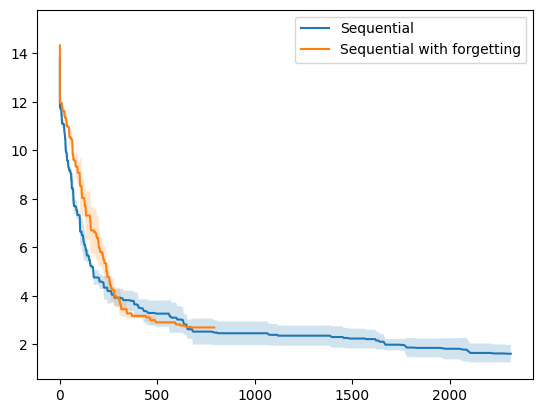

In [75]:
from matplotlib import pyplot as plt
plt.plot(time_seq, mean_seq, label="Sequential")
plt.fill_between(time_seq, mean_seq - std_seq, mean_seq + std_seq, alpha=0.2)

plt.plot(time_forget, mean_forget, label="Sequential with forgetting")
plt.fill_between(time_forget, mean_forget - std_forget, mean_forget + std_forget, alpha=0.2)

plt.legend()

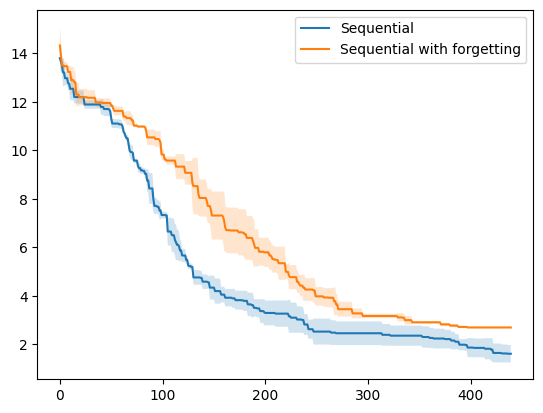

In [15]:
from matplotlib import pyplot as plt

index = np.arange(len(mean_seq))
plt.plot(index, mean_seq, label="Sequential")
plt.fill_between(index, mean_seq - std_seq, mean_seq + std_seq, alpha=0.2)

plt.plot(index, mean_forget, label="Sequential with forgetting")
plt.fill_between(index, mean_forget - std_forget, mean_forget + std_forget, alpha=0.2)

plt.legend()

In [16]:
result_forget = np.array([
[13.992148413123898, 13.835488518118785, 13.382087781039164, 13.307843048181487, 12.71102338395802, 12.71102338395802, 12.71102338395802, 12.71102338395802, 12.71102338395802, 12.71102338395802, 12.71102338395802, 12.71102338395802, 12.71102338395802, 12.71102338395802, 12.71102338395802, 12.71102338395802, 12.71102338395802, 12.71102338395802, 12.71102338395802, 12.71102338395802, 12.71102338395802, 12.71102338395802, 11.707827353163308, 11.707827353163308, 11.707827353163308, 11.707827353163308, 11.707827353163308, 11.707827353163308, 11.707827353163308, 11.707827353163308, 11.707827353163308, 11.707827353163308, 11.707827353163308, 11.707827353163308, 11.707827353163308, 11.707827353163308, 11.707827353163308, 11.707827353163308, 11.707827353163308, 11.707827353163308, 11.707827353163308, 11.707827353163308, 11.707827353163308, 11.707827353163308, 11.707827353163308, 11.707827353163308, 11.707827353163308, 11.707827353163308, 10.492515414686359, 10.492515414686359, 10.492515414686359, 10.492515414686359, 10.492515414686359, 10.492515414686359, 10.492515414686359, 10.492515414686359, 9.587067994160142, 9.587067994160142, 9.587067994160142, 9.587067994160142, 9.587067994160142, 9.587067994160142, 9.587067994160142, 9.587067994160142, 9.587067994160142, 9.587067994160142, 9.587067994160142, 9.587067994160142, 9.587067994160142, 9.587067994160142, 9.587067994160142, 9.571675995282629, 9.571675995282629, 9.571675995282629, 9.571675995282629, 9.571675995282629, 9.571675995282629, 9.571675995282629, 9.571675995282629, 9.571675995282629, 8.752676431188782, 8.752676431188782, 8.752676431188782, 8.752676431188782, 8.752676431188782, 8.752676431188782, 8.752676431188782, 8.752676431188782, 8.752676431188782, 8.752676431188782, 8.752676431188782, 8.752676431188782, 8.752676431188782, 8.752676431188782, 8.752676431188782, 8.752676431188782, 8.752676431188782, 8.752676431188782, 7.8401427244397635, 7.8401427244397635, 7.8401427244397635, 7.8401427244397635, 7.8401427244397635, 7.8401427244397635, 7.8401427244397635, 7.8401427244397635, 7.8401427244397635, 7.8401427244397635, 7.8401427244397635, 7.839350071577453, 7.839350071577453, 7.839350071577453, 7.839350071577453, 7.839350071577453, 7.839350071577453, 7.839350071577453, 7.839350071577453, 7.5791315279232006, 7.5791315279232006, 7.5791315279232006, 7.5791315279232006, 7.5791315279232006, 7.5791315279232006, 7.5791315279232006, 7.5791315279232006, 7.5791315279232006, 7.5791315279232006, 7.5791315279232006, 7.4972192205307415, 7.3369722187951165, 6.784112446923633, 6.784112446923633, 6.784112446923633, 6.784112446923633, 6.784112446923633, 6.784112446923633, 6.784112446923633, 6.784112446923633, 6.784112446923633, 6.784112446923633, 6.784112446923633, 6.784112446923633, 6.784112446923633, 6.784112446923633, 6.784112446923633, 6.784112446923633, 6.784112446923633, 6.499429628412678, 6.499429628412678, 6.499429628412678, 6.499429628412678, 5.982730070538363, 5.982730070538363, 5.982730070538363, 5.972750055408287, 5.972750055408287, 5.972750055408287, 5.972750055408287, 5.972750055408287, 5.972750055408287, 5.972750055408287, 5.972750055408287, 5.972750055408287, 5.690098996301014, 5.690098996301014, 5.690098996301014, 5.690098996301014, 5.690098996301014, 5.690098996301014, 5.690098996301014, 5.690098996301014, 5.151642522653518, 5.151642522653518, 5.151642522653518, 5.151642522653518, 5.0913878270738415, 5.0913878270738415, 5.0913878270738415, 5.0913878270738415, 5.0913878270738415, 5.0913878270738415, 5.0913878270738415, 5.0913878270738415, 4.83151516062831, 4.83151516062831, 4.83151516062831, 4.83151516062831, 4.83151516062831, 4.83151516062831, 4.83151516062831, 4.83151516062831, 4.372695896396262, 4.372695896396262, 4.372695896396262, 4.372695896396262, 4.372695896396262, 4.372695896396262, 4.372695896396262, 4.272538204816229, 4.272538204816229, 4.241850217780065, 4.241850217780065, 4.241850217780065, 4.241850217780065, 4.241850217780065, 4.241850217780065, 4.241850217780065, 4.241850217780065, 4.241850217780065, 4.241850217780065, 4.241850217780065, 4.241850217780065, 4.241850217780065, 4.241850217780065, 4.214148158242814, 4.214148158242814, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.9779147122394076, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.4800391648879168, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 3.212375949727971, 2.5586141938973346, 2.5586141938973346, 2.5586141938973346, 2.5586141938973346, 2.5586141938973346, 2.5586141938973346, 2.5586141938973346, 2.5586141938973346, 2.5586141938973346, 2.5586141938973346, 2.5586141938973346, 2.5586141938973346, 2.5586141938973346, 2.5586141938973346, 2.5586141938973346, 2.5586141938973346, 2.5586141938973346, 2.5586141938973346, 2.5586141938973346, 2.5586141938973346],
[0.683, 0.727, 0.757, 0.783, 0.811, 0.838, 0.866, 0.892, 0.919, 0.967, 0.992, 1.016, 1.041, 1.065, 1.089, 1.114, 1.14, 1.165, 1.19, 1.215, 1.24, 1.263, 1.288, 1.312, 1.338, 1.366, 1.391, 1.414, 1.439, 1.463, 1.49, 1.515, 1.54, 1.588, 1.654, 1.679, 1.738, 1.767, 1.812, 1.856, 1311.856, 2302.447, 3328.854, 3778.694, 5273.071, 6119.085, 7060.937, 9078.247, 11163.732, 11882.146, 12661.766, 13573.563, 13960.686, 15291.374, 15699.069, 16398.595, 18059.548, 19279.651, 19834.04, 21243.719, 21831.401, 22742.453, 24064.213, 25783.833, 26919.274, 28026.72, 30525.918, 32778.646, 33913.867, 35432.235, 37416.654, 38575.94, 39629.893, 41093.684, 42510.277, 43681.056, 44922.143, 46515.782, 48429.615, 50034.81, 51708.641, 53467.183, 54618.952, 56331.185, 58410.03, 59827.77, 60365.96, 62630.282, 62978.778, 63599.368, 64322.036, 64828.024, 65201.99, 65888.45, 69596.507, 73589.503, 73984.437, 75220.452, 77015.342, 77159.824, 78041.328, 79359.578, 79732.552, 81357.261, 82732.671, 84795.389, 86901.014, 88944.546, 90492.748, 93618.119, 95220.692, 95940.42, 98653.236, 100028.426, 101195.246, 103022.112, 104104.352, 106459.068, 110081.19, 112250.904, 113206.112, 115188.489, 116423.626, 118167.287, 120565.422, 121570.189, 126219.957, 128188.626, 131454.228, 134733.776, 136926.276, 138406.881, 139081.922, 140276.81, 142610.913, 145963.484, 146283.421, 150089.245, 153009.248, 155075.151, 155851.616, 158983.178, 159476.581, 162440.676, 165766.346, 167676.987, 169584.047, 173836.865, 174208.404, 179287.64, 181246.019, 185269.199, 187529.436, 188369.924, 190450.77, 192504.281, 193173.422, 195254.997, 196543.305, 197394.21, 198280.713, 203524.531, 205624.469, 209294.562, 210500.668, 213037.186, 213990.274, 216039.829, 217955.497, 221084.489, 221432.162, 223497.062, 225652.312, 227710.283, 229240.037, 230948.583, 232900.062, 234879.444, 235365.747, 235758.518, 238258.337, 241053.887, 243236.017, 245784.056, 249915.464, 251770.43, 253501.187, 256166.07, 258456.784, 259955.344, 262576.763, 265578.113, 268152.771, 270646.651, 271494.675, 275158.078, 276534.673, 277503.669, 280850.678, 282345.241, 284923.009, 285750.788, 286562.647, 287985.021, 288704.72, 289809.027, 290805.748, 291292.943, 294668.979, 295123.254, 298414.035, 300817.6, 302054.121, 303155.542, 305545.49, 306599.479, 309423.475, 311136.394, 313017.819, 314233.836, 316133.573, 317556.995, 320063.408, 321545.747, 323459.431, 324881.726, 325907.652, 327786.661, 328847.491, 329059.732, 331450.451, 333161.315, 335411.341, 336976.067, 337718.822, 339089.184, 339304.605, 340763.1, 341538.462, 343392.429, 345433.148, 348216.141, 350499.168, 352420.42, 354840.361, 357565.035, 360078.914, 362093.66, 363178.442, 366806.395, 369727.965, 370755.114, 370986.563, 374198.638, 376360.056, 377541.204, 380089.771, 383322.268, 385341.097, 388268.841, 392689.876, 393190.848, 394358.461, 394791.642, 397579.943, 400795.23, 401010.255, 403158.524, 407884.08, 410234.433, 413667.943, 415440.54, 418080.163, 421403.371, 422930.511, 423795.813, 426524.675, 429367.813, 431892.211, 432129.65, 434254.706, 437273.133, 443138.5, 445668.503, 446820.648, 447914.291, 450702.62, 455436.404, 458447.809, 459567.158, 459805.83, 461839.028, 464275.062, 465709.071, 468840.828, 470425.376, 474510.8, 477074.17, 481380.423, 481754.241, 483306.712, 486864.37, 490869.018, 493269.326, 496367.12, 497400.995, 497926.843, 498748.38, 502595.347, 504151.755, 507663.802, 509178.225, 512695.49, 515080.819, 519237.13, 520897.534, 522776.0, 524076.387, 526404.653, 528455.284, 531063.858, 534281.711, 535927.374, 538648.036, 542599.821, 545172.057, 547637.793, 552224.389, 554727.782, 557187.166, 557497.449, 559270.478, 559602.248, 562972.735, 566309.242, 569520.776, 572387.846, 572723.51, 577365.535, 584224.079, 585702.047, 587518.775, 590820.779, 593588.113, 594949.351, 595282.601, 597809.677, 600260.456, 600601.046, 602488.723, 605586.962, 607800.954, 610871.18, 612563.787, 616730.187, 621560.975, 621901.97, 623946.887, 626801.859, 629804.691, 630559.87, 631709.747, 636200.86, 641151.805, 643877.982, 645268.62, 646681.311, 647067.164, 651511.411, 654093.793, 656450.819, 657806.795, 658185.403, 662021.8, 664701.278, 666888.982, 667995.128, 668525.36, 668946.017, 672052.289, 672660.573, 679964.485, 681300.538, 683576.013, 689086.179, 693270.275, 698342.402, 701210.605, 704442.313, 709516.096, 712053.494, 714801.655, 719293.532, 721699.231, 723875.594, 725504.749, 725937.431, 726853.048, 728778.022, 733757.981, 737892.351, 739153.222, 740579.849, 745625.787, 746789.102, 749145.139, 751529.033, 752121.452, 757303.904, 761263.614, 764469.88, 767559.595, 769822.581, 774698.214, 775499.104, 779268.448, 783860.783, 784314.093, 788774.489, 793404.865, 798081.423, 800422.315, 801295.914, 804675.354, 810549.759, 810967.536, 813269.424, 813737.114, 822402.943, 837330.371, 840445.392, 845896.527, 849096.965, 875577.596, 884253.011, 890220.203, 895144.448, 899479.708, 902199.053, 905295.584],
[14.933413493004045, 14.17873316788767, 12.87860619242669, 12.87860619242669, 12.87860619242669, 12.87860619242669, 12.87860619242669, 12.87860619242669, 12.87860619242669, 12.87860619242669, 12.87860619242669, 12.87860619242669, 12.87860619242669, 12.87860619242669, 12.87860619242669, 12.87860619242669, 12.87860619242669, 12.87860619242669, 12.87860619242669, 12.87860619242669, 12.684533720975095, 12.684533720975095, 12.684533720975095, 12.684533720975095, 12.684533720975095, 12.684533720975095, 12.684533720975095, 12.684533720975095, 12.684533720975095, 12.684533720975095, 12.684533720975095, 12.684533720975095, 12.684533720975095, 12.684533720975095, 12.684533720975095, 12.684533720975095, 12.684533720975095, 12.684533720975095, 12.684533720975095, 12.684533720975095, 12.684533720975095, 12.098780711102268, 12.098780711102268, 12.098780711102268, 12.098780711102268, 12.098780711102268, 12.098780711102268, 12.098780711102268, 12.098780711102268, 12.098780711102268, 12.098780711102268, 12.098780711102268, 11.906206437313008, 11.906206437313008, 11.906206437313008, 11.906206437313008, 11.906206437313008, 11.906206437313008, 11.906206437313008, 11.906206437313008, 11.055943178850885, 11.055943178850885, 11.055943178850885, 11.055943178850885, 11.055943178850885, 11.055943178850885, 11.055943178850885, 11.055943178850885, 11.055943178850885, 11.055943178850885, 10.608126402366418, 10.608126402366418, 10.608126402366418, 10.608126402366418, 10.608126402366418, 10.608126402366418, 10.608126402366418, 10.608126402366418, 10.608126402366418, 10.608126402366418, 10.608126402366418, 10.608126402366418, 10.177142089102864, 10.177142089102864, 10.177142089102864, 10.177142089102864, 10.177142089102864, 10.116539438049767, 10.116539438049767, 10.116539438049767, 10.116539438049767, 10.116539438049767, 10.116539438049767, 10.116539438049767, 10.031612683815016, 10.031612683815016, 10.031612683815016, 10.031612683815016, 9.95359444047015, 9.95359444047015, 9.95359444047015, 9.95359444047015, 9.95359444047015, 9.95359444047015, 9.95359444047015, 9.95359444047015, 9.882290603278365, 9.882290603278365, 9.882290603278365, 8.751538120402532, 8.751538120402532, 8.751538120402532, 8.751538120402532, 8.751538120402532, 8.751538120402532, 8.751538120402532, 8.751538120402532, 8.751538120402532, 8.751538120402532, 8.751538120402532, 8.751538120402532, 8.654191849288882, 8.654191849288882, 8.654191849288882, 8.654191849288882, 8.654191849288882, 8.654191849288882, 8.654191849288882, 8.654191849288882, 8.24193735122557, 7.305275055433457, 7.305275055433457, 7.305275055433457, 7.305275055433457, 7.305275055433457, 7.305275055433457, 7.305275055433457, 7.305275055433457, 7.305275055433457, 7.305275055433457, 7.305275055433457, 7.305275055433457, 7.305275055433457, 7.305275055433457, 7.305275055433457, 7.305275055433457, 7.305275055433457, 7.235390992839708, 7.235390992839708, 7.235390992839708, 7.235390992839708, 7.235390992839708, 7.235390992839708, 6.897879878538122, 6.597830546690577, 6.422329817934148, 6.422329817934148, 6.422329817934148, 6.422329817934148, 6.422329817934148, 6.422329817934148, 6.422329817934148, 6.422329817934148, 6.422329817934148, 6.422329817934148, 6.422329817934148, 6.422329817934148, 6.422329817934148, 6.108208272761718, 6.108208272761718, 6.108208272761718, 5.731934080220913, 5.731934080220913, 5.731934080220913, 5.731934080220913, 5.731934080220913, 5.731934080220913, 5.731934080220913, 5.731934080220913, 5.731934080220913, 5.731934080220913, 5.731934080220913, 5.731934080220913, 5.731934080220913, 5.731934080220913, 5.731934080220913, 5.15430716053978, 5.15430716053978, 5.15430716053978, 5.15430716053978, 5.15430716053978, 5.15430716053978, 5.15430716053978, 5.15430716053978, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.919562333820483, 4.858328968760485, 4.858328968760485, 4.858328968760485, 4.858328968760485, 4.858328968760485, 4.858328968760485, 4.858328968760485, 4.858328968760485, 4.858328968760485, 4.080019035076891, 4.080019035076891, 4.080019035076891, 4.080019035076891, 4.080019035076891, 4.080019035076891, 4.080019035076891, 4.080019035076891, 4.080019035076891, 3.7975053917604, 3.7975053917604, 3.7975053917604, 3.7975053917604, 3.7975053917604, 3.7975053917604, 3.7975053917604, 3.7975053917604, 3.7975053917604, 3.7975053917604, 3.7975053917604, 3.7975053917604, 3.7975053917604, 3.7975053917604, 3.7975053917604, 3.7975053917604, 3.7975053917604, 3.7975053917604, 3.7975053917604, 3.7975053917604, 3.7975053917604, 3.7975053917604, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.3790914102331766, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 3.1001039002609017, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963, 2.573986100549963],
[0.325, 0.367, 0.402, 0.434, 0.465, 0.496, 0.527, 0.558, 0.589, 0.62, 0.65, 0.68, 0.71, 0.739, 0.769, 0.8, 0.83, 0.86, 0.89, 0.921, 0.951, 0.981, 1.011, 1.041, 1.071, 1.101, 1.131, 1.161, 1.19, 1.219, 1.249, 1.279, 1.309, 1.339, 1.368, 1.398, 1.427, 1.457, 1.487, 1.517, 606.938, 1544.498, 2178.22, 2633.384, 3041.36, 3195.615, 3555.164, 4119.141, 4676.956, 5049.797, 5741.585, 6817.276, 7675.921, 8341.969, 8983.108, 10173.247, 10580.286, 11347.129, 12284.739, 13325.465, 14157.328, 14320.789, 15511.451, 16237.936, 16776.655, 17299.554, 18267.501, 19376.53, 20330.758, 21462.054, 22721.827, 23375.616, 24500.09, 25141.823, 25354.247, 26611.999, 27480.128, 27706.474, 28625.929, 29949.273, 31417.33, 32460.906, 34776.462, 36336.683, 38183.335, 39367.928, 40751.213, 42321.174, 43485.07, 44217.738, 44470.707, 45395.838, 45795.788, 47425.599, 48121.904, 49762.946, 51025.601, 51865.323, 53275.346, 54834.72, 55669.494, 56689.496, 57696.967, 58769.499, 58973.437, 60835.603, 61425.119, 61593.401, 63555.921, 65153.44, 66020.806, 66733.286, 66970.171, 67822.267, 68205.986, 69541.289, 70534.676, 70742.456, 71344.414, 72181.607, 73211.302, 74482.981, 75606.396, 76932.682, 78531.211, 79783.697, 81867.507, 82141.554, 82658.187, 83899.279, 84413.781, 85001.006, 85956.863, 86874.905, 88249.892, 89499.483, 89719.668, 91205.898, 92840.134, 93248.285, 94658.209, 96183.217, 97387.124, 98162.747, 100307.072, 101868.704, 102494.132, 103337.169, 103993.018, 105056.581, 106255.408, 107667.542, 109226.68, 109789.02, 110272.627, 110739.041, 111146.596, 111526.519, 112026.51, 112761.339, 113410.949, 113625.635, 114363.246, 114664.999, 115849.06, 116483.059, 117065.762, 117896.725, 118629.477, 118937.123, 119067.893, 119590.506, 120521.199, 121021.999, 121898.713, 122829.235, 123164.684, 123613.68, 124324.86, 125243.051, 125573.569, 126772.034, 127301.626, 128559.58, 129986.977, 130411.91, 131251.776, 131676.438, 132068.909, 132569.426, 133526.135, 133979.477, 134619.486, 135571.054, 136316.886, 136559.678, 136615.289, 136956.707, 137059.293, 137244.144, 137643.381, 137801.081, 137887.062, 138074.515, 138261.584, 138560.218, 138866.656, 139298.24, 139800.406, 140136.951, 140547.692, 140684.685, 140856.127, 141570.195, 142311.422, 142789.925, 143165.629, 143241.325, 144228.335, 144710.587, 145241.834, 147226.193, 147877.572, 148789.415, 149050.272, 150432.295, 150795.191, 151165.232, 151782.964, 152864.519, 154082.179, 154998.103, 156080.536, 157256.011, 157944.451, 159176.39, 161157.185, 162275.555, 163557.039, 164212.202, 165713.079, 167582.614, 168521.609, 169782.708, 171504.568, 172680.24, 173429.293, 174570.942, 175999.757, 177612.746, 178968.159, 180364.737, 181799.231, 183481.013, 185121.089, 185287.083, 187043.071, 188695.542, 190375.906, 191828.618, 193517.948, 194854.589, 196545.947, 197982.718, 199175.794, 199919.209, 200747.688, 201056.511, 203014.332, 204978.039, 206010.043, 207012.013, 208580.872, 209954.701, 210565.383, 211651.039, 212266.11, 213314.958, 214571.369, 215524.681, 217374.653, 218813.425, 220724.853, 222263.652, 223807.228, 224552.028, 226348.499, 227065.93, 227551.604, 229545.95, 231664.043, 233169.079, 234635.264, 236183.853, 236667.597, 237774.73, 239393.343, 240152.799, 240887.7, 242164.675, 246663.591, 248636.262, 249656.283, 251965.996, 252152.959, 253028.99, 254352.35, 257325.688, 258327.819, 259536.095, 263477.65, 265791.662, 267883.527, 268983.431, 272148.095, 272326.099, 273828.834, 275631.593, 276706.62, 277796.944, 280094.559, 280915.666, 282223.409, 284649.395, 285470.278, 287756.026, 290385.708, 292178.99, 293754.319, 294305.481, 295292.178, 295896.867, 298177.384, 299726.354, 302172.856, 304420.299, 304627.919, 306161.999, 308251.052, 316568.744, 319841.11, 320103.053, 323338.208, 325592.535, 328025.464, 328243.821, 330560.149, 332722.109, 333230.652, 335888.257, 338391.128, 340565.009, 340798.916, 341336.617, 341744.05, 342596.313, 343916.123, 346501.687, 346749.14, 349752.157, 350869.239, 352497.369, 354667.593, 355000.391, 359573.109, 360107.423, 361350.987, 363822.32, 364136.697, 370149.983, 371509.081, 374068.096, 375943.451, 380080.706, 382283.356, 384832.303, 386048.385, 388037.42, 390411.311, 399253.562, 400655.183, 403140.243, 404661.637, 406443.686, 406983.385, 407279.768, 408424.757, 411170.105, 411456.056, 413924.095, 414504.967, 415777.524, 418789.597, 421244.074, 421532.379, 422021.595, 422353.603, 422723.983, 423074.23, 424437.049, 426250.572, 426628.466, 427467.794, 432304.149, 441126.3, 442662.343, 443005.931, 445579.079, 449164.057, 449490.446, 451360.181, 457285.815, 460786.785, 461103.461, 463330.898, 466373.353, 468256.403, 474653.821, 487639.119, 491089.489, 491448.256, 495744.004, 499308.436, 501988.651, 502312.524, 507163.367, 512102.958, 515438.481, 518690.875, 520492.422, 523456.047, 523911.379, 528648.883, 531004.967, 532010.105, 533491.113, 536889.721, 540840.611, 541863.293, 542188.569],
[14.406963804938703, 14.394926440534359, 13.479129682599167, 12.695073417304604, 12.695073417304604, 12.695073417304604, 12.695073417304604, 12.163597782056932, 12.163597782056932, 12.163597782056932, 12.163597782056932, 12.163597782056932, 12.163597782056932, 12.163597782056932, 12.163597782056932, 12.163597782056932, 12.094146699915878, 12.094146699915878, 12.094146699915878, 12.094146699915878, 12.094146699915878, 12.094146699915878, 12.094146699915878, 12.094146699915878, 12.094146699915878, 12.094146699915878, 12.094146699915878, 12.094146699915878, 12.094146699915878, 12.094146699915878, 12.094146699915878, 12.094146699915878, 12.094146699915878, 12.094146699915878, 12.094146699915878, 12.094146699915878, 11.687306349233118, 11.687306349233118, 11.687306349233118, 11.687306349233118, 11.687306349233118, 11.687306349233118, 10.930779819395196, 10.930779819395196, 10.930779819395196, 10.930779819395196, 10.930779819395196, 10.930779819395196, 10.930779819395196, 10.930779819395196, 10.930779819395196, 10.930779819395196, 10.930779819395196, 10.930779819395196, 10.930779819395196, 10.863803087003735, 10.863803087003735, 10.863803087003735, 10.863803087003735, 10.863803087003735, 10.863803087003735, 10.863803087003735, 10.863803087003735, 10.421759944836634, 10.421759944836634, 10.421759944836634, 10.421759944836634, 10.421759944836634, 10.421759944836634, 10.276680135218122, 10.276680135218122, 10.276680135218122, 10.276680135218122, 10.276680135218122, 10.276680135218122, 10.276680135218122, 10.276680135218122, 10.276680135218122, 10.276680135218122, 10.276680135218122, 10.276680135218122, 10.276680135218122, 10.276680135218122, 10.276680135218122, 10.0245505615894, 10.0245505615894, 9.149402835586667, 9.149402835586667, 9.149402835586667, 9.149402835586667, 9.149402835586667, 9.149402835586667, 9.04564321079016, 9.04564321079016, 9.04564321079016, 9.04564321079016, 9.04564321079016, 9.04564321079016, 9.04564321079016, 9.04564321079016, 9.04564321079016, 9.04564321079016, 9.04564321079016, 9.04564321079016, 9.04564321079016, 9.04564321079016, 9.04564321079016, 9.04564321079016, 9.04564321079016, 8.551579814851632, 8.551579814851632, 8.222418364928375, 8.222418364928375, 8.222418364928375, 8.222418364928375, 8.222418364928375, 8.222418364928375, 8.222418364928375, 8.222418364928375, 8.222418364928375, 7.722568774987467, 7.615633085144692, 7.615633085144692, 7.615633085144692, 7.615633085144692, 7.615633085144692, 7.615633085144692, 7.615633085144692, 7.615633085144692, 7.615633085144692, 7.615633085144692, 7.422428931624472, 7.422428931624472, 7.422428931624472, 7.422428931624472, 7.422428931624472, 7.422428931624472, 7.422428931624472, 7.422428931624472, 7.15679370241488, 7.15679370241488, 7.15679370241488, 7.15679370241488, 7.15679370241488, 7.15679370241488, 7.15679370241488, 7.15679370241488, 7.15679370241488, 7.15679370241488, 7.15679370241488, 6.789147611332153, 6.789147611332153, 6.789147611332153, 6.789147611332153, 6.155358298005879, 6.155358298005879, 6.155358298005879, 6.155358298005879, 6.155358298005879, 6.155358298005879, 6.155358298005879, 6.155358298005879, 6.155358298005879, 5.856508958195647, 5.856508958195647, 5.856508958195647, 5.856508958195647, 5.856508958195647, 5.856508958195647, 5.856508958195647, 5.687688542734538, 5.687688542734538, 5.687688542734538, 5.687688542734538, 5.687688542734538, 5.687688542734538, 5.687688542734538, 5.687688542734538, 4.947914337063324, 4.947914337063324, 4.947914337063324, 4.947914337063324, 4.947914337063324, 4.947914337063324, 4.947914337063324, 4.947914337063324, 4.947914337063324, 4.947914337063324, 4.947914337063324, 4.714840659867704, 4.444868030381766, 4.444868030381766, 4.444868030381766, 4.444868030381766, 4.444868030381766, 4.444868030381766, 4.444868030381766, 4.444868030381766, 4.444868030381766, 4.444868030381766, 4.444868030381766, 4.444868030381766, 4.444868030381766, 4.444868030381766, 4.444868030381766, 4.34863804510676, 4.34863804510676, 4.34863804510676, 4.34863804510676, 4.34863804510676, 4.34863804510676, 4.34863804510676, 4.34863804510676, 4.34863804510676, 4.34863804510676, 4.34863804510676, 4.34863804510676, 4.34863804510676, 4.34863804510676, 4.34863804510676, 3.833065196779764, 3.833065196779764, 3.833065196779764, 3.833065196779764, 3.833065196779764, 3.833065196779764, 3.833065196779764, 3.833065196779764, 3.833065196779764, 3.833065196779764, 3.833065196779764, 3.833065196779764, 3.833065196779764, 3.833065196779764, 3.833065196779764, 3.833065196779764, 3.833065196779764, 3.833065196779764, 3.833065196779764, 3.833065196779764, 3.833065196779764, 3.833065196779764, 3.833065196779764, 3.833065196779764, 3.833065196779764, 3.833065196779764, 3.833065196779764, 3.818272532728415, 3.818272532728415, 3.818272532728415, 3.818272532728415, 3.818272532728415, 3.818272532728415, 3.818272532728415, 3.7484718712061604, 3.7484718712061604, 3.7484718712061604, 3.7484718712061604, 3.7484718712061604, 3.7484718712061604, 3.7484718712061604, 3.7484718712061604, 3.7484718712061604, 3.7484718712061604, 3.7484718712061604, 3.7484718712061604, 3.7484718712061604, 3.6955108006330026, 3.6955108006330026, 3.6955108006330026, 3.6955108006330026, 3.6955108006330026, 3.6955108006330026, 3.6955108006330026, 3.6955108006330026, 3.6955108006330026, 3.6955108006330026, 3.6955108006330026, 3.6955108006330026, 3.6955108006330026, 3.6955108006330026, 3.6955108006330026, 3.2418208164987914, 3.2418208164987914, 3.2418208164987914, 3.2418208164987914, 3.2418208164987914, 3.2418208164987914, 3.2418208164987914, 3.2418208164987914, 3.2418208164987914, 3.2418208164987914, 3.2418208164987914, 3.2418208164987914, 3.2418208164987914, 3.2418208164987914, 3.2418208164987914, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.900927877325206, 2.49153406369911, 2.49153406369911, 2.49153406369911, 2.49153406369911, 2.49153406369911, 2.49153406369911, 2.49153406369911, 2.49153406369911, 2.49153406369911, 2.49153406369911, 2.49153406369911, 2.49153406369911, 2.49153406369911, 2.49153406369911, 2.49153406369911, 2.49153406369911, 2.49153406369911, 2.49153406369911, 2.49153406369911, 2.49153406369911, 2.49153406369911, 2.49153406369911, 2.49153406369911, 2.49153406369911, 2.49153406369911, 2.49153406369911, 2.49153406369911, 2.49153406369911, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899, 2.373898234235899],
[0.344, 0.386, 0.423, 0.456, 0.489, 0.532, 0.567, 0.6, 0.633, 0.665, 0.697, 0.73, 0.761, 0.793, 0.825, 0.857, 0.889, 0.922, 0.953, 0.985, 1.017, 1.049, 1.081, 1.113, 1.145, 1.177, 1.209, 1.241, 1.272, 1.304, 1.335, 1.367, 1.398, 1.446, 1.478, 1.511, 1.543, 1.576, 1.608, 1.641, 1016.513, 1607.556, 2209.869, 2912.681, 3783.509, 4114.797, 4748.441, 5136.943, 6413.184, 7609.276, 8890.223, 10065.106, 10879.66, 11913.236, 12288.381, 13213.131, 13524.59, 14930.521, 16269.246, 17107.226, 18610.266, 18941.736, 20498.055, 22121.67, 23499.359, 24730.898, 26306.27, 26527.363, 27885.403, 29672.841, 30388.195, 31400.034, 31810.08, 32403.024, 33911.939, 35762.279, 36884.299, 37952.365, 39083.179, 40387.77, 41442.334, 42164.502, 43337.851, 45214.117, 47672.018, 50195.8, 52646.467, 54664.434, 56430.132, 57349.584, 57806.414, 59943.016, 61025.154, 62184.847, 63133.806, 64386.464, 65912.836, 68605.544, 70358.703, 70587.295, 71704.651, 72960.478, 74738.141, 77063.215, 79215.417, 80223.325, 81660.059, 83395.957, 84615.988, 87610.363, 87925.013, 90001.266, 91828.424, 94244.328, 96173.248, 98758.763, 99606.609, 100706.799, 101432.602, 102685.182, 103315.364, 105712.602, 106965.431, 108067.852, 110278.488, 112134.606, 112438.705, 113343.253, 116300.518, 116800.046, 120034.11, 120847.186, 122004.094, 123918.259, 125846.035, 127544.768, 128041.492, 130647.232, 133136.88, 136952.324, 138460.197, 138904.539, 140106.122, 141854.075, 142937.053, 144081.23, 145408.759, 146989.017, 147716.374, 149013.001, 150586.713, 152193.301, 153847.923, 155546.893, 157636.449, 160333.901, 162175.854, 164984.832, 166000.989, 167567.613, 168618.201, 170347.176, 171626.24, 173137.847, 173568.271, 174421.209, 176296.963, 177497.362, 181487.375, 184383.899, 187615.277, 189702.858, 192122.513, 194507.043, 195646.722, 196909.834, 199429.622, 203123.253, 206165.869, 209048.034, 211107.195, 211516.362, 213151.487, 214757.423, 217003.425, 219560.98, 220356.026, 222058.482, 223726.657, 225245.526, 227293.242, 229069.281, 230690.266, 231775.664, 233481.647, 236207.932, 238705.307, 241255.7, 243261.126, 245578.415, 248031.74, 250105.14, 252445.11, 256004.956, 257810.301, 259549.686, 259914.625, 260717.682, 261772.102, 264306.827, 266531.444, 267861.254, 268951.948, 270617.536, 272454.934, 273574.3, 276615.591, 277862.345, 279267.625, 279431.37, 281656.258, 282634.474, 285016.104, 286081.011, 288430.429, 289365.336, 291346.473, 293460.274, 295180.755, 296869.818, 299521.0, 301764.708, 302203.383, 304422.118, 306919.304, 309612.652, 310630.604, 313972.811, 317317.439, 319122.939, 322073.397, 323878.546, 326358.266, 328262.291, 330857.104, 331037.342, 333254.841, 336729.436, 338560.461, 340094.271, 341177.775, 342073.126, 345568.59, 346665.152, 349117.311, 351297.758, 352359.093, 353403.401, 353610.744, 354997.154, 355889.077, 356776.177, 357942.374, 359959.323, 361983.057, 363365.425, 365967.419, 368748.326, 370183.481, 374961.354, 375827.945, 377446.72, 380630.8, 381100.641, 381943.791, 384428.202, 385361.624, 386417.52, 388612.32, 390447.426, 391672.119, 396559.401, 410617.976, 412038.881, 415086.877, 416794.597, 418179.006, 419887.913, 421310.164, 423605.121, 424887.843, 426613.103, 428817.599, 429502.543, 431678.046, 434490.034, 435679.086, 439081.648, 440949.874, 443601.014, 444820.768, 445809.745, 448397.581, 449856.187, 452812.26, 453573.224, 454536.662, 456032.159, 457711.882, 460007.303, 460770.266, 462576.786, 466083.676, 466535.499, 467063.734, 469436.81, 472114.592, 473124.904, 474249.161, 475164.359, 477922.109, 480555.331, 481802.846, 484018.736, 486240.925, 489571.492, 491688.772, 492653.762, 494488.509, 496838.7, 497129.934, 499748.67, 503226.076, 505110.723, 506297.721, 514210.9, 514685.027, 518774.149, 522844.399, 524607.203, 527458.845, 528949.561, 529282.577, 530728.288, 537076.58, 537390.587, 541968.792, 545763.78, 546153.807, 549835.395, 550149.151, 551629.016, 555182.273, 555515.318, 555864.358, 556193.179, 560875.309, 564180.61, 564514.222, 565287.931, 569374.0, 569704.013, 571824.783, 575162.101, 576018.122, 578697.338, 582788.232, 583258.655, 584519.07, 587483.518, 594676.942, 597963.538, 599605.5, 602480.197, 605107.933, 608480.724, 610852.636, 611752.936, 612506.242, 613335.975, 613912.374, 614310.694, 617142.137, 617522.806, 623261.905, 624568.452, 626998.907, 627451.543, 630620.288, 632270.4, 634206.0, 642841.404, 644547.796, 646107.67, 648847.21, 658527.445, 660709.144, 664867.813, 667689.829, 668995.729, 670260.739, 674655.894, 678176.153, 681477.896, 681920.097, 685190.555, 686860.853, 693567.734, 698529.062, 700266.976, 704620.623, 705243.183, 708785.831, 709842.819, 713082.65, 713570.409, 714046.322, 714539.759, 715312.732, 722049.033, 722878.501, 726302.293, 730019.949, 735425.546, 738298.706, 742403.687, 743781.964, 745292.946, 745732.624, 748802.827, 753898.307, 758256.117, 762182.303, 762640.809, 821602.91, 826370.467, 834679.056, 838161.098, 841593.337, 845185.829]
])

mean_forget, std_forget, time_forget = process_sequential(result_forget, 1, 0)

In [33]:
samples_forget = np.array([
[41, 42, 43, 44, 45, 46, 47, 48, 49, 41, 42, 43, 44, 45, 46, 47, 48, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 51, 52, 53, 54, 55, 56, 57, 58, 59, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 77, 78, 79, 80, 81, 82, 83, 84, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 92, 87, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 98, 99, 100, 101, 92, 93, 94, 85, 86, 87, 88, 89, 90, 91, 92, 93, 87, 88, 89, 90, 91, 92, 93, 94, 87, 88, 89, 90, 83, 84, 85, 86, 87, 88, 89, 90, 87, 88, 89, 90, 91, 92, 93, 94, 85, 86, 87, 88, 89, 90, 91, 88, 89, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 90, 91, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285],
[-14.026288116728358, -13.272978175832291, -13.74439182281303, -14.476675350771142, -13.42781224551703, -14.156951189643463, -13.574763940077966, -13.145792399150936, -12.644717463013922, -12.31935921572888, -13.352157028693652, -13.809449157172912, -13.374898665896875, -12.328356389336976, -13.747732977022906, -14.00716647964382, -12.050164643196531, -13.084155111677344, -12.184443627215593, -11.998988533736512, -13.418938660645333, -12.885660736323498, -11.44436006280052, -11.475769671286802, -12.838123795393134, -12.972455806509924, -11.312297115398813, -11.06023519331377, -11.364154347935672, -10.14829448351353, -10.658972830883835, -11.553676840704439, -11.579131524961307, -10.879241643046436, -12.402705884913681, -10.543273572513096, -12.83512464561616, -12.221106775962784, -11.000932407439102, -10.73485939610772, -10.536641163016338, -10.855951153114402, -12.212340326147578, -10.501343128235158, -10.689480317610244, -9.72430675578917, -14.60126710860873, -9.668047447708261, -13.883289649246457, -13.506364127430137, -14.224341064835633, -13.967159630792557, -11.568649078567638, -11.015255096328175, -9.769285294155765, -9.744590341409069, -12.460439730505774, -10.664940088560623, -9.213922102836316, -11.45636374921056, -12.567292131487083, -11.408682246944954, -14.472080443229615, -12.286267895106612, -10.785793470612711, -10.068497870511804, -9.221085736279173, -11.21490425090894, -9.129052285965928, -9.985612194616127, -10.952338564381431, -14.016970516450494, -10.727700477351403, -9.114775024069914, -12.200813794391072, -9.803452904713343, -12.74488899855972, -8.922820141437482, -10.519958167841043, -9.986660209206356, -13.796115099687803, -12.85918368374483, -12.69982003630618, -11.477837643858372, -12.267966430674434, -8.328847300188096, -8.916455724882251, -11.098866409046813, -8.787434676897503, -8.772866767648809, -9.426035820620703, -12.003919925702471, -13.372621864621495, -8.469305575649656, -10.347457574762286, -9.451216793013073, -14.414344582916709, -9.403071545077639, -8.939578735359285, -9.810525454770731, -14.234268323299633, -8.76918713858729, -10.451835763801684, -10.266151545091398, -8.229737194613797, -9.782421437167747, -8.35749598852577, -7.542547641546722, -11.477582007953483, -7.454541077789835, -7.917071188517482, -7.640736466332141, -7.196570263786334, -7.704051843868258, -7.639310749884986, -7.3802847411665455, -9.874089638408485, -7.567932326864881, -7.974615786209505, -9.957935585587434, -11.128485336149277, -7.326667352917433, -6.850747307946956, -6.671365498835065, -6.692322954236901, -7.934516848936232, -7.625371093444879, -7.819328424348953, -7.672121839362719, -6.92676834391174, -7.253991827488315, -6.465926496474063, -7.224852210358326, -6.631071741521687, -7.114487897457474, -6.453875557358129, -6.324027463627807, -6.508826406051829, -7.412193262316996, -8.052958998795383, -6.514095350693102, -6.959628698092367, -6.221098914020078, -6.3081141664056775, -6.405814686793701, -6.655715068372527, -5.4870804855222755, -5.484479119769644, -6.410201702105042, -7.411580989173037, -5.406784461335339, -5.25645546648594, -6.308816702776986, -6.722617566949419, -7.098205682691586, -6.929406384587943, -9.332735304003851, -6.882954278998173, -5.945592882039623, -9.096302681673023, -5.416879265462977, -5.990357135031512, -6.652517320429663, -7.365969989774385, -7.589726407145343, -7.819557089470739, -6.451030946028424, -6.970503375940784, -5.5032216161039464, -6.688751922088763, -5.278608100288874, -5.73483327674594, -7.067896174701401, -5.685963252673087, -5.806821907476373, -7.25536707668658, -4.974769169575985, -7.4437382825123555, -7.429531541083946, -6.931094294035186, -5.0083653474740615, -5.836517882311473, -6.129623825702425, -5.881242615898852, -6.6284313823719065, -5.813662834875757, -6.644357123418866, -5.222429068937722, -7.021861215231941, -7.907329929640216, -6.990417039530509, -5.1804248770352865, -6.484003495275124, -6.830466499230314, -7.282581729696854, -4.906022288673908, -14.643310318482525, -5.001480495354056, -7.91433365068373, -5.466499977557107, -7.067273853558285, -5.305623281040502, -6.720079879909366, -5.555164354157488, -5.976860215586767, -5.84846120364772, -5.887396412458234, -5.474756132120224, -5.640852802988142, -5.081556042399271, -5.176988407275781, -6.153137045027971, -9.285506919273324, -5.363980591039353, -6.229062710991853, -5.450609965022807, -5.347069751807295, -5.361784708361767, -5.526357875756812, -5.438357352754593, -5.287815142745946, -7.270927146930284, -4.249833792904499, -7.221078370346274, -4.624314397832982, -5.251241717576935, -11.692876382629839, -7.484625212375839, -5.408808166848261, -4.936000203620653, -4.440835733108626, -7.989443468675654, -5.175804943365476, -6.221321263071062, -5.288898373273675, -7.201808739093138, -6.987114674192595, -6.621850060405908, -5.0838060343148, -9.012270910002949, -4.713503516040698, -6.146530319875154, -4.3219163675621655, -5.413062185378017, -5.526825962960494, -5.703962865269837, -4.323404462909152, -5.059327899995595, -5.638371526055897, -5.802484739928444, -10.614581175120257, -4.510665989419496, -5.633680400300818, -5.212832879382184, -4.326841257680845, -5.575818914334499, -5.367829059312882, -6.384204261766761, -4.666977544359914, -6.1212759318523515, -4.801257783178118, -5.188232041398738, -4.9135640992828264, -5.355791004500396, -4.700332012944918, -5.3270794899486935, -5.516741945901036, -5.8721454790977425, -4.857848556199605, -5.020566034195841, -4.831868307946627, -4.487392085898252, -5.317578303687045, -4.8862140945777846, -5.2324489252722035, -5.2651854147669965, -5.381677659387928, -5.917108883291324, -5.240870336865492, -4.825780259827035, -4.369947968495384, -5.991846796805702, -5.693428790247772, -5.516564379689614, -4.963749358850901, -4.590265627224, -4.677245676653736, -5.095793155359779, -5.254577001801705, -5.326287532096587, -11.29995934666525, -5.4604657243369354, -15.450525018383239, -4.885710906659128, -4.263817543450831, -4.555986780741157, -4.401767646400036, -8.488914096419371, -4.758957183859612, -4.700658714594407, -7.049321169940778, -5.800367146451295, -5.516441734144342, -4.360343359472574, -5.534779500434937, -10.521525913978335, -6.42932543358869, -5.2068590480398855, -10.449765692940268, -6.123398111349678, -4.791522911866562, -5.450720114609181, -5.665796132367851, -5.18491299081392, -5.0511547185180765, -4.498162073271969, -10.28523396389142, -5.693761006895718, -5.919847901166671, -4.210189117782686, -5.238615952123534, -6.852344758772478, -5.49533474248578, -4.855617020978721, -6.2522899375006205, -4.9469826340521275, -5.395384809793532, -11.27634607958756, -4.906729933719954, -4.837442074116548, -5.299531538525065, -4.643791604829592, -6.013485420473093, -4.6950807385838536, -4.834547189419359, -5.015520180871121, -5.34770354866031, -15.19968179307057, -10.330285638071603, -5.878191156633067, -14.804114695403992, -5.179936422983491, -5.451538440540777, -4.943093650499189, -4.0687957018250405, -5.8864181147172, -5.240747295382363, -4.8216384049407806, -4.618756980185477, -4.444202105449947, -4.712772349956497, -4.839222377095167, -4.862549161079437, -4.671146274564288, -7.342953993567619, -5.2351814179400975, -8.026141590496536, -3.745587643008041, -4.490046030079917, -5.137205465578316, -4.791866194441736, -4.108562078621508, -5.088837775258148, -4.70989511617429, -5.100827550606313, -4.603756794743705, -5.8156960373788555, -9.033722885486322, -4.129402888397236, -4.695180338896042, -5.017331305000512, -4.152760924900922, -4.532090397928496, -4.896235096446503, -5.5690443743688895, -4.34702753011138, -6.0873311029614765, -6.980367275836825, -4.467523927730014, -4.63316795032605, -3.6497885754421904, -4.487394608287588, -4.997446143515411, -4.676653508085699, -4.452582798525727, -15.62266418602338, -3.927859317691455, -10.93361726135839, -4.402413010343532, -4.422172394259036, -4.839253276391733, -4.344956119195247, -5.317209851688894, -5.186293102091808, -4.437550988947867, -4.431759106740177, -4.388655621301205, -4.736003939522003, -3.8757175743476338, -3.577406352999074],
[41, 42, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 40, 41, 42, 43, 44, 45, 46, 47, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 55, 56, 57, 58, 59, 50, 51, 52, 53, 54, 55, 56, 53, 54, 55, 56, 46, 47, 48, 49, 50, 51, 52, 53, 44, 45, 46, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 42, 43, 44, 45, 46, 47, 48, 49, 45, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 44, 45, 46, 47, 48, 49, 39, 37, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 32, 33, 34, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 36, 37, 38, 39, 40, 41, 42, 43, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 61, 62, 63, 64, 65, 66, 67, 68, 69, 64, 65, 66, 67, 68, 69, 70, 71, 72, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233],
[-13.945524564306332, -13.867970263473168, -13.951235341965106, -13.059312880501217, -14.298366946611722, -14.06696866274594, -13.349606485351677, -14.067076255581723, -13.92506960225902, -14.075119701955671, -13.687752578238209, -13.743617767298565, -13.407983698989382, -13.503264657360546, -14.183951313922341, -13.221106636280938, -14.037753165462211, -14.221473087890379, -13.411539876512071, -13.667071839282052, -13.552510489696331, -15.904398708329493, -13.261970258299892, -13.105677443492842, -13.814154206201346, -13.020239444056859, -13.635398104048113, -12.912851394592689, -13.335583767309034, -12.825741629957744, -12.569322665584117, -13.052247661875288, -12.820794023367624, -13.412682575881547, -14.391833941411742, -13.004667770814178, -12.962792806460294, -14.074744662763766, -13.348151607320009, -13.134299577477009, -12.58096971520891, -13.212509531233009, -11.611162285616464, -12.130488450261627, -11.970362814272244, -13.40591118602668, -13.05892760110211, -12.889935441760297, -10.844328704835418, -12.685338942949263, -14.535761753259191, -12.553984534446254, -15.54740070968706, -12.900055124084554, -11.755559039484027, -12.758374557090375, -12.006709457561493, -13.461300722220516, -11.801398491288227, -11.95411548104457, -13.019928704165906, -10.722423006337625, -10.539174615763478, -12.860509386453968, -16.304571709386497, -11.05388172979729, -10.049019754319957, -14.162834445329198, -10.515236057736413, -10.354900605994068, -11.67139351793449, -11.22119064795693, -13.153926845059239, -12.077765266315811, -9.647691619185123, -10.154273404837012, -11.961410119984352, -12.858192268045924, -9.61794716351691, -9.563065384634768, -9.509751744739809, -9.387528538371486, -9.484676939872893, -9.479460406870574, -9.532837810291188, -9.516170328922536, -9.438218052315113, -8.96427402446399, -9.798989905992107, -9.367857408523355, -8.411273986983678, -10.02659570618245, -9.835889534897069, -9.752399204744949, -9.700931377874866, -9.67190311200961, -9.91435419196775, -9.553807339386506, -9.446660589020917, -8.535799622963157, -8.942226437585932, -9.042661476029817, -9.074861221691512, -9.342164526146094, -9.208828924664232, -9.116903826842325, -8.669723901616578, -8.382857770101145, -9.793543089384729, -9.00662875278381, -8.847343374584208, -8.78316032730868, -8.77295641158376, -7.7784238556666345, -8.255345680871319, -8.220245535120032, -8.629021454794467, -8.416644841863919, -8.268473306510167, -8.108091985220275, -8.145021065054616, -8.077629461365833, -7.709342301592747, -7.650791789765805, -7.969845913916799, -7.305281044601169, -7.650557109348654, -7.407506887053624, -7.430221502824428, -6.776826180928543, -7.812344632769088, -6.681625606235142, -7.618084670069829, -7.624879332234045, -6.886475759405809, -7.043671800559336, -7.458791053813631, -7.201372926101771, -7.405364591611445, -7.0446473699965315, -7.94654436548534, -7.009895989434775, -7.430984022147309, -6.771146627761839, -6.687765551164892, -8.300029964662846, -6.220587139951413, -7.422170844775492, -7.410625760305556, -7.327096860836051, -7.249906549888526, -7.9678767908036265, -7.222087877223132, -6.703429981199567, -6.366535126417654, -6.728287086806435, -8.617542842044445, -7.095111594229972, -8.457875655466147, -7.101957698655712, -7.347438748522284, -8.29651580588304, -8.744979627265023, -7.667252689714463, -8.218990626536254, -8.04239044340047, -8.050577476747975, -7.274873020539177, -7.383999693132446, -6.786307963394742, -6.6956749700781355, -8.510188307471974, -7.968714222498807, -6.975944140185991, -6.68851803736114, -7.708625983269423, -7.808320213378297, -12.298404484567179, -6.276172424154383, -7.415113349319673, -7.169620866539949, -6.530163982827756, -7.38457033305016, -6.149418074399135, -8.512795374226673, -6.839341377709188, -8.172413401701114, -7.142937848207711, -7.508594842341341, -7.257184173621134, -6.0013106800956875, -7.111269703908462, -7.007400205673866, -7.473886734717971, -7.623266410346581, -6.9138703009992994, -6.652571315379764, -7.024677946773262, -6.837071590221623, -7.357497490314055, -6.659523692208434, -6.110655654732981, -6.895684249859062, -7.163468128607924, -6.49577896436752, -5.6441041756322505, -6.851764595130417, -6.857883899517438, -6.648404711189427, -6.0416306950434855, -6.725127341270454, -6.719412142502169, -6.785462350811149, -6.320663802383144, -5.458293558932123, -8.848752705375917, -5.40963763611721, -6.325758438902906, -6.160624992637015, -5.578161847884105, -6.411452916457022, -5.440727663507808, -4.911260427674121, -5.259380375103553, -5.164999414909378, -4.528314099606459, -4.631442241281279, -5.4351372830239715, -5.880168298752291, -5.100320741875674, -7.028093229190091, -7.28726846478908, -5.293371772810557, -5.290073945097243, -5.439846446827805, -5.699271629084478, -7.256538259601401, -6.717667040094943, -4.637301545567332, -5.960898619998831, -5.671519967479206, -6.791510277542371, -4.767823874098481, -6.5972798035874805, -4.530295386750857, -6.825245973116194, -4.450794657032935, -5.979184899612405, -5.62478981602531, -4.398766118080606, -6.18640904390667, -6.469805128596637, -4.9972173860709015, -6.527240310863578, -5.274878336051448, -5.042716437539936, -4.220268650954324, -5.334571819560407, -5.399146728726988, -4.253229719558295, -5.047528054572643, -4.94770909974421, -5.050201413259812, -5.001700478516808, -10.816322624093912, -4.786816127724281, -5.01580684659239, -4.73910588785976, -5.1491028872582945, -5.007840670372003, -4.7415141715261955, -4.439486567842674, -4.933435345111927, -5.385788183272512, -4.351779509539505, -11.275025653772664, -5.186315283864075, -4.915808778843186, -4.784111017362657, -6.149584281103198, -3.9284743795030233, -5.363321704321424, -4.823738632553154, -4.973404163238386, -5.027750881531605, -4.3197959299348545, -4.9823519589174525, -6.136192478015966, -3.8773125475607952, -4.0392911047592115, -4.812652346212762, -4.269711788015942, -4.426015859443806, -4.751470586422153, -4.319847752494273, -4.476717651109544, -9.571434147997582, -4.4568055537312175, -4.962558700871684, -4.292621016877048, -4.468741934689803, -7.034743460209359, -4.521215787980219, -5.065417048271767, -4.424891003158475, -7.683518930573589, -3.7730045175918474, -4.989824668360841, -5.076470035133365, -5.789112314337265, -4.663090300102672, -4.687121763426643, -6.144965313978842, -5.713078195201232, -5.638291517264376, -5.125413296814548, -5.445319657244289, -5.151229049093511, -7.701011639622436, -6.336952701517126, -4.810750318784679, -4.944228117677416, -4.550338667916626, -7.48368615571089, -5.021091380039042, -4.2519442763304305, -4.919305393095468, -3.8714889045566214, -7.488115147266738, -3.7349402878301783, -5.659497125704254, -4.07975453309546, -4.335838498099196, -3.9707065129883903, -3.6319918384460568, -4.839347016091537, -4.482735646172228, -4.940792000733921, -4.76978454369742, -4.035753743859884, -4.070963337342273, -3.8685812537203, -4.301313249928733, -3.6813045462345815, -4.008169657719825, -14.315660560178344, -4.981194323895917, -4.189692803435328, -10.808791653642494, -4.36368996151579, -3.87510406742875, -4.359883542224114, -4.059283664731269, -3.947120075175276, -8.449983421878018, -6.112408618928707, -10.441981976091586, -6.291563568090195, -10.42155855578132, -5.242402944303476, -4.0036208085595115, -9.49514905207786, -4.62084885874189, -4.111704089123667, -3.968283661582808, -6.046699218102007, -6.70884046683363, -4.563524757174446, -3.7370160195260893, -5.791115303612746, -5.219990340845937, -4.888817456623888, -4.622791772780173, -7.995118132744636, -3.9375327136026534, -3.9735243278790717, -4.347635221166629, -4.9186924645196655, -3.806925630820724, -3.9668340365372283, -6.428980859233067, -4.011491842060096, -4.004531239350611, -3.9598340409172614, -10.890642689428368, -3.8938217740571233, -4.7855143765304415, -4.553907066893158, -3.7961952599315905, -4.6689332924208555, -3.7493677411060577, -15.205401788187716, -3.879498673119672, -3.8552058488632244, -3.8442628385729125, -3.807993965855514, -4.380567348396777, -4.438088708955685, -4.39068416363787, -7.3511492908393095],
[41, 42, 43, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 45, 46, 47, 48, 49, 50, 51, 52, 49, 50, 51, 52, 53, 54, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 56, 57, 53, 54, 55, 56, 57, 58, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 61, 62, 58, 59, 60, 61, 62, 63, 64, 65, 66, 57, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 62, 63, 64, 65, 66, 67, 68, 69, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 75, 76, 77, 78, 74, 75, 76, 77, 78, 79, 80, 81, 82, 78, 79, 80, 81, 82, 83, 84, 80, 81, 82, 83, 84, 85, 86, 87, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 81, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 118, 119, 120, 121, 122, 123, 124, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288],
[-13.929446942378812, -14.781409082546533, -12.788286746327422, -13.8066843197347, -13.962522358959605, -13.660990446414923, -13.502456916413136, -14.346059777959775, -13.54949041227321, -13.85303680712693, -13.62386404733744, -13.274149598088366, -12.657657646909232, -13.051148512428146, -14.624006296113464, -11.914415071131074, -11.928827681722098, -12.75608792715954, -13.038675432835976, -13.68543055046551, -12.892223328630676, -15.871704102616897, -12.656243535726563, -12.448157167947683, -13.175822829133262, -12.019880731362418, -12.227744099779018, -14.427830409265255, -11.60854833185092, -11.475361361452721, -11.483696216332444, -13.38828766708183, -11.80051950638252, -11.639657758512525, -11.408427208248046, -11.295702494084253, -12.916120278525444, -11.425810826604156, -11.396583764926367, -11.416546488328084, -12.665472167247811, -12.871784103145998, -11.352015629452668, -11.354003899609122, -11.1801427606816, -11.675273706677391, -11.100583876499535, -11.401043732124544, -11.307828582727264, -12.229631796166654, -12.389694222857637, -11.170776200513286, -10.427196553829399, -10.557936223629438, -10.952054781676088, -10.8547973215118, -10.642691825309845, -10.356977199201557, -10.484125607605838, -14.568725650334734, -9.691656739001255, -9.888567944923507, -9.832168279269805, -9.822818618933924, -10.193711197631767, -9.591295992972496, -9.725433408177855, -9.81918298416542, -9.656354929771704, -9.722559009164607, -13.611031479124518, -9.563726773864628, -9.60020859803708, -9.50289882940414, -9.864359089868284, -9.365936219980584, -12.35958110535288, -12.260379994598297, -9.294018290121228, -12.058792022639011, -8.181461421903373, -9.190905959881658, -10.229802722971225, -11.685810255604213, -9.625335516356483, -11.162508380706008, -14.300899143228483, -10.802074406863325, -9.217942261034555, -11.958950581611553, -9.138528441637577, -8.032560071803823, -8.142831962102282, -8.04620718852356, -8.15763319210741, -9.505940332393227, -13.391447724767454, -8.168886346284424, -8.040426267976006, -8.02598711475922, -8.014670319563157, -9.483262097263841, -8.244244767069928, -7.926773833766367, -7.977925794169333, -10.749685894360221, -10.5913421883548, -10.347042881498348, -11.41171303150062, -7.815116444424131, -7.797743422058681, -7.867342540046366, -10.149462512862526, -9.799907097928514, -7.653344450317599, -7.841925182919663, -7.790029882210211, -7.6974611781734605, -7.6765250713189355, -7.325717020316091, -7.67969987184578, -7.731368719566993, -7.938088825508085, -7.677890984696026, -8.720908614996782, -8.400118273161905, -7.626744014056025, -7.376849921854611, -6.932730901158333, -7.330029237688947, -7.39310595525612, -6.84929755675052, -7.09140825111683, -6.802187024993354, -8.013262039132762, -7.595221974687073, -6.965825024539664, -6.419169591700878, -6.268534593053342, -6.229656024931674, -6.518499909391566, -8.326380575462432, -7.388991831450717, -7.239225569028155, -6.978767596143216, -6.0272212445512565, -8.084564027589416, -6.729587680831108, -6.956308295976644, -5.769796969057947, -6.339596847939554, -6.65348025036406, -5.9692927730480605, -7.67696108006321, -5.691556026701893, -5.829518749762357, -5.978261887077742, -5.517404438363336, -5.70949188898989, -6.145123563826715, -5.577012856604023, -5.632448387333982, -5.204612742729785, -5.514041179528067, -6.743029225060133, -5.0997321928277515, -6.321023871608437, -7.711340455604776, -8.227241558152292, -5.923292677441461, -5.723632151439382, -7.3183494158851845, -7.462078071951661, -5.359040239704998, -5.870330677313452, -7.811219518220154, -5.560292851733077, -5.464156353590969, -7.223846445481647, -9.664853740897685, -4.881323358032529, -6.082666686211173, -5.217043567707266, -7.368426074421396, -5.493864031549797, -5.54371895303429, -5.194257343352099, -6.594032176455033, -6.734846433038438, -6.9679161488595485, -5.429166824656628, -6.458952082928406, -5.41314748151974, -4.822034126571643, -6.639457913746003, -4.560180943450946, -6.022786134575888, -5.043426411046056, -5.045498737146157, -5.855393211997928, -5.420971068452439, -5.931401358045271, -4.8276188525105574, -5.760892754215286, -5.831217270009447, -11.378159364472806, -5.421100615109959, -5.2799085217630415, -6.499997529352613, -6.752453966285959, -5.948281889658404, -6.0004304640970165, -4.668151835647222, -5.774508308924494, -4.472590942494784, -5.3384509609581325, -5.516615341789846, -6.204481204137262, -11.537400730960186, -6.614918972180783, -5.414165435170259, -4.645168821958243, -6.9471146259916425, -5.693201110361959, -5.479635514596829, -7.12102252114581, -4.590804229244015, -5.07990741151329, -5.475336438612698, -5.442678704649204, -5.165409200802307, -5.248960220249586, -4.267097361374123, -5.9806455061808945, -5.413069492688385, -6.160223612017199, -5.37186901996908, -5.558690982228708, -4.916493116056366, -5.0296729527567505, -4.578321448121399, -4.479683577747312, -5.037178970586399, -6.099100755780256, -4.502844909199124, -5.908041468626001, -5.267435839868876, -5.812633482673919, -5.785478952543659, -5.115121247358931, -5.451700044351586, -5.6301477766697134, -4.942289995647704, -5.331004878686888, -5.44263055560714, -3.9038060418607667, -5.063265292652881, -3.861523828496376, -5.3627137820365345, -3.8529448628907423, -6.064619603928212, -4.7291729890870675, -5.724880970248009, -5.508500882011783, -4.987964529561777, -4.533528637271089, -4.845569673829693, -5.442449981114788, -4.66516489308774, -5.299618993596081, -6.441015935948912, -6.215514696737276, -4.181283815614294, -6.406175157044974, -4.594464310027588, -4.778553774307765, -4.717098964249146, -5.8907313105696595, -6.195292921535346, -5.3949386236683905, -4.347117249014664, -5.3035588335786095, -5.838091938308539, -6.090454224833662, -5.849836900527793, -4.799243178528476, -4.330960709760296, -4.317022853095732, -6.139237860808582, -4.0745754337390245, -10.752646479731585, -4.923199670046286, -4.238082261734359, -4.880510588458555, -6.95580276704759, -4.9679503266158, -5.385624431310859, -4.210390985933503, -4.702905474011045, -4.837000028581996, -5.157837959647188, -5.727392117459662, -10.203649671671544, -5.792774001788964, -5.301958621438493, -10.44391592031035, -3.958492907527204, -3.845518636247481, -15.515712861356123, -4.343102117811943, -10.112348396872614, -4.580014311086656, -3.9580243185496866, -10.874484034742197, -11.163173921902931, -11.06204838260945, -3.467464334714638, -4.9360687895618405, -11.615856105916876, -5.167280501892526, -4.8040688698876925, -6.776851683715087, -4.370561062575893, -4.30499077447622, -3.6960386501344638, -4.730050572768656, -4.191302038947621, -15.845239821446166, -4.781352516660746, -5.015485382514907, -4.685587184691876, -5.033934144767855, -4.4556521899205475, -4.539353734807688, -4.021945786112226, -3.968523289318329, -3.725563628693003, -5.715674590434126, -4.3750375891031785, -8.938368549952171, -15.220430363630216, -7.297856635255112, -4.503152196390182, -7.866212750668854, -3.416890577140255, -7.194897797094064, -5.198391657811585, -15.712169392186013, -4.570350309692433, -4.670419498928564, -4.57871897426722, -4.914824111774391, -4.79733281303829, -3.6362310696974927, -4.138348508670389, -4.34382999991113, -2.9177731719540607, -5.837948203342227, -5.75758466056624, -8.562519068113211, -4.28509108518921, -3.2884786335387295, -4.6200542727735, -3.066685173939401, -15.446506675573032, -5.060500590006452, -5.800838455396447, -3.799182052162721, -4.718904335678024, -4.005870124187681, -3.5942271847991947, -5.689466288284007, -4.763064721583306, -8.019340951908777, -4.5730702968410775, -16.201107852672493, -11.004455102794509, -6.810744173737943, -6.461910493456669, -4.1782493254413104, -5.0645904482260535, -4.117999436306131, -4.532517918845587, -4.519192152929982, -5.272539513679849, -4.307881686667365, -4.63821651504218, -4.973829936743797, -9.371508727784855, -3.9207874739136, -3.96923936952009, -4.714328877584625, -4.456455568841744, -16.408630129430662, -4.28878042561112, -3.6398830221628184, -4.282535563346145, -3.920121157404041, -3.807510079255573, -3.778356075650876],
])

In [57]:
odd_index = np.arange(1, len(samples_forget), 2)
even_index = np.arange(0, len(samples_forget), 2)

samples_cnt = samples_forget[even_index]
samples_cnt_mean = np.mean(samples_cnt, axis=0)
samples_cnt_std = np.std(samples_cnt, axis=0)

samples_cnt_mean = np.concatenate((np.arange(1, 41), samples_cnt_mean))
samples_cnt_std = np.concatenate((np.zeros(40), samples_cnt_std))
# uct = samples_forget[odd_index]
# uct = np.mean(uct, axis=0)

# samples_cnt.shape, uct.shape

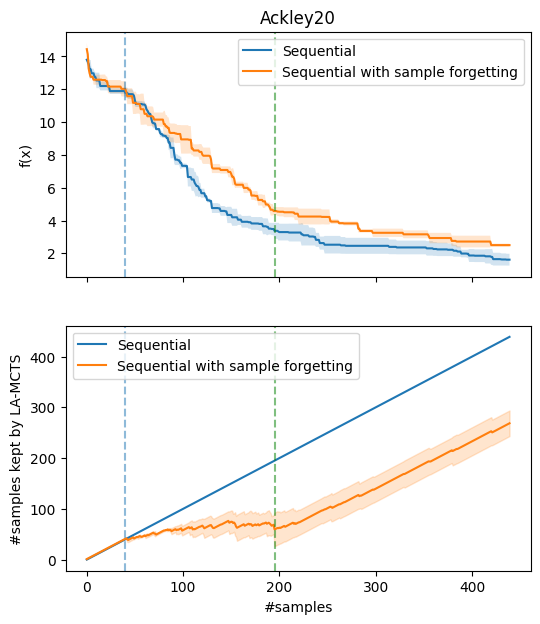

In [71]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(2, 1, sharex=True)
fig.set_figwidth(6)
fig.set_figheight(7)

index = np.arange(len(mean_seq))
axes[0].plot(index, mean_seq, label="Sequential")
axes[0].fill_between(index, mean_seq - std_seq, mean_seq + std_seq, alpha=0.2)

axes[0].plot(index, mean_forget, label="Sequential with sample forgetting")
axes[0].fill_between(index, mean_forget - std_forget, mean_forget + std_forget, alpha=0.2)
axes[0].axvline(40, linestyle="dashed", alpha=0.5)
axes[0].axvline(195, linestyle="dashed", alpha=0.5, color="green")
axes[0].legend()
axes[0].set_title("Ackley20")
axes[0].set_ylabel("f(x)")

# index = np.arange(40, len(mean_seq))
axes[1].plot(index, index, label="Sequential")
axes[1].plot()
axes[1].plot(index, samples_cnt_mean, label="Sequential with sample forgetting")
axes[1].fill_between(index, samples_cnt_mean - samples_cnt_std, samples_cnt_mean + samples_cnt_std, alpha=0.2, color=plt.gca().lines[-1].get_color())
axes[1].axvline(40, linestyle="dashed", alpha=0.5)
axes[1].axvline(195, linestyle="dashed", alpha=0.5, color="green")
axes[1].set_xlabel("#samples")
axes[1].set_ylabel("#samples kept by LA-MCTS")
axes[1].legend()

fig.savefig("forget.png")

In [ ]:
index = np.arange(40, len(mean_seq))
plt.plot(index, index, label="Sequential")
plt.plot(index, samples_cnt, label="Sequential with sample forgetting")

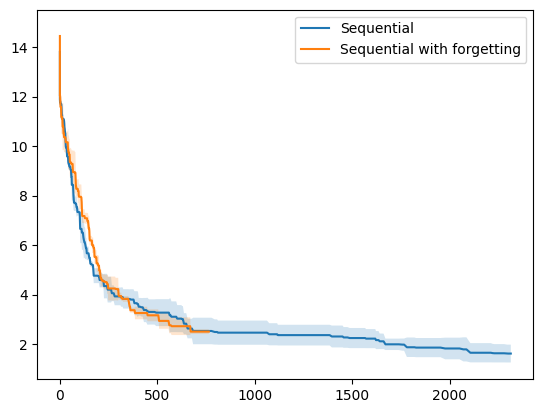

In [26]:
from matplotlib import pyplot as plt
plt.plot(time_seq, mean_seq, label="Sequential")
plt.fill_between(time_seq, mean_seq - std_seq, mean_seq + std_seq, alpha=0.2)

plt.plot(time_forget, mean_forget, label="Sequential with forgetting")
plt.fill_between(time_forget, mean_forget - std_forget, mean_forget + std_forget, alpha=0.2)

plt.legend()